# The last model in the NB is the best one

I've standardised the numeric values and  encoded the catagorical variable. I've created a new "season" column and also encoded it. I've exluded the date and commodities columns from the models. The rest of the columns are still present. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [4]:
train_df=pd.read_csv('df-train_set.csv')

In [5]:
test_df_1=pd.read_csv('df-test_set.csv')
test_df_1.head()

Index              Province Container Size_Grade  Weight_Kg  \
0      1  W.CAPE-BERGRIVER ETC     EC120         1M       12.0   
1      2  W.CAPE-BERGRIVER ETC     M4183         1X       18.3   
2      3  W.CAPE-BERGRIVER ETC     EC120         1S       12.0   
3      4  W.CAPE-BERGRIVER ETC     M4183         1M       18.3   
4      5  W.CAPE-BERGRIVER ETC     M4183         1L       18.3   

              Commodities        Date  Low_Price  High_Price  Sales_Total  \
0  APPLE GOLDEN DELICIOUS  2020-07-09      128.0       136.0       5008.0   
1  APPLE GOLDEN DELICIOUS  2020-01-20      220.0       220.0       1760.0   
2  APPLE GOLDEN DELICIOUS  2020-08-19      120.0       120.0        720.0   
3  APPLE GOLDEN DELICIOUS  2020-05-06      160.0       160.0        160.0   
4  APPLE GOLDEN DELICIOUS  2020-05-04      140.0       160.0      14140.0   

   Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  
0              38          456.0              0  
1               8          146.4              2  
2               6           72.0             45  
3               1           18.3              8  
4             100         1830.0             19

In [6]:
train_df.head()

Province Container Size_Grade  Weight_Kg             Commodities  \
0               CAPE     EC120         1L       12.0      APPLE GRANNY SMITH   
1               CAPE     M4183         1L       18.3  APPLE GOLDEN DELICIOUS   
2            GAUTENG     AT200         1L       20.0       AVOCADO PINKERTON   
3          TRANSVAAL     BJ090         1L        9.0      TOMATOES-LONG LIFE   
4  WESTERN FREESTATE     PP100         1R       10.0   POTATO SIFRA (WASHED)   

         Date  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0  2020-03-10      108.0       112.0       3236.0              29   
1  2020-09-09      150.0       170.0      51710.0             332   
2  2020-05-05       70.0        80.0       4860.0              66   
3  2020-01-20       60.0        60.0        600.0              10   
4  2020-07-14       40.0        45.0      41530.0             927   

   Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
0          348.0              0              9.30  
1         6075.6            822              8.51  
2         1320.0             50              3.68  
3           90.0              0              6.67  
4         9270.0            393              4.48

In [9]:
train_df.describe()

Weight_Kg     Low_Price    High_Price   Sales_Total  Total_Qty_Sold  \
count  64376.000000  64376.000000  64376.000000  6.437600e+04    64376.000000   
mean      12.781592     75.651938     89.607858  1.939501e+04      446.104402   
std       35.943052    159.508144    172.223177  4.442192e+04     1184.169758   
min        0.120000      1.000000      1.000000 -5.770000e+04     -595.000000   
25%        7.000000     30.000000     35.000000  1.154000e+03       20.000000   
50%       10.000000     46.000000     55.000000  5.400000e+03      107.000000   
75%       11.000000     80.000000    100.000000  1.877200e+04      390.000000   
max      500.000000   4400.000000   4400.000000  1.134701e+06    39453.000000   

       Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
count   64376.000000   64376.000000          64376.00  
mean     3336.641295     477.646328               NaN  
std      7682.295441    1453.892091               NaN  
min     -5040.000000    -512.000000              -inf  
25%       175.000000       0.000000              4.02  
50%       940.000000      76.000000              6.00  
75%      3250.000000     381.000000              8.67  
max    192230.000000   93193.000000               inf

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [13]:
train_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [42]:
apple_df = train_df.loc[train_df['Commodities'] == 'APPLE GOLDEN DELICIOUS']
apple_df.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities        Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS  2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS  2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS  2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS  2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS  2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  
1              332         6075.6            822              8.51  
7              320         3520.0              0              4.55  
24              18          162.0           1506              6.11  
40             388         7100.4            443              4.51  
69               1          400.0              2              4.50

In [57]:
apple_df["Date"] = apple_df["Date"].apply(pd.to_datetime)

In [50]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
dtypes: datetime64[ns](2), f

In [58]:
def to_season(m):
    if 9<= m<= 11:
        return "spring"
    if 1<= m<= 2:
        return "summer"
    if m == 12:
        return "summer"
    if 3<= m<= 5:
        return "autumn"
    if 6<= m<= 8:
        return "winter"


In [59]:
apple_df["Season"] = apple_df["Date"].dt.month.map(to_season)

In [57]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Date1             1952 non-null   datetime64[ns]
 14  season            1952 

In [59]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1952 non-null   object        
 1   Container         1952 non-null   object        
 2   Size_Grade        1952 non-null   object        
 3   Weight_Kg         1952 non-null   float64       
 4   Commodities       1952 non-null   object        
 5   Date              1952 non-null   datetime64[ns]
 6   Low_Price         1952 non-null   float64       
 7   High_Price        1952 non-null   float64       
 8   Sales_Total       1952 non-null   float64       
 9   Total_Qty_Sold    1952 non-null   int64         
 10  Total_Kg_Sold     1952 non-null   float64       
 11  Stock_On_Hand     1952 non-null   int64         
 12  avg_price_per_kg  1952 non-null   float64       
 13  Season            1952 non-null   object        
dtypes: datetime64[ns](1), f

In [60]:
apple_copy = apple_df.copy()

In [11]:
apple_copy.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities       Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS 2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS 2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS 2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS 2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS 2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Season  
1              332         6075.6            822              8.51  spring  
7              320         3520.0              0              4.55  autumn  
24              18          162.0           1506              6.11  autumn  
40             388         7100.4            443              4.51  autumn  
69               1          400.0              2              4.50  spring

In [18]:
apple_df.isna().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
Season              0
dtype: int64

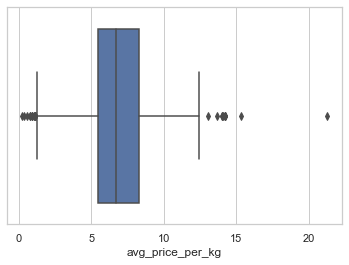

In [19]:
import seaborn as sns

sns.set_theme(style="whitegrid")



ax = sns.boxplot(x='avg_price_per_kg', data=apple_copy)

In [15]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [16]:
ohe.fit_transform(apple_copy[['Province','Container','Size_Grade','Date','Season']])

<1952x179 sparse matrix of type '<class 'numpy.float64'>'
	with 9760 stored elements in Compressed Sparse Row format>

In [17]:
ohe.categories_

[array(['CAPE', 'EASTERN CAPE', 'NATAL', 'ORANGE FREE STATE', 'TRANSVAAL',
        'W.CAPE-BERGRIVER ETC', 'WEST COAST'], dtype=object),
 array(['AC030', 'DT063', 'EC120', 'EF120', 'EG140', 'IA400', 'JE090',
        'JG110', 'M4183', 'M6125', 'M9125'], dtype=object),
 array(['1L', '1M', '1S', '1U', '1X', '2L', '2M', '2S', '2U', '2X'],
       dtype=object),
 array(['2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
        '2019-12-14T00:00:00.000000000', '2019-12-23T00:00:00.000000000',
        '2019-12-30T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
        '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
        '2020-01-06T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
        '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
        '2020-01-11T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
        '2020-01-14T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
        '2020-01-20T00:00:00.000000000', '2020-01

In [61]:
apple_copy_x= apple_copy.drop('avg_price_per_kg', axis=1)

In [62]:
apple_copy.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities       Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS 2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS 2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS 2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS 2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS 2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Season  
1              332         6075.6            822              8.51  spring  
7              320         3520.0              0              4.55  autumn  
24              18          162.0           1506              6.11  autumn  
40             388         7100.4            443              4.51  autumn  
69               1          400.0              2              4.50  spring

In [24]:
pip install lazypredict --user

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pyforest 


Note: you may need to restart the kernel to use updated packages.


In [102]:
pip install lazypredict

In [20]:
# Importing important libraries
import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix# Scikit-learn packages
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error# Hide warnings
import warnings
warnings.filterwarnings('ignore')# Setting up max columns displayed to 100
pd.options.display.max_columns = 100

In [13]:
apple_copy_x.head()

Province Container Size_Grade  Weight_Kg  \
1                   CAPE     M4183         1L       18.3   
7                   CAPE     JG110         2M       11.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0   
40                  CAPE     M4183         1S       18.3   
69          EASTERN CAPE     IA400         1S      400.0   

               Commodities       Date  Low_Price  High_Price  Sales_Total  \
1   APPLE GOLDEN DELICIOUS 2020-09-09      150.0       170.0      51710.0   
7   APPLE GOLDEN DELICIOUS 2020-04-14       50.0        50.0      16000.0   
24  APPLE GOLDEN DELICIOUS 2020-04-16       55.0        55.0        990.0   
40  APPLE GOLDEN DELICIOUS 2020-05-04       80.0       120.0      32020.0   
69  APPLE GOLDEN DELICIOUS 2020-09-28     1800.0      1800.0       1800.0   

    Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  Season  
1              332         6075.6            822  spring  
7              320         3520.0              0  autumn  
24              18          162.0           1506  autumn  
40             388         7100.4            443  autumn  
69               1          400.0              2  spring

In [14]:
from sklearn.model_selection import train_test_split

In [21]:
# Creating train test split
X = apple_copy.drop(columns=['avg_price_per_kg'])
y = apple_copy['avg_price_per_kg']# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3,test_size=0.25)

<IPython.core.display.Javascript object>

In [30]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:23<00:00,  1.80it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.90       0.90  0.72        1.46
XGBRegressor                                 0.90       0.90  0.72        1.49
HistGradientBoostingRegressor                0.90       0.90  0.72        4.25
LGBMRegressor                                0.90       0.90  0.73        0.65
RandomForestRegressor                        0.89       0.89  0.76        1.68
GradientBoostingRegressor                    0.88       0.89  0.78        0.71
BaggingRegressor                             0.88       0.88  0.79        0.34
ExtraTreeRegressor                           0.86       0.86  0.86        0.11
MLPRegressor                                 0.85       0.86  0.88        4.97
DecisionTreeRegressor                        0.83       0.83  0.94        0.13
SVR                                          0.79   

In [37]:
X_train

Province Container Size_Grade  Weight_Kg  \
50194                 NATAL     AC030         2S       3.00   
50103          EASTERN CAPE     EC120         1S      12.00   
31229                  CAPE     JE090         2U       9.00   
51283                  CAPE     M4183         1S      18.30   
8648                   CAPE     EC120         1S      12.00   
...                     ...       ...        ...        ...   
40477                  CAPE     JE090         2M       9.00   
58127  W.CAPE-BERGRIVER ETC     M4183         1M      18.30   
48684  W.CAPE-BERGRIVER ETC     EC120         1M      12.00   
58619          EASTERN CAPE     JE090         2M       9.00   
63497                  CAPE     JE090         2U       9.00   

                  Commodities       Date  Low_Price  High_Price  Sales_Total  \
50194  APPLE GOLDEN DELICIOUS 2020-04-09      10.00       10.00        20.00   
50103  APPLE GOLDEN DELICIOUS 2020-03-20      36.00       36.00      3240.00   
31229  APPLE GOLDEN DELICIOUS 2020-04-07      40.00       50.00       330.00   
51283  APPLE GOLDEN DELICIOUS 2020-04-23     100.00      100.00      2100.00   
8648   APPLE GOLDEN DELICIOUS 2020-06-22      60.00      112.00     23778.00   
...                       ...        ...        ...         ...          ...   
40477  APPLE GOLDEN DELICIOUS 2020-04-01      40.00       55.00     12300.00   
58127  APPLE GOLDEN DELICIOUS 2020-01-16     144.00      144.00     18432.00   
48684  APPLE GOLDEN DELICIOUS 2020-06-22     120.00      120.00      7680.00   
58619  APPLE GOLDEN DELICIOUS 2020-01-24      65.00       80.00     11490.00   
63497  APPLE GOLDEN DELICIOUS 2020-05-13      45.00       45.00      8100.00   

       Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  Season  
50194               2           6.00              8  autumn  
50103              90        1080.00              0  autumn  
31229               8          72.00             54  autumn  
51283              21         384.30            195  autumn  
8648              288        3456.00           1623  winter  
...               ...            ...            ...     ...  
40477             303        2727.00            466  autumn  
58127             128        2342.40              0  summer  
48684              64         768.00              0  winter  
58619             170        1530.00            190  summer  
63497             180        1620.00              0  autumn  

[1464 rows x 13 columns]

In [26]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting# Now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [63]:
# Evaluation Functions
def rmse(model, y_test, y_pred, X_train, y_train):
 r_squared = model.score(X_test, y_test)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 print('R-squared: ' + str(r_squared))
 print('Mean Squared Error: '+ str(rmse))# Create model line scatter plot

def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Price vs Residuals for '+ model_name))
    plt.xlabel('Price',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [64]:
#important
df = apple_df.copy()
df.drop(['Commodities','Date'], axis = 1, inplace = True)
df.head()

Province Container Size_Grade  Weight_Kg  Low_Price  \
1                   CAPE     M4183         1L       18.3      150.0   
7                   CAPE     JG110         2M       11.0       50.0   
24  W.CAPE-BERGRIVER ETC     JE090         2S        9.0       55.0   
40                  CAPE     M4183         1S       18.3       80.0   
69          EASTERN CAPE     IA400         1S      400.0     1800.0   

    High_Price  Sales_Total  Total_Qty_Sold  Total_Kg_Sold  Stock_On_Hand  \
1        170.0      51710.0             332         6075.6            822   
7         50.0      16000.0             320         3520.0              0   
24        55.0        990.0              18          162.0           1506   
40       120.0      32020.0             388         7100.4            443   
69      1800.0       1800.0               1          400.0              2   

    avg_price_per_kg  Season  
1               8.51  spring  
7               4.55  autumn  
24              6.11  autumn  
40              4.51  autumn  
69              4.50  spring

In [65]:
nums = pd.get_dummies(df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)
nums.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
1        18.3      150.0       170.0      51710.0             332   
7        11.0       50.0        50.0      16000.0             320   
24        9.0       55.0        55.0        990.0              18   
40       18.3       80.0       120.0      32020.0             388   
69      400.0     1800.0      1800.0       1800.0               1   

    Total_Kg_Sold  Stock_On_Hand  avg_price_per_kg  Province_EASTERN CAPE  \
1          6075.6            822              8.51                      0   
7          3520.0              0              4.55                      0   
24          162.0           1506              6.11                      0   
40         7100.4            443              4.51                      0   
69          400.0              2              4.50                      1   

    Province_NATAL  ...  Size_Grade_1U  Size_Grade_1X  Size_Grade_2L  \
1                0  ...              0              0              0   
7                0  ...              0              0              0   
24               0  ...              0              0              0   
40               0  ...              0              0              0   
69               0  ...              0              0              0   

    Size_Grade_2M  Size_Grade_2S  Size_Grade_2U  Size_Grade_2X  Season_spring  \
1               0              0              0              0              1   
7               1              0              0              0              0   
24              0              1              0              0              0   
40              0              0              0              0              0   
69              0              0              0              0              1   

    Season_summer  Season_winter  
1               0              0  
7               0              0  
24              0              0  
40              0              0  
69              0              0  

[5 rows x 36 columns]

In [66]:
x = nums.drop(['avg_price_per_kg'],axis =1)
y = nums['avg_price_per_kg']

In [50]:
# extra_tree = ExtraTreesRegressor()
# et = extra_tree.fit(x,y)
# et

ExtraTreesRegressor()

In [67]:
test_df = test_df_1.copy()

In [70]:
#same thing on test to prepare for modelling
test_df["Date"] = test_df["Date"].apply(pd.to_datetime)
test_df["Season"] = test_df["Date"].dt.month.map(to_season)

test_df.drop(['Commodities','Date','Index'], axis = 1, inplace = True)

test_nums = pd.get_dummies(test_df, columns=['Province','Container','Size_Grade','Season'], drop_first = True)

# test_nums.head()

KeyError: 'Date'

In [71]:
test_nums.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0       12.0      128.0       136.0       5008.0              38   
1       18.3      220.0       220.0       1760.0               8   
2       12.0      120.0       120.0        720.0               6   
3       18.3      160.0       160.0        160.0               1   
4       18.3      140.0       160.0      14140.0             100   

   Total_Kg_Sold  Stock_On_Hand  Province_EASTERN CAPE  Province_NATAL  \
0          456.0              0                      0               0   
1          146.4              2                      0               0   
2           72.0             45                      0               0   
3           18.3              8                      0               0   
4         1830.0             19                      0               0   

   Province_ORANGE FREE STATE  ...  Size_Grade_1U  Size_Grade_1X  \
0                           0  ...              0              0   
1                           0  ...              0              1   
2                           0  ...              0              0   
3                           0  ...              0              0   
4                           0  ...              0              0   

   Size_Grade_2L  Size_Grade_2M  Size_Grade_2S  Size_Grade_2U  Size_Grade_2X  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Season_spring  Season_summer  Season_winter  
0              0              0              1  
1              0              1              0  
2              0              0              1  
3              0              0              0  
4              0              0              0  

[5 rows x 35 columns]

In [70]:
# # Use the model to make predictions
# predicted_prices = et.predict(test_nums)
# # We will look at the predicted prices to ensure we have something sensible.
# print(predicted_prices)

[10.769  11.9815 10.      8.74    8.0592  4.65    3.64    7.6328  9.1077
  9.2882  5.4536  5.7424  8.7904  4.4459  4.5482  6.11    8.0357  4.5729
 10.8464  6.2196  5.6253  4.7576  5.8653  7.78    5.56    6.8746  7.7205
  7.9703  7.6049  7.1398  7.9289  5.57   10.1221  7.65    4.87    9.847
 10.9443 11.459   6.3617  6.7695  8.1248  8.635   4.92    6.1785  5.56
  5.3184  5.      5.5671  6.11    4.9705  1.6227  6.2464  5.8602 14.1979
  8.6798  6.1986 12.3167  9.2348  7.6341  5.9211  7.7631 11.3262  6.1973
  9.2162  6.3374  6.2159  6.9752  5.2822  5.5841  7.0951  5.4191  4.6162
  2.9     8.      6.8184  4.9979  6.1128  9.2775 10.9403  6.2331  5.8838
  5.      5.9     5.56    1.11    5.9655  7.143  11.3895  4.8304  7.311
  9.3955  9.5506  7.1922  6.0899  6.      6.6843  8.624   8.6735  6.91
  5.56   11.285   6.4802  6.      7.65    6.9521  8.7177  7.6413  2.73
 10.      5.      4.6308  7.82    6.11    4.24    7.2953 10.      5.4409
  9.5424  4.44    6.6208  5.95    4.1751  9.97    4.502   8

In [71]:
# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('extra_tree_regressor.csv', index=False) #0.58 on leaderboard

In [72]:
my_submission.head()

Index  avg_price_per_kg
0      1             10.77
1      2             11.98
2      3             10.00
3      4              8.74
4      5              8.06

In [73]:
#random forest
# rf = RandomForestRegressor()
# rf_mod = rf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = rf_mod.predict(test_nums)

# my_submission_2 = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission_2.to_csv('random_forest.csv', index=False)#0.482 on leaderboard

<IPython.core.display.Javascript object>

In [14]:
def model_submitter(name_of_model):
    model = name_of_model
    mod = model.fit(x,y)

    # Use the model to make predictions
    predicted_prices = mod.predict(test_nums)

    my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
    # you could use any filename. We choose submission here
    return my_submission.to_csv('{}.csv'.format(name_of_model), index=False)

In [84]:
# pip install catboost

^C
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.linear_model       import LinearRegression, Lasso, Ridge
from sklearn.tree               import DecisionTreeRegressor
from sklearn.ensemble           import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost.sklearn            import XGBRegressor
from lightgbm                   import LGBMRegressor
# from catboost                   import CatBoostRegressor

In [24]:
# models_to_test = [Lasso(), Ridge(), GradientBoostingRegressor(),BaggingRegressor(), AdaBoostRegressor()]
#model_submitter(Lasso())#1.67
# model_submitter(GradientBoostingRegressor())#0.55
# model_submitter(BaggingRegressor())#0.52
# model_submitter(AdaBoostRegressor())#1.20
# model_submitter(LGBMRegressor()) #0.53

In [81]:
model_submitter(LinearRegression())#1.67

In [26]:
#hyperparam opt for random forest, random hyperparameters
n_estimators = [10,50]
max_depth = [5, 10]
min_samples_split = [10, 15]
min_samples_leaf = [ 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor(random_state = 1)
gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)

bestF = gridF.fit(x, y)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 13.3min finished


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 12.9min finished


FileNotFoundError: [Errno 2] No such file or directory: "GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,\n             param_grid={'max_depth': [5, 10, 15, 20],\n                         'min_samples_leaf': [1, 2, 5, 10],\n                         'min_samples_split': [5, 10, 15, 100],\n                         'n_estimators': [100, 300, 500, 800]},\n             verbose=1).csv"

In [33]:
# brf = RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=300,random_state=1)
# mod = brf.fit(x,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(test_nums)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('best_random_forest.csv', index=False)#0.50

In [ ]:
#standardising 
from sklearnarn

In [26]:
from sklearn.svm import SVR

In [27]:
# Instantiate support vector regression model
sv_reg = SVR(kernel='rbf', gamma='auto')

In [28]:
sv_reg.fit(x,y)

SVR(gamma='auto')

In [33]:
y_pred = sv_reg.predict(test_nums)


In [34]:
my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': y_pred})
    # you could use any filename. We choose submission here
my_submission.to_csv('SVR.csv', index=False) #SVM 1.99 on kaggle


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# #x_scaler = StandardScaler()
# y_scaler = StandardScaler()

# # Normalise X and y
# x_scaled = x_scaler.fit_transform(x[:,np.newaxis]) 
# y_scaled = y_scaler.fit_transform(y[:,np.newaxis]) 

In [79]:
# create scaler object
scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
x_scaled = scaler.fit_transform(x)

# convert the scaled predictor values into a dataframe
#x_standardise = pd.DataFrame(x_scaled,columns=x.columns)

#x_standardise.head()

In [80]:
test_nums_scaled = scaler.transform(test_nums)

In [81]:
test_nums_scaled

array([[-0.28566712, -0.12399625, -0.18376005, ..., -0.30687197,
        -0.46904158,  1.16633553],
       [-0.22243292,  0.12235014,  0.0100406 , ..., -0.30687197,
         2.13200716, -0.85738621],
       [-0.28566712, -0.14541768, -0.22067446, ..., -0.30687197,
        -0.46904158,  1.16633553],
       ...,
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.30687197,
        -0.46904158,  1.16633553],
       [-0.22243292, -0.14541768, -0.15145994, ..., -0.30687197,
         2.13200716, -0.85738621],
       [-0.22243292, -0.14541768, -0.12838843, ..., -0.30687197,
        -0.46904158, -0.85738621]])

In [82]:
brf = RandomForestRegressor()
mod = brf.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_random_forest1.csv', index=False)#0.488

<IPython.core.display.Javascript object>

In [43]:
x_scaled

array([[-0.22243292, -0.06508733, -0.10531693, ...,  3.25868802,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.33285514, -0.38217499, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.31577864, -0.31946675, -0.37063924, ..., -0.30687197,
        -0.46904158, -0.85738621],
       ...,
       [-0.31577864, -0.33285514, -0.35910349, ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.29570429, -0.38640871, -0.4052465 , ..., -0.30687197,
        -0.46904158, -0.85738621],
       [-0.28566712, -0.23110338, -0.25758886, ..., -0.30687197,
        -0.46904158, -0.85738621]])

In [46]:
less = Lasso()
mod = less.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_lasso.csv', index=False)#2.14

In [47]:
etr = ExtraTreesRegressor()

mod = etr.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_etr.csv', index=False)#0.59

In [48]:
xgb = XGBRegressor() 
mod = xgb.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_egb.csv', index=False)#0.458 

In [49]:
x_standardise_df = pd.DataFrame(x_scaled,columns=x.columns)


In [51]:
x_standardise_df.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0      -0.22      -0.07       -0.11         0.81            0.51   
1      -0.30      -0.33       -0.38        -0.10            0.47   
2      -0.32      -0.32       -0.37        -0.49           -0.51   
3      -0.22      -0.25       -0.22         0.31            0.69   
4       3.61       4.35        3.66        -0.47           -0.56   

   Total_Kg_Sold  Stock_On_Hand  Province_EASTERN CAPE  Province_NATAL  \
0           0.51           0.57                  -0.34           -0.25   
1           0.09          -0.56                  -0.34           -0.25   
2          -0.46           1.52                  -0.34           -0.25   
3           0.68           0.05                  -0.34           -0.25   
4          -0.42          -0.56                   2.91           -0.25   

   Province_ORANGE FREE STATE  Province_TRANSVAAL  \
0                       -0.07               -0.09   
1                       -0.07               -0.09   
2                       -0.07               -0.09   
3                       -0.07               -0.09   
4                       -0.07               -0.09   

   Province_W.CAPE-BERGRIVER ETC  Province_WEST COAST  Container_DT063  \
0                          -0.54                -0.26            -0.06   
1                          -0.54                -0.26            -0.06   
2                           1.85                -0.26            -0.06   
3                          -0.54                -0.26            -0.06   
4                          -0.54                -0.26            -0.06   

   Container_EC120  Container_EF120  Container_EG140  Container_IA400  \
0            -0.55            -0.20            -0.04            -0.28   
1            -0.55            -0.20            -0.04            -0.28   
2            -0.55            -0.20            -0.04            -0.28   
3            -0.55            -0.20            -0.04            -0.28   
4            -0.55            -0.20            -0.04             3.61   

   Container_JE090  Container_JG110  Container_M4183  Container_M6125  \
0            -0.64            -0.21             1.52            -0.07   
1            -0.64             4.69            -0.66            -0.07   
2             1.57            -0.21            -0.66            -0.07   
3            -0.64            -0.21             1.52            -0.07   
4            -0.64            -0.21            -0.66            -0.07   

   Container_M9125  Size_Grade_1M  Size_Grade_1S  Size_Grade_1U  \
0            -0.04          -0.44          -0.61          -0.03   
1            -0.04          -0.44          -0.61          -0.03   
2            -0.04          -0.44          -0.61          -0.03   
3            -0.04          -0.44           1.63          -0.03   
4            -0.04          -0.44           1.63          -0.03   

   Size_Grade_1X  Size_Grade_2L  Size_Grade_2M  Size_Grade_2S  Size_Grade_2U  \
0          -0.31          -0.26          -0.37          -0.43          -0.09   
1          -0.31          -0.26           2.72          -0.43          -0.09   
2          -0.31          -0.26          -0.37           2.31          -0.09   
3          -0.31          -0.26          -0.37          -0.43          -0.09   
4          -0.31          -0.26          -0.37          -0.43          -0.09   

   Size_Grade_2X  Season_spring  Season_summer  Season_winter  
0          -0.12           3.26          -0.47          -0.86  
1          -0.12          -0.31          -0.47          -0.86  
2          -0.12          -0.31          -0.47          -0.86  
3          -0.12          -0.31          -0.47          -0.86  
4          -0.12           3.26          -0.47          -0.86

In [52]:
test_nums_scaled_df = pd.DataFrame(test_nums_scaled,columns=x.columns)

In [53]:
test_nums_scaled_df.head()

Weight_Kg  Low_Price  High_Price  Sales_Total  Total_Qty_Sold  \
0      -0.29      -0.12       -0.18        -0.39           -0.44   
1      -0.22       0.12        0.01        -0.47           -0.54   
2      -0.29      -0.15       -0.22        -0.50           -0.55   
3      -0.22      -0.04       -0.13        -0.51           -0.56   
4      -0.22      -0.09       -0.13        -0.15           -0.24   

   Total_Kg_Sold  Stock_On_Hand  Province_EASTERN CAPE  Province_NATAL  \
0          -0.41          -0.56                  -0.34           -0.25   
1          -0.46          -0.56                  -0.34           -0.25   
2          -0.47          -0.50                  -0.34           -0.25   
3          -0.48          -0.55                  -0.34           -0.25   
4          -0.19          -0.54                  -0.34           -0.25   

   Province_ORANGE FREE STATE  Province_TRANSVAAL  \
0                       -0.07               -0.09   
1                       -0.07               -0.09   
2                       -0.07               -0.09   
3                       -0.07               -0.09   
4                       -0.07               -0.09   

   Province_W.CAPE-BERGRIVER ETC  Province_WEST COAST  Container_DT063  \
0                           1.85                -0.26            -0.06   
1                           1.85                -0.26            -0.06   
2                           1.85                -0.26            -0.06   
3                           1.85                -0.26            -0.06   
4                           1.85                -0.26            -0.06   

   Container_EC120  Container_EF120  Container_EG140  Container_IA400  \
0             1.83            -0.20            -0.04            -0.28   
1            -0.55            -0.20            -0.04            -0.28   
2             1.83            -0.20            -0.04            -0.28   
3            -0.55            -0.20            -0.04            -0.28   
4            -0.55            -0.20            -0.04            -0.28   

   Container_JE090  Container_JG110  Container_M4183  Container_M6125  \
0            -0.64            -0.21            -0.66            -0.07   
1            -0.64            -0.21             1.52            -0.07   
2            -0.64            -0.21            -0.66            -0.07   
3            -0.64            -0.21             1.52            -0.07   
4            -0.64            -0.21             1.52            -0.07   

   Container_M9125  Size_Grade_1M  Size_Grade_1S  Size_Grade_1U  \
0            -0.04           2.26          -0.61          -0.03   
1            -0.04          -0.44          -0.61          -0.03   
2            -0.04          -0.44           1.63          -0.03   
3            -0.04           2.26          -0.61          -0.03   
4            -0.04          -0.44          -0.61          -0.03   

   Size_Grade_1X  Size_Grade_2L  Size_Grade_2M  Size_Grade_2S  Size_Grade_2U  \
0          -0.31          -0.26          -0.37          -0.43          -0.09   
1           3.23          -0.26          -0.37          -0.43          -0.09   
2          -0.31          -0.26          -0.37          -0.43          -0.09   
3          -0.31          -0.26          -0.37          -0.43          -0.09   
4          -0.31          -0.26          -0.37          -0.43          -0.09   

   Size_Grade_2X  Season_spring  Season_summer  Season_winter  
0          -0.12          -0.31          -0.47           1.17  
1          -0.12          -0.31           2.13          -0.86  
2          -0.12          -0.31          -0.47           1.17  
3          -0.12          -0.31          -0.47          -0.86  
4          -0.12          -0.31          -0.47          -0.86

In [55]:
# averaging two predictions best 
#merging the two dfs to get average combination   
sub2 = pd.read_csv('scaled_egb.csv')
sub3 = pd.read_csv('random_forest.csv')
merged = pd.merge(sub2, sub3, on='Index')
merged.head()
# Will give two columns of preds
merged['avg_price_per_kg'] = (merged['avg_price_per_kg_x'] + merged['avg_price_per_kg_y'])/2
merged[['Index', 'avg_price_per_kg']].to_csv('first_merge.csv', index=False)#0.452

In [64]:
# #merging the two dfs to get average combination   
# sub3 = pd.read_csv('first_merge.csv')
# sub4 = pd.read_csv('scaled_random_forest1.csv')
# merged1 = pd.merge(sub3,sub4, on='Index')
# # Will give two columns of preds
# merged1['avg_price_per_kg'] = (merged1['avg_price_per_kg_x'] + merged1['avg_price_per_kg_y'])/2
# merged1[['Index', 'avg_price_per_kg']].to_csv('second_merge.csv', index=False)#0.46

In [65]:
# #test on dropping columns 
# xs = x_standardise_df.copy()
# ts = test_nums_scaled_df.copy()

# xs.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)
# ts.drop(['High_Price', 'Low_Price'], axis = 1, inplace = True)

In [67]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('High_and_low_price_dropped.csv', index=False)#0.81

In [68]:
# #test on dropping columns 
# xs1 = x_standardise_df[['Total_Qty_Sold', 'Stock_On_Hand']]
# ts1 = test_nums_scaled_df[['Total_Qty_Sold', 'Stock_On_Hand']]

In [69]:
# xgb = XGBRegressor() 
# mod = xgb.fit(xs1,y)

# # Use the model to make predictions
# predicted_prices = mod.predict(ts1)

# my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# # you could use any filename. We choose submission here
# my_submission.to_csv('2_cols_only.csv', index=False) #2.171

<AxesSubplot:>

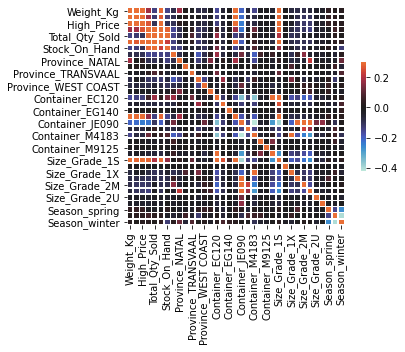

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = x_standardise_df.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [73]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Collecting catboost



In [30]:
from catboost import CatBoostRegressor

In [75]:
cat = CatBoostRegressor()

mod = cat.fit(x_scaled,y)

# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('scaled_cat.csv', index=False)#0.59

Learning rate set to 0.043965
0:	learn: 2.1857387	total: 279ms	remaining: 4m 38s
1:	learn: 2.1232062	total: 290ms	remaining: 2m 24s
2:	learn: 2.0669341	total: 307ms	remaining: 1m 41s
3:	learn: 2.0140668	total: 317ms	remaining: 1m 19s
4:	learn: 1.9612246	total: 324ms	remaining: 1m 4s
5:	learn: 1.9065964	total: 330ms	remaining: 54.7s
6:	learn: 1.8611128	total: 336ms	remaining: 47.7s
7:	learn: 1.8177571	total: 342ms	remaining: 42.4s
8:	learn: 1.7725070	total: 347ms	remaining: 38.2s
9:	learn: 1.7319441	total: 353ms	remaining: 34.9s
10:	learn: 1.6884828	total: 359ms	remaining: 32.2s
11:	learn: 1.6539576	total: 364ms	remaining: 30s
12:	learn: 1.6217988	total: 421ms	remaining: 32s
13:	learn: 1.5825910	total: 431ms	remaining: 30.4s
14:	learn: 1.5460584	total: 442ms	remaining: 29s
15:	learn: 1.5158647	total: 452ms	remaining: 27.8s
16:	learn: 1.4871446	total: 459ms	remaining: 26.6s
17:	learn: 1.4585877	total: 466ms	remaining: 25.4s
18:	learn: 1.4324959	total: 473ms	remaining: 24.4s
19:	learn: 1.

179:	learn: 0.5583921	total: 1.42s	remaining: 6.48s
180:	learn: 0.5579764	total: 1.43s	remaining: 6.45s
181:	learn: 0.5572657	total: 1.43s	remaining: 6.43s
182:	learn: 0.5566394	total: 1.44s	remaining: 6.41s
183:	learn: 0.5548961	total: 1.44s	remaining: 6.39s
184:	learn: 0.5526655	total: 1.45s	remaining: 6.37s
185:	learn: 0.5513819	total: 1.45s	remaining: 6.35s
186:	learn: 0.5501565	total: 1.45s	remaining: 6.32s
187:	learn: 0.5492918	total: 1.46s	remaining: 6.29s
188:	learn: 0.5478259	total: 1.46s	remaining: 6.27s
189:	learn: 0.5470049	total: 1.46s	remaining: 6.24s
190:	learn: 0.5458071	total: 1.47s	remaining: 6.22s
191:	learn: 0.5448154	total: 1.47s	remaining: 6.2s
192:	learn: 0.5432304	total: 1.48s	remaining: 6.18s
193:	learn: 0.5416546	total: 1.48s	remaining: 6.16s
194:	learn: 0.5406792	total: 1.49s	remaining: 6.14s
195:	learn: 0.5396690	total: 1.49s	remaining: 6.12s
196:	learn: 0.5385352	total: 1.5s	remaining: 6.1s
197:	learn: 0.5380950	total: 1.5s	remaining: 6.09s
198:	learn: 0.53

360:	learn: 0.4096054	total: 2.23s	remaining: 3.95s
361:	learn: 0.4093011	total: 2.23s	remaining: 3.94s
362:	learn: 0.4089350	total: 2.24s	remaining: 3.93s
363:	learn: 0.4083740	total: 2.24s	remaining: 3.92s
364:	learn: 0.4079510	total: 2.24s	remaining: 3.9s
365:	learn: 0.4075342	total: 2.25s	remaining: 3.89s
366:	learn: 0.4068859	total: 2.25s	remaining: 3.88s
367:	learn: 0.4067547	total: 2.26s	remaining: 3.87s
368:	learn: 0.4060579	total: 2.26s	remaining: 3.87s
369:	learn: 0.4051791	total: 2.27s	remaining: 3.86s
370:	learn: 0.4044850	total: 2.27s	remaining: 3.85s
371:	learn: 0.4038590	total: 2.27s	remaining: 3.84s
372:	learn: 0.4028145	total: 2.28s	remaining: 3.83s
373:	learn: 0.4025399	total: 2.28s	remaining: 3.82s
374:	learn: 0.4016913	total: 2.29s	remaining: 3.81s
375:	learn: 0.4012476	total: 2.29s	remaining: 3.8s
376:	learn: 0.4003746	total: 2.29s	remaining: 3.79s
377:	learn: 0.4000943	total: 2.3s	remaining: 3.78s
378:	learn: 0.3996067	total: 2.3s	remaining: 3.77s
379:	learn: 0.39

527:	learn: 0.3288625	total: 3.19s	remaining: 2.85s
528:	learn: 0.3284935	total: 3.19s	remaining: 2.85s
529:	learn: 0.3282594	total: 3.2s	remaining: 2.84s
530:	learn: 0.3278978	total: 3.21s	remaining: 2.83s
531:	learn: 0.3277205	total: 3.21s	remaining: 2.82s
532:	learn: 0.3273850	total: 3.21s	remaining: 2.82s
533:	learn: 0.3269876	total: 3.22s	remaining: 2.81s
534:	learn: 0.3264741	total: 3.22s	remaining: 2.8s
535:	learn: 0.3263507	total: 3.23s	remaining: 2.79s
536:	learn: 0.3259117	total: 3.23s	remaining: 2.79s
537:	learn: 0.3255090	total: 3.23s	remaining: 2.78s
538:	learn: 0.3253106	total: 3.24s	remaining: 2.77s
539:	learn: 0.3247069	total: 3.24s	remaining: 2.76s
540:	learn: 0.3242443	total: 3.25s	remaining: 2.76s
541:	learn: 0.3239372	total: 3.25s	remaining: 2.75s
542:	learn: 0.3235122	total: 3.26s	remaining: 2.74s
543:	learn: 0.3232024	total: 3.26s	remaining: 2.73s
544:	learn: 0.3226513	total: 3.27s	remaining: 2.73s
545:	learn: 0.3221740	total: 3.27s	remaining: 2.72s
546:	learn: 0.

688:	learn: 0.2760923	total: 4.02s	remaining: 1.82s
689:	learn: 0.2759007	total: 4.03s	remaining: 1.81s
690:	learn: 0.2756258	total: 4.03s	remaining: 1.8s
691:	learn: 0.2752431	total: 4.04s	remaining: 1.8s
692:	learn: 0.2747969	total: 4.04s	remaining: 1.79s
693:	learn: 0.2745746	total: 4.04s	remaining: 1.78s
694:	learn: 0.2742762	total: 4.05s	remaining: 1.78s
695:	learn: 0.2739153	total: 4.05s	remaining: 1.77s
696:	learn: 0.2736186	total: 4.05s	remaining: 1.76s
697:	learn: 0.2732598	total: 4.06s	remaining: 1.76s
698:	learn: 0.2730358	total: 4.06s	remaining: 1.75s
699:	learn: 0.2726512	total: 4.07s	remaining: 1.74s
700:	learn: 0.2724102	total: 4.07s	remaining: 1.74s
701:	learn: 0.2720294	total: 4.08s	remaining: 1.73s
702:	learn: 0.2719878	total: 4.08s	remaining: 1.73s
703:	learn: 0.2718171	total: 4.09s	remaining: 1.72s
704:	learn: 0.2714243	total: 4.09s	remaining: 1.71s
705:	learn: 0.2711797	total: 4.1s	remaining: 1.71s
706:	learn: 0.2711468	total: 4.1s	remaining: 1.7s
707:	learn: 0.270

870:	learn: 0.2352398	total: 4.82s	remaining: 714ms
871:	learn: 0.2350737	total: 4.82s	remaining: 708ms
872:	learn: 0.2347851	total: 4.83s	remaining: 702ms
873:	learn: 0.2345451	total: 4.83s	remaining: 696ms
874:	learn: 0.2343182	total: 4.83s	remaining: 691ms
875:	learn: 0.2340941	total: 4.84s	remaining: 685ms
876:	learn: 0.2337519	total: 4.84s	remaining: 679ms
877:	learn: 0.2335242	total: 4.85s	remaining: 674ms
878:	learn: 0.2332657	total: 4.85s	remaining: 668ms
879:	learn: 0.2330371	total: 4.86s	remaining: 662ms
880:	learn: 0.2328738	total: 4.86s	remaining: 657ms
881:	learn: 0.2325461	total: 4.87s	remaining: 651ms
882:	learn: 0.2322397	total: 4.87s	remaining: 645ms
883:	learn: 0.2319866	total: 4.87s	remaining: 640ms
884:	learn: 0.2319125	total: 4.88s	remaining: 634ms
885:	learn: 0.2317471	total: 4.88s	remaining: 628ms
886:	learn: 0.2314712	total: 4.89s	remaining: 623ms
887:	learn: 0.2313527	total: 4.89s	remaining: 617ms
888:	learn: 0.2311532	total: 4.9s	remaining: 611ms
889:	learn: 0

In [76]:
# averaging two predictions best entry 
#merging the two dfs to get average combination   
sub2 = pd.read_csv('scaled_egb.csv')
sub3 = pd.read_csv('scaled_cat.csv')
merged = pd.merge(sub2, sub3, on='Index')
merged.head()
# Will give two columns of preds
merged['avg_price_per_kg'] = (merged['avg_price_per_kg_x'] + merged['avg_price_per_kg_y'])/2
merged[['Index', 'avg_price_per_kg']].to_csv('categb_merge.csv', index=False)#0.451

In [78]:
from sklearn.ensemble import StackingRegressor

In [79]:
models = [("Cat",cat),("rf",brf),("xgb",xgb)]

# Instead of choosing model weightings, we now declare the meta learner 
# model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = CatBoostRegressor()


s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

In [80]:
s_reg.fit(x_scaled,y)

Learning rate set to 0.043965
0:	learn: 2.1857387	total: 13.4ms	remaining: 13.4s
1:	learn: 2.1232062	total: 23.4ms	remaining: 11.7s
2:	learn: 2.0669341	total: 32.7ms	remaining: 10.9s
3:	learn: 2.0140668	total: 41.4ms	remaining: 10.3s
4:	learn: 1.9612246	total: 46.8ms	remaining: 9.32s
5:	learn: 1.9065964	total: 53ms	remaining: 8.78s
6:	learn: 1.8611128	total: 59ms	remaining: 8.37s
7:	learn: 1.8177571	total: 64.8ms	remaining: 8.03s
8:	learn: 1.7725070	total: 70.7ms	remaining: 7.79s
9:	learn: 1.7319441	total: 75.8ms	remaining: 7.5s
10:	learn: 1.6884828	total: 81ms	remaining: 7.28s
11:	learn: 1.6539576	total: 86.1ms	remaining: 7.09s
12:	learn: 1.6217988	total: 90.7ms	remaining: 6.89s
13:	learn: 1.5825910	total: 95.2ms	remaining: 6.7s
14:	learn: 1.5460584	total: 100ms	remaining: 6.57s
15:	learn: 1.5158647	total: 106ms	remaining: 6.49s
16:	learn: 1.4871446	total: 110ms	remaining: 6.36s
17:	learn: 1.4585877	total: 115ms	remaining: 6.27s
18:	learn: 1.4324959	total: 120ms	remaining: 6.18s
19:	l

166:	learn: 0.5734782	total: 900ms	remaining: 4.49s
167:	learn: 0.5724836	total: 902ms	remaining: 4.47s
168:	learn: 0.5715548	total: 906ms	remaining: 4.45s
169:	learn: 0.5707177	total: 910ms	remaining: 4.44s
170:	learn: 0.5683465	total: 913ms	remaining: 4.43s
171:	learn: 0.5670657	total: 916ms	remaining: 4.41s
172:	learn: 0.5661267	total: 920ms	remaining: 4.4s
173:	learn: 0.5650526	total: 923ms	remaining: 4.38s
174:	learn: 0.5636131	total: 928ms	remaining: 4.38s
175:	learn: 0.5624597	total: 933ms	remaining: 4.37s
176:	learn: 0.5613223	total: 937ms	remaining: 4.35s
177:	learn: 0.5604869	total: 940ms	remaining: 4.34s
178:	learn: 0.5594529	total: 945ms	remaining: 4.33s
179:	learn: 0.5583921	total: 948ms	remaining: 4.32s
180:	learn: 0.5579764	total: 953ms	remaining: 4.31s
181:	learn: 0.5572657	total: 958ms	remaining: 4.3s
182:	learn: 0.5566394	total: 962ms	remaining: 4.3s
183:	learn: 0.5548961	total: 967ms	remaining: 4.29s
184:	learn: 0.5526655	total: 972ms	remaining: 4.28s
185:	learn: 0.5

336:	learn: 0.4234780	total: 1.65s	remaining: 3.25s
337:	learn: 0.4227654	total: 1.66s	remaining: 3.24s
338:	learn: 0.4224024	total: 1.66s	remaining: 3.24s
339:	learn: 0.4217625	total: 1.66s	remaining: 3.23s
340:	learn: 0.4216471	total: 1.67s	remaining: 3.22s
341:	learn: 0.4207830	total: 1.67s	remaining: 3.22s
342:	learn: 0.4201705	total: 1.68s	remaining: 3.21s
343:	learn: 0.4194361	total: 1.68s	remaining: 3.2s
344:	learn: 0.4186347	total: 1.68s	remaining: 3.19s
345:	learn: 0.4180429	total: 1.69s	remaining: 3.19s
346:	learn: 0.4175359	total: 1.69s	remaining: 3.18s
347:	learn: 0.4173922	total: 1.7s	remaining: 3.18s
348:	learn: 0.4165900	total: 1.7s	remaining: 3.17s
349:	learn: 0.4163666	total: 1.71s	remaining: 3.17s
350:	learn: 0.4155978	total: 1.71s	remaining: 3.16s
351:	learn: 0.4151402	total: 1.72s	remaining: 3.16s
352:	learn: 0.4142153	total: 1.72s	remaining: 3.15s
353:	learn: 0.4130636	total: 1.72s	remaining: 3.15s
354:	learn: 0.4129574	total: 1.73s	remaining: 3.14s
355:	learn: 0.4

512:	learn: 0.3350972	total: 2.44s	remaining: 2.32s
513:	learn: 0.3346871	total: 2.45s	remaining: 2.31s
514:	learn: 0.3341547	total: 2.45s	remaining: 2.31s
515:	learn: 0.3338853	total: 2.45s	remaining: 2.3s
516:	learn: 0.3331473	total: 2.46s	remaining: 2.3s
517:	learn: 0.3326024	total: 2.46s	remaining: 2.29s
518:	learn: 0.3322130	total: 2.46s	remaining: 2.28s
519:	learn: 0.3316167	total: 2.47s	remaining: 2.28s
520:	learn: 0.3314269	total: 2.47s	remaining: 2.27s
521:	learn: 0.3310971	total: 2.48s	remaining: 2.27s
522:	learn: 0.3306901	total: 2.48s	remaining: 2.26s
523:	learn: 0.3303859	total: 2.49s	remaining: 2.26s
524:	learn: 0.3300822	total: 2.49s	remaining: 2.25s
525:	learn: 0.3297535	total: 2.5s	remaining: 2.25s
526:	learn: 0.3291931	total: 2.5s	remaining: 2.24s
527:	learn: 0.3288625	total: 2.5s	remaining: 2.24s
528:	learn: 0.3284935	total: 2.51s	remaining: 2.23s
529:	learn: 0.3282594	total: 2.51s	remaining: 2.23s
530:	learn: 0.3278978	total: 2.52s	remaining: 2.22s
531:	learn: 0.327

699:	learn: 0.2726512	total: 3.26s	remaining: 1.4s
700:	learn: 0.2724102	total: 3.27s	remaining: 1.39s
701:	learn: 0.2720294	total: 3.27s	remaining: 1.39s
702:	learn: 0.2719878	total: 3.27s	remaining: 1.38s
703:	learn: 0.2718171	total: 3.28s	remaining: 1.38s
704:	learn: 0.2714243	total: 3.28s	remaining: 1.37s
705:	learn: 0.2711797	total: 3.29s	remaining: 1.37s
706:	learn: 0.2711468	total: 3.29s	remaining: 1.36s
707:	learn: 0.2709330	total: 3.3s	remaining: 1.36s
708:	learn: 0.2707040	total: 3.3s	remaining: 1.35s
709:	learn: 0.2703590	total: 3.3s	remaining: 1.35s
710:	learn: 0.2700763	total: 3.31s	remaining: 1.34s
711:	learn: 0.2698531	total: 3.31s	remaining: 1.34s
712:	learn: 0.2696697	total: 3.32s	remaining: 1.33s
713:	learn: 0.2694678	total: 3.32s	remaining: 1.33s
714:	learn: 0.2692897	total: 3.33s	remaining: 1.32s
715:	learn: 0.2690485	total: 3.33s	remaining: 1.32s
716:	learn: 0.2689630	total: 3.44s	remaining: 1.36s
717:	learn: 0.2685400	total: 3.46s	remaining: 1.36s
718:	learn: 0.26

885:	learn: 0.2317471	total: 4.27s	remaining: 550ms
886:	learn: 0.2314712	total: 4.28s	remaining: 545ms
887:	learn: 0.2313527	total: 4.28s	remaining: 540ms
888:	learn: 0.2311532	total: 4.29s	remaining: 535ms
889:	learn: 0.2310408	total: 4.29s	remaining: 530ms
890:	learn: 0.2308416	total: 4.3s	remaining: 526ms
891:	learn: 0.2306718	total: 4.3s	remaining: 521ms
892:	learn: 0.2303803	total: 4.3s	remaining: 516ms
893:	learn: 0.2302707	total: 4.31s	remaining: 511ms
894:	learn: 0.2300673	total: 4.31s	remaining: 506ms
895:	learn: 0.2298503	total: 4.32s	remaining: 501ms
896:	learn: 0.2296990	total: 4.32s	remaining: 496ms
897:	learn: 0.2296895	total: 4.32s	remaining: 491ms
898:	learn: 0.2294488	total: 4.33s	remaining: 486ms
899:	learn: 0.2292442	total: 4.33s	remaining: 481ms
900:	learn: 0.2291586	total: 4.33s	remaining: 476ms
901:	learn: 0.2288105	total: 4.34s	remaining: 471ms
902:	learn: 0.2285957	total: 4.34s	remaining: 467ms
903:	learn: 0.2282962	total: 4.35s	remaining: 462ms
904:	learn: 0.2

63:	learn: 0.8195817	total: 327ms	remaining: 4.78s
64:	learn: 0.8127974	total: 332ms	remaining: 4.77s
65:	learn: 0.8063452	total: 337ms	remaining: 4.76s
66:	learn: 0.8002937	total: 341ms	remaining: 4.75s
67:	learn: 0.7960493	total: 346ms	remaining: 4.75s
68:	learn: 0.7899987	total: 351ms	remaining: 4.74s
69:	learn: 0.7845142	total: 356ms	remaining: 4.72s
70:	learn: 0.7803654	total: 360ms	remaining: 4.71s
71:	learn: 0.7751735	total: 365ms	remaining: 4.7s
72:	learn: 0.7702604	total: 369ms	remaining: 4.69s
73:	learn: 0.7661634	total: 374ms	remaining: 4.68s
74:	learn: 0.7613880	total: 379ms	remaining: 4.67s
75:	learn: 0.7570957	total: 384ms	remaining: 4.67s
76:	learn: 0.7512583	total: 389ms	remaining: 4.66s
77:	learn: 0.7464557	total: 394ms	remaining: 4.66s
78:	learn: 0.7420382	total: 399ms	remaining: 4.65s
79:	learn: 0.7380774	total: 404ms	remaining: 4.64s
80:	learn: 0.7343343	total: 408ms	remaining: 4.63s
81:	learn: 0.7297655	total: 413ms	remaining: 4.63s
82:	learn: 0.7253822	total: 419m

237:	learn: 0.4614582	total: 1.17s	remaining: 3.76s
238:	learn: 0.4602524	total: 1.18s	remaining: 3.75s
239:	learn: 0.4598080	total: 1.18s	remaining: 3.75s
240:	learn: 0.4594617	total: 1.19s	remaining: 3.74s
241:	learn: 0.4583023	total: 1.19s	remaining: 3.73s
242:	learn: 0.4572772	total: 1.2s	remaining: 3.73s
243:	learn: 0.4567460	total: 1.2s	remaining: 3.72s
244:	learn: 0.4559733	total: 1.21s	remaining: 3.72s
245:	learn: 0.4554706	total: 1.21s	remaining: 3.71s
246:	learn: 0.4542541	total: 1.22s	remaining: 3.71s
247:	learn: 0.4539402	total: 1.22s	remaining: 3.7s
248:	learn: 0.4535567	total: 1.23s	remaining: 3.7s
249:	learn: 0.4521983	total: 1.23s	remaining: 3.69s
250:	learn: 0.4510116	total: 1.24s	remaining: 3.69s
251:	learn: 0.4500372	total: 1.24s	remaining: 3.68s
252:	learn: 0.4488713	total: 1.25s	remaining: 3.68s
253:	learn: 0.4478765	total: 1.25s	remaining: 3.67s
254:	learn: 0.4473574	total: 1.25s	remaining: 3.67s
255:	learn: 0.4465035	total: 1.26s	remaining: 3.66s
256:	learn: 0.44

399:	learn: 0.3605215	total: 1.99s	remaining: 2.98s
400:	learn: 0.3601174	total: 1.99s	remaining: 2.97s
401:	learn: 0.3595398	total: 2s	remaining: 2.97s
402:	learn: 0.3592051	total: 2s	remaining: 2.96s
403:	learn: 0.3586513	total: 2s	remaining: 2.96s
404:	learn: 0.3584310	total: 2.01s	remaining: 2.95s
405:	learn: 0.3583631	total: 2.01s	remaining: 2.95s
406:	learn: 0.3577975	total: 2.02s	remaining: 2.94s
407:	learn: 0.3573197	total: 2.02s	remaining: 2.94s
408:	learn: 0.3565544	total: 2.03s	remaining: 2.93s
409:	learn: 0.3563535	total: 2.03s	remaining: 2.92s
410:	learn: 0.3559195	total: 2.04s	remaining: 2.92s
411:	learn: 0.3556143	total: 2.04s	remaining: 2.92s
412:	learn: 0.3548993	total: 2.05s	remaining: 2.91s
413:	learn: 0.3544182	total: 2.05s	remaining: 2.9s
414:	learn: 0.3539572	total: 2.06s	remaining: 2.9s
415:	learn: 0.3537823	total: 2.06s	remaining: 2.89s
416:	learn: 0.3537267	total: 2.07s	remaining: 2.89s
417:	learn: 0.3531266	total: 2.07s	remaining: 2.88s
418:	learn: 0.3527167	t

580:	learn: 0.2937916	total: 2.82s	remaining: 2.03s
581:	learn: 0.2934977	total: 2.82s	remaining: 2.03s
582:	learn: 0.2933794	total: 2.83s	remaining: 2.02s
583:	learn: 0.2930734	total: 2.83s	remaining: 2.02s
584:	learn: 0.2925002	total: 2.84s	remaining: 2.01s
585:	learn: 0.2920909	total: 2.84s	remaining: 2.01s
586:	learn: 0.2915990	total: 2.85s	remaining: 2s
587:	learn: 0.2914328	total: 2.85s	remaining: 2s
588:	learn: 0.2910684	total: 2.85s	remaining: 1.99s
589:	learn: 0.2907565	total: 2.86s	remaining: 1.99s
590:	learn: 0.2903770	total: 2.86s	remaining: 1.98s
591:	learn: 0.2900523	total: 2.87s	remaining: 1.98s
592:	learn: 0.2898504	total: 2.87s	remaining: 1.97s
593:	learn: 0.2895150	total: 2.88s	remaining: 1.97s
594:	learn: 0.2889090	total: 2.88s	remaining: 1.96s
595:	learn: 0.2888256	total: 2.88s	remaining: 1.96s
596:	learn: 0.2884755	total: 2.89s	remaining: 1.95s
597:	learn: 0.2881598	total: 2.89s	remaining: 1.95s
598:	learn: 0.2877358	total: 2.9s	remaining: 1.94s
599:	learn: 0.28754

768:	learn: 0.2454502	total: 3.63s	remaining: 1.09s
769:	learn: 0.2450973	total: 3.63s	remaining: 1.08s
770:	learn: 0.2449855	total: 3.64s	remaining: 1.08s
771:	learn: 0.2447224	total: 3.64s	remaining: 1.07s
772:	learn: 0.2446680	total: 3.65s	remaining: 1.07s
773:	learn: 0.2445819	total: 3.65s	remaining: 1.07s
774:	learn: 0.2443784	total: 3.66s	remaining: 1.06s
775:	learn: 0.2443015	total: 3.66s	remaining: 1.06s
776:	learn: 0.2441519	total: 3.67s	remaining: 1.05s
777:	learn: 0.2440124	total: 3.67s	remaining: 1.05s
778:	learn: 0.2437579	total: 3.67s	remaining: 1.04s
779:	learn: 0.2435117	total: 3.68s	remaining: 1.04s
780:	learn: 0.2430681	total: 3.68s	remaining: 1.03s
781:	learn: 0.2428536	total: 3.69s	remaining: 1.03s
782:	learn: 0.2426209	total: 3.69s	remaining: 1.02s
783:	learn: 0.2425727	total: 3.7s	remaining: 1.02s
784:	learn: 0.2424402	total: 3.7s	remaining: 1.01s
785:	learn: 0.2422772	total: 3.71s	remaining: 1.01s
786:	learn: 0.2420461	total: 3.71s	remaining: 1s
787:	learn: 0.241

926:	learn: 0.2160971	total: 4.29s	remaining: 338ms
927:	learn: 0.2157941	total: 4.29s	remaining: 333ms
928:	learn: 0.2155190	total: 4.3s	remaining: 328ms
929:	learn: 0.2154517	total: 4.3s	remaining: 324ms
930:	learn: 0.2153201	total: 4.3s	remaining: 319ms
931:	learn: 0.2149574	total: 4.31s	remaining: 314ms
932:	learn: 0.2148663	total: 4.31s	remaining: 310ms
933:	learn: 0.2146929	total: 4.32s	remaining: 305ms
934:	learn: 0.2144992	total: 4.32s	remaining: 300ms
935:	learn: 0.2143985	total: 4.33s	remaining: 296ms
936:	learn: 0.2142487	total: 4.33s	remaining: 291ms
937:	learn: 0.2139927	total: 4.33s	remaining: 286ms
938:	learn: 0.2138645	total: 4.34s	remaining: 282ms
939:	learn: 0.2137110	total: 4.34s	remaining: 277ms
940:	learn: 0.2135624	total: 4.34s	remaining: 272ms
941:	learn: 0.2134143	total: 4.35s	remaining: 268ms
942:	learn: 0.2132582	total: 4.35s	remaining: 263ms
943:	learn: 0.2131849	total: 4.35s	remaining: 258ms
944:	learn: 0.2131254	total: 4.36s	remaining: 254ms
945:	learn: 0.2

104:	learn: 0.7455106	total: 475ms	remaining: 4.05s
105:	learn: 0.7404253	total: 480ms	remaining: 4.05s
106:	learn: 0.7361019	total: 484ms	remaining: 4.04s
107:	learn: 0.7326037	total: 489ms	remaining: 4.04s
108:	learn: 0.7296930	total: 495ms	remaining: 4.04s
109:	learn: 0.7249023	total: 498ms	remaining: 4.03s
110:	learn: 0.7223812	total: 502ms	remaining: 4.02s
111:	learn: 0.7192733	total: 506ms	remaining: 4.01s
112:	learn: 0.7159338	total: 509ms	remaining: 4s
113:	learn: 0.7127312	total: 512ms	remaining: 3.98s
114:	learn: 0.7101551	total: 514ms	remaining: 3.96s
115:	learn: 0.7080115	total: 519ms	remaining: 3.95s
116:	learn: 0.7048236	total: 522ms	remaining: 3.94s
117:	learn: 0.7034385	total: 527ms	remaining: 3.94s
118:	learn: 0.7010770	total: 530ms	remaining: 3.93s
119:	learn: 0.6988771	total: 535ms	remaining: 3.92s
120:	learn: 0.6974646	total: 538ms	remaining: 3.91s
121:	learn: 0.6945463	total: 542ms	remaining: 3.9s
122:	learn: 0.6924993	total: 546ms	remaining: 3.89s
123:	learn: 0.69

291:	learn: 0.4701737	total: 1.26s	remaining: 3.07s
292:	learn: 0.4689766	total: 1.27s	remaining: 3.06s
293:	learn: 0.4676486	total: 1.27s	remaining: 3.06s
294:	learn: 0.4668569	total: 1.28s	remaining: 3.05s
295:	learn: 0.4654468	total: 1.29s	remaining: 3.06s
296:	learn: 0.4648862	total: 1.29s	remaining: 3.05s
297:	learn: 0.4645217	total: 1.29s	remaining: 3.05s
298:	learn: 0.4635080	total: 1.3s	remaining: 3.05s
299:	learn: 0.4622393	total: 1.3s	remaining: 3.04s
300:	learn: 0.4613052	total: 1.31s	remaining: 3.04s
301:	learn: 0.4597087	total: 1.31s	remaining: 3.04s
302:	learn: 0.4587149	total: 1.32s	remaining: 3.03s
303:	learn: 0.4580133	total: 1.32s	remaining: 3.02s
304:	learn: 0.4571530	total: 1.32s	remaining: 3.02s
305:	learn: 0.4560122	total: 1.33s	remaining: 3.02s
306:	learn: 0.4550955	total: 1.33s	remaining: 3.01s
307:	learn: 0.4542937	total: 1.34s	remaining: 3s
308:	learn: 0.4536160	total: 1.34s	remaining: 3s
309:	learn: 0.4526091	total: 1.34s	remaining: 2.99s
310:	learn: 0.451021

479:	learn: 0.3478826	total: 2.08s	remaining: 2.26s
480:	learn: 0.3471073	total: 2.09s	remaining: 2.25s
481:	learn: 0.3470335	total: 2.09s	remaining: 2.25s
482:	learn: 0.3466243	total: 2.09s	remaining: 2.24s
483:	learn: 0.3462976	total: 2.1s	remaining: 2.24s
484:	learn: 0.3456947	total: 2.1s	remaining: 2.23s
485:	learn: 0.3451552	total: 2.1s	remaining: 2.23s
486:	learn: 0.3446782	total: 2.11s	remaining: 2.22s
487:	learn: 0.3439172	total: 2.11s	remaining: 2.22s
488:	learn: 0.3438445	total: 2.12s	remaining: 2.21s
489:	learn: 0.3434332	total: 2.12s	remaining: 2.21s
490:	learn: 0.3433653	total: 2.12s	remaining: 2.2s
491:	learn: 0.3428934	total: 2.13s	remaining: 2.2s
492:	learn: 0.3425387	total: 2.13s	remaining: 2.19s
493:	learn: 0.3420661	total: 2.13s	remaining: 2.18s
494:	learn: 0.3414007	total: 2.14s	remaining: 2.18s
495:	learn: 0.3409756	total: 2.14s	remaining: 2.17s
496:	learn: 0.3404931	total: 2.14s	remaining: 2.17s
497:	learn: 0.3398631	total: 2.15s	remaining: 2.17s
498:	learn: 0.339

642:	learn: 0.2878094	total: 2.74s	remaining: 1.52s
643:	learn: 0.2877096	total: 2.74s	remaining: 1.51s
644:	learn: 0.2873456	total: 2.75s	remaining: 1.51s
645:	learn: 0.2872812	total: 2.75s	remaining: 1.51s
646:	learn: 0.2869238	total: 2.75s	remaining: 1.5s
647:	learn: 0.2865084	total: 2.75s	remaining: 1.5s
648:	learn: 0.2860953	total: 2.76s	remaining: 1.49s
649:	learn: 0.2860815	total: 2.76s	remaining: 1.49s
650:	learn: 0.2860685	total: 2.76s	remaining: 1.48s
651:	learn: 0.2860555	total: 2.77s	remaining: 1.48s
652:	learn: 0.2860407	total: 2.77s	remaining: 1.47s
653:	learn: 0.2857122	total: 2.77s	remaining: 1.47s
654:	learn: 0.2854822	total: 2.77s	remaining: 1.46s
655:	learn: 0.2850189	total: 2.78s	remaining: 1.46s
656:	learn: 0.2846464	total: 2.78s	remaining: 1.45s
657:	learn: 0.2843130	total: 2.79s	remaining: 1.45s
658:	learn: 0.2838882	total: 2.79s	remaining: 1.44s
659:	learn: 0.2834849	total: 2.79s	remaining: 1.44s
660:	learn: 0.2829671	total: 2.8s	remaining: 1.44s
661:	learn: 0.2

830:	learn: 0.2390774	total: 3.52s	remaining: 717ms
831:	learn: 0.2388401	total: 3.53s	remaining: 712ms
832:	learn: 0.2385458	total: 3.53s	remaining: 708ms
833:	learn: 0.2384803	total: 3.53s	remaining: 703ms
834:	learn: 0.2381682	total: 3.54s	remaining: 699ms
835:	learn: 0.2379909	total: 3.54s	remaining: 695ms
836:	learn: 0.2378659	total: 3.54s	remaining: 690ms
837:	learn: 0.2375456	total: 3.55s	remaining: 686ms
838:	learn: 0.2373593	total: 3.55s	remaining: 682ms
839:	learn: 0.2373077	total: 3.55s	remaining: 677ms
840:	learn: 0.2369566	total: 3.56s	remaining: 673ms
841:	learn: 0.2367243	total: 3.56s	remaining: 669ms
842:	learn: 0.2365476	total: 3.57s	remaining: 664ms
843:	learn: 0.2362803	total: 3.57s	remaining: 660ms
844:	learn: 0.2359960	total: 3.58s	remaining: 656ms
845:	learn: 0.2357438	total: 3.58s	remaining: 652ms
846:	learn: 0.2355402	total: 3.58s	remaining: 647ms
847:	learn: 0.2352106	total: 3.59s	remaining: 643ms
848:	learn: 0.2350499	total: 3.59s	remaining: 639ms
849:	learn: 

Learning rate set to 0.042255
0:	learn: 2.2071443	total: 8.03ms	remaining: 8.02s
1:	learn: 2.1490865	total: 46.2ms	remaining: 23s
2:	learn: 2.0940957	total: 55.1ms	remaining: 18.3s
3:	learn: 2.0438732	total: 63.3ms	remaining: 15.7s
4:	learn: 1.9937278	total: 71.6ms	remaining: 14.2s
5:	learn: 1.9449243	total: 80.3ms	remaining: 13.3s
6:	learn: 1.9026082	total: 89.3ms	remaining: 12.7s
7:	learn: 1.8566283	total: 97.9ms	remaining: 12.1s
8:	learn: 1.8132795	total: 106ms	remaining: 11.7s
9:	learn: 1.7741708	total: 114ms	remaining: 11.3s
10:	learn: 1.7363885	total: 121ms	remaining: 10.9s
11:	learn: 1.7019348	total: 128ms	remaining: 10.6s
12:	learn: 1.6707713	total: 134ms	remaining: 10.2s
13:	learn: 1.6327821	total: 140ms	remaining: 9.84s
14:	learn: 1.5962130	total: 146ms	remaining: 9.56s
15:	learn: 1.5668243	total: 149ms	remaining: 9.18s
16:	learn: 1.5383259	total: 154ms	remaining: 8.92s
17:	learn: 1.5124722	total: 159ms	remaining: 8.68s
18:	learn: 1.4887112	total: 163ms	remaining: 8.39s
19:	l

173:	learn: 0.5756379	total: 794ms	remaining: 3.77s
174:	learn: 0.5741990	total: 798ms	remaining: 3.76s
175:	learn: 0.5723168	total: 802ms	remaining: 3.75s
176:	learn: 0.5698469	total: 807ms	remaining: 3.75s
177:	learn: 0.5680392	total: 810ms	remaining: 3.74s
178:	learn: 0.5668974	total: 813ms	remaining: 3.73s
179:	learn: 0.5659355	total: 816ms	remaining: 3.72s
180:	learn: 0.5642457	total: 821ms	remaining: 3.71s
181:	learn: 0.5636058	total: 824ms	remaining: 3.7s
182:	learn: 0.5627774	total: 828ms	remaining: 3.7s
183:	learn: 0.5610401	total: 833ms	remaining: 3.69s
184:	learn: 0.5596085	total: 838ms	remaining: 3.69s
185:	learn: 0.5587851	total: 841ms	remaining: 3.68s
186:	learn: 0.5580877	total: 850ms	remaining: 3.69s
187:	learn: 0.5574761	total: 858ms	remaining: 3.71s
188:	learn: 0.5564671	total: 866ms	remaining: 3.72s
189:	learn: 0.5554087	total: 875ms	remaining: 3.73s
190:	learn: 0.5544771	total: 883ms	remaining: 3.74s
191:	learn: 0.5529652	total: 891ms	remaining: 3.75s
192:	learn: 0.

350:	learn: 0.4050997	total: 1.55s	remaining: 2.87s
351:	learn: 0.4043062	total: 1.56s	remaining: 2.87s
352:	learn: 0.4037372	total: 1.56s	remaining: 2.87s
353:	learn: 0.4036011	total: 1.57s	remaining: 2.86s
354:	learn: 0.4027076	total: 1.57s	remaining: 2.86s
355:	learn: 0.4023302	total: 1.58s	remaining: 2.85s
356:	learn: 0.4019932	total: 1.58s	remaining: 2.85s
357:	learn: 0.4012913	total: 1.58s	remaining: 2.84s
358:	learn: 0.4010188	total: 1.59s	remaining: 2.84s
359:	learn: 0.4000953	total: 1.59s	remaining: 2.83s
360:	learn: 0.3993191	total: 1.6s	remaining: 2.83s
361:	learn: 0.3986209	total: 1.6s	remaining: 2.83s
362:	learn: 0.3982577	total: 1.61s	remaining: 2.82s
363:	learn: 0.3975978	total: 1.61s	remaining: 2.81s
364:	learn: 0.3974215	total: 1.61s	remaining: 2.81s
365:	learn: 0.3969004	total: 1.62s	remaining: 2.81s
366:	learn: 0.3960252	total: 1.62s	remaining: 2.8s
367:	learn: 0.3952171	total: 1.63s	remaining: 2.79s
368:	learn: 0.3949306	total: 1.63s	remaining: 2.79s
369:	learn: 0.3

544:	learn: 0.3110166	total: 2.36s	remaining: 1.97s
545:	learn: 0.3106325	total: 2.37s	remaining: 1.97s
546:	learn: 0.3103344	total: 2.37s	remaining: 1.96s
547:	learn: 0.3097623	total: 2.37s	remaining: 1.96s
548:	learn: 0.3092737	total: 2.38s	remaining: 1.95s
549:	learn: 0.3089479	total: 2.38s	remaining: 1.95s
550:	learn: 0.3084467	total: 2.39s	remaining: 1.95s
551:	learn: 0.3080691	total: 2.39s	remaining: 1.94s
552:	learn: 0.3075727	total: 2.39s	remaining: 1.94s
553:	learn: 0.3072178	total: 2.4s	remaining: 1.93s
554:	learn: 0.3070140	total: 2.4s	remaining: 1.92s
555:	learn: 0.3067347	total: 2.4s	remaining: 1.92s
556:	learn: 0.3064427	total: 2.41s	remaining: 1.91s
557:	learn: 0.3062247	total: 2.41s	remaining: 1.91s
558:	learn: 0.3057107	total: 2.42s	remaining: 1.91s
559:	learn: 0.3053236	total: 2.42s	remaining: 1.9s
560:	learn: 0.3051136	total: 2.42s	remaining: 1.9s
561:	learn: 0.3045517	total: 2.43s	remaining: 1.89s
562:	learn: 0.3039782	total: 2.43s	remaining: 1.89s
563:	learn: 0.303

739:	learn: 0.2538100	total: 3.17s	remaining: 1.11s
740:	learn: 0.2533869	total: 3.18s	remaining: 1.11s
741:	learn: 0.2532221	total: 3.18s	remaining: 1.1s
742:	learn: 0.2530077	total: 3.18s	remaining: 1.1s
743:	learn: 0.2528168	total: 3.19s	remaining: 1.1s
744:	learn: 0.2524210	total: 3.19s	remaining: 1.09s
745:	learn: 0.2522142	total: 3.19s	remaining: 1.09s
746:	learn: 0.2519511	total: 3.2s	remaining: 1.08s
747:	learn: 0.2517746	total: 3.2s	remaining: 1.08s
748:	learn: 0.2517521	total: 3.21s	remaining: 1.07s
749:	learn: 0.2516757	total: 3.21s	remaining: 1.07s
750:	learn: 0.2515950	total: 3.21s	remaining: 1.06s
751:	learn: 0.2512654	total: 3.22s	remaining: 1.06s
752:	learn: 0.2511514	total: 3.22s	remaining: 1.06s
753:	learn: 0.2508021	total: 3.23s	remaining: 1.05s
754:	learn: 0.2503949	total: 3.23s	remaining: 1.05s
755:	learn: 0.2502602	total: 3.23s	remaining: 1.04s
756:	learn: 0.2501249	total: 3.24s	remaining: 1.04s
757:	learn: 0.2500413	total: 3.24s	remaining: 1.03s
758:	learn: 0.249

936:	learn: 0.2132931	total: 3.99s	remaining: 268ms
937:	learn: 0.2130775	total: 3.99s	remaining: 264ms
938:	learn: 0.2128740	total: 3.99s	remaining: 259ms
939:	learn: 0.2126709	total: 4s	remaining: 255ms
940:	learn: 0.2124439	total: 4s	remaining: 251ms
941:	learn: 0.2122437	total: 4s	remaining: 247ms
942:	learn: 0.2120205	total: 4.01s	remaining: 242ms
943:	learn: 0.2118185	total: 4.01s	remaining: 238ms
944:	learn: 0.2116220	total: 4.01s	remaining: 234ms
945:	learn: 0.2114899	total: 4.02s	remaining: 229ms
946:	learn: 0.2114306	total: 4.02s	remaining: 225ms
947:	learn: 0.2113811	total: 4.02s	remaining: 221ms
948:	learn: 0.2112847	total: 4.03s	remaining: 216ms
949:	learn: 0.2112528	total: 4.03s	remaining: 212ms
950:	learn: 0.2111424	total: 4.03s	remaining: 208ms
951:	learn: 0.2109762	total: 4.04s	remaining: 204ms
952:	learn: 0.2107644	total: 4.04s	remaining: 199ms
953:	learn: 0.2106619	total: 4.04s	remaining: 195ms
954:	learn: 0.2103552	total: 4.05s	remaining: 191ms
955:	learn: 0.2102580

114:	learn: 0.7002622	total: 487ms	remaining: 3.75s
115:	learn: 0.6978236	total: 490ms	remaining: 3.74s
116:	learn: 0.6942552	total: 497ms	remaining: 3.75s
117:	learn: 0.6924701	total: 503ms	remaining: 3.76s
118:	learn: 0.6904125	total: 506ms	remaining: 3.74s
119:	learn: 0.6888631	total: 513ms	remaining: 3.76s
120:	learn: 0.6866434	total: 518ms	remaining: 3.76s
121:	learn: 0.6825581	total: 522ms	remaining: 3.76s
122:	learn: 0.6801518	total: 529ms	remaining: 3.77s
123:	learn: 0.6773714	total: 533ms	remaining: 3.77s
124:	learn: 0.6744872	total: 539ms	remaining: 3.77s
125:	learn: 0.6735993	total: 544ms	remaining: 3.77s
126:	learn: 0.6712759	total: 547ms	remaining: 3.76s
127:	learn: 0.6688671	total: 550ms	remaining: 3.75s
128:	learn: 0.6672835	total: 554ms	remaining: 3.74s
129:	learn: 0.6652955	total: 558ms	remaining: 3.73s
130:	learn: 0.6634206	total: 565ms	remaining: 3.75s
131:	learn: 0.6610440	total: 572ms	remaining: 3.76s
132:	learn: 0.6596583	total: 575ms	remaining: 3.75s
133:	learn: 

298:	learn: 0.4596639	total: 1.29s	remaining: 3.03s
299:	learn: 0.4587532	total: 1.3s	remaining: 3.04s
300:	learn: 0.4582241	total: 1.31s	remaining: 3.04s
301:	learn: 0.4577655	total: 1.32s	remaining: 3.05s
302:	learn: 0.4568970	total: 1.33s	remaining: 3.06s
303:	learn: 0.4556408	total: 1.33s	remaining: 3.06s
304:	learn: 0.4545893	total: 1.34s	remaining: 3.06s
305:	learn: 0.4536257	total: 1.35s	remaining: 3.06s
306:	learn: 0.4528852	total: 1.35s	remaining: 3.06s
307:	learn: 0.4521378	total: 1.36s	remaining: 3.05s
308:	learn: 0.4510929	total: 1.36s	remaining: 3.05s
309:	learn: 0.4501862	total: 1.37s	remaining: 3.05s
310:	learn: 0.4497220	total: 1.37s	remaining: 3.04s
311:	learn: 0.4492713	total: 1.38s	remaining: 3.04s
312:	learn: 0.4486968	total: 1.38s	remaining: 3.04s
313:	learn: 0.4483969	total: 1.39s	remaining: 3.03s
314:	learn: 0.4474240	total: 1.39s	remaining: 3.02s
315:	learn: 0.4464932	total: 1.4s	remaining: 3.03s
316:	learn: 0.4456517	total: 1.41s	remaining: 3.03s
317:	learn: 0.

487:	learn: 0.3529085	total: 2.12s	remaining: 2.22s
488:	learn: 0.3525169	total: 2.12s	remaining: 2.22s
489:	learn: 0.3523088	total: 2.13s	remaining: 2.21s
490:	learn: 0.3519651	total: 2.13s	remaining: 2.21s
491:	learn: 0.3514452	total: 2.13s	remaining: 2.2s
492:	learn: 0.3508961	total: 2.14s	remaining: 2.2s
493:	learn: 0.3508084	total: 2.14s	remaining: 2.19s
494:	learn: 0.3503769	total: 2.14s	remaining: 2.19s
495:	learn: 0.3500748	total: 2.15s	remaining: 2.18s
496:	learn: 0.3493372	total: 2.15s	remaining: 2.18s
497:	learn: 0.3492409	total: 2.16s	remaining: 2.17s
498:	learn: 0.3488543	total: 2.16s	remaining: 2.17s
499:	learn: 0.3483776	total: 2.17s	remaining: 2.17s
500:	learn: 0.3478293	total: 2.17s	remaining: 2.17s
501:	learn: 0.3472461	total: 2.18s	remaining: 2.16s
502:	learn: 0.3466542	total: 2.18s	remaining: 2.16s
503:	learn: 0.3459096	total: 2.19s	remaining: 2.15s
504:	learn: 0.3454393	total: 2.19s	remaining: 2.15s
505:	learn: 0.3448538	total: 2.2s	remaining: 2.15s
506:	learn: 0.3

677:	learn: 0.2867488	total: 2.93s	remaining: 1.39s
678:	learn: 0.2864896	total: 2.94s	remaining: 1.39s
679:	learn: 0.2861174	total: 2.94s	remaining: 1.38s
680:	learn: 0.2860526	total: 2.94s	remaining: 1.38s
681:	learn: 0.2858376	total: 2.95s	remaining: 1.38s
682:	learn: 0.2856064	total: 2.96s	remaining: 1.37s
683:	learn: 0.2853885	total: 2.96s	remaining: 1.37s
684:	learn: 0.2853222	total: 2.96s	remaining: 1.36s
685:	learn: 0.2851202	total: 2.97s	remaining: 1.36s
686:	learn: 0.2849340	total: 2.97s	remaining: 1.35s
687:	learn: 0.2845637	total: 2.98s	remaining: 1.35s
688:	learn: 0.2844229	total: 2.98s	remaining: 1.35s
689:	learn: 0.2841324	total: 2.99s	remaining: 1.34s
690:	learn: 0.2838722	total: 3s	remaining: 1.34s
691:	learn: 0.2835032	total: 3s	remaining: 1.34s
692:	learn: 0.2834414	total: 3.01s	remaining: 1.33s
693:	learn: 0.2831400	total: 3.01s	remaining: 1.33s
694:	learn: 0.2825885	total: 3.02s	remaining: 1.32s
695:	learn: 0.2823569	total: 3.02s	remaining: 1.32s
696:	learn: 0.2819

856:	learn: 0.2428244	total: 3.75s	remaining: 625ms
857:	learn: 0.2425137	total: 3.75s	remaining: 620ms
858:	learn: 0.2422276	total: 3.75s	remaining: 616ms
859:	learn: 0.2419676	total: 3.75s	remaining: 611ms
860:	learn: 0.2417535	total: 3.76s	remaining: 607ms
861:	learn: 0.2416326	total: 3.76s	remaining: 602ms
862:	learn: 0.2413881	total: 3.76s	remaining: 597ms
863:	learn: 0.2411849	total: 3.77s	remaining: 593ms
864:	learn: 0.2409255	total: 3.77s	remaining: 589ms
865:	learn: 0.2407644	total: 3.78s	remaining: 584ms
866:	learn: 0.2406255	total: 3.78s	remaining: 580ms
867:	learn: 0.2404442	total: 3.79s	remaining: 576ms
868:	learn: 0.2404188	total: 3.79s	remaining: 571ms
869:	learn: 0.2401742	total: 3.79s	remaining: 567ms
870:	learn: 0.2398443	total: 3.8s	remaining: 563ms
871:	learn: 0.2396646	total: 3.8s	remaining: 558ms
872:	learn: 0.2396179	total: 3.81s	remaining: 554ms
873:	learn: 0.2395921	total: 3.81s	remaining: 549ms
874:	learn: 0.2392029	total: 3.82s	remaining: 545ms
875:	learn: 0.

18:	learn: 1.4552938	total: 150ms	remaining: 7.74s
19:	learn: 1.4285602	total: 156ms	remaining: 7.64s
20:	learn: 1.4013522	total: 161ms	remaining: 7.51s
21:	learn: 1.3741174	total: 165ms	remaining: 7.32s
22:	learn: 1.3466410	total: 168ms	remaining: 7.15s
23:	learn: 1.3216048	total: 173ms	remaining: 7.03s
24:	learn: 1.2985782	total: 177ms	remaining: 6.92s
25:	learn: 1.2796279	total: 182ms	remaining: 6.83s
26:	learn: 1.2577463	total: 186ms	remaining: 6.71s
27:	learn: 1.2379848	total: 190ms	remaining: 6.61s
28:	learn: 1.2187510	total: 195ms	remaining: 6.53s
29:	learn: 1.2032188	total: 200ms	remaining: 6.47s
30:	learn: 1.1910796	total: 206ms	remaining: 6.43s
31:	learn: 1.1738015	total: 211ms	remaining: 6.38s
32:	learn: 1.1602458	total: 216ms	remaining: 6.32s
33:	learn: 1.1413929	total: 221ms	remaining: 6.27s
34:	learn: 1.1247412	total: 226ms	remaining: 6.23s
35:	learn: 1.1136172	total: 231ms	remaining: 6.19s
36:	learn: 1.0999352	total: 236ms	remaining: 6.15s
37:	learn: 1.0899469	total: 242

205:	learn: 0.5444879	total: 956ms	remaining: 3.68s
206:	learn: 0.5438738	total: 965ms	remaining: 3.69s
207:	learn: 0.5431747	total: 974ms	remaining: 3.71s
208:	learn: 0.5425036	total: 980ms	remaining: 3.71s
209:	learn: 0.5421088	total: 985ms	remaining: 3.7s
210:	learn: 0.5408392	total: 990ms	remaining: 3.7s
211:	learn: 0.5394757	total: 994ms	remaining: 3.7s
212:	learn: 0.5379873	total: 999ms	remaining: 3.69s
213:	learn: 0.5366778	total: 1s	remaining: 3.69s
214:	learn: 0.5362117	total: 1.01s	remaining: 3.68s
215:	learn: 0.5343132	total: 1.01s	remaining: 3.67s
216:	learn: 0.5337432	total: 1.02s	remaining: 3.67s
217:	learn: 0.5332915	total: 1.02s	remaining: 3.66s
218:	learn: 0.5328962	total: 1.02s	remaining: 3.65s
219:	learn: 0.5322025	total: 1.03s	remaining: 3.65s
220:	learn: 0.5317097	total: 1.03s	remaining: 3.64s
221:	learn: 0.5301047	total: 1.04s	remaining: 3.63s
222:	learn: 0.5292828	total: 1.04s	remaining: 3.63s
223:	learn: 0.5283807	total: 1.04s	remaining: 3.62s
224:	learn: 0.5280

397:	learn: 0.3939036	total: 1.76s	remaining: 2.66s
398:	learn: 0.3935694	total: 1.76s	remaining: 2.65s
399:	learn: 0.3929321	total: 1.76s	remaining: 2.65s
400:	learn: 0.3921615	total: 1.77s	remaining: 2.64s
401:	learn: 0.3915535	total: 1.77s	remaining: 2.64s
402:	learn: 0.3912051	total: 1.78s	remaining: 2.63s
403:	learn: 0.3908175	total: 1.78s	remaining: 2.62s
404:	learn: 0.3899790	total: 1.78s	remaining: 2.62s
405:	learn: 0.3895466	total: 1.79s	remaining: 2.61s
406:	learn: 0.3890014	total: 1.79s	remaining: 2.61s
407:	learn: 0.3886002	total: 1.79s	remaining: 2.6s
408:	learn: 0.3882173	total: 1.8s	remaining: 2.6s
409:	learn: 0.3875721	total: 1.8s	remaining: 2.59s
410:	learn: 0.3872267	total: 1.81s	remaining: 2.59s
411:	learn: 0.3869703	total: 1.81s	remaining: 2.58s
412:	learn: 0.3861457	total: 1.81s	remaining: 2.58s
413:	learn: 0.3854200	total: 1.82s	remaining: 2.58s
414:	learn: 0.3845581	total: 1.82s	remaining: 2.57s
415:	learn: 0.3842213	total: 1.83s	remaining: 2.56s
416:	learn: 0.38

591:	learn: 0.3065453	total: 2.57s	remaining: 1.77s
592:	learn: 0.3061510	total: 2.58s	remaining: 1.77s
593:	learn: 0.3058783	total: 2.58s	remaining: 1.76s
594:	learn: 0.3055744	total: 2.58s	remaining: 1.76s
595:	learn: 0.3055115	total: 2.59s	remaining: 1.75s
596:	learn: 0.3051987	total: 2.59s	remaining: 1.75s
597:	learn: 0.3048138	total: 2.6s	remaining: 1.75s
598:	learn: 0.3041500	total: 2.6s	remaining: 1.74s
599:	learn: 0.3036219	total: 2.6s	remaining: 1.74s
600:	learn: 0.3033083	total: 2.61s	remaining: 1.73s
601:	learn: 0.3028344	total: 2.61s	remaining: 1.73s
602:	learn: 0.3024901	total: 2.62s	remaining: 1.72s
603:	learn: 0.3020626	total: 2.62s	remaining: 1.72s
604:	learn: 0.3018844	total: 2.63s	remaining: 1.71s
605:	learn: 0.3016939	total: 2.63s	remaining: 1.71s
606:	learn: 0.3012023	total: 2.63s	remaining: 1.71s
607:	learn: 0.3009271	total: 2.64s	remaining: 1.7s
608:	learn: 0.3004928	total: 2.64s	remaining: 1.7s
609:	learn: 0.3001509	total: 2.65s	remaining: 1.69s
610:	learn: 0.299

784:	learn: 0.2529276	total: 3.39s	remaining: 928ms
785:	learn: 0.2528094	total: 3.39s	remaining: 923ms
786:	learn: 0.2525485	total: 3.4s	remaining: 919ms
787:	learn: 0.2521765	total: 3.4s	remaining: 915ms
788:	learn: 0.2519213	total: 3.4s	remaining: 910ms
789:	learn: 0.2516091	total: 3.41s	remaining: 906ms
790:	learn: 0.2512573	total: 3.41s	remaining: 901ms
791:	learn: 0.2511122	total: 3.42s	remaining: 897ms
792:	learn: 0.2510308	total: 3.42s	remaining: 892ms
793:	learn: 0.2509767	total: 3.42s	remaining: 888ms
794:	learn: 0.2506339	total: 3.43s	remaining: 884ms
795:	learn: 0.2502526	total: 3.43s	remaining: 879ms
796:	learn: 0.2500942	total: 3.44s	remaining: 875ms
797:	learn: 0.2500621	total: 3.44s	remaining: 871ms
798:	learn: 0.2497730	total: 3.44s	remaining: 866ms
799:	learn: 0.2497326	total: 3.45s	remaining: 862ms
800:	learn: 0.2494805	total: 3.45s	remaining: 858ms
801:	learn: 0.2492977	total: 3.46s	remaining: 853ms
802:	learn: 0.2490038	total: 3.46s	remaining: 849ms
803:	learn: 0.2

943:	learn: 0.2220206	total: 4.05s	remaining: 240ms
944:	learn: 0.2218627	total: 4.05s	remaining: 236ms
945:	learn: 0.2217107	total: 4.05s	remaining: 231ms
946:	learn: 0.2215583	total: 4.06s	remaining: 227ms
947:	learn: 0.2213830	total: 4.06s	remaining: 223ms
948:	learn: 0.2211839	total: 4.06s	remaining: 218ms
949:	learn: 0.2209782	total: 4.07s	remaining: 214ms
950:	learn: 0.2206527	total: 4.07s	remaining: 210ms
951:	learn: 0.2206321	total: 4.08s	remaining: 205ms
952:	learn: 0.2204572	total: 4.08s	remaining: 201ms
953:	learn: 0.2201681	total: 4.08s	remaining: 197ms
954:	learn: 0.2201326	total: 4.09s	remaining: 193ms
955:	learn: 0.2198814	total: 4.09s	remaining: 188ms
956:	learn: 0.2198619	total: 4.09s	remaining: 184ms
957:	learn: 0.2197618	total: 4.1s	remaining: 180ms
958:	learn: 0.2195357	total: 4.1s	remaining: 175ms
959:	learn: 0.2193335	total: 4.11s	remaining: 171ms
960:	learn: 0.2193149	total: 4.11s	remaining: 167ms
961:	learn: 0.2192928	total: 4.12s	remaining: 163ms
962:	learn: 0.

135:	learn: 0.4846882	total: 470ms	remaining: 2.98s
136:	learn: 0.4841116	total: 473ms	remaining: 2.98s
137:	learn: 0.4830028	total: 477ms	remaining: 2.98s
138:	learn: 0.4819987	total: 480ms	remaining: 2.97s
139:	learn: 0.4816927	total: 483ms	remaining: 2.96s
140:	learn: 0.4812396	total: 485ms	remaining: 2.95s
141:	learn: 0.4809155	total: 486ms	remaining: 2.94s
142:	learn: 0.4805787	total: 488ms	remaining: 2.93s
143:	learn: 0.4801029	total: 490ms	remaining: 2.91s
144:	learn: 0.4795472	total: 492ms	remaining: 2.9s
145:	learn: 0.4789715	total: 494ms	remaining: 2.89s
146:	learn: 0.4785069	total: 495ms	remaining: 2.87s
147:	learn: 0.4775322	total: 497ms	remaining: 2.86s
148:	learn: 0.4766155	total: 499ms	remaining: 2.85s
149:	learn: 0.4756071	total: 501ms	remaining: 2.84s
150:	learn: 0.4746438	total: 502ms	remaining: 2.82s
151:	learn: 0.4743281	total: 505ms	remaining: 2.81s
152:	learn: 0.4733462	total: 507ms	remaining: 2.81s
153:	learn: 0.4725538	total: 508ms	remaining: 2.79s
154:	learn: 0

337:	learn: 0.3985680	total: 1.1s	remaining: 2.16s
338:	learn: 0.3983894	total: 1.1s	remaining: 2.15s
339:	learn: 0.3981570	total: 1.11s	remaining: 2.15s
340:	learn: 0.3978722	total: 1.11s	remaining: 2.14s
341:	learn: 0.3976642	total: 1.11s	remaining: 2.14s
342:	learn: 0.3973757	total: 1.11s	remaining: 2.13s
343:	learn: 0.3970762	total: 1.11s	remaining: 2.12s
344:	learn: 0.3969457	total: 1.12s	remaining: 2.12s
345:	learn: 0.3966585	total: 1.12s	remaining: 2.12s
346:	learn: 0.3963389	total: 1.12s	remaining: 2.12s
347:	learn: 0.3961802	total: 1.13s	remaining: 2.11s
348:	learn: 0.3955294	total: 1.13s	remaining: 2.11s
349:	learn: 0.3953332	total: 1.14s	remaining: 2.11s
350:	learn: 0.3950248	total: 1.14s	remaining: 2.1s
351:	learn: 0.3947556	total: 1.14s	remaining: 2.1s
352:	learn: 0.3943150	total: 1.15s	remaining: 2.1s
353:	learn: 0.3938451	total: 1.15s	remaining: 2.1s
354:	learn: 0.3936555	total: 1.15s	remaining: 2.09s
355:	learn: 0.3932627	total: 1.15s	remaining: 2.09s
356:	learn: 0.3928

532:	learn: 0.3537531	total: 1.74s	remaining: 1.53s
533:	learn: 0.3535497	total: 1.74s	remaining: 1.52s
534:	learn: 0.3534480	total: 1.75s	remaining: 1.52s
535:	learn: 0.3531480	total: 1.75s	remaining: 1.51s
536:	learn: 0.3529035	total: 1.75s	remaining: 1.51s
537:	learn: 0.3526611	total: 1.75s	remaining: 1.51s
538:	learn: 0.3526241	total: 1.76s	remaining: 1.5s
539:	learn: 0.3524768	total: 1.76s	remaining: 1.5s
540:	learn: 0.3521863	total: 1.76s	remaining: 1.5s
541:	learn: 0.3521604	total: 1.76s	remaining: 1.49s
542:	learn: 0.3518410	total: 1.77s	remaining: 1.49s
543:	learn: 0.3515836	total: 1.77s	remaining: 1.48s
544:	learn: 0.3514422	total: 1.77s	remaining: 1.48s
545:	learn: 0.3513126	total: 1.78s	remaining: 1.48s
546:	learn: 0.3511843	total: 1.78s	remaining: 1.48s
547:	learn: 0.3510477	total: 1.78s	remaining: 1.47s
548:	learn: 0.3508231	total: 1.79s	remaining: 1.47s
549:	learn: 0.3506343	total: 1.79s	remaining: 1.47s
550:	learn: 0.3504473	total: 1.79s	remaining: 1.46s
551:	learn: 0.3

728:	learn: 0.3221296	total: 2.38s	remaining: 886ms
729:	learn: 0.3220446	total: 2.39s	remaining: 883ms
730:	learn: 0.3219562	total: 2.39s	remaining: 879ms
731:	learn: 0.3218459	total: 2.39s	remaining: 876ms
732:	learn: 0.3216559	total: 2.4s	remaining: 873ms
733:	learn: 0.3214315	total: 2.4s	remaining: 870ms
734:	learn: 0.3212059	total: 2.4s	remaining: 866ms
735:	learn: 0.3211190	total: 2.4s	remaining: 863ms
736:	learn: 0.3209446	total: 2.41s	remaining: 859ms
737:	learn: 0.3208826	total: 2.41s	remaining: 855ms
738:	learn: 0.3206807	total: 2.41s	remaining: 852ms
739:	learn: 0.3206525	total: 2.42s	remaining: 849ms
740:	learn: 0.3203998	total: 2.42s	remaining: 846ms
741:	learn: 0.3203150	total: 2.42s	remaining: 843ms
742:	learn: 0.3201713	total: 2.43s	remaining: 840ms
743:	learn: 0.3198629	total: 2.43s	remaining: 836ms
744:	learn: 0.3197936	total: 2.43s	remaining: 833ms
745:	learn: 0.3197118	total: 2.44s	remaining: 830ms
746:	learn: 0.3196301	total: 2.44s	remaining: 826ms
747:	learn: 0.31

919:	learn: 0.3006311	total: 3.02s	remaining: 262ms
920:	learn: 0.3005870	total: 3.02s	remaining: 259ms
921:	learn: 0.3004530	total: 3.02s	remaining: 256ms
922:	learn: 0.3003373	total: 3.02s	remaining: 252ms
923:	learn: 0.3002231	total: 3.03s	remaining: 249ms
924:	learn: 0.3001990	total: 3.03s	remaining: 246ms
925:	learn: 0.3000336	total: 3.03s	remaining: 242ms
926:	learn: 0.2998840	total: 3.03s	remaining: 239ms
927:	learn: 0.2998452	total: 3.04s	remaining: 235ms
928:	learn: 0.2998252	total: 3.04s	remaining: 232ms
929:	learn: 0.2998023	total: 3.04s	remaining: 229ms
930:	learn: 0.2996554	total: 3.04s	remaining: 226ms
931:	learn: 0.2996333	total: 3.05s	remaining: 222ms
932:	learn: 0.2994778	total: 3.05s	remaining: 219ms
933:	learn: 0.2992781	total: 3.06s	remaining: 216ms
934:	learn: 0.2992559	total: 3.06s	remaining: 213ms
935:	learn: 0.2992105	total: 3.06s	remaining: 209ms
936:	learn: 0.2991186	total: 3.06s	remaining: 206ms
937:	learn: 0.2989692	total: 3.07s	remaining: 203ms
938:	learn: 

StackingRegressor(estimators=[('Cat',
                               <catboost.core.CatBoostRegressor object at 0x0000026DB9FB5AC0>),
                              ('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                        

In [82]:
predicted_prices = s_reg.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('stacking_cat_rf_xgb.csv', index=False)#0.450

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [55]:
# Best performing model 
cat = CatBoostRegressor()

mod = AdaBoostRegressor(base_estimator = cat)


mod.fit(x_scaled,y)





Learning rate set to 0.043965
0:	learn: 2.2080838	total: 167ms	remaining: 2m 46s
1:	learn: 2.1492224	total: 194ms	remaining: 1m 36s
2:	learn: 2.0914524	total: 205ms	remaining: 1m 8s
3:	learn: 2.0311168	total: 216ms	remaining: 53.8s
4:	learn: 1.9759229	total: 227ms	remaining: 45.1s
5:	learn: 1.9241842	total: 232ms	remaining: 38.5s
6:	learn: 1.8734720	total: 238ms	remaining: 33.7s
7:	learn: 1.8291298	total: 244ms	remaining: 30.3s
8:	learn: 1.7848213	total: 251ms	remaining: 27.6s
9:	learn: 1.7448004	total: 257ms	remaining: 25.4s
10:	learn: 1.7048857	total: 264ms	remaining: 23.7s
11:	learn: 1.6682610	total: 270ms	remaining: 22.2s
12:	learn: 1.6344378	total: 276ms	remaining: 21s
13:	learn: 1.5938751	total: 283ms	remaining: 19.9s
14:	learn: 1.5592683	total: 289ms	remaining: 19s
15:	learn: 1.5280147	total: 295ms	remaining: 18.1s
16:	learn: 1.4973299	total: 300ms	remaining: 17.3s
17:	learn: 1.4696906	total: 305ms	remaining: 16.6s
18:	learn: 1.4407122	total: 310ms	remaining: 16s
19:	learn: 1.40

182:	learn: 0.5157267	total: 1.18s	remaining: 5.29s
183:	learn: 0.5145531	total: 1.19s	remaining: 5.27s
184:	learn: 0.5130910	total: 1.19s	remaining: 5.26s
185:	learn: 0.5116700	total: 1.2s	remaining: 5.25s
186:	learn: 0.5111827	total: 1.2s	remaining: 5.23s
187:	learn: 0.5103663	total: 1.21s	remaining: 5.22s
188:	learn: 0.5081023	total: 1.21s	remaining: 5.2s
189:	learn: 0.5066371	total: 1.22s	remaining: 5.19s
190:	learn: 0.5055154	total: 1.22s	remaining: 5.18s
191:	learn: 0.5049560	total: 1.23s	remaining: 5.16s
192:	learn: 0.5037604	total: 1.23s	remaining: 5.15s
193:	learn: 0.5028460	total: 1.24s	remaining: 5.13s
194:	learn: 0.5020223	total: 1.24s	remaining: 5.12s
195:	learn: 0.4998519	total: 1.25s	remaining: 5.11s
196:	learn: 0.4985388	total: 1.25s	remaining: 5.09s
197:	learn: 0.4980913	total: 1.25s	remaining: 5.08s
198:	learn: 0.4962322	total: 1.26s	remaining: 5.07s
199:	learn: 0.4946570	total: 1.26s	remaining: 5.05s
200:	learn: 0.4931763	total: 1.27s	remaining: 5.04s
201:	learn: 0.4

370:	learn: 0.3507409	total: 2.19s	remaining: 3.72s
371:	learn: 0.3497804	total: 2.2s	remaining: 3.71s
372:	learn: 0.3489408	total: 2.2s	remaining: 3.7s
373:	learn: 0.3481442	total: 2.2s	remaining: 3.69s
374:	learn: 0.3473168	total: 2.21s	remaining: 3.68s
375:	learn: 0.3467904	total: 2.21s	remaining: 3.67s
376:	learn: 0.3466756	total: 2.21s	remaining: 3.66s
377:	learn: 0.3460957	total: 2.22s	remaining: 3.65s
378:	learn: 0.3456353	total: 2.22s	remaining: 3.64s
379:	learn: 0.3450665	total: 2.23s	remaining: 3.63s
380:	learn: 0.3446447	total: 2.23s	remaining: 3.63s
381:	learn: 0.3440728	total: 2.24s	remaining: 3.62s
382:	learn: 0.3439953	total: 2.24s	remaining: 3.61s
383:	learn: 0.3432580	total: 2.25s	remaining: 3.6s
384:	learn: 0.3424304	total: 2.25s	remaining: 3.6s
385:	learn: 0.3416371	total: 2.25s	remaining: 3.59s
386:	learn: 0.3411613	total: 2.26s	remaining: 3.58s
387:	learn: 0.3404824	total: 2.27s	remaining: 3.57s
388:	learn: 0.3396257	total: 2.27s	remaining: 3.57s
389:	learn: 0.3393

536:	learn: 0.2732124	total: 3.02s	remaining: 2.61s
537:	learn: 0.2727541	total: 3.03s	remaining: 2.6s
538:	learn: 0.2720737	total: 3.04s	remaining: 2.6s
539:	learn: 0.2718502	total: 3.04s	remaining: 2.59s
540:	learn: 0.2715589	total: 3.04s	remaining: 2.58s
541:	learn: 0.2712195	total: 3.05s	remaining: 2.58s
542:	learn: 0.2705570	total: 3.05s	remaining: 2.57s
543:	learn: 0.2701835	total: 3.06s	remaining: 2.57s
544:	learn: 0.2694903	total: 3.07s	remaining: 2.56s
545:	learn: 0.2692281	total: 3.07s	remaining: 2.55s
546:	learn: 0.2691576	total: 3.08s	remaining: 2.55s
547:	learn: 0.2691039	total: 3.08s	remaining: 2.54s
548:	learn: 0.2687958	total: 3.09s	remaining: 2.54s
549:	learn: 0.2682060	total: 3.09s	remaining: 2.53s
550:	learn: 0.2679469	total: 3.1s	remaining: 2.52s
551:	learn: 0.2678133	total: 3.1s	remaining: 2.52s
552:	learn: 0.2674332	total: 3.11s	remaining: 2.51s
553:	learn: 0.2671379	total: 3.11s	remaining: 2.5s
554:	learn: 0.2665950	total: 3.12s	remaining: 2.5s
555:	learn: 0.2664

699:	learn: 0.2263695	total: 3.87s	remaining: 1.66s
700:	learn: 0.2263235	total: 3.87s	remaining: 1.65s
701:	learn: 0.2260448	total: 3.88s	remaining: 1.65s
702:	learn: 0.2258405	total: 3.88s	remaining: 1.64s
703:	learn: 0.2255420	total: 3.89s	remaining: 1.63s
704:	learn: 0.2251591	total: 3.89s	remaining: 1.63s
705:	learn: 0.2248606	total: 3.9s	remaining: 1.62s
706:	learn: 0.2247715	total: 3.9s	remaining: 1.62s
707:	learn: 0.2247293	total: 3.91s	remaining: 1.61s
708:	learn: 0.2244597	total: 3.91s	remaining: 1.6s
709:	learn: 0.2241450	total: 3.92s	remaining: 1.6s
710:	learn: 0.2238754	total: 3.92s	remaining: 1.59s
711:	learn: 0.2238571	total: 3.92s	remaining: 1.59s
712:	learn: 0.2236893	total: 3.93s	remaining: 1.58s
713:	learn: 0.2233016	total: 3.93s	remaining: 1.57s
714:	learn: 0.2232726	total: 3.93s	remaining: 1.57s
715:	learn: 0.2230827	total: 3.94s	remaining: 1.56s
716:	learn: 0.2228855	total: 3.94s	remaining: 1.56s
717:	learn: 0.2226774	total: 3.95s	remaining: 1.55s
718:	learn: 0.22

890:	learn: 0.1849405	total: 4.7s	remaining: 575ms
891:	learn: 0.1847381	total: 4.7s	remaining: 569ms
892:	learn: 0.1845517	total: 4.71s	remaining: 564ms
893:	learn: 0.1843862	total: 4.71s	remaining: 559ms
894:	learn: 0.1841396	total: 4.72s	remaining: 553ms
895:	learn: 0.1839116	total: 4.72s	remaining: 548ms
896:	learn: 0.1837815	total: 4.72s	remaining: 542ms
897:	learn: 0.1836594	total: 4.73s	remaining: 537ms
898:	learn: 0.1836174	total: 4.73s	remaining: 531ms
899:	learn: 0.1836081	total: 4.73s	remaining: 526ms
900:	learn: 0.1833541	total: 4.74s	remaining: 521ms
901:	learn: 0.1831832	total: 4.74s	remaining: 515ms
902:	learn: 0.1829920	total: 4.75s	remaining: 510ms
903:	learn: 0.1828340	total: 4.75s	remaining: 505ms
904:	learn: 0.1825699	total: 4.75s	remaining: 499ms
905:	learn: 0.1824002	total: 4.76s	remaining: 494ms
906:	learn: 0.1821717	total: 4.76s	remaining: 488ms
907:	learn: 0.1819651	total: 4.77s	remaining: 483ms
908:	learn: 0.1818325	total: 4.77s	remaining: 478ms
909:	learn: 0.

66:	learn: 0.8045899	total: 370ms	remaining: 5.16s
67:	learn: 0.7984086	total: 380ms	remaining: 5.2s
68:	learn: 0.7940912	total: 387ms	remaining: 5.22s
69:	learn: 0.7883818	total: 394ms	remaining: 5.24s
70:	learn: 0.7856973	total: 399ms	remaining: 5.22s
71:	learn: 0.7818117	total: 404ms	remaining: 5.21s
72:	learn: 0.7759728	total: 409ms	remaining: 5.2s
73:	learn: 0.7721883	total: 414ms	remaining: 5.18s
74:	learn: 0.7682582	total: 419ms	remaining: 5.17s
75:	learn: 0.7643227	total: 424ms	remaining: 5.16s
76:	learn: 0.7579878	total: 429ms	remaining: 5.14s
77:	learn: 0.7524625	total: 434ms	remaining: 5.13s
78:	learn: 0.7488357	total: 439ms	remaining: 5.11s
79:	learn: 0.7459719	total: 443ms	remaining: 5.1s
80:	learn: 0.7415352	total: 448ms	remaining: 5.08s
81:	learn: 0.7365441	total: 453ms	remaining: 5.07s
82:	learn: 0.7336788	total: 458ms	remaining: 5.05s
83:	learn: 0.7292655	total: 462ms	remaining: 5.04s
84:	learn: 0.7253055	total: 467ms	remaining: 5.02s
85:	learn: 0.7226311	total: 471ms	

253:	learn: 0.4326494	total: 1.37s	remaining: 4.02s
254:	learn: 0.4314146	total: 1.37s	remaining: 4.01s
255:	learn: 0.4310401	total: 1.38s	remaining: 4s
256:	learn: 0.4305576	total: 1.38s	remaining: 3.99s
257:	learn: 0.4293501	total: 1.38s	remaining: 3.98s
258:	learn: 0.4284251	total: 1.39s	remaining: 3.97s
259:	learn: 0.4277578	total: 1.39s	remaining: 3.96s
260:	learn: 0.4267719	total: 1.4s	remaining: 3.95s
261:	learn: 0.4255608	total: 1.4s	remaining: 3.94s
262:	learn: 0.4248392	total: 1.4s	remaining: 3.94s
263:	learn: 0.4240662	total: 1.41s	remaining: 3.93s
264:	learn: 0.4231555	total: 1.42s	remaining: 3.92s
265:	learn: 0.4218669	total: 1.42s	remaining: 3.92s
266:	learn: 0.4203217	total: 1.42s	remaining: 3.91s
267:	learn: 0.4196331	total: 1.46s	remaining: 3.99s
268:	learn: 0.4186869	total: 1.47s	remaining: 3.99s
269:	learn: 0.4175448	total: 1.47s	remaining: 3.98s
270:	learn: 0.4164048	total: 1.48s	remaining: 3.97s
271:	learn: 0.4157388	total: 1.48s	remaining: 3.97s
272:	learn: 0.4150

425:	learn: 0.3138116	total: 2.2s	remaining: 2.96s
426:	learn: 0.3135068	total: 2.2s	remaining: 2.95s
427:	learn: 0.3132279	total: 2.2s	remaining: 2.94s
428:	learn: 0.3125283	total: 2.21s	remaining: 2.94s
429:	learn: 0.3116818	total: 2.21s	remaining: 2.93s
430:	learn: 0.3110449	total: 2.21s	remaining: 2.92s
431:	learn: 0.3101777	total: 2.22s	remaining: 2.92s
432:	learn: 0.3097331	total: 2.22s	remaining: 2.91s
433:	learn: 0.3088411	total: 2.23s	remaining: 2.9s
434:	learn: 0.3083784	total: 2.23s	remaining: 2.9s
435:	learn: 0.3082476	total: 2.23s	remaining: 2.89s
436:	learn: 0.3079216	total: 2.24s	remaining: 2.88s
437:	learn: 0.3075190	total: 2.24s	remaining: 2.88s
438:	learn: 0.3069886	total: 2.25s	remaining: 2.87s
439:	learn: 0.3065318	total: 2.25s	remaining: 2.87s
440:	learn: 0.3062327	total: 2.26s	remaining: 2.86s
441:	learn: 0.3055947	total: 2.26s	remaining: 2.86s
442:	learn: 0.3053164	total: 2.27s	remaining: 2.85s
443:	learn: 0.3047350	total: 2.27s	remaining: 2.85s
444:	learn: 0.304

597:	learn: 0.2472423	total: 3.05s	remaining: 2.05s
598:	learn: 0.2469471	total: 3.06s	remaining: 2.05s
599:	learn: 0.2468493	total: 3.06s	remaining: 2.04s
600:	learn: 0.2465891	total: 3.06s	remaining: 2.03s
601:	learn: 0.2463065	total: 3.07s	remaining: 2.03s
602:	learn: 0.2458298	total: 3.07s	remaining: 2.02s
603:	learn: 0.2452688	total: 3.08s	remaining: 2.02s
604:	learn: 0.2449494	total: 3.08s	remaining: 2.01s
605:	learn: 0.2447133	total: 3.08s	remaining: 2s
606:	learn: 0.2446673	total: 3.09s	remaining: 2s
607:	learn: 0.2445250	total: 3.09s	remaining: 2s
608:	learn: 0.2441410	total: 3.1s	remaining: 1.99s
609:	learn: 0.2439240	total: 3.1s	remaining: 1.98s
610:	learn: 0.2436249	total: 3.11s	remaining: 1.98s
611:	learn: 0.2434021	total: 3.11s	remaining: 1.97s
612:	learn: 0.2431369	total: 3.12s	remaining: 1.97s
613:	learn: 0.2426661	total: 3.12s	remaining: 1.96s
614:	learn: 0.2425899	total: 3.13s	remaining: 1.96s
615:	learn: 0.2422743	total: 3.13s	remaining: 1.95s
616:	learn: 0.2419916	t

777:	learn: 0.2030818	total: 3.87s	remaining: 1.1s
778:	learn: 0.2029440	total: 3.88s	remaining: 1.1s
779:	learn: 0.2027195	total: 3.88s	remaining: 1.09s
780:	learn: 0.2024670	total: 3.89s	remaining: 1.09s
781:	learn: 0.2022803	total: 3.89s	remaining: 1.08s
782:	learn: 0.2021038	total: 3.89s	remaining: 1.08s
783:	learn: 0.2017306	total: 3.9s	remaining: 1.07s
784:	learn: 0.2015137	total: 3.9s	remaining: 1.07s
785:	learn: 0.2012574	total: 3.9s	remaining: 1.06s
786:	learn: 0.2009900	total: 3.91s	remaining: 1.06s
787:	learn: 0.2008620	total: 3.91s	remaining: 1.05s
788:	learn: 0.2006334	total: 3.92s	remaining: 1.05s
789:	learn: 0.2004892	total: 3.92s	remaining: 1.04s
790:	learn: 0.2002242	total: 3.93s	remaining: 1.04s
791:	learn: 0.2001584	total: 3.93s	remaining: 1.03s
792:	learn: 0.1999444	total: 3.94s	remaining: 1.03s
793:	learn: 0.1997204	total: 3.94s	remaining: 1.02s
794:	learn: 0.1994543	total: 3.95s	remaining: 1.02s
795:	learn: 0.1992862	total: 3.95s	remaining: 1.01s
796:	learn: 0.199

959:	learn: 0.1698386	total: 4.69s	remaining: 195ms
960:	learn: 0.1695435	total: 4.69s	remaining: 191ms
961:	learn: 0.1692898	total: 4.7s	remaining: 186ms
962:	learn: 0.1692108	total: 4.7s	remaining: 181ms
963:	learn: 0.1690196	total: 4.71s	remaining: 176ms
964:	learn: 0.1689032	total: 4.71s	remaining: 171ms
965:	learn: 0.1688452	total: 4.71s	remaining: 166ms
966:	learn: 0.1687386	total: 4.71s	remaining: 161ms
967:	learn: 0.1685921	total: 4.72s	remaining: 156ms
968:	learn: 0.1683969	total: 4.72s	remaining: 151ms
969:	learn: 0.1682515	total: 4.73s	remaining: 146ms
970:	learn: 0.1681484	total: 4.73s	remaining: 141ms
971:	learn: 0.1680562	total: 4.74s	remaining: 136ms
972:	learn: 0.1677933	total: 4.74s	remaining: 132ms
973:	learn: 0.1677348	total: 4.74s	remaining: 127ms
974:	learn: 0.1676464	total: 4.75s	remaining: 122ms
975:	learn: 0.1674864	total: 4.75s	remaining: 117ms
976:	learn: 0.1672372	total: 4.76s	remaining: 112ms
977:	learn: 0.1670795	total: 4.76s	remaining: 107ms
978:	learn: 0.

150:	learn: 0.6032735	total: 802ms	remaining: 4.51s
151:	learn: 0.6016120	total: 806ms	remaining: 4.49s
152:	learn: 0.6002714	total: 810ms	remaining: 4.49s
153:	learn: 0.5968001	total: 814ms	remaining: 4.47s
154:	learn: 0.5952743	total: 817ms	remaining: 4.46s
155:	learn: 0.5924053	total: 820ms	remaining: 4.44s
156:	learn: 0.5889357	total: 826ms	remaining: 4.43s
157:	learn: 0.5864341	total: 830ms	remaining: 4.42s
158:	learn: 0.5845808	total: 835ms	remaining: 4.42s
159:	learn: 0.5823490	total: 840ms	remaining: 4.41s
160:	learn: 0.5800113	total: 845ms	remaining: 4.4s
161:	learn: 0.5781440	total: 849ms	remaining: 4.39s
162:	learn: 0.5764141	total: 854ms	remaining: 4.38s
163:	learn: 0.5754724	total: 859ms	remaining: 4.38s
164:	learn: 0.5739038	total: 863ms	remaining: 4.37s
165:	learn: 0.5719947	total: 868ms	remaining: 4.36s
166:	learn: 0.5703940	total: 872ms	remaining: 4.35s
167:	learn: 0.5689138	total: 877ms	remaining: 4.34s
168:	learn: 0.5668890	total: 881ms	remaining: 4.33s
169:	learn: 0

371:	learn: 0.3515271	total: 1.48s	remaining: 2.49s
372:	learn: 0.3504677	total: 1.48s	remaining: 2.49s
373:	learn: 0.3499199	total: 1.48s	remaining: 2.48s
374:	learn: 0.3490494	total: 1.48s	remaining: 2.47s
375:	learn: 0.3481531	total: 1.49s	remaining: 2.47s
376:	learn: 0.3475888	total: 1.49s	remaining: 2.46s
377:	learn: 0.3463813	total: 1.49s	remaining: 2.45s
378:	learn: 0.3462689	total: 1.49s	remaining: 2.45s
379:	learn: 0.3456460	total: 1.5s	remaining: 2.44s
380:	learn: 0.3455667	total: 1.5s	remaining: 2.44s
381:	learn: 0.3449237	total: 1.5s	remaining: 2.43s
382:	learn: 0.3441419	total: 1.5s	remaining: 2.42s
383:	learn: 0.3434259	total: 1.51s	remaining: 2.42s
384:	learn: 0.3430623	total: 1.51s	remaining: 2.41s
385:	learn: 0.3429815	total: 1.51s	remaining: 2.4s
386:	learn: 0.3423863	total: 1.51s	remaining: 2.4s
387:	learn: 0.3420002	total: 1.51s	remaining: 2.39s
388:	learn: 0.3413360	total: 1.52s	remaining: 2.38s
389:	learn: 0.3404774	total: 1.52s	remaining: 2.38s
390:	learn: 0.3398

577:	learn: 0.2596669	total: 1.97s	remaining: 1.44s
578:	learn: 0.2594521	total: 1.97s	remaining: 1.44s
579:	learn: 0.2591246	total: 1.98s	remaining: 1.43s
580:	learn: 0.2588250	total: 1.98s	remaining: 1.43s
581:	learn: 0.2586848	total: 1.98s	remaining: 1.42s
582:	learn: 0.2584507	total: 1.98s	remaining: 1.42s
583:	learn: 0.2578735	total: 1.99s	remaining: 1.42s
584:	learn: 0.2575409	total: 1.99s	remaining: 1.41s
585:	learn: 0.2572563	total: 1.99s	remaining: 1.41s
586:	learn: 0.2568955	total: 2s	remaining: 1.4s
587:	learn: 0.2567310	total: 2s	remaining: 1.4s
588:	learn: 0.2563775	total: 2s	remaining: 1.4s
589:	learn: 0.2561664	total: 2s	remaining: 1.39s
590:	learn: 0.2556462	total: 2.01s	remaining: 1.39s
591:	learn: 0.2551399	total: 2.01s	remaining: 1.39s
592:	learn: 0.2548555	total: 2.01s	remaining: 1.38s
593:	learn: 0.2545341	total: 2.02s	remaining: 1.38s
594:	learn: 0.2539212	total: 2.02s	remaining: 1.37s
595:	learn: 0.2537958	total: 2.02s	remaining: 1.37s
596:	learn: 0.2535025	total

745:	learn: 0.2157423	total: 2.46s	remaining: 837ms
746:	learn: 0.2155599	total: 2.46s	remaining: 834ms
747:	learn: 0.2152305	total: 2.47s	remaining: 831ms
748:	learn: 0.2150853	total: 2.47s	remaining: 828ms
749:	learn: 0.2148461	total: 2.47s	remaining: 825ms
750:	learn: 0.2147396	total: 2.48s	remaining: 822ms
751:	learn: 0.2146217	total: 2.48s	remaining: 818ms
752:	learn: 0.2142514	total: 2.48s	remaining: 815ms
753:	learn: 0.2140877	total: 2.49s	remaining: 811ms
754:	learn: 0.2140343	total: 2.49s	remaining: 808ms
755:	learn: 0.2138159	total: 2.5s	remaining: 805ms
756:	learn: 0.2135544	total: 2.5s	remaining: 803ms
757:	learn: 0.2133176	total: 2.5s	remaining: 800ms
758:	learn: 0.2130523	total: 2.51s	remaining: 797ms
759:	learn: 0.2129704	total: 2.51s	remaining: 794ms
760:	learn: 0.2128321	total: 2.52s	remaining: 791ms
761:	learn: 0.2126653	total: 2.52s	remaining: 788ms
762:	learn: 0.2123805	total: 2.53s	remaining: 785ms
763:	learn: 0.2122983	total: 2.53s	remaining: 782ms
764:	learn: 0.2

910:	learn: 0.1840906	total: 3.1s	remaining: 303ms
911:	learn: 0.1839840	total: 3.1s	remaining: 300ms
912:	learn: 0.1838962	total: 3.11s	remaining: 296ms
913:	learn: 0.1838122	total: 3.11s	remaining: 293ms
914:	learn: 0.1836960	total: 3.11s	remaining: 289ms
915:	learn: 0.1836412	total: 3.12s	remaining: 286ms
916:	learn: 0.1834114	total: 3.12s	remaining: 283ms
917:	learn: 0.1833961	total: 3.13s	remaining: 279ms
918:	learn: 0.1833613	total: 3.13s	remaining: 276ms
919:	learn: 0.1832660	total: 3.13s	remaining: 273ms
920:	learn: 0.1830757	total: 3.14s	remaining: 269ms
921:	learn: 0.1829918	total: 3.14s	remaining: 266ms
922:	learn: 0.1828078	total: 3.15s	remaining: 263ms
923:	learn: 0.1826683	total: 3.15s	remaining: 259ms
924:	learn: 0.1824955	total: 3.16s	remaining: 256ms
925:	learn: 0.1823274	total: 3.16s	remaining: 253ms
926:	learn: 0.1821425	total: 3.17s	remaining: 250ms
927:	learn: 0.1818743	total: 3.17s	remaining: 246ms
928:	learn: 0.1817512	total: 3.18s	remaining: 243ms
929:	learn: 0.

99:	learn: 0.8078870	total: 475ms	remaining: 4.27s
100:	learn: 0.8034658	total: 479ms	remaining: 4.26s
101:	learn: 0.7999651	total: 484ms	remaining: 4.26s
102:	learn: 0.7963388	total: 489ms	remaining: 4.26s
103:	learn: 0.7917974	total: 495ms	remaining: 4.26s
104:	learn: 0.7858734	total: 500ms	remaining: 4.26s
105:	learn: 0.7822636	total: 506ms	remaining: 4.27s
106:	learn: 0.7771847	total: 511ms	remaining: 4.27s
107:	learn: 0.7737877	total: 516ms	remaining: 4.26s
108:	learn: 0.7700329	total: 522ms	remaining: 4.27s
109:	learn: 0.7670783	total: 527ms	remaining: 4.26s
110:	learn: 0.7627706	total: 531ms	remaining: 4.26s
111:	learn: 0.7585630	total: 535ms	remaining: 4.25s
112:	learn: 0.7538958	total: 540ms	remaining: 4.24s
113:	learn: 0.7499501	total: 544ms	remaining: 4.22s
114:	learn: 0.7470613	total: 548ms	remaining: 4.22s
115:	learn: 0.7424868	total: 553ms	remaining: 4.22s
116:	learn: 0.7394640	total: 558ms	remaining: 4.21s
117:	learn: 0.7374415	total: 562ms	remaining: 4.2s
118:	learn: 0.

283:	learn: 0.4340020	total: 1.31s	remaining: 3.3s
284:	learn: 0.4330809	total: 1.31s	remaining: 3.29s
285:	learn: 0.4319693	total: 1.32s	remaining: 3.29s
286:	learn: 0.4306245	total: 1.32s	remaining: 3.29s
287:	learn: 0.4294000	total: 1.33s	remaining: 3.28s
288:	learn: 0.4281376	total: 1.33s	remaining: 3.27s
289:	learn: 0.4276038	total: 1.33s	remaining: 3.27s
290:	learn: 0.4268652	total: 1.34s	remaining: 3.26s
291:	learn: 0.4255477	total: 1.34s	remaining: 3.26s
292:	learn: 0.4242185	total: 1.35s	remaining: 3.25s
293:	learn: 0.4228394	total: 1.35s	remaining: 3.25s
294:	learn: 0.4218242	total: 1.36s	remaining: 3.24s
295:	learn: 0.4211542	total: 1.36s	remaining: 3.24s
296:	learn: 0.4203968	total: 1.37s	remaining: 3.23s
297:	learn: 0.4195715	total: 1.37s	remaining: 3.23s
298:	learn: 0.4189792	total: 1.38s	remaining: 3.22s
299:	learn: 0.4180086	total: 1.38s	remaining: 3.22s
300:	learn: 0.4170508	total: 1.38s	remaining: 3.21s
301:	learn: 0.4157420	total: 1.39s	remaining: 3.21s
302:	learn: 0

465:	learn: 0.3102345	total: 2.15s	remaining: 2.46s
466:	learn: 0.3096528	total: 2.15s	remaining: 2.46s
467:	learn: 0.3095118	total: 2.15s	remaining: 2.45s
468:	learn: 0.3088587	total: 2.16s	remaining: 2.44s
469:	learn: 0.3087233	total: 2.16s	remaining: 2.44s
470:	learn: 0.3078076	total: 2.17s	remaining: 2.43s
471:	learn: 0.3074239	total: 2.17s	remaining: 2.43s
472:	learn: 0.3064886	total: 2.17s	remaining: 2.42s
473:	learn: 0.3056427	total: 2.18s	remaining: 2.42s
474:	learn: 0.3049947	total: 2.18s	remaining: 2.41s
475:	learn: 0.3047843	total: 2.19s	remaining: 2.41s
476:	learn: 0.3039806	total: 2.19s	remaining: 2.4s
477:	learn: 0.3032609	total: 2.2s	remaining: 2.4s
478:	learn: 0.3027801	total: 2.2s	remaining: 2.39s
479:	learn: 0.3023826	total: 2.21s	remaining: 2.39s
480:	learn: 0.3017248	total: 2.21s	remaining: 2.38s
481:	learn: 0.3010913	total: 2.21s	remaining: 2.38s
482:	learn: 0.3007030	total: 2.22s	remaining: 2.38s
483:	learn: 0.3003770	total: 2.22s	remaining: 2.37s
484:	learn: 0.29

646:	learn: 0.2367732	total: 2.97s	remaining: 1.62s
647:	learn: 0.2363814	total: 2.97s	remaining: 1.61s
648:	learn: 0.2360970	total: 2.98s	remaining: 1.61s
649:	learn: 0.2355793	total: 2.98s	remaining: 1.6s
650:	learn: 0.2352640	total: 2.98s	remaining: 1.6s
651:	learn: 0.2348407	total: 2.99s	remaining: 1.59s
652:	learn: 0.2345031	total: 2.99s	remaining: 1.59s
653:	learn: 0.2343911	total: 2.99s	remaining: 1.58s
654:	learn: 0.2343182	total: 3s	remaining: 1.58s
655:	learn: 0.2340804	total: 3s	remaining: 1.57s
656:	learn: 0.2336064	total: 3.01s	remaining: 1.57s
657:	learn: 0.2335467	total: 3.01s	remaining: 1.56s
658:	learn: 0.2331308	total: 3.02s	remaining: 1.56s
659:	learn: 0.2327333	total: 3.02s	remaining: 1.56s
660:	learn: 0.2326400	total: 3.03s	remaining: 1.55s
661:	learn: 0.2322642	total: 3.03s	remaining: 1.55s
662:	learn: 0.2319633	total: 3.04s	remaining: 1.54s
663:	learn: 0.2316719	total: 3.04s	remaining: 1.54s
664:	learn: 0.2314597	total: 3.04s	remaining: 1.53s
665:	learn: 0.231284

834:	learn: 0.1960966	total: 3.81s	remaining: 752ms
835:	learn: 0.1959019	total: 3.81s	remaining: 747ms
836:	learn: 0.1955970	total: 3.81s	remaining: 743ms
837:	learn: 0.1953522	total: 3.82s	remaining: 738ms
838:	learn: 0.1950896	total: 3.82s	remaining: 733ms
839:	learn: 0.1949085	total: 3.82s	remaining: 728ms
840:	learn: 0.1946427	total: 3.83s	remaining: 724ms
841:	learn: 0.1946393	total: 3.83s	remaining: 719ms
842:	learn: 0.1945990	total: 3.84s	remaining: 715ms
843:	learn: 0.1944524	total: 3.84s	remaining: 710ms
844:	learn: 0.1942765	total: 3.85s	remaining: 706ms
845:	learn: 0.1941401	total: 3.85s	remaining: 701ms
846:	learn: 0.1938054	total: 3.86s	remaining: 697ms
847:	learn: 0.1934841	total: 3.86s	remaining: 692ms
848:	learn: 0.1932495	total: 3.87s	remaining: 687ms
849:	learn: 0.1930804	total: 3.87s	remaining: 683ms
850:	learn: 0.1928074	total: 3.87s	remaining: 678ms
851:	learn: 0.1927036	total: 3.88s	remaining: 673ms
852:	learn: 0.1925429	total: 3.88s	remaining: 669ms
853:	learn: 

Learning rate set to 0.043965
0:	learn: 3.1101140	total: 9.37ms	remaining: 9.36s
1:	learn: 3.0150648	total: 17.4ms	remaining: 8.7s
2:	learn: 2.9190510	total: 24.8ms	remaining: 8.23s
3:	learn: 2.8467690	total: 32.5ms	remaining: 8.09s
4:	learn: 2.7597869	total: 39.9ms	remaining: 7.94s
5:	learn: 2.6804964	total: 47.8ms	remaining: 7.92s
6:	learn: 2.5974489	total: 55.6ms	remaining: 7.88s
7:	learn: 2.5400831	total: 62.6ms	remaining: 7.76s
8:	learn: 2.4647841	total: 67.3ms	remaining: 7.41s
9:	learn: 2.3958926	total: 72ms	remaining: 7.12s
10:	learn: 2.3293884	total: 77.1ms	remaining: 6.93s
11:	learn: 2.2661137	total: 82ms	remaining: 6.75s
12:	learn: 2.2094052	total: 86.8ms	remaining: 6.59s
13:	learn: 2.1562275	total: 91.7ms	remaining: 6.46s
14:	learn: 2.1026063	total: 96.6ms	remaining: 6.34s
15:	learn: 2.0518748	total: 101ms	remaining: 6.23s
16:	learn: 2.0037760	total: 106ms	remaining: 6.14s
17:	learn: 1.9551053	total: 111ms	remaining: 6.05s
18:	learn: 1.9111086	total: 115ms	remaining: 5.95s
1

167:	learn: 0.6500988	total: 827ms	remaining: 4.09s
168:	learn: 0.6481100	total: 831ms	remaining: 4.08s
169:	learn: 0.6457330	total: 835ms	remaining: 4.08s
170:	learn: 0.6421608	total: 839ms	remaining: 4.07s
171:	learn: 0.6405197	total: 843ms	remaining: 4.05s
172:	learn: 0.6385041	total: 846ms	remaining: 4.04s
173:	learn: 0.6365461	total: 850ms	remaining: 4.03s
174:	learn: 0.6346795	total: 855ms	remaining: 4.03s
175:	learn: 0.6317362	total: 859ms	remaining: 4.02s
176:	learn: 0.6305845	total: 864ms	remaining: 4.02s
177:	learn: 0.6280406	total: 869ms	remaining: 4.01s
178:	learn: 0.6259385	total: 873ms	remaining: 4s
179:	learn: 0.6242420	total: 878ms	remaining: 4s
180:	learn: 0.6229109	total: 882ms	remaining: 3.99s
181:	learn: 0.6203010	total: 887ms	remaining: 3.99s
182:	learn: 0.6186989	total: 892ms	remaining: 3.98s
183:	learn: 0.6173756	total: 896ms	remaining: 3.97s
184:	learn: 0.6160165	total: 901ms	remaining: 3.97s
185:	learn: 0.6141894	total: 905ms	remaining: 3.96s
186:	learn: 0.6122

348:	learn: 0.3957813	total: 1.65s	remaining: 3.08s
349:	learn: 0.3949772	total: 1.65s	remaining: 3.07s
350:	learn: 0.3943675	total: 1.66s	remaining: 3.06s
351:	learn: 0.3934193	total: 1.66s	remaining: 3.05s
352:	learn: 0.3923407	total: 1.66s	remaining: 3.05s
353:	learn: 0.3918182	total: 1.67s	remaining: 3.04s
354:	learn: 0.3900971	total: 1.67s	remaining: 3.03s
355:	learn: 0.3895113	total: 1.67s	remaining: 3.02s
356:	learn: 0.3890041	total: 1.68s	remaining: 3.02s
357:	learn: 0.3881679	total: 1.68s	remaining: 3.02s
358:	learn: 0.3869476	total: 1.69s	remaining: 3.01s
359:	learn: 0.3864818	total: 1.69s	remaining: 3.01s
360:	learn: 0.3852443	total: 1.7s	remaining: 3s
361:	learn: 0.3847801	total: 1.7s	remaining: 3s
362:	learn: 0.3837586	total: 1.71s	remaining: 2.99s
363:	learn: 0.3828099	total: 1.71s	remaining: 2.99s
364:	learn: 0.3817823	total: 1.71s	remaining: 2.98s
365:	learn: 0.3813537	total: 1.72s	remaining: 2.98s
366:	learn: 0.3800847	total: 1.72s	remaining: 2.97s
367:	learn: 0.378653

527:	learn: 0.2796008	total: 2.47s	remaining: 2.21s
528:	learn: 0.2792555	total: 2.48s	remaining: 2.2s
529:	learn: 0.2786183	total: 2.48s	remaining: 2.2s
530:	learn: 0.2780041	total: 2.48s	remaining: 2.19s
531:	learn: 0.2774732	total: 2.49s	remaining: 2.19s
532:	learn: 0.2771847	total: 2.49s	remaining: 2.18s
533:	learn: 0.2766418	total: 2.5s	remaining: 2.18s
534:	learn: 0.2762877	total: 2.5s	remaining: 2.17s
535:	learn: 0.2756747	total: 2.5s	remaining: 2.17s
536:	learn: 0.2753880	total: 2.51s	remaining: 2.16s
537:	learn: 0.2746364	total: 2.51s	remaining: 2.16s
538:	learn: 0.2743710	total: 2.52s	remaining: 2.15s
539:	learn: 0.2738929	total: 2.52s	remaining: 2.15s
540:	learn: 0.2732553	total: 2.53s	remaining: 2.14s
541:	learn: 0.2727447	total: 2.53s	remaining: 2.14s
542:	learn: 0.2725769	total: 2.54s	remaining: 2.13s
543:	learn: 0.2720760	total: 2.54s	remaining: 2.13s
544:	learn: 0.2720160	total: 2.54s	remaining: 2.12s
545:	learn: 0.2713706	total: 2.55s	remaining: 2.12s
546:	learn: 0.270

711:	learn: 0.2117392	total: 3.29s	remaining: 1.33s
712:	learn: 0.2113651	total: 3.3s	remaining: 1.33s
713:	learn: 0.2110048	total: 3.3s	remaining: 1.32s
714:	learn: 0.2108671	total: 3.31s	remaining: 1.32s
715:	learn: 0.2105987	total: 3.31s	remaining: 1.31s
716:	learn: 0.2103609	total: 3.31s	remaining: 1.31s
717:	learn: 0.2102992	total: 3.32s	remaining: 1.3s
718:	learn: 0.2102097	total: 3.32s	remaining: 1.3s
719:	learn: 0.2098500	total: 3.33s	remaining: 1.29s
720:	learn: 0.2094705	total: 3.33s	remaining: 1.29s
721:	learn: 0.2090689	total: 3.33s	remaining: 1.28s
722:	learn: 0.2086900	total: 3.34s	remaining: 1.28s
723:	learn: 0.2084483	total: 3.34s	remaining: 1.27s
724:	learn: 0.2080603	total: 3.35s	remaining: 1.27s
725:	learn: 0.2078373	total: 3.35s	remaining: 1.26s
726:	learn: 0.2074689	total: 3.36s	remaining: 1.26s
727:	learn: 0.2072400	total: 3.36s	remaining: 1.25s
728:	learn: 0.2070207	total: 3.37s	remaining: 1.25s
729:	learn: 0.2068836	total: 3.37s	remaining: 1.25s
730:	learn: 0.20

898:	learn: 0.1697219	total: 4.14s	remaining: 466ms
899:	learn: 0.1695332	total: 4.15s	remaining: 461ms
900:	learn: 0.1694093	total: 4.15s	remaining: 456ms
901:	learn: 0.1691636	total: 4.16s	remaining: 452ms
902:	learn: 0.1690266	total: 4.16s	remaining: 447ms
903:	learn: 0.1688693	total: 4.16s	remaining: 442ms
904:	learn: 0.1685253	total: 4.17s	remaining: 437ms
905:	learn: 0.1683168	total: 4.17s	remaining: 433ms
906:	learn: 0.1682060	total: 4.17s	remaining: 428ms
907:	learn: 0.1680048	total: 4.18s	remaining: 424ms
908:	learn: 0.1678708	total: 4.19s	remaining: 419ms
909:	learn: 0.1675983	total: 4.19s	remaining: 415ms
910:	learn: 0.1675279	total: 4.2s	remaining: 410ms
911:	learn: 0.1674789	total: 4.2s	remaining: 406ms
912:	learn: 0.1673807	total: 4.21s	remaining: 401ms
913:	learn: 0.1673616	total: 4.21s	remaining: 397ms
914:	learn: 0.1672104	total: 4.22s	remaining: 392ms
915:	learn: 0.1670244	total: 4.22s	remaining: 388ms
916:	learn: 0.1667850	total: 4.23s	remaining: 383ms
917:	learn: 0.

86:	learn: 0.9226610	total: 502ms	remaining: 5.27s
87:	learn: 0.9172012	total: 507ms	remaining: 5.26s
88:	learn: 0.9119424	total: 513ms	remaining: 5.25s
89:	learn: 0.9053074	total: 518ms	remaining: 5.24s
90:	learn: 0.9000601	total: 523ms	remaining: 5.22s
91:	learn: 0.8946196	total: 528ms	remaining: 5.21s
92:	learn: 0.8919551	total: 534ms	remaining: 5.2s
93:	learn: 0.8877342	total: 540ms	remaining: 5.2s
94:	learn: 0.8837915	total: 545ms	remaining: 5.19s
95:	learn: 0.8762541	total: 550ms	remaining: 5.18s
96:	learn: 0.8719762	total: 555ms	remaining: 5.17s
97:	learn: 0.8657018	total: 561ms	remaining: 5.16s
98:	learn: 0.8604323	total: 566ms	remaining: 5.15s
99:	learn: 0.8571235	total: 572ms	remaining: 5.14s
100:	learn: 0.8527572	total: 576ms	remaining: 5.13s
101:	learn: 0.8466550	total: 582ms	remaining: 5.12s
102:	learn: 0.8445274	total: 587ms	remaining: 5.11s
103:	learn: 0.8402843	total: 593ms	remaining: 5.11s
104:	learn: 0.8367382	total: 598ms	remaining: 5.1s
105:	learn: 0.8341888	total: 

279:	learn: 0.4733881	total: 1.49s	remaining: 3.82s
280:	learn: 0.4723131	total: 1.49s	remaining: 3.81s
281:	learn: 0.4711448	total: 1.49s	remaining: 3.81s
282:	learn: 0.4694856	total: 1.5s	remaining: 3.8s
283:	learn: 0.4687221	total: 1.5s	remaining: 3.79s
284:	learn: 0.4673622	total: 1.51s	remaining: 3.78s
285:	learn: 0.4654916	total: 1.51s	remaining: 3.77s
286:	learn: 0.4646589	total: 1.52s	remaining: 3.77s
287:	learn: 0.4627779	total: 1.52s	remaining: 3.76s
288:	learn: 0.4622866	total: 1.53s	remaining: 3.75s
289:	learn: 0.4616443	total: 1.53s	remaining: 3.75s
290:	learn: 0.4600797	total: 1.54s	remaining: 3.74s
291:	learn: 0.4591641	total: 1.54s	remaining: 3.74s
292:	learn: 0.4585906	total: 1.54s	remaining: 3.73s
293:	learn: 0.4574954	total: 1.55s	remaining: 3.72s
294:	learn: 0.4569514	total: 1.55s	remaining: 3.72s
295:	learn: 0.4555279	total: 1.56s	remaining: 3.71s
296:	learn: 0.4549831	total: 1.56s	remaining: 3.7s
297:	learn: 0.4538871	total: 1.57s	remaining: 3.7s
298:	learn: 0.453

457:	learn: 0.3319517	total: 2.31s	remaining: 2.74s
458:	learn: 0.3314714	total: 2.32s	remaining: 2.73s
459:	learn: 0.3310721	total: 2.32s	remaining: 2.73s
460:	learn: 0.3305340	total: 2.33s	remaining: 2.72s
461:	learn: 0.3298539	total: 2.33s	remaining: 2.71s
462:	learn: 0.3295813	total: 2.33s	remaining: 2.71s
463:	learn: 0.3295017	total: 2.34s	remaining: 2.7s
464:	learn: 0.3294139	total: 2.34s	remaining: 2.69s
465:	learn: 0.3286873	total: 2.35s	remaining: 2.69s
466:	learn: 0.3283370	total: 2.35s	remaining: 2.68s
467:	learn: 0.3280329	total: 2.35s	remaining: 2.68s
468:	learn: 0.3271337	total: 2.36s	remaining: 2.67s
469:	learn: 0.3262408	total: 2.36s	remaining: 2.66s
470:	learn: 0.3252982	total: 2.37s	remaining: 2.66s
471:	learn: 0.3246544	total: 2.37s	remaining: 2.65s
472:	learn: 0.3238203	total: 2.38s	remaining: 2.65s
473:	learn: 0.3232720	total: 2.38s	remaining: 2.64s
474:	learn: 0.3226815	total: 2.38s	remaining: 2.64s
475:	learn: 0.3226235	total: 2.39s	remaining: 2.63s
476:	learn: 0

637:	learn: 0.2573606	total: 3.14s	remaining: 1.78s
638:	learn: 0.2571485	total: 3.14s	remaining: 1.77s
639:	learn: 0.2569262	total: 3.14s	remaining: 1.77s
640:	learn: 0.2568253	total: 3.15s	remaining: 1.76s
641:	learn: 0.2565921	total: 3.15s	remaining: 1.76s
642:	learn: 0.2558918	total: 3.15s	remaining: 1.75s
643:	learn: 0.2556987	total: 3.16s	remaining: 1.75s
644:	learn: 0.2553918	total: 3.16s	remaining: 1.74s
645:	learn: 0.2548589	total: 3.17s	remaining: 1.74s
646:	learn: 0.2542940	total: 3.17s	remaining: 1.73s
647:	learn: 0.2541464	total: 3.17s	remaining: 1.73s
648:	learn: 0.2537260	total: 3.18s	remaining: 1.72s
649:	learn: 0.2535380	total: 3.18s	remaining: 1.71s
650:	learn: 0.2530533	total: 3.19s	remaining: 1.71s
651:	learn: 0.2525842	total: 3.19s	remaining: 1.7s
652:	learn: 0.2519590	total: 3.2s	remaining: 1.7s
653:	learn: 0.2518913	total: 3.21s	remaining: 1.7s
654:	learn: 0.2515353	total: 3.21s	remaining: 1.69s
655:	learn: 0.2514166	total: 3.21s	remaining: 1.69s
656:	learn: 0.25

820:	learn: 0.2058766	total: 3.97s	remaining: 866ms
821:	learn: 0.2055872	total: 3.97s	remaining: 861ms
822:	learn: 0.2053209	total: 3.98s	remaining: 856ms
823:	learn: 0.2050631	total: 3.98s	remaining: 851ms
824:	learn: 0.2050069	total: 3.99s	remaining: 846ms
825:	learn: 0.2047636	total: 3.99s	remaining: 841ms
826:	learn: 0.2045761	total: 4s	remaining: 836ms
827:	learn: 0.2044269	total: 4s	remaining: 831ms
828:	learn: 0.2042844	total: 4.01s	remaining: 826ms
829:	learn: 0.2039951	total: 4.01s	remaining: 822ms
830:	learn: 0.2037154	total: 4.02s	remaining: 817ms
831:	learn: 0.2036686	total: 4.02s	remaining: 812ms
832:	learn: 0.2034272	total: 4.03s	remaining: 807ms
833:	learn: 0.2030924	total: 4.03s	remaining: 802ms
834:	learn: 0.2027562	total: 4.04s	remaining: 797ms
835:	learn: 0.2025721	total: 4.04s	remaining: 793ms
836:	learn: 0.2022706	total: 4.04s	remaining: 788ms
837:	learn: 0.2020543	total: 4.05s	remaining: 783ms
838:	learn: 0.2018514	total: 4.05s	remaining: 778ms
839:	learn: 0.2015

Learning rate set to 0.043965
0:	learn: 2.9816631	total: 8.57ms	remaining: 8.56s
1:	learn: 2.8956078	total: 16.2ms	remaining: 8.08s
2:	learn: 2.8099643	total: 24.2ms	remaining: 8.05s
3:	learn: 2.7258134	total: 31.9ms	remaining: 7.94s
4:	learn: 2.6505527	total: 36.6ms	remaining: 7.28s
5:	learn: 2.5775877	total: 41.2ms	remaining: 6.82s
6:	learn: 2.5175293	total: 46.3ms	remaining: 6.57s
7:	learn: 2.4473666	total: 51.1ms	remaining: 6.34s
8:	learn: 2.3903369	total: 56.2ms	remaining: 6.18s
9:	learn: 2.3350275	total: 61.6ms	remaining: 6.1s
10:	learn: 2.2733321	total: 66.5ms	remaining: 5.98s
11:	learn: 2.2181396	total: 71.7ms	remaining: 5.9s
12:	learn: 2.1780432	total: 76.5ms	remaining: 5.81s
13:	learn: 2.1348197	total: 81.3ms	remaining: 5.72s
14:	learn: 2.0923527	total: 86ms	remaining: 5.64s
15:	learn: 2.0410538	total: 90.4ms	remaining: 5.56s
16:	learn: 1.9936502	total: 95.7ms	remaining: 5.53s
17:	learn: 1.9516065	total: 101ms	remaining: 5.49s
18:	learn: 1.9154130	total: 107ms	remaining: 5.5s

169:	learn: 0.6653600	total: 804ms	remaining: 3.92s
170:	learn: 0.6625187	total: 807ms	remaining: 3.91s
171:	learn: 0.6601857	total: 812ms	remaining: 3.91s
172:	learn: 0.6576992	total: 814ms	remaining: 3.89s
173:	learn: 0.6557492	total: 817ms	remaining: 3.88s
174:	learn: 0.6542083	total: 820ms	remaining: 3.87s
175:	learn: 0.6524259	total: 825ms	remaining: 3.86s
176:	learn: 0.6515318	total: 827ms	remaining: 3.85s
177:	learn: 0.6477322	total: 832ms	remaining: 3.84s
178:	learn: 0.6456644	total: 837ms	remaining: 3.84s
179:	learn: 0.6442898	total: 842ms	remaining: 3.83s
180:	learn: 0.6426153	total: 847ms	remaining: 3.83s
181:	learn: 0.6402867	total: 851ms	remaining: 3.83s
182:	learn: 0.6384787	total: 856ms	remaining: 3.82s
183:	learn: 0.6369005	total: 861ms	remaining: 3.82s
184:	learn: 0.6351952	total: 866ms	remaining: 3.81s
185:	learn: 0.6309906	total: 870ms	remaining: 3.81s
186:	learn: 0.6300813	total: 875ms	remaining: 3.8s
187:	learn: 0.6285527	total: 880ms	remaining: 3.8s
188:	learn: 0.

352:	learn: 0.3951184	total: 1.64s	remaining: 3.01s
353:	learn: 0.3938525	total: 1.65s	remaining: 3.01s
354:	learn: 0.3931381	total: 1.65s	remaining: 3s
355:	learn: 0.3929998	total: 1.66s	remaining: 2.99s
356:	learn: 0.3918543	total: 1.66s	remaining: 2.99s
357:	learn: 0.3912270	total: 1.66s	remaining: 2.98s
358:	learn: 0.3906780	total: 1.67s	remaining: 2.98s
359:	learn: 0.3898413	total: 1.67s	remaining: 2.98s
360:	learn: 0.3890631	total: 1.68s	remaining: 2.97s
361:	learn: 0.3885664	total: 1.68s	remaining: 2.96s
362:	learn: 0.3873769	total: 1.69s	remaining: 2.96s
363:	learn: 0.3868405	total: 1.69s	remaining: 2.96s
364:	learn: 0.3856563	total: 1.7s	remaining: 2.95s
365:	learn: 0.3849197	total: 1.7s	remaining: 2.95s
366:	learn: 0.3846163	total: 1.71s	remaining: 2.94s
367:	learn: 0.3835642	total: 1.71s	remaining: 2.94s
368:	learn: 0.3829106	total: 1.72s	remaining: 2.93s
369:	learn: 0.3817043	total: 1.72s	remaining: 2.93s
370:	learn: 0.3809124	total: 1.72s	remaining: 2.92s
371:	learn: 0.380

533:	learn: 0.2836776	total: 2.47s	remaining: 2.15s
534:	learn: 0.2836242	total: 2.47s	remaining: 2.15s
535:	learn: 0.2829623	total: 2.48s	remaining: 2.14s
536:	learn: 0.2822586	total: 2.48s	remaining: 2.14s
537:	learn: 0.2817783	total: 2.48s	remaining: 2.13s
538:	learn: 0.2813254	total: 2.49s	remaining: 2.13s
539:	learn: 0.2808420	total: 2.49s	remaining: 2.12s
540:	learn: 0.2805027	total: 2.5s	remaining: 2.12s
541:	learn: 0.2803734	total: 2.5s	remaining: 2.11s
542:	learn: 0.2801376	total: 2.5s	remaining: 2.11s
543:	learn: 0.2794997	total: 2.51s	remaining: 2.1s
544:	learn: 0.2788690	total: 2.52s	remaining: 2.1s
545:	learn: 0.2784437	total: 2.52s	remaining: 2.1s
546:	learn: 0.2780586	total: 2.52s	remaining: 2.09s
547:	learn: 0.2775916	total: 2.53s	remaining: 2.09s
548:	learn: 0.2769675	total: 2.53s	remaining: 2.08s
549:	learn: 0.2763830	total: 2.54s	remaining: 2.08s
550:	learn: 0.2759287	total: 2.54s	remaining: 2.07s
551:	learn: 0.2755546	total: 2.55s	remaining: 2.07s
552:	learn: 0.2750

712:	learn: 0.2227193	total: 3.29s	remaining: 1.32s
713:	learn: 0.2223935	total: 3.29s	remaining: 1.32s
714:	learn: 0.2220952	total: 3.3s	remaining: 1.31s
715:	learn: 0.2220308	total: 3.3s	remaining: 1.31s
716:	learn: 0.2218302	total: 3.3s	remaining: 1.3s
717:	learn: 0.2217850	total: 3.3s	remaining: 1.3s
718:	learn: 0.2213152	total: 3.31s	remaining: 1.29s
719:	learn: 0.2209698	total: 3.31s	remaining: 1.29s
720:	learn: 0.2209302	total: 3.31s	remaining: 1.28s
721:	learn: 0.2207498	total: 3.32s	remaining: 1.28s
722:	learn: 0.2204834	total: 3.32s	remaining: 1.27s
723:	learn: 0.2204443	total: 3.33s	remaining: 1.27s
724:	learn: 0.2200106	total: 3.33s	remaining: 1.26s
725:	learn: 0.2195877	total: 3.34s	remaining: 1.26s
726:	learn: 0.2193281	total: 3.34s	remaining: 1.25s
727:	learn: 0.2190468	total: 3.35s	remaining: 1.25s
728:	learn: 0.2187520	total: 3.35s	remaining: 1.25s
729:	learn: 0.2183187	total: 3.36s	remaining: 1.24s
730:	learn: 0.2177477	total: 3.36s	remaining: 1.24s
731:	learn: 0.2175

892:	learn: 0.1789997	total: 4.11s	remaining: 492ms
893:	learn: 0.1788209	total: 4.11s	remaining: 488ms
894:	learn: 0.1785932	total: 4.12s	remaining: 483ms
895:	learn: 0.1782663	total: 4.12s	remaining: 478ms
896:	learn: 0.1781106	total: 4.12s	remaining: 474ms
897:	learn: 0.1778392	total: 4.13s	remaining: 469ms
898:	learn: 0.1777609	total: 4.13s	remaining: 464ms
899:	learn: 0.1777300	total: 4.13s	remaining: 459ms
900:	learn: 0.1774524	total: 4.14s	remaining: 455ms
901:	learn: 0.1772987	total: 4.14s	remaining: 450ms
902:	learn: 0.1770717	total: 4.15s	remaining: 446ms
903:	learn: 0.1769569	total: 4.16s	remaining: 441ms
904:	learn: 0.1768466	total: 4.16s	remaining: 437ms
905:	learn: 0.1767415	total: 4.16s	remaining: 432ms
906:	learn: 0.1765174	total: 4.17s	remaining: 427ms
907:	learn: 0.1765110	total: 4.17s	remaining: 423ms
908:	learn: 0.1763111	total: 4.18s	remaining: 418ms
909:	learn: 0.1760775	total: 4.18s	remaining: 414ms
910:	learn: 0.1758577	total: 4.19s	remaining: 409ms
911:	learn: 

64:	learn: 1.0757532	total: 326ms	remaining: 4.69s
65:	learn: 1.0695446	total: 331ms	remaining: 4.68s
66:	learn: 1.0622860	total: 335ms	remaining: 4.66s
67:	learn: 1.0506747	total: 338ms	remaining: 4.63s
68:	learn: 1.0436995	total: 341ms	remaining: 4.59s
69:	learn: 1.0362183	total: 343ms	remaining: 4.56s
70:	learn: 1.0277509	total: 348ms	remaining: 4.55s
71:	learn: 1.0169768	total: 352ms	remaining: 4.54s
72:	learn: 1.0093664	total: 357ms	remaining: 4.53s
73:	learn: 1.0048409	total: 362ms	remaining: 4.53s
74:	learn: 1.0000795	total: 367ms	remaining: 4.52s
75:	learn: 0.9946695	total: 371ms	remaining: 4.51s
76:	learn: 0.9869072	total: 376ms	remaining: 4.51s
77:	learn: 0.9795919	total: 381ms	remaining: 4.5s
78:	learn: 0.9707378	total: 385ms	remaining: 4.49s
79:	learn: 0.9669121	total: 390ms	remaining: 4.48s
80:	learn: 0.9623768	total: 394ms	remaining: 4.47s
81:	learn: 0.9581259	total: 399ms	remaining: 4.47s
82:	learn: 0.9515770	total: 404ms	remaining: 4.46s
83:	learn: 0.9432516	total: 409m

246:	learn: 0.5216376	total: 1.15s	remaining: 3.52s
247:	learn: 0.5195635	total: 1.16s	remaining: 3.51s
248:	learn: 0.5177614	total: 1.16s	remaining: 3.5s
249:	learn: 0.5161422	total: 1.17s	remaining: 3.5s
250:	learn: 0.5150248	total: 1.17s	remaining: 3.49s
251:	learn: 0.5140690	total: 1.17s	remaining: 3.48s
252:	learn: 0.5122320	total: 1.18s	remaining: 3.48s
253:	learn: 0.5116067	total: 1.18s	remaining: 3.47s
254:	learn: 0.5105927	total: 1.19s	remaining: 3.47s
255:	learn: 0.5093228	total: 1.19s	remaining: 3.46s
256:	learn: 0.5084057	total: 1.2s	remaining: 3.46s
257:	learn: 0.5072117	total: 1.2s	remaining: 3.45s
258:	learn: 0.5056141	total: 1.21s	remaining: 3.45s
259:	learn: 0.5037693	total: 1.21s	remaining: 3.44s
260:	learn: 0.5030278	total: 1.21s	remaining: 3.44s
261:	learn: 0.5024517	total: 1.22s	remaining: 3.44s
262:	learn: 0.5019626	total: 1.22s	remaining: 3.43s
263:	learn: 0.4999056	total: 1.23s	remaining: 3.43s
264:	learn: 0.4988131	total: 1.23s	remaining: 3.42s
265:	learn: 0.49

429:	learn: 0.3450991	total: 1.97s	remaining: 2.61s
430:	learn: 0.3449871	total: 1.97s	remaining: 2.61s
431:	learn: 0.3448546	total: 1.98s	remaining: 2.6s
432:	learn: 0.3437416	total: 1.98s	remaining: 2.59s
433:	learn: 0.3431250	total: 1.98s	remaining: 2.58s
434:	learn: 0.3428600	total: 1.99s	remaining: 2.58s
435:	learn: 0.3422644	total: 1.99s	remaining: 2.58s
436:	learn: 0.3420108	total: 2s	remaining: 2.57s
437:	learn: 0.3412153	total: 2s	remaining: 2.57s
438:	learn: 0.3403661	total: 2s	remaining: 2.56s
439:	learn: 0.3394612	total: 2.01s	remaining: 2.56s
440:	learn: 0.3390110	total: 2.01s	remaining: 2.55s
441:	learn: 0.3385510	total: 2.02s	remaining: 2.55s
442:	learn: 0.3375105	total: 2.02s	remaining: 2.54s
443:	learn: 0.3364134	total: 2.03s	remaining: 2.54s
444:	learn: 0.3358056	total: 2.03s	remaining: 2.53s
445:	learn: 0.3355135	total: 2.04s	remaining: 2.53s
446:	learn: 0.3353922	total: 2.04s	remaining: 2.52s
447:	learn: 0.3348414	total: 2.04s	remaining: 2.52s
448:	learn: 0.3339010	

620:	learn: 0.2525946	total: 2.81s	remaining: 1.72s
621:	learn: 0.2519927	total: 2.82s	remaining: 1.71s
622:	learn: 0.2515886	total: 2.82s	remaining: 1.71s
623:	learn: 0.2509429	total: 2.82s	remaining: 1.7s
624:	learn: 0.2504606	total: 2.83s	remaining: 1.7s
625:	learn: 0.2500155	total: 2.83s	remaining: 1.69s
626:	learn: 0.2494845	total: 2.83s	remaining: 1.69s
627:	learn: 0.2486997	total: 2.84s	remaining: 1.68s
628:	learn: 0.2483253	total: 2.84s	remaining: 1.68s
629:	learn: 0.2480219	total: 2.85s	remaining: 1.67s
630:	learn: 0.2478162	total: 2.85s	remaining: 1.67s
631:	learn: 0.2473460	total: 2.85s	remaining: 1.66s
632:	learn: 0.2469385	total: 2.86s	remaining: 1.66s
633:	learn: 0.2465746	total: 2.87s	remaining: 1.65s
634:	learn: 0.2462463	total: 2.87s	remaining: 1.65s
635:	learn: 0.2457979	total: 2.87s	remaining: 1.64s
636:	learn: 0.2456345	total: 2.88s	remaining: 1.64s
637:	learn: 0.2454248	total: 2.88s	remaining: 1.64s
638:	learn: 0.2451206	total: 2.89s	remaining: 1.63s
639:	learn: 0.

799:	learn: 0.1948459	total: 3.65s	remaining: 913ms
800:	learn: 0.1946114	total: 3.65s	remaining: 908ms
801:	learn: 0.1943135	total: 3.66s	remaining: 903ms
802:	learn: 0.1937916	total: 3.66s	remaining: 898ms
803:	learn: 0.1934646	total: 3.67s	remaining: 894ms
804:	learn: 0.1931516	total: 3.67s	remaining: 889ms
805:	learn: 0.1926204	total: 3.67s	remaining: 884ms
806:	learn: 0.1923266	total: 3.68s	remaining: 879ms
807:	learn: 0.1920732	total: 3.68s	remaining: 875ms
808:	learn: 0.1917187	total: 3.69s	remaining: 870ms
809:	learn: 0.1914859	total: 3.69s	remaining: 866ms
810:	learn: 0.1909857	total: 3.7s	remaining: 861ms
811:	learn: 0.1906994	total: 3.7s	remaining: 857ms
812:	learn: 0.1901882	total: 3.7s	remaining: 852ms
813:	learn: 0.1900966	total: 3.71s	remaining: 847ms
814:	learn: 0.1900754	total: 3.71s	remaining: 842ms
815:	learn: 0.1898569	total: 3.71s	remaining: 838ms
816:	learn: 0.1893664	total: 3.72s	remaining: 833ms
817:	learn: 0.1891953	total: 3.72s	remaining: 828ms
818:	learn: 0.1

992:	learn: 0.1517924	total: 4.49s	remaining: 31.6ms
993:	learn: 0.1515258	total: 4.49s	remaining: 27.1ms
994:	learn: 0.1513485	total: 4.49s	remaining: 22.6ms
995:	learn: 0.1512173	total: 4.5s	remaining: 18.1ms
996:	learn: 0.1509371	total: 4.5s	remaining: 13.5ms
997:	learn: 0.1507605	total: 4.5s	remaining: 9.02ms
998:	learn: 0.1505716	total: 4.5s	remaining: 4.51ms
999:	learn: 0.1504556	total: 4.51s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.8417460	total: 23.2ms	remaining: 23.1s
1:	learn: 2.7589705	total: 28.8ms	remaining: 14.4s
2:	learn: 2.6935034	total: 34.7ms	remaining: 11.5s
3:	learn: 2.6330510	total: 39.3ms	remaining: 9.79s
4:	learn: 2.5598452	total: 44.2ms	remaining: 8.8s
5:	learn: 2.5011982	total: 49.1ms	remaining: 8.13s
6:	learn: 2.4484722	total: 54.3ms	remaining: 7.7s
7:	learn: 2.3868107	total: 58.9ms	remaining: 7.31s
8:	learn: 2.3426571	total: 64ms	remaining: 7.04s
9:	learn: 2.2975880	total: 68.7ms	remaining: 6.8s
10:	learn: 2.2522969	total: 73.3ms	remaining: 6.

172:	learn: 0.6530671	total: 825ms	remaining: 3.94s
173:	learn: 0.6503208	total: 828ms	remaining: 3.93s
174:	learn: 0.6483720	total: 833ms	remaining: 3.93s
175:	learn: 0.6454905	total: 838ms	remaining: 3.92s
176:	learn: 0.6435654	total: 841ms	remaining: 3.91s
177:	learn: 0.6427043	total: 844ms	remaining: 3.9s
178:	learn: 0.6401256	total: 847ms	remaining: 3.89s
179:	learn: 0.6382148	total: 851ms	remaining: 3.88s
180:	learn: 0.6352183	total: 856ms	remaining: 3.87s
181:	learn: 0.6328738	total: 861ms	remaining: 3.87s
182:	learn: 0.6314744	total: 866ms	remaining: 3.86s
183:	learn: 0.6300295	total: 870ms	remaining: 3.86s
184:	learn: 0.6292488	total: 874ms	remaining: 3.85s
185:	learn: 0.6259593	total: 879ms	remaining: 3.85s
186:	learn: 0.6227273	total: 883ms	remaining: 3.84s
187:	learn: 0.6203847	total: 888ms	remaining: 3.83s
188:	learn: 0.6189073	total: 892ms	remaining: 3.83s
189:	learn: 0.6169394	total: 896ms	remaining: 3.82s
190:	learn: 0.6149956	total: 901ms	remaining: 3.82s
191:	learn: 0

358:	learn: 0.3927781	total: 1.66s	remaining: 2.97s
359:	learn: 0.3916355	total: 1.67s	remaining: 2.96s
360:	learn: 0.3908748	total: 1.67s	remaining: 2.96s
361:	learn: 0.3903295	total: 1.67s	remaining: 2.95s
362:	learn: 0.3889809	total: 1.68s	remaining: 2.94s
363:	learn: 0.3879703	total: 1.68s	remaining: 2.94s
364:	learn: 0.3872516	total: 1.69s	remaining: 2.93s
365:	learn: 0.3862630	total: 1.69s	remaining: 2.92s
366:	learn: 0.3850972	total: 1.69s	remaining: 2.92s
367:	learn: 0.3841948	total: 1.7s	remaining: 2.91s
368:	learn: 0.3832782	total: 1.7s	remaining: 2.91s
369:	learn: 0.3825164	total: 1.71s	remaining: 2.9s
370:	learn: 0.3820069	total: 1.71s	remaining: 2.9s
371:	learn: 0.3818280	total: 1.72s	remaining: 2.9s
372:	learn: 0.3810080	total: 1.72s	remaining: 2.89s
373:	learn: 0.3809243	total: 1.72s	remaining: 2.88s
374:	learn: 0.3797198	total: 1.73s	remaining: 2.88s
375:	learn: 0.3788687	total: 1.73s	remaining: 2.88s
376:	learn: 0.3780794	total: 1.74s	remaining: 2.87s
377:	learn: 0.376

547:	learn: 0.2712959	total: 2.51s	remaining: 2.07s
548:	learn: 0.2709626	total: 2.52s	remaining: 2.07s
549:	learn: 0.2708377	total: 2.52s	remaining: 2.06s
550:	learn: 0.2701756	total: 2.53s	remaining: 2.06s
551:	learn: 0.2695523	total: 2.53s	remaining: 2.05s
552:	learn: 0.2691746	total: 2.53s	remaining: 2.05s
553:	learn: 0.2690096	total: 2.54s	remaining: 2.04s
554:	learn: 0.2688420	total: 2.54s	remaining: 2.04s
555:	learn: 0.2685980	total: 2.54s	remaining: 2.03s
556:	learn: 0.2681015	total: 2.55s	remaining: 2.03s
557:	learn: 0.2675855	total: 2.55s	remaining: 2.02s
558:	learn: 0.2670122	total: 2.56s	remaining: 2.02s
559:	learn: 0.2667513	total: 2.56s	remaining: 2.01s
560:	learn: 0.2660089	total: 2.57s	remaining: 2.01s
561:	learn: 0.2655855	total: 2.57s	remaining: 2s
562:	learn: 0.2651644	total: 2.58s	remaining: 2s
563:	learn: 0.2647435	total: 2.58s	remaining: 2s
564:	learn: 0.2644462	total: 2.58s	remaining: 1.99s
565:	learn: 0.2642477	total: 2.59s	remaining: 1.99s
566:	learn: 0.2638837

733:	learn: 0.2043937	total: 3.35s	remaining: 1.21s
734:	learn: 0.2039567	total: 3.35s	remaining: 1.21s
735:	learn: 0.2037348	total: 3.36s	remaining: 1.2s
736:	learn: 0.2036886	total: 3.36s	remaining: 1.2s
737:	learn: 0.2034582	total: 3.37s	remaining: 1.19s
738:	learn: 0.2030170	total: 3.37s	remaining: 1.19s
739:	learn: 0.2026745	total: 3.37s	remaining: 1.18s
740:	learn: 0.2024347	total: 3.37s	remaining: 1.18s
741:	learn: 0.2021952	total: 3.38s	remaining: 1.17s
742:	learn: 0.2017657	total: 3.38s	remaining: 1.17s
743:	learn: 0.2014202	total: 3.39s	remaining: 1.17s
744:	learn: 0.2013267	total: 3.39s	remaining: 1.16s
745:	learn: 0.2010796	total: 3.4s	remaining: 1.16s
746:	learn: 0.2008027	total: 3.4s	remaining: 1.15s
747:	learn: 0.2007152	total: 3.41s	remaining: 1.15s
748:	learn: 0.2003201	total: 3.41s	remaining: 1.14s
749:	learn: 0.2001076	total: 3.42s	remaining: 1.14s
750:	learn: 0.1997748	total: 3.42s	remaining: 1.13s
751:	learn: 0.1996096	total: 3.43s	remaining: 1.13s
752:	learn: 0.19

916:	learn: 0.1613759	total: 4.17s	remaining: 378ms
917:	learn: 0.1612125	total: 4.18s	remaining: 373ms
918:	learn: 0.1609066	total: 4.18s	remaining: 369ms
919:	learn: 0.1606511	total: 4.19s	remaining: 364ms
920:	learn: 0.1605012	total: 4.19s	remaining: 359ms
921:	learn: 0.1602994	total: 4.19s	remaining: 355ms
922:	learn: 0.1601857	total: 4.2s	remaining: 350ms
923:	learn: 0.1600088	total: 4.2s	remaining: 346ms
924:	learn: 0.1599104	total: 4.21s	remaining: 341ms
925:	learn: 0.1596457	total: 4.21s	remaining: 337ms
926:	learn: 0.1595027	total: 4.22s	remaining: 332ms
927:	learn: 0.1592988	total: 4.23s	remaining: 328ms
928:	learn: 0.1590728	total: 4.23s	remaining: 323ms
929:	learn: 0.1587847	total: 4.24s	remaining: 319ms
930:	learn: 0.1585001	total: 4.24s	remaining: 314ms
931:	learn: 0.1583554	total: 4.25s	remaining: 310ms
932:	learn: 0.1581962	total: 4.25s	remaining: 305ms
933:	learn: 0.1580424	total: 4.26s	remaining: 301ms
934:	learn: 0.1578896	total: 4.26s	remaining: 296ms
935:	learn: 0.

98:	learn: 0.8956437	total: 480ms	remaining: 4.37s
99:	learn: 0.8917690	total: 484ms	remaining: 4.36s
100:	learn: 0.8879495	total: 489ms	remaining: 4.35s
101:	learn: 0.8831313	total: 492ms	remaining: 4.33s
102:	learn: 0.8805854	total: 496ms	remaining: 4.32s
103:	learn: 0.8739343	total: 500ms	remaining: 4.31s
104:	learn: 0.8697933	total: 504ms	remaining: 4.3s
105:	learn: 0.8662866	total: 509ms	remaining: 4.29s
106:	learn: 0.8608922	total: 514ms	remaining: 4.29s
107:	learn: 0.8563969	total: 519ms	remaining: 4.28s
108:	learn: 0.8499573	total: 524ms	remaining: 4.28s
109:	learn: 0.8452901	total: 529ms	remaining: 4.28s
110:	learn: 0.8414245	total: 532ms	remaining: 4.26s
111:	learn: 0.8372145	total: 538ms	remaining: 4.26s
112:	learn: 0.8325571	total: 542ms	remaining: 4.25s
113:	learn: 0.8288496	total: 547ms	remaining: 4.25s
114:	learn: 0.8261962	total: 552ms	remaining: 4.24s
115:	learn: 0.8220883	total: 556ms	remaining: 4.24s
116:	learn: 0.8192923	total: 561ms	remaining: 4.24s
117:	learn: 0.8

280:	learn: 0.4738786	total: 1.33s	remaining: 3.41s
281:	learn: 0.4723032	total: 1.33s	remaining: 3.4s
282:	learn: 0.4704394	total: 1.34s	remaining: 3.39s
283:	learn: 0.4683336	total: 1.34s	remaining: 3.38s
284:	learn: 0.4674988	total: 1.34s	remaining: 3.38s
285:	learn: 0.4659762	total: 1.35s	remaining: 3.37s
286:	learn: 0.4648666	total: 1.35s	remaining: 3.36s
287:	learn: 0.4637277	total: 1.36s	remaining: 3.35s
288:	learn: 0.4623735	total: 1.36s	remaining: 3.35s
289:	learn: 0.4617348	total: 1.37s	remaining: 3.34s
290:	learn: 0.4599510	total: 1.37s	remaining: 3.34s
291:	learn: 0.4585265	total: 1.38s	remaining: 3.34s
292:	learn: 0.4579125	total: 1.38s	remaining: 3.33s
293:	learn: 0.4570210	total: 1.39s	remaining: 3.33s
294:	learn: 0.4566981	total: 1.39s	remaining: 3.32s
295:	learn: 0.4554543	total: 1.4s	remaining: 3.32s
296:	learn: 0.4544480	total: 1.4s	remaining: 3.31s
297:	learn: 0.4539720	total: 1.4s	remaining: 3.31s
298:	learn: 0.4530050	total: 1.41s	remaining: 3.3s
299:	learn: 0.451

463:	learn: 0.3184437	total: 2.15s	remaining: 2.49s
464:	learn: 0.3179326	total: 2.16s	remaining: 2.48s
465:	learn: 0.3173211	total: 2.16s	remaining: 2.48s
466:	learn: 0.3166979	total: 2.17s	remaining: 2.47s
467:	learn: 0.3162137	total: 2.17s	remaining: 2.47s
468:	learn: 0.3158386	total: 2.17s	remaining: 2.46s
469:	learn: 0.3147614	total: 2.18s	remaining: 2.46s
470:	learn: 0.3142757	total: 2.18s	remaining: 2.45s
471:	learn: 0.3139270	total: 2.19s	remaining: 2.45s
472:	learn: 0.3138457	total: 2.19s	remaining: 2.44s
473:	learn: 0.3133405	total: 2.2s	remaining: 2.44s
474:	learn: 0.3128198	total: 2.2s	remaining: 2.43s
475:	learn: 0.3121625	total: 2.21s	remaining: 2.43s
476:	learn: 0.3115325	total: 2.21s	remaining: 2.42s
477:	learn: 0.3108768	total: 2.21s	remaining: 2.42s
478:	learn: 0.3106027	total: 2.22s	remaining: 2.41s
479:	learn: 0.3104752	total: 2.22s	remaining: 2.41s
480:	learn: 0.3099298	total: 2.23s	remaining: 2.4s
481:	learn: 0.3090230	total: 2.23s	remaining: 2.4s
482:	learn: 0.30

646:	learn: 0.2394276	total: 2.97s	remaining: 1.62s
647:	learn: 0.2392842	total: 2.98s	remaining: 1.62s
648:	learn: 0.2388640	total: 2.98s	remaining: 1.61s
649:	learn: 0.2387515	total: 2.99s	remaining: 1.61s
650:	learn: 0.2383885	total: 2.99s	remaining: 1.6s
651:	learn: 0.2379303	total: 2.99s	remaining: 1.6s
652:	learn: 0.2375005	total: 3s	remaining: 1.59s
653:	learn: 0.2372524	total: 3s	remaining: 1.59s
654:	learn: 0.2371757	total: 3s	remaining: 1.58s
655:	learn: 0.2370632	total: 3.01s	remaining: 1.58s
656:	learn: 0.2367484	total: 3.01s	remaining: 1.57s
657:	learn: 0.2364916	total: 3.02s	remaining: 1.57s
658:	learn: 0.2362376	total: 3.02s	remaining: 1.56s
659:	learn: 0.2358901	total: 3.03s	remaining: 1.56s
660:	learn: 0.2353737	total: 3.03s	remaining: 1.55s
661:	learn: 0.2349195	total: 3.04s	remaining: 1.55s
662:	learn: 0.2344524	total: 3.04s	remaining: 1.55s
663:	learn: 0.2341278	total: 3.05s	remaining: 1.54s
664:	learn: 0.2339345	total: 3.05s	remaining: 1.54s
665:	learn: 0.2338553	t

826:	learn: 0.1899832	total: 3.8s	remaining: 795ms
827:	learn: 0.1897916	total: 3.81s	remaining: 791ms
828:	learn: 0.1895289	total: 3.81s	remaining: 786ms
829:	learn: 0.1891757	total: 3.81s	remaining: 781ms
830:	learn: 0.1890978	total: 3.81s	remaining: 776ms
831:	learn: 0.1890135	total: 3.82s	remaining: 771ms
832:	learn: 0.1886654	total: 3.82s	remaining: 766ms
833:	learn: 0.1884465	total: 3.82s	remaining: 761ms
834:	learn: 0.1881873	total: 3.83s	remaining: 757ms
835:	learn: 0.1881330	total: 3.83s	remaining: 752ms
836:	learn: 0.1877496	total: 3.84s	remaining: 748ms
837:	learn: 0.1874896	total: 3.84s	remaining: 743ms
838:	learn: 0.1872133	total: 3.85s	remaining: 738ms
839:	learn: 0.1869447	total: 3.85s	remaining: 734ms
840:	learn: 0.1866359	total: 3.86s	remaining: 729ms
841:	learn: 0.1863916	total: 3.86s	remaining: 725ms
842:	learn: 0.1862295	total: 3.87s	remaining: 720ms
843:	learn: 0.1858455	total: 3.87s	remaining: 716ms
844:	learn: 0.1855812	total: 3.88s	remaining: 711ms
845:	learn: 0

Learning rate set to 0.043965
0:	learn: 2.8043858	total: 28.2ms	remaining: 28.2s
1:	learn: 2.7425943	total: 36.9ms	remaining: 18.4s
2:	learn: 2.6720710	total: 45ms	remaining: 14.9s
3:	learn: 2.6158662	total: 52.5ms	remaining: 13.1s
4:	learn: 2.5567225	total: 58.3ms	remaining: 11.6s
5:	learn: 2.5008154	total: 64.1ms	remaining: 10.6s
6:	learn: 2.4484159	total: 70ms	remaining: 9.93s
7:	learn: 2.3881028	total: 75.4ms	remaining: 9.35s
8:	learn: 2.3486523	total: 80.9ms	remaining: 8.91s
9:	learn: 2.3075917	total: 86ms	remaining: 8.52s
10:	learn: 2.2578611	total: 91ms	remaining: 8.19s
11:	learn: 2.2028598	total: 96ms	remaining: 7.9s
12:	learn: 2.1658655	total: 100ms	remaining: 7.62s
13:	learn: 2.1224101	total: 105ms	remaining: 7.39s
14:	learn: 2.0906394	total: 110ms	remaining: 7.19s
15:	learn: 2.0479438	total: 113ms	remaining: 6.97s
16:	learn: 2.0074470	total: 118ms	remaining: 6.83s
17:	learn: 1.9747905	total: 123ms	remaining: 6.7s
18:	learn: 1.9381514	total: 127ms	remaining: 6.58s
19:	learn: 

179:	learn: 0.6804467	total: 834ms	remaining: 3.8s
180:	learn: 0.6781099	total: 838ms	remaining: 3.79s
181:	learn: 0.6761898	total: 842ms	remaining: 3.79s
182:	learn: 0.6736153	total: 846ms	remaining: 3.77s
183:	learn: 0.6701719	total: 849ms	remaining: 3.77s
184:	learn: 0.6679645	total: 852ms	remaining: 3.75s
185:	learn: 0.6637020	total: 857ms	remaining: 3.75s
186:	learn: 0.6591577	total: 862ms	remaining: 3.75s
187:	learn: 0.6574618	total: 867ms	remaining: 3.74s
188:	learn: 0.6550592	total: 871ms	remaining: 3.74s
189:	learn: 0.6530726	total: 875ms	remaining: 3.73s
190:	learn: 0.6509975	total: 879ms	remaining: 3.72s
191:	learn: 0.6487376	total: 884ms	remaining: 3.72s
192:	learn: 0.6477542	total: 888ms	remaining: 3.71s
193:	learn: 0.6457821	total: 893ms	remaining: 3.71s
194:	learn: 0.6428431	total: 897ms	remaining: 3.7s
195:	learn: 0.6402443	total: 902ms	remaining: 3.7s
196:	learn: 0.6369584	total: 906ms	remaining: 3.69s
197:	learn: 0.6345603	total: 911ms	remaining: 3.69s
198:	learn: 0.6

362:	learn: 0.3762504	total: 1.65s	remaining: 2.89s
363:	learn: 0.3748340	total: 1.65s	remaining: 2.89s
364:	learn: 0.3736346	total: 1.66s	remaining: 2.88s
365:	learn: 0.3726512	total: 1.66s	remaining: 2.88s
366:	learn: 0.3718408	total: 1.66s	remaining: 2.87s
367:	learn: 0.3707999	total: 1.67s	remaining: 2.86s
368:	learn: 0.3697251	total: 1.67s	remaining: 2.86s
369:	learn: 0.3687825	total: 1.68s	remaining: 2.85s
370:	learn: 0.3679222	total: 1.68s	remaining: 2.84s
371:	learn: 0.3669671	total: 1.68s	remaining: 2.84s
372:	learn: 0.3659530	total: 1.69s	remaining: 2.83s
373:	learn: 0.3647532	total: 1.69s	remaining: 2.83s
374:	learn: 0.3644317	total: 1.69s	remaining: 2.82s
375:	learn: 0.3636970	total: 1.7s	remaining: 2.82s
376:	learn: 0.3629394	total: 1.7s	remaining: 2.81s
377:	learn: 0.3620837	total: 1.71s	remaining: 2.81s
378:	learn: 0.3609476	total: 1.71s	remaining: 2.81s
379:	learn: 0.3599641	total: 1.72s	remaining: 2.8s
380:	learn: 0.3590786	total: 1.72s	remaining: 2.8s
381:	learn: 0.35

549:	learn: 0.2671476	total: 2.47s	remaining: 2.02s
550:	learn: 0.2666965	total: 2.47s	remaining: 2.02s
551:	learn: 0.2661730	total: 2.48s	remaining: 2.01s
552:	learn: 0.2656867	total: 2.48s	remaining: 2.01s
553:	learn: 0.2654439	total: 2.48s	remaining: 2s
554:	learn: 0.2652277	total: 2.49s	remaining: 2s
555:	learn: 0.2646777	total: 2.49s	remaining: 1.99s
556:	learn: 0.2644278	total: 2.5s	remaining: 1.99s
557:	learn: 0.2641967	total: 2.5s	remaining: 1.98s
558:	learn: 0.2636281	total: 2.5s	remaining: 1.98s
559:	learn: 0.2631101	total: 2.51s	remaining: 1.97s
560:	learn: 0.2627284	total: 2.51s	remaining: 1.97s
561:	learn: 0.2626863	total: 2.52s	remaining: 1.96s
562:	learn: 0.2621832	total: 2.52s	remaining: 1.96s
563:	learn: 0.2619202	total: 2.53s	remaining: 1.95s
564:	learn: 0.2615682	total: 2.53s	remaining: 1.95s
565:	learn: 0.2610442	total: 2.54s	remaining: 1.95s
566:	learn: 0.2605641	total: 2.54s	remaining: 1.94s
567:	learn: 0.2601889	total: 2.55s	remaining: 1.94s
568:	learn: 0.2599113

734:	learn: 0.2044812	total: 3.28s	remaining: 1.18s
735:	learn: 0.2040519	total: 3.29s	remaining: 1.18s
736:	learn: 0.2040291	total: 3.29s	remaining: 1.17s
737:	learn: 0.2037748	total: 3.29s	remaining: 1.17s
738:	learn: 0.2034394	total: 3.3s	remaining: 1.16s
739:	learn: 0.2030302	total: 3.3s	remaining: 1.16s
740:	learn: 0.2027241	total: 3.3s	remaining: 1.16s
741:	learn: 0.2025328	total: 3.31s	remaining: 1.15s
742:	learn: 0.2024965	total: 3.31s	remaining: 1.15s
743:	learn: 0.2022439	total: 3.32s	remaining: 1.14s
744:	learn: 0.2020950	total: 3.32s	remaining: 1.14s
745:	learn: 0.2016722	total: 3.33s	remaining: 1.13s
746:	learn: 0.2011240	total: 3.33s	remaining: 1.13s
747:	learn: 0.2008010	total: 3.33s	remaining: 1.12s
748:	learn: 0.2005370	total: 3.34s	remaining: 1.12s
749:	learn: 0.2001168	total: 3.34s	remaining: 1.11s
750:	learn: 0.1998588	total: 3.35s	remaining: 1.11s
751:	learn: 0.1996278	total: 3.35s	remaining: 1.11s
752:	learn: 0.1995535	total: 3.36s	remaining: 1.1s
753:	learn: 0.19

917:	learn: 0.1652211	total: 4.1s	remaining: 367ms
918:	learn: 0.1648628	total: 4.11s	remaining: 362ms
919:	learn: 0.1647027	total: 4.11s	remaining: 357ms
920:	learn: 0.1645696	total: 4.11s	remaining: 353ms
921:	learn: 0.1643620	total: 4.12s	remaining: 348ms
922:	learn: 0.1643225	total: 4.12s	remaining: 344ms
923:	learn: 0.1642602	total: 4.12s	remaining: 339ms
924:	learn: 0.1641492	total: 4.13s	remaining: 335ms
925:	learn: 0.1639820	total: 4.13s	remaining: 330ms
926:	learn: 0.1639132	total: 4.14s	remaining: 326ms
927:	learn: 0.1638933	total: 4.14s	remaining: 321ms
928:	learn: 0.1636218	total: 4.14s	remaining: 317ms
929:	learn: 0.1632914	total: 4.15s	remaining: 312ms
930:	learn: 0.1631937	total: 4.15s	remaining: 308ms
931:	learn: 0.1630870	total: 4.16s	remaining: 304ms
932:	learn: 0.1628925	total: 4.16s	remaining: 299ms
933:	learn: 0.1628775	total: 4.17s	remaining: 295ms
934:	learn: 0.1628621	total: 4.17s	remaining: 290ms
935:	learn: 0.1626626	total: 4.18s	remaining: 286ms
936:	learn: 0

102:	learn: 0.9113689	total: 483ms	remaining: 4.21s
103:	learn: 0.9079727	total: 486ms	remaining: 4.19s
104:	learn: 0.9056067	total: 490ms	remaining: 4.18s
105:	learn: 0.9014387	total: 494ms	remaining: 4.17s
106:	learn: 0.8979220	total: 498ms	remaining: 4.16s
107:	learn: 0.8933090	total: 502ms	remaining: 4.15s
108:	learn: 0.8903109	total: 507ms	remaining: 4.14s
109:	learn: 0.8852135	total: 511ms	remaining: 4.13s
110:	learn: 0.8824343	total: 516ms	remaining: 4.13s
111:	learn: 0.8800623	total: 522ms	remaining: 4.14s
112:	learn: 0.8754128	total: 527ms	remaining: 4.13s
113:	learn: 0.8687793	total: 531ms	remaining: 4.13s
114:	learn: 0.8642923	total: 535ms	remaining: 4.12s
115:	learn: 0.8576424	total: 540ms	remaining: 4.12s
116:	learn: 0.8531860	total: 545ms	remaining: 4.11s
117:	learn: 0.8489334	total: 549ms	remaining: 4.11s
118:	learn: 0.8452846	total: 554ms	remaining: 4.1s
119:	learn: 0.8410371	total: 559ms	remaining: 4.1s
120:	learn: 0.8372141	total: 563ms	remaining: 4.09s
121:	learn: 0.

283:	learn: 0.4899104	total: 1.3s	remaining: 3.27s
284:	learn: 0.4882647	total: 1.3s	remaining: 3.27s
285:	learn: 0.4869209	total: 1.31s	remaining: 3.26s
286:	learn: 0.4854468	total: 1.31s	remaining: 3.26s
287:	learn: 0.4839296	total: 1.31s	remaining: 3.25s
288:	learn: 0.4830349	total: 1.32s	remaining: 3.24s
289:	learn: 0.4815844	total: 1.32s	remaining: 3.23s
290:	learn: 0.4806292	total: 1.32s	remaining: 3.23s
291:	learn: 0.4788751	total: 1.33s	remaining: 3.22s
292:	learn: 0.4784212	total: 1.33s	remaining: 3.21s
293:	learn: 0.4769274	total: 1.34s	remaining: 3.21s
294:	learn: 0.4759801	total: 1.34s	remaining: 3.21s
295:	learn: 0.4749732	total: 1.35s	remaining: 3.2s
296:	learn: 0.4736567	total: 1.35s	remaining: 3.2s
297:	learn: 0.4730177	total: 1.35s	remaining: 3.19s
298:	learn: 0.4717370	total: 1.36s	remaining: 3.19s
299:	learn: 0.4709208	total: 1.36s	remaining: 3.19s
300:	learn: 0.4694118	total: 1.37s	remaining: 3.18s
301:	learn: 0.4673006	total: 1.37s	remaining: 3.17s
302:	learn: 0.46

462:	learn: 0.3302602	total: 2.13s	remaining: 2.47s
463:	learn: 0.3294684	total: 2.13s	remaining: 2.46s
464:	learn: 0.3287870	total: 2.13s	remaining: 2.46s
465:	learn: 0.3283368	total: 2.14s	remaining: 2.45s
466:	learn: 0.3278418	total: 2.14s	remaining: 2.44s
467:	learn: 0.3268781	total: 2.14s	remaining: 2.44s
468:	learn: 0.3266231	total: 2.15s	remaining: 2.43s
469:	learn: 0.3258325	total: 2.15s	remaining: 2.43s
470:	learn: 0.3248814	total: 2.16s	remaining: 2.42s
471:	learn: 0.3243213	total: 2.16s	remaining: 2.42s
472:	learn: 0.3239597	total: 2.17s	remaining: 2.42s
473:	learn: 0.3233502	total: 2.17s	remaining: 2.41s
474:	learn: 0.3226000	total: 2.18s	remaining: 2.41s
475:	learn: 0.3222421	total: 2.18s	remaining: 2.4s
476:	learn: 0.3214640	total: 2.19s	remaining: 2.4s
477:	learn: 0.3206417	total: 2.19s	remaining: 2.39s
478:	learn: 0.3203037	total: 2.19s	remaining: 2.39s
479:	learn: 0.3196017	total: 2.2s	remaining: 2.38s
480:	learn: 0.3192344	total: 2.2s	remaining: 2.38s
481:	learn: 0.31

650:	learn: 0.2327677	total: 2.94s	remaining: 1.58s
651:	learn: 0.2322666	total: 2.95s	remaining: 1.57s
652:	learn: 0.2319245	total: 2.96s	remaining: 1.57s
653:	learn: 0.2316073	total: 2.96s	remaining: 1.56s
654:	learn: 0.2314493	total: 2.96s	remaining: 1.56s
655:	learn: 0.2309770	total: 2.96s	remaining: 1.55s
656:	learn: 0.2307880	total: 2.97s	remaining: 1.55s
657:	learn: 0.2303259	total: 2.97s	remaining: 1.54s
658:	learn: 0.2299744	total: 2.98s	remaining: 1.54s
659:	learn: 0.2294843	total: 2.98s	remaining: 1.53s
660:	learn: 0.2289919	total: 2.98s	remaining: 1.53s
661:	learn: 0.2286315	total: 2.99s	remaining: 1.52s
662:	learn: 0.2282059	total: 2.99s	remaining: 1.52s
663:	learn: 0.2279745	total: 3s	remaining: 1.52s
664:	learn: 0.2276261	total: 3s	remaining: 1.51s
665:	learn: 0.2271428	total: 3.01s	remaining: 1.51s
666:	learn: 0.2270948	total: 3.01s	remaining: 1.5s
667:	learn: 0.2266924	total: 3.02s	remaining: 1.5s
668:	learn: 0.2262043	total: 3.02s	remaining: 1.5s
669:	learn: 0.2258916

831:	learn: 0.1801058	total: 3.76s	remaining: 760ms
832:	learn: 0.1799098	total: 3.77s	remaining: 755ms
833:	learn: 0.1795975	total: 3.77s	remaining: 751ms
834:	learn: 0.1795320	total: 3.78s	remaining: 746ms
835:	learn: 0.1792700	total: 3.78s	remaining: 741ms
836:	learn: 0.1791268	total: 3.78s	remaining: 737ms
837:	learn: 0.1791019	total: 3.79s	remaining: 732ms
838:	learn: 0.1788867	total: 3.79s	remaining: 727ms
839:	learn: 0.1786787	total: 3.79s	remaining: 723ms
840:	learn: 0.1783649	total: 3.8s	remaining: 718ms
841:	learn: 0.1780643	total: 3.8s	remaining: 714ms
842:	learn: 0.1778065	total: 3.81s	remaining: 709ms
843:	learn: 0.1774838	total: 3.81s	remaining: 705ms
844:	learn: 0.1771069	total: 3.82s	remaining: 700ms
845:	learn: 0.1769705	total: 3.82s	remaining: 696ms
846:	learn: 0.1767280	total: 3.83s	remaining: 691ms
847:	learn: 0.1764722	total: 3.83s	remaining: 687ms
848:	learn: 0.1761972	total: 3.84s	remaining: 682ms
849:	learn: 0.1759929	total: 3.84s	remaining: 678ms
850:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.5399602	total: 8ms	remaining: 7.99s
1:	learn: 2.4752799	total: 15.8ms	remaining: 7.91s
2:	learn: 2.4114650	total: 23.5ms	remaining: 7.82s
3:	learn: 2.3562870	total: 31.5ms	remaining: 7.85s
4:	learn: 2.2982495	total: 39.1ms	remaining: 7.78s
5:	learn: 2.2509956	total: 43.9ms	remaining: 7.27s
6:	learn: 2.2079452	total: 48.3ms	remaining: 6.84s
7:	learn: 2.1554325	total: 52.7ms	remaining: 6.54s
8:	learn: 2.1153519	total: 57.5ms	remaining: 6.33s
9:	learn: 2.0730352	total: 62.4ms	remaining: 6.18s
10:	learn: 2.0368693	total: 66.8ms	remaining: 6s
11:	learn: 1.9936003	total: 71.6ms	remaining: 5.89s
12:	learn: 1.9650626	total: 76ms	remaining: 5.77s
13:	learn: 1.9253465	total: 80.7ms	remaining: 5.68s
14:	learn: 1.8929852	total: 85.5ms	remaining: 5.62s
15:	learn: 1.8538557	total: 89.9ms	remaining: 5.53s
16:	learn: 1.8161719	total: 94.8ms	remaining: 5.48s
17:	learn: 1.7804620	total: 99.7ms	remaining: 5.44s
18:	learn: 1.7546737	total: 104ms	remaining: 5.38s
1

171:	learn: 0.6567728	total: 819ms	remaining: 3.94s
172:	learn: 0.6559547	total: 822ms	remaining: 3.93s
173:	learn: 0.6541708	total: 827ms	remaining: 3.92s
174:	learn: 0.6524199	total: 831ms	remaining: 3.92s
175:	learn: 0.6500347	total: 834ms	remaining: 3.91s
176:	learn: 0.6477028	total: 838ms	remaining: 3.9s
177:	learn: 0.6444049	total: 841ms	remaining: 3.88s
178:	learn: 0.6418094	total: 845ms	remaining: 3.87s
179:	learn: 0.6386949	total: 850ms	remaining: 3.87s
180:	learn: 0.6355861	total: 854ms	remaining: 3.87s
181:	learn: 0.6338048	total: 859ms	remaining: 3.86s
182:	learn: 0.6311313	total: 864ms	remaining: 3.86s
183:	learn: 0.6298732	total: 869ms	remaining: 3.85s
184:	learn: 0.6285928	total: 873ms	remaining: 3.85s
185:	learn: 0.6266952	total: 878ms	remaining: 3.84s
186:	learn: 0.6250008	total: 882ms	remaining: 3.84s
187:	learn: 0.6238805	total: 887ms	remaining: 3.83s
188:	learn: 0.6214889	total: 891ms	remaining: 3.82s
189:	learn: 0.6198428	total: 896ms	remaining: 3.82s
190:	learn: 0

360:	learn: 0.3900715	total: 1.65s	remaining: 2.92s
361:	learn: 0.3888736	total: 1.66s	remaining: 2.92s
362:	learn: 0.3879826	total: 1.66s	remaining: 2.91s
363:	learn: 0.3876707	total: 1.66s	remaining: 2.91s
364:	learn: 0.3867265	total: 1.67s	remaining: 2.9s
365:	learn: 0.3858972	total: 1.67s	remaining: 2.89s
366:	learn: 0.3846079	total: 1.67s	remaining: 2.89s
367:	learn: 0.3834315	total: 1.68s	remaining: 2.88s
368:	learn: 0.3827640	total: 1.68s	remaining: 2.88s
369:	learn: 0.3820083	total: 1.69s	remaining: 2.87s
370:	learn: 0.3811825	total: 1.69s	remaining: 2.87s
371:	learn: 0.3804690	total: 1.7s	remaining: 2.86s
372:	learn: 0.3799149	total: 1.7s	remaining: 2.86s
373:	learn: 0.3786606	total: 1.71s	remaining: 2.85s
374:	learn: 0.3777324	total: 1.71s	remaining: 2.85s
375:	learn: 0.3771594	total: 1.72s	remaining: 2.85s
376:	learn: 0.3762632	total: 1.72s	remaining: 2.84s
377:	learn: 0.3759397	total: 1.72s	remaining: 2.84s
378:	learn: 0.3751929	total: 1.73s	remaining: 2.83s
379:	learn: 0.3

544:	learn: 0.2696928	total: 2.47s	remaining: 2.06s
545:	learn: 0.2689553	total: 2.48s	remaining: 2.06s
546:	learn: 0.2684772	total: 2.48s	remaining: 2.05s
547:	learn: 0.2676280	total: 2.48s	remaining: 2.05s
548:	learn: 0.2672737	total: 2.49s	remaining: 2.04s
549:	learn: 0.2669003	total: 2.49s	remaining: 2.04s
550:	learn: 0.2664575	total: 2.49s	remaining: 2.03s
551:	learn: 0.2663714	total: 2.5s	remaining: 2.03s
552:	learn: 0.2657619	total: 2.5s	remaining: 2.02s
553:	learn: 0.2649061	total: 2.51s	remaining: 2.02s
554:	learn: 0.2647499	total: 2.51s	remaining: 2.02s
555:	learn: 0.2643458	total: 2.52s	remaining: 2.01s
556:	learn: 0.2642076	total: 2.52s	remaining: 2.01s
557:	learn: 0.2637164	total: 2.53s	remaining: 2s
558:	learn: 0.2632658	total: 2.54s	remaining: 2s
559:	learn: 0.2629109	total: 2.54s	remaining: 2s
560:	learn: 0.2621773	total: 2.54s	remaining: 1.99s
561:	learn: 0.2617479	total: 2.55s	remaining: 1.99s
562:	learn: 0.2616521	total: 2.56s	remaining: 1.98s
563:	learn: 0.2611960	t

725:	learn: 0.2037554	total: 3.29s	remaining: 1.24s
726:	learn: 0.2036922	total: 3.29s	remaining: 1.24s
727:	learn: 0.2033690	total: 3.3s	remaining: 1.23s
728:	learn: 0.2031393	total: 3.3s	remaining: 1.23s
729:	learn: 0.2029567	total: 3.3s	remaining: 1.22s
730:	learn: 0.2026578	total: 3.31s	remaining: 1.22s
731:	learn: 0.2025711	total: 3.31s	remaining: 1.21s
732:	learn: 0.2021766	total: 3.31s	remaining: 1.21s
733:	learn: 0.2018420	total: 3.32s	remaining: 1.2s
734:	learn: 0.2017611	total: 3.32s	remaining: 1.2s
735:	learn: 0.2013133	total: 3.33s	remaining: 1.19s
736:	learn: 0.2012542	total: 3.33s	remaining: 1.19s
737:	learn: 0.2009967	total: 3.34s	remaining: 1.19s
738:	learn: 0.2008010	total: 3.34s	remaining: 1.18s
739:	learn: 0.2004140	total: 3.35s	remaining: 1.18s
740:	learn: 0.2000336	total: 3.35s	remaining: 1.17s
741:	learn: 0.1996801	total: 3.36s	remaining: 1.17s
742:	learn: 0.1993484	total: 3.36s	remaining: 1.16s
743:	learn: 0.1990311	total: 3.37s	remaining: 1.16s
744:	learn: 0.198

896:	learn: 0.1614964	total: 4.1s	remaining: 471ms
897:	learn: 0.1612816	total: 4.11s	remaining: 466ms
898:	learn: 0.1611520	total: 4.11s	remaining: 462ms
899:	learn: 0.1609221	total: 4.12s	remaining: 457ms
900:	learn: 0.1607436	total: 4.12s	remaining: 453ms
901:	learn: 0.1605321	total: 4.12s	remaining: 448ms
902:	learn: 0.1602166	total: 4.13s	remaining: 443ms
903:	learn: 0.1599114	total: 4.13s	remaining: 439ms
904:	learn: 0.1598269	total: 4.14s	remaining: 434ms
905:	learn: 0.1595269	total: 4.14s	remaining: 430ms
906:	learn: 0.1592893	total: 4.14s	remaining: 425ms
907:	learn: 0.1592158	total: 4.15s	remaining: 420ms
908:	learn: 0.1590333	total: 4.15s	remaining: 416ms
909:	learn: 0.1587812	total: 4.16s	remaining: 411ms
910:	learn: 0.1586448	total: 4.16s	remaining: 407ms
911:	learn: 0.1584122	total: 4.17s	remaining: 402ms
912:	learn: 0.1582480	total: 4.17s	remaining: 398ms
913:	learn: 0.1580406	total: 4.18s	remaining: 393ms
914:	learn: 0.1579674	total: 4.18s	remaining: 389ms
915:	learn: 0

67:	learn: 1.0624144	total: 317ms	remaining: 4.35s
68:	learn: 1.0570478	total: 321ms	remaining: 4.33s
69:	learn: 1.0512247	total: 326ms	remaining: 4.33s
70:	learn: 1.0413515	total: 329ms	remaining: 4.31s
71:	learn: 1.0364875	total: 333ms	remaining: 4.29s
72:	learn: 1.0309237	total: 337ms	remaining: 4.28s
73:	learn: 1.0211502	total: 341ms	remaining: 4.26s
74:	learn: 1.0176063	total: 345ms	remaining: 4.26s
75:	learn: 1.0136054	total: 349ms	remaining: 4.25s
76:	learn: 1.0078838	total: 354ms	remaining: 4.24s
77:	learn: 0.9995005	total: 358ms	remaining: 4.24s
78:	learn: 0.9939473	total: 363ms	remaining: 4.23s
79:	learn: 0.9875462	total: 368ms	remaining: 4.23s
80:	learn: 0.9822291	total: 372ms	remaining: 4.22s
81:	learn: 0.9773712	total: 377ms	remaining: 4.22s
82:	learn: 0.9688384	total: 381ms	remaining: 4.21s
83:	learn: 0.9616017	total: 385ms	remaining: 4.2s
84:	learn: 0.9578161	total: 390ms	remaining: 4.19s
85:	learn: 0.9500565	total: 394ms	remaining: 4.19s
86:	learn: 0.9420408	total: 399m

254:	learn: 0.5103332	total: 1.15s	remaining: 3.37s
255:	learn: 0.5083852	total: 1.16s	remaining: 3.37s
256:	learn: 0.5069137	total: 1.16s	remaining: 3.36s
257:	learn: 0.5052443	total: 1.17s	remaining: 3.36s
258:	learn: 0.5034621	total: 1.17s	remaining: 3.35s
259:	learn: 0.5027507	total: 1.17s	remaining: 3.34s
260:	learn: 0.5022144	total: 1.18s	remaining: 3.33s
261:	learn: 0.5002559	total: 1.18s	remaining: 3.33s
262:	learn: 0.4997022	total: 1.19s	remaining: 3.33s
263:	learn: 0.4986386	total: 1.19s	remaining: 3.32s
264:	learn: 0.4971033	total: 1.2s	remaining: 3.32s
265:	learn: 0.4957315	total: 1.2s	remaining: 3.31s
266:	learn: 0.4947204	total: 1.21s	remaining: 3.31s
267:	learn: 0.4934606	total: 1.21s	remaining: 3.31s
268:	learn: 0.4922898	total: 1.22s	remaining: 3.3s
269:	learn: 0.4906990	total: 1.22s	remaining: 3.3s
270:	learn: 0.4885268	total: 1.23s	remaining: 3.29s
271:	learn: 0.4868544	total: 1.23s	remaining: 3.29s
272:	learn: 0.4846924	total: 1.23s	remaining: 3.29s
273:	learn: 0.48

438:	learn: 0.3309141	total: 1.97s	remaining: 2.52s
439:	learn: 0.3304897	total: 1.97s	remaining: 2.51s
440:	learn: 0.3293794	total: 1.98s	remaining: 2.5s
441:	learn: 0.3287700	total: 1.98s	remaining: 2.5s
442:	learn: 0.3279719	total: 1.98s	remaining: 2.5s
443:	learn: 0.3272213	total: 1.99s	remaining: 2.49s
444:	learn: 0.3265707	total: 1.99s	remaining: 2.48s
445:	learn: 0.3260690	total: 2s	remaining: 2.48s
446:	learn: 0.3250467	total: 2s	remaining: 2.47s
447:	learn: 0.3246226	total: 2s	remaining: 2.47s
448:	learn: 0.3239045	total: 2.01s	remaining: 2.46s
449:	learn: 0.3235072	total: 2.01s	remaining: 2.46s
450:	learn: 0.3234268	total: 2.02s	remaining: 2.46s
451:	learn: 0.3226036	total: 2.02s	remaining: 2.45s
452:	learn: 0.3220327	total: 2.03s	remaining: 2.45s
453:	learn: 0.3218032	total: 2.03s	remaining: 2.44s
454:	learn: 0.3210904	total: 2.04s	remaining: 2.44s
455:	learn: 0.3202795	total: 2.04s	remaining: 2.43s
456:	learn: 0.3195954	total: 2.04s	remaining: 2.43s
457:	learn: 0.3189182	to

624:	learn: 0.2436386	total: 2.79s	remaining: 1.67s
625:	learn: 0.2430511	total: 2.79s	remaining: 1.67s
626:	learn: 0.2426214	total: 2.8s	remaining: 1.66s
627:	learn: 0.2420990	total: 2.8s	remaining: 1.66s
628:	learn: 0.2415752	total: 2.81s	remaining: 1.66s
629:	learn: 0.2415557	total: 2.81s	remaining: 1.65s
630:	learn: 0.2412181	total: 2.81s	remaining: 1.65s
631:	learn: 0.2408996	total: 2.82s	remaining: 1.64s
632:	learn: 0.2406962	total: 2.82s	remaining: 1.64s
633:	learn: 0.2401971	total: 2.83s	remaining: 1.63s
634:	learn: 0.2397308	total: 2.83s	remaining: 1.63s
635:	learn: 0.2395103	total: 2.84s	remaining: 1.62s
636:	learn: 0.2393014	total: 2.84s	remaining: 1.62s
637:	learn: 0.2388080	total: 2.85s	remaining: 1.61s
638:	learn: 0.2383890	total: 2.85s	remaining: 1.61s
639:	learn: 0.2380032	total: 2.85s	remaining: 1.6s
640:	learn: 0.2375650	total: 2.86s	remaining: 1.6s
641:	learn: 0.2369820	total: 2.86s	remaining: 1.6s
642:	learn: 0.2365353	total: 2.87s	remaining: 1.59s
643:	learn: 0.236

810:	learn: 0.1876294	total: 3.61s	remaining: 841ms
811:	learn: 0.1874919	total: 3.61s	remaining: 837ms
812:	learn: 0.1871289	total: 3.62s	remaining: 832ms
813:	learn: 0.1868318	total: 3.62s	remaining: 828ms
814:	learn: 0.1865362	total: 3.63s	remaining: 823ms
815:	learn: 0.1862972	total: 3.63s	remaining: 819ms
816:	learn: 0.1859990	total: 3.63s	remaining: 814ms
817:	learn: 0.1857498	total: 3.64s	remaining: 809ms
818:	learn: 0.1854360	total: 3.64s	remaining: 805ms
819:	learn: 0.1852815	total: 3.65s	remaining: 801ms
820:	learn: 0.1850380	total: 3.65s	remaining: 796ms
821:	learn: 0.1847486	total: 3.66s	remaining: 792ms
822:	learn: 0.1844723	total: 3.66s	remaining: 787ms
823:	learn: 0.1842967	total: 3.67s	remaining: 783ms
824:	learn: 0.1839071	total: 3.67s	remaining: 779ms
825:	learn: 0.1835755	total: 3.67s	remaining: 774ms
826:	learn: 0.1834534	total: 3.68s	remaining: 770ms
827:	learn: 0.1833002	total: 3.68s	remaining: 765ms
828:	learn: 0.1830622	total: 3.69s	remaining: 761ms
829:	learn: 

997:	learn: 0.1473015	total: 4.45s	remaining: 8.91ms
998:	learn: 0.1471909	total: 4.45s	remaining: 4.46ms
999:	learn: 0.1469620	total: 4.46s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.5772762	total: 7.73ms	remaining: 7.72s
1:	learn: 2.5130600	total: 16ms	remaining: 7.97s
2:	learn: 2.4539672	total: 24.4ms	remaining: 8.1s
3:	learn: 2.3995406	total: 32.8ms	remaining: 8.16s
4:	learn: 2.3423431	total: 40.6ms	remaining: 8.08s
5:	learn: 2.2878048	total: 47.4ms	remaining: 7.85s
6:	learn: 2.2382714	total: 51.9ms	remaining: 7.36s
7:	learn: 2.1897677	total: 57ms	remaining: 7.07s
8:	learn: 2.1409029	total: 61.7ms	remaining: 6.79s
9:	learn: 2.0922495	total: 66.2ms	remaining: 6.56s
10:	learn: 2.0514512	total: 71.1ms	remaining: 6.39s
11:	learn: 2.0153072	total: 75.9ms	remaining: 6.25s
12:	learn: 1.9783771	total: 80.6ms	remaining: 6.12s
13:	learn: 1.9450558	total: 85.4ms	remaining: 6.01s
14:	learn: 1.9081730	total: 90.1ms	remaining: 5.91s
15:	learn: 1.8750663	total: 94.5ms	remaining: 5.8

170:	learn: 0.6818149	total: 806ms	remaining: 3.9s
171:	learn: 0.6800504	total: 809ms	remaining: 3.9s
172:	learn: 0.6778662	total: 813ms	remaining: 3.89s
173:	learn: 0.6758135	total: 816ms	remaining: 3.87s
174:	learn: 0.6716858	total: 819ms	remaining: 3.86s
175:	learn: 0.6698098	total: 822ms	remaining: 3.85s
176:	learn: 0.6690874	total: 826ms	remaining: 3.84s
177:	learn: 0.6653435	total: 829ms	remaining: 3.83s
178:	learn: 0.6627063	total: 834ms	remaining: 3.83s
179:	learn: 0.6592172	total: 839ms	remaining: 3.82s
180:	learn: 0.6576153	total: 844ms	remaining: 3.82s
181:	learn: 0.6551163	total: 849ms	remaining: 3.81s
182:	learn: 0.6516069	total: 853ms	remaining: 3.81s
183:	learn: 0.6494584	total: 857ms	remaining: 3.8s
184:	learn: 0.6484523	total: 862ms	remaining: 3.8s
185:	learn: 0.6465530	total: 867ms	remaining: 3.79s
186:	learn: 0.6451873	total: 871ms	remaining: 3.79s
187:	learn: 0.6423418	total: 876ms	remaining: 3.78s
188:	learn: 0.6401869	total: 880ms	remaining: 3.78s
189:	learn: 0.63

357:	learn: 0.3963437	total: 1.64s	remaining: 2.94s
358:	learn: 0.3955165	total: 1.64s	remaining: 2.93s
359:	learn: 0.3940601	total: 1.65s	remaining: 2.93s
360:	learn: 0.3926858	total: 1.65s	remaining: 2.92s
361:	learn: 0.3921120	total: 1.65s	remaining: 2.91s
362:	learn: 0.3919054	total: 1.66s	remaining: 2.91s
363:	learn: 0.3913801	total: 1.66s	remaining: 2.9s
364:	learn: 0.3902372	total: 1.66s	remaining: 2.89s
365:	learn: 0.3889991	total: 1.67s	remaining: 2.89s
366:	learn: 0.3876908	total: 1.67s	remaining: 2.89s
367:	learn: 0.3865677	total: 1.68s	remaining: 2.88s
368:	learn: 0.3855292	total: 1.68s	remaining: 2.88s
369:	learn: 0.3842842	total: 1.69s	remaining: 2.87s
370:	learn: 0.3837295	total: 1.69s	remaining: 2.87s
371:	learn: 0.3826881	total: 1.69s	remaining: 2.86s
372:	learn: 0.3819787	total: 1.7s	remaining: 2.86s
373:	learn: 0.3812095	total: 1.7s	remaining: 2.85s
374:	learn: 0.3804119	total: 1.71s	remaining: 2.85s
375:	learn: 0.3799452	total: 1.71s	remaining: 2.84s
376:	learn: 0.3

541:	learn: 0.2762628	total: 2.46s	remaining: 2.08s
542:	learn: 0.2758242	total: 2.46s	remaining: 2.08s
543:	learn: 0.2751495	total: 2.47s	remaining: 2.07s
544:	learn: 0.2746754	total: 2.47s	remaining: 2.06s
545:	learn: 0.2740976	total: 2.48s	remaining: 2.06s
546:	learn: 0.2736551	total: 2.48s	remaining: 2.05s
547:	learn: 0.2734027	total: 2.48s	remaining: 2.05s
548:	learn: 0.2727434	total: 2.49s	remaining: 2.04s
549:	learn: 0.2722912	total: 2.49s	remaining: 2.04s
550:	learn: 0.2715982	total: 2.5s	remaining: 2.04s
551:	learn: 0.2710227	total: 2.5s	remaining: 2.03s
552:	learn: 0.2706495	total: 2.51s	remaining: 2.03s
553:	learn: 0.2702678	total: 2.51s	remaining: 2.02s
554:	learn: 0.2696969	total: 2.52s	remaining: 2.02s
555:	learn: 0.2690704	total: 2.52s	remaining: 2.01s
556:	learn: 0.2686057	total: 2.53s	remaining: 2.01s
557:	learn: 0.2681440	total: 2.53s	remaining: 2.01s
558:	learn: 0.2677329	total: 2.54s	remaining: 2s
559:	learn: 0.2672163	total: 2.54s	remaining: 2s
560:	learn: 0.266639

721:	learn: 0.2063430	total: 3.28s	remaining: 1.26s
722:	learn: 0.2061458	total: 3.29s	remaining: 1.26s
723:	learn: 0.2059502	total: 3.29s	remaining: 1.25s
724:	learn: 0.2057520	total: 3.29s	remaining: 1.25s
725:	learn: 0.2055794	total: 3.3s	remaining: 1.24s
726:	learn: 0.2052925	total: 3.3s	remaining: 1.24s
727:	learn: 0.2051047	total: 3.3s	remaining: 1.23s
728:	learn: 0.2050374	total: 3.31s	remaining: 1.23s
729:	learn: 0.2047016	total: 3.31s	remaining: 1.23s
730:	learn: 0.2045617	total: 3.32s	remaining: 1.22s
731:	learn: 0.2043252	total: 3.32s	remaining: 1.22s
732:	learn: 0.2038619	total: 3.33s	remaining: 1.21s
733:	learn: 0.2034314	total: 3.33s	remaining: 1.21s
734:	learn: 0.2033625	total: 3.33s	remaining: 1.2s
735:	learn: 0.2030842	total: 3.34s	remaining: 1.2s
736:	learn: 0.2026437	total: 3.34s	remaining: 1.19s
737:	learn: 0.2023239	total: 3.35s	remaining: 1.19s
738:	learn: 0.2022163	total: 3.35s	remaining: 1.18s
739:	learn: 0.2019614	total: 3.36s	remaining: 1.18s
740:	learn: 0.201

910:	learn: 0.1605600	total: 4.12s	remaining: 403ms
911:	learn: 0.1603745	total: 4.13s	remaining: 398ms
912:	learn: 0.1603122	total: 4.13s	remaining: 394ms
913:	learn: 0.1600157	total: 4.14s	remaining: 389ms
914:	learn: 0.1598502	total: 4.14s	remaining: 385ms
915:	learn: 0.1596439	total: 4.14s	remaining: 380ms
916:	learn: 0.1593891	total: 4.15s	remaining: 375ms
917:	learn: 0.1592480	total: 4.15s	remaining: 371ms
918:	learn: 0.1589561	total: 4.16s	remaining: 366ms
919:	learn: 0.1586768	total: 4.16s	remaining: 362ms
920:	learn: 0.1585175	total: 4.17s	remaining: 357ms
921:	learn: 0.1583550	total: 4.17s	remaining: 353ms
922:	learn: 0.1582251	total: 4.18s	remaining: 348ms
923:	learn: 0.1580629	total: 4.18s	remaining: 344ms
924:	learn: 0.1578150	total: 4.19s	remaining: 340ms
925:	learn: 0.1576056	total: 4.19s	remaining: 335ms
926:	learn: 0.1575102	total: 4.2s	remaining: 331ms
927:	learn: 0.1573176	total: 4.2s	remaining: 326ms
928:	learn: 0.1570806	total: 4.21s	remaining: 322ms
929:	learn: 0.

98:	learn: 0.9056655	total: 487ms	remaining: 4.43s
99:	learn: 0.9030520	total: 490ms	remaining: 4.41s
100:	learn: 0.9013830	total: 494ms	remaining: 4.39s
101:	learn: 0.8984113	total: 497ms	remaining: 4.37s
102:	learn: 0.8924648	total: 499ms	remaining: 4.35s
103:	learn: 0.8912281	total: 502ms	remaining: 4.33s
104:	learn: 0.8858775	total: 507ms	remaining: 4.32s
105:	learn: 0.8818731	total: 510ms	remaining: 4.3s
106:	learn: 0.8750179	total: 515ms	remaining: 4.3s
107:	learn: 0.8710646	total: 520ms	remaining: 4.29s
108:	learn: 0.8650185	total: 524ms	remaining: 4.29s
109:	learn: 0.8635688	total: 529ms	remaining: 4.28s
110:	learn: 0.8596709	total: 533ms	remaining: 4.27s
111:	learn: 0.8569674	total: 538ms	remaining: 4.26s
112:	learn: 0.8517779	total: 542ms	remaining: 4.26s
113:	learn: 0.8493047	total: 547ms	remaining: 4.25s
114:	learn: 0.8463901	total: 551ms	remaining: 4.24s
115:	learn: 0.8442552	total: 556ms	remaining: 4.24s
116:	learn: 0.8401234	total: 561ms	remaining: 4.23s
117:	learn: 0.83

283:	learn: 0.4954304	total: 1.3s	remaining: 3.29s
284:	learn: 0.4940177	total: 1.31s	remaining: 3.28s
285:	learn: 0.4919675	total: 1.31s	remaining: 3.28s
286:	learn: 0.4906522	total: 1.32s	remaining: 3.27s
287:	learn: 0.4900292	total: 1.32s	remaining: 3.26s
288:	learn: 0.4886962	total: 1.32s	remaining: 3.25s
289:	learn: 0.4865568	total: 1.33s	remaining: 3.25s
290:	learn: 0.4852960	total: 1.33s	remaining: 3.25s
291:	learn: 0.4840060	total: 1.34s	remaining: 3.24s
292:	learn: 0.4821619	total: 1.34s	remaining: 3.24s
293:	learn: 0.4803786	total: 1.35s	remaining: 3.24s
294:	learn: 0.4795493	total: 1.35s	remaining: 3.23s
295:	learn: 0.4781856	total: 1.36s	remaining: 3.23s
296:	learn: 0.4775850	total: 1.36s	remaining: 3.22s
297:	learn: 0.4768751	total: 1.37s	remaining: 3.22s
298:	learn: 0.4752927	total: 1.37s	remaining: 3.21s
299:	learn: 0.4742235	total: 1.38s	remaining: 3.21s
300:	learn: 0.4732470	total: 1.38s	remaining: 3.2s
301:	learn: 0.4724163	total: 1.38s	remaining: 3.2s
302:	learn: 0.4

470:	learn: 0.3193771	total: 2.14s	remaining: 2.4s
471:	learn: 0.3184588	total: 2.14s	remaining: 2.4s
472:	learn: 0.3178435	total: 2.15s	remaining: 2.39s
473:	learn: 0.3168034	total: 2.15s	remaining: 2.38s
474:	learn: 0.3158805	total: 2.15s	remaining: 2.38s
475:	learn: 0.3149270	total: 2.16s	remaining: 2.37s
476:	learn: 0.3137227	total: 2.16s	remaining: 2.37s
477:	learn: 0.3129585	total: 2.17s	remaining: 2.37s
478:	learn: 0.3126063	total: 2.17s	remaining: 2.36s
479:	learn: 0.3118508	total: 2.18s	remaining: 2.36s
480:	learn: 0.3112684	total: 2.18s	remaining: 2.35s
481:	learn: 0.3105310	total: 2.19s	remaining: 2.35s
482:	learn: 0.3098713	total: 2.19s	remaining: 2.35s
483:	learn: 0.3093406	total: 2.2s	remaining: 2.34s
484:	learn: 0.3087260	total: 2.2s	remaining: 2.34s
485:	learn: 0.3081732	total: 2.21s	remaining: 2.33s
486:	learn: 0.3073853	total: 2.21s	remaining: 2.33s
487:	learn: 0.3067056	total: 2.22s	remaining: 2.33s
488:	learn: 0.3060196	total: 2.22s	remaining: 2.32s
489:	learn: 0.30

652:	learn: 0.2303182	total: 2.96s	remaining: 1.57s
653:	learn: 0.2298217	total: 2.96s	remaining: 1.57s
654:	learn: 0.2294078	total: 2.97s	remaining: 1.56s
655:	learn: 0.2292220	total: 2.97s	remaining: 1.56s
656:	learn: 0.2288331	total: 2.98s	remaining: 1.55s
657:	learn: 0.2285161	total: 2.98s	remaining: 1.55s
658:	learn: 0.2282645	total: 2.98s	remaining: 1.54s
659:	learn: 0.2278716	total: 2.99s	remaining: 1.54s
660:	learn: 0.2276193	total: 2.99s	remaining: 1.53s
661:	learn: 0.2274468	total: 3s	remaining: 1.53s
662:	learn: 0.2270476	total: 3s	remaining: 1.52s
663:	learn: 0.2266369	total: 3s	remaining: 1.52s
664:	learn: 0.2262174	total: 3.01s	remaining: 1.52s
665:	learn: 0.2258679	total: 3.01s	remaining: 1.51s
666:	learn: 0.2257485	total: 3.02s	remaining: 1.51s
667:	learn: 0.2253397	total: 3.02s	remaining: 1.5s
668:	learn: 0.2248424	total: 3.03s	remaining: 1.5s
669:	learn: 0.2242867	total: 3.03s	remaining: 1.49s
670:	learn: 0.2239490	total: 3.04s	remaining: 1.49s
671:	learn: 0.2236509	t

835:	learn: 0.1752771	total: 3.78s	remaining: 742ms
836:	learn: 0.1750460	total: 3.79s	remaining: 737ms
837:	learn: 0.1748349	total: 3.79s	remaining: 733ms
838:	learn: 0.1745232	total: 3.79s	remaining: 728ms
839:	learn: 0.1740865	total: 3.8s	remaining: 723ms
840:	learn: 0.1736782	total: 3.8s	remaining: 719ms
841:	learn: 0.1734043	total: 3.81s	remaining: 714ms
842:	learn: 0.1731304	total: 3.81s	remaining: 710ms
843:	learn: 0.1729576	total: 3.81s	remaining: 705ms
844:	learn: 0.1727044	total: 3.82s	remaining: 701ms
845:	learn: 0.1725451	total: 3.82s	remaining: 696ms
846:	learn: 0.1724039	total: 3.83s	remaining: 692ms
847:	learn: 0.1722050	total: 3.83s	remaining: 687ms
848:	learn: 0.1718523	total: 3.84s	remaining: 682ms
849:	learn: 0.1716409	total: 3.84s	remaining: 678ms
850:	learn: 0.1714911	total: 3.85s	remaining: 673ms
851:	learn: 0.1712026	total: 3.85s	remaining: 669ms
852:	learn: 0.1709383	total: 3.85s	remaining: 664ms
853:	learn: 0.1706565	total: 3.86s	remaining: 660ms
854:	learn: 0.

Learning rate set to 0.043965
0:	learn: 2.6302763	total: 9.93ms	remaining: 9.92s
1:	learn: 2.5657309	total: 17.9ms	remaining: 8.95s
2:	learn: 2.5106507	total: 24.6ms	remaining: 8.18s
3:	learn: 2.4516373	total: 29.7ms	remaining: 7.4s
4:	learn: 2.3942576	total: 34.6ms	remaining: 6.88s
5:	learn: 2.3420380	total: 39.9ms	remaining: 6.62s
6:	learn: 2.2906538	total: 46ms	remaining: 6.53s
7:	learn: 2.2364618	total: 50.9ms	remaining: 6.31s
8:	learn: 2.1918772	total: 56.8ms	remaining: 6.25s
9:	learn: 2.1488505	total: 62.7ms	remaining: 6.21s
10:	learn: 2.1101003	total: 68.7ms	remaining: 6.18s
11:	learn: 2.0733754	total: 74.6ms	remaining: 6.14s
12:	learn: 2.0355838	total: 80.9ms	remaining: 6.14s
13:	learn: 1.9976982	total: 87.1ms	remaining: 6.13s
14:	learn: 1.9647857	total: 92.7ms	remaining: 6.09s
15:	learn: 1.9230291	total: 98.3ms	remaining: 6.04s
16:	learn: 1.8906869	total: 104ms	remaining: 6s
17:	learn: 1.8599143	total: 109ms	remaining: 5.92s
18:	learn: 1.8306495	total: 114ms	remaining: 5.86s
1

174:	learn: 0.6617745	total: 843ms	remaining: 3.98s
175:	learn: 0.6596088	total: 848ms	remaining: 3.97s
176:	learn: 0.6573660	total: 852ms	remaining: 3.96s
177:	learn: 0.6565003	total: 856ms	remaining: 3.95s
178:	learn: 0.6553570	total: 859ms	remaining: 3.94s
179:	learn: 0.6533976	total: 862ms	remaining: 3.93s
180:	learn: 0.6522171	total: 866ms	remaining: 3.92s
181:	learn: 0.6499106	total: 869ms	remaining: 3.91s
182:	learn: 0.6462966	total: 874ms	remaining: 3.9s
183:	learn: 0.6455654	total: 879ms	remaining: 3.9s
184:	learn: 0.6446149	total: 884ms	remaining: 3.89s
185:	learn: 0.6406100	total: 889ms	remaining: 3.89s
186:	learn: 0.6388749	total: 894ms	remaining: 3.88s
187:	learn: 0.6365059	total: 898ms	remaining: 3.88s
188:	learn: 0.6356798	total: 903ms	remaining: 3.87s
189:	learn: 0.6346269	total: 907ms	remaining: 3.87s
190:	learn: 0.6314503	total: 912ms	remaining: 3.86s
191:	learn: 0.6305316	total: 917ms	remaining: 3.86s
192:	learn: 0.6285847	total: 923ms	remaining: 3.86s
193:	learn: 0.

344:	learn: 0.4177899	total: 1.67s	remaining: 3.17s
345:	learn: 0.4167871	total: 1.67s	remaining: 3.17s
346:	learn: 0.4162766	total: 1.68s	remaining: 3.16s
347:	learn: 0.4151776	total: 1.68s	remaining: 3.15s
348:	learn: 0.4136872	total: 1.68s	remaining: 3.14s
349:	learn: 0.4125217	total: 1.69s	remaining: 3.13s
350:	learn: 0.4118728	total: 1.69s	remaining: 3.13s
351:	learn: 0.4109715	total: 1.7s	remaining: 3.12s
352:	learn: 0.4100037	total: 1.7s	remaining: 3.12s
353:	learn: 0.4091124	total: 1.71s	remaining: 3.11s
354:	learn: 0.4077084	total: 1.71s	remaining: 3.11s
355:	learn: 0.4072792	total: 1.72s	remaining: 3.1s
356:	learn: 0.4059865	total: 1.72s	remaining: 3.1s
357:	learn: 0.4049971	total: 1.72s	remaining: 3.09s
358:	learn: 0.4048249	total: 1.73s	remaining: 3.09s
359:	learn: 0.4039255	total: 1.73s	remaining: 3.08s
360:	learn: 0.4030387	total: 1.74s	remaining: 3.08s
361:	learn: 0.4018665	total: 1.74s	remaining: 3.07s
362:	learn: 0.4004929	total: 1.75s	remaining: 3.07s
363:	learn: 0.40

522:	learn: 0.2932131	total: 2.51s	remaining: 2.29s
523:	learn: 0.2928718	total: 2.51s	remaining: 2.28s
524:	learn: 0.2925750	total: 2.52s	remaining: 2.28s
525:	learn: 0.2919707	total: 2.52s	remaining: 2.27s
526:	learn: 0.2915077	total: 2.52s	remaining: 2.27s
527:	learn: 0.2911061	total: 2.53s	remaining: 2.26s
528:	learn: 0.2903881	total: 2.53s	remaining: 2.26s
529:	learn: 0.2899630	total: 2.54s	remaining: 2.25s
530:	learn: 0.2893636	total: 2.54s	remaining: 2.25s
531:	learn: 0.2887954	total: 2.55s	remaining: 2.24s
532:	learn: 0.2884261	total: 2.55s	remaining: 2.24s
533:	learn: 0.2878381	total: 2.56s	remaining: 2.23s
534:	learn: 0.2872503	total: 2.56s	remaining: 2.23s
535:	learn: 0.2868186	total: 2.57s	remaining: 2.22s
536:	learn: 0.2863606	total: 2.57s	remaining: 2.22s
537:	learn: 0.2861586	total: 2.58s	remaining: 2.21s
538:	learn: 0.2855232	total: 2.58s	remaining: 2.21s
539:	learn: 0.2847711	total: 2.58s	remaining: 2.2s
540:	learn: 0.2841352	total: 2.59s	remaining: 2.2s
541:	learn: 0.

696:	learn: 0.2204288	total: 3.31s	remaining: 1.44s
697:	learn: 0.2198774	total: 3.32s	remaining: 1.44s
698:	learn: 0.2196220	total: 3.32s	remaining: 1.43s
699:	learn: 0.2192279	total: 3.33s	remaining: 1.43s
700:	learn: 0.2189199	total: 3.33s	remaining: 1.42s
701:	learn: 0.2186367	total: 3.34s	remaining: 1.42s
702:	learn: 0.2182574	total: 3.34s	remaining: 1.41s
703:	learn: 0.2180700	total: 3.35s	remaining: 1.41s
704:	learn: 0.2179425	total: 3.35s	remaining: 1.4s
705:	learn: 0.2175191	total: 3.35s	remaining: 1.4s
706:	learn: 0.2172170	total: 3.36s	remaining: 1.39s
707:	learn: 0.2168161	total: 3.37s	remaining: 1.39s
708:	learn: 0.2164859	total: 3.39s	remaining: 1.39s
709:	learn: 0.2163660	total: 3.42s	remaining: 1.4s
710:	learn: 0.2162206	total: 3.43s	remaining: 1.39s
711:	learn: 0.2161912	total: 3.43s	remaining: 1.39s
712:	learn: 0.2156814	total: 3.44s	remaining: 1.38s
713:	learn: 0.2154205	total: 3.44s	remaining: 1.38s
714:	learn: 0.2150581	total: 3.45s	remaining: 1.37s
715:	learn: 0.2

878:	learn: 0.1722592	total: 4.22s	remaining: 581ms
879:	learn: 0.1721281	total: 4.22s	remaining: 576ms
880:	learn: 0.1717953	total: 4.23s	remaining: 571ms
881:	learn: 0.1716019	total: 4.23s	remaining: 566ms
882:	learn: 0.1713485	total: 4.24s	remaining: 561ms
883:	learn: 0.1711006	total: 4.24s	remaining: 556ms
884:	learn: 0.1707509	total: 4.24s	remaining: 551ms
885:	learn: 0.1706184	total: 4.25s	remaining: 546ms
886:	learn: 0.1705036	total: 4.25s	remaining: 541ms
887:	learn: 0.1703088	total: 4.25s	remaining: 537ms
888:	learn: 0.1702591	total: 4.26s	remaining: 532ms
889:	learn: 0.1701401	total: 4.26s	remaining: 527ms
890:	learn: 0.1698536	total: 4.27s	remaining: 522ms
891:	learn: 0.1696315	total: 4.27s	remaining: 518ms
892:	learn: 0.1694078	total: 4.28s	remaining: 513ms
893:	learn: 0.1693423	total: 4.28s	remaining: 508ms
894:	learn: 0.1691558	total: 4.29s	remaining: 503ms
895:	learn: 0.1688393	total: 4.29s	remaining: 498ms
896:	learn: 0.1686449	total: 4.3s	remaining: 494ms
897:	learn: 0

66:	learn: 1.0631739	total: 327ms	remaining: 4.56s
67:	learn: 1.0583240	total: 331ms	remaining: 4.54s
68:	learn: 1.0532791	total: 336ms	remaining: 4.53s
69:	learn: 1.0487901	total: 340ms	remaining: 4.51s
70:	learn: 1.0450777	total: 343ms	remaining: 4.49s
71:	learn: 1.0390396	total: 346ms	remaining: 4.46s
72:	learn: 1.0322480	total: 351ms	remaining: 4.45s
73:	learn: 1.0286414	total: 353ms	remaining: 4.42s
74:	learn: 1.0232390	total: 358ms	remaining: 4.42s
75:	learn: 1.0184522	total: 363ms	remaining: 4.42s
76:	learn: 1.0129728	total: 368ms	remaining: 4.41s
77:	learn: 1.0089142	total: 373ms	remaining: 4.41s
78:	learn: 1.0054264	total: 378ms	remaining: 4.41s
79:	learn: 0.9989678	total: 383ms	remaining: 4.4s
80:	learn: 0.9956384	total: 387ms	remaining: 4.39s
81:	learn: 0.9879498	total: 392ms	remaining: 4.39s
82:	learn: 0.9834109	total: 397ms	remaining: 4.38s
83:	learn: 0.9795472	total: 401ms	remaining: 4.38s
84:	learn: 0.9748544	total: 406ms	remaining: 4.37s
85:	learn: 0.9714835	total: 410m

250:	learn: 0.5581743	total: 1.15s	remaining: 3.42s
251:	learn: 0.5570774	total: 1.15s	remaining: 3.41s
252:	learn: 0.5549988	total: 1.15s	remaining: 3.4s
253:	learn: 0.5536911	total: 1.16s	remaining: 3.39s
254:	learn: 0.5520442	total: 1.16s	remaining: 3.39s
255:	learn: 0.5499746	total: 1.16s	remaining: 3.38s
256:	learn: 0.5486643	total: 1.17s	remaining: 3.37s
257:	learn: 0.5472581	total: 1.17s	remaining: 3.37s
258:	learn: 0.5455403	total: 1.18s	remaining: 3.36s
259:	learn: 0.5439054	total: 1.18s	remaining: 3.36s
260:	learn: 0.5426867	total: 1.18s	remaining: 3.35s
261:	learn: 0.5407486	total: 1.19s	remaining: 3.35s
262:	learn: 0.5401177	total: 1.19s	remaining: 3.35s
263:	learn: 0.5395085	total: 1.2s	remaining: 3.34s
264:	learn: 0.5378939	total: 1.2s	remaining: 3.34s
265:	learn: 0.5351011	total: 1.21s	remaining: 3.34s
266:	learn: 0.5338363	total: 1.21s	remaining: 3.33s
267:	learn: 0.5332094	total: 1.22s	remaining: 3.33s
268:	learn: 0.5322276	total: 1.22s	remaining: 3.32s
269:	learn: 0.5

438:	learn: 0.3537000	total: 1.99s	remaining: 2.54s
439:	learn: 0.3531276	total: 1.99s	remaining: 2.54s
440:	learn: 0.3526174	total: 2s	remaining: 2.53s
441:	learn: 0.3519146	total: 2s	remaining: 2.53s
442:	learn: 0.3516691	total: 2.01s	remaining: 2.52s
443:	learn: 0.3515753	total: 2.01s	remaining: 2.52s
444:	learn: 0.3507231	total: 2.01s	remaining: 2.51s
445:	learn: 0.3499408	total: 2.02s	remaining: 2.5s
446:	learn: 0.3494680	total: 2.02s	remaining: 2.5s
447:	learn: 0.3484454	total: 2.03s	remaining: 2.5s
448:	learn: 0.3477550	total: 2.03s	remaining: 2.49s
449:	learn: 0.3472551	total: 2.04s	remaining: 2.49s
450:	learn: 0.3468414	total: 2.04s	remaining: 2.48s
451:	learn: 0.3455145	total: 2.04s	remaining: 2.48s
452:	learn: 0.3444805	total: 2.05s	remaining: 2.48s
453:	learn: 0.3435800	total: 2.05s	remaining: 2.47s
454:	learn: 0.3430610	total: 2.06s	remaining: 2.47s
455:	learn: 0.3426961	total: 2.06s	remaining: 2.46s
456:	learn: 0.3418116	total: 2.07s	remaining: 2.46s
457:	learn: 0.3414040

621:	learn: 0.2551607	total: 2.81s	remaining: 1.71s
622:	learn: 0.2546424	total: 2.81s	remaining: 1.7s
623:	learn: 0.2539805	total: 2.82s	remaining: 1.7s
624:	learn: 0.2534180	total: 2.82s	remaining: 1.69s
625:	learn: 0.2530497	total: 2.83s	remaining: 1.69s
626:	learn: 0.2526558	total: 2.83s	remaining: 1.68s
627:	learn: 0.2525625	total: 2.83s	remaining: 1.68s
628:	learn: 0.2520931	total: 2.84s	remaining: 1.67s
629:	learn: 0.2520539	total: 2.84s	remaining: 1.67s
630:	learn: 0.2517070	total: 2.84s	remaining: 1.66s
631:	learn: 0.2510773	total: 2.85s	remaining: 1.66s
632:	learn: 0.2507094	total: 2.85s	remaining: 1.65s
633:	learn: 0.2501806	total: 2.86s	remaining: 1.65s
634:	learn: 0.2495938	total: 2.86s	remaining: 1.65s
635:	learn: 0.2490963	total: 2.87s	remaining: 1.64s
636:	learn: 0.2487627	total: 2.87s	remaining: 1.64s
637:	learn: 0.2484768	total: 2.88s	remaining: 1.63s
638:	learn: 0.2480421	total: 2.88s	remaining: 1.63s
639:	learn: 0.2479585	total: 2.88s	remaining: 1.62s
640:	learn: 0.

804:	learn: 0.1940350	total: 3.63s	remaining: 880ms
805:	learn: 0.1937812	total: 3.64s	remaining: 875ms
806:	learn: 0.1934101	total: 3.64s	remaining: 871ms
807:	learn: 0.1931681	total: 3.64s	remaining: 866ms
808:	learn: 0.1931234	total: 3.65s	remaining: 861ms
809:	learn: 0.1927659	total: 3.65s	remaining: 856ms
810:	learn: 0.1925710	total: 3.65s	remaining: 852ms
811:	learn: 0.1923996	total: 3.66s	remaining: 847ms
812:	learn: 0.1919817	total: 3.66s	remaining: 842ms
813:	learn: 0.1917130	total: 3.67s	remaining: 838ms
814:	learn: 0.1914513	total: 3.67s	remaining: 833ms
815:	learn: 0.1910543	total: 3.67s	remaining: 829ms
816:	learn: 0.1906676	total: 3.68s	remaining: 824ms
817:	learn: 0.1906352	total: 3.68s	remaining: 820ms
818:	learn: 0.1903402	total: 3.69s	remaining: 815ms
819:	learn: 0.1902063	total: 3.69s	remaining: 811ms
820:	learn: 0.1900034	total: 3.69s	remaining: 806ms
821:	learn: 0.1897624	total: 3.7s	remaining: 801ms
822:	learn: 0.1895639	total: 3.7s	remaining: 797ms
823:	learn: 0.

995:	learn: 0.1523521	total: 4.46s	remaining: 17.9ms
996:	learn: 0.1521947	total: 4.46s	remaining: 13.4ms
997:	learn: 0.1518540	total: 4.47s	remaining: 8.95ms
998:	learn: 0.1516554	total: 4.47s	remaining: 4.47ms
999:	learn: 0.1514472	total: 4.47s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.5986356	total: 12.1ms	remaining: 12.1s
1:	learn: 2.5378873	total: 19.9ms	remaining: 9.95s
2:	learn: 2.4780524	total: 27.5ms	remaining: 9.14s
3:	learn: 2.4177069	total: 35.5ms	remaining: 8.83s
4:	learn: 2.3644132	total: 43.8ms	remaining: 8.71s
5:	learn: 2.3132983	total: 52.4ms	remaining: 8.69s
6:	learn: 2.2636146	total: 60.8ms	remaining: 8.63s
7:	learn: 2.2173595	total: 69.4ms	remaining: 8.61s
8:	learn: 2.1747964	total: 77.9ms	remaining: 8.58s
9:	learn: 2.1264087	total: 84.5ms	remaining: 8.37s
10:	learn: 2.0893914	total: 89.4ms	remaining: 8.04s
11:	learn: 2.0513235	total: 94.2ms	remaining: 7.75s
12:	learn: 2.0145164	total: 99.4ms	remaining: 7.54s
13:	learn: 1.9775991	total: 104ms	remainin

167:	learn: 0.6918051	total: 838ms	remaining: 4.15s
168:	learn: 0.6881748	total: 842ms	remaining: 4.14s
169:	learn: 0.6859988	total: 847ms	remaining: 4.13s
170:	learn: 0.6840515	total: 851ms	remaining: 4.12s
171:	learn: 0.6813324	total: 854ms	remaining: 4.11s
172:	learn: 0.6782421	total: 858ms	remaining: 4.1s
173:	learn: 0.6774313	total: 862ms	remaining: 4.09s
174:	learn: 0.6750318	total: 865ms	remaining: 4.08s
175:	learn: 0.6723489	total: 870ms	remaining: 4.07s
176:	learn: 0.6703053	total: 875ms	remaining: 4.07s
177:	learn: 0.6676353	total: 880ms	remaining: 4.06s
178:	learn: 0.6640636	total: 885ms	remaining: 4.06s
179:	learn: 0.6618109	total: 889ms	remaining: 4.05s
180:	learn: 0.6593704	total: 894ms	remaining: 4.04s
181:	learn: 0.6567570	total: 899ms	remaining: 4.04s
182:	learn: 0.6540921	total: 904ms	remaining: 4.04s
183:	learn: 0.6505588	total: 908ms	remaining: 4.03s
184:	learn: 0.6481012	total: 913ms	remaining: 4.02s
185:	learn: 0.6457012	total: 918ms	remaining: 4.02s
186:	learn: 0

343:	learn: 0.4182621	total: 1.66s	remaining: 3.17s
344:	learn: 0.4170054	total: 1.67s	remaining: 3.17s
345:	learn: 0.4166167	total: 1.67s	remaining: 3.16s
346:	learn: 0.4157447	total: 1.68s	remaining: 3.15s
347:	learn: 0.4145343	total: 1.68s	remaining: 3.15s
348:	learn: 0.4132873	total: 1.68s	remaining: 3.14s
349:	learn: 0.4128719	total: 1.69s	remaining: 3.13s
350:	learn: 0.4115478	total: 1.69s	remaining: 3.13s
351:	learn: 0.4105919	total: 1.7s	remaining: 3.13s
352:	learn: 0.4096504	total: 1.7s	remaining: 3.12s
353:	learn: 0.4092653	total: 1.71s	remaining: 3.12s
354:	learn: 0.4076158	total: 1.71s	remaining: 3.11s
355:	learn: 0.4064000	total: 1.72s	remaining: 3.1s
356:	learn: 0.4053049	total: 1.72s	remaining: 3.1s
357:	learn: 0.4040249	total: 1.72s	remaining: 3.09s
358:	learn: 0.4038207	total: 1.73s	remaining: 3.08s
359:	learn: 0.4027732	total: 1.73s	remaining: 3.08s
360:	learn: 0.4020918	total: 1.73s	remaining: 3.07s
361:	learn: 0.4015539	total: 1.74s	remaining: 3.06s
362:	learn: 0.40

521:	learn: 0.2882272	total: 2.49s	remaining: 2.28s
522:	learn: 0.2877962	total: 2.5s	remaining: 2.28s
523:	learn: 0.2872108	total: 2.5s	remaining: 2.27s
524:	learn: 0.2866555	total: 2.5s	remaining: 2.27s
525:	learn: 0.2863997	total: 2.51s	remaining: 2.26s
526:	learn: 0.2859558	total: 2.51s	remaining: 2.25s
527:	learn: 0.2853800	total: 2.51s	remaining: 2.25s
528:	learn: 0.2846218	total: 2.52s	remaining: 2.24s
529:	learn: 0.2840085	total: 2.52s	remaining: 2.24s
530:	learn: 0.2835280	total: 2.53s	remaining: 2.23s
531:	learn: 0.2825920	total: 2.53s	remaining: 2.23s
532:	learn: 0.2824535	total: 2.54s	remaining: 2.22s
533:	learn: 0.2821969	total: 2.54s	remaining: 2.22s
534:	learn: 0.2816166	total: 2.55s	remaining: 2.21s
535:	learn: 0.2814743	total: 2.55s	remaining: 2.21s
536:	learn: 0.2809495	total: 2.56s	remaining: 2.21s
537:	learn: 0.2808280	total: 2.56s	remaining: 2.2s
538:	learn: 0.2803146	total: 2.57s	remaining: 2.19s
539:	learn: 0.2799437	total: 2.57s	remaining: 2.19s
540:	learn: 0.27

698:	learn: 0.2166370	total: 3.33s	remaining: 1.43s
699:	learn: 0.2164495	total: 3.33s	remaining: 1.43s
700:	learn: 0.2160217	total: 3.34s	remaining: 1.42s
701:	learn: 0.2156604	total: 3.34s	remaining: 1.42s
702:	learn: 0.2152329	total: 3.35s	remaining: 1.41s
703:	learn: 0.2150428	total: 3.35s	remaining: 1.41s
704:	learn: 0.2146081	total: 3.35s	remaining: 1.4s
705:	learn: 0.2143433	total: 3.36s	remaining: 1.4s
706:	learn: 0.2137361	total: 3.36s	remaining: 1.39s
707:	learn: 0.2134212	total: 3.37s	remaining: 1.39s
708:	learn: 0.2129336	total: 3.37s	remaining: 1.38s
709:	learn: 0.2125743	total: 3.38s	remaining: 1.38s
710:	learn: 0.2123521	total: 3.38s	remaining: 1.37s
711:	learn: 0.2119302	total: 3.39s	remaining: 1.37s
712:	learn: 0.2118629	total: 3.39s	remaining: 1.36s
713:	learn: 0.2116652	total: 3.4s	remaining: 1.36s
714:	learn: 0.2112825	total: 3.4s	remaining: 1.35s
715:	learn: 0.2110611	total: 3.4s	remaining: 1.35s
716:	learn: 0.2105088	total: 3.41s	remaining: 1.34s
717:	learn: 0.210

879:	learn: 0.1697860	total: 4.16s	remaining: 567ms
880:	learn: 0.1694861	total: 4.16s	remaining: 563ms
881:	learn: 0.1693243	total: 4.17s	remaining: 558ms
882:	learn: 0.1692218	total: 4.17s	remaining: 553ms
883:	learn: 0.1690561	total: 4.18s	remaining: 548ms
884:	learn: 0.1690253	total: 4.18s	remaining: 543ms
885:	learn: 0.1687100	total: 4.18s	remaining: 538ms
886:	learn: 0.1685112	total: 4.19s	remaining: 533ms
887:	learn: 0.1682443	total: 4.19s	remaining: 529ms
888:	learn: 0.1679383	total: 4.2s	remaining: 524ms
889:	learn: 0.1677703	total: 4.2s	remaining: 519ms
890:	learn: 0.1676778	total: 4.21s	remaining: 515ms
891:	learn: 0.1675353	total: 4.21s	remaining: 510ms
892:	learn: 0.1672157	total: 4.22s	remaining: 505ms
893:	learn: 0.1669322	total: 4.22s	remaining: 501ms
894:	learn: 0.1667085	total: 4.23s	remaining: 496ms
895:	learn: 0.1664574	total: 4.24s	remaining: 492ms
896:	learn: 0.1662844	total: 4.24s	remaining: 487ms
897:	learn: 0.1661534	total: 4.25s	remaining: 482ms
898:	learn: 0.

63:	learn: 1.1222137	total: 330ms	remaining: 4.83s
64:	learn: 1.1157198	total: 334ms	remaining: 4.81s
65:	learn: 1.1082777	total: 338ms	remaining: 4.79s
66:	learn: 1.0992097	total: 342ms	remaining: 4.76s
67:	learn: 1.0932755	total: 346ms	remaining: 4.74s
68:	learn: 1.0868106	total: 349ms	remaining: 4.71s
69:	learn: 1.0818124	total: 353ms	remaining: 4.69s
70:	learn: 1.0712315	total: 358ms	remaining: 4.68s
71:	learn: 1.0672193	total: 363ms	remaining: 4.67s
72:	learn: 1.0618552	total: 368ms	remaining: 4.67s
73:	learn: 1.0536471	total: 372ms	remaining: 4.66s
74:	learn: 1.0476371	total: 377ms	remaining: 4.65s
75:	learn: 1.0410375	total: 382ms	remaining: 4.64s
76:	learn: 1.0363389	total: 386ms	remaining: 4.63s
77:	learn: 1.0319148	total: 391ms	remaining: 4.62s
78:	learn: 1.0246246	total: 395ms	remaining: 4.61s
79:	learn: 1.0187754	total: 400ms	remaining: 4.6s
80:	learn: 1.0121844	total: 405ms	remaining: 4.59s
81:	learn: 1.0082884	total: 409ms	remaining: 4.58s
82:	learn: 1.0038881	total: 414m

244:	learn: 0.5249313	total: 1.16s	remaining: 3.59s
245:	learn: 0.5236818	total: 1.17s	remaining: 3.58s
246:	learn: 0.5216852	total: 1.17s	remaining: 3.58s
247:	learn: 0.5197109	total: 1.18s	remaining: 3.57s
248:	learn: 0.5181881	total: 1.18s	remaining: 3.56s
249:	learn: 0.5170466	total: 1.18s	remaining: 3.55s
250:	learn: 0.5158793	total: 1.19s	remaining: 3.54s
251:	learn: 0.5133846	total: 1.19s	remaining: 3.53s
252:	learn: 0.5117758	total: 1.19s	remaining: 3.52s
253:	learn: 0.5107507	total: 1.2s	remaining: 3.52s
254:	learn: 0.5093899	total: 1.2s	remaining: 3.51s
255:	learn: 0.5084529	total: 1.21s	remaining: 3.51s
256:	learn: 0.5075761	total: 1.21s	remaining: 3.5s
257:	learn: 0.5065190	total: 1.22s	remaining: 3.5s
258:	learn: 0.5058607	total: 1.22s	remaining: 3.49s
259:	learn: 0.5032774	total: 1.23s	remaining: 3.49s
260:	learn: 0.5023330	total: 1.23s	remaining: 3.48s
261:	learn: 0.5012811	total: 1.23s	remaining: 3.48s
262:	learn: 0.4988389	total: 1.24s	remaining: 3.47s
263:	learn: 0.49

427:	learn: 0.3352485	total: 1.99s	remaining: 2.65s
428:	learn: 0.3350325	total: 1.99s	remaining: 2.65s
429:	learn: 0.3341945	total: 1.99s	remaining: 2.64s
430:	learn: 0.3340377	total: 2s	remaining: 2.64s
431:	learn: 0.3333616	total: 2s	remaining: 2.63s
432:	learn: 0.3329817	total: 2.01s	remaining: 2.63s
433:	learn: 0.3322778	total: 2.01s	remaining: 2.62s
434:	learn: 0.3319736	total: 2.01s	remaining: 2.62s
435:	learn: 0.3313090	total: 2.02s	remaining: 2.61s
436:	learn: 0.3304389	total: 2.02s	remaining: 2.61s
437:	learn: 0.3298446	total: 2.03s	remaining: 2.6s
438:	learn: 0.3293085	total: 2.03s	remaining: 2.6s
439:	learn: 0.3288046	total: 2.04s	remaining: 2.59s
440:	learn: 0.3282819	total: 2.04s	remaining: 2.59s
441:	learn: 0.3275398	total: 2.05s	remaining: 2.58s
442:	learn: 0.3269459	total: 2.05s	remaining: 2.58s
443:	learn: 0.3265469	total: 2.06s	remaining: 2.57s
444:	learn: 0.3255186	total: 2.06s	remaining: 2.57s
445:	learn: 0.3249485	total: 2.07s	remaining: 2.57s
446:	learn: 0.324405

608:	learn: 0.2439997	total: 2.81s	remaining: 1.8s
609:	learn: 0.2435742	total: 2.81s	remaining: 1.8s
610:	learn: 0.2432718	total: 2.82s	remaining: 1.79s
611:	learn: 0.2429681	total: 2.82s	remaining: 1.79s
612:	learn: 0.2427817	total: 2.83s	remaining: 1.78s
613:	learn: 0.2422727	total: 2.83s	remaining: 1.78s
614:	learn: 0.2419515	total: 2.83s	remaining: 1.77s
615:	learn: 0.2416884	total: 2.84s	remaining: 1.77s
616:	learn: 0.2413218	total: 2.84s	remaining: 1.76s
617:	learn: 0.2410860	total: 2.85s	remaining: 1.76s
618:	learn: 0.2406329	total: 2.85s	remaining: 1.75s
619:	learn: 0.2402322	total: 2.85s	remaining: 1.75s
620:	learn: 0.2398768	total: 2.86s	remaining: 1.75s
621:	learn: 0.2396109	total: 2.86s	remaining: 1.74s
622:	learn: 0.2390836	total: 2.87s	remaining: 1.74s
623:	learn: 0.2384691	total: 2.87s	remaining: 1.73s
624:	learn: 0.2380214	total: 2.88s	remaining: 1.73s
625:	learn: 0.2376135	total: 2.88s	remaining: 1.72s
626:	learn: 0.2375898	total: 2.88s	remaining: 1.72s
627:	learn: 0.

792:	learn: 0.1802069	total: 3.64s	remaining: 950ms
793:	learn: 0.1798703	total: 3.64s	remaining: 945ms
794:	learn: 0.1795188	total: 3.65s	remaining: 940ms
795:	learn: 0.1793290	total: 3.65s	remaining: 935ms
796:	learn: 0.1791857	total: 3.65s	remaining: 930ms
797:	learn: 0.1788995	total: 3.65s	remaining: 925ms
798:	learn: 0.1787682	total: 3.66s	remaining: 921ms
799:	learn: 0.1784154	total: 3.66s	remaining: 916ms
800:	learn: 0.1779745	total: 3.67s	remaining: 912ms
801:	learn: 0.1776689	total: 3.67s	remaining: 907ms
802:	learn: 0.1774210	total: 3.68s	remaining: 903ms
803:	learn: 0.1773893	total: 3.68s	remaining: 898ms
804:	learn: 0.1771351	total: 3.69s	remaining: 894ms
805:	learn: 0.1768836	total: 3.69s	remaining: 889ms
806:	learn: 0.1767810	total: 3.7s	remaining: 884ms
807:	learn: 0.1764952	total: 3.7s	remaining: 880ms
808:	learn: 0.1762659	total: 3.71s	remaining: 875ms
809:	learn: 0.1759362	total: 3.71s	remaining: 871ms
810:	learn: 0.1757396	total: 3.72s	remaining: 866ms
811:	learn: 0.

976:	learn: 0.1417071	total: 4.49s	remaining: 106ms
977:	learn: 0.1414861	total: 4.5s	remaining: 101ms
978:	learn: 0.1414382	total: 4.5s	remaining: 96.5ms
979:	learn: 0.1411613	total: 4.5s	remaining: 91.9ms
980:	learn: 0.1409572	total: 4.51s	remaining: 87.3ms
981:	learn: 0.1407776	total: 4.51s	remaining: 82.7ms
982:	learn: 0.1407278	total: 4.51s	remaining: 78.1ms
983:	learn: 0.1405714	total: 4.52s	remaining: 73.5ms
984:	learn: 0.1402931	total: 4.52s	remaining: 68.9ms
985:	learn: 0.1401441	total: 4.53s	remaining: 64.3ms
986:	learn: 0.1399637	total: 4.53s	remaining: 59.7ms
987:	learn: 0.1398552	total: 4.54s	remaining: 55.1ms
988:	learn: 0.1396004	total: 4.54s	remaining: 50.5ms
989:	learn: 0.1395292	total: 4.55s	remaining: 45.9ms
990:	learn: 0.1392556	total: 4.55s	remaining: 41.3ms
991:	learn: 0.1390618	total: 4.56s	remaining: 36.7ms
992:	learn: 0.1389315	total: 4.56s	remaining: 32.1ms
993:	learn: 0.1387550	total: 4.57s	remaining: 27.6ms
994:	learn: 0.1385147	total: 4.57s	remaining: 23ms


163:	learn: 0.7019985	total: 773ms	remaining: 3.94s
164:	learn: 0.6993357	total: 776ms	remaining: 3.93s
165:	learn: 0.6970765	total: 781ms	remaining: 3.92s
166:	learn: 0.6955726	total: 785ms	remaining: 3.92s
167:	learn: 0.6944749	total: 789ms	remaining: 3.9s
168:	learn: 0.6927042	total: 792ms	remaining: 3.89s
169:	learn: 0.6910775	total: 796ms	remaining: 3.88s
170:	learn: 0.6896137	total: 799ms	remaining: 3.87s
171:	learn: 0.6882244	total: 803ms	remaining: 3.87s
172:	learn: 0.6861537	total: 808ms	remaining: 3.86s
173:	learn: 0.6848760	total: 813ms	remaining: 3.86s
174:	learn: 0.6819821	total: 817ms	remaining: 3.85s
175:	learn: 0.6807267	total: 822ms	remaining: 3.85s
176:	learn: 0.6778929	total: 827ms	remaining: 3.84s
177:	learn: 0.6758546	total: 832ms	remaining: 3.84s
178:	learn: 0.6746204	total: 836ms	remaining: 3.83s
179:	learn: 0.6732222	total: 841ms	remaining: 3.83s
180:	learn: 0.6719914	total: 846ms	remaining: 3.83s
181:	learn: 0.6701745	total: 850ms	remaining: 3.82s
182:	learn: 0

340:	learn: 0.4201141	total: 1.59s	remaining: 3.07s
341:	learn: 0.4191751	total: 1.59s	remaining: 3.07s
342:	learn: 0.4180484	total: 1.6s	remaining: 3.06s
343:	learn: 0.4168112	total: 1.6s	remaining: 3.05s
344:	learn: 0.4160521	total: 1.6s	remaining: 3.04s
345:	learn: 0.4144125	total: 1.6s	remaining: 3.03s
346:	learn: 0.4138243	total: 1.61s	remaining: 3.03s
347:	learn: 0.4126432	total: 1.61s	remaining: 3.02s
348:	learn: 0.4116256	total: 1.62s	remaining: 3.02s
349:	learn: 0.4109588	total: 1.62s	remaining: 3.01s
350:	learn: 0.4097151	total: 1.63s	remaining: 3.01s
351:	learn: 0.4087023	total: 1.63s	remaining: 3s
352:	learn: 0.4080982	total: 1.64s	remaining: 3s
353:	learn: 0.4070934	total: 1.64s	remaining: 3s
354:	learn: 0.4060344	total: 1.65s	remaining: 2.99s
355:	learn: 0.4050853	total: 1.65s	remaining: 2.99s
356:	learn: 0.4041119	total: 1.66s	remaining: 2.98s
357:	learn: 0.4028818	total: 1.66s	remaining: 2.98s
358:	learn: 0.4021752	total: 1.67s	remaining: 2.97s
359:	learn: 0.4011412	tot

524:	learn: 0.2818002	total: 2.43s	remaining: 2.2s
525:	learn: 0.2814845	total: 2.44s	remaining: 2.2s
526:	learn: 0.2811680	total: 2.44s	remaining: 2.19s
527:	learn: 0.2805396	total: 2.44s	remaining: 2.19s
528:	learn: 0.2796309	total: 2.45s	remaining: 2.18s
529:	learn: 0.2788318	total: 2.45s	remaining: 2.17s
530:	learn: 0.2782261	total: 2.45s	remaining: 2.17s
531:	learn: 0.2778281	total: 2.46s	remaining: 2.16s
532:	learn: 0.2775403	total: 2.46s	remaining: 2.16s
533:	learn: 0.2769764	total: 2.47s	remaining: 2.15s
534:	learn: 0.2762064	total: 2.47s	remaining: 2.15s
535:	learn: 0.2759473	total: 2.48s	remaining: 2.14s
536:	learn: 0.2752190	total: 2.48s	remaining: 2.14s
537:	learn: 0.2747538	total: 2.48s	remaining: 2.13s
538:	learn: 0.2743182	total: 2.49s	remaining: 2.13s
539:	learn: 0.2739263	total: 2.5s	remaining: 2.13s
540:	learn: 0.2735136	total: 2.5s	remaining: 2.12s
541:	learn: 0.2728276	total: 2.5s	remaining: 2.12s
542:	learn: 0.2724083	total: 2.51s	remaining: 2.11s
543:	learn: 0.271

704:	learn: 0.2087650	total: 3.27s	remaining: 1.37s
705:	learn: 0.2084325	total: 3.27s	remaining: 1.36s
706:	learn: 0.2080240	total: 3.27s	remaining: 1.36s
707:	learn: 0.2076880	total: 3.28s	remaining: 1.35s
708:	learn: 0.2074525	total: 3.28s	remaining: 1.35s
709:	learn: 0.2072989	total: 3.28s	remaining: 1.34s
710:	learn: 0.2071601	total: 3.29s	remaining: 1.34s
711:	learn: 0.2070337	total: 3.29s	remaining: 1.33s
712:	learn: 0.2069295	total: 3.29s	remaining: 1.33s
713:	learn: 0.2065008	total: 3.3s	remaining: 1.32s
714:	learn: 0.2063538	total: 3.3s	remaining: 1.32s
715:	learn: 0.2058872	total: 3.31s	remaining: 1.31s
716:	learn: 0.2055376	total: 3.31s	remaining: 1.31s
717:	learn: 0.2052243	total: 3.32s	remaining: 1.3s
718:	learn: 0.2051183	total: 3.32s	remaining: 1.3s
719:	learn: 0.2046856	total: 3.33s	remaining: 1.29s
720:	learn: 0.2045014	total: 3.33s	remaining: 1.29s
721:	learn: 0.2042453	total: 3.34s	remaining: 1.28s
722:	learn: 0.2039521	total: 3.34s	remaining: 1.28s
723:	learn: 0.20

874:	learn: 0.1654480	total: 4.08s	remaining: 583ms
875:	learn: 0.1652133	total: 4.09s	remaining: 579ms
876:	learn: 0.1651147	total: 4.09s	remaining: 574ms
877:	learn: 0.1648863	total: 4.09s	remaining: 569ms
878:	learn: 0.1645915	total: 4.1s	remaining: 564ms
879:	learn: 0.1643060	total: 4.1s	remaining: 560ms
880:	learn: 0.1641419	total: 4.11s	remaining: 555ms
881:	learn: 0.1638852	total: 4.11s	remaining: 550ms
882:	learn: 0.1636710	total: 4.11s	remaining: 545ms
883:	learn: 0.1633752	total: 4.12s	remaining: 541ms
884:	learn: 0.1631056	total: 4.12s	remaining: 536ms
885:	learn: 0.1629057	total: 4.13s	remaining: 531ms
886:	learn: 0.1626632	total: 4.13s	remaining: 526ms
887:	learn: 0.1624749	total: 4.14s	remaining: 522ms
888:	learn: 0.1622873	total: 4.14s	remaining: 517ms
889:	learn: 0.1620344	total: 4.15s	remaining: 513ms
890:	learn: 0.1619439	total: 4.15s	remaining: 508ms
891:	learn: 0.1618838	total: 4.16s	remaining: 503ms
892:	learn: 0.1617723	total: 4.16s	remaining: 499ms
893:	learn: 0.

66:	learn: 1.1284492	total: 322ms	remaining: 4.49s
67:	learn: 1.1223160	total: 326ms	remaining: 4.47s
68:	learn: 1.1106789	total: 331ms	remaining: 4.46s
69:	learn: 1.1039737	total: 335ms	remaining: 4.45s
70:	learn: 1.0923062	total: 338ms	remaining: 4.42s
71:	learn: 1.0869797	total: 342ms	remaining: 4.4s
72:	learn: 1.0781162	total: 345ms	remaining: 4.38s
73:	learn: 1.0708149	total: 349ms	remaining: 4.37s
74:	learn: 1.0652756	total: 355ms	remaining: 4.38s
75:	learn: 1.0618918	total: 359ms	remaining: 4.37s
76:	learn: 1.0532234	total: 364ms	remaining: 4.36s
77:	learn: 1.0455604	total: 370ms	remaining: 4.37s
78:	learn: 1.0422943	total: 374ms	remaining: 4.36s
79:	learn: 1.0366284	total: 378ms	remaining: 4.35s
80:	learn: 1.0312306	total: 383ms	remaining: 4.34s
81:	learn: 1.0236212	total: 387ms	remaining: 4.34s
82:	learn: 1.0158343	total: 392ms	remaining: 4.33s
83:	learn: 1.0129165	total: 396ms	remaining: 4.32s
84:	learn: 1.0044581	total: 401ms	remaining: 4.31s
85:	learn: 0.9998880	total: 406m

253:	learn: 0.5330396	total: 1.16s	remaining: 3.41s
254:	learn: 0.5313648	total: 1.16s	remaining: 3.4s
255:	learn: 0.5288872	total: 1.17s	remaining: 3.4s
256:	learn: 0.5265172	total: 1.17s	remaining: 3.39s
257:	learn: 0.5238487	total: 1.17s	remaining: 3.38s
258:	learn: 0.5219494	total: 1.18s	remaining: 3.37s
259:	learn: 0.5199985	total: 1.18s	remaining: 3.36s
260:	learn: 0.5184335	total: 1.19s	remaining: 3.36s
261:	learn: 0.5168631	total: 1.19s	remaining: 3.35s
262:	learn: 0.5153209	total: 1.2s	remaining: 3.35s
263:	learn: 0.5135369	total: 1.2s	remaining: 3.35s
264:	learn: 0.5117430	total: 1.2s	remaining: 3.34s
265:	learn: 0.5106245	total: 1.21s	remaining: 3.34s
266:	learn: 0.5086515	total: 1.21s	remaining: 3.33s
267:	learn: 0.5073315	total: 1.22s	remaining: 3.33s
268:	learn: 0.5068018	total: 1.22s	remaining: 3.32s
269:	learn: 0.5047911	total: 1.23s	remaining: 3.32s
270:	learn: 0.5028201	total: 1.23s	remaining: 3.32s
271:	learn: 0.5019956	total: 1.24s	remaining: 3.31s
272:	learn: 0.500

432:	learn: 0.3380802	total: 1.98s	remaining: 2.59s
433:	learn: 0.3369576	total: 1.98s	remaining: 2.59s
434:	learn: 0.3362049	total: 1.99s	remaining: 2.58s
435:	learn: 0.3354183	total: 1.99s	remaining: 2.58s
436:	learn: 0.3348297	total: 2s	remaining: 2.57s
437:	learn: 0.3338568	total: 2s	remaining: 2.56s
438:	learn: 0.3331891	total: 2s	remaining: 2.56s
439:	learn: 0.3327564	total: 2.01s	remaining: 2.55s
440:	learn: 0.3322515	total: 2.01s	remaining: 2.55s
441:	learn: 0.3315529	total: 2.02s	remaining: 2.54s
442:	learn: 0.3308421	total: 2.02s	remaining: 2.54s
443:	learn: 0.3301118	total: 2.02s	remaining: 2.53s
444:	learn: 0.3297781	total: 2.03s	remaining: 2.53s
445:	learn: 0.3292054	total: 2.03s	remaining: 2.52s
446:	learn: 0.3283062	total: 2.04s	remaining: 2.52s
447:	learn: 0.3273675	total: 2.04s	remaining: 2.52s
448:	learn: 0.3265813	total: 2.05s	remaining: 2.51s
449:	learn: 0.3256326	total: 2.05s	remaining: 2.5s
450:	learn: 0.3248464	total: 2.05s	remaining: 2.5s
451:	learn: 0.3241587	t

614:	learn: 0.2407086	total: 2.8s	remaining: 1.75s
615:	learn: 0.2400634	total: 2.8s	remaining: 1.75s
616:	learn: 0.2398673	total: 2.8s	remaining: 1.74s
617:	learn: 0.2397263	total: 2.81s	remaining: 1.74s
618:	learn: 0.2392991	total: 2.81s	remaining: 1.73s
619:	learn: 0.2388502	total: 2.81s	remaining: 1.72s
620:	learn: 0.2384470	total: 2.82s	remaining: 1.72s
621:	learn: 0.2381457	total: 2.82s	remaining: 1.72s
622:	learn: 0.2375079	total: 2.83s	remaining: 1.71s
623:	learn: 0.2370015	total: 2.83s	remaining: 1.71s
624:	learn: 0.2365790	total: 2.83s	remaining: 1.7s
625:	learn: 0.2360613	total: 2.84s	remaining: 1.7s
626:	learn: 0.2353883	total: 2.84s	remaining: 1.69s
627:	learn: 0.2349725	total: 2.85s	remaining: 1.69s
628:	learn: 0.2346531	total: 2.85s	remaining: 1.68s
629:	learn: 0.2342910	total: 2.86s	remaining: 1.68s
630:	learn: 0.2340031	total: 2.86s	remaining: 1.68s
631:	learn: 0.2337939	total: 2.87s	remaining: 1.67s
632:	learn: 0.2334106	total: 2.87s	remaining: 1.67s
633:	learn: 0.232

809:	learn: 0.1781888	total: 3.61s	remaining: 847ms
810:	learn: 0.1780076	total: 3.61s	remaining: 842ms
811:	learn: 0.1779053	total: 3.62s	remaining: 837ms
812:	learn: 0.1775465	total: 3.62s	remaining: 832ms
813:	learn: 0.1774036	total: 3.62s	remaining: 827ms
814:	learn: 0.1770516	total: 3.63s	remaining: 823ms
815:	learn: 0.1767635	total: 3.63s	remaining: 818ms
816:	learn: 0.1764885	total: 3.63s	remaining: 814ms
817:	learn: 0.1763281	total: 3.64s	remaining: 809ms
818:	learn: 0.1760881	total: 3.64s	remaining: 805ms
819:	learn: 0.1760454	total: 3.65s	remaining: 800ms
820:	learn: 0.1757524	total: 3.65s	remaining: 796ms
821:	learn: 0.1755410	total: 3.65s	remaining: 791ms
822:	learn: 0.1751742	total: 3.66s	remaining: 787ms
823:	learn: 0.1749236	total: 3.66s	remaining: 782ms
824:	learn: 0.1747443	total: 3.67s	remaining: 778ms
825:	learn: 0.1745139	total: 3.67s	remaining: 774ms
826:	learn: 0.1742522	total: 3.68s	remaining: 769ms
827:	learn: 0.1740809	total: 3.68s	remaining: 765ms
828:	learn: 

998:	learn: 0.1405483	total: 4.42s	remaining: 4.43ms
999:	learn: 0.1403153	total: 4.42s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.5766022	total: 8.38ms	remaining: 8.37s
1:	learn: 2.5136930	total: 13.8ms	remaining: 6.9s
2:	learn: 2.4554369	total: 18ms	remaining: 5.98s
3:	learn: 2.3963138	total: 22.5ms	remaining: 5.6s
4:	learn: 2.3404076	total: 27.1ms	remaining: 5.4s
5:	learn: 2.2869552	total: 31.3ms	remaining: 5.19s
6:	learn: 2.2331145	total: 37ms	remaining: 5.24s
7:	learn: 2.1852530	total: 41.7ms	remaining: 5.17s
8:	learn: 2.1406853	total: 45.9ms	remaining: 5.06s
9:	learn: 2.1047910	total: 51.9ms	remaining: 5.14s
10:	learn: 2.0632292	total: 56.1ms	remaining: 5.05s
11:	learn: 2.0278286	total: 60.2ms	remaining: 4.95s
12:	learn: 1.9930580	total: 66.5ms	remaining: 5.05s
13:	learn: 1.9607842	total: 70.6ms	remaining: 4.97s
14:	learn: 1.9277341	total: 75.6ms	remaining: 4.96s
15:	learn: 1.8947676	total: 80.4ms	remaining: 4.94s
16:	learn: 1.8604561	total: 84.8ms	remaining: 4.91s


184:	learn: 0.6694506	total: 828ms	remaining: 3.65s
185:	learn: 0.6676051	total: 833ms	remaining: 3.64s
186:	learn: 0.6654637	total: 837ms	remaining: 3.64s
187:	learn: 0.6641396	total: 842ms	remaining: 3.63s
188:	learn: 0.6624772	total: 846ms	remaining: 3.63s
189:	learn: 0.6597169	total: 850ms	remaining: 3.62s
190:	learn: 0.6550923	total: 855ms	remaining: 3.62s
191:	learn: 0.6536739	total: 860ms	remaining: 3.62s
192:	learn: 0.6524186	total: 864ms	remaining: 3.61s
193:	learn: 0.6511419	total: 868ms	remaining: 3.6s
194:	learn: 0.6497831	total: 872ms	remaining: 3.6s
195:	learn: 0.6471815	total: 877ms	remaining: 3.6s
196:	learn: 0.6444703	total: 881ms	remaining: 3.59s
197:	learn: 0.6402425	total: 886ms	remaining: 3.59s
198:	learn: 0.6387590	total: 890ms	remaining: 3.58s
199:	learn: 0.6347238	total: 895ms	remaining: 3.58s
200:	learn: 0.6337558	total: 899ms	remaining: 3.58s
201:	learn: 0.6303209	total: 903ms	remaining: 3.57s
202:	learn: 0.6286425	total: 907ms	remaining: 3.56s
203:	learn: 0.6

370:	learn: 0.4078922	total: 1.65s	remaining: 2.79s
371:	learn: 0.4068129	total: 1.65s	remaining: 2.79s
372:	learn: 0.4052428	total: 1.65s	remaining: 2.78s
373:	learn: 0.4039607	total: 1.66s	remaining: 2.77s
374:	learn: 0.4035143	total: 1.66s	remaining: 2.77s
375:	learn: 0.4022616	total: 1.67s	remaining: 2.77s
376:	learn: 0.4018560	total: 1.67s	remaining: 2.76s
377:	learn: 0.4010597	total: 1.68s	remaining: 2.76s
378:	learn: 0.3997960	total: 1.68s	remaining: 2.75s
379:	learn: 0.3986567	total: 1.68s	remaining: 2.75s
380:	learn: 0.3973988	total: 1.69s	remaining: 2.74s
381:	learn: 0.3967243	total: 1.69s	remaining: 2.74s
382:	learn: 0.3955311	total: 1.7s	remaining: 2.73s
383:	learn: 0.3949428	total: 1.7s	remaining: 2.73s
384:	learn: 0.3938897	total: 1.71s	remaining: 2.73s
385:	learn: 0.3931477	total: 1.71s	remaining: 2.72s
386:	learn: 0.3917650	total: 1.71s	remaining: 2.71s
387:	learn: 0.3912633	total: 1.72s	remaining: 2.71s
388:	learn: 0.3908289	total: 1.72s	remaining: 2.71s
389:	learn: 0.

557:	learn: 0.2830000	total: 2.47s	remaining: 1.95s
558:	learn: 0.2821878	total: 2.47s	remaining: 1.95s
559:	learn: 0.2819169	total: 2.48s	remaining: 1.95s
560:	learn: 0.2813783	total: 2.48s	remaining: 1.94s
561:	learn: 0.2807954	total: 2.48s	remaining: 1.94s
562:	learn: 0.2802661	total: 2.49s	remaining: 1.93s
563:	learn: 0.2795124	total: 2.49s	remaining: 1.92s
564:	learn: 0.2791186	total: 2.49s	remaining: 1.92s
565:	learn: 0.2784808	total: 2.5s	remaining: 1.92s
566:	learn: 0.2780536	total: 2.5s	remaining: 1.91s
567:	learn: 0.2777350	total: 2.51s	remaining: 1.91s
568:	learn: 0.2772906	total: 2.51s	remaining: 1.9s
569:	learn: 0.2766206	total: 2.52s	remaining: 1.9s
570:	learn: 0.2764321	total: 2.52s	remaining: 1.9s
571:	learn: 0.2758269	total: 2.53s	remaining: 1.89s
572:	learn: 0.2755172	total: 2.53s	remaining: 1.89s
573:	learn: 0.2754197	total: 2.54s	remaining: 1.88s
574:	learn: 0.2751849	total: 2.54s	remaining: 1.88s
575:	learn: 0.2742867	total: 2.54s	remaining: 1.87s
576:	learn: 0.273

736:	learn: 0.2134957	total: 3.28s	remaining: 1.17s
737:	learn: 0.2132408	total: 3.28s	remaining: 1.16s
738:	learn: 0.2129719	total: 3.28s	remaining: 1.16s
739:	learn: 0.2126288	total: 3.29s	remaining: 1.15s
740:	learn: 0.2122941	total: 3.29s	remaining: 1.15s
741:	learn: 0.2119666	total: 3.29s	remaining: 1.14s
742:	learn: 0.2113901	total: 3.3s	remaining: 1.14s
743:	learn: 0.2111217	total: 3.3s	remaining: 1.14s
744:	learn: 0.2108300	total: 3.3s	remaining: 1.13s
745:	learn: 0.2103517	total: 3.31s	remaining: 1.13s
746:	learn: 0.2100030	total: 3.31s	remaining: 1.12s
747:	learn: 0.2096144	total: 3.32s	remaining: 1.12s
748:	learn: 0.2091821	total: 3.32s	remaining: 1.11s
749:	learn: 0.2088378	total: 3.32s	remaining: 1.11s
750:	learn: 0.2084514	total: 3.33s	remaining: 1.1s
751:	learn: 0.2081227	total: 3.33s	remaining: 1.1s
752:	learn: 0.2078666	total: 3.34s	remaining: 1.09s
753:	learn: 0.2074534	total: 3.34s	remaining: 1.09s
754:	learn: 0.2074053	total: 3.35s	remaining: 1.09s
755:	learn: 0.207

926:	learn: 0.1656049	total: 4.09s	remaining: 322ms
927:	learn: 0.1654501	total: 4.1s	remaining: 318ms
928:	learn: 0.1652166	total: 4.1s	remaining: 313ms
929:	learn: 0.1649129	total: 4.1s	remaining: 309ms
930:	learn: 0.1648188	total: 4.11s	remaining: 304ms
931:	learn: 0.1645980	total: 4.11s	remaining: 300ms
932:	learn: 0.1643226	total: 4.11s	remaining: 295ms
933:	learn: 0.1641922	total: 4.12s	remaining: 291ms
934:	learn: 0.1639761	total: 4.12s	remaining: 287ms
935:	learn: 0.1636330	total: 4.13s	remaining: 282ms
936:	learn: 0.1634706	total: 4.13s	remaining: 278ms
937:	learn: 0.1632634	total: 4.14s	remaining: 274ms
938:	learn: 0.1629927	total: 4.15s	remaining: 269ms
939:	learn: 0.1628519	total: 4.15s	remaining: 265ms
940:	learn: 0.1627381	total: 4.16s	remaining: 261ms
941:	learn: 0.1626995	total: 4.16s	remaining: 256ms
942:	learn: 0.1624857	total: 4.17s	remaining: 252ms
943:	learn: 0.1620854	total: 4.18s	remaining: 248ms
944:	learn: 0.1617932	total: 4.19s	remaining: 244ms
945:	learn: 0.1

100:	learn: 0.9078822	total: 468ms	remaining: 4.16s
101:	learn: 0.9031100	total: 472ms	remaining: 4.16s
102:	learn: 0.8999253	total: 477ms	remaining: 4.15s
103:	learn: 0.8969554	total: 479ms	remaining: 4.13s
104:	learn: 0.8944935	total: 483ms	remaining: 4.12s
105:	learn: 0.8906509	total: 487ms	remaining: 4.11s
106:	learn: 0.8884068	total: 490ms	remaining: 4.09s
107:	learn: 0.8846205	total: 494ms	remaining: 4.08s
108:	learn: 0.8825709	total: 499ms	remaining: 4.08s
109:	learn: 0.8789132	total: 504ms	remaining: 4.07s
110:	learn: 0.8767383	total: 508ms	remaining: 4.07s
111:	learn: 0.8734139	total: 513ms	remaining: 4.07s
112:	learn: 0.8698898	total: 517ms	remaining: 4.06s
113:	learn: 0.8680380	total: 521ms	remaining: 4.05s
114:	learn: 0.8634619	total: 526ms	remaining: 4.04s
115:	learn: 0.8604598	total: 530ms	remaining: 4.04s
116:	learn: 0.8572876	total: 535ms	remaining: 4.04s
117:	learn: 0.8546573	total: 539ms	remaining: 4.03s
118:	learn: 0.8522082	total: 544ms	remaining: 4.03s
119:	learn: 

287:	learn: 0.4849352	total: 1.28s	remaining: 3.16s
288:	learn: 0.4844320	total: 1.3s	remaining: 3.19s
289:	learn: 0.4836920	total: 1.3s	remaining: 3.19s
290:	learn: 0.4823860	total: 1.31s	remaining: 3.19s
291:	learn: 0.4814947	total: 1.31s	remaining: 3.18s
292:	learn: 0.4800083	total: 1.32s	remaining: 3.19s
293:	learn: 0.4777687	total: 1.33s	remaining: 3.19s
294:	learn: 0.4772284	total: 1.33s	remaining: 3.18s
295:	learn: 0.4760326	total: 1.34s	remaining: 3.18s
296:	learn: 0.4750126	total: 1.34s	remaining: 3.17s
297:	learn: 0.4741556	total: 1.35s	remaining: 3.17s
298:	learn: 0.4721749	total: 1.35s	remaining: 3.17s
299:	learn: 0.4713562	total: 1.35s	remaining: 3.16s
300:	learn: 0.4698194	total: 1.36s	remaining: 3.16s
301:	learn: 0.4686559	total: 1.37s	remaining: 3.16s
302:	learn: 0.4671239	total: 1.37s	remaining: 3.15s
303:	learn: 0.4661926	total: 1.37s	remaining: 3.14s
304:	learn: 0.4639816	total: 1.38s	remaining: 3.14s
305:	learn: 0.4626107	total: 1.38s	remaining: 3.14s
306:	learn: 0.

456:	learn: 0.3229826	total: 2.08s	remaining: 2.47s
457:	learn: 0.3220607	total: 2.09s	remaining: 2.47s
458:	learn: 0.3216035	total: 2.09s	remaining: 2.46s
459:	learn: 0.3207507	total: 2.09s	remaining: 2.46s
460:	learn: 0.3202027	total: 2.1s	remaining: 2.45s
461:	learn: 0.3199763	total: 2.1s	remaining: 2.45s
462:	learn: 0.3195237	total: 2.1s	remaining: 2.44s
463:	learn: 0.3187694	total: 2.11s	remaining: 2.44s
464:	learn: 0.3182932	total: 2.11s	remaining: 2.43s
465:	learn: 0.3172958	total: 2.12s	remaining: 2.42s
466:	learn: 0.3164179	total: 2.12s	remaining: 2.42s
467:	learn: 0.3159486	total: 2.12s	remaining: 2.41s
468:	learn: 0.3155084	total: 2.13s	remaining: 2.4s
469:	learn: 0.3148910	total: 2.13s	remaining: 2.4s
470:	learn: 0.3143380	total: 2.13s	remaining: 2.4s
471:	learn: 0.3137763	total: 2.14s	remaining: 2.39s
472:	learn: 0.3132564	total: 2.14s	remaining: 2.39s
473:	learn: 0.3129879	total: 2.15s	remaining: 2.38s
474:	learn: 0.3125614	total: 2.15s	remaining: 2.37s
475:	learn: 0.3119

648:	learn: 0.2300825	total: 2.89s	remaining: 1.56s
649:	learn: 0.2297480	total: 2.89s	remaining: 1.56s
650:	learn: 0.2291296	total: 2.89s	remaining: 1.55s
651:	learn: 0.2286944	total: 2.9s	remaining: 1.55s
652:	learn: 0.2283450	total: 2.9s	remaining: 1.54s
653:	learn: 0.2279865	total: 2.91s	remaining: 1.54s
654:	learn: 0.2275937	total: 2.91s	remaining: 1.53s
655:	learn: 0.2272027	total: 2.92s	remaining: 1.53s
656:	learn: 0.2265357	total: 2.92s	remaining: 1.52s
657:	learn: 0.2260381	total: 2.92s	remaining: 1.52s
658:	learn: 0.2255450	total: 2.93s	remaining: 1.51s
659:	learn: 0.2251312	total: 2.93s	remaining: 1.51s
660:	learn: 0.2247754	total: 2.94s	remaining: 1.51s
661:	learn: 0.2245061	total: 2.94s	remaining: 1.5s
662:	learn: 0.2240195	total: 2.95s	remaining: 1.5s
663:	learn: 0.2235538	total: 2.95s	remaining: 1.49s
664:	learn: 0.2233024	total: 2.96s	remaining: 1.49s
665:	learn: 0.2230325	total: 2.96s	remaining: 1.49s
666:	learn: 0.2228762	total: 2.97s	remaining: 1.48s
667:	learn: 0.22

835:	learn: 0.1712142	total: 3.71s	remaining: 728ms
836:	learn: 0.1709569	total: 3.72s	remaining: 724ms
837:	learn: 0.1705932	total: 3.72s	remaining: 719ms
838:	learn: 0.1703221	total: 3.72s	remaining: 715ms
839:	learn: 0.1701170	total: 3.73s	remaining: 710ms
840:	learn: 0.1698737	total: 3.73s	remaining: 705ms
841:	learn: 0.1695679	total: 3.73s	remaining: 701ms
842:	learn: 0.1693530	total: 3.74s	remaining: 696ms
843:	learn: 0.1691673	total: 3.74s	remaining: 692ms
844:	learn: 0.1688696	total: 3.75s	remaining: 687ms
845:	learn: 0.1686274	total: 3.75s	remaining: 683ms
846:	learn: 0.1683531	total: 3.75s	remaining: 678ms
847:	learn: 0.1679980	total: 3.76s	remaining: 674ms
848:	learn: 0.1677308	total: 3.76s	remaining: 669ms
849:	learn: 0.1673274	total: 3.77s	remaining: 665ms
850:	learn: 0.1671026	total: 3.77s	remaining: 660ms
851:	learn: 0.1668668	total: 3.77s	remaining: 656ms
852:	learn: 0.1666108	total: 3.78s	remaining: 652ms
853:	learn: 0.1664234	total: 3.79s	remaining: 647ms
854:	learn: 

Learning rate set to 0.043965
0:	learn: 2.6229050	total: 6.28ms	remaining: 6.28s
1:	learn: 2.5566057	total: 11.9ms	remaining: 5.94s
2:	learn: 2.4941278	total: 17.2ms	remaining: 5.72s
3:	learn: 2.4394319	total: 22.4ms	remaining: 5.59s
4:	learn: 2.3867799	total: 27.5ms	remaining: 5.47s
5:	learn: 2.3339002	total: 32.7ms	remaining: 5.41s
6:	learn: 2.2807861	total: 37.5ms	remaining: 5.32s
7:	learn: 2.2319545	total: 42.6ms	remaining: 5.28s
8:	learn: 2.1860434	total: 48.1ms	remaining: 5.29s
9:	learn: 2.1451925	total: 53.2ms	remaining: 5.27s
10:	learn: 2.1075617	total: 58ms	remaining: 5.22s
11:	learn: 2.0728555	total: 62.5ms	remaining: 5.15s
12:	learn: 2.0411843	total: 66.7ms	remaining: 5.06s
13:	learn: 2.0064738	total: 71ms	remaining: 5s
14:	learn: 1.9723215	total: 75.9ms	remaining: 4.99s
15:	learn: 1.9342818	total: 80ms	remaining: 4.92s
16:	learn: 1.8965139	total: 83.8ms	remaining: 4.85s
17:	learn: 1.8638198	total: 88.6ms	remaining: 4.83s
18:	learn: 1.8376456	total: 93.9ms	remaining: 4.85s
1

176:	learn: 0.6806401	total: 823ms	remaining: 3.83s
177:	learn: 0.6771565	total: 827ms	remaining: 3.82s
178:	learn: 0.6752416	total: 830ms	remaining: 3.81s
179:	learn: 0.6722809	total: 833ms	remaining: 3.79s
180:	learn: 0.6698807	total: 836ms	remaining: 3.78s
181:	learn: 0.6678356	total: 839ms	remaining: 3.77s
182:	learn: 0.6646645	total: 844ms	remaining: 3.77s
183:	learn: 0.6634265	total: 849ms	remaining: 3.76s
184:	learn: 0.6615782	total: 854ms	remaining: 3.76s
185:	learn: 0.6585189	total: 858ms	remaining: 3.75s
186:	learn: 0.6555552	total: 863ms	remaining: 3.75s
187:	learn: 0.6526431	total: 869ms	remaining: 3.75s
188:	learn: 0.6510320	total: 876ms	remaining: 3.76s
189:	learn: 0.6486494	total: 883ms	remaining: 3.76s
190:	learn: 0.6466967	total: 888ms	remaining: 3.76s
191:	learn: 0.6458549	total: 893ms	remaining: 3.76s
192:	learn: 0.6426813	total: 899ms	remaining: 3.76s
193:	learn: 0.6398315	total: 905ms	remaining: 3.76s
194:	learn: 0.6368567	total: 911ms	remaining: 3.76s
195:	learn: 

353:	learn: 0.4077330	total: 1.67s	remaining: 3.05s
354:	learn: 0.4065598	total: 1.68s	remaining: 3.04s
355:	learn: 0.4051204	total: 1.68s	remaining: 3.04s
356:	learn: 0.4037902	total: 1.68s	remaining: 3.03s
357:	learn: 0.4023517	total: 1.68s	remaining: 3.02s
358:	learn: 0.4013489	total: 1.69s	remaining: 3.01s
359:	learn: 0.4005081	total: 1.69s	remaining: 3.01s
360:	learn: 0.3992529	total: 1.7s	remaining: 3s
361:	learn: 0.3980035	total: 1.7s	remaining: 3s
362:	learn: 0.3967010	total: 1.71s	remaining: 2.99s
363:	learn: 0.3959596	total: 1.71s	remaining: 2.99s
364:	learn: 0.3947223	total: 1.72s	remaining: 2.98s
365:	learn: 0.3936209	total: 1.72s	remaining: 2.98s
366:	learn: 0.3929546	total: 1.73s	remaining: 2.98s
367:	learn: 0.3921336	total: 1.73s	remaining: 2.97s
368:	learn: 0.3909281	total: 1.73s	remaining: 2.97s
369:	learn: 0.3897900	total: 1.74s	remaining: 2.96s
370:	learn: 0.3892584	total: 1.74s	remaining: 2.96s
371:	learn: 0.3882651	total: 1.75s	remaining: 2.95s
372:	learn: 0.387173

516:	learn: 0.2846651	total: 2.49s	remaining: 2.33s
517:	learn: 0.2843032	total: 2.49s	remaining: 2.32s
518:	learn: 0.2837532	total: 2.5s	remaining: 2.31s
519:	learn: 0.2832875	total: 2.5s	remaining: 2.31s
520:	learn: 0.2825062	total: 2.5s	remaining: 2.3s
521:	learn: 0.2818718	total: 2.51s	remaining: 2.3s
522:	learn: 0.2816710	total: 2.51s	remaining: 2.29s
523:	learn: 0.2809037	total: 2.52s	remaining: 2.29s
524:	learn: 0.2804662	total: 2.52s	remaining: 2.28s
525:	learn: 0.2801080	total: 2.53s	remaining: 2.28s
526:	learn: 0.2794648	total: 2.53s	remaining: 2.27s
527:	learn: 0.2793280	total: 2.54s	remaining: 2.27s
528:	learn: 0.2789706	total: 2.54s	remaining: 2.27s
529:	learn: 0.2787523	total: 2.55s	remaining: 2.26s
530:	learn: 0.2782744	total: 2.55s	remaining: 2.25s
531:	learn: 0.2776849	total: 2.56s	remaining: 2.25s
532:	learn: 0.2773560	total: 2.56s	remaining: 2.24s
533:	learn: 0.2768794	total: 2.56s	remaining: 2.24s
534:	learn: 0.2765406	total: 2.57s	remaining: 2.23s
535:	learn: 0.275

701:	learn: 0.2134565	total: 3.32s	remaining: 1.41s
702:	learn: 0.2129724	total: 3.32s	remaining: 1.4s
703:	learn: 0.2125015	total: 3.32s	remaining: 1.4s
704:	learn: 0.2124333	total: 3.33s	remaining: 1.39s
705:	learn: 0.2119087	total: 3.33s	remaining: 1.39s
706:	learn: 0.2118888	total: 3.33s	remaining: 1.38s
707:	learn: 0.2115906	total: 3.34s	remaining: 1.38s
708:	learn: 0.2112966	total: 3.34s	remaining: 1.37s
709:	learn: 0.2112151	total: 3.35s	remaining: 1.37s
710:	learn: 0.2110367	total: 3.35s	remaining: 1.36s
711:	learn: 0.2110142	total: 3.35s	remaining: 1.36s
712:	learn: 0.2107093	total: 3.36s	remaining: 1.35s
713:	learn: 0.2105038	total: 3.37s	remaining: 1.35s
714:	learn: 0.2102273	total: 3.37s	remaining: 1.34s
715:	learn: 0.2098471	total: 3.37s	remaining: 1.34s
716:	learn: 0.2094848	total: 3.38s	remaining: 1.33s
717:	learn: 0.2090876	total: 3.38s	remaining: 1.33s
718:	learn: 0.2089327	total: 3.39s	remaining: 1.32s
719:	learn: 0.2084008	total: 3.39s	remaining: 1.32s
720:	learn: 0.

884:	learn: 0.1660971	total: 4.14s	remaining: 538ms
885:	learn: 0.1657709	total: 4.14s	remaining: 533ms
886:	learn: 0.1654324	total: 4.15s	remaining: 528ms
887:	learn: 0.1653626	total: 4.15s	remaining: 523ms
888:	learn: 0.1652354	total: 4.15s	remaining: 519ms
889:	learn: 0.1651438	total: 4.16s	remaining: 514ms
890:	learn: 0.1648620	total: 4.16s	remaining: 509ms
891:	learn: 0.1646853	total: 4.16s	remaining: 504ms
892:	learn: 0.1644577	total: 4.17s	remaining: 499ms
893:	learn: 0.1641540	total: 4.17s	remaining: 495ms
894:	learn: 0.1639285	total: 4.18s	remaining: 490ms
895:	learn: 0.1635580	total: 4.18s	remaining: 485ms
896:	learn: 0.1633424	total: 4.19s	remaining: 481ms
897:	learn: 0.1632348	total: 4.19s	remaining: 476ms
898:	learn: 0.1629748	total: 4.2s	remaining: 471ms
899:	learn: 0.1628051	total: 4.2s	remaining: 467ms
900:	learn: 0.1625800	total: 4.2s	remaining: 462ms
901:	learn: 0.1624203	total: 4.21s	remaining: 457ms
902:	learn: 0.1623097	total: 4.21s	remaining: 453ms
903:	learn: 0.1

60:	learn: 1.0369624	total: 306ms	remaining: 4.71s
61:	learn: 1.0292598	total: 310ms	remaining: 4.69s
62:	learn: 1.0201857	total: 315ms	remaining: 4.68s
63:	learn: 1.0124543	total: 318ms	remaining: 4.65s
64:	learn: 1.0046520	total: 322ms	remaining: 4.63s
65:	learn: 0.9990337	total: 325ms	remaining: 4.6s
66:	learn: 0.9933579	total: 329ms	remaining: 4.58s
67:	learn: 0.9866646	total: 331ms	remaining: 4.54s
68:	learn: 0.9806246	total: 336ms	remaining: 4.54s
69:	learn: 0.9751676	total: 341ms	remaining: 4.53s
70:	learn: 0.9693331	total: 346ms	remaining: 4.52s
71:	learn: 0.9652335	total: 351ms	remaining: 4.53s
72:	learn: 0.9595455	total: 356ms	remaining: 4.52s
73:	learn: 0.9535469	total: 361ms	remaining: 4.52s
74:	learn: 0.9500451	total: 367ms	remaining: 4.53s
75:	learn: 0.9450824	total: 374ms	remaining: 4.55s
76:	learn: 0.9401623	total: 379ms	remaining: 4.55s
77:	learn: 0.9350933	total: 385ms	remaining: 4.55s
78:	learn: 0.9302840	total: 390ms	remaining: 4.55s
79:	learn: 0.9254338	total: 395m

232:	learn: 0.5371372	total: 1.14s	remaining: 3.77s
233:	learn: 0.5353390	total: 1.15s	remaining: 3.76s
234:	learn: 0.5344657	total: 1.15s	remaining: 3.75s
235:	learn: 0.5339705	total: 1.16s	remaining: 3.74s
236:	learn: 0.5325811	total: 1.16s	remaining: 3.73s
237:	learn: 0.5304354	total: 1.16s	remaining: 3.72s
238:	learn: 0.5299636	total: 1.17s	remaining: 3.72s
239:	learn: 0.5279119	total: 1.17s	remaining: 3.71s
240:	learn: 0.5251010	total: 1.18s	remaining: 3.71s
241:	learn: 0.5228257	total: 1.18s	remaining: 3.71s
242:	learn: 0.5223047	total: 1.19s	remaining: 3.7s
243:	learn: 0.5209721	total: 1.19s	remaining: 3.7s
244:	learn: 0.5188516	total: 1.2s	remaining: 3.69s
245:	learn: 0.5183917	total: 1.2s	remaining: 3.69s
246:	learn: 0.5165005	total: 1.21s	remaining: 3.69s
247:	learn: 0.5161003	total: 1.21s	remaining: 3.68s
248:	learn: 0.5139247	total: 1.22s	remaining: 3.68s
249:	learn: 0.5129269	total: 1.23s	remaining: 3.67s
250:	learn: 0.5124792	total: 1.23s	remaining: 3.67s
251:	learn: 0.51

399:	learn: 0.3717955	total: 1.95s	remaining: 2.93s
400:	learn: 0.3705588	total: 1.96s	remaining: 2.92s
401:	learn: 0.3698309	total: 1.96s	remaining: 2.92s
402:	learn: 0.3686392	total: 1.97s	remaining: 2.91s
403:	learn: 0.3676650	total: 1.97s	remaining: 2.91s
404:	learn: 0.3675205	total: 1.97s	remaining: 2.9s
405:	learn: 0.3666741	total: 1.98s	remaining: 2.89s
406:	learn: 0.3665883	total: 1.98s	remaining: 2.88s
407:	learn: 0.3653760	total: 1.98s	remaining: 2.88s
408:	learn: 0.3651619	total: 1.99s	remaining: 2.87s
409:	learn: 0.3647810	total: 1.99s	remaining: 2.86s
410:	learn: 0.3636116	total: 1.99s	remaining: 2.85s
411:	learn: 0.3627749	total: 2s	remaining: 2.85s
412:	learn: 0.3620246	total: 2s	remaining: 2.84s
413:	learn: 0.3613006	total: 2s	remaining: 2.83s
414:	learn: 0.3602869	total: 2.01s	remaining: 2.83s
415:	learn: 0.3593172	total: 2.01s	remaining: 2.82s
416:	learn: 0.3582716	total: 2.02s	remaining: 2.82s
417:	learn: 0.3578952	total: 2.02s	remaining: 2.81s
418:	learn: 0.3573974	

582:	learn: 0.2607634	total: 2.78s	remaining: 1.99s
583:	learn: 0.2601293	total: 2.79s	remaining: 1.98s
584:	learn: 0.2595666	total: 2.79s	remaining: 1.98s
585:	learn: 0.2594069	total: 2.79s	remaining: 1.97s
586:	learn: 0.2587393	total: 2.79s	remaining: 1.97s
587:	learn: 0.2582143	total: 2.8s	remaining: 1.96s
588:	learn: 0.2574565	total: 2.8s	remaining: 1.95s
589:	learn: 0.2568151	total: 2.81s	remaining: 1.95s
590:	learn: 0.2563803	total: 2.81s	remaining: 1.94s
591:	learn: 0.2559376	total: 2.81s	remaining: 1.94s
592:	learn: 0.2557613	total: 2.82s	remaining: 1.93s
593:	learn: 0.2551738	total: 2.82s	remaining: 1.93s
594:	learn: 0.2543921	total: 2.83s	remaining: 1.93s
595:	learn: 0.2541290	total: 2.83s	remaining: 1.92s
596:	learn: 0.2537301	total: 2.84s	remaining: 1.92s
597:	learn: 0.2529897	total: 2.84s	remaining: 1.91s
598:	learn: 0.2523943	total: 2.85s	remaining: 1.91s
599:	learn: 0.2520015	total: 2.85s	remaining: 1.9s
600:	learn: 0.2514370	total: 2.86s	remaining: 1.9s
601:	learn: 0.25

763:	learn: 0.1940342	total: 3.63s	remaining: 1.12s
764:	learn: 0.1937897	total: 3.63s	remaining: 1.11s
765:	learn: 0.1934930	total: 3.63s	remaining: 1.11s
766:	learn: 0.1930398	total: 3.64s	remaining: 1.1s
767:	learn: 0.1926859	total: 3.64s	remaining: 1.1s
768:	learn: 0.1923466	total: 3.64s	remaining: 1.09s
769:	learn: 0.1921331	total: 3.65s	remaining: 1.09s
770:	learn: 0.1917695	total: 3.65s	remaining: 1.08s
771:	learn: 0.1914821	total: 3.66s	remaining: 1.08s
772:	learn: 0.1911926	total: 3.66s	remaining: 1.07s
773:	learn: 0.1907828	total: 3.67s	remaining: 1.07s
774:	learn: 0.1904846	total: 3.67s	remaining: 1.06s
775:	learn: 0.1904517	total: 3.67s	remaining: 1.06s
776:	learn: 0.1902880	total: 3.68s	remaining: 1.05s
777:	learn: 0.1899770	total: 3.68s	remaining: 1.05s
778:	learn: 0.1897893	total: 3.69s	remaining: 1.05s
779:	learn: 0.1893952	total: 3.69s	remaining: 1.04s
780:	learn: 0.1892355	total: 3.7s	remaining: 1.04s
781:	learn: 0.1888732	total: 3.7s	remaining: 1.03s
782:	learn: 0.18

935:	learn: 0.1536563	total: 4.46s	remaining: 305ms
936:	learn: 0.1534626	total: 4.46s	remaining: 300ms
937:	learn: 0.1532503	total: 4.47s	remaining: 295ms
938:	learn: 0.1530534	total: 4.47s	remaining: 291ms
939:	learn: 0.1527818	total: 4.48s	remaining: 286ms
940:	learn: 0.1526263	total: 4.48s	remaining: 281ms
941:	learn: 0.1525587	total: 4.48s	remaining: 276ms
942:	learn: 0.1524988	total: 4.49s	remaining: 271ms
943:	learn: 0.1524136	total: 4.49s	remaining: 266ms
944:	learn: 0.1520976	total: 4.5s	remaining: 262ms
945:	learn: 0.1518597	total: 4.5s	remaining: 257ms
946:	learn: 0.1517164	total: 4.51s	remaining: 252ms
947:	learn: 0.1515737	total: 4.51s	remaining: 248ms
948:	learn: 0.1514081	total: 4.52s	remaining: 243ms
949:	learn: 0.1511212	total: 4.52s	remaining: 238ms
950:	learn: 0.1509342	total: 4.53s	remaining: 233ms
951:	learn: 0.1507399	total: 4.53s	remaining: 229ms
952:	learn: 0.1504832	total: 4.54s	remaining: 224ms
953:	learn: 0.1502898	total: 4.54s	remaining: 219ms
954:	learn: 0.

106:	learn: 0.8481480	total: 507ms	remaining: 4.23s
107:	learn: 0.8454978	total: 510ms	remaining: 4.21s
108:	learn: 0.8409822	total: 515ms	remaining: 4.21s
109:	learn: 0.8368863	total: 518ms	remaining: 4.19s
110:	learn: 0.8336385	total: 520ms	remaining: 4.17s
111:	learn: 0.8312454	total: 523ms	remaining: 4.15s
112:	learn: 0.8283397	total: 526ms	remaining: 4.13s
113:	learn: 0.8255953	total: 530ms	remaining: 4.12s
114:	learn: 0.8212789	total: 534ms	remaining: 4.11s
115:	learn: 0.8175898	total: 539ms	remaining: 4.11s
116:	learn: 0.8145370	total: 544ms	remaining: 4.1s
117:	learn: 0.8118113	total: 548ms	remaining: 4.09s
118:	learn: 0.8096050	total: 552ms	remaining: 4.09s
119:	learn: 0.8080073	total: 557ms	remaining: 4.08s
120:	learn: 0.8060405	total: 562ms	remaining: 4.08s
121:	learn: 0.8032528	total: 567ms	remaining: 4.08s
122:	learn: 0.8008325	total: 571ms	remaining: 4.07s
123:	learn: 0.7984160	total: 575ms	remaining: 4.06s
124:	learn: 0.7948975	total: 580ms	remaining: 4.06s
125:	learn: 0

292:	learn: 0.4712196	total: 1.33s	remaining: 3.21s
293:	learn: 0.4700991	total: 1.34s	remaining: 3.21s
294:	learn: 0.4689678	total: 1.34s	remaining: 3.2s
295:	learn: 0.4672317	total: 1.34s	remaining: 3.19s
296:	learn: 0.4661761	total: 1.35s	remaining: 3.19s
297:	learn: 0.4651958	total: 1.35s	remaining: 3.18s
298:	learn: 0.4637976	total: 1.35s	remaining: 3.18s
299:	learn: 0.4619967	total: 1.36s	remaining: 3.17s
300:	learn: 0.4613081	total: 1.36s	remaining: 3.17s
301:	learn: 0.4602948	total: 1.37s	remaining: 3.16s
302:	learn: 0.4590911	total: 1.37s	remaining: 3.15s
303:	learn: 0.4573228	total: 1.38s	remaining: 3.15s
304:	learn: 0.4565014	total: 1.38s	remaining: 3.14s
305:	learn: 0.4553395	total: 1.39s	remaining: 3.14s
306:	learn: 0.4546463	total: 1.39s	remaining: 3.14s
307:	learn: 0.4530843	total: 1.39s	remaining: 3.13s
308:	learn: 0.4523288	total: 1.4s	remaining: 3.13s
309:	learn: 0.4515406	total: 1.4s	remaining: 3.12s
310:	learn: 0.4500902	total: 1.41s	remaining: 3.12s
311:	learn: 0.4

475:	learn: 0.3136836	total: 2.15s	remaining: 2.37s
476:	learn: 0.3133209	total: 2.15s	remaining: 2.36s
477:	learn: 0.3122726	total: 2.16s	remaining: 2.36s
478:	learn: 0.3115757	total: 2.16s	remaining: 2.35s
479:	learn: 0.3114042	total: 2.17s	remaining: 2.35s
480:	learn: 0.3111474	total: 2.17s	remaining: 2.34s
481:	learn: 0.3107635	total: 2.17s	remaining: 2.34s
482:	learn: 0.3104711	total: 2.18s	remaining: 2.33s
483:	learn: 0.3101978	total: 2.18s	remaining: 2.33s
484:	learn: 0.3094963	total: 2.19s	remaining: 2.32s
485:	learn: 0.3087316	total: 2.19s	remaining: 2.32s
486:	learn: 0.3083275	total: 2.2s	remaining: 2.31s
487:	learn: 0.3080421	total: 2.2s	remaining: 2.31s
488:	learn: 0.3076090	total: 2.21s	remaining: 2.31s
489:	learn: 0.3072089	total: 2.21s	remaining: 2.3s
490:	learn: 0.3067698	total: 2.22s	remaining: 2.3s
491:	learn: 0.3060460	total: 2.22s	remaining: 2.29s
492:	learn: 0.3057803	total: 2.23s	remaining: 2.29s
493:	learn: 0.3056004	total: 2.23s	remaining: 2.28s
494:	learn: 0.30

647:	learn: 0.2370972	total: 2.97s	remaining: 1.61s
648:	learn: 0.2364157	total: 2.97s	remaining: 1.61s
649:	learn: 0.2358997	total: 2.98s	remaining: 1.6s
650:	learn: 0.2357211	total: 2.98s	remaining: 1.6s
651:	learn: 0.2353570	total: 2.98s	remaining: 1.59s
652:	learn: 0.2350216	total: 2.99s	remaining: 1.59s
653:	learn: 0.2344864	total: 2.99s	remaining: 1.58s
654:	learn: 0.2343428	total: 3s	remaining: 1.58s
655:	learn: 0.2338831	total: 3.01s	remaining: 1.58s
656:	learn: 0.2336097	total: 3.01s	remaining: 1.57s
657:	learn: 0.2333752	total: 3.01s	remaining: 1.57s
658:	learn: 0.2331604	total: 3.02s	remaining: 1.56s
659:	learn: 0.2328090	total: 3.02s	remaining: 1.56s
660:	learn: 0.2323805	total: 3.03s	remaining: 1.55s
661:	learn: 0.2319094	total: 3.04s	remaining: 1.55s
662:	learn: 0.2315803	total: 3.04s	remaining: 1.55s
663:	learn: 0.2313954	total: 3.05s	remaining: 1.54s
664:	learn: 0.2310924	total: 3.05s	remaining: 1.54s
665:	learn: 0.2306444	total: 3.06s	remaining: 1.53s
666:	learn: 0.230

825:	learn: 0.1798779	total: 3.81s	remaining: 803ms
826:	learn: 0.1796668	total: 3.81s	remaining: 798ms
827:	learn: 0.1793940	total: 3.82s	remaining: 794ms
828:	learn: 0.1790649	total: 3.82s	remaining: 789ms
829:	learn: 0.1787980	total: 3.83s	remaining: 784ms
830:	learn: 0.1785060	total: 3.83s	remaining: 779ms
831:	learn: 0.1782734	total: 3.83s	remaining: 774ms
832:	learn: 0.1778163	total: 3.84s	remaining: 770ms
833:	learn: 0.1776295	total: 3.84s	remaining: 765ms
834:	learn: 0.1774898	total: 3.85s	remaining: 761ms
835:	learn: 0.1771704	total: 3.85s	remaining: 756ms
836:	learn: 0.1768780	total: 3.86s	remaining: 752ms
837:	learn: 0.1766939	total: 3.86s	remaining: 747ms
838:	learn: 0.1764686	total: 3.87s	remaining: 742ms
839:	learn: 0.1762571	total: 3.87s	remaining: 738ms
840:	learn: 0.1759423	total: 3.88s	remaining: 733ms
841:	learn: 0.1757653	total: 3.88s	remaining: 729ms
842:	learn: 0.1756530	total: 3.89s	remaining: 724ms
843:	learn: 0.1753516	total: 3.89s	remaining: 720ms
844:	learn: 

996:	learn: 0.1413980	total: 4.63s	remaining: 13.9ms
997:	learn: 0.1412473	total: 4.63s	remaining: 9.28ms
998:	learn: 0.1410227	total: 4.63s	remaining: 4.64ms
999:	learn: 0.1408667	total: 4.64s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 4.2367721	total: 11.9ms	remaining: 11.9s
1:	learn: 4.0837440	total: 23.9ms	remaining: 11.9s
2:	learn: 3.9511623	total: 29.1ms	remaining: 9.68s
3:	learn: 3.8094858	total: 33.8ms	remaining: 8.42s
4:	learn: 3.6821395	total: 38.6ms	remaining: 7.69s
5:	learn: 3.5634173	total: 48.9ms	remaining: 8.1s
6:	learn: 3.4544579	total: 54.5ms	remaining: 7.74s
7:	learn: 3.3355436	total: 59.9ms	remaining: 7.43s
8:	learn: 3.2258648	total: 65.5ms	remaining: 7.21s
9:	learn: 3.1184633	total: 71.3ms	remaining: 7.05s
10:	learn: 3.0218621	total: 77.2ms	remaining: 6.94s
11:	learn: 2.9237395	total: 83.3ms	remaining: 6.86s
12:	learn: 2.8391657	total: 88.6ms	remaining: 6.73s
13:	learn: 2.7576683	total: 94.5ms	remaining: 6.65s
14:	learn: 2.6742285	total: 100ms	remaining:

172:	learn: 0.6773020	total: 810ms	remaining: 3.87s
173:	learn: 0.6754807	total: 814ms	remaining: 3.86s
174:	learn: 0.6735720	total: 818ms	remaining: 3.85s
175:	learn: 0.6719800	total: 821ms	remaining: 3.84s
176:	learn: 0.6704520	total: 823ms	remaining: 3.83s
177:	learn: 0.6674426	total: 826ms	remaining: 3.81s
178:	learn: 0.6656176	total: 831ms	remaining: 3.81s
179:	learn: 0.6642853	total: 835ms	remaining: 3.81s
180:	learn: 0.6617958	total: 840ms	remaining: 3.8s
181:	learn: 0.6588906	total: 844ms	remaining: 3.79s
182:	learn: 0.6575215	total: 850ms	remaining: 3.79s
183:	learn: 0.6557844	total: 853ms	remaining: 3.78s
184:	learn: 0.6537989	total: 858ms	remaining: 3.78s
185:	learn: 0.6510087	total: 862ms	remaining: 3.77s
186:	learn: 0.6485953	total: 867ms	remaining: 3.77s
187:	learn: 0.6467294	total: 872ms	remaining: 3.76s
188:	learn: 0.6442330	total: 876ms	remaining: 3.76s
189:	learn: 0.6405570	total: 881ms	remaining: 3.75s
190:	learn: 0.6384176	total: 886ms	remaining: 3.75s
191:	learn: 0

352:	learn: 0.4134376	total: 1.66s	remaining: 3.05s
353:	learn: 0.4120637	total: 1.67s	remaining: 3.04s
354:	learn: 0.4114543	total: 1.67s	remaining: 3.04s
355:	learn: 0.4104754	total: 1.67s	remaining: 3.03s
356:	learn: 0.4090023	total: 1.68s	remaining: 3.02s
357:	learn: 0.4079287	total: 1.68s	remaining: 3.01s
358:	learn: 0.4071727	total: 1.68s	remaining: 3.01s
359:	learn: 0.4069288	total: 1.69s	remaining: 3s
360:	learn: 0.4058453	total: 1.69s	remaining: 3s
361:	learn: 0.4044189	total: 1.7s	remaining: 2.99s
362:	learn: 0.4040149	total: 1.7s	remaining: 2.99s
363:	learn: 0.4036180	total: 1.71s	remaining: 2.98s
364:	learn: 0.4029694	total: 1.71s	remaining: 2.98s
365:	learn: 0.4024127	total: 1.71s	remaining: 2.97s
366:	learn: 0.4013295	total: 1.72s	remaining: 2.96s
367:	learn: 0.4009482	total: 1.72s	remaining: 2.96s
368:	learn: 0.3997490	total: 1.73s	remaining: 2.95s
369:	learn: 0.3984395	total: 1.73s	remaining: 2.95s
370:	learn: 0.3978365	total: 1.74s	remaining: 2.94s
371:	learn: 0.396435

533:	learn: 0.2864713	total: 2.48s	remaining: 2.16s
534:	learn: 0.2859291	total: 2.48s	remaining: 2.16s
535:	learn: 0.2851822	total: 2.49s	remaining: 2.15s
536:	learn: 0.2844587	total: 2.49s	remaining: 2.15s
537:	learn: 0.2837503	total: 2.49s	remaining: 2.14s
538:	learn: 0.2831683	total: 2.5s	remaining: 2.14s
539:	learn: 0.2827632	total: 2.5s	remaining: 2.13s
540:	learn: 0.2822306	total: 2.5s	remaining: 2.13s
541:	learn: 0.2816330	total: 2.51s	remaining: 2.12s
542:	learn: 0.2813652	total: 2.51s	remaining: 2.12s
543:	learn: 0.2809448	total: 2.52s	remaining: 2.11s
544:	learn: 0.2806820	total: 2.52s	remaining: 2.11s
545:	learn: 0.2804182	total: 2.53s	remaining: 2.1s
546:	learn: 0.2798429	total: 2.53s	remaining: 2.1s
547:	learn: 0.2792855	total: 2.54s	remaining: 2.09s
548:	learn: 0.2788295	total: 2.54s	remaining: 2.09s
549:	learn: 0.2784125	total: 2.54s	remaining: 2.08s
550:	learn: 0.2777741	total: 2.55s	remaining: 2.08s
551:	learn: 0.2773251	total: 2.55s	remaining: 2.07s
552:	learn: 0.276

706:	learn: 0.2135146	total: 3.31s	remaining: 1.37s
707:	learn: 0.2131918	total: 3.31s	remaining: 1.36s
708:	learn: 0.2131206	total: 3.31s	remaining: 1.36s
709:	learn: 0.2127639	total: 3.31s	remaining: 1.35s
710:	learn: 0.2123513	total: 3.32s	remaining: 1.35s
711:	learn: 0.2119759	total: 3.32s	remaining: 1.34s
712:	learn: 0.2117100	total: 3.32s	remaining: 1.34s
713:	learn: 0.2112796	total: 3.33s	remaining: 1.33s
714:	learn: 0.2109346	total: 3.33s	remaining: 1.33s
715:	learn: 0.2106659	total: 3.34s	remaining: 1.32s
716:	learn: 0.2102916	total: 3.34s	remaining: 1.32s
717:	learn: 0.2098605	total: 3.35s	remaining: 1.31s
718:	learn: 0.2095349	total: 3.35s	remaining: 1.31s
719:	learn: 0.2091473	total: 3.36s	remaining: 1.3s
720:	learn: 0.2088003	total: 3.36s	remaining: 1.3s
721:	learn: 0.2085562	total: 3.37s	remaining: 1.3s
722:	learn: 0.2082404	total: 3.37s	remaining: 1.29s
723:	learn: 0.2079835	total: 3.38s	remaining: 1.29s
724:	learn: 0.2076432	total: 3.38s	remaining: 1.28s
725:	learn: 0.2

891:	learn: 0.1658468	total: 4.12s	remaining: 499ms
892:	learn: 0.1656351	total: 4.13s	remaining: 494ms
893:	learn: 0.1655722	total: 4.13s	remaining: 490ms
894:	learn: 0.1654114	total: 4.13s	remaining: 485ms
895:	learn: 0.1650981	total: 4.14s	remaining: 480ms
896:	learn: 0.1648593	total: 4.14s	remaining: 475ms
897:	learn: 0.1646362	total: 4.14s	remaining: 471ms
898:	learn: 0.1644594	total: 4.15s	remaining: 466ms
899:	learn: 0.1644099	total: 4.15s	remaining: 461ms
900:	learn: 0.1643760	total: 4.16s	remaining: 457ms
901:	learn: 0.1643255	total: 4.16s	remaining: 452ms
902:	learn: 0.1641331	total: 4.17s	remaining: 448ms
903:	learn: 0.1638929	total: 4.17s	remaining: 443ms
904:	learn: 0.1636507	total: 4.17s	remaining: 438ms
905:	learn: 0.1634992	total: 4.18s	remaining: 434ms
906:	learn: 0.1632025	total: 4.18s	remaining: 429ms
907:	learn: 0.1630358	total: 4.19s	remaining: 424ms
908:	learn: 0.1628114	total: 4.19s	remaining: 420ms
909:	learn: 0.1626494	total: 4.2s	remaining: 415ms
910:	learn: 0

65:	learn: 1.0967818	total: 342ms	remaining: 4.83s
66:	learn: 1.0879345	total: 345ms	remaining: 4.81s
67:	learn: 1.0802332	total: 349ms	remaining: 4.78s
68:	learn: 1.0735722	total: 352ms	remaining: 4.74s
69:	learn: 1.0669067	total: 354ms	remaining: 4.71s
70:	learn: 1.0589174	total: 357ms	remaining: 4.68s
71:	learn: 1.0493306	total: 361ms	remaining: 4.66s
72:	learn: 1.0429585	total: 366ms	remaining: 4.65s
73:	learn: 1.0333579	total: 371ms	remaining: 4.64s
74:	learn: 1.0257117	total: 376ms	remaining: 4.64s
75:	learn: 1.0218004	total: 381ms	remaining: 4.63s
76:	learn: 1.0170161	total: 386ms	remaining: 4.63s
77:	learn: 1.0081950	total: 391ms	remaining: 4.62s
78:	learn: 1.0047926	total: 396ms	remaining: 4.61s
79:	learn: 0.9997653	total: 401ms	remaining: 4.61s
80:	learn: 0.9932031	total: 405ms	remaining: 4.6s
81:	learn: 0.9831890	total: 410ms	remaining: 4.59s
82:	learn: 0.9774922	total: 415ms	remaining: 4.59s
83:	learn: 0.9722461	total: 420ms	remaining: 4.58s
84:	learn: 0.9655823	total: 425m

247:	learn: 0.5241593	total: 1.16s	remaining: 3.51s
248:	learn: 0.5223465	total: 1.16s	remaining: 3.51s
249:	learn: 0.5205182	total: 1.17s	remaining: 3.5s
250:	learn: 0.5195012	total: 1.17s	remaining: 3.49s
251:	learn: 0.5181257	total: 1.17s	remaining: 3.48s
252:	learn: 0.5161474	total: 1.18s	remaining: 3.48s
253:	learn: 0.5151560	total: 1.18s	remaining: 3.47s
254:	learn: 0.5142141	total: 1.19s	remaining: 3.46s
255:	learn: 0.5121393	total: 1.19s	remaining: 3.46s
256:	learn: 0.5111879	total: 1.19s	remaining: 3.45s
257:	learn: 0.5097773	total: 1.2s	remaining: 3.45s
258:	learn: 0.5088101	total: 1.2s	remaining: 3.44s
259:	learn: 0.5073740	total: 1.21s	remaining: 3.44s
260:	learn: 0.5051836	total: 1.21s	remaining: 3.43s
261:	learn: 0.5033476	total: 1.22s	remaining: 3.43s
262:	learn: 0.5019139	total: 1.22s	remaining: 3.43s
263:	learn: 0.5001786	total: 1.23s	remaining: 3.42s
264:	learn: 0.4992563	total: 1.23s	remaining: 3.42s
265:	learn: 0.4986328	total: 1.24s	remaining: 3.41s
266:	learn: 0.4

431:	learn: 0.3412170	total: 1.99s	remaining: 2.62s
432:	learn: 0.3406651	total: 2s	remaining: 2.61s
433:	learn: 0.3402637	total: 2s	remaining: 2.61s
434:	learn: 0.3393682	total: 2s	remaining: 2.6s
435:	learn: 0.3386344	total: 2.01s	remaining: 2.6s
436:	learn: 0.3377286	total: 2.01s	remaining: 2.59s
437:	learn: 0.3372413	total: 2.01s	remaining: 2.58s
438:	learn: 0.3368402	total: 2.02s	remaining: 2.58s
439:	learn: 0.3356801	total: 2.02s	remaining: 2.57s
440:	learn: 0.3353081	total: 2.02s	remaining: 2.56s
441:	learn: 0.3342830	total: 2.03s	remaining: 2.56s
442:	learn: 0.3333156	total: 2.03s	remaining: 2.55s
443:	learn: 0.3329238	total: 2.03s	remaining: 2.55s
444:	learn: 0.3321842	total: 2.04s	remaining: 2.54s
445:	learn: 0.3319199	total: 2.04s	remaining: 2.54s
446:	learn: 0.3308424	total: 2.05s	remaining: 2.53s
447:	learn: 0.3302190	total: 2.05s	remaining: 2.53s
448:	learn: 0.3292432	total: 2.06s	remaining: 2.52s
449:	learn: 0.3286298	total: 2.06s	remaining: 2.52s
450:	learn: 0.3283135	t

616:	learn: 0.2432949	total: 2.81s	remaining: 1.75s
617:	learn: 0.2428391	total: 2.82s	remaining: 1.74s
618:	learn: 0.2426175	total: 2.82s	remaining: 1.74s
619:	learn: 0.2422046	total: 2.83s	remaining: 1.73s
620:	learn: 0.2415510	total: 2.83s	remaining: 1.73s
621:	learn: 0.2410882	total: 2.83s	remaining: 1.72s
622:	learn: 0.2404482	total: 2.84s	remaining: 1.72s
623:	learn: 0.2401452	total: 2.84s	remaining: 1.71s
624:	learn: 0.2395158	total: 2.85s	remaining: 1.71s
625:	learn: 0.2390743	total: 2.85s	remaining: 1.7s
626:	learn: 0.2390254	total: 2.85s	remaining: 1.7s
627:	learn: 0.2384995	total: 2.86s	remaining: 1.69s
628:	learn: 0.2380425	total: 2.87s	remaining: 1.69s
629:	learn: 0.2379896	total: 2.87s	remaining: 1.69s
630:	learn: 0.2376614	total: 2.87s	remaining: 1.68s
631:	learn: 0.2373962	total: 2.88s	remaining: 1.68s
632:	learn: 0.2369236	total: 2.88s	remaining: 1.67s
633:	learn: 0.2365432	total: 2.89s	remaining: 1.67s
634:	learn: 0.2361964	total: 2.89s	remaining: 1.66s
635:	learn: 0.

790:	learn: 0.1858387	total: 3.63s	remaining: 960ms
791:	learn: 0.1855210	total: 3.64s	remaining: 956ms
792:	learn: 0.1851853	total: 3.64s	remaining: 951ms
793:	learn: 0.1849965	total: 3.65s	remaining: 947ms
794:	learn: 0.1847426	total: 3.65s	remaining: 942ms
795:	learn: 0.1847210	total: 3.66s	remaining: 937ms
796:	learn: 0.1845251	total: 3.66s	remaining: 933ms
797:	learn: 0.1842504	total: 3.67s	remaining: 928ms
798:	learn: 0.1840966	total: 3.67s	remaining: 924ms
799:	learn: 0.1838914	total: 3.67s	remaining: 919ms
800:	learn: 0.1835561	total: 3.68s	remaining: 914ms
801:	learn: 0.1833482	total: 3.68s	remaining: 909ms
802:	learn: 0.1831122	total: 3.69s	remaining: 904ms
803:	learn: 0.1830914	total: 3.69s	remaining: 900ms
804:	learn: 0.1826793	total: 3.69s	remaining: 895ms
805:	learn: 0.1825457	total: 3.7s	remaining: 891ms
806:	learn: 0.1822378	total: 3.7s	remaining: 886ms
807:	learn: 0.1819333	total: 3.71s	remaining: 881ms
808:	learn: 0.1816734	total: 3.71s	remaining: 877ms
809:	learn: 0.

962:	learn: 0.1494356	total: 4.45s	remaining: 171ms
963:	learn: 0.1493510	total: 4.45s	remaining: 166ms
964:	learn: 0.1491844	total: 4.46s	remaining: 162ms
965:	learn: 0.1488866	total: 4.46s	remaining: 157ms
966:	learn: 0.1486532	total: 4.46s	remaining: 152ms
967:	learn: 0.1485337	total: 4.46s	remaining: 148ms
968:	learn: 0.1483257	total: 4.47s	remaining: 143ms
969:	learn: 0.1481332	total: 4.47s	remaining: 138ms
970:	learn: 0.1480697	total: 4.47s	remaining: 134ms
971:	learn: 0.1478748	total: 4.48s	remaining: 129ms
972:	learn: 0.1477159	total: 4.49s	remaining: 124ms
973:	learn: 0.1476091	total: 4.49s	remaining: 120ms
974:	learn: 0.1474460	total: 4.49s	remaining: 115ms
975:	learn: 0.1472357	total: 4.5s	remaining: 111ms
976:	learn: 0.1471345	total: 4.5s	remaining: 106ms
977:	learn: 0.1468361	total: 4.51s	remaining: 101ms
978:	learn: 0.1466454	total: 4.51s	remaining: 96.8ms
979:	learn: 0.1465892	total: 4.52s	remaining: 92.2ms
980:	learn: 0.1464070	total: 4.52s	remaining: 87.6ms
981:	learn:

130:	learn: 0.7490259	total: 659ms	remaining: 4.37s
131:	learn: 0.7470236	total: 663ms	remaining: 4.36s
132:	learn: 0.7453774	total: 667ms	remaining: 4.35s
133:	learn: 0.7431583	total: 672ms	remaining: 4.34s
134:	learn: 0.7410927	total: 675ms	remaining: 4.33s
135:	learn: 0.7369254	total: 678ms	remaining: 4.31s
136:	learn: 0.7346600	total: 682ms	remaining: 4.29s
137:	learn: 0.7308555	total: 686ms	remaining: 4.29s
138:	learn: 0.7291205	total: 691ms	remaining: 4.28s
139:	learn: 0.7269863	total: 696ms	remaining: 4.27s
140:	learn: 0.7245248	total: 701ms	remaining: 4.27s
141:	learn: 0.7220156	total: 705ms	remaining: 4.26s
142:	learn: 0.7191990	total: 710ms	remaining: 4.25s
143:	learn: 0.7164815	total: 715ms	remaining: 4.25s
144:	learn: 0.7139992	total: 719ms	remaining: 4.24s
145:	learn: 0.7112892	total: 723ms	remaining: 4.23s
146:	learn: 0.7080306	total: 728ms	remaining: 4.22s
147:	learn: 0.7068560	total: 732ms	remaining: 4.21s
148:	learn: 0.7056270	total: 737ms	remaining: 4.21s
149:	learn: 

326:	learn: 0.4221662	total: 1.48s	remaining: 3.05s
327:	learn: 0.4207164	total: 1.49s	remaining: 3.04s
328:	learn: 0.4192127	total: 1.49s	remaining: 3.04s
329:	learn: 0.4182143	total: 1.49s	remaining: 3.03s
330:	learn: 0.4167352	total: 1.5s	remaining: 3.02s
331:	learn: 0.4152364	total: 1.5s	remaining: 3.02s
332:	learn: 0.4148007	total: 1.5s	remaining: 3.01s
333:	learn: 0.4137848	total: 1.51s	remaining: 3.01s
334:	learn: 0.4127272	total: 1.51s	remaining: 3s
335:	learn: 0.4117840	total: 1.52s	remaining: 3s
336:	learn: 0.4108481	total: 1.52s	remaining: 2.99s
337:	learn: 0.4103973	total: 1.53s	remaining: 2.99s
338:	learn: 0.4093636	total: 1.53s	remaining: 2.98s
339:	learn: 0.4081739	total: 1.53s	remaining: 2.98s
340:	learn: 0.4076758	total: 1.54s	remaining: 2.98s
341:	learn: 0.4064229	total: 1.54s	remaining: 2.97s
342:	learn: 0.4049339	total: 1.55s	remaining: 2.97s
343:	learn: 0.4037190	total: 1.55s	remaining: 2.96s
344:	learn: 0.4027605	total: 1.56s	remaining: 2.96s
345:	learn: 0.4013438

517:	learn: 0.2796717	total: 2.31s	remaining: 2.15s
518:	learn: 0.2794522	total: 2.32s	remaining: 2.15s
519:	learn: 0.2788566	total: 2.32s	remaining: 2.14s
520:	learn: 0.2780116	total: 2.33s	remaining: 2.14s
521:	learn: 0.2776686	total: 2.33s	remaining: 2.13s
522:	learn: 0.2771620	total: 2.33s	remaining: 2.13s
523:	learn: 0.2766237	total: 2.34s	remaining: 2.12s
524:	learn: 0.2760301	total: 2.34s	remaining: 2.12s
525:	learn: 0.2755257	total: 2.35s	remaining: 2.12s
526:	learn: 0.2749565	total: 2.35s	remaining: 2.11s
527:	learn: 0.2744404	total: 2.36s	remaining: 2.11s
528:	learn: 0.2741166	total: 2.36s	remaining: 2.1s
529:	learn: 0.2739955	total: 2.37s	remaining: 2.1s
530:	learn: 0.2734904	total: 2.37s	remaining: 2.1s
531:	learn: 0.2730003	total: 2.38s	remaining: 2.09s
532:	learn: 0.2723066	total: 2.38s	remaining: 2.09s
533:	learn: 0.2719820	total: 2.39s	remaining: 2.08s
534:	learn: 0.2715018	total: 2.39s	remaining: 2.08s
535:	learn: 0.2711724	total: 2.4s	remaining: 2.07s
536:	learn: 0.27

700:	learn: 0.2037597	total: 3.13s	remaining: 1.34s
701:	learn: 0.2034156	total: 3.14s	remaining: 1.33s
702:	learn: 0.2030469	total: 3.14s	remaining: 1.33s
703:	learn: 0.2028125	total: 3.15s	remaining: 1.32s
704:	learn: 0.2025448	total: 3.15s	remaining: 1.32s
705:	learn: 0.2023111	total: 3.15s	remaining: 1.31s
706:	learn: 0.2021533	total: 3.15s	remaining: 1.31s
707:	learn: 0.2018916	total: 3.16s	remaining: 1.3s
708:	learn: 0.2015755	total: 3.16s	remaining: 1.3s
709:	learn: 0.2013370	total: 3.17s	remaining: 1.29s
710:	learn: 0.2010633	total: 3.17s	remaining: 1.29s
711:	learn: 0.2008706	total: 3.18s	remaining: 1.28s
712:	learn: 0.2006170	total: 3.18s	remaining: 1.28s
713:	learn: 0.2003951	total: 3.19s	remaining: 1.28s
714:	learn: 0.2002009	total: 3.19s	remaining: 1.27s
715:	learn: 0.2000097	total: 3.2s	remaining: 1.27s
716:	learn: 0.1996057	total: 3.2s	remaining: 1.26s
717:	learn: 0.1991966	total: 3.21s	remaining: 1.26s
718:	learn: 0.1988973	total: 3.21s	remaining: 1.25s
719:	learn: 0.19

887:	learn: 0.1614733	total: 3.96s	remaining: 499ms
888:	learn: 0.1612595	total: 3.96s	remaining: 495ms
889:	learn: 0.1612229	total: 3.97s	remaining: 490ms
890:	learn: 0.1612163	total: 3.97s	remaining: 486ms
891:	learn: 0.1609784	total: 3.97s	remaining: 481ms
892:	learn: 0.1607732	total: 3.98s	remaining: 477ms
893:	learn: 0.1604512	total: 3.98s	remaining: 472ms
894:	learn: 0.1604442	total: 3.98s	remaining: 467ms
895:	learn: 0.1601848	total: 3.99s	remaining: 463ms
896:	learn: 0.1599179	total: 3.99s	remaining: 459ms
897:	learn: 0.1597556	total: 4s	remaining: 454ms
898:	learn: 0.1597487	total: 4s	remaining: 450ms
899:	learn: 0.1596375	total: 4s	remaining: 445ms
900:	learn: 0.1594535	total: 4.01s	remaining: 441ms
901:	learn: 0.1593176	total: 4.01s	remaining: 436ms
902:	learn: 0.1590896	total: 4.02s	remaining: 432ms
903:	learn: 0.1588275	total: 4.02s	remaining: 427ms
904:	learn: 0.1586480	total: 4.03s	remaining: 423ms
905:	learn: 0.1583576	total: 4.03s	remaining: 419ms
906:	learn: 0.1582080

58:	learn: 1.1539816	total: 326ms	remaining: 5.2s
59:	learn: 1.1431381	total: 331ms	remaining: 5.18s
60:	learn: 1.1365154	total: 334ms	remaining: 5.14s
61:	learn: 1.1285638	total: 337ms	remaining: 5.1s
62:	learn: 1.1162181	total: 340ms	remaining: 5.06s
63:	learn: 1.1055960	total: 343ms	remaining: 5.01s
64:	learn: 1.0989955	total: 347ms	remaining: 4.99s
65:	learn: 1.0897884	total: 351ms	remaining: 4.97s
66:	learn: 1.0838884	total: 356ms	remaining: 4.96s
67:	learn: 1.0744281	total: 361ms	remaining: 4.95s
68:	learn: 1.0668078	total: 366ms	remaining: 4.93s
69:	learn: 1.0572925	total: 370ms	remaining: 4.92s
70:	learn: 1.0472935	total: 375ms	remaining: 4.9s
71:	learn: 1.0391263	total: 380ms	remaining: 4.9s
72:	learn: 1.0304720	total: 386ms	remaining: 4.9s
73:	learn: 1.0231069	total: 392ms	remaining: 4.9s
74:	learn: 1.0156696	total: 397ms	remaining: 4.9s
75:	learn: 1.0077848	total: 402ms	remaining: 4.89s
76:	learn: 1.0003947	total: 408ms	remaining: 4.88s
77:	learn: 0.9931660	total: 413ms	rema

246:	learn: 0.5090829	total: 1.18s	remaining: 3.59s
247:	learn: 0.5071042	total: 1.18s	remaining: 3.58s
248:	learn: 0.5048153	total: 1.19s	remaining: 3.58s
249:	learn: 0.5033244	total: 1.19s	remaining: 3.57s
250:	learn: 0.5011333	total: 1.19s	remaining: 3.56s
251:	learn: 0.4991605	total: 1.2s	remaining: 3.55s
252:	learn: 0.4981153	total: 1.2s	remaining: 3.54s
253:	learn: 0.4963258	total: 1.2s	remaining: 3.54s
254:	learn: 0.4939697	total: 1.21s	remaining: 3.53s
255:	learn: 0.4934738	total: 1.21s	remaining: 3.53s
256:	learn: 0.4913977	total: 1.22s	remaining: 3.52s
257:	learn: 0.4902745	total: 1.22s	remaining: 3.52s
258:	learn: 0.4880438	total: 1.23s	remaining: 3.51s
259:	learn: 0.4868610	total: 1.23s	remaining: 3.51s
260:	learn: 0.4850235	total: 1.24s	remaining: 3.51s
261:	learn: 0.4832706	total: 1.24s	remaining: 3.5s
262:	learn: 0.4821296	total: 1.25s	remaining: 3.5s
263:	learn: 0.4807358	total: 1.25s	remaining: 3.49s
264:	learn: 0.4783395	total: 1.26s	remaining: 3.49s
265:	learn: 0.477

428:	learn: 0.3144309	total: 2.02s	remaining: 2.69s
429:	learn: 0.3136895	total: 2.02s	remaining: 2.68s
430:	learn: 0.3135342	total: 2.03s	remaining: 2.68s
431:	learn: 0.3128905	total: 2.03s	remaining: 2.67s
432:	learn: 0.3122847	total: 2.03s	remaining: 2.66s
433:	learn: 0.3113938	total: 2.04s	remaining: 2.65s
434:	learn: 0.3107998	total: 2.04s	remaining: 2.65s
435:	learn: 0.3105551	total: 2.04s	remaining: 2.65s
436:	learn: 0.3099898	total: 2.05s	remaining: 2.64s
437:	learn: 0.3094531	total: 2.06s	remaining: 2.64s
438:	learn: 0.3087625	total: 2.06s	remaining: 2.64s
439:	learn: 0.3079964	total: 2.07s	remaining: 2.63s
440:	learn: 0.3073216	total: 2.07s	remaining: 2.63s
441:	learn: 0.3068188	total: 2.08s	remaining: 2.62s
442:	learn: 0.3061518	total: 2.08s	remaining: 2.62s
443:	learn: 0.3054425	total: 2.09s	remaining: 2.62s
444:	learn: 0.3051968	total: 2.09s	remaining: 2.61s
445:	learn: 0.3043560	total: 2.1s	remaining: 2.61s
446:	learn: 0.3037193	total: 2.11s	remaining: 2.61s
447:	learn: 0

591:	learn: 0.2328223	total: 2.83s	remaining: 1.95s
592:	learn: 0.2323304	total: 2.83s	remaining: 1.94s
593:	learn: 0.2318663	total: 2.84s	remaining: 1.94s
594:	learn: 0.2313896	total: 2.84s	remaining: 1.93s
595:	learn: 0.2309429	total: 2.85s	remaining: 1.93s
596:	learn: 0.2308844	total: 2.85s	remaining: 1.93s
597:	learn: 0.2303366	total: 2.85s	remaining: 1.92s
598:	learn: 0.2300564	total: 2.86s	remaining: 1.91s
599:	learn: 0.2298053	total: 2.87s	remaining: 1.91s
600:	learn: 0.2293355	total: 2.87s	remaining: 1.91s
601:	learn: 0.2289545	total: 2.88s	remaining: 1.9s
602:	learn: 0.2287006	total: 2.88s	remaining: 1.9s
603:	learn: 0.2283003	total: 2.88s	remaining: 1.89s
604:	learn: 0.2279205	total: 2.89s	remaining: 1.89s
605:	learn: 0.2278584	total: 2.89s	remaining: 1.88s
606:	learn: 0.2274634	total: 2.9s	remaining: 1.88s
607:	learn: 0.2268954	total: 2.9s	remaining: 1.87s
608:	learn: 0.2268457	total: 2.91s	remaining: 1.86s
609:	learn: 0.2266559	total: 2.91s	remaining: 1.86s
610:	learn: 0.22

771:	learn: 0.1803931	total: 3.65s	remaining: 1.08s
772:	learn: 0.1801657	total: 3.65s	remaining: 1.07s
773:	learn: 0.1798281	total: 3.65s	remaining: 1.07s
774:	learn: 0.1796513	total: 3.66s	remaining: 1.06s
775:	learn: 0.1794258	total: 3.66s	remaining: 1.06s
776:	learn: 0.1791919	total: 3.67s	remaining: 1.05s
777:	learn: 0.1791636	total: 3.67s	remaining: 1.05s
778:	learn: 0.1789185	total: 3.67s	remaining: 1.04s
779:	learn: 0.1786956	total: 3.68s	remaining: 1.04s
780:	learn: 0.1783612	total: 3.68s	remaining: 1.03s
781:	learn: 0.1780793	total: 3.69s	remaining: 1.03s
782:	learn: 0.1780582	total: 3.69s	remaining: 1.02s
783:	learn: 0.1778369	total: 3.7s	remaining: 1.02s
784:	learn: 0.1776301	total: 3.7s	remaining: 1.01s
785:	learn: 0.1776010	total: 3.71s	remaining: 1.01s
786:	learn: 0.1772387	total: 3.71s	remaining: 1s
787:	learn: 0.1770158	total: 3.71s	remaining: 999ms
788:	learn: 0.1767638	total: 3.72s	remaining: 995ms
789:	learn: 0.1767564	total: 3.72s	remaining: 990ms
790:	learn: 0.176

955:	learn: 0.1425422	total: 4.48s	remaining: 206ms
956:	learn: 0.1423360	total: 4.49s	remaining: 202ms
957:	learn: 0.1423153	total: 4.49s	remaining: 197ms
958:	learn: 0.1421342	total: 4.49s	remaining: 192ms
959:	learn: 0.1418546	total: 4.5s	remaining: 187ms
960:	learn: 0.1416627	total: 4.5s	remaining: 183ms
961:	learn: 0.1414264	total: 4.5s	remaining: 178ms
962:	learn: 0.1411074	total: 4.5s	remaining: 173ms
963:	learn: 0.1409308	total: 4.51s	remaining: 168ms
964:	learn: 0.1406213	total: 4.51s	remaining: 164ms
965:	learn: 0.1404480	total: 4.52s	remaining: 159ms
966:	learn: 0.1403281	total: 4.53s	remaining: 154ms
967:	learn: 0.1400520	total: 4.53s	remaining: 150ms
968:	learn: 0.1399166	total: 4.53s	remaining: 145ms
969:	learn: 0.1398190	total: 4.54s	remaining: 140ms
970:	learn: 0.1395817	total: 4.54s	remaining: 136ms
971:	learn: 0.1394174	total: 4.55s	remaining: 131ms
972:	learn: 0.1393174	total: 4.55s	remaining: 126ms
973:	learn: 0.1391770	total: 4.56s	remaining: 122ms
974:	learn: 0.13

133:	learn: 0.7889835	total: 653ms	remaining: 4.22s
134:	learn: 0.7850085	total: 658ms	remaining: 4.21s
135:	learn: 0.7811494	total: 662ms	remaining: 4.2s
136:	learn: 0.7768774	total: 665ms	remaining: 4.18s
137:	learn: 0.7729608	total: 668ms	remaining: 4.17s
138:	learn: 0.7693445	total: 670ms	remaining: 4.15s
139:	learn: 0.7677110	total: 674ms	remaining: 4.14s
140:	learn: 0.7649693	total: 677ms	remaining: 4.13s
141:	learn: 0.7611143	total: 682ms	remaining: 4.12s
142:	learn: 0.7565637	total: 687ms	remaining: 4.12s
143:	learn: 0.7533068	total: 694ms	remaining: 4.12s
144:	learn: 0.7502034	total: 698ms	remaining: 4.12s
145:	learn: 0.7476202	total: 704ms	remaining: 4.12s
146:	learn: 0.7454793	total: 708ms	remaining: 4.11s
147:	learn: 0.7431903	total: 712ms	remaining: 4.1s
148:	learn: 0.7407179	total: 717ms	remaining: 4.09s
149:	learn: 0.7364213	total: 721ms	remaining: 4.08s
150:	learn: 0.7331321	total: 726ms	remaining: 4.08s
151:	learn: 0.7298590	total: 730ms	remaining: 4.08s
152:	learn: 0.

311:	learn: 0.4356181	total: 1.49s	remaining: 3.28s
312:	learn: 0.4345224	total: 1.49s	remaining: 3.27s
313:	learn: 0.4340430	total: 1.5s	remaining: 3.27s
314:	learn: 0.4325946	total: 1.5s	remaining: 3.26s
315:	learn: 0.4311726	total: 1.5s	remaining: 3.25s
316:	learn: 0.4301026	total: 1.51s	remaining: 3.25s
317:	learn: 0.4290640	total: 1.51s	remaining: 3.24s
318:	learn: 0.4275841	total: 1.51s	remaining: 3.23s
319:	learn: 0.4265380	total: 1.52s	remaining: 3.23s
320:	learn: 0.4249672	total: 1.52s	remaining: 3.22s
321:	learn: 0.4237274	total: 1.53s	remaining: 3.22s
322:	learn: 0.4222957	total: 1.53s	remaining: 3.22s
323:	learn: 0.4214720	total: 1.54s	remaining: 3.21s
324:	learn: 0.4205363	total: 1.54s	remaining: 3.21s
325:	learn: 0.4200359	total: 1.55s	remaining: 3.2s
326:	learn: 0.4187496	total: 1.55s	remaining: 3.2s
327:	learn: 0.4183040	total: 1.56s	remaining: 3.19s
328:	learn: 0.4174691	total: 1.56s	remaining: 3.19s
329:	learn: 0.4167658	total: 1.57s	remaining: 3.18s
330:	learn: 0.416

486:	learn: 0.2957821	total: 2.31s	remaining: 2.43s
487:	learn: 0.2955400	total: 2.31s	remaining: 2.43s
488:	learn: 0.2948876	total: 2.32s	remaining: 2.42s
489:	learn: 0.2943113	total: 2.32s	remaining: 2.42s
490:	learn: 0.2937725	total: 2.32s	remaining: 2.41s
491:	learn: 0.2932030	total: 2.33s	remaining: 2.4s
492:	learn: 0.2927999	total: 2.33s	remaining: 2.4s
493:	learn: 0.2922407	total: 2.33s	remaining: 2.39s
494:	learn: 0.2917714	total: 2.34s	remaining: 2.39s
495:	learn: 0.2910062	total: 2.34s	remaining: 2.38s
496:	learn: 0.2903899	total: 2.35s	remaining: 2.38s
497:	learn: 0.2901770	total: 2.35s	remaining: 2.37s
498:	learn: 0.2899472	total: 2.36s	remaining: 2.37s
499:	learn: 0.2892009	total: 2.37s	remaining: 2.37s
500:	learn: 0.2885886	total: 2.37s	remaining: 2.36s
501:	learn: 0.2878326	total: 2.38s	remaining: 2.36s
502:	learn: 0.2877266	total: 2.38s	remaining: 2.35s
503:	learn: 0.2871605	total: 2.39s	remaining: 2.35s
504:	learn: 0.2864505	total: 2.39s	remaining: 2.34s
505:	learn: 0.

657:	learn: 0.2213490	total: 3.12s	remaining: 1.62s
658:	learn: 0.2209358	total: 3.13s	remaining: 1.62s
659:	learn: 0.2206593	total: 3.13s	remaining: 1.61s
660:	learn: 0.2203174	total: 3.13s	remaining: 1.61s
661:	learn: 0.2199073	total: 3.14s	remaining: 1.6s
662:	learn: 0.2194935	total: 3.14s	remaining: 1.6s
663:	learn: 0.2189970	total: 3.15s	remaining: 1.59s
664:	learn: 0.2185453	total: 3.15s	remaining: 1.59s
665:	learn: 0.2183296	total: 3.15s	remaining: 1.58s
666:	learn: 0.2180117	total: 3.16s	remaining: 1.58s
667:	learn: 0.2176265	total: 3.17s	remaining: 1.57s
668:	learn: 0.2172020	total: 3.17s	remaining: 1.57s
669:	learn: 0.2171482	total: 3.17s	remaining: 1.56s
670:	learn: 0.2165546	total: 3.18s	remaining: 1.56s
671:	learn: 0.2160682	total: 3.19s	remaining: 1.55s
672:	learn: 0.2157075	total: 3.19s	remaining: 1.55s
673:	learn: 0.2155495	total: 3.19s	remaining: 1.54s
674:	learn: 0.2151655	total: 3.2s	remaining: 1.54s
675:	learn: 0.2147245	total: 3.2s	remaining: 1.53s
676:	learn: 0.21

834:	learn: 0.1652513	total: 3.95s	remaining: 781ms
835:	learn: 0.1651202	total: 3.96s	remaining: 776ms
836:	learn: 0.1648291	total: 3.96s	remaining: 771ms
837:	learn: 0.1646618	total: 3.96s	remaining: 766ms
838:	learn: 0.1644924	total: 3.97s	remaining: 762ms
839:	learn: 0.1643682	total: 3.97s	remaining: 757ms
840:	learn: 0.1641183	total: 3.98s	remaining: 752ms
841:	learn: 0.1639443	total: 3.98s	remaining: 747ms
842:	learn: 0.1637869	total: 3.99s	remaining: 743ms
843:	learn: 0.1635150	total: 4s	remaining: 739ms
844:	learn: 0.1632936	total: 4s	remaining: 734ms
845:	learn: 0.1632064	total: 4.01s	remaining: 730ms
846:	learn: 0.1629102	total: 4.01s	remaining: 725ms
847:	learn: 0.1626882	total: 4.02s	remaining: 720ms
848:	learn: 0.1624263	total: 4.02s	remaining: 715ms
849:	learn: 0.1620634	total: 4.03s	remaining: 711ms
850:	learn: 0.1618993	total: 4.03s	remaining: 706ms
851:	learn: 0.1616198	total: 4.04s	remaining: 701ms
852:	learn: 0.1613031	total: 4.04s	remaining: 697ms
853:	learn: 0.1610

Learning rate set to 0.043965
0:	learn: 3.3729440	total: 7.95ms	remaining: 7.94s
1:	learn: 3.2666583	total: 15.4ms	remaining: 7.69s
2:	learn: 3.1591988	total: 22.4ms	remaining: 7.44s
3:	learn: 3.0560839	total: 29.1ms	remaining: 7.24s
4:	learn: 2.9649289	total: 35.8ms	remaining: 7.12s
5:	learn: 2.8692821	total: 42.3ms	remaining: 7.01s
6:	learn: 2.7906141	total: 49.7ms	remaining: 7.05s
7:	learn: 2.7081900	total: 54.7ms	remaining: 6.79s
8:	learn: 2.6306140	total: 59.6ms	remaining: 6.56s
9:	learn: 2.5575997	total: 64.5ms	remaining: 6.38s
10:	learn: 2.4863271	total: 69.5ms	remaining: 6.25s
11:	learn: 2.4195637	total: 74.1ms	remaining: 6.1s
12:	learn: 2.3539173	total: 78.7ms	remaining: 5.97s
13:	learn: 2.2961826	total: 83.5ms	remaining: 5.88s
14:	learn: 2.2401876	total: 88.4ms	remaining: 5.81s
15:	learn: 2.1922472	total: 93.2ms	remaining: 5.73s
16:	learn: 2.1413190	total: 97.9ms	remaining: 5.66s
17:	learn: 2.0898723	total: 103ms	remaining: 5.6s
18:	learn: 2.0402915	total: 107ms	remaining: 5.

177:	learn: 0.6616749	total: 820ms	remaining: 3.78s
178:	learn: 0.6593490	total: 824ms	remaining: 3.78s
179:	learn: 0.6575690	total: 828ms	remaining: 3.77s
180:	learn: 0.6558064	total: 832ms	remaining: 3.76s
181:	learn: 0.6535186	total: 837ms	remaining: 3.76s
182:	learn: 0.6524391	total: 842ms	remaining: 3.76s
183:	learn: 0.6506376	total: 848ms	remaining: 3.76s
184:	learn: 0.6489230	total: 853ms	remaining: 3.76s
185:	learn: 0.6472027	total: 858ms	remaining: 3.75s
186:	learn: 0.6458161	total: 863ms	remaining: 3.75s
187:	learn: 0.6434479	total: 868ms	remaining: 3.75s
188:	learn: 0.6417573	total: 872ms	remaining: 3.74s
189:	learn: 0.6389827	total: 877ms	remaining: 3.74s
190:	learn: 0.6374288	total: 882ms	remaining: 3.73s
191:	learn: 0.6345598	total: 887ms	remaining: 3.73s
192:	learn: 0.6322113	total: 892ms	remaining: 3.73s
193:	learn: 0.6312151	total: 896ms	remaining: 3.72s
194:	learn: 0.6295117	total: 901ms	remaining: 3.72s
195:	learn: 0.6286270	total: 906ms	remaining: 3.71s
196:	learn: 

358:	learn: 0.3952219	total: 1.65s	remaining: 2.94s
359:	learn: 0.3942756	total: 1.65s	remaining: 2.94s
360:	learn: 0.3936433	total: 1.66s	remaining: 2.93s
361:	learn: 0.3927218	total: 1.66s	remaining: 2.92s
362:	learn: 0.3913941	total: 1.66s	remaining: 2.91s
363:	learn: 0.3902579	total: 1.66s	remaining: 2.91s
364:	learn: 0.3891146	total: 1.67s	remaining: 2.9s
365:	learn: 0.3884655	total: 1.67s	remaining: 2.89s
366:	learn: 0.3877024	total: 1.67s	remaining: 2.88s
367:	learn: 0.3870617	total: 1.68s	remaining: 2.88s
368:	learn: 0.3860384	total: 1.68s	remaining: 2.88s
369:	learn: 0.3854911	total: 1.69s	remaining: 2.88s
370:	learn: 0.3850142	total: 1.69s	remaining: 2.87s
371:	learn: 0.3844890	total: 1.7s	remaining: 2.87s
372:	learn: 0.3840765	total: 1.7s	remaining: 2.86s
373:	learn: 0.3829338	total: 1.71s	remaining: 2.86s
374:	learn: 0.3821661	total: 1.71s	remaining: 2.85s
375:	learn: 0.3812332	total: 1.72s	remaining: 2.85s
376:	learn: 0.3803630	total: 1.72s	remaining: 2.84s
377:	learn: 0.3

543:	learn: 0.2711382	total: 2.48s	remaining: 2.08s
544:	learn: 0.2704383	total: 2.49s	remaining: 2.08s
545:	learn: 0.2698113	total: 2.49s	remaining: 2.07s
546:	learn: 0.2695132	total: 2.5s	remaining: 2.07s
547:	learn: 0.2686881	total: 2.5s	remaining: 2.06s
548:	learn: 0.2684461	total: 2.5s	remaining: 2.06s
549:	learn: 0.2677578	total: 2.51s	remaining: 2.05s
550:	learn: 0.2673870	total: 2.51s	remaining: 2.05s
551:	learn: 0.2672684	total: 2.52s	remaining: 2.04s
552:	learn: 0.2668254	total: 2.52s	remaining: 2.04s
553:	learn: 0.2666277	total: 2.53s	remaining: 2.04s
554:	learn: 0.2661718	total: 2.53s	remaining: 2.03s
555:	learn: 0.2655417	total: 2.54s	remaining: 2.02s
556:	learn: 0.2651550	total: 2.54s	remaining: 2.02s
557:	learn: 0.2644736	total: 2.55s	remaining: 2.02s
558:	learn: 0.2638077	total: 2.55s	remaining: 2.01s
559:	learn: 0.2636093	total: 2.56s	remaining: 2.01s
560:	learn: 0.2631077	total: 2.56s	remaining: 2s
561:	learn: 0.2627232	total: 2.57s	remaining: 2s
562:	learn: 0.2623160

723:	learn: 0.1997921	total: 3.31s	remaining: 1.26s
724:	learn: 0.1991992	total: 3.31s	remaining: 1.26s
725:	learn: 0.1988416	total: 3.32s	remaining: 1.25s
726:	learn: 0.1984870	total: 3.32s	remaining: 1.25s
727:	learn: 0.1982132	total: 3.32s	remaining: 1.24s
728:	learn: 0.1977925	total: 3.33s	remaining: 1.24s
729:	learn: 0.1973475	total: 3.33s	remaining: 1.23s
730:	learn: 0.1970789	total: 3.33s	remaining: 1.23s
731:	learn: 0.1967741	total: 3.34s	remaining: 1.22s
732:	learn: 0.1964379	total: 3.34s	remaining: 1.22s
733:	learn: 0.1962691	total: 3.35s	remaining: 1.21s
734:	learn: 0.1959890	total: 3.35s	remaining: 1.21s
735:	learn: 0.1957813	total: 3.36s	remaining: 1.2s
736:	learn: 0.1954434	total: 3.36s	remaining: 1.2s
737:	learn: 0.1952435	total: 3.37s	remaining: 1.2s
738:	learn: 0.1950292	total: 3.37s	remaining: 1.19s
739:	learn: 0.1948880	total: 3.38s	remaining: 1.19s
740:	learn: 0.1947638	total: 3.38s	remaining: 1.18s
741:	learn: 0.1946896	total: 3.38s	remaining: 1.18s
742:	learn: 0.1

909:	learn: 0.1569145	total: 4.14s	remaining: 410ms
910:	learn: 0.1566702	total: 4.14s	remaining: 405ms
911:	learn: 0.1564748	total: 4.15s	remaining: 400ms
912:	learn: 0.1562983	total: 4.15s	remaining: 396ms
913:	learn: 0.1560489	total: 4.16s	remaining: 391ms
914:	learn: 0.1559811	total: 4.16s	remaining: 386ms
915:	learn: 0.1556306	total: 4.16s	remaining: 382ms
916:	learn: 0.1554481	total: 4.17s	remaining: 377ms
917:	learn: 0.1552772	total: 4.17s	remaining: 372ms
918:	learn: 0.1552560	total: 4.17s	remaining: 368ms
919:	learn: 0.1552372	total: 4.18s	remaining: 363ms
920:	learn: 0.1549577	total: 4.18s	remaining: 359ms
921:	learn: 0.1547099	total: 4.19s	remaining: 354ms
922:	learn: 0.1545365	total: 4.19s	remaining: 350ms
923:	learn: 0.1543734	total: 4.2s	remaining: 345ms
924:	learn: 0.1541182	total: 4.2s	remaining: 341ms
925:	learn: 0.1539425	total: 4.21s	remaining: 336ms
926:	learn: 0.1537904	total: 4.21s	remaining: 332ms
927:	learn: 0.1534875	total: 4.22s	remaining: 327ms
928:	learn: 0.

68:	learn: 1.0735082	total: 335ms	remaining: 4.52s
69:	learn: 1.0639708	total: 340ms	remaining: 4.52s
70:	learn: 1.0566203	total: 345ms	remaining: 4.51s
71:	learn: 1.0482593	total: 348ms	remaining: 4.48s
72:	learn: 1.0408847	total: 351ms	remaining: 4.46s
73:	learn: 1.0322656	total: 354ms	remaining: 4.43s
74:	learn: 1.0246272	total: 359ms	remaining: 4.42s
75:	learn: 1.0196652	total: 363ms	remaining: 4.42s
76:	learn: 1.0147493	total: 368ms	remaining: 4.41s
77:	learn: 1.0103814	total: 373ms	remaining: 4.4s
78:	learn: 1.0056624	total: 377ms	remaining: 4.4s
79:	learn: 1.0005982	total: 382ms	remaining: 4.39s
80:	learn: 0.9940533	total: 386ms	remaining: 4.38s
81:	learn: 0.9853567	total: 391ms	remaining: 4.38s
82:	learn: 0.9817238	total: 396ms	remaining: 4.38s
83:	learn: 0.9754559	total: 401ms	remaining: 4.37s
84:	learn: 0.9729796	total: 404ms	remaining: 4.35s
85:	learn: 0.9669711	total: 409ms	remaining: 4.35s
86:	learn: 0.9585335	total: 414ms	remaining: 4.35s
87:	learn: 0.9551284	total: 418ms

250:	learn: 0.5335516	total: 1.17s	remaining: 3.48s
251:	learn: 0.5318207	total: 1.17s	remaining: 3.47s
252:	learn: 0.5311907	total: 1.17s	remaining: 3.47s
253:	learn: 0.5296152	total: 1.18s	remaining: 3.46s
254:	learn: 0.5271844	total: 1.18s	remaining: 3.46s
255:	learn: 0.5258288	total: 1.19s	remaining: 3.45s
256:	learn: 0.5240353	total: 1.19s	remaining: 3.44s
257:	learn: 0.5229994	total: 1.19s	remaining: 3.43s
258:	learn: 0.5224199	total: 1.2s	remaining: 3.43s
259:	learn: 0.5204953	total: 1.2s	remaining: 3.43s
260:	learn: 0.5188301	total: 1.21s	remaining: 3.42s
261:	learn: 0.5171791	total: 1.21s	remaining: 3.42s
262:	learn: 0.5165663	total: 1.22s	remaining: 3.41s
263:	learn: 0.5153799	total: 1.22s	remaining: 3.41s
264:	learn: 0.5132876	total: 1.23s	remaining: 3.41s
265:	learn: 0.5125423	total: 1.23s	remaining: 3.4s
266:	learn: 0.5106257	total: 1.24s	remaining: 3.4s
267:	learn: 0.5093732	total: 1.24s	remaining: 3.39s
268:	learn: 0.5084699	total: 1.25s	remaining: 3.39s
269:	learn: 0.50

438:	learn: 0.3434158	total: 2s	remaining: 2.56s
439:	learn: 0.3431235	total: 2s	remaining: 2.55s
440:	learn: 0.3422710	total: 2.01s	remaining: 2.55s
441:	learn: 0.3413150	total: 2.01s	remaining: 2.54s
442:	learn: 0.3404404	total: 2.02s	remaining: 2.53s
443:	learn: 0.3400321	total: 2.02s	remaining: 2.53s
444:	learn: 0.3396621	total: 2.02s	remaining: 2.52s
445:	learn: 0.3393365	total: 2.03s	remaining: 2.52s
446:	learn: 0.3382742	total: 2.03s	remaining: 2.51s
447:	learn: 0.3374928	total: 2.04s	remaining: 2.51s
448:	learn: 0.3363665	total: 2.04s	remaining: 2.5s
449:	learn: 0.3362214	total: 2.04s	remaining: 2.5s
450:	learn: 0.3351219	total: 2.05s	remaining: 2.5s
451:	learn: 0.3344756	total: 2.05s	remaining: 2.49s
452:	learn: 0.3342731	total: 2.06s	remaining: 2.49s
453:	learn: 0.3341237	total: 2.06s	remaining: 2.48s
454:	learn: 0.3333755	total: 2.07s	remaining: 2.48s
455:	learn: 0.3325573	total: 2.07s	remaining: 2.47s
456:	learn: 0.3318744	total: 2.08s	remaining: 2.47s
457:	learn: 0.3316099

626:	learn: 0.2406483	total: 2.83s	remaining: 1.68s
627:	learn: 0.2402470	total: 2.83s	remaining: 1.68s
628:	learn: 0.2400121	total: 2.84s	remaining: 1.67s
629:	learn: 0.2395551	total: 2.84s	remaining: 1.67s
630:	learn: 0.2392309	total: 2.85s	remaining: 1.66s
631:	learn: 0.2389918	total: 2.85s	remaining: 1.66s
632:	learn: 0.2384514	total: 2.85s	remaining: 1.65s
633:	learn: 0.2378034	total: 2.86s	remaining: 1.65s
634:	learn: 0.2370538	total: 2.86s	remaining: 1.65s
635:	learn: 0.2367005	total: 2.87s	remaining: 1.64s
636:	learn: 0.2363808	total: 2.87s	remaining: 1.64s
637:	learn: 0.2361957	total: 2.88s	remaining: 1.63s
638:	learn: 0.2356714	total: 2.88s	remaining: 1.63s
639:	learn: 0.2352000	total: 2.88s	remaining: 1.62s
640:	learn: 0.2348053	total: 2.89s	remaining: 1.62s
641:	learn: 0.2343765	total: 2.89s	remaining: 1.61s
642:	learn: 0.2339637	total: 2.9s	remaining: 1.61s
643:	learn: 0.2337047	total: 2.9s	remaining: 1.6s
644:	learn: 0.2332622	total: 2.91s	remaining: 1.6s
645:	learn: 0.23

808:	learn: 0.1803416	total: 3.64s	remaining: 860ms
809:	learn: 0.1801691	total: 3.65s	remaining: 856ms
810:	learn: 0.1800551	total: 3.65s	remaining: 851ms
811:	learn: 0.1797264	total: 3.66s	remaining: 847ms
812:	learn: 0.1795113	total: 3.66s	remaining: 842ms
813:	learn: 0.1793461	total: 3.66s	remaining: 837ms
814:	learn: 0.1792591	total: 3.67s	remaining: 832ms
815:	learn: 0.1790679	total: 3.67s	remaining: 828ms
816:	learn: 0.1788718	total: 3.68s	remaining: 824ms
817:	learn: 0.1786048	total: 3.68s	remaining: 819ms
818:	learn: 0.1783387	total: 3.68s	remaining: 814ms
819:	learn: 0.1780613	total: 3.68s	remaining: 809ms
820:	learn: 0.1777611	total: 3.69s	remaining: 804ms
821:	learn: 0.1775927	total: 3.69s	remaining: 800ms
822:	learn: 0.1772456	total: 3.7s	remaining: 795ms
823:	learn: 0.1769724	total: 3.7s	remaining: 791ms
824:	learn: 0.1766855	total: 3.71s	remaining: 786ms
825:	learn: 0.1764842	total: 3.71s	remaining: 782ms
826:	learn: 0.1762215	total: 3.71s	remaining: 777ms
827:	learn: 0.

992:	learn: 0.1418467	total: 4.47s	remaining: 31.5ms
993:	learn: 0.1417747	total: 4.47s	remaining: 27ms
994:	learn: 0.1416038	total: 4.48s	remaining: 22.5ms
995:	learn: 0.1414340	total: 4.48s	remaining: 18ms
996:	learn: 0.1413433	total: 4.49s	remaining: 13.5ms
997:	learn: 0.1412235	total: 4.49s	remaining: 9ms
998:	learn: 0.1411313	total: 4.49s	remaining: 4.5ms
999:	learn: 0.1409876	total: 4.5s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 3.0818562	total: 9.11ms	remaining: 9.1s
1:	learn: 2.9895799	total: 16.9ms	remaining: 8.44s
2:	learn: 2.9011576	total: 24.3ms	remaining: 8.09s
3:	learn: 2.8141858	total: 31.6ms	remaining: 7.86s
4:	learn: 2.7420521	total: 36.5ms	remaining: 7.27s
5:	learn: 2.6705227	total: 41.3ms	remaining: 6.84s
6:	learn: 2.6105605	total: 45.8ms	remaining: 6.49s
7:	learn: 2.5391012	total: 50.8ms	remaining: 6.29s
8:	learn: 2.4863019	total: 55.7ms	remaining: 6.13s
9:	learn: 2.4215242	total: 60.4ms	remaining: 5.98s
10:	learn: 2.3696929	total: 65ms	remaining: 5.85s

179:	learn: 0.6790762	total: 844ms	remaining: 3.84s
180:	learn: 0.6761766	total: 846ms	remaining: 3.83s
181:	learn: 0.6724926	total: 851ms	remaining: 3.82s
182:	learn: 0.6698721	total: 853ms	remaining: 3.81s
183:	learn: 0.6687164	total: 856ms	remaining: 3.79s
184:	learn: 0.6672064	total: 858ms	remaining: 3.78s
185:	learn: 0.6645127	total: 862ms	remaining: 3.77s
186:	learn: 0.6618431	total: 866ms	remaining: 3.77s
187:	learn: 0.6600277	total: 870ms	remaining: 3.76s
188:	learn: 0.6575889	total: 874ms	remaining: 3.75s
189:	learn: 0.6551458	total: 879ms	remaining: 3.75s
190:	learn: 0.6536152	total: 884ms	remaining: 3.75s
191:	learn: 0.6520827	total: 889ms	remaining: 3.74s
192:	learn: 0.6505198	total: 893ms	remaining: 3.73s
193:	learn: 0.6491405	total: 898ms	remaining: 3.73s
194:	learn: 0.6472320	total: 903ms	remaining: 3.73s
195:	learn: 0.6465376	total: 907ms	remaining: 3.72s
196:	learn: 0.6442375	total: 912ms	remaining: 3.72s
197:	learn: 0.6411126	total: 917ms	remaining: 3.71s
198:	learn: 

362:	learn: 0.4083614	total: 1.66s	remaining: 2.91s
363:	learn: 0.4070590	total: 1.66s	remaining: 2.9s
364:	learn: 0.4069204	total: 1.67s	remaining: 2.9s
365:	learn: 0.4059352	total: 1.67s	remaining: 2.9s
366:	learn: 0.4046675	total: 1.68s	remaining: 2.89s
367:	learn: 0.4036774	total: 1.68s	remaining: 2.88s
368:	learn: 0.4028577	total: 1.68s	remaining: 2.88s
369:	learn: 0.4017010	total: 1.68s	remaining: 2.87s
370:	learn: 0.4005469	total: 1.69s	remaining: 2.86s
371:	learn: 0.3999015	total: 1.69s	remaining: 2.86s
372:	learn: 0.3988939	total: 1.7s	remaining: 2.85s
373:	learn: 0.3980477	total: 1.7s	remaining: 2.85s
374:	learn: 0.3969129	total: 1.71s	remaining: 2.85s
375:	learn: 0.3955226	total: 1.71s	remaining: 2.84s
376:	learn: 0.3943915	total: 1.72s	remaining: 2.84s
377:	learn: 0.3932756	total: 1.72s	remaining: 2.83s
378:	learn: 0.3923344	total: 1.73s	remaining: 2.83s
379:	learn: 0.3913983	total: 1.73s	remaining: 2.82s
380:	learn: 0.3908048	total: 1.73s	remaining: 2.82s
381:	learn: 0.390

545:	learn: 0.2803010	total: 2.48s	remaining: 2.06s
546:	learn: 0.2795186	total: 2.49s	remaining: 2.06s
547:	learn: 0.2788182	total: 2.49s	remaining: 2.05s
548:	learn: 0.2783203	total: 2.49s	remaining: 2.05s
549:	learn: 0.2777759	total: 2.5s	remaining: 2.04s
550:	learn: 0.2773639	total: 2.5s	remaining: 2.04s
551:	learn: 0.2768722	total: 2.5s	remaining: 2.03s
552:	learn: 0.2761276	total: 2.51s	remaining: 2.03s
553:	learn: 0.2753168	total: 2.51s	remaining: 2.02s
554:	learn: 0.2746873	total: 2.52s	remaining: 2.02s
555:	learn: 0.2742016	total: 2.52s	remaining: 2.01s
556:	learn: 0.2738562	total: 2.52s	remaining: 2.01s
557:	learn: 0.2732437	total: 2.53s	remaining: 2s
558:	learn: 0.2727787	total: 2.54s	remaining: 2s
559:	learn: 0.2722530	total: 2.54s	remaining: 2s
560:	learn: 0.2718027	total: 2.54s	remaining: 1.99s
561:	learn: 0.2711924	total: 2.55s	remaining: 1.99s
562:	learn: 0.2707203	total: 2.55s	remaining: 1.98s
563:	learn: 0.2703464	total: 2.56s	remaining: 1.98s
564:	learn: 0.2700044	to

724:	learn: 0.2072304	total: 3.3s	remaining: 1.25s
725:	learn: 0.2069874	total: 3.3s	remaining: 1.25s
726:	learn: 0.2067211	total: 3.31s	remaining: 1.24s
727:	learn: 0.2062879	total: 3.31s	remaining: 1.24s
728:	learn: 0.2061176	total: 3.31s	remaining: 1.23s
729:	learn: 0.2055791	total: 3.32s	remaining: 1.23s
730:	learn: 0.2052357	total: 3.32s	remaining: 1.22s
731:	learn: 0.2048017	total: 3.32s	remaining: 1.22s
732:	learn: 0.2046458	total: 3.33s	remaining: 1.21s
733:	learn: 0.2043294	total: 3.33s	remaining: 1.21s
734:	learn: 0.2040225	total: 3.34s	remaining: 1.2s
735:	learn: 0.2036625	total: 3.34s	remaining: 1.2s
736:	learn: 0.2033159	total: 3.35s	remaining: 1.19s
737:	learn: 0.2028281	total: 3.35s	remaining: 1.19s
738:	learn: 0.2026423	total: 3.36s	remaining: 1.19s
739:	learn: 0.2022482	total: 3.36s	remaining: 1.18s
740:	learn: 0.2019347	total: 3.36s	remaining: 1.18s
741:	learn: 0.2017232	total: 3.37s	remaining: 1.17s
742:	learn: 0.2014453	total: 3.37s	remaining: 1.17s
743:	learn: 0.20

912:	learn: 0.1606671	total: 4.13s	remaining: 393ms
913:	learn: 0.1604477	total: 4.13s	remaining: 389ms
914:	learn: 0.1602710	total: 4.13s	remaining: 384ms
915:	learn: 0.1600472	total: 4.14s	remaining: 379ms
916:	learn: 0.1598689	total: 4.14s	remaining: 375ms
917:	learn: 0.1596107	total: 4.14s	remaining: 370ms
918:	learn: 0.1593843	total: 4.15s	remaining: 366ms
919:	learn: 0.1592634	total: 4.15s	remaining: 361ms
920:	learn: 0.1589873	total: 4.16s	remaining: 357ms
921:	learn: 0.1587564	total: 4.16s	remaining: 352ms
922:	learn: 0.1584630	total: 4.17s	remaining: 348ms
923:	learn: 0.1583389	total: 4.17s	remaining: 343ms
924:	learn: 0.1580036	total: 4.18s	remaining: 339ms
925:	learn: 0.1578106	total: 4.18s	remaining: 334ms
926:	learn: 0.1575582	total: 4.19s	remaining: 330ms
927:	learn: 0.1574206	total: 4.19s	remaining: 325ms
928:	learn: 0.1571827	total: 4.2s	remaining: 321ms
929:	learn: 0.1571297	total: 4.2s	remaining: 316ms
930:	learn: 0.1571140	total: 4.21s	remaining: 312ms
931:	learn: 0.

99:	learn: 0.9322543	total: 486ms	remaining: 4.38s
100:	learn: 0.9268253	total: 491ms	remaining: 4.37s
101:	learn: 0.9245901	total: 496ms	remaining: 4.36s
102:	learn: 0.9211632	total: 499ms	remaining: 4.34s
103:	learn: 0.9180215	total: 503ms	remaining: 4.33s
104:	learn: 0.9114743	total: 509ms	remaining: 4.34s
105:	learn: 0.9058108	total: 514ms	remaining: 4.34s
106:	learn: 0.9022162	total: 522ms	remaining: 4.36s
107:	learn: 0.8998516	total: 527ms	remaining: 4.35s
108:	learn: 0.8962313	total: 532ms	remaining: 4.35s
109:	learn: 0.8943448	total: 536ms	remaining: 4.33s
110:	learn: 0.8874595	total: 540ms	remaining: 4.33s
111:	learn: 0.8805199	total: 549ms	remaining: 4.35s
112:	learn: 0.8769464	total: 553ms	remaining: 4.34s
113:	learn: 0.8751835	total: 557ms	remaining: 4.33s
114:	learn: 0.8724145	total: 566ms	remaining: 4.36s
115:	learn: 0.8702922	total: 570ms	remaining: 4.34s
116:	learn: 0.8672803	total: 576ms	remaining: 4.35s
117:	learn: 0.8615872	total: 581ms	remaining: 4.34s
118:	learn: 0

276:	learn: 0.5166875	total: 1.32s	remaining: 3.44s
277:	learn: 0.5154542	total: 1.32s	remaining: 3.44s
278:	learn: 0.5144372	total: 1.33s	remaining: 3.43s
279:	learn: 0.5124314	total: 1.33s	remaining: 3.42s
280:	learn: 0.5109130	total: 1.33s	remaining: 3.41s
281:	learn: 0.5087778	total: 1.33s	remaining: 3.4s
282:	learn: 0.5084176	total: 1.34s	remaining: 3.39s
283:	learn: 0.5070058	total: 1.34s	remaining: 3.39s
284:	learn: 0.5050667	total: 1.35s	remaining: 3.38s
285:	learn: 0.5034605	total: 1.35s	remaining: 3.38s
286:	learn: 0.5030156	total: 1.36s	remaining: 3.37s
287:	learn: 0.5019219	total: 1.36s	remaining: 3.37s
288:	learn: 0.5010551	total: 1.37s	remaining: 3.36s
289:	learn: 0.5000988	total: 1.37s	remaining: 3.36s
290:	learn: 0.4985418	total: 1.38s	remaining: 3.35s
291:	learn: 0.4976237	total: 1.38s	remaining: 3.35s
292:	learn: 0.4967853	total: 1.38s	remaining: 3.34s
293:	learn: 0.4950910	total: 1.39s	remaining: 3.34s
294:	learn: 0.4931923	total: 1.39s	remaining: 3.33s
295:	learn: 0

461:	learn: 0.3383911	total: 2.14s	remaining: 2.49s
462:	learn: 0.3374445	total: 2.14s	remaining: 2.49s
463:	learn: 0.3368482	total: 2.15s	remaining: 2.48s
464:	learn: 0.3359850	total: 2.15s	remaining: 2.48s
465:	learn: 0.3354160	total: 2.15s	remaining: 2.47s
466:	learn: 0.3348355	total: 2.16s	remaining: 2.46s
467:	learn: 0.3344133	total: 2.16s	remaining: 2.46s
468:	learn: 0.3334259	total: 2.17s	remaining: 2.45s
469:	learn: 0.3325569	total: 2.17s	remaining: 2.45s
470:	learn: 0.3316243	total: 2.17s	remaining: 2.44s
471:	learn: 0.3308797	total: 2.18s	remaining: 2.44s
472:	learn: 0.3299729	total: 2.18s	remaining: 2.43s
473:	learn: 0.3293455	total: 2.19s	remaining: 2.43s
474:	learn: 0.3287581	total: 2.19s	remaining: 2.42s
475:	learn: 0.3280319	total: 2.2s	remaining: 2.42s
476:	learn: 0.3272662	total: 2.2s	remaining: 2.41s
477:	learn: 0.3267752	total: 2.21s	remaining: 2.41s
478:	learn: 0.3260887	total: 2.21s	remaining: 2.4s
479:	learn: 0.3252571	total: 2.21s	remaining: 2.4s
480:	learn: 0.32

642:	learn: 0.2427653	total: 2.96s	remaining: 1.64s
643:	learn: 0.2425668	total: 2.96s	remaining: 1.64s
644:	learn: 0.2420046	total: 2.96s	remaining: 1.63s
645:	learn: 0.2418478	total: 2.97s	remaining: 1.63s
646:	learn: 0.2414488	total: 2.97s	remaining: 1.62s
647:	learn: 0.2411756	total: 2.97s	remaining: 1.61s
648:	learn: 0.2409014	total: 2.98s	remaining: 1.61s
649:	learn: 0.2405040	total: 2.98s	remaining: 1.6s
650:	learn: 0.2398929	total: 2.98s	remaining: 1.6s
651:	learn: 0.2396801	total: 2.98s	remaining: 1.59s
652:	learn: 0.2391500	total: 2.99s	remaining: 1.59s
653:	learn: 0.2388630	total: 3s	remaining: 1.58s
654:	learn: 0.2383028	total: 3s	remaining: 1.58s
655:	learn: 0.2378299	total: 3s	remaining: 1.57s
656:	learn: 0.2374261	total: 3.01s	remaining: 1.57s
657:	learn: 0.2368535	total: 3.01s	remaining: 1.57s
658:	learn: 0.2362684	total: 3.02s	remaining: 1.56s
659:	learn: 0.2357878	total: 3.02s	remaining: 1.56s
660:	learn: 0.2355903	total: 3.03s	remaining: 1.55s
661:	learn: 0.2352713	t

827:	learn: 0.1817369	total: 3.79s	remaining: 787ms
828:	learn: 0.1814775	total: 3.79s	remaining: 782ms
829:	learn: 0.1813170	total: 3.8s	remaining: 778ms
830:	learn: 0.1811458	total: 3.8s	remaining: 773ms
831:	learn: 0.1808920	total: 3.8s	remaining: 768ms
832:	learn: 0.1804682	total: 3.81s	remaining: 764ms
833:	learn: 0.1802464	total: 3.81s	remaining: 759ms
834:	learn: 0.1800425	total: 3.82s	remaining: 755ms
835:	learn: 0.1799170	total: 3.82s	remaining: 750ms
836:	learn: 0.1796886	total: 3.83s	remaining: 746ms
837:	learn: 0.1794418	total: 3.83s	remaining: 741ms
838:	learn: 0.1791262	total: 3.84s	remaining: 736ms
839:	learn: 0.1787445	total: 3.84s	remaining: 732ms
840:	learn: 0.1784716	total: 3.84s	remaining: 727ms
841:	learn: 0.1781714	total: 3.85s	remaining: 722ms
842:	learn: 0.1780996	total: 3.85s	remaining: 717ms
843:	learn: 0.1778794	total: 3.86s	remaining: 713ms
844:	learn: 0.1776756	total: 3.86s	remaining: 708ms
845:	learn: 0.1775103	total: 3.87s	remaining: 704ms
846:	learn: 0.1

Learning rate set to 0.043965
0:	learn: 2.9677868	total: 9.91ms	remaining: 9.9s
1:	learn: 2.8859994	total: 18.3ms	remaining: 9.11s
2:	learn: 2.8142460	total: 23.8ms	remaining: 7.89s
3:	learn: 2.7513247	total: 28.4ms	remaining: 7.06s
4:	learn: 2.6845566	total: 33.2ms	remaining: 6.6s
5:	learn: 2.6142551	total: 38ms	remaining: 6.3s
6:	learn: 2.5529192	total: 42.6ms	remaining: 6.04s
7:	learn: 2.5038753	total: 47.3ms	remaining: 5.87s
8:	learn: 2.4516211	total: 52.3ms	remaining: 5.76s
9:	learn: 2.4003923	total: 56.8ms	remaining: 5.62s
10:	learn: 2.3438073	total: 61.7ms	remaining: 5.55s
11:	learn: 2.2863311	total: 66.7ms	remaining: 5.49s
12:	learn: 2.2451629	total: 71.6ms	remaining: 5.44s
13:	learn: 2.2083363	total: 76.4ms	remaining: 5.38s
14:	learn: 2.1684380	total: 80.9ms	remaining: 5.31s
15:	learn: 2.1351389	total: 86.1ms	remaining: 5.29s
16:	learn: 2.0880159	total: 90.9ms	remaining: 5.26s
17:	learn: 2.0459289	total: 95.6ms	remaining: 5.22s
18:	learn: 2.0016674	total: 100ms	remaining: 5.18

183:	learn: 0.6574520	total: 838ms	remaining: 3.72s
184:	learn: 0.6543085	total: 841ms	remaining: 3.71s
185:	learn: 0.6518661	total: 846ms	remaining: 3.7s
186:	learn: 0.6499916	total: 849ms	remaining: 3.69s
187:	learn: 0.6492173	total: 853ms	remaining: 3.68s
188:	learn: 0.6471294	total: 856ms	remaining: 3.67s
189:	learn: 0.6450384	total: 859ms	remaining: 3.66s
190:	learn: 0.6431568	total: 863ms	remaining: 3.65s
191:	learn: 0.6404757	total: 867ms	remaining: 3.65s
192:	learn: 0.6398920	total: 872ms	remaining: 3.64s
193:	learn: 0.6379401	total: 876ms	remaining: 3.64s
194:	learn: 0.6363637	total: 881ms	remaining: 3.64s
195:	learn: 0.6333641	total: 885ms	remaining: 3.63s
196:	learn: 0.6318738	total: 890ms	remaining: 3.63s
197:	learn: 0.6304971	total: 894ms	remaining: 3.62s
198:	learn: 0.6276908	total: 899ms	remaining: 3.62s
199:	learn: 0.6253293	total: 903ms	remaining: 3.61s
200:	learn: 0.6217974	total: 907ms	remaining: 3.61s
201:	learn: 0.6208096	total: 912ms	remaining: 3.6s
202:	learn: 0.

378:	learn: 0.3928019	total: 1.69s	remaining: 2.77s
379:	learn: 0.3922259	total: 1.69s	remaining: 2.76s
380:	learn: 0.3913964	total: 1.7s	remaining: 2.75s
381:	learn: 0.3900890	total: 1.7s	remaining: 2.75s
382:	learn: 0.3890340	total: 1.7s	remaining: 2.74s
383:	learn: 0.3886524	total: 1.7s	remaining: 2.73s
384:	learn: 0.3883043	total: 1.71s	remaining: 2.73s
385:	learn: 0.3873481	total: 1.71s	remaining: 2.72s
386:	learn: 0.3863716	total: 1.72s	remaining: 2.72s
387:	learn: 0.3852219	total: 1.72s	remaining: 2.71s
388:	learn: 0.3845498	total: 1.73s	remaining: 2.71s
389:	learn: 0.3832868	total: 1.73s	remaining: 2.71s
390:	learn: 0.3824765	total: 1.73s	remaining: 2.7s
391:	learn: 0.3821587	total: 1.74s	remaining: 2.7s
392:	learn: 0.3815721	total: 1.74s	remaining: 2.69s
393:	learn: 0.3809930	total: 1.75s	remaining: 2.69s
394:	learn: 0.3802327	total: 1.75s	remaining: 2.68s
395:	learn: 0.3799226	total: 1.76s	remaining: 2.68s
396:	learn: 0.3791242	total: 1.76s	remaining: 2.67s
397:	learn: 0.3786

565:	learn: 0.2721043	total: 2.5s	remaining: 1.92s
566:	learn: 0.2716119	total: 2.5s	remaining: 1.91s
567:	learn: 0.2711333	total: 2.51s	remaining: 1.91s
568:	learn: 0.2710490	total: 2.51s	remaining: 1.9s
569:	learn: 0.2705589	total: 2.52s	remaining: 1.9s
570:	learn: 0.2702124	total: 2.52s	remaining: 1.89s
571:	learn: 0.2701236	total: 2.52s	remaining: 1.89s
572:	learn: 0.2696215	total: 2.53s	remaining: 1.88s
573:	learn: 0.2691466	total: 2.53s	remaining: 1.88s
574:	learn: 0.2687030	total: 2.53s	remaining: 1.87s
575:	learn: 0.2679006	total: 2.54s	remaining: 1.87s
576:	learn: 0.2672462	total: 2.54s	remaining: 1.86s
577:	learn: 0.2670350	total: 2.55s	remaining: 1.86s
578:	learn: 0.2665060	total: 2.55s	remaining: 1.85s
579:	learn: 0.2661827	total: 2.56s	remaining: 1.85s
580:	learn: 0.2654489	total: 2.56s	remaining: 1.85s
581:	learn: 0.2649095	total: 2.56s	remaining: 1.84s
582:	learn: 0.2644285	total: 2.57s	remaining: 1.84s
583:	learn: 0.2642007	total: 2.57s	remaining: 1.83s
584:	learn: 0.26

751:	learn: 0.2002959	total: 3.32s	remaining: 1.1s
752:	learn: 0.2001719	total: 3.33s	remaining: 1.09s
753:	learn: 0.1997406	total: 3.33s	remaining: 1.09s
754:	learn: 0.1993404	total: 3.33s	remaining: 1.08s
755:	learn: 0.1992930	total: 3.33s	remaining: 1.08s
756:	learn: 0.1990128	total: 3.34s	remaining: 1.07s
757:	learn: 0.1986976	total: 3.34s	remaining: 1.07s
758:	learn: 0.1983651	total: 3.34s	remaining: 1.06s
759:	learn: 0.1980275	total: 3.35s	remaining: 1.06s
760:	learn: 0.1979249	total: 3.35s	remaining: 1.05s
761:	learn: 0.1977154	total: 3.35s	remaining: 1.05s
762:	learn: 0.1975211	total: 3.36s	remaining: 1.04s
763:	learn: 0.1972862	total: 3.36s	remaining: 1.04s
764:	learn: 0.1970578	total: 3.37s	remaining: 1.03s
765:	learn: 0.1968190	total: 3.37s	remaining: 1.03s
766:	learn: 0.1964853	total: 3.38s	remaining: 1.02s
767:	learn: 0.1962851	total: 3.38s	remaining: 1.02s
768:	learn: 0.1959668	total: 3.38s	remaining: 1.02s
769:	learn: 0.1958575	total: 3.39s	remaining: 1.01s
770:	learn: 0

937:	learn: 0.1542439	total: 4.15s	remaining: 274ms
938:	learn: 0.1539388	total: 4.15s	remaining: 270ms
939:	learn: 0.1537807	total: 4.15s	remaining: 265ms
940:	learn: 0.1535432	total: 4.16s	remaining: 261ms
941:	learn: 0.1531963	total: 4.16s	remaining: 256ms
942:	learn: 0.1530511	total: 4.16s	remaining: 252ms
943:	learn: 0.1528754	total: 4.17s	remaining: 247ms
944:	learn: 0.1526861	total: 4.17s	remaining: 243ms
945:	learn: 0.1524633	total: 4.17s	remaining: 238ms
946:	learn: 0.1522165	total: 4.18s	remaining: 234ms
947:	learn: 0.1519895	total: 4.18s	remaining: 229ms
948:	learn: 0.1517985	total: 4.19s	remaining: 225ms
949:	learn: 0.1515562	total: 4.19s	remaining: 220ms
950:	learn: 0.1513541	total: 4.19s	remaining: 216ms
951:	learn: 0.1511443	total: 4.2s	remaining: 212ms
952:	learn: 0.1509304	total: 4.2s	remaining: 207ms
953:	learn: 0.1508297	total: 4.21s	remaining: 203ms
954:	learn: 0.1506349	total: 4.21s	remaining: 198ms
955:	learn: 0.1504185	total: 4.21s	remaining: 194ms
956:	learn: 0.

128:	learn: 0.7934537	total: 666ms	remaining: 4.5s
129:	learn: 0.7907926	total: 671ms	remaining: 4.49s
130:	learn: 0.7879702	total: 676ms	remaining: 4.49s
131:	learn: 0.7846267	total: 682ms	remaining: 4.48s
132:	learn: 0.7811737	total: 687ms	remaining: 4.48s
133:	learn: 0.7782528	total: 693ms	remaining: 4.48s
134:	learn: 0.7766483	total: 698ms	remaining: 4.47s
135:	learn: 0.7742025	total: 703ms	remaining: 4.47s
136:	learn: 0.7710966	total: 708ms	remaining: 4.46s
137:	learn: 0.7665847	total: 714ms	remaining: 4.46s
138:	learn: 0.7625287	total: 719ms	remaining: 4.45s
139:	learn: 0.7608734	total: 724ms	remaining: 4.45s
140:	learn: 0.7587171	total: 729ms	remaining: 4.44s
141:	learn: 0.7558650	total: 734ms	remaining: 4.43s
142:	learn: 0.7548014	total: 739ms	remaining: 4.43s
143:	learn: 0.7531938	total: 743ms	remaining: 4.42s
144:	learn: 0.7510770	total: 749ms	remaining: 4.42s
145:	learn: 0.7493435	total: 754ms	remaining: 4.41s
146:	learn: 0.7472411	total: 759ms	remaining: 4.4s
147:	learn: 0.

287:	learn: 0.4683732	total: 1.49s	remaining: 3.68s
288:	learn: 0.4665328	total: 1.49s	remaining: 3.67s
289:	learn: 0.4647957	total: 1.5s	remaining: 3.67s
290:	learn: 0.4634311	total: 1.5s	remaining: 3.66s
291:	learn: 0.4617259	total: 1.51s	remaining: 3.65s
292:	learn: 0.4611875	total: 1.51s	remaining: 3.65s
293:	learn: 0.4598214	total: 1.52s	remaining: 3.65s
294:	learn: 0.4592343	total: 1.52s	remaining: 3.64s
295:	learn: 0.4582805	total: 1.53s	remaining: 3.64s
296:	learn: 0.4570992	total: 1.53s	remaining: 3.63s
297:	learn: 0.4562221	total: 1.54s	remaining: 3.63s
298:	learn: 0.4545208	total: 1.54s	remaining: 3.62s
299:	learn: 0.4531253	total: 1.55s	remaining: 3.62s
300:	learn: 0.4513545	total: 1.55s	remaining: 3.61s
301:	learn: 0.4498290	total: 1.56s	remaining: 3.61s
302:	learn: 0.4484821	total: 1.56s	remaining: 3.6s
303:	learn: 0.4468719	total: 1.57s	remaining: 3.6s
304:	learn: 0.4456448	total: 1.58s	remaining: 3.59s
305:	learn: 0.4453447	total: 1.58s	remaining: 3.59s
306:	learn: 0.44

461:	learn: 0.3153878	total: 2.32s	remaining: 2.71s
462:	learn: 0.3150899	total: 2.33s	remaining: 2.7s
463:	learn: 0.3140910	total: 2.33s	remaining: 2.69s
464:	learn: 0.3133441	total: 2.34s	remaining: 2.69s
465:	learn: 0.3123311	total: 2.34s	remaining: 2.68s
466:	learn: 0.3114570	total: 2.34s	remaining: 2.67s
467:	learn: 0.3106882	total: 2.35s	remaining: 2.67s
468:	learn: 0.3098766	total: 2.35s	remaining: 2.66s
469:	learn: 0.3096246	total: 2.35s	remaining: 2.66s
470:	learn: 0.3088182	total: 2.36s	remaining: 2.65s
471:	learn: 0.3075490	total: 2.36s	remaining: 2.64s
472:	learn: 0.3072482	total: 2.37s	remaining: 2.64s
473:	learn: 0.3066640	total: 2.37s	remaining: 2.63s
474:	learn: 0.3055834	total: 2.38s	remaining: 2.63s
475:	learn: 0.3048275	total: 2.38s	remaining: 2.62s
476:	learn: 0.3039855	total: 2.39s	remaining: 2.62s
477:	learn: 0.3036752	total: 2.39s	remaining: 2.61s
478:	learn: 0.3029269	total: 2.4s	remaining: 2.61s
479:	learn: 0.3023696	total: 2.4s	remaining: 2.6s
480:	learn: 0.30

639:	learn: 0.2261829	total: 3.15s	remaining: 1.77s
640:	learn: 0.2257740	total: 3.15s	remaining: 1.76s
641:	learn: 0.2251704	total: 3.15s	remaining: 1.76s
642:	learn: 0.2246794	total: 3.16s	remaining: 1.75s
643:	learn: 0.2241696	total: 3.16s	remaining: 1.75s
644:	learn: 0.2241353	total: 3.16s	remaining: 1.74s
645:	learn: 0.2234880	total: 3.17s	remaining: 1.74s
646:	learn: 0.2229260	total: 3.17s	remaining: 1.73s
647:	learn: 0.2227148	total: 3.18s	remaining: 1.73s
648:	learn: 0.2222065	total: 3.18s	remaining: 1.72s
649:	learn: 0.2216332	total: 3.19s	remaining: 1.72s
650:	learn: 0.2210877	total: 3.19s	remaining: 1.71s
651:	learn: 0.2208082	total: 3.19s	remaining: 1.71s
652:	learn: 0.2204177	total: 3.2s	remaining: 1.7s
653:	learn: 0.2200421	total: 3.21s	remaining: 1.7s
654:	learn: 0.2196077	total: 3.21s	remaining: 1.69s
655:	learn: 0.2191895	total: 3.21s	remaining: 1.69s
656:	learn: 0.2191029	total: 3.22s	remaining: 1.68s
657:	learn: 0.2187123	total: 3.22s	remaining: 1.68s
658:	learn: 0.2

813:	learn: 0.1737160	total: 3.96s	remaining: 906ms
814:	learn: 0.1734249	total: 3.97s	remaining: 901ms
815:	learn: 0.1733951	total: 3.97s	remaining: 896ms
816:	learn: 0.1730570	total: 3.98s	remaining: 891ms
817:	learn: 0.1728580	total: 3.98s	remaining: 886ms
818:	learn: 0.1728254	total: 3.98s	remaining: 880ms
819:	learn: 0.1724883	total: 3.99s	remaining: 876ms
820:	learn: 0.1722124	total: 3.99s	remaining: 870ms
821:	learn: 0.1720023	total: 4s	remaining: 866ms
822:	learn: 0.1718345	total: 4s	remaining: 861ms
823:	learn: 0.1715358	total: 4.01s	remaining: 857ms
824:	learn: 0.1714380	total: 4.01s	remaining: 852ms
825:	learn: 0.1711581	total: 4.02s	remaining: 847ms
826:	learn: 0.1709702	total: 4.03s	remaining: 842ms
827:	learn: 0.1708829	total: 4.03s	remaining: 837ms
828:	learn: 0.1705986	total: 4.03s	remaining: 832ms
829:	learn: 0.1702944	total: 4.04s	remaining: 827ms
830:	learn: 0.1700960	total: 4.05s	remaining: 823ms
831:	learn: 0.1700664	total: 4.05s	remaining: 818ms
832:	learn: 0.1698

985:	learn: 0.1425507	total: 4.79s	remaining: 68ms
986:	learn: 0.1423620	total: 4.79s	remaining: 63.1ms
987:	learn: 0.1421495	total: 4.8s	remaining: 58.3ms
988:	learn: 0.1419577	total: 4.8s	remaining: 53.4ms
989:	learn: 0.1417814	total: 4.8s	remaining: 48.5ms
990:	learn: 0.1415567	total: 4.81s	remaining: 43.7ms
991:	learn: 0.1415502	total: 4.82s	remaining: 38.8ms
992:	learn: 0.1415057	total: 4.82s	remaining: 34ms
993:	learn: 0.1414546	total: 4.83s	remaining: 29.1ms
994:	learn: 0.1412462	total: 4.83s	remaining: 24.3ms
995:	learn: 0.1410137	total: 4.84s	remaining: 19.4ms
996:	learn: 0.1409529	total: 4.84s	remaining: 14.6ms
997:	learn: 0.1409444	total: 4.85s	remaining: 9.72ms
998:	learn: 0.1406603	total: 4.85s	remaining: 4.86ms
999:	learn: 0.1404332	total: 4.86s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.7177434	total: 9.95ms	remaining: 9.94s
1:	learn: 2.6516132	total: 19.1ms	remaining: 9.54s
2:	learn: 2.5873222	total: 28ms	remaining: 9.32s
3:	learn: 2.5308569	total: 36.9ms	

146:	learn: 0.7835539	total: 657ms	remaining: 3.81s
147:	learn: 0.7797206	total: 661ms	remaining: 3.81s
148:	learn: 0.7770192	total: 665ms	remaining: 3.8s
149:	learn: 0.7719078	total: 668ms	remaining: 3.79s
150:	learn: 0.7683307	total: 671ms	remaining: 3.77s
151:	learn: 0.7646580	total: 675ms	remaining: 3.76s
152:	learn: 0.7623981	total: 679ms	remaining: 3.76s
153:	learn: 0.7601012	total: 683ms	remaining: 3.75s
154:	learn: 0.7560935	total: 687ms	remaining: 3.75s
155:	learn: 0.7535631	total: 692ms	remaining: 3.74s
156:	learn: 0.7508652	total: 696ms	remaining: 3.74s
157:	learn: 0.7470733	total: 701ms	remaining: 3.73s
158:	learn: 0.7431994	total: 705ms	remaining: 3.73s
159:	learn: 0.7414158	total: 710ms	remaining: 3.73s
160:	learn: 0.7378334	total: 714ms	remaining: 3.72s
161:	learn: 0.7344857	total: 719ms	remaining: 3.72s
162:	learn: 0.7330830	total: 723ms	remaining: 3.71s
163:	learn: 0.7299512	total: 728ms	remaining: 3.71s
164:	learn: 0.7279553	total: 732ms	remaining: 3.71s
165:	learn: 0

335:	learn: 0.4336664	total: 1.48s	remaining: 2.92s
336:	learn: 0.4323625	total: 1.48s	remaining: 2.92s
337:	learn: 0.4308273	total: 1.49s	remaining: 2.91s
338:	learn: 0.4302233	total: 1.49s	remaining: 2.9s
339:	learn: 0.4290213	total: 1.49s	remaining: 2.9s
340:	learn: 0.4275014	total: 1.49s	remaining: 2.89s
341:	learn: 0.4262609	total: 1.5s	remaining: 2.88s
342:	learn: 0.4252631	total: 1.5s	remaining: 2.88s
343:	learn: 0.4247550	total: 1.51s	remaining: 2.87s
344:	learn: 0.4237955	total: 1.51s	remaining: 2.87s
345:	learn: 0.4224023	total: 1.52s	remaining: 2.87s
346:	learn: 0.4215849	total: 1.52s	remaining: 2.86s
347:	learn: 0.4203191	total: 1.52s	remaining: 2.86s
348:	learn: 0.4189783	total: 1.53s	remaining: 2.85s
349:	learn: 0.4180641	total: 1.53s	remaining: 2.85s
350:	learn: 0.4169248	total: 1.54s	remaining: 2.85s
351:	learn: 0.4160628	total: 1.54s	remaining: 2.84s
352:	learn: 0.4152174	total: 1.55s	remaining: 2.84s
353:	learn: 0.4140611	total: 1.55s	remaining: 2.83s
354:	learn: 0.41

530:	learn: 0.2906193	total: 2.32s	remaining: 2.05s
531:	learn: 0.2900211	total: 2.33s	remaining: 2.05s
532:	learn: 0.2891927	total: 2.33s	remaining: 2.04s
533:	learn: 0.2884331	total: 2.34s	remaining: 2.04s
534:	learn: 0.2883409	total: 2.34s	remaining: 2.03s
535:	learn: 0.2876261	total: 2.34s	remaining: 2.03s
536:	learn: 0.2874427	total: 2.35s	remaining: 2.02s
537:	learn: 0.2867879	total: 2.35s	remaining: 2.02s
538:	learn: 0.2864199	total: 2.35s	remaining: 2.01s
539:	learn: 0.2859748	total: 2.36s	remaining: 2.01s
540:	learn: 0.2856102	total: 2.36s	remaining: 2s
541:	learn: 0.2848713	total: 2.37s	remaining: 2s
542:	learn: 0.2845332	total: 2.38s	remaining: 2s
543:	learn: 0.2836205	total: 2.38s	remaining: 2s
544:	learn: 0.2827140	total: 2.39s	remaining: 2s
545:	learn: 0.2822904	total: 2.4s	remaining: 1.99s
546:	learn: 0.2815405	total: 2.4s	remaining: 1.99s
547:	learn: 0.2810520	total: 2.41s	remaining: 1.99s
548:	learn: 0.2807047	total: 2.41s	remaining: 1.98s
549:	learn: 0.2801165	total: 

713:	learn: 0.2158920	total: 3.17s	remaining: 1.27s
714:	learn: 0.2157057	total: 3.17s	remaining: 1.26s
715:	learn: 0.2156556	total: 3.17s	remaining: 1.26s
716:	learn: 0.2153679	total: 3.18s	remaining: 1.25s
717:	learn: 0.2147481	total: 3.18s	remaining: 1.25s
718:	learn: 0.2143016	total: 3.18s	remaining: 1.24s
719:	learn: 0.2137536	total: 3.19s	remaining: 1.24s
720:	learn: 0.2134978	total: 3.19s	remaining: 1.24s
721:	learn: 0.2130145	total: 3.2s	remaining: 1.23s
722:	learn: 0.2127055	total: 3.2s	remaining: 1.23s
723:	learn: 0.2121382	total: 3.21s	remaining: 1.22s
724:	learn: 0.2117347	total: 3.21s	remaining: 1.22s
725:	learn: 0.2115632	total: 3.21s	remaining: 1.21s
726:	learn: 0.2114859	total: 3.22s	remaining: 1.21s
727:	learn: 0.2110959	total: 3.22s	remaining: 1.2s
728:	learn: 0.2107365	total: 3.23s	remaining: 1.2s
729:	learn: 0.2103595	total: 3.23s	remaining: 1.2s
730:	learn: 0.2101230	total: 3.24s	remaining: 1.19s
731:	learn: 0.2097936	total: 3.24s	remaining: 1.19s
732:	learn: 0.209

894:	learn: 0.1671456	total: 3.99s	remaining: 468ms
895:	learn: 0.1669373	total: 3.99s	remaining: 463ms
896:	learn: 0.1666609	total: 3.99s	remaining: 459ms
897:	learn: 0.1664358	total: 4s	remaining: 454ms
898:	learn: 0.1661500	total: 4s	remaining: 449ms
899:	learn: 0.1656712	total: 4s	remaining: 445ms
900:	learn: 0.1655718	total: 4.01s	remaining: 440ms
901:	learn: 0.1652923	total: 4.01s	remaining: 436ms
902:	learn: 0.1648412	total: 4.02s	remaining: 432ms
903:	learn: 0.1646191	total: 4.02s	remaining: 427ms
904:	learn: 0.1645853	total: 4.03s	remaining: 423ms
905:	learn: 0.1643103	total: 4.03s	remaining: 418ms
906:	learn: 0.1640232	total: 4.04s	remaining: 414ms
907:	learn: 0.1636595	total: 4.04s	remaining: 409ms
908:	learn: 0.1634500	total: 4.04s	remaining: 405ms
909:	learn: 0.1633515	total: 4.05s	remaining: 400ms
910:	learn: 0.1630751	total: 4.05s	remaining: 396ms
911:	learn: 0.1628953	total: 4.06s	remaining: 392ms
912:	learn: 0.1627528	total: 4.06s	remaining: 387ms
913:	learn: 0.1624993

61:	learn: 1.1581623	total: 306ms	remaining: 4.62s
62:	learn: 1.1490988	total: 310ms	remaining: 4.6s
63:	learn: 1.1423481	total: 314ms	remaining: 4.59s
64:	learn: 1.1352950	total: 319ms	remaining: 4.58s
65:	learn: 1.1297647	total: 322ms	remaining: 4.56s
66:	learn: 1.1246816	total: 326ms	remaining: 4.54s
67:	learn: 1.1189445	total: 330ms	remaining: 4.53s
68:	learn: 1.1100259	total: 334ms	remaining: 4.5s
69:	learn: 1.1034948	total: 339ms	remaining: 4.5s
70:	learn: 1.0978608	total: 343ms	remaining: 4.49s
71:	learn: 1.0873782	total: 348ms	remaining: 4.48s
72:	learn: 1.0802934	total: 353ms	remaining: 4.48s
73:	learn: 1.0709803	total: 357ms	remaining: 4.47s
74:	learn: 1.0651203	total: 362ms	remaining: 4.46s
75:	learn: 1.0593722	total: 366ms	remaining: 4.45s
76:	learn: 1.0552832	total: 371ms	remaining: 4.44s
77:	learn: 1.0472319	total: 375ms	remaining: 4.44s
78:	learn: 1.0410134	total: 380ms	remaining: 4.43s
79:	learn: 1.0329985	total: 385ms	remaining: 4.42s
80:	learn: 1.0289238	total: 390ms	

245:	learn: 0.5587745	total: 1.13s	remaining: 3.47s
246:	learn: 0.5582672	total: 1.14s	remaining: 3.46s
247:	learn: 0.5575499	total: 1.14s	remaining: 3.46s
248:	learn: 0.5563836	total: 1.14s	remaining: 3.45s
249:	learn: 0.5539235	total: 1.15s	remaining: 3.44s
250:	learn: 0.5513783	total: 1.15s	remaining: 3.43s
251:	learn: 0.5497744	total: 1.15s	remaining: 3.42s
252:	learn: 0.5480424	total: 1.16s	remaining: 3.41s
253:	learn: 0.5457035	total: 1.16s	remaining: 3.41s
254:	learn: 0.5441429	total: 1.17s	remaining: 3.4s
255:	learn: 0.5430698	total: 1.17s	remaining: 3.4s
256:	learn: 0.5417205	total: 1.17s	remaining: 3.4s
257:	learn: 0.5403797	total: 1.18s	remaining: 3.39s
258:	learn: 0.5391382	total: 1.18s	remaining: 3.39s
259:	learn: 0.5379269	total: 1.19s	remaining: 3.38s
260:	learn: 0.5365321	total: 1.19s	remaining: 3.38s
261:	learn: 0.5355598	total: 1.2s	remaining: 3.37s
262:	learn: 0.5333619	total: 1.2s	remaining: 3.37s
263:	learn: 0.5311425	total: 1.21s	remaining: 3.37s
264:	learn: 0.529

429:	learn: 0.3651937	total: 1.97s	remaining: 2.61s
430:	learn: 0.3650422	total: 1.97s	remaining: 2.6s
431:	learn: 0.3639440	total: 1.97s	remaining: 2.59s
432:	learn: 0.3636121	total: 1.98s	remaining: 2.59s
433:	learn: 0.3625040	total: 1.98s	remaining: 2.58s
434:	learn: 0.3620025	total: 1.98s	remaining: 2.57s
435:	learn: 0.3609544	total: 1.98s	remaining: 2.57s
436:	learn: 0.3608297	total: 1.99s	remaining: 2.56s
437:	learn: 0.3602136	total: 1.99s	remaining: 2.56s
438:	learn: 0.3599949	total: 2s	remaining: 2.55s
439:	learn: 0.3591101	total: 2s	remaining: 2.55s
440:	learn: 0.3581278	total: 2.01s	remaining: 2.54s
441:	learn: 0.3576122	total: 2.01s	remaining: 2.54s
442:	learn: 0.3572151	total: 2.02s	remaining: 2.53s
443:	learn: 0.3564188	total: 2.02s	remaining: 2.53s
444:	learn: 0.3554362	total: 2.02s	remaining: 2.52s
445:	learn: 0.3545821	total: 2.03s	remaining: 2.52s
446:	learn: 0.3535521	total: 2.03s	remaining: 2.52s
447:	learn: 0.3525226	total: 2.04s	remaining: 2.51s
448:	learn: 0.35165

610:	learn: 0.2558145	total: 2.78s	remaining: 1.77s
611:	learn: 0.2554665	total: 2.79s	remaining: 1.77s
612:	learn: 0.2546729	total: 2.79s	remaining: 1.76s
613:	learn: 0.2541352	total: 2.8s	remaining: 1.76s
614:	learn: 0.2536345	total: 2.8s	remaining: 1.75s
615:	learn: 0.2531217	total: 2.8s	remaining: 1.75s
616:	learn: 0.2526193	total: 2.81s	remaining: 1.74s
617:	learn: 0.2521137	total: 2.81s	remaining: 1.74s
618:	learn: 0.2514623	total: 2.82s	remaining: 1.73s
619:	learn: 0.2508496	total: 2.82s	remaining: 1.73s
620:	learn: 0.2505055	total: 2.83s	remaining: 1.72s
621:	learn: 0.2501040	total: 2.83s	remaining: 1.72s
622:	learn: 0.2496022	total: 2.83s	remaining: 1.72s
623:	learn: 0.2490690	total: 2.84s	remaining: 1.71s
624:	learn: 0.2485350	total: 2.84s	remaining: 1.71s
625:	learn: 0.2479259	total: 2.85s	remaining: 1.7s
626:	learn: 0.2474593	total: 2.85s	remaining: 1.7s
627:	learn: 0.2471210	total: 2.86s	remaining: 1.69s
628:	learn: 0.2468965	total: 2.86s	remaining: 1.69s
629:	learn: 0.246

781:	learn: 0.1951487	total: 3.61s	remaining: 1s
782:	learn: 0.1947695	total: 3.61s	remaining: 1s
783:	learn: 0.1944853	total: 3.62s	remaining: 997ms
784:	learn: 0.1941514	total: 3.62s	remaining: 992ms
785:	learn: 0.1938807	total: 3.63s	remaining: 987ms
786:	learn: 0.1938236	total: 3.63s	remaining: 983ms
787:	learn: 0.1937000	total: 3.63s	remaining: 978ms
788:	learn: 0.1932191	total: 3.64s	remaining: 973ms
789:	learn: 0.1925506	total: 3.65s	remaining: 970ms
790:	learn: 0.1920676	total: 3.65s	remaining: 965ms
791:	learn: 0.1920130	total: 3.66s	remaining: 960ms
792:	learn: 0.1916679	total: 3.66s	remaining: 956ms
793:	learn: 0.1913242	total: 3.67s	remaining: 952ms
794:	learn: 0.1909186	total: 3.67s	remaining: 948ms
795:	learn: 0.1905881	total: 3.68s	remaining: 943ms
796:	learn: 0.1902842	total: 3.68s	remaining: 938ms
797:	learn: 0.1899815	total: 3.69s	remaining: 934ms
798:	learn: 0.1897820	total: 3.69s	remaining: 929ms
799:	learn: 0.1894309	total: 3.7s	remaining: 925ms
800:	learn: 0.18902

965:	learn: 0.1489554	total: 4.43s	remaining: 156ms
966:	learn: 0.1487552	total: 4.43s	remaining: 151ms
967:	learn: 0.1485984	total: 4.44s	remaining: 147ms
968:	learn: 0.1484128	total: 4.44s	remaining: 142ms
969:	learn: 0.1482385	total: 4.45s	remaining: 138ms
970:	learn: 0.1480600	total: 4.45s	remaining: 133ms
971:	learn: 0.1477718	total: 4.45s	remaining: 128ms
972:	learn: 0.1475370	total: 4.45s	remaining: 124ms
973:	learn: 0.1473203	total: 4.46s	remaining: 119ms
974:	learn: 0.1470707	total: 4.46s	remaining: 114ms
975:	learn: 0.1469213	total: 4.46s	remaining: 110ms
976:	learn: 0.1468934	total: 4.46s	remaining: 105ms
977:	learn: 0.1467216	total: 4.47s	remaining: 100ms
978:	learn: 0.1465015	total: 4.47s	remaining: 95.9ms
979:	learn: 0.1464760	total: 4.47s	remaining: 91.3ms
980:	learn: 0.1461746	total: 4.48s	remaining: 86.7ms
981:	learn: 0.1458828	total: 4.48s	remaining: 82.2ms
982:	learn: 0.1456478	total: 4.49s	remaining: 77.6ms
983:	learn: 0.1454849	total: 4.49s	remaining: 73ms
984:	lea

142:	learn: 0.7806959	total: 652ms	remaining: 3.91s
143:	learn: 0.7773330	total: 657ms	remaining: 3.9s
144:	learn: 0.7758002	total: 660ms	remaining: 3.89s
145:	learn: 0.7731665	total: 663ms	remaining: 3.88s
146:	learn: 0.7703143	total: 666ms	remaining: 3.86s
147:	learn: 0.7656296	total: 669ms	remaining: 3.85s
148:	learn: 0.7626037	total: 674ms	remaining: 3.85s
149:	learn: 0.7602030	total: 678ms	remaining: 3.84s
150:	learn: 0.7563991	total: 683ms	remaining: 3.84s
151:	learn: 0.7531844	total: 688ms	remaining: 3.84s
152:	learn: 0.7510022	total: 693ms	remaining: 3.84s
153:	learn: 0.7481626	total: 698ms	remaining: 3.83s
154:	learn: 0.7459358	total: 702ms	remaining: 3.83s
155:	learn: 0.7439940	total: 708ms	remaining: 3.83s
156:	learn: 0.7394658	total: 712ms	remaining: 3.82s
157:	learn: 0.7361901	total: 717ms	remaining: 3.82s
158:	learn: 0.7333396	total: 722ms	remaining: 3.82s
159:	learn: 0.7312346	total: 726ms	remaining: 3.81s
160:	learn: 0.7275781	total: 731ms	remaining: 3.81s
161:	learn: 0

304:	learn: 0.4683778	total: 1.47s	remaining: 3.35s
305:	learn: 0.4677896	total: 1.47s	remaining: 3.34s
306:	learn: 0.4665105	total: 1.48s	remaining: 3.33s
307:	learn: 0.4656915	total: 1.48s	remaining: 3.33s
308:	learn: 0.4648163	total: 1.48s	remaining: 3.32s
309:	learn: 0.4631519	total: 1.49s	remaining: 3.31s
310:	learn: 0.4621575	total: 1.49s	remaining: 3.3s
311:	learn: 0.4614206	total: 1.49s	remaining: 3.29s
312:	learn: 0.4607484	total: 1.5s	remaining: 3.29s
313:	learn: 0.4600816	total: 1.5s	remaining: 3.29s
314:	learn: 0.4587503	total: 1.51s	remaining: 3.28s
315:	learn: 0.4568684	total: 1.51s	remaining: 3.28s
316:	learn: 0.4552113	total: 1.52s	remaining: 3.27s
317:	learn: 0.4546725	total: 1.52s	remaining: 3.27s
318:	learn: 0.4531085	total: 1.53s	remaining: 3.27s
319:	learn: 0.4525543	total: 1.53s	remaining: 3.26s
320:	learn: 0.4522488	total: 1.54s	remaining: 3.25s
321:	learn: 0.4511712	total: 1.54s	remaining: 3.25s
322:	learn: 0.4496541	total: 1.55s	remaining: 3.24s
323:	learn: 0.4

483:	learn: 0.3179083	total: 2.3s	remaining: 2.45s
484:	learn: 0.3171948	total: 2.3s	remaining: 2.44s
485:	learn: 0.3162586	total: 2.31s	remaining: 2.44s
486:	learn: 0.3154690	total: 2.31s	remaining: 2.43s
487:	learn: 0.3150413	total: 2.31s	remaining: 2.42s
488:	learn: 0.3144558	total: 2.31s	remaining: 2.42s
489:	learn: 0.3141732	total: 2.31s	remaining: 2.41s
490:	learn: 0.3133543	total: 2.32s	remaining: 2.4s
491:	learn: 0.3128228	total: 2.32s	remaining: 2.4s
492:	learn: 0.3125370	total: 2.33s	remaining: 2.39s
493:	learn: 0.3120834	total: 2.33s	remaining: 2.39s
494:	learn: 0.3114909	total: 2.34s	remaining: 2.38s
495:	learn: 0.3112102	total: 2.34s	remaining: 2.38s
496:	learn: 0.3107336	total: 2.35s	remaining: 2.38s
497:	learn: 0.3105088	total: 2.35s	remaining: 2.37s
498:	learn: 0.3095215	total: 2.36s	remaining: 2.37s
499:	learn: 0.3087139	total: 2.36s	remaining: 2.36s
500:	learn: 0.3080025	total: 2.37s	remaining: 2.36s
501:	learn: 0.3072232	total: 2.37s	remaining: 2.35s
502:	learn: 0.30

674:	learn: 0.2257814	total: 3.12s	remaining: 1.5s
675:	learn: 0.2252860	total: 3.12s	remaining: 1.5s
676:	learn: 0.2250140	total: 3.13s	remaining: 1.49s
677:	learn: 0.2244790	total: 3.13s	remaining: 1.49s
678:	learn: 0.2240254	total: 3.14s	remaining: 1.48s
679:	learn: 0.2233598	total: 3.14s	remaining: 1.48s
680:	learn: 0.2227709	total: 3.15s	remaining: 1.47s
681:	learn: 0.2222969	total: 3.15s	remaining: 1.47s
682:	learn: 0.2217668	total: 3.16s	remaining: 1.47s
683:	learn: 0.2215558	total: 3.16s	remaining: 1.46s
684:	learn: 0.2213314	total: 3.17s	remaining: 1.46s
685:	learn: 0.2208134	total: 3.17s	remaining: 1.45s
686:	learn: 0.2204882	total: 3.18s	remaining: 1.45s
687:	learn: 0.2200559	total: 3.18s	remaining: 1.44s
688:	learn: 0.2196692	total: 3.19s	remaining: 1.44s
689:	learn: 0.2193975	total: 3.19s	remaining: 1.43s
690:	learn: 0.2189618	total: 3.2s	remaining: 1.43s
691:	learn: 0.2186795	total: 3.2s	remaining: 1.43s
692:	learn: 0.2182127	total: 3.21s	remaining: 1.42s
693:	learn: 0.21

861:	learn: 0.1689044	total: 3.95s	remaining: 633ms
862:	learn: 0.1686470	total: 3.96s	remaining: 628ms
863:	learn: 0.1685597	total: 3.96s	remaining: 624ms
864:	learn: 0.1681556	total: 3.96s	remaining: 619ms
865:	learn: 0.1680344	total: 3.97s	remaining: 614ms
866:	learn: 0.1677347	total: 3.97s	remaining: 609ms
867:	learn: 0.1673778	total: 3.97s	remaining: 604ms
868:	learn: 0.1670440	total: 3.98s	remaining: 600ms
869:	learn: 0.1666930	total: 3.98s	remaining: 595ms
870:	learn: 0.1665512	total: 3.98s	remaining: 590ms
871:	learn: 0.1663716	total: 3.99s	remaining: 586ms
872:	learn: 0.1662545	total: 3.99s	remaining: 581ms
873:	learn: 0.1661999	total: 4s	remaining: 577ms
874:	learn: 0.1659409	total: 4s	remaining: 572ms
875:	learn: 0.1655144	total: 4.01s	remaining: 568ms
876:	learn: 0.1652949	total: 4.01s	remaining: 563ms
877:	learn: 0.1650479	total: 4.02s	remaining: 558ms
878:	learn: 0.1647608	total: 4.02s	remaining: 554ms
879:	learn: 0.1644316	total: 4.03s	remaining: 549ms
880:	learn: 0.1642

26:	learn: 1.5804183	total: 152ms	remaining: 5.49s
27:	learn: 1.5586050	total: 157ms	remaining: 5.44s
28:	learn: 1.5408488	total: 162ms	remaining: 5.44s
29:	learn: 1.5194304	total: 167ms	remaining: 5.4s
30:	learn: 1.5040096	total: 171ms	remaining: 5.33s
31:	learn: 1.4843155	total: 174ms	remaining: 5.26s
32:	learn: 1.4700551	total: 177ms	remaining: 5.19s
33:	learn: 1.4491320	total: 180ms	remaining: 5.12s
34:	learn: 1.4353241	total: 185ms	remaining: 5.09s
35:	learn: 1.4210052	total: 190ms	remaining: 5.07s
36:	learn: 1.4039463	total: 195ms	remaining: 5.07s
37:	learn: 1.3848400	total: 199ms	remaining: 5.05s
38:	learn: 1.3696907	total: 204ms	remaining: 5.03s
39:	learn: 1.3546982	total: 209ms	remaining: 5.02s
40:	learn: 1.3428712	total: 215ms	remaining: 5.02s
41:	learn: 1.3310411	total: 220ms	remaining: 5.01s
42:	learn: 1.3177654	total: 224ms	remaining: 4.98s
43:	learn: 1.3083189	total: 228ms	remaining: 4.96s
44:	learn: 1.2949329	total: 233ms	remaining: 4.95s
45:	learn: 1.2842705	total: 238m

204:	learn: 0.6213440	total: 975ms	remaining: 3.78s
205:	learn: 0.6192224	total: 978ms	remaining: 3.77s
206:	learn: 0.6182190	total: 982ms	remaining: 3.76s
207:	learn: 0.6158066	total: 987ms	remaining: 3.76s
208:	learn: 0.6150010	total: 990ms	remaining: 3.75s
209:	learn: 0.6120956	total: 993ms	remaining: 3.74s
210:	learn: 0.6089517	total: 997ms	remaining: 3.73s
211:	learn: 0.6066420	total: 1s	remaining: 3.72s
212:	learn: 0.6057495	total: 1.01s	remaining: 3.72s
213:	learn: 0.6039297	total: 1.01s	remaining: 3.71s
214:	learn: 0.6019279	total: 1.02s	remaining: 3.71s
215:	learn: 0.5992045	total: 1.02s	remaining: 3.71s
216:	learn: 0.5963077	total: 1.02s	remaining: 3.7s
217:	learn: 0.5936079	total: 1.03s	remaining: 3.69s
218:	learn: 0.5917156	total: 1.03s	remaining: 3.69s
219:	learn: 0.5891288	total: 1.04s	remaining: 3.69s
220:	learn: 0.5866224	total: 1.04s	remaining: 3.68s
221:	learn: 0.5849686	total: 1.05s	remaining: 3.67s
222:	learn: 0.5833397	total: 1.05s	remaining: 3.67s
223:	learn: 0.58

390:	learn: 0.3707488	total: 1.81s	remaining: 2.83s
391:	learn: 0.3694499	total: 1.82s	remaining: 2.82s
392:	learn: 0.3685705	total: 1.82s	remaining: 2.82s
393:	learn: 0.3677355	total: 1.83s	remaining: 2.81s
394:	learn: 0.3666654	total: 1.83s	remaining: 2.8s
395:	learn: 0.3660617	total: 1.83s	remaining: 2.79s
396:	learn: 0.3651485	total: 1.84s	remaining: 2.79s
397:	learn: 0.3639536	total: 1.84s	remaining: 2.78s
398:	learn: 0.3630667	total: 1.84s	remaining: 2.78s
399:	learn: 0.3619964	total: 1.85s	remaining: 2.77s
400:	learn: 0.3612171	total: 1.85s	remaining: 2.77s
401:	learn: 0.3607237	total: 1.86s	remaining: 2.76s
402:	learn: 0.3605995	total: 1.86s	remaining: 2.76s
403:	learn: 0.3600453	total: 1.87s	remaining: 2.75s
404:	learn: 0.3599518	total: 1.87s	remaining: 2.74s
405:	learn: 0.3587433	total: 1.87s	remaining: 2.74s
406:	learn: 0.3579910	total: 1.88s	remaining: 2.74s
407:	learn: 0.3572931	total: 1.88s	remaining: 2.73s
408:	learn: 0.3560158	total: 1.89s	remaining: 2.73s
409:	learn: 0

565:	learn: 0.2643987	total: 2.62s	remaining: 2.01s
566:	learn: 0.2637037	total: 2.62s	remaining: 2s
567:	learn: 0.2631671	total: 2.63s	remaining: 2s
568:	learn: 0.2626809	total: 2.63s	remaining: 1.99s
569:	learn: 0.2620176	total: 2.63s	remaining: 1.99s
570:	learn: 0.2617265	total: 2.63s	remaining: 1.98s
571:	learn: 0.2610832	total: 2.64s	remaining: 1.98s
572:	learn: 0.2606611	total: 2.64s	remaining: 1.97s
573:	learn: 0.2599133	total: 2.65s	remaining: 1.97s
574:	learn: 0.2596683	total: 2.65s	remaining: 1.96s
575:	learn: 0.2594005	total: 2.66s	remaining: 1.96s
576:	learn: 0.2591742	total: 2.66s	remaining: 1.95s
577:	learn: 0.2587134	total: 2.67s	remaining: 1.95s
578:	learn: 0.2580425	total: 2.67s	remaining: 1.94s
579:	learn: 0.2574356	total: 2.68s	remaining: 1.94s
580:	learn: 0.2569906	total: 2.68s	remaining: 1.93s
581:	learn: 0.2564597	total: 2.69s	remaining: 1.93s
582:	learn: 0.2558650	total: 2.69s	remaining: 1.92s
583:	learn: 0.2553024	total: 2.69s	remaining: 1.92s
584:	learn: 0.2546

751:	learn: 0.1939279	total: 3.44s	remaining: 1.14s
752:	learn: 0.1938732	total: 3.44s	remaining: 1.13s
753:	learn: 0.1934810	total: 3.45s	remaining: 1.13s
754:	learn: 0.1932614	total: 3.45s	remaining: 1.12s
755:	learn: 0.1930949	total: 3.46s	remaining: 1.11s
756:	learn: 0.1928046	total: 3.46s	remaining: 1.11s
757:	learn: 0.1925499	total: 3.46s	remaining: 1.11s
758:	learn: 0.1921165	total: 3.47s	remaining: 1.1s
759:	learn: 0.1920279	total: 3.47s	remaining: 1.1s
760:	learn: 0.1917168	total: 3.48s	remaining: 1.09s
761:	learn: 0.1915312	total: 3.48s	remaining: 1.09s
762:	learn: 0.1912217	total: 3.49s	remaining: 1.08s
763:	learn: 0.1909256	total: 3.49s	remaining: 1.08s
764:	learn: 0.1907296	total: 3.5s	remaining: 1.07s
765:	learn: 0.1903346	total: 3.5s	remaining: 1.07s
766:	learn: 0.1900580	total: 3.51s	remaining: 1.06s
767:	learn: 0.1896781	total: 3.51s	remaining: 1.06s
768:	learn: 0.1894017	total: 3.52s	remaining: 1.06s
769:	learn: 0.1892061	total: 3.52s	remaining: 1.05s
770:	learn: 0.18

935:	learn: 0.1495839	total: 4.26s	remaining: 292ms
936:	learn: 0.1493337	total: 4.27s	remaining: 287ms
937:	learn: 0.1491611	total: 4.27s	remaining: 282ms
938:	learn: 0.1489581	total: 4.27s	remaining: 278ms
939:	learn: 0.1488604	total: 4.28s	remaining: 273ms
940:	learn: 0.1486345	total: 4.28s	remaining: 268ms
941:	learn: 0.1484384	total: 4.28s	remaining: 264ms
942:	learn: 0.1481409	total: 4.29s	remaining: 259ms
943:	learn: 0.1479423	total: 4.29s	remaining: 255ms
944:	learn: 0.1477590	total: 4.3s	remaining: 250ms
945:	learn: 0.1475551	total: 4.3s	remaining: 246ms
946:	learn: 0.1473966	total: 4.3s	remaining: 241ms
947:	learn: 0.1471826	total: 4.31s	remaining: 236ms
948:	learn: 0.1469251	total: 4.31s	remaining: 232ms
949:	learn: 0.1468948	total: 4.32s	remaining: 227ms
950:	learn: 0.1466337	total: 4.32s	remaining: 223ms
951:	learn: 0.1463671	total: 4.33s	remaining: 218ms
952:	learn: 0.1462032	total: 4.33s	remaining: 214ms
953:	learn: 0.1461058	total: 4.34s	remaining: 209ms
954:	learn: 0.1

101:	learn: 0.9170955	total: 493ms	remaining: 4.34s
102:	learn: 0.9138706	total: 497ms	remaining: 4.33s
103:	learn: 0.9069577	total: 502ms	remaining: 4.32s
104:	learn: 0.9015518	total: 506ms	remaining: 4.31s
105:	learn: 0.8987509	total: 509ms	remaining: 4.29s
106:	learn: 0.8930048	total: 513ms	remaining: 4.28s
107:	learn: 0.8888982	total: 517ms	remaining: 4.27s
108:	learn: 0.8837399	total: 522ms	remaining: 4.26s
109:	learn: 0.8814758	total: 527ms	remaining: 4.26s
110:	learn: 0.8765156	total: 531ms	remaining: 4.25s
111:	learn: 0.8709089	total: 536ms	remaining: 4.25s
112:	learn: 0.8677834	total: 541ms	remaining: 4.25s
113:	learn: 0.8661131	total: 547ms	remaining: 4.25s
114:	learn: 0.8637379	total: 552ms	remaining: 4.25s
115:	learn: 0.8578957	total: 557ms	remaining: 4.24s
116:	learn: 0.8553369	total: 561ms	remaining: 4.24s
117:	learn: 0.8504937	total: 566ms	remaining: 4.23s
118:	learn: 0.8463614	total: 572ms	remaining: 4.23s
119:	learn: 0.8444686	total: 576ms	remaining: 4.22s
120:	learn: 

276:	learn: 0.4909830	total: 1.33s	remaining: 3.47s
277:	learn: 0.4901516	total: 1.33s	remaining: 3.46s
278:	learn: 0.4883178	total: 1.33s	remaining: 3.45s
279:	learn: 0.4865317	total: 1.34s	remaining: 3.44s
280:	learn: 0.4854737	total: 1.34s	remaining: 3.43s
281:	learn: 0.4847701	total: 1.34s	remaining: 3.42s
282:	learn: 0.4839236	total: 1.35s	remaining: 3.41s
283:	learn: 0.4817309	total: 1.35s	remaining: 3.41s
284:	learn: 0.4802205	total: 1.35s	remaining: 3.4s
285:	learn: 0.4790394	total: 1.36s	remaining: 3.39s
286:	learn: 0.4775598	total: 1.36s	remaining: 3.39s
287:	learn: 0.4767789	total: 1.37s	remaining: 3.38s
288:	learn: 0.4753087	total: 1.37s	remaining: 3.38s
289:	learn: 0.4745535	total: 1.38s	remaining: 3.37s
290:	learn: 0.4739000	total: 1.38s	remaining: 3.37s
291:	learn: 0.4724101	total: 1.39s	remaining: 3.36s
292:	learn: 0.4714131	total: 1.39s	remaining: 3.36s
293:	learn: 0.4703223	total: 1.4s	remaining: 3.35s
294:	learn: 0.4689003	total: 1.4s	remaining: 3.35s
295:	learn: 0.4

457:	learn: 0.3142267	total: 2.17s	remaining: 2.57s
458:	learn: 0.3132200	total: 2.18s	remaining: 2.56s
459:	learn: 0.3128112	total: 2.18s	remaining: 2.56s
460:	learn: 0.3120297	total: 2.18s	remaining: 2.55s
461:	learn: 0.3111990	total: 2.19s	remaining: 2.55s
462:	learn: 0.3105513	total: 2.19s	remaining: 2.54s
463:	learn: 0.3100303	total: 2.2s	remaining: 2.54s
464:	learn: 0.3095462	total: 2.2s	remaining: 2.53s
465:	learn: 0.3083852	total: 2.21s	remaining: 2.53s
466:	learn: 0.3077480	total: 2.21s	remaining: 2.52s
467:	learn: 0.3067689	total: 2.21s	remaining: 2.52s
468:	learn: 0.3060559	total: 2.22s	remaining: 2.51s
469:	learn: 0.3053010	total: 2.22s	remaining: 2.51s
470:	learn: 0.3045065	total: 2.23s	remaining: 2.5s
471:	learn: 0.3040295	total: 2.23s	remaining: 2.5s
472:	learn: 0.3031508	total: 2.24s	remaining: 2.49s
473:	learn: 0.3022858	total: 2.24s	remaining: 2.49s
474:	learn: 0.3017423	total: 2.25s	remaining: 2.48s
475:	learn: 0.3010856	total: 2.25s	remaining: 2.48s
476:	learn: 0.30

635:	learn: 0.2265991	total: 3s	remaining: 1.71s
636:	learn: 0.2260530	total: 3s	remaining: 1.71s
637:	learn: 0.2256245	total: 3s	remaining: 1.7s
638:	learn: 0.2251042	total: 3.01s	remaining: 1.7s
639:	learn: 0.2249612	total: 3.01s	remaining: 1.69s
640:	learn: 0.2244679	total: 3.01s	remaining: 1.69s
641:	learn: 0.2240847	total: 3.02s	remaining: 1.68s
642:	learn: 0.2238525	total: 3.02s	remaining: 1.68s
643:	learn: 0.2236368	total: 3.03s	remaining: 1.67s
644:	learn: 0.2232802	total: 3.03s	remaining: 1.67s
645:	learn: 0.2227915	total: 3.04s	remaining: 1.66s
646:	learn: 0.2224606	total: 3.04s	remaining: 1.66s
647:	learn: 0.2221189	total: 3.04s	remaining: 1.65s
648:	learn: 0.2215496	total: 3.05s	remaining: 1.65s
649:	learn: 0.2211739	total: 3.06s	remaining: 1.65s
650:	learn: 0.2207590	total: 3.06s	remaining: 1.64s
651:	learn: 0.2203937	total: 3.06s	remaining: 1.64s
652:	learn: 0.2200185	total: 3.07s	remaining: 1.63s
653:	learn: 0.2197651	total: 3.07s	remaining: 1.63s
654:	learn: 0.2193877	t

815:	learn: 0.1731239	total: 3.82s	remaining: 861ms
816:	learn: 0.1728846	total: 3.82s	remaining: 856ms
817:	learn: 0.1727766	total: 3.83s	remaining: 851ms
818:	learn: 0.1725599	total: 3.83s	remaining: 846ms
819:	learn: 0.1722956	total: 3.83s	remaining: 841ms
820:	learn: 0.1721559	total: 3.83s	remaining: 836ms
821:	learn: 0.1720797	total: 3.84s	remaining: 831ms
822:	learn: 0.1720286	total: 3.84s	remaining: 826ms
823:	learn: 0.1716293	total: 3.84s	remaining: 821ms
824:	learn: 0.1714233	total: 3.85s	remaining: 816ms
825:	learn: 0.1712911	total: 3.85s	remaining: 812ms
826:	learn: 0.1710636	total: 3.86s	remaining: 807ms
827:	learn: 0.1709507	total: 3.86s	remaining: 802ms
828:	learn: 0.1705904	total: 3.87s	remaining: 798ms
829:	learn: 0.1703283	total: 3.87s	remaining: 793ms
830:	learn: 0.1701545	total: 3.88s	remaining: 788ms
831:	learn: 0.1696234	total: 3.88s	remaining: 784ms
832:	learn: 0.1693355	total: 3.88s	remaining: 779ms
833:	learn: 0.1691758	total: 3.89s	remaining: 774ms
834:	learn: 

991:	learn: 0.1368802	total: 4.64s	remaining: 37.4ms
992:	learn: 0.1367643	total: 4.64s	remaining: 32.7ms
993:	learn: 0.1366206	total: 4.65s	remaining: 28ms
994:	learn: 0.1364963	total: 4.65s	remaining: 23.4ms
995:	learn: 0.1363732	total: 4.65s	remaining: 18.7ms
996:	learn: 0.1361834	total: 4.66s	remaining: 14ms
997:	learn: 0.1361216	total: 4.66s	remaining: 9.34ms
998:	learn: 0.1359578	total: 4.66s	remaining: 4.67ms
999:	learn: 0.1359152	total: 4.67s	remaining: 0us
Learning rate set to 0.043965
0:	learn: 2.4715164	total: 20.7ms	remaining: 20.7s
1:	learn: 2.4069268	total: 31.2ms	remaining: 15.6s
2:	learn: 2.3440673	total: 39.5ms	remaining: 13.1s
3:	learn: 2.2872407	total: 44.2ms	remaining: 11s
4:	learn: 2.2353462	total: 52.1ms	remaining: 10.4s
5:	learn: 2.1832520	total: 56.7ms	remaining: 9.39s
6:	learn: 2.1374283	total: 61.4ms	remaining: 8.71s
7:	learn: 2.0920095	total: 66.1ms	remaining: 8.2s
8:	learn: 2.0474119	total: 70.7ms	remaining: 7.78s
9:	learn: 2.0058044	total: 75.1ms	remaining:

169:	learn: 0.7274141	total: 810ms	remaining: 3.95s
170:	learn: 0.7259904	total: 813ms	remaining: 3.94s
171:	learn: 0.7233645	total: 817ms	remaining: 3.94s
172:	learn: 0.7198207	total: 820ms	remaining: 3.92s
173:	learn: 0.7170611	total: 823ms	remaining: 3.9s
174:	learn: 0.7151086	total: 826ms	remaining: 3.89s
175:	learn: 0.7126393	total: 831ms	remaining: 3.89s
176:	learn: 0.7099540	total: 833ms	remaining: 3.87s
177:	learn: 0.7064111	total: 838ms	remaining: 3.87s
178:	learn: 0.7023719	total: 843ms	remaining: 3.86s
179:	learn: 0.7010025	total: 847ms	remaining: 3.86s
180:	learn: 0.6973756	total: 850ms	remaining: 3.85s
181:	learn: 0.6944328	total: 855ms	remaining: 3.84s
182:	learn: 0.6924574	total: 860ms	remaining: 3.84s
183:	learn: 0.6887120	total: 865ms	remaining: 3.83s
184:	learn: 0.6867115	total: 869ms	remaining: 3.83s
185:	learn: 0.6853746	total: 874ms	remaining: 3.82s
186:	learn: 0.6821562	total: 878ms	remaining: 3.81s
187:	learn: 0.6801131	total: 882ms	remaining: 3.81s
188:	learn: 0

348:	learn: 0.4259480	total: 1.64s	remaining: 3.05s
349:	learn: 0.4251611	total: 1.64s	remaining: 3.05s
350:	learn: 0.4238716	total: 1.65s	remaining: 3.04s
351:	learn: 0.4222655	total: 1.65s	remaining: 3.04s
352:	learn: 0.4210744	total: 1.65s	remaining: 3.03s
353:	learn: 0.4195540	total: 1.66s	remaining: 3.02s
354:	learn: 0.4180833	total: 1.66s	remaining: 3.01s
355:	learn: 0.4168505	total: 1.66s	remaining: 3.01s
356:	learn: 0.4161022	total: 1.67s	remaining: 3s
357:	learn: 0.4149239	total: 1.67s	remaining: 3s
358:	learn: 0.4141211	total: 1.68s	remaining: 3s
359:	learn: 0.4132049	total: 1.68s	remaining: 2.99s
360:	learn: 0.4122078	total: 1.69s	remaining: 2.99s
361:	learn: 0.4110177	total: 1.69s	remaining: 2.98s
362:	learn: 0.4104498	total: 1.7s	remaining: 2.98s
363:	learn: 0.4091342	total: 1.7s	remaining: 2.97s
364:	learn: 0.4078671	total: 1.71s	remaining: 2.97s
365:	learn: 0.4063099	total: 1.71s	remaining: 2.96s
366:	learn: 0.4056482	total: 1.72s	remaining: 2.96s
367:	learn: 0.4043536	t

517:	learn: 0.2933922	total: 2.45s	remaining: 2.28s
518:	learn: 0.2928870	total: 2.45s	remaining: 2.27s
519:	learn: 0.2919896	total: 2.46s	remaining: 2.27s
520:	learn: 0.2910781	total: 2.46s	remaining: 2.26s
521:	learn: 0.2907009	total: 2.46s	remaining: 2.25s
522:	learn: 0.2901674	total: 2.47s	remaining: 2.25s
523:	learn: 0.2897757	total: 2.47s	remaining: 2.24s
524:	learn: 0.2891574	total: 2.47s	remaining: 2.24s
525:	learn: 0.2888632	total: 2.48s	remaining: 2.23s
526:	learn: 0.2884238	total: 2.48s	remaining: 2.23s
527:	learn: 0.2876819	total: 2.49s	remaining: 2.22s
528:	learn: 0.2869513	total: 2.49s	remaining: 2.22s
529:	learn: 0.2860822	total: 2.5s	remaining: 2.21s
530:	learn: 0.2854932	total: 2.5s	remaining: 2.21s
531:	learn: 0.2848667	total: 2.5s	remaining: 2.2s
532:	learn: 0.2843633	total: 2.51s	remaining: 2.2s
533:	learn: 0.2836650	total: 2.51s	remaining: 2.19s
534:	learn: 0.2828746	total: 2.52s	remaining: 2.19s
535:	learn: 0.2823739	total: 2.52s	remaining: 2.18s
536:	learn: 0.281

700:	learn: 0.2110547	total: 3.26s	remaining: 1.39s
701:	learn: 0.2108039	total: 3.27s	remaining: 1.39s
702:	learn: 0.2105203	total: 3.27s	remaining: 1.38s
703:	learn: 0.2102368	total: 3.27s	remaining: 1.38s
704:	learn: 0.2099786	total: 3.28s	remaining: 1.37s
705:	learn: 0.2094514	total: 3.28s	remaining: 1.37s
706:	learn: 0.2092154	total: 3.29s	remaining: 1.36s
707:	learn: 0.2090011	total: 3.29s	remaining: 1.36s
708:	learn: 0.2088894	total: 3.29s	remaining: 1.35s
709:	learn: 0.2085699	total: 3.3s	remaining: 1.35s
710:	learn: 0.2080610	total: 3.31s	remaining: 1.34s
711:	learn: 0.2078479	total: 3.31s	remaining: 1.34s
712:	learn: 0.2074956	total: 3.31s	remaining: 1.33s
713:	learn: 0.2074592	total: 3.32s	remaining: 1.33s
714:	learn: 0.2071744	total: 3.32s	remaining: 1.32s
715:	learn: 0.2068306	total: 3.33s	remaining: 1.32s
716:	learn: 0.2067872	total: 3.33s	remaining: 1.31s
717:	learn: 0.2063893	total: 3.34s	remaining: 1.31s
718:	learn: 0.2060838	total: 3.34s	remaining: 1.31s
719:	learn: 0

887:	learn: 0.1622576	total: 4.1s	remaining: 517ms
888:	learn: 0.1619397	total: 4.1s	remaining: 512ms
889:	learn: 0.1616704	total: 4.1s	remaining: 507ms
890:	learn: 0.1613193	total: 4.11s	remaining: 502ms
891:	learn: 0.1610576	total: 4.11s	remaining: 498ms
892:	learn: 0.1608666	total: 4.11s	remaining: 493ms
893:	learn: 0.1606135	total: 4.12s	remaining: 488ms
894:	learn: 0.1604262	total: 4.12s	remaining: 484ms
895:	learn: 0.1602069	total: 4.13s	remaining: 479ms
896:	learn: 0.1600336	total: 4.13s	remaining: 474ms
897:	learn: 0.1597074	total: 4.14s	remaining: 470ms
898:	learn: 0.1595646	total: 4.14s	remaining: 465ms
899:	learn: 0.1593081	total: 4.14s	remaining: 461ms
900:	learn: 0.1589996	total: 4.15s	remaining: 456ms
901:	learn: 0.1587436	total: 4.16s	remaining: 451ms
902:	learn: 0.1585464	total: 4.16s	remaining: 447ms
903:	learn: 0.1583117	total: 4.16s	remaining: 442ms
904:	learn: 0.1579641	total: 4.17s	remaining: 438ms
905:	learn: 0.1578008	total: 4.17s	remaining: 433ms
906:	learn: 0.1

65:	learn: 1.1341062	total: 330ms	remaining: 4.67s
66:	learn: 1.1275933	total: 334ms	remaining: 4.65s
67:	learn: 1.1154127	total: 339ms	remaining: 4.64s
68:	learn: 1.1089327	total: 343ms	remaining: 4.63s
69:	learn: 1.1044511	total: 347ms	remaining: 4.61s
70:	learn: 1.0942138	total: 350ms	remaining: 4.58s
71:	learn: 1.0839877	total: 354ms	remaining: 4.56s
72:	learn: 1.0731073	total: 358ms	remaining: 4.54s
73:	learn: 1.0628398	total: 363ms	remaining: 4.54s
74:	learn: 1.0578349	total: 368ms	remaining: 4.53s
75:	learn: 1.0526637	total: 372ms	remaining: 4.53s
76:	learn: 1.0487404	total: 377ms	remaining: 4.52s
77:	learn: 1.0455956	total: 382ms	remaining: 4.51s
78:	learn: 1.0360073	total: 386ms	remaining: 4.5s
79:	learn: 1.0325486	total: 391ms	remaining: 4.5s
80:	learn: 1.0249059	total: 396ms	remaining: 4.49s
81:	learn: 1.0208662	total: 400ms	remaining: 4.48s
82:	learn: 1.0134069	total: 405ms	remaining: 4.48s
83:	learn: 1.0054602	total: 410ms	remaining: 4.47s
84:	learn: 0.9978166	total: 415ms

249:	learn: 0.5344223	total: 1.16s	remaining: 3.48s
250:	learn: 0.5319673	total: 1.16s	remaining: 3.47s
251:	learn: 0.5313243	total: 1.17s	remaining: 3.46s
252:	learn: 0.5304551	total: 1.17s	remaining: 3.45s
253:	learn: 0.5299621	total: 1.17s	remaining: 3.44s
254:	learn: 0.5291934	total: 1.18s	remaining: 3.44s
255:	learn: 0.5267677	total: 1.18s	remaining: 3.44s
256:	learn: 0.5244582	total: 1.19s	remaining: 3.43s
257:	learn: 0.5230968	total: 1.19s	remaining: 3.43s
258:	learn: 0.5213440	total: 1.2s	remaining: 3.42s
259:	learn: 0.5194886	total: 1.2s	remaining: 3.42s
260:	learn: 0.5179042	total: 1.21s	remaining: 3.41s
261:	learn: 0.5170218	total: 1.21s	remaining: 3.41s
262:	learn: 0.5159688	total: 1.21s	remaining: 3.4s
263:	learn: 0.5150746	total: 1.22s	remaining: 3.4s
264:	learn: 0.5130999	total: 1.22s	remaining: 3.39s
265:	learn: 0.5109118	total: 1.23s	remaining: 3.39s
266:	learn: 0.5091444	total: 1.23s	remaining: 3.38s
267:	learn: 0.5078562	total: 1.24s	remaining: 3.38s
268:	learn: 0.50

436:	learn: 0.3430752	total: 1.99s	remaining: 2.56s
437:	learn: 0.3426931	total: 1.99s	remaining: 2.55s
438:	learn: 0.3415136	total: 1.99s	remaining: 2.55s
439:	learn: 0.3405417	total: 2s	remaining: 2.54s
440:	learn: 0.3398052	total: 2s	remaining: 2.54s
441:	learn: 0.3394359	total: 2.01s	remaining: 2.53s
442:	learn: 0.3382439	total: 2.01s	remaining: 2.53s
443:	learn: 0.3373201	total: 2.01s	remaining: 2.52s
444:	learn: 0.3363042	total: 2.02s	remaining: 2.52s
445:	learn: 0.3360123	total: 2.02s	remaining: 2.51s
446:	learn: 0.3358703	total: 2.03s	remaining: 2.51s
447:	learn: 0.3355687	total: 2.03s	remaining: 2.5s
448:	learn: 0.3347739	total: 2.04s	remaining: 2.5s
449:	learn: 0.3341148	total: 2.04s	remaining: 2.49s
450:	learn: 0.3329907	total: 2.04s	remaining: 2.49s
451:	learn: 0.3319900	total: 2.05s	remaining: 2.49s
452:	learn: 0.3317211	total: 2.06s	remaining: 2.48s
453:	learn: 0.3307557	total: 2.06s	remaining: 2.48s
454:	learn: 0.3300477	total: 2.06s	remaining: 2.47s
455:	learn: 0.329330

615:	learn: 0.2426043	total: 2.81s	remaining: 1.75s
616:	learn: 0.2421308	total: 2.81s	remaining: 1.75s
617:	learn: 0.2418448	total: 2.82s	remaining: 1.74s
618:	learn: 0.2412867	total: 2.82s	remaining: 1.74s
619:	learn: 0.2408471	total: 2.82s	remaining: 1.73s
620:	learn: 0.2404382	total: 2.83s	remaining: 1.72s
621:	learn: 0.2400723	total: 2.83s	remaining: 1.72s
622:	learn: 0.2398605	total: 2.83s	remaining: 1.71s
623:	learn: 0.2393550	total: 2.84s	remaining: 1.71s
624:	learn: 0.2388849	total: 2.84s	remaining: 1.71s
625:	learn: 0.2384441	total: 2.85s	remaining: 1.7s
626:	learn: 0.2381854	total: 2.85s	remaining: 1.7s
627:	learn: 0.2378210	total: 2.85s	remaining: 1.69s
628:	learn: 0.2374365	total: 2.86s	remaining: 1.69s
629:	learn: 0.2371227	total: 2.86s	remaining: 1.68s
630:	learn: 0.2366549	total: 2.87s	remaining: 1.68s
631:	learn: 0.2363050	total: 2.87s	remaining: 1.67s
632:	learn: 0.2357338	total: 2.88s	remaining: 1.67s
633:	learn: 0.2354702	total: 2.88s	remaining: 1.66s
634:	learn: 0.

795:	learn: 0.1830476	total: 3.62s	remaining: 929ms
796:	learn: 0.1827387	total: 3.63s	remaining: 924ms
797:	learn: 0.1822362	total: 3.63s	remaining: 919ms
798:	learn: 0.1819604	total: 3.63s	remaining: 915ms
799:	learn: 0.1818373	total: 3.64s	remaining: 910ms
800:	learn: 0.1816218	total: 3.64s	remaining: 905ms
801:	learn: 0.1812961	total: 3.65s	remaining: 900ms
802:	learn: 0.1810174	total: 3.65s	remaining: 896ms
803:	learn: 0.1805533	total: 3.66s	remaining: 891ms
804:	learn: 0.1802582	total: 3.66s	remaining: 887ms
805:	learn: 0.1799922	total: 3.67s	remaining: 882ms
806:	learn: 0.1796476	total: 3.67s	remaining: 878ms
807:	learn: 0.1792647	total: 3.68s	remaining: 874ms
808:	learn: 0.1790621	total: 3.68s	remaining: 869ms
809:	learn: 0.1788638	total: 3.68s	remaining: 864ms
810:	learn: 0.1787350	total: 3.69s	remaining: 860ms
811:	learn: 0.1785421	total: 3.69s	remaining: 855ms
812:	learn: 0.1783585	total: 3.7s	remaining: 850ms
813:	learn: 0.1780529	total: 3.7s	remaining: 846ms
814:	learn: 0.

974:	learn: 0.1433199	total: 4.43s	remaining: 114ms
975:	learn: 0.1431320	total: 4.44s	remaining: 109ms
976:	learn: 0.1429635	total: 4.45s	remaining: 105ms
977:	learn: 0.1428757	total: 4.45s	remaining: 100ms
978:	learn: 0.1427012	total: 4.45s	remaining: 95.5ms
979:	learn: 0.1425467	total: 4.46s	remaining: 91ms
980:	learn: 0.1423531	total: 4.46s	remaining: 86.4ms
981:	learn: 0.1421640	total: 4.47s	remaining: 81.9ms
982:	learn: 0.1421276	total: 4.47s	remaining: 77.4ms
983:	learn: 0.1418023	total: 4.48s	remaining: 72.8ms
984:	learn: 0.1415271	total: 4.48s	remaining: 68.3ms
985:	learn: 0.1414103	total: 4.49s	remaining: 63.8ms
986:	learn: 0.1412531	total: 4.5s	remaining: 59.2ms
987:	learn: 0.1410794	total: 4.5s	remaining: 54.7ms
988:	learn: 0.1407892	total: 4.51s	remaining: 50.1ms
989:	learn: 0.1406421	total: 4.51s	remaining: 45.6ms
990:	learn: 0.1405339	total: 4.52s	remaining: 41ms
991:	learn: 0.1402976	total: 4.52s	remaining: 36.5ms
992:	learn: 0.1400846	total: 4.53s	remaining: 31.9ms
993

140:	learn: 0.7619190	total: 649ms	remaining: 3.95s
141:	learn: 0.7601681	total: 653ms	remaining: 3.94s
142:	learn: 0.7582431	total: 658ms	remaining: 3.94s
143:	learn: 0.7562493	total: 661ms	remaining: 3.93s
144:	learn: 0.7542842	total: 665ms	remaining: 3.92s
145:	learn: 0.7531035	total: 669ms	remaining: 3.91s
146:	learn: 0.7504524	total: 672ms	remaining: 3.9s
147:	learn: 0.7473038	total: 676ms	remaining: 3.89s
148:	learn: 0.7443260	total: 681ms	remaining: 3.89s
149:	learn: 0.7426834	total: 686ms	remaining: 3.88s
150:	learn: 0.7396980	total: 689ms	remaining: 3.88s
151:	learn: 0.7380626	total: 694ms	remaining: 3.87s
152:	learn: 0.7361028	total: 699ms	remaining: 3.87s
153:	learn: 0.7344980	total: 703ms	remaining: 3.86s
154:	learn: 0.7326560	total: 708ms	remaining: 3.86s
155:	learn: 0.7305003	total: 712ms	remaining: 3.85s
156:	learn: 0.7275097	total: 717ms	remaining: 3.85s
157:	learn: 0.7258264	total: 722ms	remaining: 3.85s
158:	learn: 0.7233916	total: 727ms	remaining: 3.84s
159:	learn: 0

325:	learn: 0.4314998	total: 1.49s	remaining: 3.07s
326:	learn: 0.4303086	total: 1.49s	remaining: 3.06s
327:	learn: 0.4288326	total: 1.49s	remaining: 3.06s
328:	learn: 0.4280389	total: 1.5s	remaining: 3.05s
329:	learn: 0.4265312	total: 1.5s	remaining: 3.04s
330:	learn: 0.4253200	total: 1.5s	remaining: 3.03s
331:	learn: 0.4248111	total: 1.5s	remaining: 3.03s
332:	learn: 0.4230498	total: 1.51s	remaining: 3.02s
333:	learn: 0.4216407	total: 1.51s	remaining: 3.02s
334:	learn: 0.4205533	total: 1.52s	remaining: 3.02s
335:	learn: 0.4194803	total: 1.52s	remaining: 3.01s
336:	learn: 0.4188194	total: 1.53s	remaining: 3.01s
337:	learn: 0.4175876	total: 1.53s	remaining: 3s
338:	learn: 0.4171910	total: 1.54s	remaining: 3s
339:	learn: 0.4166243	total: 1.54s	remaining: 2.99s
340:	learn: 0.4152745	total: 1.55s	remaining: 2.99s
341:	learn: 0.4147518	total: 1.55s	remaining: 2.98s
342:	learn: 0.4135286	total: 1.56s	remaining: 2.98s
343:	learn: 0.4124231	total: 1.56s	remaining: 2.98s
344:	learn: 0.4120482	

509:	learn: 0.2965551	total: 2.3s	remaining: 2.21s
510:	learn: 0.2960755	total: 2.3s	remaining: 2.21s
511:	learn: 0.2959355	total: 2.31s	remaining: 2.2s
512:	learn: 0.2957306	total: 2.31s	remaining: 2.19s
513:	learn: 0.2954041	total: 2.31s	remaining: 2.19s
514:	learn: 0.2950764	total: 2.32s	remaining: 2.18s
515:	learn: 0.2949415	total: 2.32s	remaining: 2.18s
516:	learn: 0.2946983	total: 2.33s	remaining: 2.17s
517:	learn: 0.2942301	total: 2.33s	remaining: 2.17s
518:	learn: 0.2940023	total: 2.34s	remaining: 2.16s
519:	learn: 0.2937259	total: 2.34s	remaining: 2.16s
520:	learn: 0.2929388	total: 2.35s	remaining: 2.16s
521:	learn: 0.2923805	total: 2.35s	remaining: 2.15s
522:	learn: 0.2918484	total: 2.35s	remaining: 2.15s
523:	learn: 0.2916935	total: 2.36s	remaining: 2.14s
524:	learn: 0.2915391	total: 2.36s	remaining: 2.14s
525:	learn: 0.2912266	total: 2.37s	remaining: 2.13s
526:	learn: 0.2905136	total: 2.37s	remaining: 2.13s
527:	learn: 0.2902126	total: 2.38s	remaining: 2.13s
528:	learn: 0.2

692:	learn: 0.2262025	total: 3.12s	remaining: 1.38s
693:	learn: 0.2256147	total: 3.13s	remaining: 1.38s
694:	learn: 0.2254286	total: 3.13s	remaining: 1.37s
695:	learn: 0.2248915	total: 3.14s	remaining: 1.37s
696:	learn: 0.2246270	total: 3.14s	remaining: 1.36s
697:	learn: 0.2240011	total: 3.14s	remaining: 1.36s
698:	learn: 0.2236522	total: 3.15s	remaining: 1.35s
699:	learn: 0.2232275	total: 3.15s	remaining: 1.35s
700:	learn: 0.2229420	total: 3.16s	remaining: 1.35s
701:	learn: 0.2229214	total: 3.16s	remaining: 1.34s
702:	learn: 0.2224570	total: 3.17s	remaining: 1.34s
703:	learn: 0.2224412	total: 3.17s	remaining: 1.33s
704:	learn: 0.2220687	total: 3.17s	remaining: 1.33s
705:	learn: 0.2216392	total: 3.18s	remaining: 1.32s
706:	learn: 0.2211774	total: 3.18s	remaining: 1.32s
707:	learn: 0.2205715	total: 3.19s	remaining: 1.31s
708:	learn: 0.2202032	total: 3.19s	remaining: 1.31s
709:	learn: 0.2196048	total: 3.2s	remaining: 1.31s
710:	learn: 0.2195671	total: 3.2s	remaining: 1.3s
711:	learn: 0.2

881:	learn: 0.1741957	total: 3.97s	remaining: 532ms
882:	learn: 0.1737952	total: 3.98s	remaining: 527ms
883:	learn: 0.1734593	total: 3.98s	remaining: 523ms
884:	learn: 0.1733182	total: 3.98s	remaining: 518ms
885:	learn: 0.1733040	total: 3.99s	remaining: 513ms
886:	learn: 0.1730304	total: 3.99s	remaining: 508ms
887:	learn: 0.1728600	total: 3.99s	remaining: 504ms
888:	learn: 0.1726118	total: 4s	remaining: 499ms
889:	learn: 0.1724013	total: 4s	remaining: 495ms
890:	learn: 0.1722293	total: 4.01s	remaining: 490ms
891:	learn: 0.1719741	total: 4.01s	remaining: 486ms
892:	learn: 0.1719699	total: 4.02s	remaining: 481ms
893:	learn: 0.1718526	total: 4.02s	remaining: 477ms
894:	learn: 0.1717410	total: 4.03s	remaining: 472ms
895:	learn: 0.1714979	total: 4.03s	remaining: 468ms
896:	learn: 0.1713788	total: 4.03s	remaining: 463ms
897:	learn: 0.1710651	total: 4.04s	remaining: 459ms
898:	learn: 0.1708016	total: 4.04s	remaining: 454ms
899:	learn: 0.1705615	total: 4.05s	remaining: 450ms
900:	learn: 0.1702

61:	learn: 1.1414809	total: 323ms	remaining: 4.89s
62:	learn: 1.1300923	total: 327ms	remaining: 4.86s
63:	learn: 1.1216410	total: 331ms	remaining: 4.85s
64:	learn: 1.1122618	total: 335ms	remaining: 4.82s
65:	learn: 1.0988369	total: 339ms	remaining: 4.8s
66:	learn: 1.0922300	total: 342ms	remaining: 4.77s
67:	learn: 1.0875633	total: 346ms	remaining: 4.75s
68:	learn: 1.0840769	total: 350ms	remaining: 4.73s
69:	learn: 1.0792349	total: 355ms	remaining: 4.72s
70:	learn: 1.0752080	total: 360ms	remaining: 4.71s
71:	learn: 1.0658537	total: 364ms	remaining: 4.69s
72:	learn: 1.0600108	total: 369ms	remaining: 4.68s
73:	learn: 1.0556359	total: 373ms	remaining: 4.67s
74:	learn: 1.0505145	total: 378ms	remaining: 4.66s
75:	learn: 1.0447240	total: 383ms	remaining: 4.65s
76:	learn: 1.0402450	total: 387ms	remaining: 4.64s
77:	learn: 1.0368685	total: 392ms	remaining: 4.63s
78:	learn: 1.0330144	total: 396ms	remaining: 4.61s
79:	learn: 1.0240865	total: 400ms	remaining: 4.6s
80:	learn: 1.0168271	total: 405ms

240:	learn: 0.5570022	total: 1.13s	remaining: 3.56s
241:	learn: 0.5548487	total: 1.13s	remaining: 3.55s
242:	learn: 0.5536571	total: 1.14s	remaining: 3.54s
243:	learn: 0.5517864	total: 1.14s	remaining: 3.54s
244:	learn: 0.5506782	total: 1.15s	remaining: 3.53s
245:	learn: 0.5496241	total: 1.15s	remaining: 3.52s
246:	learn: 0.5482037	total: 1.15s	remaining: 3.51s
247:	learn: 0.5463864	total: 1.16s	remaining: 3.51s
248:	learn: 0.5444962	total: 1.16s	remaining: 3.5s
249:	learn: 0.5422694	total: 1.17s	remaining: 3.5s
250:	learn: 0.5404458	total: 1.17s	remaining: 3.49s
251:	learn: 0.5391364	total: 1.17s	remaining: 3.49s
252:	learn: 0.5380087	total: 1.18s	remaining: 3.48s
253:	learn: 0.5371083	total: 1.18s	remaining: 3.48s
254:	learn: 0.5361447	total: 1.19s	remaining: 3.47s
255:	learn: 0.5339967	total: 1.19s	remaining: 3.47s
256:	learn: 0.5326248	total: 1.2s	remaining: 3.46s
257:	learn: 0.5309623	total: 1.2s	remaining: 3.46s
258:	learn: 0.5302835	total: 1.21s	remaining: 3.46s
259:	learn: 0.52

419:	learn: 0.3595522	total: 1.94s	remaining: 2.68s
420:	learn: 0.3588090	total: 1.94s	remaining: 2.67s
421:	learn: 0.3578476	total: 1.95s	remaining: 2.67s
422:	learn: 0.3564998	total: 1.95s	remaining: 2.66s
423:	learn: 0.3559054	total: 1.95s	remaining: 2.65s
424:	learn: 0.3549908	total: 1.96s	remaining: 2.65s
425:	learn: 0.3547096	total: 1.96s	remaining: 2.64s
426:	learn: 0.3542342	total: 1.97s	remaining: 2.64s
427:	learn: 0.3534057	total: 1.97s	remaining: 2.63s
428:	learn: 0.3525142	total: 1.98s	remaining: 2.63s
429:	learn: 0.3518614	total: 1.98s	remaining: 2.63s
430:	learn: 0.3512024	total: 1.99s	remaining: 2.62s
431:	learn: 0.3504849	total: 1.99s	remaining: 2.62s
432:	learn: 0.3495002	total: 2s	remaining: 2.61s
433:	learn: 0.3484245	total: 2s	remaining: 2.61s
434:	learn: 0.3477617	total: 2s	remaining: 2.6s
435:	learn: 0.3469950	total: 2.01s	remaining: 2.6s
436:	learn: 0.3457120	total: 2.01s	remaining: 2.59s
437:	learn: 0.3451024	total: 2.02s	remaining: 2.59s
438:	learn: 0.3445065	t

606:	learn: 0.2516883	total: 2.77s	remaining: 1.79s
607:	learn: 0.2510644	total: 2.78s	remaining: 1.79s
608:	learn: 0.2506551	total: 2.78s	remaining: 1.78s
609:	learn: 0.2503645	total: 2.78s	remaining: 1.78s
610:	learn: 0.2496908	total: 2.79s	remaining: 1.77s
611:	learn: 0.2491262	total: 2.79s	remaining: 1.77s
612:	learn: 0.2487963	total: 2.8s	remaining: 1.76s
613:	learn: 0.2483005	total: 2.8s	remaining: 1.76s
614:	learn: 0.2476638	total: 2.8s	remaining: 1.75s
615:	learn: 0.2471087	total: 2.81s	remaining: 1.75s
616:	learn: 0.2468756	total: 2.81s	remaining: 1.75s
617:	learn: 0.2465810	total: 2.82s	remaining: 1.74s
618:	learn: 0.2459843	total: 2.82s	remaining: 1.74s
619:	learn: 0.2453909	total: 2.83s	remaining: 1.73s
620:	learn: 0.2450201	total: 2.83s	remaining: 1.73s
621:	learn: 0.2444209	total: 2.83s	remaining: 1.72s
622:	learn: 0.2439383	total: 2.84s	remaining: 1.72s
623:	learn: 0.2436940	total: 2.85s	remaining: 1.71s
624:	learn: 0.2432757	total: 2.85s	remaining: 1.71s
625:	learn: 0.2

788:	learn: 0.1873958	total: 3.6s	remaining: 962ms
789:	learn: 0.1871839	total: 3.6s	remaining: 957ms
790:	learn: 0.1870197	total: 3.6s	remaining: 953ms
791:	learn: 0.1866264	total: 3.61s	remaining: 947ms
792:	learn: 0.1864290	total: 3.61s	remaining: 942ms
793:	learn: 0.1861312	total: 3.61s	remaining: 937ms
794:	learn: 0.1859856	total: 3.62s	remaining: 933ms
795:	learn: 0.1858816	total: 3.62s	remaining: 928ms
796:	learn: 0.1856073	total: 3.63s	remaining: 924ms
797:	learn: 0.1853518	total: 3.63s	remaining: 920ms
798:	learn: 0.1849814	total: 3.64s	remaining: 916ms
799:	learn: 0.1846974	total: 3.64s	remaining: 911ms
800:	learn: 0.1844111	total: 3.65s	remaining: 907ms
801:	learn: 0.1839320	total: 3.66s	remaining: 903ms
802:	learn: 0.1836395	total: 3.66s	remaining: 898ms
803:	learn: 0.1833889	total: 3.67s	remaining: 894ms
804:	learn: 0.1831171	total: 3.67s	remaining: 890ms
805:	learn: 0.1828876	total: 3.68s	remaining: 885ms
806:	learn: 0.1826062	total: 3.68s	remaining: 881ms
807:	learn: 0.1

968:	learn: 0.1457981	total: 4.42s	remaining: 141ms
969:	learn: 0.1456270	total: 4.42s	remaining: 137ms
970:	learn: 0.1455051	total: 4.42s	remaining: 132ms
971:	learn: 0.1452743	total: 4.43s	remaining: 128ms
972:	learn: 0.1450341	total: 4.43s	remaining: 123ms
973:	learn: 0.1449033	total: 4.43s	remaining: 118ms
974:	learn: 0.1446471	total: 4.44s	remaining: 114ms
975:	learn: 0.1444301	total: 4.44s	remaining: 109ms
976:	learn: 0.1443651	total: 4.45s	remaining: 105ms
977:	learn: 0.1441018	total: 4.45s	remaining: 100ms
978:	learn: 0.1439134	total: 4.46s	remaining: 95.6ms
979:	learn: 0.1436338	total: 4.46s	remaining: 91.1ms
980:	learn: 0.1434088	total: 4.47s	remaining: 86.5ms
981:	learn: 0.1431486	total: 4.47s	remaining: 82ms
982:	learn: 0.1427777	total: 4.48s	remaining: 77.4ms
983:	learn: 0.1426261	total: 4.48s	remaining: 72.9ms
984:	learn: 0.1423187	total: 4.49s	remaining: 68.3ms
985:	learn: 0.1421589	total: 4.49s	remaining: 63.8ms
986:	learn: 0.1418955	total: 4.5s	remaining: 59.2ms
987:	l

140:	learn: 0.7734597	total: 668ms	remaining: 4.07s
141:	learn: 0.7705756	total: 674ms	remaining: 4.07s
142:	learn: 0.7695118	total: 679ms	remaining: 4.07s
143:	learn: 0.7638381	total: 683ms	remaining: 4.06s
144:	learn: 0.7624292	total: 687ms	remaining: 4.05s
145:	learn: 0.7600141	total: 691ms	remaining: 4.04s
146:	learn: 0.7585253	total: 697ms	remaining: 4.04s
147:	learn: 0.7568201	total: 702ms	remaining: 4.04s
148:	learn: 0.7534362	total: 708ms	remaining: 4.04s
149:	learn: 0.7516264	total: 712ms	remaining: 4.04s
150:	learn: 0.7490283	total: 717ms	remaining: 4.03s
151:	learn: 0.7462652	total: 722ms	remaining: 4.03s
152:	learn: 0.7434279	total: 727ms	remaining: 4.02s
153:	learn: 0.7404759	total: 731ms	remaining: 4.02s
154:	learn: 0.7377724	total: 736ms	remaining: 4.01s
155:	learn: 0.7334999	total: 741ms	remaining: 4.01s
156:	learn: 0.7291870	total: 746ms	remaining: 4s
157:	learn: 0.7263368	total: 751ms	remaining: 4s
158:	learn: 0.7246635	total: 755ms	remaining: 4s
159:	learn: 0.7222813

318:	learn: 0.4484966	total: 1.5s	remaining: 3.2s
319:	learn: 0.4468089	total: 1.5s	remaining: 3.19s
320:	learn: 0.4455476	total: 1.51s	remaining: 3.19s
321:	learn: 0.4448180	total: 1.51s	remaining: 3.18s
322:	learn: 0.4441362	total: 1.51s	remaining: 3.17s
323:	learn: 0.4431599	total: 1.52s	remaining: 3.17s
324:	learn: 0.4424338	total: 1.52s	remaining: 3.16s
325:	learn: 0.4409969	total: 1.53s	remaining: 3.15s
326:	learn: 0.4395563	total: 1.53s	remaining: 3.15s
327:	learn: 0.4380701	total: 1.54s	remaining: 3.15s
328:	learn: 0.4374083	total: 1.54s	remaining: 3.14s
329:	learn: 0.4368720	total: 1.54s	remaining: 3.14s
330:	learn: 0.4364003	total: 1.55s	remaining: 3.13s
331:	learn: 0.4354846	total: 1.55s	remaining: 3.13s
332:	learn: 0.4339181	total: 1.56s	remaining: 3.12s
333:	learn: 0.4335261	total: 1.56s	remaining: 3.12s
334:	learn: 0.4330135	total: 1.57s	remaining: 3.11s
335:	learn: 0.4315759	total: 1.57s	remaining: 3.11s
336:	learn: 0.4301619	total: 1.58s	remaining: 3.11s
337:	learn: 0.4

499:	learn: 0.3018437	total: 2.33s	remaining: 2.33s
500:	learn: 0.3012330	total: 2.34s	remaining: 2.33s
501:	learn: 0.3006525	total: 2.34s	remaining: 2.32s
502:	learn: 0.3000239	total: 2.35s	remaining: 2.32s
503:	learn: 0.2993055	total: 2.35s	remaining: 2.31s
504:	learn: 0.2984634	total: 2.35s	remaining: 2.31s
505:	learn: 0.2976461	total: 2.36s	remaining: 2.3s
506:	learn: 0.2968166	total: 2.36s	remaining: 2.3s
507:	learn: 0.2959933	total: 2.37s	remaining: 2.29s
508:	learn: 0.2953556	total: 2.37s	remaining: 2.29s
509:	learn: 0.2944772	total: 2.38s	remaining: 2.29s
510:	learn: 0.2939882	total: 2.38s	remaining: 2.28s
511:	learn: 0.2935398	total: 2.39s	remaining: 2.28s
512:	learn: 0.2929070	total: 2.39s	remaining: 2.27s
513:	learn: 0.2922375	total: 2.4s	remaining: 2.27s
514:	learn: 0.2915671	total: 2.4s	remaining: 2.26s
515:	learn: 0.2912892	total: 2.41s	remaining: 2.26s
516:	learn: 0.2908548	total: 2.41s	remaining: 2.25s
517:	learn: 0.2902225	total: 2.42s	remaining: 2.25s
518:	learn: 0.29

673:	learn: 0.2220237	total: 3.15s	remaining: 1.52s
674:	learn: 0.2218262	total: 3.15s	remaining: 1.52s
675:	learn: 0.2215855	total: 3.16s	remaining: 1.51s
676:	learn: 0.2211375	total: 3.17s	remaining: 1.51s
677:	learn: 0.2206902	total: 3.17s	remaining: 1.5s
678:	learn: 0.2204421	total: 3.17s	remaining: 1.5s
679:	learn: 0.2199654	total: 3.18s	remaining: 1.49s
680:	learn: 0.2193893	total: 3.18s	remaining: 1.49s
681:	learn: 0.2190623	total: 3.18s	remaining: 1.48s
682:	learn: 0.2185402	total: 3.19s	remaining: 1.48s
683:	learn: 0.2183566	total: 3.19s	remaining: 1.47s
684:	learn: 0.2179279	total: 3.2s	remaining: 1.47s
685:	learn: 0.2174618	total: 3.2s	remaining: 1.47s
686:	learn: 0.2170337	total: 3.21s	remaining: 1.46s
687:	learn: 0.2167385	total: 3.21s	remaining: 1.46s
688:	learn: 0.2162568	total: 3.21s	remaining: 1.45s
689:	learn: 0.2160563	total: 3.22s	remaining: 1.45s
690:	learn: 0.2156436	total: 3.23s	remaining: 1.44s
691:	learn: 0.2151865	total: 3.23s	remaining: 1.44s
692:	learn: 0.21

854:	learn: 0.1689782	total: 3.98s	remaining: 675ms
855:	learn: 0.1688257	total: 3.98s	remaining: 670ms
856:	learn: 0.1686129	total: 3.99s	remaining: 665ms
857:	learn: 0.1684363	total: 3.99s	remaining: 660ms
858:	learn: 0.1680818	total: 3.99s	remaining: 655ms
859:	learn: 0.1678933	total: 4s	remaining: 650ms
860:	learn: 0.1677193	total: 4s	remaining: 646ms
861:	learn: 0.1674665	total: 4s	remaining: 641ms
862:	learn: 0.1673468	total: 4.01s	remaining: 636ms
863:	learn: 0.1670685	total: 4.01s	remaining: 631ms
864:	learn: 0.1668862	total: 4.01s	remaining: 627ms
865:	learn: 0.1667497	total: 4.02s	remaining: 622ms
866:	learn: 0.1667254	total: 4.03s	remaining: 617ms
867:	learn: 0.1666211	total: 4.03s	remaining: 613ms
868:	learn: 0.1663771	total: 4.04s	remaining: 608ms
869:	learn: 0.1663600	total: 4.04s	remaining: 604ms
870:	learn: 0.1662114	total: 4.04s	remaining: 599ms
871:	learn: 0.1658886	total: 4.05s	remaining: 594ms
872:	learn: 0.1657295	total: 4.05s	remaining: 590ms
873:	learn: 0.1654589

29:	learn: 1.5446542	total: 164ms	remaining: 5.29s
30:	learn: 1.5263241	total: 167ms	remaining: 5.23s
31:	learn: 1.5067427	total: 171ms	remaining: 5.17s
32:	learn: 1.4885521	total: 175ms	remaining: 5.12s
33:	learn: 1.4722175	total: 177ms	remaining: 5.04s
34:	learn: 1.4613321	total: 182ms	remaining: 5.02s
35:	learn: 1.4488857	total: 187ms	remaining: 5s
36:	learn: 1.4346032	total: 191ms	remaining: 4.98s
37:	learn: 1.4174070	total: 196ms	remaining: 4.96s
38:	learn: 1.4055659	total: 201ms	remaining: 4.94s
39:	learn: 1.3943967	total: 205ms	remaining: 4.92s
40:	learn: 1.3747575	total: 210ms	remaining: 4.91s
41:	learn: 1.3599700	total: 215ms	remaining: 4.9s
42:	learn: 1.3450137	total: 219ms	remaining: 4.88s
43:	learn: 1.3293414	total: 224ms	remaining: 4.87s
44:	learn: 1.3143813	total: 229ms	remaining: 4.86s
45:	learn: 1.2985742	total: 234ms	remaining: 4.84s
46:	learn: 1.2878053	total: 237ms	remaining: 4.81s
47:	learn: 1.2730477	total: 242ms	remaining: 4.81s
48:	learn: 1.2646816	total: 247ms	r

214:	learn: 0.5970718	total: 1s	remaining: 3.67s
215:	learn: 0.5951990	total: 1.01s	remaining: 3.66s
216:	learn: 0.5934578	total: 1.01s	remaining: 3.66s
217:	learn: 0.5913759	total: 1.02s	remaining: 3.65s
218:	learn: 0.5904532	total: 1.02s	remaining: 3.64s
219:	learn: 0.5879859	total: 1.02s	remaining: 3.63s
220:	learn: 0.5859803	total: 1.03s	remaining: 3.62s
221:	learn: 0.5844343	total: 1.03s	remaining: 3.62s
222:	learn: 0.5824951	total: 1.04s	remaining: 3.61s
223:	learn: 0.5798377	total: 1.04s	remaining: 3.61s
224:	learn: 0.5773505	total: 1.05s	remaining: 3.6s
225:	learn: 0.5761652	total: 1.05s	remaining: 3.6s
226:	learn: 0.5739209	total: 1.05s	remaining: 3.59s
227:	learn: 0.5715693	total: 1.06s	remaining: 3.59s
228:	learn: 0.5687333	total: 1.06s	remaining: 3.59s
229:	learn: 0.5672020	total: 1.07s	remaining: 3.58s
230:	learn: 0.5648243	total: 1.07s	remaining: 3.58s
231:	learn: 0.5635919	total: 1.08s	remaining: 3.57s
232:	learn: 0.5617107	total: 1.08s	remaining: 3.57s
233:	learn: 0.560

397:	learn: 0.3576110	total: 1.82s	remaining: 2.75s
398:	learn: 0.3565138	total: 1.82s	remaining: 2.75s
399:	learn: 0.3561021	total: 1.83s	remaining: 2.74s
400:	learn: 0.3555802	total: 1.83s	remaining: 2.73s
401:	learn: 0.3547017	total: 1.83s	remaining: 2.73s
402:	learn: 0.3539986	total: 1.84s	remaining: 2.72s
403:	learn: 0.3531491	total: 1.84s	remaining: 2.71s
404:	learn: 0.3523034	total: 1.84s	remaining: 2.71s
405:	learn: 0.3518438	total: 1.85s	remaining: 2.7s
406:	learn: 0.3512286	total: 1.85s	remaining: 2.7s
407:	learn: 0.3502183	total: 1.85s	remaining: 2.69s
408:	learn: 0.3491752	total: 1.86s	remaining: 2.69s
409:	learn: 0.3484620	total: 1.86s	remaining: 2.68s
410:	learn: 0.3476212	total: 1.87s	remaining: 2.68s
411:	learn: 0.3470720	total: 1.87s	remaining: 2.67s
412:	learn: 0.3462523	total: 1.88s	remaining: 2.67s
413:	learn: 0.3457365	total: 1.88s	remaining: 2.66s
414:	learn: 0.3451721	total: 1.89s	remaining: 2.66s
415:	learn: 0.3445642	total: 1.89s	remaining: 2.65s
416:	learn: 0.

575:	learn: 0.2532540	total: 2.63s	remaining: 1.94s
576:	learn: 0.2528173	total: 2.63s	remaining: 1.93s
577:	learn: 0.2523403	total: 2.64s	remaining: 1.93s
578:	learn: 0.2517982	total: 2.64s	remaining: 1.92s
579:	learn: 0.2514433	total: 2.65s	remaining: 1.92s
580:	learn: 0.2509790	total: 2.65s	remaining: 1.91s
581:	learn: 0.2503588	total: 2.65s	remaining: 1.91s
582:	learn: 0.2499444	total: 2.66s	remaining: 1.9s
583:	learn: 0.2498036	total: 2.66s	remaining: 1.9s
584:	learn: 0.2491846	total: 2.68s	remaining: 1.9s
585:	learn: 0.2486949	total: 2.68s	remaining: 1.9s
586:	learn: 0.2481209	total: 2.69s	remaining: 1.89s
587:	learn: 0.2473616	total: 2.69s	remaining: 1.89s
588:	learn: 0.2470673	total: 2.7s	remaining: 1.88s
589:	learn: 0.2466313	total: 2.72s	remaining: 1.89s
590:	learn: 0.2462243	total: 2.74s	remaining: 1.9s
591:	learn: 0.2457220	total: 2.75s	remaining: 1.89s
592:	learn: 0.2452129	total: 2.76s	remaining: 1.89s
593:	learn: 0.2448754	total: 2.77s	remaining: 1.89s
594:	learn: 0.2446

744:	learn: 0.1912907	total: 3.47s	remaining: 1.19s
745:	learn: 0.1910334	total: 3.48s	remaining: 1.18s
746:	learn: 0.1907061	total: 3.48s	remaining: 1.18s
747:	learn: 0.1904294	total: 3.48s	remaining: 1.17s
748:	learn: 0.1902020	total: 3.49s	remaining: 1.17s
749:	learn: 0.1898514	total: 3.49s	remaining: 1.16s
750:	learn: 0.1896158	total: 3.5s	remaining: 1.16s
751:	learn: 0.1893276	total: 3.5s	remaining: 1.15s
752:	learn: 0.1891385	total: 3.51s	remaining: 1.15s
753:	learn: 0.1887502	total: 3.51s	remaining: 1.15s
754:	learn: 0.1885463	total: 3.52s	remaining: 1.14s
755:	learn: 0.1884218	total: 3.52s	remaining: 1.14s
756:	learn: 0.1883883	total: 3.52s	remaining: 1.13s
757:	learn: 0.1879569	total: 3.53s	remaining: 1.13s
758:	learn: 0.1875631	total: 3.54s	remaining: 1.12s
759:	learn: 0.1872350	total: 3.54s	remaining: 1.12s
760:	learn: 0.1869227	total: 3.54s	remaining: 1.11s
761:	learn: 0.1866540	total: 3.55s	remaining: 1.11s
762:	learn: 0.1863637	total: 3.56s	remaining: 1.1s
763:	learn: 0.1

907:	learn: 0.1527011	total: 4.28s	remaining: 433ms
908:	learn: 0.1525273	total: 4.28s	remaining: 428ms
909:	learn: 0.1525007	total: 4.28s	remaining: 424ms
910:	learn: 0.1522133	total: 4.29s	remaining: 419ms
911:	learn: 0.1521089	total: 4.29s	remaining: 414ms
912:	learn: 0.1519794	total: 4.29s	remaining: 409ms
913:	learn: 0.1517039	total: 4.3s	remaining: 404ms
914:	learn: 0.1514888	total: 4.3s	remaining: 400ms
915:	learn: 0.1512560	total: 4.31s	remaining: 395ms
916:	learn: 0.1510153	total: 4.31s	remaining: 390ms
917:	learn: 0.1507605	total: 4.32s	remaining: 386ms
918:	learn: 0.1506866	total: 4.33s	remaining: 381ms
919:	learn: 0.1504672	total: 4.33s	remaining: 377ms
920:	learn: 0.1502340	total: 4.34s	remaining: 372ms
921:	learn: 0.1500538	total: 4.34s	remaining: 367ms
922:	learn: 0.1496235	total: 4.35s	remaining: 363ms
923:	learn: 0.1493945	total: 4.35s	remaining: 358ms
924:	learn: 0.1492521	total: 4.36s	remaining: 353ms
925:	learn: 0.1489671	total: 4.36s	remaining: 349ms
926:	learn: 0.

68:	learn: 1.0890310	total: 340ms	remaining: 4.58s
69:	learn: 1.0832496	total: 344ms	remaining: 4.57s
70:	learn: 1.0786820	total: 349ms	remaining: 4.57s
71:	learn: 1.0745671	total: 353ms	remaining: 4.55s
72:	learn: 1.0652807	total: 356ms	remaining: 4.52s
73:	learn: 1.0601442	total: 360ms	remaining: 4.5s
74:	learn: 1.0555429	total: 365ms	remaining: 4.5s
75:	learn: 1.0512421	total: 370ms	remaining: 4.5s
76:	learn: 1.0462218	total: 375ms	remaining: 4.5s
77:	learn: 1.0395141	total: 380ms	remaining: 4.49s
78:	learn: 1.0330067	total: 385ms	remaining: 4.48s
79:	learn: 1.0229361	total: 389ms	remaining: 4.48s
80:	learn: 1.0157000	total: 394ms	remaining: 4.47s
81:	learn: 1.0113854	total: 399ms	remaining: 4.47s
82:	learn: 1.0045774	total: 404ms	remaining: 4.46s
83:	learn: 1.0000588	total: 409ms	remaining: 4.46s
84:	learn: 0.9945915	total: 414ms	remaining: 4.46s
85:	learn: 0.9888541	total: 420ms	remaining: 4.46s
86:	learn: 0.9814605	total: 424ms	remaining: 4.45s
87:	learn: 0.9787621	total: 429ms	r

259:	learn: 0.5393083	total: 1.19s	remaining: 3.39s
260:	learn: 0.5384883	total: 1.19s	remaining: 3.38s
261:	learn: 0.5369018	total: 1.2s	remaining: 3.37s
262:	learn: 0.5357398	total: 1.2s	remaining: 3.36s
263:	learn: 0.5347483	total: 1.2s	remaining: 3.35s
264:	learn: 0.5335131	total: 1.21s	remaining: 3.35s
265:	learn: 0.5315388	total: 1.21s	remaining: 3.34s
266:	learn: 0.5303072	total: 1.22s	remaining: 3.34s
267:	learn: 0.5277927	total: 1.22s	remaining: 3.33s
268:	learn: 0.5253159	total: 1.23s	remaining: 3.33s
269:	learn: 0.5243967	total: 1.23s	remaining: 3.33s
270:	learn: 0.5228233	total: 1.24s	remaining: 3.33s
271:	learn: 0.5218145	total: 1.24s	remaining: 3.32s
272:	learn: 0.5193905	total: 1.25s	remaining: 3.32s
273:	learn: 0.5185224	total: 1.25s	remaining: 3.31s
274:	learn: 0.5181826	total: 1.25s	remaining: 3.31s
275:	learn: 0.5165676	total: 1.26s	remaining: 3.31s
276:	learn: 0.5152031	total: 1.27s	remaining: 3.31s
277:	learn: 0.5135930	total: 1.27s	remaining: 3.3s
278:	learn: 0.51

433:	learn: 0.3595526	total: 2s	remaining: 2.61s
434:	learn: 0.3589178	total: 2.01s	remaining: 2.61s
435:	learn: 0.3578294	total: 2.01s	remaining: 2.6s
436:	learn: 0.3570045	total: 2.01s	remaining: 2.59s
437:	learn: 0.3558517	total: 2.02s	remaining: 2.59s
438:	learn: 0.3554020	total: 2.02s	remaining: 2.58s
439:	learn: 0.3546336	total: 2.03s	remaining: 2.58s
440:	learn: 0.3537094	total: 2.03s	remaining: 2.58s
441:	learn: 0.3525372	total: 2.04s	remaining: 2.57s
442:	learn: 0.3520488	total: 2.04s	remaining: 2.57s
443:	learn: 0.3514027	total: 2.04s	remaining: 2.56s
444:	learn: 0.3510459	total: 2.05s	remaining: 2.56s
445:	learn: 0.3498695	total: 2.05s	remaining: 2.55s
446:	learn: 0.3489698	total: 2.06s	remaining: 2.55s
447:	learn: 0.3483185	total: 2.06s	remaining: 2.54s
448:	learn: 0.3475702	total: 2.07s	remaining: 2.54s
449:	learn: 0.3473786	total: 2.07s	remaining: 2.54s
450:	learn: 0.3470692	total: 2.08s	remaining: 2.53s
451:	learn: 0.3461008	total: 2.08s	remaining: 2.53s
452:	learn: 0.34

610:	learn: 0.2579540	total: 2.83s	remaining: 1.8s
611:	learn: 0.2577326	total: 2.84s	remaining: 1.8s
612:	learn: 0.2573976	total: 2.84s	remaining: 1.79s
613:	learn: 0.2570002	total: 2.85s	remaining: 1.79s
614:	learn: 0.2565648	total: 2.85s	remaining: 1.78s
615:	learn: 0.2558395	total: 2.85s	remaining: 1.78s
616:	learn: 0.2550965	total: 2.86s	remaining: 1.77s
617:	learn: 0.2547413	total: 2.86s	remaining: 1.77s
618:	learn: 0.2544214	total: 2.87s	remaining: 1.76s
619:	learn: 0.2541627	total: 2.87s	remaining: 1.76s
620:	learn: 0.2537581	total: 2.88s	remaining: 1.75s
621:	learn: 0.2529493	total: 2.88s	remaining: 1.75s
622:	learn: 0.2522398	total: 2.88s	remaining: 1.75s
623:	learn: 0.2512928	total: 2.89s	remaining: 1.74s
624:	learn: 0.2509324	total: 2.9s	remaining: 1.74s
625:	learn: 0.2504022	total: 2.9s	remaining: 1.73s
626:	learn: 0.2500982	total: 2.9s	remaining: 1.73s
627:	learn: 0.2496870	total: 2.91s	remaining: 1.72s
628:	learn: 0.2493451	total: 2.91s	remaining: 1.72s
629:	learn: 0.248

790:	learn: 0.1926116	total: 3.65s	remaining: 966ms
791:	learn: 0.1922790	total: 3.66s	remaining: 961ms
792:	learn: 0.1920085	total: 3.66s	remaining: 956ms
793:	learn: 0.1916286	total: 3.67s	remaining: 951ms
794:	learn: 0.1915095	total: 3.67s	remaining: 946ms
795:	learn: 0.1911808	total: 3.67s	remaining: 941ms
796:	learn: 0.1908740	total: 3.67s	remaining: 936ms
797:	learn: 0.1905522	total: 3.68s	remaining: 931ms
798:	learn: 0.1905265	total: 3.68s	remaining: 927ms
799:	learn: 0.1901933	total: 3.69s	remaining: 922ms
800:	learn: 0.1900239	total: 3.69s	remaining: 917ms
801:	learn: 0.1898036	total: 3.7s	remaining: 913ms
802:	learn: 0.1894734	total: 3.7s	remaining: 909ms
803:	learn: 0.1891752	total: 3.71s	remaining: 904ms
804:	learn: 0.1891504	total: 3.71s	remaining: 900ms
805:	learn: 0.1886674	total: 3.72s	remaining: 895ms
806:	learn: 0.1881301	total: 3.73s	remaining: 891ms
807:	learn: 0.1878406	total: 3.73s	remaining: 887ms
808:	learn: 0.1875561	total: 3.74s	remaining: 882ms
809:	learn: 0.

975:	learn: 0.1497241	total: 4.51s	remaining: 111ms
976:	learn: 0.1496356	total: 4.51s	remaining: 106ms
977:	learn: 0.1494502	total: 4.52s	remaining: 102ms
978:	learn: 0.1492828	total: 4.52s	remaining: 97ms
979:	learn: 0.1491144	total: 4.53s	remaining: 92.4ms
980:	learn: 0.1488831	total: 4.53s	remaining: 87.7ms
981:	learn: 0.1486545	total: 4.53s	remaining: 83.1ms
982:	learn: 0.1484646	total: 4.54s	remaining: 78.5ms
983:	learn: 0.1483531	total: 4.54s	remaining: 73.9ms
984:	learn: 0.1481453	total: 4.55s	remaining: 69.2ms
985:	learn: 0.1479392	total: 4.55s	remaining: 64.6ms
986:	learn: 0.1478372	total: 4.56s	remaining: 60ms
987:	learn: 0.1476380	total: 4.56s	remaining: 55.4ms
988:	learn: 0.1474567	total: 4.57s	remaining: 50.8ms
989:	learn: 0.1472225	total: 4.57s	remaining: 46.2ms
990:	learn: 0.1470374	total: 4.58s	remaining: 41.6ms
991:	learn: 0.1468032	total: 4.58s	remaining: 36.9ms
992:	learn: 0.1467468	total: 4.58s	remaining: 32.3ms
993:	learn: 0.1464731	total: 4.59s	remaining: 27.7ms


AdaBoostRegressor(base_estimator=<catboost.core.CatBoostRegressor object at 0x00000223AC53E940>)

***Best Performing Model So Far***

**Boosting with CatBoostRegressor**

In [84]:
# Use the model to make predictions
predicted_prices = mod.predict(test_nums_scaled)

my_submission = pd.DataFrame({'Index': test_df_1['Index'], 'avg_price_per_kg': predicted_prices})

# you could use any filename. We choose submission here
my_submission.to_csv('boosting_cat.csv', index=False)#0.45063 best model so far

In [89]:
RF.feature_importances_


array([1.57903176e-01, 4.83029693e-01, 1.80975298e-01, 2.48936095e-02,
       8.74273430e-04, 9.97401454e-04, 1.57713453e-03, 0.00000000e+00,
       1.23529622e-03, 3.01090253e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.95890588e-04, 2.40904105e-04, 0.00000000e+00,
       0.00000000e+00, 1.41156574e-01, 1.90253002e-03, 2.01628021e-04,
       3.21585120e-03, 0.00000000e+00, 0.00000000e+00, 1.56020072e-05,
       6.09491291e-05, 0.00000000e+00, 1.04161186e-04, 8.43488834e-05,
       1.17756562e-05, 1.53449429e-05, 0.00000000e+00, 1.83308480e-07,
       2.57695006e-05, 1.01032741e-03, 4.21695548e-05])

In [1]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error


In [31]:
# define the model 
model = AdaBoostRegressor(base_estimator = CatBoostRegressor())


# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

Learning rate set to 0.04225
0:	learn: 2.1244411	total: 227ms	remaining: 3m 46s
1:	learn: 2.0695020	total: 230ms	remaining: 1m 54s
2:	learn: 2.0171137	total: 233ms	remaining: 1m 17s
3:	learn: 1.9676587	total: 236ms	remaining: 58.7s
4:	learn: 1.9171638	total: 240ms	remaining: 47.8s
5:	learn: 1.8706331	total: 243ms	remaining: 40.2s
6:	learn: 1.8240495	total: 245ms	remaining: 34.7s
7:	learn: 1.7800461	total: 248ms	remaining: 30.7s
8:	learn: 1.7397719	total: 250ms	remaining: 27.6s
9:	learn: 1.7000949	total: 253ms	remaining: 25s
10:	learn: 1.6609401	total: 258ms	remaining: 23.2s
11:	learn: 1.6250249	total: 260ms	remaining: 21.4s
12:	learn: 1.5894174	total: 263ms	remaining: 20s
13:	learn: 1.5548896	total: 267ms	remaining: 18.8s
14:	learn: 1.5206009	total: 270ms	remaining: 17.7s
15:	learn: 1.4896616	total: 272ms	remaining: 16.8s
16:	learn: 1.4595804	total: 275ms	remaining: 15.9s
17:	learn: 1.4307263	total: 287ms	remaining: 15.7s
18:	learn: 1.4049788	total: 290ms	remaining: 15s
19:	learn: 1.37

200:	learn: 0.4448777	total: 871ms	remaining: 3.46s
201:	learn: 0.4439318	total: 873ms	remaining: 3.45s
202:	learn: 0.4432900	total: 875ms	remaining: 3.44s
203:	learn: 0.4426163	total: 877ms	remaining: 3.42s
204:	learn: 0.4412095	total: 880ms	remaining: 3.41s
205:	learn: 0.4402415	total: 883ms	remaining: 3.4s
206:	learn: 0.4393649	total: 890ms	remaining: 3.41s
207:	learn: 0.4386478	total: 892ms	remaining: 3.4s
208:	learn: 0.4379064	total: 897ms	remaining: 3.39s
209:	learn: 0.4371593	total: 900ms	remaining: 3.38s
210:	learn: 0.4350925	total: 902ms	remaining: 3.37s
211:	learn: 0.4343578	total: 904ms	remaining: 3.36s
212:	learn: 0.4326079	total: 909ms	remaining: 3.36s
213:	learn: 0.4320812	total: 912ms	remaining: 3.35s
214:	learn: 0.4308057	total: 915ms	remaining: 3.34s
215:	learn: 0.4299072	total: 919ms	remaining: 3.33s
216:	learn: 0.4292087	total: 922ms	remaining: 3.33s
217:	learn: 0.4286948	total: 925ms	remaining: 3.32s
218:	learn: 0.4281927	total: 927ms	remaining: 3.3s
219:	learn: 0.4

371:	learn: 0.3030413	total: 1.35s	remaining: 2.27s
372:	learn: 0.3023818	total: 1.35s	remaining: 2.27s
373:	learn: 0.3012389	total: 1.35s	remaining: 2.26s
374:	learn: 0.3008203	total: 1.35s	remaining: 2.26s
375:	learn: 0.3002022	total: 1.36s	remaining: 2.25s
376:	learn: 0.2994846	total: 1.36s	remaining: 2.25s
377:	learn: 0.2988183	total: 1.36s	remaining: 2.25s
378:	learn: 0.2984029	total: 1.37s	remaining: 2.24s
379:	learn: 0.2974762	total: 1.37s	remaining: 2.24s
380:	learn: 0.2970901	total: 1.38s	remaining: 2.24s
381:	learn: 0.2964450	total: 1.38s	remaining: 2.23s
382:	learn: 0.2957400	total: 1.38s	remaining: 2.23s
383:	learn: 0.2948704	total: 1.39s	remaining: 2.23s
384:	learn: 0.2947151	total: 1.4s	remaining: 2.23s
385:	learn: 0.2943827	total: 1.4s	remaining: 2.22s
386:	learn: 0.2939188	total: 1.4s	remaining: 2.22s
387:	learn: 0.2932663	total: 1.4s	remaining: 2.21s
388:	learn: 0.2924616	total: 1.41s	remaining: 2.21s
389:	learn: 0.2921790	total: 1.41s	remaining: 2.21s
390:	learn: 0.29

572:	learn: 0.2182471	total: 1.98s	remaining: 1.48s
573:	learn: 0.2177790	total: 1.98s	remaining: 1.47s
574:	learn: 0.2174664	total: 1.99s	remaining: 1.47s
575:	learn: 0.2169623	total: 1.99s	remaining: 1.46s
576:	learn: 0.2165268	total: 1.99s	remaining: 1.46s
577:	learn: 0.2162145	total: 2s	remaining: 1.46s
578:	learn: 0.2159474	total: 2s	remaining: 1.45s
579:	learn: 0.2158124	total: 2s	remaining: 1.45s
580:	learn: 0.2153937	total: 2s	remaining: 1.44s
581:	learn: 0.2153155	total: 2.01s	remaining: 1.44s
582:	learn: 0.2149610	total: 2.01s	remaining: 1.44s
583:	learn: 0.2144943	total: 2.01s	remaining: 1.43s
584:	learn: 0.2140970	total: 2.02s	remaining: 1.43s
585:	learn: 0.2137487	total: 2.02s	remaining: 1.43s
586:	learn: 0.2133871	total: 2.02s	remaining: 1.42s
587:	learn: 0.2129854	total: 2.02s	remaining: 1.42s
588:	learn: 0.2126482	total: 2.03s	remaining: 1.42s
589:	learn: 0.2125244	total: 2.03s	remaining: 1.41s
590:	learn: 0.2120834	total: 2.03s	remaining: 1.41s
591:	learn: 0.2118552	to

750:	learn: 0.1774680	total: 2.46s	remaining: 816ms
751:	learn: 0.1771605	total: 2.47s	remaining: 813ms
752:	learn: 0.1769153	total: 2.47s	remaining: 810ms
753:	learn: 0.1766744	total: 2.47s	remaining: 807ms
754:	learn: 0.1765186	total: 2.48s	remaining: 803ms
755:	learn: 0.1762353	total: 2.48s	remaining: 800ms
756:	learn: 0.1758935	total: 2.48s	remaining: 797ms
757:	learn: 0.1757238	total: 2.48s	remaining: 793ms
758:	learn: 0.1755946	total: 2.49s	remaining: 790ms
759:	learn: 0.1755260	total: 2.49s	remaining: 787ms
760:	learn: 0.1753468	total: 2.49s	remaining: 783ms
761:	learn: 0.1750882	total: 2.5s	remaining: 780ms
762:	learn: 0.1750320	total: 2.5s	remaining: 777ms
763:	learn: 0.1747812	total: 2.5s	remaining: 773ms
764:	learn: 0.1747182	total: 2.51s	remaining: 770ms
765:	learn: 0.1745333	total: 2.51s	remaining: 766ms
766:	learn: 0.1743323	total: 2.51s	remaining: 763ms
767:	learn: 0.1740566	total: 2.52s	remaining: 760ms
768:	learn: 0.1738913	total: 2.52s	remaining: 757ms
769:	learn: 0.1

930:	learn: 0.1477187	total: 3.12s	remaining: 231ms
931:	learn: 0.1475688	total: 3.12s	remaining: 228ms
932:	learn: 0.1475096	total: 3.12s	remaining: 224ms
933:	learn: 0.1474864	total: 3.13s	remaining: 221ms
934:	learn: 0.1474040	total: 3.13s	remaining: 218ms
935:	learn: 0.1472517	total: 3.13s	remaining: 214ms
936:	learn: 0.1470774	total: 3.14s	remaining: 211ms
937:	learn: 0.1468595	total: 3.14s	remaining: 208ms
938:	learn: 0.1467112	total: 3.14s	remaining: 204ms
939:	learn: 0.1465990	total: 3.15s	remaining: 201ms
940:	learn: 0.1465523	total: 3.15s	remaining: 197ms
941:	learn: 0.1462792	total: 3.15s	remaining: 194ms
942:	learn: 0.1461265	total: 3.16s	remaining: 191ms
943:	learn: 0.1460685	total: 3.16s	remaining: 188ms
944:	learn: 0.1459717	total: 3.17s	remaining: 184ms
945:	learn: 0.1457191	total: 3.17s	remaining: 181ms
946:	learn: 0.1456770	total: 3.17s	remaining: 177ms
947:	learn: 0.1455952	total: 3.17s	remaining: 174ms
948:	learn: 0.1454561	total: 3.18s	remaining: 171ms
949:	learn: 

107:	learn: 0.7103632	total: 304ms	remaining: 2.51s
108:	learn: 0.7066425	total: 307ms	remaining: 2.51s
109:	learn: 0.7044456	total: 310ms	remaining: 2.5s
110:	learn: 0.7013370	total: 314ms	remaining: 2.51s
111:	learn: 0.6991156	total: 322ms	remaining: 2.55s
112:	learn: 0.6958495	total: 327ms	remaining: 2.57s
113:	learn: 0.6919363	total: 330ms	remaining: 2.56s
114:	learn: 0.6885852	total: 334ms	remaining: 2.57s
115:	learn: 0.6848389	total: 338ms	remaining: 2.58s
116:	learn: 0.6821634	total: 343ms	remaining: 2.59s
117:	learn: 0.6805556	total: 352ms	remaining: 2.63s
118:	learn: 0.6772204	total: 357ms	remaining: 2.65s
119:	learn: 0.6740305	total: 361ms	remaining: 2.64s
120:	learn: 0.6708032	total: 365ms	remaining: 2.65s
121:	learn: 0.6696942	total: 369ms	remaining: 2.65s
122:	learn: 0.6667054	total: 372ms	remaining: 2.65s
123:	learn: 0.6634183	total: 375ms	remaining: 2.65s
124:	learn: 0.6612518	total: 383ms	remaining: 2.68s
125:	learn: 0.6581309	total: 385ms	remaining: 2.67s
126:	learn: 0

313:	learn: 0.3908525	total: 954ms	remaining: 2.08s
314:	learn: 0.3903234	total: 957ms	remaining: 2.08s
315:	learn: 0.3894331	total: 959ms	remaining: 2.08s
316:	learn: 0.3887428	total: 962ms	remaining: 2.07s
317:	learn: 0.3882838	total: 964ms	remaining: 2.07s
318:	learn: 0.3872340	total: 967ms	remaining: 2.06s
319:	learn: 0.3862079	total: 970ms	remaining: 2.06s
320:	learn: 0.3852977	total: 973ms	remaining: 2.06s
321:	learn: 0.3844916	total: 976ms	remaining: 2.06s
322:	learn: 0.3842478	total: 981ms	remaining: 2.06s
323:	learn: 0.3831701	total: 983ms	remaining: 2.05s
324:	learn: 0.3826993	total: 986ms	remaining: 2.05s
325:	learn: 0.3816670	total: 988ms	remaining: 2.04s
326:	learn: 0.3804117	total: 990ms	remaining: 2.04s
327:	learn: 0.3799926	total: 993ms	remaining: 2.03s
328:	learn: 0.3794999	total: 995ms	remaining: 2.03s
329:	learn: 0.3786704	total: 997ms	remaining: 2.02s
330:	learn: 0.3775809	total: 999ms	remaining: 2.02s
331:	learn: 0.3774217	total: 1s	remaining: 2.02s
332:	learn: 0.3

491:	learn: 0.2819453	total: 1.42s	remaining: 1.47s
492:	learn: 0.2812997	total: 1.43s	remaining: 1.47s
493:	learn: 0.2804803	total: 1.43s	remaining: 1.47s
494:	learn: 0.2798086	total: 1.43s	remaining: 1.46s
495:	learn: 0.2797440	total: 1.44s	remaining: 1.46s
496:	learn: 0.2790407	total: 1.44s	remaining: 1.46s
497:	learn: 0.2789749	total: 1.45s	remaining: 1.46s
498:	learn: 0.2787563	total: 1.45s	remaining: 1.46s
499:	learn: 0.2781983	total: 1.45s	remaining: 1.45s
500:	learn: 0.2775498	total: 1.46s	remaining: 1.45s
501:	learn: 0.2774867	total: 1.46s	remaining: 1.45s
502:	learn: 0.2770026	total: 1.46s	remaining: 1.45s
503:	learn: 0.2763594	total: 1.47s	remaining: 1.45s
504:	learn: 0.2757004	total: 1.47s	remaining: 1.45s
505:	learn: 0.2748424	total: 1.48s	remaining: 1.44s
506:	learn: 0.2742216	total: 1.48s	remaining: 1.44s
507:	learn: 0.2737802	total: 1.49s	remaining: 1.44s
508:	learn: 0.2736850	total: 1.49s	remaining: 1.44s
509:	learn: 0.2731796	total: 1.49s	remaining: 1.43s
510:	learn: 

673:	learn: 0.2169810	total: 2.07s	remaining: 1s
674:	learn: 0.2163678	total: 2.08s	remaining: 1000ms
675:	learn: 0.2161656	total: 2.08s	remaining: 996ms
676:	learn: 0.2160387	total: 2.08s	remaining: 994ms
677:	learn: 0.2157246	total: 2.09s	remaining: 991ms
678:	learn: 0.2154017	total: 2.09s	remaining: 988ms
679:	learn: 0.2149605	total: 2.09s	remaining: 985ms
680:	learn: 0.2147274	total: 2.09s	remaining: 981ms
681:	learn: 0.2146570	total: 2.1s	remaining: 978ms
682:	learn: 0.2144893	total: 2.1s	remaining: 974ms
683:	learn: 0.2142595	total: 2.1s	remaining: 971ms
684:	learn: 0.2138535	total: 2.1s	remaining: 968ms
685:	learn: 0.2136897	total: 2.11s	remaining: 965ms
686:	learn: 0.2131289	total: 2.11s	remaining: 962ms
687:	learn: 0.2128529	total: 2.12s	remaining: 960ms
688:	learn: 0.2125344	total: 2.12s	remaining: 957ms
689:	learn: 0.2124868	total: 2.12s	remaining: 954ms
690:	learn: 0.2121828	total: 2.13s	remaining: 950ms
691:	learn: 0.2116877	total: 2.13s	remaining: 947ms
692:	learn: 0.2114

848:	learn: 0.1748930	total: 2.71s	remaining: 483ms
849:	learn: 0.1745875	total: 2.72s	remaining: 480ms
850:	learn: 0.1743481	total: 2.72s	remaining: 477ms
851:	learn: 0.1741550	total: 2.73s	remaining: 474ms
852:	learn: 0.1739109	total: 2.73s	remaining: 470ms
853:	learn: 0.1738474	total: 2.74s	remaining: 468ms
854:	learn: 0.1736236	total: 2.74s	remaining: 464ms
855:	learn: 0.1735154	total: 2.74s	remaining: 461ms
856:	learn: 0.1735018	total: 2.74s	remaining: 458ms
857:	learn: 0.1732893	total: 2.74s	remaining: 454ms
858:	learn: 0.1731013	total: 2.75s	remaining: 451ms
859:	learn: 0.1730918	total: 2.75s	remaining: 448ms
860:	learn: 0.1729017	total: 2.75s	remaining: 444ms
861:	learn: 0.1728926	total: 2.75s	remaining: 441ms
862:	learn: 0.1727398	total: 2.76s	remaining: 438ms
863:	learn: 0.1726285	total: 2.76s	remaining: 435ms
864:	learn: 0.1723361	total: 2.76s	remaining: 431ms
865:	learn: 0.1721285	total: 2.77s	remaining: 428ms
866:	learn: 0.1719961	total: 2.77s	remaining: 425ms
867:	learn: 

59:	learn: 1.0911199	total: 160ms	remaining: 2.5s
60:	learn: 1.0798744	total: 162ms	remaining: 2.49s
61:	learn: 1.0684330	total: 166ms	remaining: 2.51s
62:	learn: 1.0560761	total: 168ms	remaining: 2.5s
63:	learn: 1.0432743	total: 171ms	remaining: 2.49s
64:	learn: 1.0312090	total: 176ms	remaining: 2.54s
65:	learn: 1.0236411	total: 179ms	remaining: 2.54s
66:	learn: 1.0158550	total: 183ms	remaining: 2.54s
67:	learn: 1.0093927	total: 185ms	remaining: 2.53s
68:	learn: 0.9989402	total: 187ms	remaining: 2.52s
69:	learn: 0.9918076	total: 189ms	remaining: 2.51s
70:	learn: 0.9827967	total: 195ms	remaining: 2.55s
71:	learn: 0.9756352	total: 197ms	remaining: 2.54s
72:	learn: 0.9689628	total: 201ms	remaining: 2.55s
73:	learn: 0.9616538	total: 204ms	remaining: 2.56s
74:	learn: 0.9564008	total: 208ms	remaining: 2.56s
75:	learn: 0.9497503	total: 210ms	remaining: 2.56s
76:	learn: 0.9418291	total: 212ms	remaining: 2.55s
77:	learn: 0.9303521	total: 215ms	remaining: 2.54s
78:	learn: 0.9218205	total: 219ms

254:	learn: 0.4436426	total: 789ms	remaining: 2.31s
255:	learn: 0.4420306	total: 792ms	remaining: 2.3s
256:	learn: 0.4415529	total: 796ms	remaining: 2.3s
257:	learn: 0.4410705	total: 799ms	remaining: 2.3s
258:	learn: 0.4402509	total: 802ms	remaining: 2.29s
259:	learn: 0.4389461	total: 805ms	remaining: 2.29s
260:	learn: 0.4379678	total: 807ms	remaining: 2.29s
261:	learn: 0.4364917	total: 811ms	remaining: 2.28s
262:	learn: 0.4351491	total: 813ms	remaining: 2.28s
263:	learn: 0.4344252	total: 814ms	remaining: 2.27s
264:	learn: 0.4331047	total: 817ms	remaining: 2.27s
265:	learn: 0.4321550	total: 820ms	remaining: 2.26s
266:	learn: 0.4314805	total: 825ms	remaining: 2.26s
267:	learn: 0.4305539	total: 827ms	remaining: 2.26s
268:	learn: 0.4286844	total: 829ms	remaining: 2.25s
269:	learn: 0.4283081	total: 831ms	remaining: 2.25s
270:	learn: 0.4267861	total: 833ms	remaining: 2.24s
271:	learn: 0.4264461	total: 836ms	remaining: 2.24s
272:	learn: 0.4259157	total: 838ms	remaining: 2.23s
273:	learn: 0.4

428:	learn: 0.3088347	total: 1.27s	remaining: 1.69s
429:	learn: 0.3081766	total: 1.27s	remaining: 1.69s
430:	learn: 0.3074726	total: 1.28s	remaining: 1.69s
431:	learn: 0.3067920	total: 1.28s	remaining: 1.69s
432:	learn: 0.3063644	total: 1.28s	remaining: 1.68s
433:	learn: 0.3058358	total: 1.29s	remaining: 1.68s
434:	learn: 0.3053513	total: 1.29s	remaining: 1.67s
435:	learn: 0.3046372	total: 1.29s	remaining: 1.67s
436:	learn: 0.3040964	total: 1.29s	remaining: 1.67s
437:	learn: 0.3036384	total: 1.3s	remaining: 1.67s
438:	learn: 0.3027734	total: 1.3s	remaining: 1.66s
439:	learn: 0.3016858	total: 1.3s	remaining: 1.66s
440:	learn: 0.3014437	total: 1.31s	remaining: 1.66s
441:	learn: 0.3007778	total: 1.31s	remaining: 1.66s
442:	learn: 0.3003526	total: 1.31s	remaining: 1.65s
443:	learn: 0.2999825	total: 1.32s	remaining: 1.65s
444:	learn: 0.2992879	total: 1.32s	remaining: 1.64s
445:	learn: 0.2988340	total: 1.32s	remaining: 1.64s
446:	learn: 0.2983011	total: 1.33s	remaining: 1.64s
447:	learn: 0.2

605:	learn: 0.2349767	total: 2.06s	remaining: 1.34s
606:	learn: 0.2345780	total: 2.07s	remaining: 1.34s
607:	learn: 0.2342692	total: 2.07s	remaining: 1.33s
608:	learn: 0.2341252	total: 2.07s	remaining: 1.33s
609:	learn: 0.2338611	total: 2.08s	remaining: 1.33s
610:	learn: 0.2336055	total: 2.08s	remaining: 1.32s
611:	learn: 0.2330986	total: 2.08s	remaining: 1.32s
612:	learn: 0.2327909	total: 2.09s	remaining: 1.32s
613:	learn: 0.2324893	total: 2.09s	remaining: 1.31s
614:	learn: 0.2322869	total: 2.1s	remaining: 1.31s
615:	learn: 0.2316212	total: 2.1s	remaining: 1.31s
616:	learn: 0.2313029	total: 2.1s	remaining: 1.3s
617:	learn: 0.2311780	total: 2.11s	remaining: 1.3s
618:	learn: 0.2309929	total: 2.12s	remaining: 1.3s
619:	learn: 0.2308162	total: 2.12s	remaining: 1.3s
620:	learn: 0.2304903	total: 2.13s	remaining: 1.3s
621:	learn: 0.2302740	total: 2.13s	remaining: 1.29s
622:	learn: 0.2300384	total: 2.13s	remaining: 1.29s
623:	learn: 0.2296308	total: 2.14s	remaining: 1.29s
624:	learn: 0.229389

817:	learn: 0.1819927	total: 2.7s	remaining: 601ms
818:	learn: 0.1817989	total: 2.7s	remaining: 598ms
819:	learn: 0.1815872	total: 2.71s	remaining: 594ms
820:	learn: 0.1814546	total: 2.71s	remaining: 591ms
821:	learn: 0.1813985	total: 2.71s	remaining: 588ms
822:	learn: 0.1812687	total: 2.72s	remaining: 584ms
823:	learn: 0.1812027	total: 2.72s	remaining: 582ms
824:	learn: 0.1810307	total: 2.73s	remaining: 578ms
825:	learn: 0.1807752	total: 2.73s	remaining: 574ms
826:	learn: 0.1806495	total: 2.73s	remaining: 571ms
827:	learn: 0.1804572	total: 2.73s	remaining: 568ms
828:	learn: 0.1804218	total: 2.73s	remaining: 564ms
829:	learn: 0.1802552	total: 2.74s	remaining: 561ms
830:	learn: 0.1799766	total: 2.74s	remaining: 557ms
831:	learn: 0.1799432	total: 2.74s	remaining: 554ms
832:	learn: 0.1798104	total: 2.74s	remaining: 550ms
833:	learn: 0.1797231	total: 2.75s	remaining: 547ms
834:	learn: 0.1794822	total: 2.75s	remaining: 543ms
835:	learn: 0.1793349	total: 2.75s	remaining: 540ms
836:	learn: 0.

997:	learn: 0.1518093	total: 3.34s	remaining: 6.69ms
998:	learn: 0.1517218	total: 3.34s	remaining: 3.35ms
999:	learn: 0.1515853	total: 3.35s	remaining: 0us
Learning rate set to 0.04225
0:	learn: 3.2267658	total: 16.5ms	remaining: 16.5s
1:	learn: 3.1295386	total: 41.3ms	remaining: 20.6s
2:	learn: 3.0354833	total: 63.6ms	remaining: 21.1s
3:	learn: 2.9487230	total: 79.4ms	remaining: 19.8s
4:	learn: 2.8655434	total: 84.4ms	remaining: 16.8s
5:	learn: 2.7835873	total: 96.5ms	remaining: 16s
6:	learn: 2.7029598	total: 112ms	remaining: 15.8s
7:	learn: 2.6296819	total: 119ms	remaining: 14.8s
8:	learn: 2.5604629	total: 127ms	remaining: 14s
9:	learn: 2.4900799	total: 143ms	remaining: 14.2s
10:	learn: 2.4197596	total: 156ms	remaining: 14s
11:	learn: 2.3576484	total: 170ms	remaining: 14s
12:	learn: 2.3003455	total: 175ms	remaining: 13.3s
13:	learn: 2.2390841	total: 190ms	remaining: 13.4s
14:	learn: 2.1836031	total: 201ms	remaining: 13.2s
15:	learn: 2.1292862	total: 212ms	remaining: 13.1s
16:	learn: 

166:	learn: 0.6156421	total: 1.48s	remaining: 7.4s
167:	learn: 0.6140967	total: 1.49s	remaining: 7.4s
168:	learn: 0.6118842	total: 1.5s	remaining: 7.38s
169:	learn: 0.6098733	total: 1.51s	remaining: 7.38s
170:	learn: 0.6084251	total: 1.52s	remaining: 7.36s
171:	learn: 0.6055996	total: 1.53s	remaining: 7.38s
172:	learn: 0.6027716	total: 1.55s	remaining: 7.39s
173:	learn: 0.6014117	total: 1.56s	remaining: 7.4s
174:	learn: 0.5991781	total: 1.57s	remaining: 7.38s
175:	learn: 0.5963497	total: 1.58s	remaining: 7.39s
176:	learn: 0.5944116	total: 1.59s	remaining: 7.42s
177:	learn: 0.5913184	total: 1.61s	remaining: 7.45s
178:	learn: 0.5904422	total: 1.62s	remaining: 7.45s
179:	learn: 0.5889155	total: 1.63s	remaining: 7.42s
180:	learn: 0.5851852	total: 1.64s	remaining: 7.43s
181:	learn: 0.5820206	total: 1.66s	remaining: 7.45s
182:	learn: 0.5792987	total: 1.67s	remaining: 7.45s
183:	learn: 0.5759923	total: 1.68s	remaining: 7.47s
184:	learn: 0.5728247	total: 1.7s	remaining: 7.47s
185:	learn: 0.570

326:	learn: 0.3700767	total: 3.39s	remaining: 6.97s
327:	learn: 0.3690566	total: 3.4s	remaining: 6.98s
328:	learn: 0.3675927	total: 3.42s	remaining: 6.98s
329:	learn: 0.3668424	total: 3.43s	remaining: 6.96s
330:	learn: 0.3660106	total: 3.44s	remaining: 6.96s
331:	learn: 0.3649670	total: 3.46s	remaining: 6.97s
332:	learn: 0.3644374	total: 3.5s	remaining: 7.02s
333:	learn: 0.3631503	total: 3.52s	remaining: 7.02s
334:	learn: 0.3619318	total: 3.53s	remaining: 7.01s
335:	learn: 0.3609959	total: 3.55s	remaining: 7.02s
336:	learn: 0.3600734	total: 3.57s	remaining: 7.01s
337:	learn: 0.3593351	total: 3.58s	remaining: 7.01s
338:	learn: 0.3588544	total: 3.6s	remaining: 7.02s
339:	learn: 0.3576031	total: 3.61s	remaining: 7.01s
340:	learn: 0.3571062	total: 3.62s	remaining: 7s
341:	learn: 0.3567400	total: 3.63s	remaining: 6.98s
342:	learn: 0.3560339	total: 3.64s	remaining: 6.97s
343:	learn: 0.3551376	total: 3.65s	remaining: 6.97s
344:	learn: 0.3542788	total: 3.68s	remaining: 6.99s
345:	learn: 0.3533

490:	learn: 0.2700652	total: 5.42s	remaining: 5.62s
491:	learn: 0.2695586	total: 5.42s	remaining: 5.6s
492:	learn: 0.2694845	total: 5.44s	remaining: 5.59s
493:	learn: 0.2687521	total: 5.44s	remaining: 5.57s
494:	learn: 0.2680598	total: 5.45s	remaining: 5.56s
495:	learn: 0.2678427	total: 5.45s	remaining: 5.54s
496:	learn: 0.2671753	total: 5.45s	remaining: 5.52s
497:	learn: 0.2668726	total: 5.46s	remaining: 5.5s
498:	learn: 0.2668323	total: 5.46s	remaining: 5.49s
499:	learn: 0.2665345	total: 5.47s	remaining: 5.47s
500:	learn: 0.2661167	total: 5.48s	remaining: 5.46s
501:	learn: 0.2656535	total: 5.48s	remaining: 5.44s
502:	learn: 0.2653861	total: 5.49s	remaining: 5.43s
503:	learn: 0.2649443	total: 5.5s	remaining: 5.41s
504:	learn: 0.2645243	total: 5.5s	remaining: 5.39s
505:	learn: 0.2640602	total: 5.51s	remaining: 5.38s
506:	learn: 0.2638218	total: 5.52s	remaining: 5.37s
507:	learn: 0.2637774	total: 5.53s	remaining: 5.36s
508:	learn: 0.2633745	total: 5.54s	remaining: 5.35s
509:	learn: 0.26

666:	learn: 0.2122650	total: 6.75s	remaining: 3.37s
667:	learn: 0.2120830	total: 6.76s	remaining: 3.36s
668:	learn: 0.2117439	total: 6.77s	remaining: 3.35s
669:	learn: 0.2114171	total: 6.78s	remaining: 3.34s
670:	learn: 0.2113740	total: 6.78s	remaining: 3.33s
671:	learn: 0.2110105	total: 6.79s	remaining: 3.31s
672:	learn: 0.2108353	total: 6.79s	remaining: 3.3s
673:	learn: 0.2107930	total: 6.8s	remaining: 3.29s
674:	learn: 0.2104651	total: 6.81s	remaining: 3.28s
675:	learn: 0.2102243	total: 6.82s	remaining: 3.27s
676:	learn: 0.2100037	total: 6.83s	remaining: 3.26s
677:	learn: 0.2097256	total: 6.84s	remaining: 3.25s
678:	learn: 0.2094602	total: 6.84s	remaining: 3.23s
679:	learn: 0.2092189	total: 6.85s	remaining: 3.22s
680:	learn: 0.2088600	total: 6.86s	remaining: 3.21s
681:	learn: 0.2085063	total: 6.87s	remaining: 3.2s
682:	learn: 0.2082389	total: 6.88s	remaining: 3.19s
683:	learn: 0.2079442	total: 6.88s	remaining: 3.18s
684:	learn: 0.2077645	total: 6.89s	remaining: 3.17s
685:	learn: 0.2

833:	learn: 0.1773978	total: 8.27s	remaining: 1.65s
834:	learn: 0.1772141	total: 8.28s	remaining: 1.64s
835:	learn: 0.1769804	total: 8.29s	remaining: 1.63s
836:	learn: 0.1769512	total: 8.29s	remaining: 1.61s
837:	learn: 0.1768556	total: 8.3s	remaining: 1.6s
838:	learn: 0.1766431	total: 8.3s	remaining: 1.59s
839:	learn: 0.1763521	total: 8.31s	remaining: 1.58s
840:	learn: 0.1761035	total: 8.32s	remaining: 1.57s
841:	learn: 0.1760794	total: 8.32s	remaining: 1.56s
842:	learn: 0.1759486	total: 8.33s	remaining: 1.55s
843:	learn: 0.1756548	total: 8.33s	remaining: 1.54s
844:	learn: 0.1754609	total: 8.34s	remaining: 1.53s
845:	learn: 0.1752427	total: 8.34s	remaining: 1.52s
846:	learn: 0.1750392	total: 8.36s	remaining: 1.51s
847:	learn: 0.1747816	total: 8.36s	remaining: 1.5s
848:	learn: 0.1745435	total: 8.38s	remaining: 1.49s
849:	learn: 0.1744457	total: 8.38s	remaining: 1.48s
850:	learn: 0.1742379	total: 8.39s	remaining: 1.47s
851:	learn: 0.1740864	total: 8.39s	remaining: 1.46s
852:	learn: 0.17

Learning rate set to 0.04225
0:	learn: 3.1796348	total: 5.47ms	remaining: 5.46s
1:	learn: 3.0936473	total: 10ms	remaining: 5s
2:	learn: 3.0048060	total: 14.1ms	remaining: 4.68s
3:	learn: 2.9197591	total: 22.8ms	remaining: 5.68s
4:	learn: 2.8381482	total: 27.5ms	remaining: 5.47s
5:	learn: 2.7590360	total: 32ms	remaining: 5.31s
6:	learn: 2.6822465	total: 37.7ms	remaining: 5.35s
7:	learn: 2.6138835	total: 55.7ms	remaining: 6.91s
8:	learn: 2.5500121	total: 61.4ms	remaining: 6.76s
9:	learn: 2.4924862	total: 66.5ms	remaining: 6.59s
10:	learn: 2.4237590	total: 70.7ms	remaining: 6.35s
11:	learn: 2.3549571	total: 74.2ms	remaining: 6.11s
12:	learn: 2.2928136	total: 82ms	remaining: 6.22s
13:	learn: 2.2371842	total: 87.4ms	remaining: 6.16s
14:	learn: 2.1852705	total: 96.6ms	remaining: 6.34s
15:	learn: 2.1301551	total: 102ms	remaining: 6.29s
16:	learn: 2.0787274	total: 107ms	remaining: 6.17s
17:	learn: 2.0403101	total: 116ms	remaining: 6.31s
18:	learn: 1.9900204	total: 120ms	remaining: 6.21s
19:	le

179:	learn: 0.6117407	total: 1.17s	remaining: 5.34s
180:	learn: 0.6094725	total: 1.18s	remaining: 5.34s
181:	learn: 0.6075636	total: 1.19s	remaining: 5.34s
182:	learn: 0.6049396	total: 1.19s	remaining: 5.33s
183:	learn: 0.6032999	total: 1.2s	remaining: 5.31s
184:	learn: 0.6004881	total: 1.2s	remaining: 5.29s
185:	learn: 0.5988701	total: 1.21s	remaining: 5.29s
186:	learn: 0.5975275	total: 1.22s	remaining: 5.28s
187:	learn: 0.5966261	total: 1.22s	remaining: 5.28s
188:	learn: 0.5951748	total: 1.23s	remaining: 5.26s
189:	learn: 0.5932358	total: 1.23s	remaining: 5.24s
190:	learn: 0.5914686	total: 1.24s	remaining: 5.23s
191:	learn: 0.5885149	total: 1.24s	remaining: 5.21s
192:	learn: 0.5873498	total: 1.24s	remaining: 5.2s
193:	learn: 0.5845814	total: 1.25s	remaining: 5.18s
194:	learn: 0.5834467	total: 1.25s	remaining: 5.17s
195:	learn: 0.5821693	total: 1.25s	remaining: 5.15s
196:	learn: 0.5814918	total: 1.26s	remaining: 5.14s
197:	learn: 0.5799114	total: 1.27s	remaining: 5.13s
198:	learn: 0.5

350:	learn: 0.3739612	total: 2.32s	remaining: 4.3s
351:	learn: 0.3730607	total: 2.33s	remaining: 4.29s
352:	learn: 0.3726590	total: 2.33s	remaining: 4.28s
353:	learn: 0.3720701	total: 2.34s	remaining: 4.27s
354:	learn: 0.3713849	total: 2.35s	remaining: 4.26s
355:	learn: 0.3704927	total: 2.35s	remaining: 4.26s
356:	learn: 0.3698921	total: 2.36s	remaining: 4.25s
357:	learn: 0.3686186	total: 2.37s	remaining: 4.24s
358:	learn: 0.3683066	total: 2.37s	remaining: 4.23s
359:	learn: 0.3669684	total: 2.38s	remaining: 4.22s
360:	learn: 0.3665900	total: 2.38s	remaining: 4.21s
361:	learn: 0.3659796	total: 2.38s	remaining: 4.2s
362:	learn: 0.3649361	total: 2.39s	remaining: 4.19s
363:	learn: 0.3640564	total: 2.39s	remaining: 4.18s
364:	learn: 0.3629386	total: 2.4s	remaining: 4.17s
365:	learn: 0.3620621	total: 2.4s	remaining: 4.16s
366:	learn: 0.3615526	total: 2.41s	remaining: 4.15s
367:	learn: 0.3606228	total: 2.41s	remaining: 4.14s
368:	learn: 0.3599151	total: 2.42s	remaining: 4.13s
369:	learn: 0.35

516:	learn: 0.2711418	total: 3.47s	remaining: 3.25s
517:	learn: 0.2707827	total: 3.48s	remaining: 3.24s
518:	learn: 0.2702885	total: 3.48s	remaining: 3.23s
519:	learn: 0.2697921	total: 3.49s	remaining: 3.22s
520:	learn: 0.2695715	total: 3.5s	remaining: 3.21s
521:	learn: 0.2689435	total: 3.5s	remaining: 3.21s
522:	learn: 0.2683321	total: 3.51s	remaining: 3.2s
523:	learn: 0.2680120	total: 3.51s	remaining: 3.19s
524:	learn: 0.2676583	total: 3.52s	remaining: 3.18s
525:	learn: 0.2669378	total: 3.52s	remaining: 3.17s
526:	learn: 0.2668889	total: 3.52s	remaining: 3.16s
527:	learn: 0.2664869	total: 3.53s	remaining: 3.15s
528:	learn: 0.2659871	total: 3.53s	remaining: 3.15s
529:	learn: 0.2653881	total: 3.54s	remaining: 3.14s
530:	learn: 0.2651825	total: 3.55s	remaining: 3.13s
531:	learn: 0.2650619	total: 3.55s	remaining: 3.12s
532:	learn: 0.2646197	total: 3.55s	remaining: 3.11s
533:	learn: 0.2641486	total: 3.56s	remaining: 3.11s
534:	learn: 0.2636910	total: 3.57s	remaining: 3.1s
535:	learn: 0.26

687:	learn: 0.2103884	total: 4.47s	remaining: 2.03s
688:	learn: 0.2100943	total: 4.48s	remaining: 2.02s
689:	learn: 0.2097736	total: 4.49s	remaining: 2.02s
690:	learn: 0.2093915	total: 4.49s	remaining: 2.01s
691:	learn: 0.2090072	total: 4.5s	remaining: 2s
692:	learn: 0.2085933	total: 4.5s	remaining: 2s
693:	learn: 0.2083573	total: 4.51s	remaining: 1.99s
694:	learn: 0.2080757	total: 4.52s	remaining: 1.98s
695:	learn: 0.2077825	total: 4.52s	remaining: 1.98s
696:	learn: 0.2074837	total: 4.53s	remaining: 1.97s
697:	learn: 0.2073127	total: 4.54s	remaining: 1.96s
698:	learn: 0.2072336	total: 4.55s	remaining: 1.96s
699:	learn: 0.2068806	total: 4.55s	remaining: 1.95s
700:	learn: 0.2068114	total: 4.56s	remaining: 1.95s
701:	learn: 0.2065717	total: 4.57s	remaining: 1.94s
702:	learn: 0.2061859	total: 4.57s	remaining: 1.93s
703:	learn: 0.2058459	total: 4.58s	remaining: 1.92s
704:	learn: 0.2056479	total: 4.58s	remaining: 1.92s
705:	learn: 0.2055176	total: 4.59s	remaining: 1.91s
706:	learn: 0.205105

855:	learn: 0.1695783	total: 5.47s	remaining: 920ms
856:	learn: 0.1693083	total: 5.47s	remaining: 913ms
857:	learn: 0.1690497	total: 5.48s	remaining: 907ms
858:	learn: 0.1690059	total: 5.49s	remaining: 901ms
859:	learn: 0.1687328	total: 5.5s	remaining: 895ms
860:	learn: 0.1685380	total: 5.5s	remaining: 888ms
861:	learn: 0.1683749	total: 5.51s	remaining: 882ms
862:	learn: 0.1682060	total: 5.52s	remaining: 876ms
863:	learn: 0.1678886	total: 5.52s	remaining: 870ms
864:	learn: 0.1678126	total: 5.54s	remaining: 864ms
865:	learn: 0.1676713	total: 5.54s	remaining: 857ms
866:	learn: 0.1674923	total: 5.55s	remaining: 851ms
867:	learn: 0.1673323	total: 5.55s	remaining: 845ms
868:	learn: 0.1671276	total: 5.57s	remaining: 839ms
869:	learn: 0.1669343	total: 5.57s	remaining: 832ms
870:	learn: 0.1666344	total: 5.58s	remaining: 826ms
871:	learn: 0.1664830	total: 5.58s	remaining: 820ms
872:	learn: 0.1663619	total: 5.6s	remaining: 815ms
873:	learn: 0.1662151	total: 5.62s	remaining: 810ms
874:	learn: 0.1

30:	learn: 1.6114476	total: 180ms	remaining: 5.62s
31:	learn: 1.5829402	total: 186ms	remaining: 5.64s
32:	learn: 1.5576382	total: 191ms	remaining: 5.59s
33:	learn: 1.5303495	total: 212ms	remaining: 6.01s
34:	learn: 1.5087264	total: 220ms	remaining: 6.06s
35:	learn: 1.4860903	total: 239ms	remaining: 6.41s
36:	learn: 1.4638226	total: 247ms	remaining: 6.43s
37:	learn: 1.4375822	total: 254ms	remaining: 6.42s
38:	learn: 1.4174550	total: 264ms	remaining: 6.49s
39:	learn: 1.3925462	total: 269ms	remaining: 6.45s
40:	learn: 1.3743450	total: 274ms	remaining: 6.41s
41:	learn: 1.3572532	total: 283ms	remaining: 6.45s
42:	learn: 1.3377302	total: 290ms	remaining: 6.45s
43:	learn: 1.3263609	total: 297ms	remaining: 6.45s
44:	learn: 1.3102135	total: 300ms	remaining: 6.38s
45:	learn: 1.2927478	total: 314ms	remaining: 6.5s
46:	learn: 1.2749256	total: 318ms	remaining: 6.44s
47:	learn: 1.2646446	total: 331ms	remaining: 6.56s
48:	learn: 1.2470429	total: 340ms	remaining: 6.6s
49:	learn: 1.2374377	total: 346ms

221:	learn: 0.5458183	total: 1.34s	remaining: 4.71s
222:	learn: 0.5432532	total: 1.35s	remaining: 4.71s
223:	learn: 0.5409481	total: 1.36s	remaining: 4.71s
224:	learn: 0.5397535	total: 1.36s	remaining: 4.7s
225:	learn: 0.5376340	total: 1.37s	remaining: 4.69s
226:	learn: 0.5362947	total: 1.37s	remaining: 4.67s
227:	learn: 0.5346229	total: 1.38s	remaining: 4.67s
228:	learn: 0.5324004	total: 1.38s	remaining: 4.65s
229:	learn: 0.5307526	total: 1.39s	remaining: 4.64s
230:	learn: 0.5290064	total: 1.39s	remaining: 4.63s
231:	learn: 0.5279861	total: 1.4s	remaining: 4.62s
232:	learn: 0.5272614	total: 1.4s	remaining: 4.61s
233:	learn: 0.5253171	total: 1.4s	remaining: 4.6s
234:	learn: 0.5243179	total: 1.41s	remaining: 4.6s
235:	learn: 0.5230946	total: 1.42s	remaining: 4.59s
236:	learn: 0.5221650	total: 1.42s	remaining: 4.58s
237:	learn: 0.5213479	total: 1.43s	remaining: 4.57s
238:	learn: 0.5204875	total: 1.43s	remaining: 4.56s
239:	learn: 0.5187481	total: 1.44s	remaining: 4.55s
240:	learn: 0.5178

399:	learn: 0.3605780	total: 2.33s	remaining: 3.5s
400:	learn: 0.3601537	total: 2.34s	remaining: 3.5s
401:	learn: 0.3591362	total: 2.35s	remaining: 3.49s
402:	learn: 0.3586592	total: 2.36s	remaining: 3.49s
403:	learn: 0.3579859	total: 2.36s	remaining: 3.48s
404:	learn: 0.3573495	total: 2.37s	remaining: 3.48s
405:	learn: 0.3568312	total: 2.37s	remaining: 3.47s
406:	learn: 0.3559853	total: 2.38s	remaining: 3.47s
407:	learn: 0.3550885	total: 2.39s	remaining: 3.46s
408:	learn: 0.3540977	total: 2.39s	remaining: 3.46s
409:	learn: 0.3537833	total: 2.4s	remaining: 3.45s
410:	learn: 0.3530804	total: 2.4s	remaining: 3.44s
411:	learn: 0.3526543	total: 2.41s	remaining: 3.44s
412:	learn: 0.3520270	total: 2.41s	remaining: 3.43s
413:	learn: 0.3511384	total: 2.42s	remaining: 3.42s
414:	learn: 0.3504505	total: 2.42s	remaining: 3.42s
415:	learn: 0.3496906	total: 2.43s	remaining: 3.41s
416:	learn: 0.3486590	total: 2.43s	remaining: 3.4s
417:	learn: 0.3482843	total: 2.44s	remaining: 3.39s
418:	learn: 0.347

563:	learn: 0.2673024	total: 3.33s	remaining: 2.57s
564:	learn: 0.2667942	total: 3.33s	remaining: 2.57s
565:	learn: 0.2663851	total: 3.34s	remaining: 2.56s
566:	learn: 0.2657409	total: 3.35s	remaining: 2.56s
567:	learn: 0.2655609	total: 3.36s	remaining: 2.55s
568:	learn: 0.2649456	total: 3.36s	remaining: 2.55s
569:	learn: 0.2647065	total: 3.37s	remaining: 2.54s
570:	learn: 0.2643906	total: 3.37s	remaining: 2.53s
571:	learn: 0.2639900	total: 3.38s	remaining: 2.52s
572:	learn: 0.2633779	total: 3.38s	remaining: 2.52s
573:	learn: 0.2631962	total: 3.39s	remaining: 2.51s
574:	learn: 0.2626842	total: 3.39s	remaining: 2.51s
575:	learn: 0.2624533	total: 3.4s	remaining: 2.5s
576:	learn: 0.2618932	total: 3.4s	remaining: 2.49s
577:	learn: 0.2616166	total: 3.4s	remaining: 2.48s
578:	learn: 0.2610694	total: 3.41s	remaining: 2.48s
579:	learn: 0.2604852	total: 3.41s	remaining: 2.47s
580:	learn: 0.2602813	total: 3.42s	remaining: 2.46s
581:	learn: 0.2599550	total: 3.42s	remaining: 2.46s
582:	learn: 0.25

730:	learn: 0.2098629	total: 4.33s	remaining: 1.59s
731:	learn: 0.2096114	total: 4.33s	remaining: 1.59s
732:	learn: 0.2092737	total: 4.34s	remaining: 1.58s
733:	learn: 0.2091081	total: 4.35s	remaining: 1.57s
734:	learn: 0.2089254	total: 4.36s	remaining: 1.57s
735:	learn: 0.2087266	total: 4.36s	remaining: 1.56s
736:	learn: 0.2084596	total: 4.39s	remaining: 1.56s
737:	learn: 0.2083280	total: 4.39s	remaining: 1.56s
738:	learn: 0.2080256	total: 4.4s	remaining: 1.55s
739:	learn: 0.2076498	total: 4.4s	remaining: 1.55s
740:	learn: 0.2072824	total: 4.41s	remaining: 1.54s
741:	learn: 0.2069667	total: 4.42s	remaining: 1.53s
742:	learn: 0.2067550	total: 4.42s	remaining: 1.53s
743:	learn: 0.2064670	total: 4.42s	remaining: 1.52s
744:	learn: 0.2063010	total: 4.43s	remaining: 1.52s
745:	learn: 0.2059957	total: 4.44s	remaining: 1.51s
746:	learn: 0.2057401	total: 4.45s	remaining: 1.51s
747:	learn: 0.2056458	total: 4.45s	remaining: 1.5s
748:	learn: 0.2053549	total: 4.46s	remaining: 1.49s
749:	learn: 0.2

897:	learn: 0.1721792	total: 5.32s	remaining: 604ms
898:	learn: 0.1719730	total: 5.33s	remaining: 599ms
899:	learn: 0.1717658	total: 5.33s	remaining: 593ms
900:	learn: 0.1715379	total: 5.34s	remaining: 587ms
901:	learn: 0.1712887	total: 5.35s	remaining: 581ms
902:	learn: 0.1709952	total: 5.35s	remaining: 575ms
903:	learn: 0.1707033	total: 5.36s	remaining: 569ms
904:	learn: 0.1704534	total: 5.36s	remaining: 563ms
905:	learn: 0.1702764	total: 5.37s	remaining: 557ms
906:	learn: 0.1700754	total: 5.38s	remaining: 551ms
907:	learn: 0.1698445	total: 5.38s	remaining: 545ms
908:	learn: 0.1697785	total: 5.38s	remaining: 539ms
909:	learn: 0.1695239	total: 5.39s	remaining: 533ms
910:	learn: 0.1693507	total: 5.39s	remaining: 527ms
911:	learn: 0.1691165	total: 5.4s	remaining: 521ms
912:	learn: 0.1689900	total: 5.4s	remaining: 515ms
913:	learn: 0.1686720	total: 5.41s	remaining: 509ms
914:	learn: 0.1685060	total: 5.41s	remaining: 503ms
915:	learn: 0.1683144	total: 5.42s	remaining: 497ms
916:	learn: 0.

72:	learn: 1.0286187	total: 334ms	remaining: 4.25s
73:	learn: 1.0234579	total: 337ms	remaining: 4.22s
74:	learn: 1.0158365	total: 350ms	remaining: 4.31s
75:	learn: 1.0071708	total: 352ms	remaining: 4.29s
76:	learn: 0.9995389	total: 357ms	remaining: 4.28s
77:	learn: 0.9905044	total: 360ms	remaining: 4.26s
78:	learn: 0.9803134	total: 363ms	remaining: 4.23s
79:	learn: 0.9751344	total: 367ms	remaining: 4.22s
80:	learn: 0.9693340	total: 373ms	remaining: 4.23s
81:	learn: 0.9638892	total: 377ms	remaining: 4.22s
82:	learn: 0.9583864	total: 385ms	remaining: 4.25s
83:	learn: 0.9533825	total: 388ms	remaining: 4.23s
84:	learn: 0.9489252	total: 392ms	remaining: 4.22s
85:	learn: 0.9420089	total: 402ms	remaining: 4.28s
86:	learn: 0.9368504	total: 405ms	remaining: 4.25s
87:	learn: 0.9319113	total: 408ms	remaining: 4.23s
88:	learn: 0.9257593	total: 415ms	remaining: 4.25s
89:	learn: 0.9189767	total: 417ms	remaining: 4.21s
90:	learn: 0.9120331	total: 420ms	remaining: 4.19s
91:	learn: 0.9050020	total: 422

267:	learn: 0.4598071	total: 1.15s	remaining: 3.15s
268:	learn: 0.4580778	total: 1.16s	remaining: 3.16s
269:	learn: 0.4574063	total: 1.17s	remaining: 3.16s
270:	learn: 0.4560142	total: 1.17s	remaining: 3.15s
271:	learn: 0.4553613	total: 1.18s	remaining: 3.16s
272:	learn: 0.4542420	total: 1.19s	remaining: 3.16s
273:	learn: 0.4530283	total: 1.19s	remaining: 3.16s
274:	learn: 0.4523857	total: 1.2s	remaining: 3.15s
275:	learn: 0.4514752	total: 1.2s	remaining: 3.14s
276:	learn: 0.4498138	total: 1.21s	remaining: 3.15s
277:	learn: 0.4493614	total: 1.21s	remaining: 3.15s
278:	learn: 0.4481089	total: 1.22s	remaining: 3.14s
279:	learn: 0.4466285	total: 1.22s	remaining: 3.15s
280:	learn: 0.4461380	total: 1.23s	remaining: 3.14s
281:	learn: 0.4451667	total: 1.23s	remaining: 3.13s
282:	learn: 0.4442682	total: 1.24s	remaining: 3.14s
283:	learn: 0.4423916	total: 1.24s	remaining: 3.13s
284:	learn: 0.4411104	total: 1.24s	remaining: 3.12s
285:	learn: 0.4395453	total: 1.25s	remaining: 3.13s
286:	learn: 0.

447:	learn: 0.3262175	total: 1.97s	remaining: 2.42s
448:	learn: 0.3254308	total: 1.97s	remaining: 2.42s
449:	learn: 0.3244725	total: 1.98s	remaining: 2.41s
450:	learn: 0.3236013	total: 1.98s	remaining: 2.41s
451:	learn: 0.3235508	total: 1.98s	remaining: 2.4s
452:	learn: 0.3225821	total: 1.99s	remaining: 2.4s
453:	learn: 0.3225245	total: 1.99s	remaining: 2.4s
454:	learn: 0.3222298	total: 2s	remaining: 2.39s
455:	learn: 0.3221849	total: 2s	remaining: 2.38s
456:	learn: 0.3217822	total: 2s	remaining: 2.38s
457:	learn: 0.3216415	total: 2.01s	remaining: 2.38s
458:	learn: 0.3208775	total: 2.01s	remaining: 2.37s
459:	learn: 0.3207742	total: 2.02s	remaining: 2.37s
460:	learn: 0.3206321	total: 2.02s	remaining: 2.36s
461:	learn: 0.3197887	total: 2.02s	remaining: 2.35s
462:	learn: 0.3193597	total: 2.02s	remaining: 2.35s
463:	learn: 0.3186292	total: 2.03s	remaining: 2.34s
464:	learn: 0.3175888	total: 2.04s	remaining: 2.34s
465:	learn: 0.3173257	total: 2.04s	remaining: 2.34s
466:	learn: 0.3172837	to

627:	learn: 0.2478634	total: 2.77s	remaining: 1.64s
628:	learn: 0.2473445	total: 2.77s	remaining: 1.63s
629:	learn: 0.2467835	total: 2.77s	remaining: 1.63s
630:	learn: 0.2463228	total: 2.78s	remaining: 1.63s
631:	learn: 0.2460435	total: 2.78s	remaining: 1.62s
632:	learn: 0.2459933	total: 2.79s	remaining: 1.61s
633:	learn: 0.2457418	total: 2.79s	remaining: 1.61s
634:	learn: 0.2454785	total: 2.79s	remaining: 1.61s
635:	learn: 0.2450099	total: 2.8s	remaining: 1.6s
636:	learn: 0.2446748	total: 2.8s	remaining: 1.59s
637:	learn: 0.2443388	total: 2.81s	remaining: 1.59s
638:	learn: 0.2438524	total: 2.81s	remaining: 1.59s
639:	learn: 0.2435783	total: 2.81s	remaining: 1.58s
640:	learn: 0.2429335	total: 2.82s	remaining: 1.58s
641:	learn: 0.2428125	total: 2.82s	remaining: 1.57s
642:	learn: 0.2425137	total: 2.82s	remaining: 1.57s
643:	learn: 0.2423092	total: 2.83s	remaining: 1.56s
644:	learn: 0.2420665	total: 2.83s	remaining: 1.56s
645:	learn: 0.2420128	total: 2.84s	remaining: 1.55s
646:	learn: 0.2

790:	learn: 0.2025671	total: 3.42s	remaining: 903ms
791:	learn: 0.2024163	total: 3.42s	remaining: 898ms
792:	learn: 0.2021866	total: 3.42s	remaining: 894ms
793:	learn: 0.2019625	total: 3.43s	remaining: 890ms
794:	learn: 0.2018572	total: 3.43s	remaining: 885ms
795:	learn: 0.2016350	total: 3.44s	remaining: 882ms
796:	learn: 0.2014668	total: 3.44s	remaining: 877ms
797:	learn: 0.2014518	total: 3.44s	remaining: 872ms
798:	learn: 0.2014380	total: 3.45s	remaining: 867ms
799:	learn: 0.2009958	total: 3.45s	remaining: 864ms
800:	learn: 0.2007937	total: 3.46s	remaining: 859ms
801:	learn: 0.2006454	total: 3.46s	remaining: 854ms
802:	learn: 0.2006339	total: 3.46s	remaining: 849ms
803:	learn: 0.2002201	total: 3.47s	remaining: 846ms
804:	learn: 0.2000521	total: 3.47s	remaining: 841ms
805:	learn: 0.1997645	total: 3.47s	remaining: 836ms
806:	learn: 0.1994042	total: 3.48s	remaining: 831ms
807:	learn: 0.1993577	total: 3.48s	remaining: 827ms
808:	learn: 0.1992641	total: 3.48s	remaining: 822ms
809:	learn: 

988:	learn: 0.1635104	total: 4.23s	remaining: 47.1ms
989:	learn: 0.1633133	total: 4.24s	remaining: 42.8ms
990:	learn: 0.1632793	total: 4.24s	remaining: 38.5ms
991:	learn: 0.1631419	total: 4.25s	remaining: 34.2ms
992:	learn: 0.1629622	total: 4.25s	remaining: 29.9ms
993:	learn: 0.1628360	total: 4.25s	remaining: 25.7ms
994:	learn: 0.1626464	total: 4.25s	remaining: 21.4ms
995:	learn: 0.1624825	total: 4.26s	remaining: 17.1ms
996:	learn: 0.1622490	total: 4.26s	remaining: 12.8ms
997:	learn: 0.1620857	total: 4.26s	remaining: 8.54ms
998:	learn: 0.1619969	total: 4.28s	remaining: 4.28ms
999:	learn: 0.1618597	total: 4.28s	remaining: 0us
Learning rate set to 0.04225
0:	learn: 2.6794031	total: 3.25ms	remaining: 3.25s
1:	learn: 2.6202533	total: 7.2ms	remaining: 3.59s
2:	learn: 2.5578612	total: 12.1ms	remaining: 4.01s
3:	learn: 2.4932180	total: 15.1ms	remaining: 3.75s
4:	learn: 2.4332952	total: 17.8ms	remaining: 3.54s
5:	learn: 2.3845605	total: 20.2ms	remaining: 3.35s
6:	learn: 2.3407798	total: 27.8ms

161:	learn: 0.6724542	total: 626ms	remaining: 3.23s
162:	learn: 0.6714106	total: 634ms	remaining: 3.25s
163:	learn: 0.6678386	total: 636ms	remaining: 3.24s
164:	learn: 0.6649825	total: 638ms	remaining: 3.23s
165:	learn: 0.6624836	total: 641ms	remaining: 3.22s
166:	learn: 0.6602304	total: 646ms	remaining: 3.22s
167:	learn: 0.6579024	total: 651ms	remaining: 3.22s
168:	learn: 0.6550767	total: 654ms	remaining: 3.21s
169:	learn: 0.6527678	total: 660ms	remaining: 3.22s
170:	learn: 0.6505839	total: 662ms	remaining: 3.21s
171:	learn: 0.6490876	total: 664ms	remaining: 3.19s
172:	learn: 0.6462632	total: 666ms	remaining: 3.19s
173:	learn: 0.6437996	total: 669ms	remaining: 3.18s
174:	learn: 0.6417513	total: 672ms	remaining: 3.17s
175:	learn: 0.6400860	total: 676ms	remaining: 3.17s
176:	learn: 0.6380455	total: 679ms	remaining: 3.15s
177:	learn: 0.6364540	total: 683ms	remaining: 3.15s
178:	learn: 0.6352112	total: 689ms	remaining: 3.16s
179:	learn: 0.6339116	total: 692ms	remaining: 3.15s
180:	learn: 

324:	learn: 0.4173934	total: 1.26s	remaining: 2.62s
325:	learn: 0.4158681	total: 1.26s	remaining: 2.62s
326:	learn: 0.4154261	total: 1.27s	remaining: 2.61s
327:	learn: 0.4147066	total: 1.27s	remaining: 2.6s
328:	learn: 0.4139790	total: 1.27s	remaining: 2.6s
329:	learn: 0.4136760	total: 1.27s	remaining: 2.59s
330:	learn: 0.4123616	total: 1.28s	remaining: 2.59s
331:	learn: 0.4113007	total: 1.28s	remaining: 2.58s
332:	learn: 0.4108074	total: 1.29s	remaining: 2.58s
333:	learn: 0.4094750	total: 1.29s	remaining: 2.57s
334:	learn: 0.4085733	total: 1.29s	remaining: 2.57s
335:	learn: 0.4074783	total: 1.3s	remaining: 2.56s
336:	learn: 0.4071000	total: 1.3s	remaining: 2.56s
337:	learn: 0.4063857	total: 1.3s	remaining: 2.55s
338:	learn: 0.4049399	total: 1.3s	remaining: 2.54s
339:	learn: 0.4034012	total: 1.31s	remaining: 2.54s
340:	learn: 0.4022889	total: 1.31s	remaining: 2.54s
341:	learn: 0.4016430	total: 1.31s	remaining: 2.53s
342:	learn: 0.4014548	total: 1.32s	remaining: 2.53s
343:	learn: 0.4009

497:	learn: 0.2952215	total: 1.85s	remaining: 1.87s
498:	learn: 0.2949756	total: 1.86s	remaining: 1.86s
499:	learn: 0.2945307	total: 1.86s	remaining: 1.86s
500:	learn: 0.2938187	total: 1.87s	remaining: 1.86s
501:	learn: 0.2930004	total: 1.87s	remaining: 1.85s
502:	learn: 0.2924995	total: 1.88s	remaining: 1.85s
503:	learn: 0.2918740	total: 1.88s	remaining: 1.85s
504:	learn: 0.2912256	total: 1.88s	remaining: 1.84s
505:	learn: 0.2903413	total: 1.89s	remaining: 1.85s
506:	learn: 0.2898747	total: 1.9s	remaining: 1.84s
507:	learn: 0.2890929	total: 1.9s	remaining: 1.84s
508:	learn: 0.2887525	total: 1.9s	remaining: 1.83s
509:	learn: 0.2881920	total: 1.91s	remaining: 1.83s
510:	learn: 0.2879741	total: 1.91s	remaining: 1.82s
511:	learn: 0.2874948	total: 1.91s	remaining: 1.82s
512:	learn: 0.2865878	total: 1.91s	remaining: 1.82s
513:	learn: 0.2859445	total: 1.92s	remaining: 1.81s
514:	learn: 0.2855796	total: 1.92s	remaining: 1.81s
515:	learn: 0.2852488	total: 1.92s	remaining: 1.8s
516:	learn: 0.28

672:	learn: 0.2218257	total: 2.49s	remaining: 1.21s
673:	learn: 0.2215091	total: 2.49s	remaining: 1.21s
674:	learn: 0.2211108	total: 2.5s	remaining: 1.2s
675:	learn: 0.2207641	total: 2.5s	remaining: 1.2s
676:	learn: 0.2205377	total: 2.5s	remaining: 1.19s
677:	learn: 0.2201302	total: 2.51s	remaining: 1.19s
678:	learn: 0.2196788	total: 2.51s	remaining: 1.19s
679:	learn: 0.2195680	total: 2.52s	remaining: 1.18s
680:	learn: 0.2193451	total: 2.52s	remaining: 1.18s
681:	learn: 0.2190489	total: 2.52s	remaining: 1.18s
682:	learn: 0.2185790	total: 2.52s	remaining: 1.17s
683:	learn: 0.2183690	total: 2.53s	remaining: 1.17s
684:	learn: 0.2179724	total: 2.54s	remaining: 1.17s
685:	learn: 0.2176280	total: 2.54s	remaining: 1.16s
686:	learn: 0.2172243	total: 2.54s	remaining: 1.16s
687:	learn: 0.2166571	total: 2.55s	remaining: 1.15s
688:	learn: 0.2162059	total: 2.55s	remaining: 1.15s
689:	learn: 0.2159212	total: 2.55s	remaining: 1.15s
690:	learn: 0.2156156	total: 2.56s	remaining: 1.14s
691:	learn: 0.215

838:	learn: 0.1787297	total: 3.13s	remaining: 601ms
839:	learn: 0.1785160	total: 3.13s	remaining: 597ms
840:	learn: 0.1782666	total: 3.14s	remaining: 594ms
841:	learn: 0.1780403	total: 3.15s	remaining: 590ms
842:	learn: 0.1778159	total: 3.15s	remaining: 586ms
843:	learn: 0.1775103	total: 3.15s	remaining: 583ms
844:	learn: 0.1771976	total: 3.16s	remaining: 579ms
845:	learn: 0.1771679	total: 3.16s	remaining: 575ms
846:	learn: 0.1769457	total: 3.16s	remaining: 571ms
847:	learn: 0.1767125	total: 3.17s	remaining: 568ms
848:	learn: 0.1763386	total: 3.17s	remaining: 564ms
849:	learn: 0.1761767	total: 3.17s	remaining: 560ms
850:	learn: 0.1758085	total: 3.17s	remaining: 556ms
851:	learn: 0.1757403	total: 3.18s	remaining: 552ms
852:	learn: 0.1757062	total: 3.18s	remaining: 549ms
853:	learn: 0.1756479	total: 3.19s	remaining: 545ms
854:	learn: 0.1754522	total: 3.19s	remaining: 541ms
855:	learn: 0.1751918	total: 3.19s	remaining: 537ms
856:	learn: 0.1750042	total: 3.2s	remaining: 534ms
857:	learn: 0

Learning rate set to 0.04225
0:	learn: 2.7143436	total: 2.58ms	remaining: 2.57s
1:	learn: 2.6434184	total: 5.73ms	remaining: 2.86s
2:	learn: 2.5852697	total: 7.87ms	remaining: 2.62s
3:	learn: 2.5214710	total: 15.3ms	remaining: 3.81s
4:	learn: 2.4599839	total: 17.9ms	remaining: 3.56s
5:	learn: 2.4095110	total: 22.5ms	remaining: 3.73s
6:	learn: 2.3622622	total: 27.6ms	remaining: 3.91s
7:	learn: 2.3048340	total: 29.9ms	remaining: 3.7s
8:	learn: 2.2643174	total: 32.4ms	remaining: 3.56s
9:	learn: 2.2112049	total: 34.7ms	remaining: 3.44s
10:	learn: 2.1721275	total: 41.8ms	remaining: 3.76s
11:	learn: 2.1215346	total: 44.1ms	remaining: 3.63s
12:	learn: 2.0807005	total: 46.5ms	remaining: 3.53s
13:	learn: 2.0459330	total: 51.9ms	remaining: 3.66s
14:	learn: 2.0133899	total: 58ms	remaining: 3.81s
15:	learn: 1.9729248	total: 60.1ms	remaining: 3.69s
16:	learn: 1.9385509	total: 62.2ms	remaining: 3.59s
17:	learn: 1.9067742	total: 65.9ms	remaining: 3.59s
18:	learn: 1.8696653	total: 71.1ms	remaining: 3.

173:	learn: 0.6544548	total: 627ms	remaining: 2.98s
174:	learn: 0.6518716	total: 631ms	remaining: 2.98s
175:	learn: 0.6504911	total: 639ms	remaining: 2.99s
176:	learn: 0.6483004	total: 641ms	remaining: 2.98s
177:	learn: 0.6467011	total: 646ms	remaining: 2.98s
178:	learn: 0.6432042	total: 648ms	remaining: 2.97s
179:	learn: 0.6405176	total: 651ms	remaining: 2.97s
180:	learn: 0.6372517	total: 654ms	remaining: 2.96s
181:	learn: 0.6358974	total: 656ms	remaining: 2.95s
182:	learn: 0.6337344	total: 658ms	remaining: 2.94s
183:	learn: 0.6313184	total: 660ms	remaining: 2.93s
184:	learn: 0.6295982	total: 664ms	remaining: 2.92s
185:	learn: 0.6278247	total: 666ms	remaining: 2.92s
186:	learn: 0.6252122	total: 668ms	remaining: 2.91s
187:	learn: 0.6219689	total: 671ms	remaining: 2.9s
188:	learn: 0.6209786	total: 673ms	remaining: 2.89s
189:	learn: 0.6190997	total: 680ms	remaining: 2.9s
190:	learn: 0.6174340	total: 684ms	remaining: 2.9s
191:	learn: 0.6155931	total: 687ms	remaining: 2.89s
192:	learn: 0.6

351:	learn: 0.3829928	total: 1.25s	remaining: 2.31s
352:	learn: 0.3816008	total: 1.26s	remaining: 2.3s
353:	learn: 0.3806228	total: 1.26s	remaining: 2.3s
354:	learn: 0.3799641	total: 1.26s	remaining: 2.3s
355:	learn: 0.3787169	total: 1.27s	remaining: 2.29s
356:	learn: 0.3771908	total: 1.27s	remaining: 2.29s
357:	learn: 0.3766022	total: 1.28s	remaining: 2.29s
358:	learn: 0.3755877	total: 1.28s	remaining: 2.28s
359:	learn: 0.3750842	total: 1.28s	remaining: 2.28s
360:	learn: 0.3739428	total: 1.29s	remaining: 2.28s
361:	learn: 0.3729818	total: 1.29s	remaining: 2.27s
362:	learn: 0.3725757	total: 1.29s	remaining: 2.27s
363:	learn: 0.3715892	total: 1.29s	remaining: 2.26s
364:	learn: 0.3709140	total: 1.3s	remaining: 2.27s
365:	learn: 0.3701278	total: 1.3s	remaining: 2.26s
366:	learn: 0.3698689	total: 1.31s	remaining: 2.25s
367:	learn: 0.3690463	total: 1.31s	remaining: 2.25s
368:	learn: 0.3688639	total: 1.31s	remaining: 2.24s
369:	learn: 0.3680809	total: 1.31s	remaining: 2.24s
370:	learn: 0.367

537:	learn: 0.2577480	total: 2.02s	remaining: 1.74s
538:	learn: 0.2572802	total: 2.03s	remaining: 1.74s
539:	learn: 0.2566342	total: 2.04s	remaining: 1.74s
540:	learn: 0.2561339	total: 2.04s	remaining: 1.73s
541:	learn: 0.2558690	total: 2.04s	remaining: 1.73s
542:	learn: 0.2556293	total: 2.05s	remaining: 1.72s
543:	learn: 0.2550369	total: 2.05s	remaining: 1.72s
544:	learn: 0.2545929	total: 2.06s	remaining: 1.72s
545:	learn: 0.2541312	total: 2.06s	remaining: 1.71s
546:	learn: 0.2535637	total: 2.06s	remaining: 1.71s
547:	learn: 0.2530355	total: 2.07s	remaining: 1.71s
548:	learn: 0.2524060	total: 2.07s	remaining: 1.7s
549:	learn: 0.2518372	total: 2.07s	remaining: 1.7s
550:	learn: 0.2513547	total: 2.08s	remaining: 1.69s
551:	learn: 0.2507693	total: 2.08s	remaining: 1.69s
552:	learn: 0.2502304	total: 2.08s	remaining: 1.68s
553:	learn: 0.2499844	total: 2.09s	remaining: 1.68s
554:	learn: 0.2497440	total: 2.09s	remaining: 1.68s
555:	learn: 0.2492171	total: 2.09s	remaining: 1.67s
556:	learn: 0.

713:	learn: 0.1936679	total: 2.65s	remaining: 1.06s
714:	learn: 0.1932604	total: 2.65s	remaining: 1.06s
715:	learn: 0.1931279	total: 2.65s	remaining: 1.05s
716:	learn: 0.1929848	total: 2.66s	remaining: 1.05s
717:	learn: 0.1925554	total: 2.66s	remaining: 1.05s
718:	learn: 0.1923123	total: 2.67s	remaining: 1.04s
719:	learn: 0.1919396	total: 2.67s	remaining: 1.04s
720:	learn: 0.1918329	total: 2.67s	remaining: 1.03s
721:	learn: 0.1914105	total: 2.68s	remaining: 1.03s
722:	learn: 0.1912098	total: 2.68s	remaining: 1.03s
723:	learn: 0.1908468	total: 2.68s	remaining: 1.02s
724:	learn: 0.1906605	total: 2.69s	remaining: 1.02s
725:	learn: 0.1903770	total: 2.69s	remaining: 1.02s
726:	learn: 0.1901953	total: 2.69s	remaining: 1.01s
727:	learn: 0.1899540	total: 2.7s	remaining: 1.01s
728:	learn: 0.1897159	total: 2.7s	remaining: 1s
729:	learn: 0.1895587	total: 2.71s	remaining: 1s
730:	learn: 0.1893075	total: 2.71s	remaining: 997ms
731:	learn: 0.1889290	total: 2.71s	remaining: 993ms
732:	learn: 0.188789

892:	learn: 0.1560877	total: 3.28s	remaining: 393ms
893:	learn: 0.1559390	total: 3.28s	remaining: 389ms
894:	learn: 0.1557999	total: 3.28s	remaining: 385ms
895:	learn: 0.1557457	total: 3.29s	remaining: 382ms
896:	learn: 0.1554968	total: 3.29s	remaining: 378ms
897:	learn: 0.1554687	total: 3.29s	remaining: 374ms
898:	learn: 0.1552363	total: 3.3s	remaining: 370ms
899:	learn: 0.1551613	total: 3.3s	remaining: 367ms
900:	learn: 0.1549675	total: 3.31s	remaining: 363ms
901:	learn: 0.1547377	total: 3.31s	remaining: 359ms
902:	learn: 0.1546065	total: 3.31s	remaining: 356ms
903:	learn: 0.1543610	total: 3.31s	remaining: 352ms
904:	learn: 0.1542341	total: 3.32s	remaining: 348ms
905:	learn: 0.1540651	total: 3.32s	remaining: 345ms
906:	learn: 0.1539370	total: 3.32s	remaining: 341ms
907:	learn: 0.1537616	total: 3.33s	remaining: 338ms
908:	learn: 0.1535708	total: 3.33s	remaining: 334ms
909:	learn: 0.1533063	total: 3.34s	remaining: 330ms
910:	learn: 0.1530505	total: 3.34s	remaining: 327ms
911:	learn: 0.

61:	learn: 1.1609774	total: 484ms	remaining: 7.33s
62:	learn: 1.1512004	total: 496ms	remaining: 7.38s
63:	learn: 1.1390692	total: 502ms	remaining: 7.34s
64:	learn: 1.1269377	total: 505ms	remaining: 7.26s
65:	learn: 1.1155204	total: 511ms	remaining: 7.24s
66:	learn: 1.1095886	total: 518ms	remaining: 7.21s
67:	learn: 1.0982050	total: 520ms	remaining: 7.13s
68:	learn: 1.0922572	total: 531ms	remaining: 7.16s
69:	learn: 1.0855627	total: 534ms	remaining: 7.1s
70:	learn: 1.0747162	total: 536ms	remaining: 7.02s
71:	learn: 1.0689292	total: 546ms	remaining: 7.04s
72:	learn: 1.0586082	total: 549ms	remaining: 6.97s
73:	learn: 1.0543629	total: 553ms	remaining: 6.91s
74:	learn: 1.0452446	total: 562ms	remaining: 6.93s
75:	learn: 1.0371756	total: 570ms	remaining: 6.93s
76:	learn: 1.0321117	total: 579ms	remaining: 6.94s
77:	learn: 1.0249926	total: 590ms	remaining: 6.97s
78:	learn: 1.0165108	total: 593ms	remaining: 6.91s
79:	learn: 1.0127888	total: 601ms	remaining: 6.91s
80:	learn: 1.0054140	total: 606m

223:	learn: 0.5624169	total: 1.7s	remaining: 5.87s
224:	learn: 0.5611139	total: 1.7s	remaining: 5.86s
225:	learn: 0.5603632	total: 1.7s	remaining: 5.84s
226:	learn: 0.5586861	total: 1.71s	remaining: 5.84s
227:	learn: 0.5565502	total: 1.73s	remaining: 5.84s
228:	learn: 0.5545922	total: 1.73s	remaining: 5.83s
229:	learn: 0.5530197	total: 1.75s	remaining: 5.84s
230:	learn: 0.5518775	total: 1.76s	remaining: 5.85s
231:	learn: 0.5510033	total: 1.76s	remaining: 5.83s
232:	learn: 0.5479276	total: 1.77s	remaining: 5.84s
233:	learn: 0.5454113	total: 1.78s	remaining: 5.82s
234:	learn: 0.5432150	total: 1.78s	remaining: 5.81s
235:	learn: 0.5416044	total: 1.79s	remaining: 5.79s
236:	learn: 0.5397210	total: 1.8s	remaining: 5.81s
237:	learn: 0.5386252	total: 1.81s	remaining: 5.81s
238:	learn: 0.5374065	total: 1.82s	remaining: 5.81s
239:	learn: 0.5361029	total: 1.83s	remaining: 5.81s
240:	learn: 0.5341333	total: 1.84s	remaining: 5.8s
241:	learn: 0.5321987	total: 1.86s	remaining: 5.84s
242:	learn: 0.529

394:	learn: 0.3616902	total: 3.19s	remaining: 4.89s
395:	learn: 0.3607850	total: 3.2s	remaining: 4.88s
396:	learn: 0.3595701	total: 3.21s	remaining: 4.87s
397:	learn: 0.3589174	total: 3.22s	remaining: 4.86s
398:	learn: 0.3584548	total: 3.22s	remaining: 4.85s
399:	learn: 0.3578443	total: 3.23s	remaining: 4.85s
400:	learn: 0.3574274	total: 3.23s	remaining: 4.83s
401:	learn: 0.3568894	total: 3.25s	remaining: 4.83s
402:	learn: 0.3555040	total: 3.26s	remaining: 4.83s
403:	learn: 0.3550628	total: 3.27s	remaining: 4.82s
404:	learn: 0.3544897	total: 3.27s	remaining: 4.81s
405:	learn: 0.3536656	total: 3.28s	remaining: 4.79s
406:	learn: 0.3531192	total: 3.28s	remaining: 4.78s
407:	learn: 0.3524899	total: 3.29s	remaining: 4.77s
408:	learn: 0.3515666	total: 3.29s	remaining: 4.76s
409:	learn: 0.3502854	total: 3.3s	remaining: 4.74s
410:	learn: 0.3499622	total: 3.3s	remaining: 4.73s
411:	learn: 0.3487096	total: 3.31s	remaining: 4.72s
412:	learn: 0.3481092	total: 3.31s	remaining: 4.71s
413:	learn: 0.3

555:	learn: 0.2635664	total: 4.37s	remaining: 3.49s
556:	learn: 0.2634237	total: 4.38s	remaining: 3.48s
557:	learn: 0.2629467	total: 4.38s	remaining: 3.47s
558:	learn: 0.2629031	total: 4.39s	remaining: 3.46s
559:	learn: 0.2623138	total: 4.39s	remaining: 3.45s
560:	learn: 0.2617335	total: 4.4s	remaining: 3.44s
561:	learn: 0.2613012	total: 4.41s	remaining: 3.44s
562:	learn: 0.2610085	total: 4.42s	remaining: 3.43s
563:	learn: 0.2604212	total: 4.42s	remaining: 3.42s
564:	learn: 0.2602700	total: 4.42s	remaining: 3.41s
565:	learn: 0.2601065	total: 4.43s	remaining: 3.4s
566:	learn: 0.2598048	total: 4.44s	remaining: 3.39s
567:	learn: 0.2590880	total: 4.45s	remaining: 3.38s
568:	learn: 0.2584548	total: 4.46s	remaining: 3.38s
569:	learn: 0.2581203	total: 4.46s	remaining: 3.37s
570:	learn: 0.2577537	total: 4.47s	remaining: 3.36s
571:	learn: 0.2572806	total: 4.48s	remaining: 3.35s
572:	learn: 0.2567002	total: 4.49s	remaining: 3.34s
573:	learn: 0.2561086	total: 4.49s	remaining: 3.33s
574:	learn: 0.

726:	learn: 0.2035342	total: 5.51s	remaining: 2.07s
727:	learn: 0.2033562	total: 5.52s	remaining: 2.06s
728:	learn: 0.2030679	total: 5.53s	remaining: 2.05s
729:	learn: 0.2029723	total: 5.54s	remaining: 2.05s
730:	learn: 0.2027683	total: 5.55s	remaining: 2.04s
731:	learn: 0.2026815	total: 5.56s	remaining: 2.03s
732:	learn: 0.2024076	total: 5.57s	remaining: 2.03s
733:	learn: 0.2022281	total: 5.58s	remaining: 2.02s
734:	learn: 0.2018093	total: 5.59s	remaining: 2.01s
735:	learn: 0.2014655	total: 5.59s	remaining: 2s
736:	learn: 0.2010931	total: 5.6s	remaining: 2s
737:	learn: 0.2006469	total: 5.61s	remaining: 1.99s
738:	learn: 0.2003300	total: 5.61s	remaining: 1.98s
739:	learn: 0.2000528	total: 5.62s	remaining: 1.97s
740:	learn: 0.1997451	total: 5.62s	remaining: 1.96s
741:	learn: 0.1994476	total: 5.63s	remaining: 1.96s
742:	learn: 0.1989966	total: 5.63s	remaining: 1.95s
743:	learn: 0.1984940	total: 5.64s	remaining: 1.94s
744:	learn: 0.1981326	total: 5.64s	remaining: 1.93s
745:	learn: 0.19787

888:	learn: 0.1649278	total: 6.66s	remaining: 832ms
889:	learn: 0.1646233	total: 6.67s	remaining: 824ms
890:	learn: 0.1641546	total: 6.67s	remaining: 816ms
891:	learn: 0.1638852	total: 6.68s	remaining: 809ms
892:	learn: 0.1636570	total: 6.69s	remaining: 801ms
893:	learn: 0.1633488	total: 6.69s	remaining: 793ms
894:	learn: 0.1628946	total: 6.7s	remaining: 786ms
895:	learn: 0.1626742	total: 6.7s	remaining: 778ms
896:	learn: 0.1624519	total: 6.71s	remaining: 771ms
897:	learn: 0.1622290	total: 6.72s	remaining: 763ms
898:	learn: 0.1620182	total: 6.72s	remaining: 755ms
899:	learn: 0.1618817	total: 6.73s	remaining: 748ms
900:	learn: 0.1617904	total: 6.74s	remaining: 740ms
901:	learn: 0.1615092	total: 6.74s	remaining: 732ms
902:	learn: 0.1613293	total: 6.74s	remaining: 724ms
903:	learn: 0.1611236	total: 6.75s	remaining: 716ms
904:	learn: 0.1609258	total: 6.76s	remaining: 710ms
905:	learn: 0.1607784	total: 6.77s	remaining: 702ms
906:	learn: 0.1606170	total: 6.77s	remaining: 694ms
907:	learn: 0.

65:	learn: 1.1107961	total: 511ms	remaining: 7.22s
66:	learn: 1.1060198	total: 518ms	remaining: 7.22s
67:	learn: 1.0971461	total: 522ms	remaining: 7.16s
68:	learn: 1.0866028	total: 526ms	remaining: 7.1s
69:	learn: 1.0824766	total: 536ms	remaining: 7.12s
70:	learn: 1.0732032	total: 540ms	remaining: 7.07s
71:	learn: 1.0680803	total: 546ms	remaining: 7.04s
72:	learn: 1.0568136	total: 550ms	remaining: 6.99s
73:	learn: 1.0525683	total: 554ms	remaining: 6.93s
74:	learn: 1.0471720	total: 564ms	remaining: 6.96s
75:	learn: 1.0424866	total: 569ms	remaining: 6.92s
76:	learn: 1.0381917	total: 575ms	remaining: 6.89s
77:	learn: 1.0274439	total: 579ms	remaining: 6.85s
78:	learn: 1.0229835	total: 584ms	remaining: 6.81s
79:	learn: 1.0134759	total: 600ms	remaining: 6.89s
80:	learn: 1.0035800	total: 609ms	remaining: 6.91s
81:	learn: 0.9969164	total: 615ms	remaining: 6.89s
82:	learn: 0.9903915	total: 625ms	remaining: 6.91s
83:	learn: 0.9857106	total: 631ms	remaining: 6.88s
84:	learn: 0.9819998	total: 638m

233:	learn: 0.5403136	total: 2.15s	remaining: 7.02s
234:	learn: 0.5389449	total: 2.15s	remaining: 7s
235:	learn: 0.5375230	total: 2.16s	remaining: 6.98s
236:	learn: 0.5366339	total: 2.16s	remaining: 6.96s
237:	learn: 0.5350690	total: 2.18s	remaining: 6.97s
238:	learn: 0.5334148	total: 2.18s	remaining: 6.96s
239:	learn: 0.5314146	total: 2.19s	remaining: 6.95s
240:	learn: 0.5295420	total: 2.21s	remaining: 6.96s
241:	learn: 0.5288726	total: 2.22s	remaining: 6.95s
242:	learn: 0.5283189	total: 2.23s	remaining: 6.93s
243:	learn: 0.5265812	total: 2.23s	remaining: 6.91s
244:	learn: 0.5245556	total: 2.24s	remaining: 6.89s
245:	learn: 0.5240337	total: 2.24s	remaining: 6.87s
246:	learn: 0.5227909	total: 2.25s	remaining: 6.86s
247:	learn: 0.5207434	total: 2.25s	remaining: 6.84s
248:	learn: 0.5192930	total: 2.27s	remaining: 6.83s
249:	learn: 0.5176631	total: 2.27s	remaining: 6.82s
250:	learn: 0.5157462	total: 2.28s	remaining: 6.81s
251:	learn: 0.5135374	total: 2.28s	remaining: 6.78s
252:	learn: 0.5

403:	learn: 0.3511646	total: 3.7s	remaining: 5.46s
404:	learn: 0.3508727	total: 3.71s	remaining: 5.44s
405:	learn: 0.3503393	total: 3.71s	remaining: 5.43s
406:	learn: 0.3493051	total: 3.72s	remaining: 5.42s
407:	learn: 0.3482710	total: 3.73s	remaining: 5.41s
408:	learn: 0.3477891	total: 3.74s	remaining: 5.4s
409:	learn: 0.3468600	total: 3.74s	remaining: 5.38s
410:	learn: 0.3466257	total: 3.75s	remaining: 5.38s
411:	learn: 0.3459920	total: 3.77s	remaining: 5.37s
412:	learn: 0.3449387	total: 3.77s	remaining: 5.37s
413:	learn: 0.3446866	total: 3.78s	remaining: 5.35s
414:	learn: 0.3436283	total: 3.81s	remaining: 5.37s
415:	learn: 0.3433875	total: 3.81s	remaining: 5.35s
416:	learn: 0.3431118	total: 3.83s	remaining: 5.36s
417:	learn: 0.3425126	total: 3.84s	remaining: 5.35s
418:	learn: 0.3418615	total: 3.86s	remaining: 5.35s
419:	learn: 0.3416439	total: 3.87s	remaining: 5.35s
420:	learn: 0.3407582	total: 3.88s	remaining: 5.33s
421:	learn: 0.3405092	total: 3.89s	remaining: 5.32s
422:	learn: 0.

581:	learn: 0.2553208	total: 5.02s	remaining: 3.61s
582:	learn: 0.2549214	total: 5.03s	remaining: 3.6s
583:	learn: 0.2541770	total: 5.04s	remaining: 3.59s
584:	learn: 0.2539025	total: 5.05s	remaining: 3.58s
585:	learn: 0.2534848	total: 5.05s	remaining: 3.57s
586:	learn: 0.2531205	total: 5.06s	remaining: 3.56s
587:	learn: 0.2525464	total: 5.07s	remaining: 3.55s
588:	learn: 0.2525060	total: 5.07s	remaining: 3.54s
589:	learn: 0.2520366	total: 5.08s	remaining: 3.53s
590:	learn: 0.2514674	total: 5.08s	remaining: 3.52s
591:	learn: 0.2507211	total: 5.09s	remaining: 3.51s
592:	learn: 0.2503318	total: 5.1s	remaining: 3.5s
593:	learn: 0.2497739	total: 5.1s	remaining: 3.49s
594:	learn: 0.2494557	total: 5.11s	remaining: 3.48s
595:	learn: 0.2488174	total: 5.11s	remaining: 3.46s
596:	learn: 0.2481998	total: 5.12s	remaining: 3.45s
597:	learn: 0.2475229	total: 5.13s	remaining: 3.45s
598:	learn: 0.2467844	total: 5.13s	remaining: 3.43s
599:	learn: 0.2467265	total: 5.14s	remaining: 3.43s
600:	learn: 0.24

747:	learn: 0.1982547	total: 6.37s	remaining: 2.15s
748:	learn: 0.1980784	total: 6.38s	remaining: 2.14s
749:	learn: 0.1976370	total: 6.39s	remaining: 2.13s
750:	learn: 0.1975954	total: 6.39s	remaining: 2.12s
751:	learn: 0.1970988	total: 6.41s	remaining: 2.11s
752:	learn: 0.1966586	total: 6.41s	remaining: 2.1s
753:	learn: 0.1964026	total: 6.46s	remaining: 2.11s
754:	learn: 0.1963043	total: 6.48s	remaining: 2.1s
755:	learn: 0.1962789	total: 6.49s	remaining: 2.09s
756:	learn: 0.1960989	total: 6.51s	remaining: 2.09s
757:	learn: 0.1957681	total: 6.53s	remaining: 2.08s
758:	learn: 0.1955564	total: 6.54s	remaining: 2.08s
759:	learn: 0.1952512	total: 6.56s	remaining: 2.07s
760:	learn: 0.1949560	total: 6.57s	remaining: 2.06s
761:	learn: 0.1946277	total: 6.58s	remaining: 2.06s
762:	learn: 0.1942157	total: 6.59s	remaining: 2.05s
763:	learn: 0.1939043	total: 6.6s	remaining: 2.04s
764:	learn: 0.1935804	total: 6.62s	remaining: 2.03s
765:	learn: 0.1930495	total: 6.64s	remaining: 2.03s
766:	learn: 0.1

911:	learn: 0.1596061	total: 8.21s	remaining: 792ms
912:	learn: 0.1594026	total: 8.24s	remaining: 785ms
913:	learn: 0.1591546	total: 8.25s	remaining: 776ms
914:	learn: 0.1590367	total: 8.26s	remaining: 767ms
915:	learn: 0.1587977	total: 8.26s	remaining: 758ms
916:	learn: 0.1587142	total: 8.28s	remaining: 750ms
917:	learn: 0.1584954	total: 8.3s	remaining: 741ms
918:	learn: 0.1584510	total: 8.3s	remaining: 732ms
919:	learn: 0.1582721	total: 8.32s	remaining: 723ms
920:	learn: 0.1582575	total: 8.32s	remaining: 714ms
921:	learn: 0.1579816	total: 8.33s	remaining: 705ms
922:	learn: 0.1579546	total: 8.34s	remaining: 696ms
923:	learn: 0.1578070	total: 8.34s	remaining: 686ms
924:	learn: 0.1576133	total: 8.35s	remaining: 677ms
925:	learn: 0.1573283	total: 8.36s	remaining: 668ms
926:	learn: 0.1571154	total: 8.37s	remaining: 659ms
927:	learn: 0.1569522	total: 8.38s	remaining: 650ms
928:	learn: 0.1567744	total: 8.4s	remaining: 642ms
929:	learn: 0.1566608	total: 8.41s	remaining: 633ms
930:	learn: 0.1

74:	learn: 1.0263172	total: 689ms	remaining: 8.5s
75:	learn: 1.0227018	total: 697ms	remaining: 8.48s
76:	learn: 1.0180696	total: 708ms	remaining: 8.48s
77:	learn: 1.0142614	total: 714ms	remaining: 8.44s
78:	learn: 1.0072112	total: 725ms	remaining: 8.45s
79:	learn: 1.0024370	total: 744ms	remaining: 8.55s
80:	learn: 0.9976814	total: 759ms	remaining: 8.61s
81:	learn: 0.9923181	total: 769ms	remaining: 8.61s
82:	learn: 0.9875814	total: 782ms	remaining: 8.63s
83:	learn: 0.9811937	total: 797ms	remaining: 8.69s
84:	learn: 0.9758950	total: 804ms	remaining: 8.65s
85:	learn: 0.9710776	total: 819ms	remaining: 8.71s
86:	learn: 0.9635913	total: 839ms	remaining: 8.8s
87:	learn: 0.9579270	total: 851ms	remaining: 8.82s
88:	learn: 0.9536569	total: 865ms	remaining: 8.86s
89:	learn: 0.9457841	total: 869ms	remaining: 8.79s
90:	learn: 0.9395247	total: 890ms	remaining: 8.89s
91:	learn: 0.9308207	total: 899ms	remaining: 8.87s
92:	learn: 0.9235672	total: 907ms	remaining: 8.85s
93:	learn: 0.9179624	total: 913ms

246:	learn: 0.5157119	total: 2.01s	remaining: 6.12s
247:	learn: 0.5139135	total: 2.01s	remaining: 6.11s
248:	learn: 0.5115998	total: 2.02s	remaining: 6.09s
249:	learn: 0.5096108	total: 2.02s	remaining: 6.07s
250:	learn: 0.5074757	total: 2.03s	remaining: 6.06s
251:	learn: 0.5060134	total: 2.04s	remaining: 6.04s
252:	learn: 0.5040569	total: 2.04s	remaining: 6.02s
253:	learn: 0.5026183	total: 2.04s	remaining: 6s
254:	learn: 0.5016212	total: 2.05s	remaining: 6s
255:	learn: 0.5007509	total: 2.06s	remaining: 5.99s
256:	learn: 0.4987238	total: 2.06s	remaining: 5.97s
257:	learn: 0.4970575	total: 2.07s	remaining: 5.96s
258:	learn: 0.4956915	total: 2.08s	remaining: 5.95s
259:	learn: 0.4944009	total: 2.09s	remaining: 5.95s
260:	learn: 0.4934141	total: 2.09s	remaining: 5.92s
261:	learn: 0.4921256	total: 2.1s	remaining: 5.92s
262:	learn: 0.4907428	total: 2.11s	remaining: 5.9s
263:	learn: 0.4892420	total: 2.12s	remaining: 5.9s
264:	learn: 0.4864870	total: 2.12s	remaining: 5.88s
265:	learn: 0.4840619

409:	learn: 0.3288004	total: 3.16s	remaining: 4.55s
410:	learn: 0.3280270	total: 3.17s	remaining: 4.54s
411:	learn: 0.3271960	total: 3.17s	remaining: 4.53s
412:	learn: 0.3267048	total: 3.19s	remaining: 4.53s
413:	learn: 0.3259241	total: 3.19s	remaining: 4.51s
414:	learn: 0.3252696	total: 3.2s	remaining: 4.5s
415:	learn: 0.3247359	total: 3.2s	remaining: 4.49s
416:	learn: 0.3239528	total: 3.2s	remaining: 4.48s
417:	learn: 0.3232178	total: 3.21s	remaining: 4.47s
418:	learn: 0.3230378	total: 3.22s	remaining: 4.46s
419:	learn: 0.3221579	total: 3.23s	remaining: 4.46s
420:	learn: 0.3216619	total: 3.23s	remaining: 4.44s
421:	learn: 0.3210153	total: 3.24s	remaining: 4.44s
422:	learn: 0.3201331	total: 3.24s	remaining: 4.42s
423:	learn: 0.3196467	total: 3.25s	remaining: 4.41s
424:	learn: 0.3189802	total: 3.25s	remaining: 4.4s
425:	learn: 0.3187086	total: 3.26s	remaining: 4.39s
426:	learn: 0.3178133	total: 3.27s	remaining: 4.38s
427:	learn: 0.3172456	total: 3.27s	remaining: 4.37s
428:	learn: 0.316

574:	learn: 0.2422294	total: 4.13s	remaining: 3.05s
575:	learn: 0.2419337	total: 4.13s	remaining: 3.04s
576:	learn: 0.2416462	total: 4.14s	remaining: 3.04s
577:	learn: 0.2414263	total: 4.15s	remaining: 3.03s
578:	learn: 0.2409686	total: 4.15s	remaining: 3.02s
579:	learn: 0.2406148	total: 4.15s	remaining: 3.01s
580:	learn: 0.2402393	total: 4.16s	remaining: 3s
581:	learn: 0.2399092	total: 4.16s	remaining: 2.99s
582:	learn: 0.2395842	total: 4.17s	remaining: 2.98s
583:	learn: 0.2390157	total: 4.17s	remaining: 2.97s
584:	learn: 0.2385115	total: 4.18s	remaining: 2.96s
585:	learn: 0.2382557	total: 4.18s	remaining: 2.96s
586:	learn: 0.2379019	total: 4.19s	remaining: 2.95s
587:	learn: 0.2376369	total: 4.19s	remaining: 2.94s
588:	learn: 0.2373899	total: 4.2s	remaining: 2.93s
589:	learn: 0.2370900	total: 4.2s	remaining: 2.92s
590:	learn: 0.2366310	total: 4.21s	remaining: 2.91s
591:	learn: 0.2360651	total: 4.21s	remaining: 2.9s
592:	learn: 0.2355923	total: 4.22s	remaining: 2.89s
593:	learn: 0.2350

749:	learn: 0.1858252	total: 5.27s	remaining: 1.76s
750:	learn: 0.1854801	total: 5.28s	remaining: 1.75s
751:	learn: 0.1853934	total: 5.29s	remaining: 1.74s
752:	learn: 0.1852241	total: 5.29s	remaining: 1.74s
753:	learn: 0.1849462	total: 5.3s	remaining: 1.73s
754:	learn: 0.1846210	total: 5.3s	remaining: 1.72s
755:	learn: 0.1842189	total: 5.31s	remaining: 1.71s
756:	learn: 0.1841590	total: 5.32s	remaining: 1.71s
757:	learn: 0.1838712	total: 5.32s	remaining: 1.7s
758:	learn: 0.1838035	total: 5.33s	remaining: 1.69s
759:	learn: 0.1834811	total: 5.33s	remaining: 1.68s
760:	learn: 0.1833028	total: 5.33s	remaining: 1.68s
761:	learn: 0.1831179	total: 5.34s	remaining: 1.67s
762:	learn: 0.1829273	total: 5.35s	remaining: 1.66s
763:	learn: 0.1826094	total: 5.35s	remaining: 1.65s
764:	learn: 0.1823666	total: 5.37s	remaining: 1.65s
765:	learn: 0.1821517	total: 5.37s	remaining: 1.64s
766:	learn: 0.1819685	total: 5.38s	remaining: 1.63s
767:	learn: 0.1816859	total: 5.38s	remaining: 1.63s
768:	learn: 0.1

914:	learn: 0.1519747	total: 6.26s	remaining: 582ms
915:	learn: 0.1518984	total: 6.27s	remaining: 575ms
916:	learn: 0.1516507	total: 6.28s	remaining: 568ms
917:	learn: 0.1514142	total: 6.28s	remaining: 561ms
918:	learn: 0.1513414	total: 6.29s	remaining: 554ms
919:	learn: 0.1512377	total: 6.29s	remaining: 547ms
920:	learn: 0.1510304	total: 6.3s	remaining: 540ms
921:	learn: 0.1509049	total: 6.31s	remaining: 534ms
922:	learn: 0.1508139	total: 6.31s	remaining: 527ms
923:	learn: 0.1506099	total: 6.32s	remaining: 520ms
924:	learn: 0.1504229	total: 6.32s	remaining: 512ms
925:	learn: 0.1503797	total: 6.32s	remaining: 505ms
926:	learn: 0.1503264	total: 6.33s	remaining: 499ms
927:	learn: 0.1502763	total: 6.34s	remaining: 492ms
928:	learn: 0.1499483	total: 6.35s	remaining: 485ms
929:	learn: 0.1498457	total: 6.35s	remaining: 478ms
930:	learn: 0.1495331	total: 6.37s	remaining: 472ms
931:	learn: 0.1493540	total: 6.38s	remaining: 465ms
932:	learn: 0.1491186	total: 6.38s	remaining: 458ms
933:	learn: 0

78:	learn: 1.0214278	total: 654ms	remaining: 7.62s
79:	learn: 1.0122206	total: 665ms	remaining: 7.64s
80:	learn: 1.0047178	total: 671ms	remaining: 7.62s
81:	learn: 0.9991550	total: 682ms	remaining: 7.63s
82:	learn: 0.9941004	total: 699ms	remaining: 7.72s
83:	learn: 0.9886455	total: 711ms	remaining: 7.75s
84:	learn: 0.9813996	total: 715ms	remaining: 7.7s
85:	learn: 0.9739780	total: 722ms	remaining: 7.68s
86:	learn: 0.9680798	total: 726ms	remaining: 7.62s
87:	learn: 0.9646403	total: 733ms	remaining: 7.6s
88:	learn: 0.9595052	total: 745ms	remaining: 7.62s
89:	learn: 0.9553145	total: 750ms	remaining: 7.58s
90:	learn: 0.9492822	total: 761ms	remaining: 7.6s
91:	learn: 0.9438700	total: 764ms	remaining: 7.54s
92:	learn: 0.9388895	total: 774ms	remaining: 7.54s
93:	learn: 0.9360307	total: 779ms	remaining: 7.51s
94:	learn: 0.9331298	total: 786ms	remaining: 7.49s
95:	learn: 0.9294185	total: 793ms	remaining: 7.46s
96:	learn: 0.9234199	total: 811ms	remaining: 7.54s
97:	learn: 0.9158737	total: 820ms	

252:	learn: 0.5259718	total: 2.12s	remaining: 6.25s
253:	learn: 0.5237565	total: 2.12s	remaining: 6.24s
254:	learn: 0.5215617	total: 2.13s	remaining: 6.21s
255:	learn: 0.5206118	total: 2.13s	remaining: 6.2s
256:	learn: 0.5186861	total: 2.14s	remaining: 6.19s
257:	learn: 0.5170635	total: 2.14s	remaining: 6.17s
258:	learn: 0.5153713	total: 2.15s	remaining: 6.14s
259:	learn: 0.5130467	total: 2.16s	remaining: 6.16s
260:	learn: 0.5117505	total: 2.17s	remaining: 6.15s
261:	learn: 0.5101087	total: 2.18s	remaining: 6.15s
262:	learn: 0.5084226	total: 2.2s	remaining: 6.16s
263:	learn: 0.5079157	total: 2.2s	remaining: 6.14s
264:	learn: 0.5070571	total: 2.21s	remaining: 6.13s
265:	learn: 0.5049402	total: 2.21s	remaining: 6.11s
266:	learn: 0.5031423	total: 2.22s	remaining: 6.11s
267:	learn: 0.5009967	total: 2.23s	remaining: 6.09s
268:	learn: 0.4993124	total: 2.23s	remaining: 6.07s
269:	learn: 0.4973408	total: 2.24s	remaining: 6.06s
270:	learn: 0.4953186	total: 2.25s	remaining: 6.04s
271:	learn: 0.4

418:	learn: 0.3438645	total: 3.46s	remaining: 4.79s
419:	learn: 0.3433345	total: 3.47s	remaining: 4.79s
420:	learn: 0.3424528	total: 3.48s	remaining: 4.79s
421:	learn: 0.3414831	total: 3.49s	remaining: 4.78s
422:	learn: 0.3406968	total: 3.5s	remaining: 4.77s
423:	learn: 0.3397413	total: 3.5s	remaining: 4.76s
424:	learn: 0.3391189	total: 3.51s	remaining: 4.75s
425:	learn: 0.3387566	total: 3.52s	remaining: 4.74s
426:	learn: 0.3378922	total: 3.52s	remaining: 4.73s
427:	learn: 0.3370462	total: 3.53s	remaining: 4.72s
428:	learn: 0.3359339	total: 3.54s	remaining: 4.71s
429:	learn: 0.3354170	total: 3.55s	remaining: 4.7s
430:	learn: 0.3346260	total: 3.56s	remaining: 4.7s
431:	learn: 0.3339142	total: 3.56s	remaining: 4.69s
432:	learn: 0.3329728	total: 3.59s	remaining: 4.7s
433:	learn: 0.3325807	total: 3.59s	remaining: 4.69s
434:	learn: 0.3316647	total: 3.61s	remaining: 4.68s
435:	learn: 0.3308826	total: 3.61s	remaining: 4.67s
436:	learn: 0.3303656	total: 3.62s	remaining: 4.66s
437:	learn: 0.330

600:	learn: 0.2485736	total: 4.92s	remaining: 3.27s
601:	learn: 0.2485131	total: 4.92s	remaining: 3.25s
602:	learn: 0.2479932	total: 4.93s	remaining: 3.25s
603:	learn: 0.2474665	total: 4.93s	remaining: 3.23s
604:	learn: 0.2469861	total: 4.95s	remaining: 3.23s
605:	learn: 0.2465424	total: 4.95s	remaining: 3.22s
606:	learn: 0.2458114	total: 4.95s	remaining: 3.21s
607:	learn: 0.2453262	total: 4.96s	remaining: 3.2s
608:	learn: 0.2449294	total: 4.96s	remaining: 3.19s
609:	learn: 0.2448578	total: 4.97s	remaining: 3.17s
610:	learn: 0.2442559	total: 4.97s	remaining: 3.17s
611:	learn: 0.2441589	total: 4.97s	remaining: 3.15s
612:	learn: 0.2436745	total: 5.02s	remaining: 3.17s
613:	learn: 0.2436144	total: 5.02s	remaining: 3.16s
614:	learn: 0.2433330	total: 5.04s	remaining: 3.15s
615:	learn: 0.2427652	total: 5.04s	remaining: 3.14s
616:	learn: 0.2425737	total: 5.05s	remaining: 3.13s
617:	learn: 0.2422488	total: 5.06s	remaining: 3.13s
618:	learn: 0.2418512	total: 5.07s	remaining: 3.12s
619:	learn: 0

784:	learn: 0.1864421	total: 6.08s	remaining: 1.67s
785:	learn: 0.1863446	total: 6.08s	remaining: 1.66s
786:	learn: 0.1859791	total: 6.09s	remaining: 1.65s
787:	learn: 0.1856390	total: 6.09s	remaining: 1.64s
788:	learn: 0.1853051	total: 6.09s	remaining: 1.63s
789:	learn: 0.1850233	total: 6.1s	remaining: 1.62s
790:	learn: 0.1846640	total: 6.11s	remaining: 1.61s
791:	learn: 0.1846243	total: 6.11s	remaining: 1.6s
792:	learn: 0.1845015	total: 6.12s	remaining: 1.6s
793:	learn: 0.1842717	total: 6.12s	remaining: 1.59s
794:	learn: 0.1839722	total: 6.12s	remaining: 1.58s
795:	learn: 0.1838658	total: 6.13s	remaining: 1.57s
796:	learn: 0.1837956	total: 6.13s	remaining: 1.56s
797:	learn: 0.1836083	total: 6.14s	remaining: 1.55s
798:	learn: 0.1832578	total: 6.14s	remaining: 1.54s
799:	learn: 0.1828419	total: 6.15s	remaining: 1.54s
800:	learn: 0.1826527	total: 6.15s	remaining: 1.53s
801:	learn: 0.1822249	total: 6.16s	remaining: 1.52s
802:	learn: 0.1817653	total: 6.16s	remaining: 1.51s
803:	learn: 0.1

944:	learn: 0.1496210	total: 6.9s	remaining: 401ms
945:	learn: 0.1494049	total: 6.9s	remaining: 394ms
946:	learn: 0.1492278	total: 6.91s	remaining: 387ms
947:	learn: 0.1491082	total: 6.91s	remaining: 379ms
948:	learn: 0.1489130	total: 6.91s	remaining: 372ms
949:	learn: 0.1487900	total: 6.92s	remaining: 364ms
950:	learn: 0.1486273	total: 6.92s	remaining: 357ms
951:	learn: 0.1483047	total: 6.93s	remaining: 350ms
952:	learn: 0.1481317	total: 6.94s	remaining: 342ms
953:	learn: 0.1479534	total: 6.95s	remaining: 335ms
954:	learn: 0.1478366	total: 6.95s	remaining: 328ms
955:	learn: 0.1477105	total: 6.95s	remaining: 320ms
956:	learn: 0.1475427	total: 6.96s	remaining: 313ms
957:	learn: 0.1472269	total: 6.97s	remaining: 305ms
958:	learn: 0.1470105	total: 6.97s	remaining: 298ms
959:	learn: 0.1468140	total: 6.98s	remaining: 291ms
960:	learn: 0.1466148	total: 6.98s	remaining: 283ms
961:	learn: 0.1465360	total: 6.99s	remaining: 276ms
962:	learn: 0.1463021	total: 6.99s	remaining: 269ms
963:	learn: 0.

146:	learn: 0.7425255	total: 478ms	remaining: 2.78s
147:	learn: 0.7399306	total: 482ms	remaining: 2.77s
148:	learn: 0.7365754	total: 487ms	remaining: 2.78s
149:	learn: 0.7334916	total: 489ms	remaining: 2.77s
150:	learn: 0.7301140	total: 491ms	remaining: 2.76s
151:	learn: 0.7286516	total: 494ms	remaining: 2.75s
152:	learn: 0.7260402	total: 499ms	remaining: 2.76s
153:	learn: 0.7243405	total: 502ms	remaining: 2.76s
154:	learn: 0.7199069	total: 504ms	remaining: 2.75s
155:	learn: 0.7170120	total: 507ms	remaining: 2.74s
156:	learn: 0.7159291	total: 513ms	remaining: 2.75s
157:	learn: 0.7142013	total: 516ms	remaining: 2.75s
158:	learn: 0.7105482	total: 518ms	remaining: 2.74s
159:	learn: 0.7062094	total: 521ms	remaining: 2.73s
160:	learn: 0.7048369	total: 523ms	remaining: 2.72s
161:	learn: 0.7016441	total: 531ms	remaining: 2.75s
162:	learn: 0.7002607	total: 534ms	remaining: 2.74s
163:	learn: 0.6963719	total: 537ms	remaining: 2.74s
164:	learn: 0.6946478	total: 541ms	remaining: 2.74s
165:	learn: 

332:	learn: 0.4251001	total: 1.12s	remaining: 2.25s
333:	learn: 0.4233087	total: 1.13s	remaining: 2.25s
334:	learn: 0.4223069	total: 1.13s	remaining: 2.25s
335:	learn: 0.4217040	total: 1.13s	remaining: 2.24s
336:	learn: 0.4206893	total: 1.14s	remaining: 2.23s
337:	learn: 0.4189645	total: 1.14s	remaining: 2.23s
338:	learn: 0.4179903	total: 1.15s	remaining: 2.24s
339:	learn: 0.4164763	total: 1.15s	remaining: 2.23s
340:	learn: 0.4162176	total: 1.15s	remaining: 2.23s
341:	learn: 0.4159388	total: 1.16s	remaining: 2.23s
342:	learn: 0.4145321	total: 1.16s	remaining: 2.22s
343:	learn: 0.4142913	total: 1.16s	remaining: 2.22s
344:	learn: 0.4129058	total: 1.17s	remaining: 2.22s
345:	learn: 0.4113134	total: 1.17s	remaining: 2.22s
346:	learn: 0.4108256	total: 1.18s	remaining: 2.21s
347:	learn: 0.4089405	total: 1.18s	remaining: 2.21s
348:	learn: 0.4085444	total: 1.18s	remaining: 2.21s
349:	learn: 0.4076444	total: 1.19s	remaining: 2.2s
350:	learn: 0.4065325	total: 1.19s	remaining: 2.2s
351:	learn: 0.

510:	learn: 0.2908765	total: 1.93s	remaining: 1.84s
511:	learn: 0.2906034	total: 1.93s	remaining: 1.84s
512:	learn: 0.2901531	total: 1.93s	remaining: 1.83s
513:	learn: 0.2898166	total: 1.93s	remaining: 1.83s
514:	learn: 0.2889981	total: 1.94s	remaining: 1.82s
515:	learn: 0.2882801	total: 1.94s	remaining: 1.82s
516:	learn: 0.2877750	total: 1.94s	remaining: 1.81s
517:	learn: 0.2872333	total: 1.95s	remaining: 1.81s
518:	learn: 0.2870187	total: 1.95s	remaining: 1.8s
519:	learn: 0.2866871	total: 1.96s	remaining: 1.8s
520:	learn: 0.2860458	total: 1.96s	remaining: 1.8s
521:	learn: 0.2853432	total: 1.96s	remaining: 1.8s
522:	learn: 0.2847556	total: 1.96s	remaining: 1.79s
523:	learn: 0.2841945	total: 1.97s	remaining: 1.79s
524:	learn: 0.2834479	total: 1.98s	remaining: 1.79s
525:	learn: 0.2825098	total: 1.98s	remaining: 1.78s
526:	learn: 0.2816852	total: 1.99s	remaining: 1.78s
527:	learn: 0.2807783	total: 1.99s	remaining: 1.78s
528:	learn: 0.2801332	total: 1.99s	remaining: 1.77s
529:	learn: 0.27

682:	learn: 0.2180082	total: 2.74s	remaining: 1.27s
683:	learn: 0.2179283	total: 2.74s	remaining: 1.27s
684:	learn: 0.2176714	total: 2.74s	remaining: 1.26s
685:	learn: 0.2172847	total: 2.75s	remaining: 1.26s
686:	learn: 0.2172534	total: 2.75s	remaining: 1.25s
687:	learn: 0.2169435	total: 2.75s	remaining: 1.25s
688:	learn: 0.2165093	total: 2.76s	remaining: 1.25s
689:	learn: 0.2161872	total: 2.76s	remaining: 1.24s
690:	learn: 0.2159018	total: 2.77s	remaining: 1.24s
691:	learn: 0.2157033	total: 2.77s	remaining: 1.23s
692:	learn: 0.2155671	total: 2.77s	remaining: 1.23s
693:	learn: 0.2151148	total: 2.78s	remaining: 1.23s
694:	learn: 0.2147220	total: 2.78s	remaining: 1.22s
695:	learn: 0.2143396	total: 2.79s	remaining: 1.22s
696:	learn: 0.2139928	total: 2.8s	remaining: 1.22s
697:	learn: 0.2139640	total: 2.8s	remaining: 1.21s
698:	learn: 0.2139357	total: 2.81s	remaining: 1.21s
699:	learn: 0.2135689	total: 2.81s	remaining: 1.2s
700:	learn: 0.2132535	total: 2.81s	remaining: 1.2s
701:	learn: 0.21

884:	learn: 0.1672087	total: 3.52s	remaining: 457ms
885:	learn: 0.1671049	total: 3.52s	remaining: 453ms
886:	learn: 0.1670947	total: 3.53s	remaining: 450ms
887:	learn: 0.1667671	total: 3.54s	remaining: 446ms
888:	learn: 0.1665578	total: 3.54s	remaining: 443ms
889:	learn: 0.1665476	total: 3.55s	remaining: 438ms
890:	learn: 0.1662456	total: 3.55s	remaining: 434ms
891:	learn: 0.1660168	total: 3.56s	remaining: 430ms
892:	learn: 0.1656173	total: 3.56s	remaining: 427ms
893:	learn: 0.1654241	total: 3.56s	remaining: 422ms
894:	learn: 0.1653986	total: 3.56s	remaining: 418ms
895:	learn: 0.1652545	total: 3.57s	remaining: 415ms
896:	learn: 0.1650344	total: 3.58s	remaining: 411ms
897:	learn: 0.1647841	total: 3.58s	remaining: 406ms
898:	learn: 0.1644842	total: 3.58s	remaining: 402ms
899:	learn: 0.1641393	total: 3.59s	remaining: 399ms
900:	learn: 0.1638621	total: 3.59s	remaining: 395ms
901:	learn: 0.1635788	total: 3.59s	remaining: 391ms
902:	learn: 0.1634269	total: 3.6s	remaining: 387ms
903:	learn: 0

42:	learn: 1.3066513	total: 157ms	remaining: 3.5s
43:	learn: 1.2952172	total: 164ms	remaining: 3.56s
44:	learn: 1.2841967	total: 167ms	remaining: 3.55s
45:	learn: 1.2716760	total: 169ms	remaining: 3.51s
46:	learn: 1.2604456	total: 172ms	remaining: 3.48s
47:	learn: 1.2480925	total: 179ms	remaining: 3.55s
48:	learn: 1.2365015	total: 183ms	remaining: 3.54s
49:	learn: 1.2253543	total: 185ms	remaining: 3.51s
50:	learn: 1.2159798	total: 187ms	remaining: 3.47s
51:	learn: 1.2064652	total: 193ms	remaining: 3.52s
52:	learn: 1.1968105	total: 195ms	remaining: 3.49s
53:	learn: 1.1879135	total: 198ms	remaining: 3.47s
54:	learn: 1.1799887	total: 201ms	remaining: 3.46s
55:	learn: 1.1731041	total: 204ms	remaining: 3.44s
56:	learn: 1.1661027	total: 208ms	remaining: 3.44s
57:	learn: 1.1549203	total: 210ms	remaining: 3.41s
58:	learn: 1.1444777	total: 212ms	remaining: 3.38s
59:	learn: 1.1346106	total: 214ms	remaining: 3.35s
60:	learn: 1.1287010	total: 218ms	remaining: 3.35s
61:	learn: 1.1205357	total: 221m

229:	learn: 0.5627408	total: 801ms	remaining: 2.68s
230:	learn: 0.5617661	total: 803ms	remaining: 2.67s
231:	learn: 0.5606823	total: 805ms	remaining: 2.67s
232:	learn: 0.5595865	total: 809ms	remaining: 2.66s
233:	learn: 0.5568774	total: 812ms	remaining: 2.66s
234:	learn: 0.5540425	total: 814ms	remaining: 2.65s
235:	learn: 0.5524438	total: 816ms	remaining: 2.64s
236:	learn: 0.5498112	total: 819ms	remaining: 2.63s
237:	learn: 0.5486112	total: 826ms	remaining: 2.64s
238:	learn: 0.5471271	total: 828ms	remaining: 2.63s
239:	learn: 0.5458017	total: 830ms	remaining: 2.63s
240:	learn: 0.5437293	total: 832ms	remaining: 2.62s
241:	learn: 0.5423451	total: 835ms	remaining: 2.62s
242:	learn: 0.5399805	total: 840ms	remaining: 2.62s
243:	learn: 0.5393049	total: 842ms	remaining: 2.61s
244:	learn: 0.5380770	total: 844ms	remaining: 2.6s
245:	learn: 0.5371139	total: 846ms	remaining: 2.59s
246:	learn: 0.5347757	total: 854ms	remaining: 2.6s
247:	learn: 0.5338253	total: 857ms	remaining: 2.6s
248:	learn: 0.5

412:	learn: 0.3586452	total: 1.44s	remaining: 2.05s
413:	learn: 0.3581407	total: 1.44s	remaining: 2.04s
414:	learn: 0.3575499	total: 1.45s	remaining: 2.05s
415:	learn: 0.3569354	total: 1.46s	remaining: 2.05s
416:	learn: 0.3560236	total: 1.46s	remaining: 2.04s
417:	learn: 0.3550853	total: 1.46s	remaining: 2.04s
418:	learn: 0.3545160	total: 1.47s	remaining: 2.03s
419:	learn: 0.3543668	total: 1.47s	remaining: 2.03s
420:	learn: 0.3531640	total: 1.47s	remaining: 2.02s
421:	learn: 0.3525018	total: 1.48s	remaining: 2.02s
422:	learn: 0.3522587	total: 1.48s	remaining: 2.02s
423:	learn: 0.3511492	total: 1.49s	remaining: 2.02s
424:	learn: 0.3508175	total: 1.49s	remaining: 2.01s
425:	learn: 0.3503670	total: 1.49s	remaining: 2.01s
426:	learn: 0.3501899	total: 1.49s	remaining: 2s
427:	learn: 0.3497726	total: 1.5s	remaining: 2s
428:	learn: 0.3487302	total: 1.5s	remaining: 1.99s
429:	learn: 0.3478526	total: 1.5s	remaining: 1.99s
430:	learn: 0.3470429	total: 1.51s	remaining: 2s
431:	learn: 0.3462446	to

594:	learn: 0.2588541	total: 2.09s	remaining: 1.42s
595:	learn: 0.2587657	total: 2.1s	remaining: 1.42s
596:	learn: 0.2585251	total: 2.1s	remaining: 1.42s
597:	learn: 0.2580935	total: 2.1s	remaining: 1.41s
598:	learn: 0.2579651	total: 2.1s	remaining: 1.41s
599:	learn: 0.2574735	total: 2.11s	remaining: 1.4s
600:	learn: 0.2570119	total: 2.11s	remaining: 1.4s
601:	learn: 0.2568066	total: 2.11s	remaining: 1.4s
602:	learn: 0.2566512	total: 2.12s	remaining: 1.39s
603:	learn: 0.2559594	total: 2.12s	remaining: 1.39s
604:	learn: 0.2556956	total: 2.12s	remaining: 1.39s
605:	learn: 0.2549624	total: 2.12s	remaining: 1.38s
606:	learn: 0.2545452	total: 2.13s	remaining: 1.38s
607:	learn: 0.2543283	total: 2.13s	remaining: 1.37s
608:	learn: 0.2535214	total: 2.13s	remaining: 1.37s
609:	learn: 0.2529446	total: 2.13s	remaining: 1.36s
610:	learn: 0.2523389	total: 2.14s	remaining: 1.36s
611:	learn: 0.2517788	total: 2.14s	remaining: 1.36s
612:	learn: 0.2517044	total: 2.15s	remaining: 1.36s
613:	learn: 0.25150

784:	learn: 0.1922172	total: 2.74s	remaining: 750ms
785:	learn: 0.1918414	total: 2.75s	remaining: 748ms
786:	learn: 0.1914578	total: 2.75s	remaining: 745ms
787:	learn: 0.1911885	total: 2.75s	remaining: 741ms
788:	learn: 0.1910167	total: 2.77s	remaining: 740ms
789:	learn: 0.1907302	total: 2.77s	remaining: 736ms
790:	learn: 0.1904012	total: 2.78s	remaining: 734ms
791:	learn: 0.1899937	total: 2.78s	remaining: 730ms
792:	learn: 0.1895827	total: 2.78s	remaining: 726ms
793:	learn: 0.1892032	total: 2.78s	remaining: 722ms
794:	learn: 0.1888019	total: 2.79s	remaining: 718ms
795:	learn: 0.1885461	total: 2.79s	remaining: 716ms
796:	learn: 0.1880479	total: 2.79s	remaining: 712ms
797:	learn: 0.1876849	total: 2.8s	remaining: 708ms
798:	learn: 0.1874002	total: 2.8s	remaining: 705ms
799:	learn: 0.1872285	total: 2.8s	remaining: 701ms
800:	learn: 0.1868511	total: 2.81s	remaining: 697ms
801:	learn: 0.1863368	total: 2.81s	remaining: 693ms
802:	learn: 0.1858727	total: 2.81s	remaining: 689ms
803:	learn: 0.1

964:	learn: 0.1502085	total: 3.56s	remaining: 129ms
965:	learn: 0.1500569	total: 3.56s	remaining: 125ms
966:	learn: 0.1498467	total: 3.57s	remaining: 122ms
967:	learn: 0.1497846	total: 3.57s	remaining: 118ms
968:	learn: 0.1494197	total: 3.58s	remaining: 115ms
969:	learn: 0.1491994	total: 3.58s	remaining: 111ms
970:	learn: 0.1490221	total: 3.6s	remaining: 107ms
971:	learn: 0.1488259	total: 3.6s	remaining: 104ms
972:	learn: 0.1486049	total: 3.61s	remaining: 100ms
973:	learn: 0.1484027	total: 3.61s	remaining: 96.4ms
974:	learn: 0.1483019	total: 3.62s	remaining: 92.9ms
975:	learn: 0.1482742	total: 3.63s	remaining: 89.2ms
976:	learn: 0.1478835	total: 3.63s	remaining: 85.5ms
977:	learn: 0.1476686	total: 3.64s	remaining: 81.8ms
978:	learn: 0.1473609	total: 3.64s	remaining: 78.1ms
979:	learn: 0.1470931	total: 3.65s	remaining: 74.6ms
980:	learn: 0.1467434	total: 3.66s	remaining: 70.9ms
981:	learn: 0.1465643	total: 3.67s	remaining: 67.3ms
982:	learn: 0.1463872	total: 3.67s	remaining: 63.6ms
983:

139:	learn: 0.7673337	total: 821ms	remaining: 5.04s
140:	learn: 0.7652275	total: 827ms	remaining: 5.04s
141:	learn: 0.7623999	total: 830ms	remaining: 5.01s
142:	learn: 0.7594767	total: 836ms	remaining: 5.01s
143:	learn: 0.7557325	total: 844ms	remaining: 5.02s
144:	learn: 0.7524491	total: 848ms	remaining: 5s
145:	learn: 0.7503749	total: 851ms	remaining: 4.98s
146:	learn: 0.7459389	total: 858ms	remaining: 4.98s
147:	learn: 0.7416827	total: 863ms	remaining: 4.97s
148:	learn: 0.7381759	total: 867ms	remaining: 4.95s
149:	learn: 0.7355885	total: 872ms	remaining: 4.94s
150:	learn: 0.7336559	total: 879ms	remaining: 4.94s
151:	learn: 0.7308880	total: 890ms	remaining: 4.96s
152:	learn: 0.7268406	total: 894ms	remaining: 4.95s
153:	learn: 0.7229112	total: 902ms	remaining: 4.96s
154:	learn: 0.7201730	total: 908ms	remaining: 4.95s
155:	learn: 0.7167060	total: 911ms	remaining: 4.93s
156:	learn: 0.7148660	total: 921ms	remaining: 4.94s
157:	learn: 0.7120687	total: 925ms	remaining: 4.93s
158:	learn: 0.7

303:	learn: 0.4560980	total: 1.81s	remaining: 4.15s
304:	learn: 0.4549731	total: 1.82s	remaining: 4.15s
305:	learn: 0.4536469	total: 1.83s	remaining: 4.15s
306:	learn: 0.4529377	total: 1.83s	remaining: 4.14s
307:	learn: 0.4508192	total: 1.84s	remaining: 4.14s
308:	learn: 0.4501091	total: 1.85s	remaining: 4.13s
309:	learn: 0.4483141	total: 1.86s	remaining: 4.13s
310:	learn: 0.4477638	total: 1.86s	remaining: 4.12s
311:	learn: 0.4472142	total: 1.86s	remaining: 4.11s
312:	learn: 0.4466945	total: 1.87s	remaining: 4.1s
313:	learn: 0.4460686	total: 1.87s	remaining: 4.09s
314:	learn: 0.4445033	total: 1.88s	remaining: 4.08s
315:	learn: 0.4428051	total: 1.88s	remaining: 4.08s
316:	learn: 0.4415602	total: 1.89s	remaining: 4.07s
317:	learn: 0.4401422	total: 1.89s	remaining: 4.06s
318:	learn: 0.4394634	total: 1.9s	remaining: 4.06s
319:	learn: 0.4386759	total: 1.9s	remaining: 4.05s
320:	learn: 0.4372983	total: 1.91s	remaining: 4.04s
321:	learn: 0.4362505	total: 1.92s	remaining: 4.04s
322:	learn: 0.4

464:	learn: 0.3305325	total: 2.97s	remaining: 3.42s
465:	learn: 0.3299625	total: 3s	remaining: 3.43s
466:	learn: 0.3288219	total: 3s	remaining: 3.43s
467:	learn: 0.3280921	total: 3.02s	remaining: 3.44s
468:	learn: 0.3271958	total: 3.03s	remaining: 3.44s
469:	learn: 0.3262649	total: 3.05s	remaining: 3.44s
470:	learn: 0.3260558	total: 3.06s	remaining: 3.43s
471:	learn: 0.3254358	total: 3.07s	remaining: 3.43s
472:	learn: 0.3246523	total: 3.08s	remaining: 3.43s
473:	learn: 0.3237374	total: 3.1s	remaining: 3.44s
474:	learn: 0.3235130	total: 3.13s	remaining: 3.46s
475:	learn: 0.3226723	total: 3.15s	remaining: 3.46s
476:	learn: 0.3221409	total: 3.15s	remaining: 3.46s
477:	learn: 0.3212317	total: 3.17s	remaining: 3.46s
478:	learn: 0.3205619	total: 3.2s	remaining: 3.48s
479:	learn: 0.3202847	total: 3.21s	remaining: 3.48s
480:	learn: 0.3197064	total: 3.23s	remaining: 3.48s
481:	learn: 0.3192096	total: 3.23s	remaining: 3.48s
482:	learn: 0.3182752	total: 3.25s	remaining: 3.48s
483:	learn: 0.318226

632:	learn: 0.2534691	total: 5.17s	remaining: 3s
633:	learn: 0.2530587	total: 5.2s	remaining: 3s
634:	learn: 0.2525322	total: 5.21s	remaining: 2.99s
635:	learn: 0.2522056	total: 5.22s	remaining: 2.99s
636:	learn: 0.2518225	total: 5.24s	remaining: 2.98s
637:	learn: 0.2511037	total: 5.27s	remaining: 2.99s
638:	learn: 0.2504792	total: 5.28s	remaining: 2.98s
639:	learn: 0.2499969	total: 5.29s	remaining: 2.98s
640:	learn: 0.2496678	total: 5.3s	remaining: 2.97s
641:	learn: 0.2495731	total: 5.31s	remaining: 2.96s
642:	learn: 0.2490240	total: 5.32s	remaining: 2.96s
643:	learn: 0.2489527	total: 5.33s	remaining: 2.95s
644:	learn: 0.2488723	total: 5.34s	remaining: 2.94s
645:	learn: 0.2483867	total: 5.35s	remaining: 2.93s
646:	learn: 0.2482891	total: 5.37s	remaining: 2.93s
647:	learn: 0.2478392	total: 5.38s	remaining: 2.92s
648:	learn: 0.2476312	total: 5.38s	remaining: 2.91s
649:	learn: 0.2472925	total: 5.39s	remaining: 2.9s
650:	learn: 0.2469396	total: 5.4s	remaining: 2.89s
651:	learn: 0.2464004	

799:	learn: 0.2032956	total: 7s	remaining: 1.75s
800:	learn: 0.2030242	total: 7.01s	remaining: 1.74s
801:	learn: 0.2027027	total: 7.02s	remaining: 1.73s
802:	learn: 0.2024425	total: 7.03s	remaining: 1.72s
803:	learn: 0.2019919	total: 7.04s	remaining: 1.72s
804:	learn: 0.2019626	total: 7.05s	remaining: 1.71s
805:	learn: 0.2014949	total: 7.06s	remaining: 1.7s
806:	learn: 0.2012369	total: 7.07s	remaining: 1.69s
807:	learn: 0.2009385	total: 7.08s	remaining: 1.68s
808:	learn: 0.2007444	total: 7.08s	remaining: 1.67s
809:	learn: 0.2006375	total: 7.09s	remaining: 1.66s
810:	learn: 0.2005502	total: 7.1s	remaining: 1.65s
811:	learn: 0.2001652	total: 7.1s	remaining: 1.64s
812:	learn: 0.1997938	total: 7.12s	remaining: 1.64s
813:	learn: 0.1995971	total: 7.12s	remaining: 1.63s
814:	learn: 0.1993115	total: 7.13s	remaining: 1.62s
815:	learn: 0.1990392	total: 7.13s	remaining: 1.61s
816:	learn: 0.1987813	total: 7.14s	remaining: 1.6s
817:	learn: 0.1984116	total: 7.15s	remaining: 1.59s
818:	learn: 0.19809

958:	learn: 0.1661609	total: 8.16s	remaining: 349ms
959:	learn: 0.1660696	total: 8.18s	remaining: 341ms
960:	learn: 0.1658520	total: 8.19s	remaining: 332ms
961:	learn: 0.1656957	total: 8.2s	remaining: 324ms
962:	learn: 0.1654099	total: 8.22s	remaining: 316ms
963:	learn: 0.1653910	total: 8.23s	remaining: 307ms
964:	learn: 0.1651899	total: 8.23s	remaining: 299ms
965:	learn: 0.1650314	total: 8.24s	remaining: 290ms
966:	learn: 0.1648456	total: 8.24s	remaining: 281ms
967:	learn: 0.1644520	total: 8.25s	remaining: 273ms
968:	learn: 0.1642645	total: 8.26s	remaining: 264ms
969:	learn: 0.1641824	total: 8.27s	remaining: 256ms
970:	learn: 0.1640435	total: 8.27s	remaining: 247ms
971:	learn: 0.1638501	total: 8.28s	remaining: 239ms
972:	learn: 0.1636744	total: 8.28s	remaining: 230ms
973:	learn: 0.1633812	total: 8.29s	remaining: 221ms
974:	learn: 0.1631538	total: 8.29s	remaining: 213ms
975:	learn: 0.1629608	total: 8.3s	remaining: 204ms
976:	learn: 0.1627405	total: 8.31s	remaining: 196ms
977:	learn: 0.

138:	learn: 0.7364372	total: 1.18s	remaining: 7.29s
139:	learn: 0.7351535	total: 1.18s	remaining: 7.27s
140:	learn: 0.7321143	total: 1.19s	remaining: 7.24s
141:	learn: 0.7268215	total: 1.19s	remaining: 7.22s
142:	learn: 0.7250485	total: 1.2s	remaining: 7.19s
143:	learn: 0.7218826	total: 1.2s	remaining: 7.15s
144:	learn: 0.7204437	total: 1.21s	remaining: 7.12s
145:	learn: 0.7177506	total: 1.22s	remaining: 7.11s
146:	learn: 0.7147501	total: 1.22s	remaining: 7.09s
147:	learn: 0.7121174	total: 1.23s	remaining: 7.09s
148:	learn: 0.7105817	total: 1.24s	remaining: 7.07s
149:	learn: 0.7085659	total: 1.24s	remaining: 7.05s
150:	learn: 0.7056560	total: 1.26s	remaining: 7.07s
151:	learn: 0.7027251	total: 1.26s	remaining: 7.05s
152:	learn: 0.7003038	total: 1.28s	remaining: 7.07s
153:	learn: 0.6968622	total: 1.28s	remaining: 7.03s
154:	learn: 0.6936928	total: 1.29s	remaining: 7.02s
155:	learn: 0.6911622	total: 1.29s	remaining: 6.99s
156:	learn: 0.6899001	total: 1.3s	remaining: 6.98s
157:	learn: 0.6

303:	learn: 0.4403804	total: 2.33s	remaining: 5.33s
304:	learn: 0.4395356	total: 2.34s	remaining: 5.33s
305:	learn: 0.4380862	total: 2.34s	remaining: 5.32s
306:	learn: 0.4367828	total: 2.35s	remaining: 5.3s
307:	learn: 0.4351951	total: 2.35s	remaining: 5.29s
308:	learn: 0.4336703	total: 2.36s	remaining: 5.28s
309:	learn: 0.4320228	total: 2.37s	remaining: 5.28s
310:	learn: 0.4306580	total: 2.38s	remaining: 5.26s
311:	learn: 0.4292410	total: 2.38s	remaining: 5.25s
312:	learn: 0.4278055	total: 2.39s	remaining: 5.24s
313:	learn: 0.4269801	total: 2.4s	remaining: 5.24s
314:	learn: 0.4261630	total: 2.4s	remaining: 5.23s
315:	learn: 0.4255024	total: 2.42s	remaining: 5.23s
316:	learn: 0.4248666	total: 2.42s	remaining: 5.22s
317:	learn: 0.4239490	total: 2.43s	remaining: 5.21s
318:	learn: 0.4229042	total: 2.43s	remaining: 5.2s
319:	learn: 0.4216146	total: 2.44s	remaining: 5.19s
320:	learn: 0.4202941	total: 2.45s	remaining: 5.18s
321:	learn: 0.4191162	total: 2.46s	remaining: 5.17s
322:	learn: 0.41

482:	learn: 0.3033675	total: 3.52s	remaining: 3.77s
483:	learn: 0.3028427	total: 3.53s	remaining: 3.77s
484:	learn: 0.3022806	total: 3.54s	remaining: 3.76s
485:	learn: 0.3015489	total: 3.55s	remaining: 3.75s
486:	learn: 0.3009855	total: 3.56s	remaining: 3.75s
487:	learn: 0.2999023	total: 3.56s	remaining: 3.74s
488:	learn: 0.2992034	total: 3.56s	remaining: 3.73s
489:	learn: 0.2991225	total: 3.57s	remaining: 3.72s
490:	learn: 0.2982385	total: 3.58s	remaining: 3.71s
491:	learn: 0.2976482	total: 3.58s	remaining: 3.7s
492:	learn: 0.2971174	total: 3.59s	remaining: 3.69s
493:	learn: 0.2961232	total: 3.59s	remaining: 3.68s
494:	learn: 0.2953386	total: 3.61s	remaining: 3.68s
495:	learn: 0.2945494	total: 3.61s	remaining: 3.67s
496:	learn: 0.2936997	total: 3.62s	remaining: 3.66s
497:	learn: 0.2928299	total: 3.62s	remaining: 3.65s
498:	learn: 0.2927327	total: 3.64s	remaining: 3.65s
499:	learn: 0.2921576	total: 3.64s	remaining: 3.64s
500:	learn: 0.2920911	total: 3.65s	remaining: 3.63s
501:	learn: 0

646:	learn: 0.2259427	total: 4.67s	remaining: 2.55s
647:	learn: 0.2255720	total: 4.68s	remaining: 2.54s
648:	learn: 0.2255189	total: 4.69s	remaining: 2.54s
649:	learn: 0.2250085	total: 4.7s	remaining: 2.53s
650:	learn: 0.2246427	total: 4.7s	remaining: 2.52s
651:	learn: 0.2245919	total: 4.71s	remaining: 2.51s
652:	learn: 0.2242373	total: 4.71s	remaining: 2.5s
653:	learn: 0.2238578	total: 4.72s	remaining: 2.5s
654:	learn: 0.2234009	total: 4.73s	remaining: 2.49s
655:	learn: 0.2233527	total: 4.73s	remaining: 2.48s
656:	learn: 0.2232527	total: 4.74s	remaining: 2.47s
657:	learn: 0.2232165	total: 4.74s	remaining: 2.46s
658:	learn: 0.2231682	total: 4.75s	remaining: 2.46s
659:	learn: 0.2225960	total: 4.75s	remaining: 2.45s
660:	learn: 0.2222335	total: 4.76s	remaining: 2.44s
661:	learn: 0.2216695	total: 4.76s	remaining: 2.43s
662:	learn: 0.2212005	total: 4.77s	remaining: 2.42s
663:	learn: 0.2209233	total: 4.77s	remaining: 2.41s
664:	learn: 0.2208081	total: 4.78s	remaining: 2.41s
665:	learn: 0.22

821:	learn: 0.1756458	total: 5.82s	remaining: 1.26s
822:	learn: 0.1753874	total: 5.83s	remaining: 1.25s
823:	learn: 0.1752149	total: 5.83s	remaining: 1.25s
824:	learn: 0.1748178	total: 5.84s	remaining: 1.24s
825:	learn: 0.1746056	total: 5.85s	remaining: 1.23s
826:	learn: 0.1744183	total: 5.85s	remaining: 1.22s
827:	learn: 0.1741250	total: 5.86s	remaining: 1.22s
828:	learn: 0.1741062	total: 5.86s	remaining: 1.21s
829:	learn: 0.1737437	total: 5.87s	remaining: 1.2s
830:	learn: 0.1734744	total: 5.88s	remaining: 1.2s
831:	learn: 0.1731379	total: 5.9s	remaining: 1.19s
832:	learn: 0.1728305	total: 5.91s	remaining: 1.18s
833:	learn: 0.1725579	total: 5.91s	remaining: 1.18s
834:	learn: 0.1722773	total: 5.92s	remaining: 1.17s
835:	learn: 0.1721339	total: 5.93s	remaining: 1.16s
836:	learn: 0.1718707	total: 5.93s	remaining: 1.15s
837:	learn: 0.1715467	total: 5.94s	remaining: 1.15s
838:	learn: 0.1713768	total: 5.94s	remaining: 1.14s
839:	learn: 0.1712251	total: 5.95s	remaining: 1.13s
840:	learn: 0.1

Learning rate set to 0.04225
0:	learn: 2.6461192	total: 28.7ms	remaining: 28.7s
1:	learn: 2.5781101	total: 42.7ms	remaining: 21.3s
2:	learn: 2.5130392	total: 48.2ms	remaining: 16s
3:	learn: 2.4514023	total: 54.5ms	remaining: 13.6s
4:	learn: 2.4101231	total: 56.5ms	remaining: 11.3s
5:	learn: 2.3529067	total: 66.7ms	remaining: 11.1s
6:	learn: 2.2971211	total: 71.1ms	remaining: 10.1s
7:	learn: 2.2521967	total: 81.8ms	remaining: 10.1s
8:	learn: 2.2049472	total: 88.5ms	remaining: 9.75s
9:	learn: 2.1588524	total: 95.3ms	remaining: 9.43s
10:	learn: 2.1121360	total: 98.5ms	remaining: 8.86s
11:	learn: 2.0669482	total: 102ms	remaining: 8.43s
12:	learn: 2.0221873	total: 109ms	remaining: 8.25s
13:	learn: 1.9805160	total: 113ms	remaining: 7.98s
14:	learn: 1.9426732	total: 117ms	remaining: 7.66s
15:	learn: 1.9057296	total: 124ms	remaining: 7.6s
16:	learn: 1.8695593	total: 127ms	remaining: 7.35s
17:	learn: 1.8352189	total: 135ms	remaining: 7.35s
18:	learn: 1.8057626	total: 139ms	remaining: 7.17s
19:	

178:	learn: 0.6727362	total: 1.16s	remaining: 5.31s
179:	learn: 0.6688821	total: 1.17s	remaining: 5.32s
180:	learn: 0.6676322	total: 1.17s	remaining: 5.3s
181:	learn: 0.6647481	total: 1.18s	remaining: 5.28s
182:	learn: 0.6627865	total: 1.18s	remaining: 5.27s
183:	learn: 0.6617131	total: 1.18s	remaining: 5.25s
184:	learn: 0.6600579	total: 1.19s	remaining: 5.23s
185:	learn: 0.6585666	total: 1.2s	remaining: 5.24s
186:	learn: 0.6568604	total: 1.2s	remaining: 5.22s
187:	learn: 0.6547129	total: 1.21s	remaining: 5.21s
188:	learn: 0.6537005	total: 1.21s	remaining: 5.2s
189:	learn: 0.6518455	total: 1.22s	remaining: 5.18s
190:	learn: 0.6491460	total: 1.23s	remaining: 5.19s
191:	learn: 0.6476157	total: 1.24s	remaining: 5.21s
192:	learn: 0.6458800	total: 1.24s	remaining: 5.19s
193:	learn: 0.6436590	total: 1.25s	remaining: 5.17s
194:	learn: 0.6409231	total: 1.25s	remaining: 5.18s
195:	learn: 0.6382568	total: 1.26s	remaining: 5.17s
196:	learn: 0.6366257	total: 1.26s	remaining: 5.15s
197:	learn: 0.63

344:	learn: 0.4148618	total: 2.15s	remaining: 4.08s
345:	learn: 0.4142449	total: 2.15s	remaining: 4.06s
346:	learn: 0.4140812	total: 2.16s	remaining: 4.06s
347:	learn: 0.4127175	total: 2.16s	remaining: 4.05s
348:	learn: 0.4115794	total: 2.17s	remaining: 4.05s
349:	learn: 0.4100780	total: 2.17s	remaining: 4.04s
350:	learn: 0.4084726	total: 2.18s	remaining: 4.03s
351:	learn: 0.4078839	total: 2.18s	remaining: 4.02s
352:	learn: 0.4067489	total: 2.19s	remaining: 4.01s
353:	learn: 0.4059045	total: 2.19s	remaining: 4s
354:	learn: 0.4049864	total: 2.2s	remaining: 3.99s
355:	learn: 0.4041153	total: 2.2s	remaining: 3.98s
356:	learn: 0.4026622	total: 2.21s	remaining: 3.98s
357:	learn: 0.4018709	total: 2.21s	remaining: 3.97s
358:	learn: 0.4013322	total: 2.22s	remaining: 3.96s
359:	learn: 0.4008063	total: 2.22s	remaining: 3.95s
360:	learn: 0.4000631	total: 2.23s	remaining: 3.94s
361:	learn: 0.3988448	total: 2.23s	remaining: 3.93s
362:	learn: 0.3976368	total: 2.24s	remaining: 3.93s
363:	learn: 0.397

517:	learn: 0.2835769	total: 3.31s	remaining: 3.08s
518:	learn: 0.2829173	total: 3.31s	remaining: 3.07s
519:	learn: 0.2825239	total: 3.32s	remaining: 3.06s
520:	learn: 0.2817079	total: 3.33s	remaining: 3.06s
521:	learn: 0.2811438	total: 3.33s	remaining: 3.05s
522:	learn: 0.2805571	total: 3.34s	remaining: 3.05s
523:	learn: 0.2799912	total: 3.35s	remaining: 3.04s
524:	learn: 0.2795314	total: 3.35s	remaining: 3.03s
525:	learn: 0.2788764	total: 3.35s	remaining: 3.02s
526:	learn: 0.2782651	total: 3.38s	remaining: 3.03s
527:	learn: 0.2777942	total: 3.38s	remaining: 3.02s
528:	learn: 0.2773246	total: 3.39s	remaining: 3.02s
529:	learn: 0.2766184	total: 3.4s	remaining: 3.01s
530:	learn: 0.2758835	total: 3.41s	remaining: 3.01s
531:	learn: 0.2757075	total: 3.41s	remaining: 3s
532:	learn: 0.2751383	total: 3.42s	remaining: 2.99s
533:	learn: 0.2745312	total: 3.43s	remaining: 2.99s
534:	learn: 0.2741995	total: 3.44s	remaining: 2.99s
535:	learn: 0.2736838	total: 3.45s	remaining: 2.98s
536:	learn: 0.27

690:	learn: 0.2089806	total: 4.45s	remaining: 1.99s
691:	learn: 0.2089169	total: 4.46s	remaining: 1.99s
692:	learn: 0.2087140	total: 4.46s	remaining: 1.98s
693:	learn: 0.2085310	total: 4.47s	remaining: 1.97s
694:	learn: 0.2080311	total: 4.47s	remaining: 1.96s
695:	learn: 0.2076011	total: 4.48s	remaining: 1.96s
696:	learn: 0.2071071	total: 4.48s	remaining: 1.95s
697:	learn: 0.2070008	total: 4.49s	remaining: 1.94s
698:	learn: 0.2065908	total: 4.49s	remaining: 1.93s
699:	learn: 0.2061931	total: 4.5s	remaining: 1.93s
700:	learn: 0.2060808	total: 4.5s	remaining: 1.92s
701:	learn: 0.2057621	total: 4.51s	remaining: 1.92s
702:	learn: 0.2054206	total: 4.52s	remaining: 1.91s
703:	learn: 0.2051126	total: 4.52s	remaining: 1.9s
704:	learn: 0.2050735	total: 4.53s	remaining: 1.9s
705:	learn: 0.2047550	total: 4.53s	remaining: 1.89s
706:	learn: 0.2046039	total: 4.54s	remaining: 1.88s
707:	learn: 0.2040779	total: 4.55s	remaining: 1.87s
708:	learn: 0.2037674	total: 4.55s	remaining: 1.87s
709:	learn: 0.20

852:	learn: 0.1635911	total: 5.43s	remaining: 937ms
853:	learn: 0.1634570	total: 5.44s	remaining: 930ms
854:	learn: 0.1632622	total: 5.45s	remaining: 923ms
855:	learn: 0.1629310	total: 5.45s	remaining: 917ms
856:	learn: 0.1626867	total: 5.46s	remaining: 911ms
857:	learn: 0.1625864	total: 5.46s	remaining: 904ms
858:	learn: 0.1623799	total: 5.47s	remaining: 897ms
859:	learn: 0.1622048	total: 5.47s	remaining: 891ms
860:	learn: 0.1619064	total: 5.47s	remaining: 884ms
861:	learn: 0.1616600	total: 5.49s	remaining: 878ms
862:	learn: 0.1614700	total: 5.49s	remaining: 872ms
863:	learn: 0.1610623	total: 5.5s	remaining: 865ms
864:	learn: 0.1607927	total: 5.5s	remaining: 859ms
865:	learn: 0.1605025	total: 5.51s	remaining: 853ms
866:	learn: 0.1604012	total: 5.51s	remaining: 846ms
867:	learn: 0.1601555	total: 5.52s	remaining: 839ms
868:	learn: 0.1599990	total: 5.53s	remaining: 834ms
869:	learn: 0.1598514	total: 5.54s	remaining: 827ms
870:	learn: 0.1596861	total: 5.54s	remaining: 821ms
871:	learn: 0.

27:	learn: 1.6773928	total: 151ms	remaining: 5.24s
28:	learn: 1.6506826	total: 155ms	remaining: 5.2s
29:	learn: 1.6323178	total: 163ms	remaining: 5.26s
30:	learn: 1.6139748	total: 171ms	remaining: 5.35s
31:	learn: 1.5897156	total: 184ms	remaining: 5.57s
32:	learn: 1.5754486	total: 188ms	remaining: 5.51s
33:	learn: 1.5495684	total: 194ms	remaining: 5.52s
34:	learn: 1.5344317	total: 198ms	remaining: 5.46s
35:	learn: 1.5195891	total: 201ms	remaining: 5.38s
36:	learn: 1.5055636	total: 205ms	remaining: 5.33s
37:	learn: 1.4908380	total: 208ms	remaining: 5.27s
38:	learn: 1.4736536	total: 214ms	remaining: 5.26s
39:	learn: 1.4621200	total: 217ms	remaining: 5.22s
40:	learn: 1.4383075	total: 225ms	remaining: 5.25s
41:	learn: 1.4166943	total: 228ms	remaining: 5.2s
42:	learn: 1.4021768	total: 232ms	remaining: 5.16s
43:	learn: 1.3923586	total: 238ms	remaining: 5.16s
44:	learn: 1.3818948	total: 243ms	remaining: 5.17s
45:	learn: 1.3630026	total: 248ms	remaining: 5.15s
46:	learn: 1.3465587	total: 253ms

212:	learn: 0.5859323	total: 1.29s	remaining: 4.75s
213:	learn: 0.5825021	total: 1.29s	remaining: 4.74s
214:	learn: 0.5799177	total: 1.3s	remaining: 4.74s
215:	learn: 0.5778430	total: 1.3s	remaining: 4.73s
216:	learn: 0.5754465	total: 1.31s	remaining: 4.74s
217:	learn: 0.5739353	total: 1.32s	remaining: 4.72s
218:	learn: 0.5708200	total: 1.32s	remaining: 4.71s
219:	learn: 0.5691629	total: 1.33s	remaining: 4.71s
220:	learn: 0.5680300	total: 1.33s	remaining: 4.7s
221:	learn: 0.5671684	total: 1.34s	remaining: 4.69s
222:	learn: 0.5641740	total: 1.34s	remaining: 4.67s
223:	learn: 0.5634885	total: 1.34s	remaining: 4.66s
224:	learn: 0.5615742	total: 1.35s	remaining: 4.65s
225:	learn: 0.5593393	total: 1.36s	remaining: 4.65s
226:	learn: 0.5587212	total: 1.37s	remaining: 4.66s
227:	learn: 0.5568428	total: 1.37s	remaining: 4.65s
228:	learn: 0.5539174	total: 1.38s	remaining: 4.64s
229:	learn: 0.5518977	total: 1.39s	remaining: 4.65s
230:	learn: 0.5513998	total: 1.39s	remaining: 4.64s
231:	learn: 0.5

392:	learn: 0.3566281	total: 2.44s	remaining: 3.77s
393:	learn: 0.3562585	total: 2.46s	remaining: 3.78s
394:	learn: 0.3555018	total: 2.46s	remaining: 3.77s
395:	learn: 0.3545326	total: 2.47s	remaining: 3.77s
396:	learn: 0.3531622	total: 2.48s	remaining: 3.76s
397:	learn: 0.3525066	total: 2.48s	remaining: 3.75s
398:	learn: 0.3519726	total: 2.49s	remaining: 3.74s
399:	learn: 0.3510761	total: 2.49s	remaining: 3.74s
400:	learn: 0.3502432	total: 2.5s	remaining: 3.73s
401:	learn: 0.3492870	total: 2.5s	remaining: 3.72s
402:	learn: 0.3488678	total: 2.5s	remaining: 3.71s
403:	learn: 0.3479004	total: 2.51s	remaining: 3.7s
404:	learn: 0.3474207	total: 2.51s	remaining: 3.69s
405:	learn: 0.3463367	total: 2.52s	remaining: 3.69s
406:	learn: 0.3450977	total: 2.53s	remaining: 3.68s
407:	learn: 0.3440484	total: 2.53s	remaining: 3.67s
408:	learn: 0.3432764	total: 2.54s	remaining: 3.67s
409:	learn: 0.3429585	total: 2.54s	remaining: 3.65s
410:	learn: 0.3425470	total: 2.54s	remaining: 3.65s
411:	learn: 0.34

575:	learn: 0.2531778	total: 3.59s	remaining: 2.64s
576:	learn: 0.2525139	total: 3.6s	remaining: 2.63s
577:	learn: 0.2518710	total: 3.6s	remaining: 2.63s
578:	learn: 0.2513344	total: 3.61s	remaining: 2.62s
579:	learn: 0.2507019	total: 3.61s	remaining: 2.62s
580:	learn: 0.2504982	total: 3.62s	remaining: 2.61s
581:	learn: 0.2501756	total: 3.63s	remaining: 2.61s
582:	learn: 0.2501132	total: 3.64s	remaining: 2.6s
583:	learn: 0.2495491	total: 3.64s	remaining: 2.59s
584:	learn: 0.2489667	total: 3.65s	remaining: 2.59s
585:	learn: 0.2488145	total: 3.65s	remaining: 2.58s
586:	learn: 0.2482939	total: 3.66s	remaining: 2.57s
587:	learn: 0.2478090	total: 3.67s	remaining: 2.57s
588:	learn: 0.2474836	total: 3.67s	remaining: 2.56s
589:	learn: 0.2471721	total: 3.69s	remaining: 2.56s
590:	learn: 0.2465887	total: 3.69s	remaining: 2.55s
591:	learn: 0.2463019	total: 3.7s	remaining: 2.55s
592:	learn: 0.2457681	total: 3.7s	remaining: 2.54s
593:	learn: 0.2454917	total: 3.71s	remaining: 2.54s
594:	learn: 0.244

756:	learn: 0.1877207	total: 4.72s	remaining: 1.51s
757:	learn: 0.1875089	total: 4.72s	remaining: 1.51s
758:	learn: 0.1871752	total: 4.73s	remaining: 1.5s
759:	learn: 0.1869340	total: 4.73s	remaining: 1.49s
760:	learn: 0.1865996	total: 4.73s	remaining: 1.49s
761:	learn: 0.1863703	total: 4.73s	remaining: 1.48s
762:	learn: 0.1860779	total: 4.74s	remaining: 1.47s
763:	learn: 0.1860440	total: 4.74s	remaining: 1.46s
764:	learn: 0.1857703	total: 4.75s	remaining: 1.46s
765:	learn: 0.1856216	total: 4.75s	remaining: 1.45s
766:	learn: 0.1853620	total: 4.75s	remaining: 1.44s
767:	learn: 0.1849118	total: 4.75s	remaining: 1.44s
768:	learn: 0.1845465	total: 4.76s	remaining: 1.43s
769:	learn: 0.1844980	total: 4.76s	remaining: 1.42s
770:	learn: 0.1841542	total: 4.76s	remaining: 1.41s
771:	learn: 0.1838953	total: 4.76s	remaining: 1.41s
772:	learn: 0.1836657	total: 4.77s	remaining: 1.4s
773:	learn: 0.1835775	total: 4.77s	remaining: 1.39s
774:	learn: 0.1835592	total: 4.77s	remaining: 1.39s
775:	learn: 0.

952:	learn: 0.1451211	total: 5.36s	remaining: 264ms
953:	learn: 0.1449275	total: 5.37s	remaining: 259ms
954:	learn: 0.1446607	total: 5.37s	remaining: 253ms
955:	learn: 0.1445024	total: 5.37s	remaining: 247ms
956:	learn: 0.1443203	total: 5.37s	remaining: 241ms
957:	learn: 0.1442600	total: 5.38s	remaining: 236ms
958:	learn: 0.1440707	total: 5.38s	remaining: 230ms
959:	learn: 0.1439147	total: 5.38s	remaining: 224ms
960:	learn: 0.1437489	total: 5.38s	remaining: 219ms
961:	learn: 0.1436155	total: 5.39s	remaining: 213ms
962:	learn: 0.1433954	total: 5.39s	remaining: 207ms
963:	learn: 0.1433329	total: 5.4s	remaining: 202ms
964:	learn: 0.1431369	total: 5.4s	remaining: 196ms
965:	learn: 0.1430060	total: 5.4s	remaining: 190ms
966:	learn: 0.1427930	total: 5.41s	remaining: 185ms
967:	learn: 0.1425545	total: 5.41s	remaining: 179ms
968:	learn: 0.1423085	total: 5.41s	remaining: 173ms
969:	learn: 0.1420649	total: 5.42s	remaining: 168ms
970:	learn: 0.1419183	total: 5.42s	remaining: 162ms
971:	learn: 0.1

128:	learn: 0.7930888	total: 468ms	remaining: 3.16s
129:	learn: 0.7887852	total: 469ms	remaining: 3.14s
130:	learn: 0.7856410	total: 476ms	remaining: 3.16s
131:	learn: 0.7838259	total: 479ms	remaining: 3.15s
132:	learn: 0.7820727	total: 480ms	remaining: 3.13s
133:	learn: 0.7760212	total: 483ms	remaining: 3.12s
134:	learn: 0.7712448	total: 486ms	remaining: 3.11s
135:	learn: 0.7692122	total: 495ms	remaining: 3.14s
136:	learn: 0.7680519	total: 497ms	remaining: 3.13s
137:	learn: 0.7624917	total: 501ms	remaining: 3.13s
138:	learn: 0.7566745	total: 507ms	remaining: 3.14s
139:	learn: 0.7531627	total: 510ms	remaining: 3.13s
140:	learn: 0.7500035	total: 512ms	remaining: 3.12s
141:	learn: 0.7496489	total: 514ms	remaining: 3.11s
142:	learn: 0.7456818	total: 522ms	remaining: 3.13s
143:	learn: 0.7414818	total: 524ms	remaining: 3.12s
144:	learn: 0.7386168	total: 527ms	remaining: 3.11s
145:	learn: 0.7348645	total: 529ms	remaining: 3.09s
146:	learn: 0.7322535	total: 531ms	remaining: 3.08s
147:	learn: 

321:	learn: 0.4267884	total: 1.11s	remaining: 2.34s
322:	learn: 0.4256098	total: 1.11s	remaining: 2.34s
323:	learn: 0.4240947	total: 1.12s	remaining: 2.33s
324:	learn: 0.4228693	total: 1.12s	remaining: 2.33s
325:	learn: 0.4216428	total: 1.12s	remaining: 2.32s
326:	learn: 0.4204846	total: 1.13s	remaining: 2.32s
327:	learn: 0.4199237	total: 1.13s	remaining: 2.31s
328:	learn: 0.4185491	total: 1.14s	remaining: 2.32s
329:	learn: 0.4173957	total: 1.14s	remaining: 2.31s
330:	learn: 0.4165752	total: 1.14s	remaining: 2.31s
331:	learn: 0.4159008	total: 1.15s	remaining: 2.3s
332:	learn: 0.4150505	total: 1.15s	remaining: 2.3s
333:	learn: 0.4148582	total: 1.15s	remaining: 2.3s
334:	learn: 0.4137844	total: 1.15s	remaining: 2.29s
335:	learn: 0.4125468	total: 1.16s	remaining: 2.29s
336:	learn: 0.4115465	total: 1.17s	remaining: 2.29s
337:	learn: 0.4106399	total: 1.17s	remaining: 2.29s
338:	learn: 0.4092442	total: 1.17s	remaining: 2.28s
339:	learn: 0.4080712	total: 1.17s	remaining: 2.28s
340:	learn: 0.4

505:	learn: 0.2917514	total: 1.75s	remaining: 1.7s
506:	learn: 0.2916894	total: 1.75s	remaining: 1.7s
507:	learn: 0.2915427	total: 1.75s	remaining: 1.7s
508:	learn: 0.2914593	total: 1.75s	remaining: 1.69s
509:	learn: 0.2914069	total: 1.76s	remaining: 1.69s
510:	learn: 0.2913208	total: 1.76s	remaining: 1.69s
511:	learn: 0.2911438	total: 1.76s	remaining: 1.68s
512:	learn: 0.2904455	total: 1.77s	remaining: 1.68s
513:	learn: 0.2903585	total: 1.77s	remaining: 1.67s
514:	learn: 0.2903090	total: 1.77s	remaining: 1.67s
515:	learn: 0.2902540	total: 1.78s	remaining: 1.67s
516:	learn: 0.2902097	total: 1.78s	remaining: 1.66s
517:	learn: 0.2898560	total: 1.78s	remaining: 1.66s
518:	learn: 0.2891929	total: 1.79s	remaining: 1.66s
519:	learn: 0.2888709	total: 1.79s	remaining: 1.65s
520:	learn: 0.2886136	total: 1.79s	remaining: 1.65s
521:	learn: 0.2879972	total: 1.79s	remaining: 1.64s
522:	learn: 0.2878491	total: 1.8s	remaining: 1.64s
523:	learn: 0.2873834	total: 1.8s	remaining: 1.64s
524:	learn: 0.287

697:	learn: 0.2199467	total: 2.39s	remaining: 1.03s
698:	learn: 0.2196780	total: 2.39s	remaining: 1.03s
699:	learn: 0.2193477	total: 2.4s	remaining: 1.03s
700:	learn: 0.2192873	total: 2.4s	remaining: 1.02s
701:	learn: 0.2187305	total: 2.4s	remaining: 1.02s
702:	learn: 0.2183776	total: 2.41s	remaining: 1.02s
703:	learn: 0.2178847	total: 2.41s	remaining: 1.01s
704:	learn: 0.2176228	total: 2.42s	remaining: 1.01s
705:	learn: 0.2173445	total: 2.42s	remaining: 1.01s
706:	learn: 0.2168513	total: 2.42s	remaining: 1s
707:	learn: 0.2162990	total: 2.43s	remaining: 1s
708:	learn: 0.2157146	total: 2.43s	remaining: 997ms
709:	learn: 0.2153953	total: 2.43s	remaining: 993ms
710:	learn: 0.2151232	total: 2.44s	remaining: 990ms
711:	learn: 0.2148014	total: 2.44s	remaining: 986ms
712:	learn: 0.2146176	total: 2.44s	remaining: 983ms
713:	learn: 0.2142518	total: 2.45s	remaining: 980ms
714:	learn: 0.2141030	total: 2.45s	remaining: 978ms
715:	learn: 0.2135234	total: 2.46s	remaining: 974ms
716:	learn: 0.2133442

882:	learn: 0.1719814	total: 3.02s	remaining: 400ms
883:	learn: 0.1717692	total: 3.02s	remaining: 397ms
884:	learn: 0.1716773	total: 3.03s	remaining: 393ms
885:	learn: 0.1716214	total: 3.03s	remaining: 390ms
886:	learn: 0.1712690	total: 3.03s	remaining: 386ms
887:	learn: 0.1711835	total: 3.03s	remaining: 383ms
888:	learn: 0.1709889	total: 3.04s	remaining: 379ms
889:	learn: 0.1706970	total: 3.04s	remaining: 376ms
890:	learn: 0.1706598	total: 3.05s	remaining: 373ms
891:	learn: 0.1703578	total: 3.05s	remaining: 370ms
892:	learn: 0.1701733	total: 3.06s	remaining: 366ms
893:	learn: 0.1697948	total: 3.06s	remaining: 363ms
894:	learn: 0.1696154	total: 3.06s	remaining: 359ms
895:	learn: 0.1694587	total: 3.06s	remaining: 356ms
896:	learn: 0.1691334	total: 3.07s	remaining: 352ms
897:	learn: 0.1688845	total: 3.07s	remaining: 349ms
898:	learn: 0.1686999	total: 3.08s	remaining: 346ms
899:	learn: 0.1684805	total: 3.08s	remaining: 342ms
900:	learn: 0.1683223	total: 3.08s	remaining: 339ms
901:	learn: 

44:	learn: 1.3769781	total: 150ms	remaining: 3.19s
45:	learn: 1.3597349	total: 156ms	remaining: 3.23s
46:	learn: 1.3424733	total: 159ms	remaining: 3.22s
47:	learn: 1.3249430	total: 161ms	remaining: 3.19s
48:	learn: 1.3104094	total: 163ms	remaining: 3.16s
49:	learn: 1.3015081	total: 165ms	remaining: 3.14s
50:	learn: 1.2874287	total: 170ms	remaining: 3.17s
51:	learn: 1.2743363	total: 174ms	remaining: 3.18s
52:	learn: 1.2621372	total: 177ms	remaining: 3.16s
53:	learn: 1.2497492	total: 179ms	remaining: 3.14s
54:	learn: 1.2431543	total: 183ms	remaining: 3.14s
55:	learn: 1.2343897	total: 185ms	remaining: 3.12s
56:	learn: 1.2252915	total: 187ms	remaining: 3.09s
57:	learn: 1.2186653	total: 191ms	remaining: 3.11s
58:	learn: 1.2031647	total: 194ms	remaining: 3.09s
59:	learn: 1.1952420	total: 202ms	remaining: 3.17s
60:	learn: 1.1846687	total: 205ms	remaining: 3.16s
61:	learn: 1.1740163	total: 208ms	remaining: 3.14s
62:	learn: 1.1687914	total: 211ms	remaining: 3.14s
63:	learn: 1.1628992	total: 217

234:	learn: 0.5472139	total: 795ms	remaining: 2.59s
235:	learn: 0.5457852	total: 797ms	remaining: 2.58s
236:	learn: 0.5434809	total: 806ms	remaining: 2.6s
237:	learn: 0.5420500	total: 809ms	remaining: 2.59s
238:	learn: 0.5410069	total: 811ms	remaining: 2.58s
239:	learn: 0.5398542	total: 817ms	remaining: 2.59s
240:	learn: 0.5368052	total: 822ms	remaining: 2.59s
241:	learn: 0.5358812	total: 823ms	remaining: 2.58s
242:	learn: 0.5334631	total: 825ms	remaining: 2.57s
243:	learn: 0.5324347	total: 833ms	remaining: 2.58s
244:	learn: 0.5305683	total: 836ms	remaining: 2.58s
245:	learn: 0.5278684	total: 839ms	remaining: 2.57s
246:	learn: 0.5254554	total: 841ms	remaining: 2.56s
247:	learn: 0.5233412	total: 851ms	remaining: 2.58s
248:	learn: 0.5224726	total: 853ms	remaining: 2.57s
249:	learn: 0.5210531	total: 857ms	remaining: 2.57s
250:	learn: 0.5194894	total: 864ms	remaining: 2.58s
251:	learn: 0.5181158	total: 867ms	remaining: 2.57s
252:	learn: 0.5164359	total: 869ms	remaining: 2.57s
253:	learn: 0

415:	learn: 0.3359483	total: 1.44s	remaining: 2.02s
416:	learn: 0.3352294	total: 1.44s	remaining: 2.02s
417:	learn: 0.3346052	total: 1.44s	remaining: 2.01s
418:	learn: 0.3339177	total: 1.45s	remaining: 2.01s
419:	learn: 0.3336845	total: 1.45s	remaining: 2s
420:	learn: 0.3327180	total: 1.45s	remaining: 2s
421:	learn: 0.3319003	total: 1.46s	remaining: 1.99s
422:	learn: 0.3309523	total: 1.46s	remaining: 1.99s
423:	learn: 0.3304234	total: 1.46s	remaining: 1.99s
424:	learn: 0.3299253	total: 1.47s	remaining: 1.98s
425:	learn: 0.3287306	total: 1.47s	remaining: 1.98s
426:	learn: 0.3281285	total: 1.47s	remaining: 1.97s
427:	learn: 0.3278744	total: 1.47s	remaining: 1.97s
428:	learn: 0.3270317	total: 1.48s	remaining: 1.96s
429:	learn: 0.3263243	total: 1.48s	remaining: 1.96s
430:	learn: 0.3252740	total: 1.48s	remaining: 1.96s
431:	learn: 0.3241311	total: 1.49s	remaining: 1.95s
432:	learn: 0.3237359	total: 1.49s	remaining: 1.95s
433:	learn: 0.3230148	total: 1.49s	remaining: 1.95s
434:	learn: 0.3224

603:	learn: 0.2347262	total: 2.07s	remaining: 1.36s
604:	learn: 0.2345016	total: 2.08s	remaining: 1.35s
605:	learn: 0.2344635	total: 2.08s	remaining: 1.35s
606:	learn: 0.2340942	total: 2.09s	remaining: 1.35s
607:	learn: 0.2338782	total: 2.09s	remaining: 1.35s
608:	learn: 0.2335116	total: 2.09s	remaining: 1.34s
609:	learn: 0.2333227	total: 2.1s	remaining: 1.34s
610:	learn: 0.2328660	total: 2.1s	remaining: 1.34s
611:	learn: 0.2328104	total: 2.1s	remaining: 1.33s
612:	learn: 0.2322748	total: 2.11s	remaining: 1.33s
613:	learn: 0.2318384	total: 2.11s	remaining: 1.33s
614:	learn: 0.2314752	total: 2.12s	remaining: 1.32s
615:	learn: 0.2308441	total: 2.12s	remaining: 1.32s
616:	learn: 0.2303210	total: 2.13s	remaining: 1.32s
617:	learn: 0.2301836	total: 2.13s	remaining: 1.32s
618:	learn: 0.2297751	total: 2.13s	remaining: 1.31s
619:	learn: 0.2291085	total: 2.13s	remaining: 1.31s
620:	learn: 0.2288323	total: 2.14s	remaining: 1.31s
621:	learn: 0.2282461	total: 2.14s	remaining: 1.3s
622:	learn: 0.22

773:	learn: 0.1807335	total: 2.72s	remaining: 793ms
774:	learn: 0.1803630	total: 2.72s	remaining: 790ms
775:	learn: 0.1800513	total: 2.72s	remaining: 786ms
776:	learn: 0.1799143	total: 2.73s	remaining: 782ms
777:	learn: 0.1796315	total: 2.73s	remaining: 779ms
778:	learn: 0.1794169	total: 2.73s	remaining: 776ms
779:	learn: 0.1793105	total: 2.74s	remaining: 772ms
780:	learn: 0.1792773	total: 2.74s	remaining: 769ms
781:	learn: 0.1789653	total: 2.74s	remaining: 765ms
782:	learn: 0.1786381	total: 2.75s	remaining: 762ms
783:	learn: 0.1783861	total: 2.75s	remaining: 759ms
784:	learn: 0.1780747	total: 2.76s	remaining: 755ms
785:	learn: 0.1777941	total: 2.76s	remaining: 752ms
786:	learn: 0.1777735	total: 2.77s	remaining: 750ms
787:	learn: 0.1776583	total: 2.77s	remaining: 746ms
788:	learn: 0.1772806	total: 2.78s	remaining: 743ms
789:	learn: 0.1770200	total: 2.78s	remaining: 740ms
790:	learn: 0.1769902	total: 2.79s	remaining: 736ms
791:	learn: 0.1766886	total: 2.79s	remaining: 733ms
792:	learn: 

953:	learn: 0.1495575	total: 3.35s	remaining: 162ms
954:	learn: 0.1493976	total: 3.36s	remaining: 158ms
955:	learn: 0.1492235	total: 3.36s	remaining: 155ms
956:	learn: 0.1489995	total: 3.37s	remaining: 151ms
957:	learn: 0.1488492	total: 3.37s	remaining: 148ms
958:	learn: 0.1486930	total: 3.38s	remaining: 144ms
959:	learn: 0.1484342	total: 3.38s	remaining: 141ms
960:	learn: 0.1482412	total: 3.38s	remaining: 137ms
961:	learn: 0.1481145	total: 3.39s	remaining: 134ms
962:	learn: 0.1479423	total: 3.39s	remaining: 130ms
963:	learn: 0.1477662	total: 3.4s	remaining: 127ms
964:	learn: 0.1474626	total: 3.4s	remaining: 123ms
965:	learn: 0.1471851	total: 3.4s	remaining: 120ms
966:	learn: 0.1469140	total: 3.41s	remaining: 116ms
967:	learn: 0.1468150	total: 3.41s	remaining: 113ms
968:	learn: 0.1467337	total: 3.41s	remaining: 109ms
969:	learn: 0.1466216	total: 3.41s	remaining: 106ms
970:	learn: 0.1466104	total: 3.42s	remaining: 102ms
971:	learn: 0.1464028	total: 3.42s	remaining: 98.5ms
972:	learn: 0.

139:	learn: 0.7883647	total: 483ms	remaining: 2.97s
140:	learn: 0.7834585	total: 486ms	remaining: 2.96s
141:	learn: 0.7771547	total: 492ms	remaining: 2.97s
142:	learn: 0.7736991	total: 496ms	remaining: 2.97s
143:	learn: 0.7695459	total: 499ms	remaining: 2.97s
144:	learn: 0.7674635	total: 505ms	remaining: 2.98s
145:	learn: 0.7646859	total: 509ms	remaining: 2.98s
146:	learn: 0.7609199	total: 512ms	remaining: 2.97s
147:	learn: 0.7596955	total: 514ms	remaining: 2.96s
148:	learn: 0.7552840	total: 518ms	remaining: 2.96s
149:	learn: 0.7518036	total: 521ms	remaining: 2.95s
150:	learn: 0.7500321	total: 523ms	remaining: 2.94s
151:	learn: 0.7486792	total: 526ms	remaining: 2.93s
152:	learn: 0.7468329	total: 528ms	remaining: 2.92s
153:	learn: 0.7427534	total: 535ms	remaining: 2.94s
154:	learn: 0.7408471	total: 537ms	remaining: 2.93s
155:	learn: 0.7384858	total: 539ms	remaining: 2.92s
156:	learn: 0.7369583	total: 542ms	remaining: 2.91s
157:	learn: 0.7340777	total: 544ms	remaining: 2.9s
158:	learn: 0

326:	learn: 0.4221060	total: 1.12s	remaining: 2.31s
327:	learn: 0.4206586	total: 1.12s	remaining: 2.3s
328:	learn: 0.4193926	total: 1.13s	remaining: 2.31s
329:	learn: 0.4179145	total: 1.13s	remaining: 2.3s
330:	learn: 0.4173129	total: 1.14s	remaining: 2.3s
331:	learn: 0.4166294	total: 1.14s	remaining: 2.29s
332:	learn: 0.4158642	total: 1.15s	remaining: 2.29s
333:	learn: 0.4145322	total: 1.15s	remaining: 2.29s
334:	learn: 0.4138510	total: 1.15s	remaining: 2.29s
335:	learn: 0.4126675	total: 1.15s	remaining: 2.28s
336:	learn: 0.4116214	total: 1.16s	remaining: 2.28s
337:	learn: 0.4105606	total: 1.16s	remaining: 2.28s
338:	learn: 0.4090324	total: 1.16s	remaining: 2.27s
339:	learn: 0.4082193	total: 1.17s	remaining: 2.26s
340:	learn: 0.4072045	total: 1.17s	remaining: 2.26s
341:	learn: 0.4067376	total: 1.18s	remaining: 2.26s
342:	learn: 0.4050161	total: 1.18s	remaining: 2.26s
343:	learn: 0.4044032	total: 1.18s	remaining: 2.25s
344:	learn: 0.4041358	total: 1.19s	remaining: 2.25s
345:	learn: 0.4

510:	learn: 0.2841261	total: 1.75s	remaining: 1.68s
511:	learn: 0.2837166	total: 1.75s	remaining: 1.67s
512:	learn: 0.2829328	total: 1.76s	remaining: 1.67s
513:	learn: 0.2824408	total: 1.76s	remaining: 1.67s
514:	learn: 0.2821116	total: 1.77s	remaining: 1.66s
515:	learn: 0.2816212	total: 1.77s	remaining: 1.66s
516:	learn: 0.2812309	total: 1.77s	remaining: 1.65s
517:	learn: 0.2808942	total: 1.77s	remaining: 1.65s
518:	learn: 0.2805025	total: 1.78s	remaining: 1.65s
519:	learn: 0.2797871	total: 1.78s	remaining: 1.64s
520:	learn: 0.2789100	total: 1.78s	remaining: 1.64s
521:	learn: 0.2783131	total: 1.78s	remaining: 1.63s
522:	learn: 0.2781606	total: 1.79s	remaining: 1.63s
523:	learn: 0.2776388	total: 1.79s	remaining: 1.63s
524:	learn: 0.2771419	total: 1.8s	remaining: 1.63s
525:	learn: 0.2764561	total: 1.8s	remaining: 1.62s
526:	learn: 0.2757579	total: 1.81s	remaining: 1.62s
527:	learn: 0.2756679	total: 1.81s	remaining: 1.62s
528:	learn: 0.2752193	total: 1.81s	remaining: 1.61s
529:	learn: 0.

683:	learn: 0.2100212	total: 2.4s	remaining: 1.11s
684:	learn: 0.2095775	total: 2.4s	remaining: 1.1s
685:	learn: 0.2091503	total: 2.41s	remaining: 1.1s
686:	learn: 0.2085847	total: 2.41s	remaining: 1.1s
687:	learn: 0.2085353	total: 2.41s	remaining: 1.09s
688:	learn: 0.2084303	total: 2.42s	remaining: 1.09s
689:	learn: 0.2079183	total: 2.42s	remaining: 1.09s
690:	learn: 0.2076465	total: 2.42s	remaining: 1.08s
691:	learn: 0.2073578	total: 2.44s	remaining: 1.08s
692:	learn: 0.2067683	total: 2.44s	remaining: 1.08s
693:	learn: 0.2067216	total: 2.44s	remaining: 1.08s
694:	learn: 0.2066866	total: 2.45s	remaining: 1.07s
695:	learn: 0.2066532	total: 2.45s	remaining: 1.07s
696:	learn: 0.2066165	total: 2.45s	remaining: 1.07s
697:	learn: 0.2063035	total: 2.46s	remaining: 1.06s
698:	learn: 0.2057690	total: 2.46s	remaining: 1.06s
699:	learn: 0.2054755	total: 2.47s	remaining: 1.06s
700:	learn: 0.2054418	total: 2.47s	remaining: 1.05s
701:	learn: 0.2050309	total: 2.47s	remaining: 1.05s
702:	learn: 0.204

867:	learn: 0.1597167	total: 3.03s	remaining: 461ms
868:	learn: 0.1596211	total: 3.03s	remaining: 457ms
869:	learn: 0.1594951	total: 3.04s	remaining: 454ms
870:	learn: 0.1594270	total: 3.04s	remaining: 451ms
871:	learn: 0.1590906	total: 3.05s	remaining: 447ms
872:	learn: 0.1587781	total: 3.05s	remaining: 444ms
873:	learn: 0.1585297	total: 3.05s	remaining: 440ms
874:	learn: 0.1585086	total: 3.06s	remaining: 437ms
875:	learn: 0.1583488	total: 3.06s	remaining: 433ms
876:	learn: 0.1582544	total: 3.07s	remaining: 431ms
877:	learn: 0.1580436	total: 3.08s	remaining: 427ms
878:	learn: 0.1579167	total: 3.08s	remaining: 424ms
879:	learn: 0.1577115	total: 3.08s	remaining: 420ms
880:	learn: 0.1573929	total: 3.08s	remaining: 416ms
881:	learn: 0.1572953	total: 3.08s	remaining: 413ms
882:	learn: 0.1570649	total: 3.09s	remaining: 409ms
883:	learn: 0.1568731	total: 3.09s	remaining: 406ms
884:	learn: 0.1566498	total: 3.09s	remaining: 402ms
885:	learn: 0.1564332	total: 3.1s	remaining: 398ms
886:	learn: 0

46:	learn: 1.3223261	total: 157ms	remaining: 3.18s
47:	learn: 1.3080625	total: 160ms	remaining: 3.17s
48:	learn: 1.3007370	total: 163ms	remaining: 3.15s
49:	learn: 1.2913334	total: 166ms	remaining: 3.16s
50:	learn: 1.2764918	total: 168ms	remaining: 3.13s
51:	learn: 1.2637065	total: 176ms	remaining: 3.22s
52:	learn: 1.2534074	total: 180ms	remaining: 3.21s
53:	learn: 1.2407596	total: 182ms	remaining: 3.18s
54:	learn: 1.2312627	total: 184ms	remaining: 3.16s
55:	learn: 1.2223654	total: 187ms	remaining: 3.15s
56:	learn: 1.2166572	total: 190ms	remaining: 3.15s
57:	learn: 1.2094291	total: 192ms	remaining: 3.12s
58:	learn: 1.1964422	total: 194ms	remaining: 3.1s
59:	learn: 1.1903761	total: 197ms	remaining: 3.08s
60:	learn: 1.1813098	total: 199ms	remaining: 3.06s
61:	learn: 1.1725859	total: 200ms	remaining: 3.03s
62:	learn: 1.1602789	total: 203ms	remaining: 3.01s
63:	learn: 1.1513240	total: 205ms	remaining: 3s
64:	learn: 1.1452198	total: 207ms	remaining: 2.97s
65:	learn: 1.1346292	total: 209ms	r

218:	learn: 0.5710510	total: 802ms	remaining: 2.86s
219:	learn: 0.5692211	total: 805ms	remaining: 2.85s
220:	learn: 0.5675165	total: 807ms	remaining: 2.85s
221:	learn: 0.5658028	total: 811ms	remaining: 2.84s
222:	learn: 0.5625755	total: 814ms	remaining: 2.83s
223:	learn: 0.5605880	total: 816ms	remaining: 2.83s
224:	learn: 0.5591865	total: 819ms	remaining: 2.82s
225:	learn: 0.5576727	total: 820ms	remaining: 2.81s
226:	learn: 0.5545052	total: 829ms	remaining: 2.82s
227:	learn: 0.5520500	total: 831ms	remaining: 2.81s
228:	learn: 0.5513913	total: 834ms	remaining: 2.81s
229:	learn: 0.5493383	total: 836ms	remaining: 2.8s
230:	learn: 0.5471267	total: 839ms	remaining: 2.79s
231:	learn: 0.5455871	total: 844ms	remaining: 2.79s
232:	learn: 0.5442516	total: 846ms	remaining: 2.79s
233:	learn: 0.5420752	total: 848ms	remaining: 2.78s
234:	learn: 0.5403706	total: 857ms	remaining: 2.79s
235:	learn: 0.5388850	total: 860ms	remaining: 2.78s
236:	learn: 0.5369261	total: 862ms	remaining: 2.78s
237:	learn: 0

411:	learn: 0.3460950	total: 1.44s	remaining: 2.05s
412:	learn: 0.3448851	total: 1.44s	remaining: 2.04s
413:	learn: 0.3437350	total: 1.44s	remaining: 2.04s
414:	learn: 0.3429407	total: 1.44s	remaining: 2.04s
415:	learn: 0.3424231	total: 1.45s	remaining: 2.04s
416:	learn: 0.3422791	total: 1.45s	remaining: 2.03s
417:	learn: 0.3413355	total: 1.46s	remaining: 2.03s
418:	learn: 0.3408101	total: 1.47s	remaining: 2.03s
419:	learn: 0.3397281	total: 1.47s	remaining: 2.03s
420:	learn: 0.3395843	total: 1.47s	remaining: 2.03s
421:	learn: 0.3386624	total: 1.48s	remaining: 2.03s
422:	learn: 0.3384713	total: 1.49s	remaining: 2.03s
423:	learn: 0.3376481	total: 1.5s	remaining: 2.04s
424:	learn: 0.3369493	total: 1.51s	remaining: 2.04s
425:	learn: 0.3363634	total: 1.51s	remaining: 2.04s
426:	learn: 0.3362487	total: 1.52s	remaining: 2.04s
427:	learn: 0.3360663	total: 1.53s	remaining: 2.04s
428:	learn: 0.3357967	total: 1.54s	remaining: 2.05s
429:	learn: 0.3355399	total: 1.54s	remaining: 2.05s
430:	learn: 0

583:	learn: 0.2543374	total: 2.6s	remaining: 1.85s
584:	learn: 0.2542717	total: 2.61s	remaining: 1.85s
585:	learn: 0.2533814	total: 2.62s	remaining: 1.85s
586:	learn: 0.2526059	total: 2.63s	remaining: 1.85s
587:	learn: 0.2521661	total: 2.63s	remaining: 1.84s
588:	learn: 0.2519391	total: 2.65s	remaining: 1.85s
589:	learn: 0.2511828	total: 2.66s	remaining: 1.85s
590:	learn: 0.2506367	total: 2.66s	remaining: 1.84s
591:	learn: 0.2504865	total: 2.68s	remaining: 1.84s
592:	learn: 0.2500721	total: 2.69s	remaining: 1.84s
593:	learn: 0.2495358	total: 2.7s	remaining: 1.84s
594:	learn: 0.2494624	total: 2.71s	remaining: 1.84s
595:	learn: 0.2490848	total: 2.72s	remaining: 1.85s
596:	learn: 0.2486509	total: 2.73s	remaining: 1.84s
597:	learn: 0.2480929	total: 2.76s	remaining: 1.85s
598:	learn: 0.2475867	total: 2.77s	remaining: 1.85s
599:	learn: 0.2469536	total: 2.77s	remaining: 1.85s
600:	learn: 0.2467278	total: 2.78s	remaining: 1.85s
601:	learn: 0.2465034	total: 2.79s	remaining: 1.84s
602:	learn: 0.

744:	learn: 0.1999352	total: 4.1s	remaining: 1.4s
745:	learn: 0.1997439	total: 4.11s	remaining: 1.4s
746:	learn: 0.1994639	total: 4.12s	remaining: 1.4s
747:	learn: 0.1990501	total: 4.13s	remaining: 1.39s
748:	learn: 0.1989581	total: 4.14s	remaining: 1.39s
749:	learn: 0.1986715	total: 4.14s	remaining: 1.38s
750:	learn: 0.1985334	total: 4.15s	remaining: 1.37s
751:	learn: 0.1983922	total: 4.15s	remaining: 1.37s
752:	learn: 0.1978712	total: 4.15s	remaining: 1.36s
753:	learn: 0.1977010	total: 4.16s	remaining: 1.36s
754:	learn: 0.1973466	total: 4.17s	remaining: 1.35s
755:	learn: 0.1968859	total: 4.18s	remaining: 1.35s
756:	learn: 0.1966013	total: 4.18s	remaining: 1.34s
757:	learn: 0.1965405	total: 4.18s	remaining: 1.34s
758:	learn: 0.1961351	total: 4.2s	remaining: 1.33s
759:	learn: 0.1958550	total: 4.2s	remaining: 1.33s
760:	learn: 0.1958076	total: 4.21s	remaining: 1.32s
761:	learn: 0.1952888	total: 4.21s	remaining: 1.32s
762:	learn: 0.1952108	total: 4.23s	remaining: 1.31s
763:	learn: 0.1949

928:	learn: 0.1527417	total: 5.4s	remaining: 413ms
929:	learn: 0.1525486	total: 5.41s	remaining: 407ms
930:	learn: 0.1522057	total: 5.41s	remaining: 401ms
931:	learn: 0.1520661	total: 5.42s	remaining: 396ms
932:	learn: 0.1518593	total: 5.43s	remaining: 390ms
933:	learn: 0.1514577	total: 5.43s	remaining: 384ms
934:	learn: 0.1512395	total: 5.44s	remaining: 378ms
935:	learn: 0.1509982	total: 5.44s	remaining: 372ms
936:	learn: 0.1508147	total: 5.45s	remaining: 366ms
937:	learn: 0.1505570	total: 5.45s	remaining: 360ms
938:	learn: 0.1503590	total: 5.46s	remaining: 355ms
939:	learn: 0.1498731	total: 5.47s	remaining: 349ms
940:	learn: 0.1495663	total: 5.47s	remaining: 343ms
941:	learn: 0.1492576	total: 5.48s	remaining: 337ms
942:	learn: 0.1490737	total: 5.48s	remaining: 331ms
943:	learn: 0.1488491	total: 5.49s	remaining: 325ms
944:	learn: 0.1485900	total: 5.49s	remaining: 320ms
945:	learn: 0.1485752	total: 5.5s	remaining: 314ms
946:	learn: 0.1483122	total: 5.5s	remaining: 308ms
947:	learn: 0.1

112:	learn: 0.8882733	total: 1000ms	remaining: 7.85s
113:	learn: 0.8849760	total: 1s	remaining: 7.81s
114:	learn: 0.8818123	total: 1.01s	remaining: 7.77s
115:	learn: 0.8755521	total: 1.01s	remaining: 7.74s
116:	learn: 0.8694124	total: 1.02s	remaining: 7.7s
117:	learn: 0.8654126	total: 1.02s	remaining: 7.65s
118:	learn: 0.8624804	total: 1.03s	remaining: 7.65s
119:	learn: 0.8568020	total: 1.04s	remaining: 7.61s
120:	learn: 0.8504225	total: 1.05s	remaining: 7.61s
121:	learn: 0.8447647	total: 1.05s	remaining: 7.57s
122:	learn: 0.8422516	total: 1.06s	remaining: 7.56s
123:	learn: 0.8369629	total: 1.06s	remaining: 7.52s
124:	learn: 0.8315535	total: 1.07s	remaining: 7.48s
125:	learn: 0.8289818	total: 1.08s	remaining: 7.49s
126:	learn: 0.8273582	total: 1.08s	remaining: 7.44s
127:	learn: 0.8226229	total: 1.09s	remaining: 7.45s
128:	learn: 0.8199131	total: 1.1s	remaining: 7.41s
129:	learn: 0.8137833	total: 1.11s	remaining: 7.43s
130:	learn: 0.8120836	total: 1.12s	remaining: 7.41s
131:	learn: 0.81

294:	learn: 0.4436184	total: 2.31s	remaining: 5.53s
295:	learn: 0.4428169	total: 2.32s	remaining: 5.52s
296:	learn: 0.4403849	total: 2.32s	remaining: 5.5s
297:	learn: 0.4384493	total: 2.34s	remaining: 5.51s
298:	learn: 0.4372928	total: 2.35s	remaining: 5.51s
299:	learn: 0.4360043	total: 2.35s	remaining: 5.49s
300:	learn: 0.4343137	total: 2.37s	remaining: 5.49s
301:	learn: 0.4337437	total: 2.37s	remaining: 5.48s
302:	learn: 0.4317316	total: 2.38s	remaining: 5.48s
303:	learn: 0.4310324	total: 2.39s	remaining: 5.46s
304:	learn: 0.4292392	total: 2.4s	remaining: 5.46s
305:	learn: 0.4285493	total: 2.4s	remaining: 5.45s
306:	learn: 0.4274545	total: 2.41s	remaining: 5.44s
307:	learn: 0.4261468	total: 2.41s	remaining: 5.42s
308:	learn: 0.4252479	total: 2.42s	remaining: 5.41s
309:	learn: 0.4241607	total: 2.42s	remaining: 5.4s
310:	learn: 0.4221880	total: 2.43s	remaining: 5.38s
311:	learn: 0.4209017	total: 2.44s	remaining: 5.37s
312:	learn: 0.4192863	total: 2.44s	remaining: 5.35s
313:	learn: 0.41

462:	learn: 0.3056104	total: 3.49s	remaining: 4.04s
463:	learn: 0.3047480	total: 3.49s	remaining: 4.04s
464:	learn: 0.3044109	total: 3.5s	remaining: 4.03s
465:	learn: 0.3038564	total: 3.51s	remaining: 4.02s
466:	learn: 0.3036472	total: 3.52s	remaining: 4.01s
467:	learn: 0.3027940	total: 3.52s	remaining: 4s
468:	learn: 0.3022670	total: 3.53s	remaining: 4s
469:	learn: 0.3014738	total: 3.54s	remaining: 3.99s
470:	learn: 0.3008303	total: 3.55s	remaining: 3.99s
471:	learn: 0.3005384	total: 3.56s	remaining: 3.98s
472:	learn: 0.2999599	total: 3.56s	remaining: 3.97s
473:	learn: 0.2997479	total: 3.57s	remaining: 3.96s
474:	learn: 0.2991891	total: 3.58s	remaining: 3.96s
475:	learn: 0.2986351	total: 3.59s	remaining: 3.95s
476:	learn: 0.2982591	total: 3.59s	remaining: 3.94s
477:	learn: 0.2974621	total: 3.6s	remaining: 3.93s
478:	learn: 0.2967074	total: 3.61s	remaining: 3.93s
479:	learn: 0.2960651	total: 3.63s	remaining: 3.93s
480:	learn: 0.2957755	total: 3.63s	remaining: 3.92s
481:	learn: 0.295029

637:	learn: 0.2248259	total: 4.84s	remaining: 2.75s
638:	learn: 0.2244025	total: 4.86s	remaining: 2.75s
639:	learn: 0.2240792	total: 4.87s	remaining: 2.74s
640:	learn: 0.2240645	total: 4.87s	remaining: 2.73s
641:	learn: 0.2240140	total: 4.88s	remaining: 2.72s
642:	learn: 0.2234628	total: 4.89s	remaining: 2.71s
643:	learn: 0.2229790	total: 4.89s	remaining: 2.7s
644:	learn: 0.2226035	total: 4.9s	remaining: 2.7s
645:	learn: 0.2221344	total: 4.9s	remaining: 2.69s
646:	learn: 0.2217973	total: 4.91s	remaining: 2.68s
647:	learn: 0.2213664	total: 4.92s	remaining: 2.67s
648:	learn: 0.2209216	total: 4.92s	remaining: 2.66s
649:	learn: 0.2205248	total: 4.93s	remaining: 2.65s
650:	learn: 0.2199284	total: 4.93s	remaining: 2.65s
651:	learn: 0.2194153	total: 4.94s	remaining: 2.64s
652:	learn: 0.2190221	total: 4.95s	remaining: 2.63s
653:	learn: 0.2189761	total: 4.95s	remaining: 2.62s
654:	learn: 0.2184383	total: 4.96s	remaining: 2.61s
655:	learn: 0.2180922	total: 4.96s	remaining: 2.6s
656:	learn: 0.218

803:	learn: 0.1779079	total: 6.16s	remaining: 1.5s
804:	learn: 0.1777183	total: 6.17s	remaining: 1.5s
805:	learn: 0.1774626	total: 6.18s	remaining: 1.49s
806:	learn: 0.1772942	total: 6.19s	remaining: 1.48s
807:	learn: 0.1770523	total: 6.21s	remaining: 1.47s
808:	learn: 0.1768547	total: 6.21s	remaining: 1.47s
809:	learn: 0.1765184	total: 6.22s	remaining: 1.46s
810:	learn: 0.1761376	total: 6.24s	remaining: 1.45s
811:	learn: 0.1757653	total: 6.25s	remaining: 1.45s
812:	learn: 0.1754043	total: 6.27s	remaining: 1.44s
813:	learn: 0.1750396	total: 6.28s	remaining: 1.43s
814:	learn: 0.1750279	total: 6.29s	remaining: 1.43s
815:	learn: 0.1747181	total: 6.29s	remaining: 1.42s
816:	learn: 0.1745142	total: 6.3s	remaining: 1.41s
817:	learn: 0.1742079	total: 6.31s	remaining: 1.4s
818:	learn: 0.1740733	total: 6.33s	remaining: 1.4s
819:	learn: 0.1738633	total: 6.34s	remaining: 1.39s
820:	learn: 0.1735605	total: 6.34s	remaining: 1.38s
821:	learn: 0.1731972	total: 6.35s	remaining: 1.38s
822:	learn: 0.172

972:	learn: 0.1439885	total: 7.36s	remaining: 204ms
973:	learn: 0.1438159	total: 7.37s	remaining: 197ms
974:	learn: 0.1437653	total: 7.38s	remaining: 189ms
975:	learn: 0.1435542	total: 7.39s	remaining: 182ms
976:	learn: 0.1433612	total: 7.39s	remaining: 174ms
977:	learn: 0.1432360	total: 7.4s	remaining: 167ms
978:	learn: 0.1429560	total: 7.41s	remaining: 159ms
979:	learn: 0.1427373	total: 7.41s	remaining: 151ms
980:	learn: 0.1424860	total: 7.42s	remaining: 144ms
981:	learn: 0.1423396	total: 7.44s	remaining: 136ms
982:	learn: 0.1422229	total: 7.45s	remaining: 129ms
983:	learn: 0.1419351	total: 7.46s	remaining: 121ms
984:	learn: 0.1417382	total: 7.49s	remaining: 114ms
985:	learn: 0.1414990	total: 7.5s	remaining: 106ms
986:	learn: 0.1412985	total: 7.5s	remaining: 98.8ms
987:	learn: 0.1412276	total: 7.51s	remaining: 91.2ms
988:	learn: 0.1409562	total: 7.52s	remaining: 83.6ms
989:	learn: 0.1408120	total: 7.53s	remaining: 76ms
990:	learn: 0.1407170	total: 7.53s	remaining: 68.4ms
991:	learn: 

137:	learn: 0.8035768	total: 1.19s	remaining: 7.46s
138:	learn: 0.7997443	total: 1.2s	remaining: 7.42s
139:	learn: 0.7973821	total: 1.21s	remaining: 7.41s
140:	learn: 0.7950210	total: 1.22s	remaining: 7.44s
141:	learn: 0.7923937	total: 1.23s	remaining: 7.44s
142:	learn: 0.7903132	total: 1.24s	remaining: 7.42s
143:	learn: 0.7873014	total: 1.25s	remaining: 7.44s
144:	learn: 0.7858637	total: 1.26s	remaining: 7.44s
145:	learn: 0.7832690	total: 1.27s	remaining: 7.42s
146:	learn: 0.7803932	total: 1.28s	remaining: 7.44s
147:	learn: 0.7779190	total: 1.3s	remaining: 7.47s
148:	learn: 0.7761297	total: 1.31s	remaining: 7.49s
149:	learn: 0.7728255	total: 1.32s	remaining: 7.46s
150:	learn: 0.7706880	total: 1.33s	remaining: 7.47s
151:	learn: 0.7684882	total: 1.34s	remaining: 7.46s
152:	learn: 0.7655663	total: 1.34s	remaining: 7.44s
153:	learn: 0.7631484	total: 1.36s	remaining: 7.46s
154:	learn: 0.7604875	total: 1.37s	remaining: 7.47s
155:	learn: 0.7580742	total: 1.38s	remaining: 7.44s
156:	learn: 0.

313:	learn: 0.4697157	total: 2.5s	remaining: 5.46s
314:	learn: 0.4682493	total: 2.5s	remaining: 5.45s
315:	learn: 0.4664685	total: 2.52s	remaining: 5.45s
316:	learn: 0.4652684	total: 2.52s	remaining: 5.44s
317:	learn: 0.4636647	total: 2.54s	remaining: 5.44s
318:	learn: 0.4617168	total: 2.55s	remaining: 5.45s
319:	learn: 0.4605205	total: 2.56s	remaining: 5.45s
320:	learn: 0.4597837	total: 2.57s	remaining: 5.43s
321:	learn: 0.4578714	total: 2.58s	remaining: 5.44s
322:	learn: 0.4565409	total: 2.58s	remaining: 5.42s
323:	learn: 0.4549140	total: 2.6s	remaining: 5.41s
324:	learn: 0.4537849	total: 2.6s	remaining: 5.4s
325:	learn: 0.4520084	total: 2.61s	remaining: 5.4s
326:	learn: 0.4500840	total: 2.62s	remaining: 5.4s
327:	learn: 0.4490807	total: 2.63s	remaining: 5.39s
328:	learn: 0.4482264	total: 2.65s	remaining: 5.4s
329:	learn: 0.4473352	total: 2.66s	remaining: 5.4s
330:	learn: 0.4465925	total: 2.66s	remaining: 5.38s
331:	learn: 0.4458366	total: 2.67s	remaining: 5.38s
332:	learn: 0.4441277

479:	learn: 0.3130735	total: 3.81s	remaining: 4.13s
480:	learn: 0.3121236	total: 3.82s	remaining: 4.12s
481:	learn: 0.3114388	total: 3.82s	remaining: 4.11s
482:	learn: 0.3105502	total: 3.83s	remaining: 4.1s
483:	learn: 0.3100665	total: 3.83s	remaining: 4.09s
484:	learn: 0.3096776	total: 3.84s	remaining: 4.08s
485:	learn: 0.3093793	total: 3.85s	remaining: 4.07s
486:	learn: 0.3090476	total: 3.86s	remaining: 4.07s
487:	learn: 0.3084049	total: 3.87s	remaining: 4.05s
488:	learn: 0.3077819	total: 3.88s	remaining: 4.05s
489:	learn: 0.3069669	total: 3.89s	remaining: 4.05s
490:	learn: 0.3062802	total: 3.91s	remaining: 4.05s
491:	learn: 0.3057896	total: 3.91s	remaining: 4.04s
492:	learn: 0.3054663	total: 3.93s	remaining: 4.04s
493:	learn: 0.3046459	total: 3.93s	remaining: 4.03s
494:	learn: 0.3043634	total: 3.94s	remaining: 4.02s
495:	learn: 0.3041240	total: 3.96s	remaining: 4.03s
496:	learn: 0.3033230	total: 3.99s	remaining: 4.04s
497:	learn: 0.3026943	total: 4.01s	remaining: 4.04s
498:	learn: 0

639:	learn: 0.2341113	total: 5.2s	remaining: 2.93s
640:	learn: 0.2334960	total: 5.21s	remaining: 2.92s
641:	learn: 0.2330891	total: 5.21s	remaining: 2.91s
642:	learn: 0.2329317	total: 5.22s	remaining: 2.9s
643:	learn: 0.2324741	total: 5.23s	remaining: 2.89s
644:	learn: 0.2320173	total: 5.24s	remaining: 2.88s
645:	learn: 0.2318564	total: 5.24s	remaining: 2.87s
646:	learn: 0.2314265	total: 5.25s	remaining: 2.86s
647:	learn: 0.2312827	total: 5.25s	remaining: 2.85s
648:	learn: 0.2308074	total: 5.26s	remaining: 2.85s
649:	learn: 0.2303554	total: 5.27s	remaining: 2.84s
650:	learn: 0.2303003	total: 5.27s	remaining: 2.83s
651:	learn: 0.2297764	total: 5.28s	remaining: 2.82s
652:	learn: 0.2292667	total: 5.28s	remaining: 2.81s
653:	learn: 0.2290237	total: 5.29s	remaining: 2.8s
654:	learn: 0.2283391	total: 5.29s	remaining: 2.79s
655:	learn: 0.2279660	total: 5.3s	remaining: 2.78s
656:	learn: 0.2275522	total: 5.31s	remaining: 2.77s
657:	learn: 0.2271729	total: 5.31s	remaining: 2.76s
658:	learn: 0.22

816:	learn: 0.1773137	total: 6.33s	remaining: 1.42s
817:	learn: 0.1771458	total: 6.34s	remaining: 1.41s
818:	learn: 0.1768267	total: 6.35s	remaining: 1.4s
819:	learn: 0.1766062	total: 6.36s	remaining: 1.4s
820:	learn: 0.1765082	total: 6.37s	remaining: 1.39s
821:	learn: 0.1762674	total: 6.37s	remaining: 1.38s
822:	learn: 0.1760172	total: 6.38s	remaining: 1.37s
823:	learn: 0.1756899	total: 6.38s	remaining: 1.36s
824:	learn: 0.1754469	total: 6.39s	remaining: 1.35s
825:	learn: 0.1750973	total: 6.39s	remaining: 1.35s
826:	learn: 0.1748879	total: 6.4s	remaining: 1.34s
827:	learn: 0.1745511	total: 6.4s	remaining: 1.33s
828:	learn: 0.1743364	total: 6.41s	remaining: 1.32s
829:	learn: 0.1740097	total: 6.42s	remaining: 1.31s
830:	learn: 0.1738510	total: 6.42s	remaining: 1.31s
831:	learn: 0.1735141	total: 6.43s	remaining: 1.3s
832:	learn: 0.1731123	total: 6.44s	remaining: 1.29s
833:	learn: 0.1729099	total: 6.45s	remaining: 1.28s
834:	learn: 0.1727121	total: 6.45s	remaining: 1.27s
835:	learn: 0.172

986:	learn: 0.1419951	total: 7.78s	remaining: 102ms
987:	learn: 0.1418358	total: 7.78s	remaining: 94.5ms
988:	learn: 0.1416718	total: 7.79s	remaining: 86.6ms
989:	learn: 0.1416112	total: 7.79s	remaining: 78.7ms
990:	learn: 0.1413118	total: 7.8s	remaining: 70.8ms
991:	learn: 0.1411529	total: 7.8s	remaining: 62.9ms
992:	learn: 0.1409972	total: 7.81s	remaining: 55ms
993:	learn: 0.1407665	total: 7.81s	remaining: 47.1ms
994:	learn: 0.1405880	total: 7.81s	remaining: 39.3ms
995:	learn: 0.1404537	total: 7.82s	remaining: 31.4ms
996:	learn: 0.1401954	total: 7.82s	remaining: 23.5ms
997:	learn: 0.1400848	total: 7.83s	remaining: 15.7ms
998:	learn: 0.1400614	total: 7.84s	remaining: 7.85ms
999:	learn: 0.1400389	total: 7.85s	remaining: 0us
Learning rate set to 0.04225
0:	learn: 2.6069815	total: 10.5ms	remaining: 10.5s
1:	learn: 2.5473177	total: 15.3ms	remaining: 7.62s
2:	learn: 2.4924789	total: 26.2ms	remaining: 8.71s
3:	learn: 2.4427792	total: 31.7ms	remaining: 7.9s
4:	learn: 2.3883092	total: 39.2ms	

162:	learn: 0.6986310	total: 1.5s	remaining: 7.69s
163:	learn: 0.6959077	total: 1.5s	remaining: 7.67s
164:	learn: 0.6932826	total: 1.52s	remaining: 7.68s
165:	learn: 0.6909099	total: 1.53s	remaining: 7.69s
166:	learn: 0.6878971	total: 1.56s	remaining: 7.8s
167:	learn: 0.6847257	total: 1.57s	remaining: 7.79s
168:	learn: 0.6824917	total: 1.59s	remaining: 7.82s
169:	learn: 0.6794061	total: 1.6s	remaining: 7.8s
170:	learn: 0.6776917	total: 1.61s	remaining: 7.8s
171:	learn: 0.6757772	total: 1.63s	remaining: 7.83s
172:	learn: 0.6743166	total: 1.65s	remaining: 7.9s
173:	learn: 0.6733759	total: 1.67s	remaining: 7.92s
174:	learn: 0.6725053	total: 1.68s	remaining: 7.93s
175:	learn: 0.6698267	total: 1.69s	remaining: 7.9s
176:	learn: 0.6685058	total: 1.7s	remaining: 7.9s
177:	learn: 0.6662268	total: 1.71s	remaining: 7.9s
178:	learn: 0.6640935	total: 1.73s	remaining: 7.95s
179:	learn: 0.6606215	total: 1.75s	remaining: 7.97s
180:	learn: 0.6590485	total: 1.75s	remaining: 7.94s
181:	learn: 0.6574594	t

328:	learn: 0.4334802	total: 3.17s	remaining: 6.47s
329:	learn: 0.4318954	total: 3.19s	remaining: 6.47s
330:	learn: 0.4311075	total: 3.2s	remaining: 6.47s
331:	learn: 0.4303976	total: 3.21s	remaining: 6.45s
332:	learn: 0.4299806	total: 3.22s	remaining: 6.44s
333:	learn: 0.4290067	total: 3.23s	remaining: 6.44s
334:	learn: 0.4277156	total: 3.25s	remaining: 6.45s
335:	learn: 0.4265278	total: 3.26s	remaining: 6.44s
336:	learn: 0.4252843	total: 3.27s	remaining: 6.44s
337:	learn: 0.4247369	total: 3.28s	remaining: 6.42s
338:	learn: 0.4232482	total: 3.29s	remaining: 6.41s
339:	learn: 0.4229824	total: 3.29s	remaining: 6.39s
340:	learn: 0.4219601	total: 3.3s	remaining: 6.38s
341:	learn: 0.4208780	total: 3.31s	remaining: 6.37s
342:	learn: 0.4197218	total: 3.32s	remaining: 6.35s
343:	learn: 0.4186342	total: 3.33s	remaining: 6.34s
344:	learn: 0.4181198	total: 3.34s	remaining: 6.34s
345:	learn: 0.4175590	total: 3.35s	remaining: 6.34s
346:	learn: 0.4171967	total: 3.37s	remaining: 6.33s
347:	learn: 0.

492:	learn: 0.3029695	total: 4.47s	remaining: 4.59s
493:	learn: 0.3025710	total: 4.47s	remaining: 4.58s
494:	learn: 0.3023106	total: 4.48s	remaining: 4.57s
495:	learn: 0.3013950	total: 4.49s	remaining: 4.56s
496:	learn: 0.3008535	total: 4.49s	remaining: 4.54s
497:	learn: 0.3001934	total: 4.49s	remaining: 4.53s
498:	learn: 0.2997660	total: 4.5s	remaining: 4.52s
499:	learn: 0.2991423	total: 4.51s	remaining: 4.51s
500:	learn: 0.2987527	total: 4.51s	remaining: 4.49s
501:	learn: 0.2981851	total: 4.52s	remaining: 4.48s
502:	learn: 0.2977014	total: 4.52s	remaining: 4.47s
503:	learn: 0.2971596	total: 4.53s	remaining: 4.46s
504:	learn: 0.2960654	total: 4.53s	remaining: 4.44s
505:	learn: 0.2954527	total: 4.54s	remaining: 4.43s
506:	learn: 0.2947547	total: 4.54s	remaining: 4.42s
507:	learn: 0.2944276	total: 4.55s	remaining: 4.41s
508:	learn: 0.2935605	total: 4.55s	remaining: 4.39s
509:	learn: 0.2930340	total: 4.56s	remaining: 4.38s
510:	learn: 0.2923702	total: 4.57s	remaining: 4.37s
511:	learn: 0

661:	learn: 0.2241729	total: 5.6s	remaining: 2.86s
662:	learn: 0.2238926	total: 5.61s	remaining: 2.85s
663:	learn: 0.2236691	total: 5.62s	remaining: 2.85s
664:	learn: 0.2231278	total: 5.63s	remaining: 2.83s
665:	learn: 0.2231004	total: 5.63s	remaining: 2.82s
666:	learn: 0.2224397	total: 5.65s	remaining: 2.82s
667:	learn: 0.2220003	total: 5.66s	remaining: 2.81s
668:	learn: 0.2215836	total: 5.67s	remaining: 2.81s
669:	learn: 0.2212781	total: 5.68s	remaining: 2.8s
670:	learn: 0.2208030	total: 5.69s	remaining: 2.79s
671:	learn: 0.2204620	total: 5.69s	remaining: 2.78s
672:	learn: 0.2200559	total: 5.71s	remaining: 2.77s
673:	learn: 0.2195801	total: 5.72s	remaining: 2.77s
674:	learn: 0.2187779	total: 5.73s	remaining: 2.76s
675:	learn: 0.2185005	total: 5.73s	remaining: 2.75s
676:	learn: 0.2180419	total: 5.74s	remaining: 2.74s
677:	learn: 0.2180235	total: 5.75s	remaining: 2.73s
678:	learn: 0.2177075	total: 5.76s	remaining: 2.72s
679:	learn: 0.2173216	total: 5.77s	remaining: 2.71s
680:	learn: 0.

833:	learn: 0.1712613	total: 6.94s	remaining: 1.38s
834:	learn: 0.1710171	total: 6.95s	remaining: 1.37s
835:	learn: 0.1706784	total: 6.96s	remaining: 1.37s
836:	learn: 0.1703417	total: 6.97s	remaining: 1.36s
837:	learn: 0.1699892	total: 6.98s	remaining: 1.35s
838:	learn: 0.1696589	total: 6.98s	remaining: 1.34s
839:	learn: 0.1694780	total: 6.99s	remaining: 1.33s
840:	learn: 0.1691508	total: 7s	remaining: 1.32s
841:	learn: 0.1687997	total: 7s	remaining: 1.31s
842:	learn: 0.1685690	total: 7.01s	remaining: 1.3s
843:	learn: 0.1682706	total: 7.01s	remaining: 1.29s
844:	learn: 0.1679867	total: 7.01s	remaining: 1.29s
845:	learn: 0.1676760	total: 7.02s	remaining: 1.28s
846:	learn: 0.1673531	total: 7.03s	remaining: 1.27s
847:	learn: 0.1672145	total: 7.04s	remaining: 1.26s
848:	learn: 0.1669302	total: 7.05s	remaining: 1.25s
849:	learn: 0.1668698	total: 7.07s	remaining: 1.25s
850:	learn: 0.1666029	total: 7.07s	remaining: 1.24s
851:	learn: 0.1662667	total: 7.08s	remaining: 1.23s
852:	learn: 0.16609

998:	learn: 0.1367315	total: 8.08s	remaining: 8.09ms
999:	learn: 0.1366553	total: 8.08s	remaining: 0us
Learning rate set to 0.04225
0:	learn: 2.6252132	total: 11.3ms	remaining: 11.3s
1:	learn: 2.5675205	total: 14.8ms	remaining: 7.38s
2:	learn: 2.5189414	total: 20.7ms	remaining: 6.86s
3:	learn: 2.4684943	total: 25.7ms	remaining: 6.4s
4:	learn: 2.4132352	total: 29.4ms	remaining: 5.85s
5:	learn: 2.3611467	total: 37.4ms	remaining: 6.2s
6:	learn: 2.3159416	total: 40.5ms	remaining: 5.74s
7:	learn: 2.2722610	total: 57.5ms	remaining: 7.13s
8:	learn: 2.2344075	total: 61.5ms	remaining: 6.77s
9:	learn: 2.1973474	total: 68.2ms	remaining: 6.75s
10:	learn: 2.1611327	total: 85.6ms	remaining: 7.69s
11:	learn: 2.1282512	total: 91.7ms	remaining: 7.55s
12:	learn: 2.0850174	total: 99.5ms	remaining: 7.55s
13:	learn: 2.0471437	total: 103ms	remaining: 7.25s
14:	learn: 2.0090066	total: 107ms	remaining: 7.03s
15:	learn: 1.9818139	total: 113ms	remaining: 6.97s
16:	learn: 1.9485600	total: 119ms	remaining: 6.87s


160:	learn: 0.7083167	total: 1.18s	remaining: 6.14s
161:	learn: 0.7057615	total: 1.18s	remaining: 6.12s
162:	learn: 0.7036659	total: 1.2s	remaining: 6.18s
163:	learn: 0.6998732	total: 1.21s	remaining: 6.19s
164:	learn: 0.6968326	total: 1.22s	remaining: 6.17s
165:	learn: 0.6958124	total: 1.23s	remaining: 6.17s
166:	learn: 0.6934966	total: 1.23s	remaining: 6.15s
167:	learn: 0.6914131	total: 1.25s	remaining: 6.18s
168:	learn: 0.6897865	total: 1.26s	remaining: 6.18s
169:	learn: 0.6887031	total: 1.26s	remaining: 6.17s
170:	learn: 0.6852647	total: 1.27s	remaining: 6.18s
171:	learn: 0.6827322	total: 1.28s	remaining: 6.17s
172:	learn: 0.6787604	total: 1.29s	remaining: 6.17s
173:	learn: 0.6759786	total: 1.29s	remaining: 6.15s
174:	learn: 0.6732086	total: 1.3s	remaining: 6.14s
175:	learn: 0.6716037	total: 1.31s	remaining: 6.12s
176:	learn: 0.6685964	total: 1.31s	remaining: 6.1s
177:	learn: 0.6666937	total: 1.32s	remaining: 6.09s
178:	learn: 0.6633545	total: 1.33s	remaining: 6.09s
179:	learn: 0.6

329:	learn: 0.4085083	total: 2.34s	remaining: 4.76s
330:	learn: 0.4078875	total: 2.35s	remaining: 4.75s
331:	learn: 0.4062107	total: 2.36s	remaining: 4.75s
332:	learn: 0.4045837	total: 2.36s	remaining: 4.73s
333:	learn: 0.4039060	total: 2.37s	remaining: 4.73s
334:	learn: 0.4027044	total: 2.38s	remaining: 4.72s
335:	learn: 0.4019516	total: 2.39s	remaining: 4.71s
336:	learn: 0.4004200	total: 2.39s	remaining: 4.7s
337:	learn: 0.3998079	total: 2.4s	remaining: 4.7s
338:	learn: 0.3987641	total: 2.4s	remaining: 4.69s
339:	learn: 0.3981591	total: 2.41s	remaining: 4.67s
340:	learn: 0.3976151	total: 2.42s	remaining: 4.67s
341:	learn: 0.3969401	total: 2.42s	remaining: 4.65s
342:	learn: 0.3962766	total: 2.42s	remaining: 4.64s
343:	learn: 0.3951419	total: 2.43s	remaining: 4.63s
344:	learn: 0.3946740	total: 2.43s	remaining: 4.62s
345:	learn: 0.3933182	total: 2.43s	remaining: 4.6s
346:	learn: 0.3924802	total: 2.44s	remaining: 4.6s
347:	learn: 0.3910005	total: 2.45s	remaining: 4.59s
348:	learn: 0.3894

496:	learn: 0.2794242	total: 3.5s	remaining: 3.54s
497:	learn: 0.2791754	total: 3.51s	remaining: 3.54s
498:	learn: 0.2786293	total: 3.52s	remaining: 3.53s
499:	learn: 0.2781042	total: 3.53s	remaining: 3.53s
500:	learn: 0.2776254	total: 3.54s	remaining: 3.52s
501:	learn: 0.2768132	total: 3.54s	remaining: 3.51s
502:	learn: 0.2759773	total: 3.54s	remaining: 3.5s
503:	learn: 0.2754061	total: 3.56s	remaining: 3.5s
504:	learn: 0.2745563	total: 3.56s	remaining: 3.49s
505:	learn: 0.2739026	total: 3.57s	remaining: 3.48s
506:	learn: 0.2731264	total: 3.57s	remaining: 3.47s
507:	learn: 0.2723296	total: 3.58s	remaining: 3.47s
508:	learn: 0.2717653	total: 3.59s	remaining: 3.46s
509:	learn: 0.2713607	total: 3.59s	remaining: 3.45s
510:	learn: 0.2708051	total: 3.6s	remaining: 3.44s
511:	learn: 0.2701424	total: 3.61s	remaining: 3.44s
512:	learn: 0.2694947	total: 3.64s	remaining: 3.45s
513:	learn: 0.2689330	total: 3.65s	remaining: 3.45s
514:	learn: 0.2685620	total: 3.65s	remaining: 3.44s
515:	learn: 0.26

658:	learn: 0.2070667	total: 4.79s	remaining: 2.48s
659:	learn: 0.2068195	total: 4.8s	remaining: 2.47s
660:	learn: 0.2064525	total: 4.8s	remaining: 2.46s
661:	learn: 0.2063949	total: 4.81s	remaining: 2.46s
662:	learn: 0.2060265	total: 4.82s	remaining: 2.45s
663:	learn: 0.2057138	total: 4.83s	remaining: 2.44s
664:	learn: 0.2052856	total: 4.83s	remaining: 2.44s
665:	learn: 0.2048301	total: 4.84s	remaining: 2.43s
666:	learn: 0.2043541	total: 4.85s	remaining: 2.42s
667:	learn: 0.2040272	total: 4.86s	remaining: 2.41s
668:	learn: 0.2035700	total: 4.86s	remaining: 2.4s
669:	learn: 0.2035316	total: 4.87s	remaining: 2.4s
670:	learn: 0.2030537	total: 4.87s	remaining: 2.39s
671:	learn: 0.2026174	total: 4.88s	remaining: 2.38s
672:	learn: 0.2022567	total: 4.89s	remaining: 2.38s
673:	learn: 0.2020664	total: 4.9s	remaining: 2.37s
674:	learn: 0.2020064	total: 4.92s	remaining: 2.37s
675:	learn: 0.2016530	total: 4.93s	remaining: 2.36s
676:	learn: 0.2015870	total: 4.94s	remaining: 2.35s
677:	learn: 0.201

823:	learn: 0.1605250	total: 5.95s	remaining: 1.27s
824:	learn: 0.1605004	total: 5.96s	remaining: 1.26s
825:	learn: 0.1604809	total: 5.96s	remaining: 1.26s
826:	learn: 0.1603145	total: 5.98s	remaining: 1.25s
827:	learn: 0.1600272	total: 5.99s	remaining: 1.24s
828:	learn: 0.1597481	total: 5.99s	remaining: 1.24s
829:	learn: 0.1594018	total: 6.01s	remaining: 1.23s
830:	learn: 0.1590460	total: 6.02s	remaining: 1.22s
831:	learn: 0.1588137	total: 6.02s	remaining: 1.22s
832:	learn: 0.1585298	total: 6.04s	remaining: 1.21s
833:	learn: 0.1581449	total: 6.04s	remaining: 1.2s
834:	learn: 0.1581260	total: 6.04s	remaining: 1.19s
835:	learn: 0.1577975	total: 6.05s	remaining: 1.19s
836:	learn: 0.1575516	total: 6.05s	remaining: 1.18s
837:	learn: 0.1572303	total: 6.06s	remaining: 1.17s
838:	learn: 0.1569998	total: 6.07s	remaining: 1.16s
839:	learn: 0.1565657	total: 6.07s	remaining: 1.16s
840:	learn: 0.1562293	total: 6.08s	remaining: 1.15s
841:	learn: 0.1559663	total: 6.08s	remaining: 1.14s
842:	learn: 0

Learning rate set to 0.04225
0:	learn: 2.6608005	total: 2.72ms	remaining: 2.71s
1:	learn: 2.6030058	total: 4.7ms	remaining: 2.35s
2:	learn: 2.5382616	total: 12.7ms	remaining: 4.23s
3:	learn: 2.4775458	total: 29.9ms	remaining: 7.45s
4:	learn: 2.4164386	total: 32ms	remaining: 6.37s
5:	learn: 2.3619046	total: 34ms	remaining: 5.63s
6:	learn: 2.3133375	total: 40ms	remaining: 5.68s
7:	learn: 2.2614854	total: 43.8ms	remaining: 5.43s
8:	learn: 2.2133445	total: 47.4ms	remaining: 5.22s
9:	learn: 2.1645029	total: 51.2ms	remaining: 5.07s
10:	learn: 2.1236626	total: 58.2ms	remaining: 5.23s
11:	learn: 2.0839017	total: 60.1ms	remaining: 4.95s
12:	learn: 2.0404169	total: 64.1ms	remaining: 4.87s
13:	learn: 2.0034472	total: 69.6ms	remaining: 4.9s
14:	learn: 1.9692584	total: 75ms	remaining: 4.92s
15:	learn: 1.9332555	total: 77.6ms	remaining: 4.77s
16:	learn: 1.8999250	total: 79.7ms	remaining: 4.61s
17:	learn: 1.8662219	total: 86.3ms	remaining: 4.71s
18:	learn: 1.8347425	total: 88.6ms	remaining: 4.57s
19:

166:	learn: 0.7042686	total: 633ms	remaining: 3.16s
167:	learn: 0.7008652	total: 637ms	remaining: 3.15s
168:	learn: 0.6980174	total: 643ms	remaining: 3.16s
169:	learn: 0.6950090	total: 647ms	remaining: 3.16s
170:	learn: 0.6911165	total: 649ms	remaining: 3.14s
171:	learn: 0.6891356	total: 651ms	remaining: 3.13s
172:	learn: 0.6880193	total: 654ms	remaining: 3.13s
173:	learn: 0.6869883	total: 660ms	remaining: 3.13s
174:	learn: 0.6828960	total: 663ms	remaining: 3.13s
175:	learn: 0.6798739	total: 666ms	remaining: 3.12s
176:	learn: 0.6783199	total: 673ms	remaining: 3.13s
177:	learn: 0.6761053	total: 675ms	remaining: 3.12s
178:	learn: 0.6745598	total: 678ms	remaining: 3.11s
179:	learn: 0.6727035	total: 680ms	remaining: 3.1s
180:	learn: 0.6701624	total: 682ms	remaining: 3.08s
181:	learn: 0.6686159	total: 687ms	remaining: 3.08s
182:	learn: 0.6668314	total: 689ms	remaining: 3.08s
183:	learn: 0.6631637	total: 692ms	remaining: 3.07s
184:	learn: 0.6601517	total: 695ms	remaining: 3.06s
185:	learn: 0

336:	learn: 0.4123757	total: 1.28s	remaining: 2.51s
337:	learn: 0.4110816	total: 1.28s	remaining: 2.51s
338:	learn: 0.4103505	total: 1.28s	remaining: 2.5s
339:	learn: 0.4087183	total: 1.29s	remaining: 2.5s
340:	learn: 0.4081791	total: 1.29s	remaining: 2.49s
341:	learn: 0.4076242	total: 1.29s	remaining: 2.49s
342:	learn: 0.4065741	total: 1.29s	remaining: 2.48s
343:	learn: 0.4056677	total: 1.3s	remaining: 2.47s
344:	learn: 0.4048290	total: 1.3s	remaining: 2.48s
345:	learn: 0.4040490	total: 1.31s	remaining: 2.47s
346:	learn: 0.4027751	total: 1.31s	remaining: 2.46s
347:	learn: 0.4017457	total: 1.31s	remaining: 2.46s
348:	learn: 0.4004600	total: 1.32s	remaining: 2.46s
349:	learn: 0.3992083	total: 1.32s	remaining: 2.46s
350:	learn: 0.3979084	total: 1.32s	remaining: 2.45s
351:	learn: 0.3975187	total: 1.33s	remaining: 2.44s
352:	learn: 0.3968322	total: 1.33s	remaining: 2.45s
353:	learn: 0.3958612	total: 1.34s	remaining: 2.44s
354:	learn: 0.3953188	total: 1.34s	remaining: 2.43s
355:	learn: 0.39

532:	learn: 0.2709317	total: 2.09s	remaining: 1.83s
533:	learn: 0.2703516	total: 2.1s	remaining: 1.83s
534:	learn: 0.2700286	total: 2.1s	remaining: 1.82s
535:	learn: 0.2698580	total: 2.1s	remaining: 1.82s
536:	learn: 0.2694520	total: 2.1s	remaining: 1.81s
537:	learn: 0.2690775	total: 2.11s	remaining: 1.81s
538:	learn: 0.2682485	total: 2.11s	remaining: 1.81s
539:	learn: 0.2676335	total: 2.12s	remaining: 1.8s
540:	learn: 0.2671724	total: 2.13s	remaining: 1.8s
541:	learn: 0.2666158	total: 2.13s	remaining: 1.8s
542:	learn: 0.2662598	total: 2.13s	remaining: 1.79s
543:	learn: 0.2659463	total: 2.13s	remaining: 1.79s
544:	learn: 0.2654362	total: 2.14s	remaining: 1.79s
545:	learn: 0.2651217	total: 2.14s	remaining: 1.78s
546:	learn: 0.2648536	total: 2.15s	remaining: 1.78s
547:	learn: 0.2643856	total: 2.15s	remaining: 1.77s
548:	learn: 0.2640192	total: 2.15s	remaining: 1.77s
549:	learn: 0.2634543	total: 2.16s	remaining: 1.76s
550:	learn: 0.2628186	total: 2.17s	remaining: 1.77s
551:	learn: 0.26232

693:	learn: 0.2064875	total: 2.72s	remaining: 1.2s
694:	learn: 0.2060764	total: 2.72s	remaining: 1.2s
695:	learn: 0.2056189	total: 2.73s	remaining: 1.19s
696:	learn: 0.2052463	total: 2.73s	remaining: 1.19s
697:	learn: 0.2049081	total: 2.74s	remaining: 1.18s
698:	learn: 0.2045034	total: 2.74s	remaining: 1.18s
699:	learn: 0.2040214	total: 2.75s	remaining: 1.18s
700:	learn: 0.2037089	total: 2.75s	remaining: 1.18s
701:	learn: 0.2034070	total: 2.76s	remaining: 1.17s
702:	learn: 0.2032088	total: 2.76s	remaining: 1.17s
703:	learn: 0.2026189	total: 2.77s	remaining: 1.16s
704:	learn: 0.2022665	total: 2.77s	remaining: 1.16s
705:	learn: 0.2020670	total: 2.77s	remaining: 1.16s
706:	learn: 0.2017062	total: 2.77s	remaining: 1.15s
707:	learn: 0.2013390	total: 2.78s	remaining: 1.15s
708:	learn: 0.2009728	total: 2.79s	remaining: 1.14s
709:	learn: 0.2008427	total: 2.79s	remaining: 1.14s
710:	learn: 0.2004638	total: 2.8s	remaining: 1.14s
711:	learn: 0.2000085	total: 2.8s	remaining: 1.13s
712:	learn: 0.19

854:	learn: 0.1594885	total: 3.36s	remaining: 570ms
855:	learn: 0.1591673	total: 3.37s	remaining: 566ms
856:	learn: 0.1587808	total: 3.37s	remaining: 563ms
857:	learn: 0.1584373	total: 3.38s	remaining: 560ms
858:	learn: 0.1582942	total: 3.39s	remaining: 556ms
859:	learn: 0.1579286	total: 3.39s	remaining: 553ms
860:	learn: 0.1576662	total: 3.4s	remaining: 549ms
861:	learn: 0.1573784	total: 3.41s	remaining: 546ms
862:	learn: 0.1572748	total: 3.41s	remaining: 541ms
863:	learn: 0.1569765	total: 3.41s	remaining: 537ms
864:	learn: 0.1567601	total: 3.42s	remaining: 533ms
865:	learn: 0.1564572	total: 3.42s	remaining: 529ms
866:	learn: 0.1563257	total: 3.42s	remaining: 525ms
867:	learn: 0.1561229	total: 3.43s	remaining: 521ms
868:	learn: 0.1559237	total: 3.43s	remaining: 517ms
869:	learn: 0.1557686	total: 3.43s	remaining: 513ms
870:	learn: 0.1555104	total: 3.43s	remaining: 509ms
871:	learn: 0.1552814	total: 3.44s	remaining: 504ms
872:	learn: 0.1550682	total: 3.44s	remaining: 501ms
873:	learn: 0

37:	learn: 1.4441953	total: 162ms	remaining: 4.1s
38:	learn: 1.4283291	total: 165ms	remaining: 4.06s
39:	learn: 1.4149693	total: 171ms	remaining: 4.11s
40:	learn: 1.4030078	total: 176ms	remaining: 4.13s
41:	learn: 1.3845155	total: 179ms	remaining: 4.09s
42:	learn: 1.3731030	total: 187ms	remaining: 4.16s
43:	learn: 1.3556380	total: 192ms	remaining: 4.16s
44:	learn: 1.3417287	total: 194ms	remaining: 4.12s
45:	learn: 1.3248414	total: 204ms	remaining: 4.24s
46:	learn: 1.3104766	total: 207ms	remaining: 4.21s
47:	learn: 1.2945311	total: 210ms	remaining: 4.16s
48:	learn: 1.2833490	total: 217ms	remaining: 4.21s
49:	learn: 1.2717372	total: 219ms	remaining: 4.17s
50:	learn: 1.2585490	total: 221ms	remaining: 4.12s
51:	learn: 1.2511785	total: 224ms	remaining: 4.08s
52:	learn: 1.2429327	total: 232ms	remaining: 4.14s
53:	learn: 1.2351231	total: 235ms	remaining: 4.11s
54:	learn: 1.2258418	total: 239ms	remaining: 4.11s
55:	learn: 1.2202635	total: 244ms	remaining: 4.11s
56:	learn: 1.2127699	total: 246m

232:	learn: 0.5561910	total: 983ms	remaining: 3.23s
233:	learn: 0.5534037	total: 985ms	remaining: 3.23s
234:	learn: 0.5510330	total: 992ms	remaining: 3.23s
235:	learn: 0.5496526	total: 994ms	remaining: 3.22s
236:	learn: 0.5486948	total: 998ms	remaining: 3.21s
237:	learn: 0.5458632	total: 1.01s	remaining: 3.23s
238:	learn: 0.5448419	total: 1.01s	remaining: 3.22s
239:	learn: 0.5434300	total: 1.01s	remaining: 3.21s
240:	learn: 0.5404625	total: 1.02s	remaining: 3.2s
241:	learn: 0.5394164	total: 1.02s	remaining: 3.2s
242:	learn: 0.5375411	total: 1.02s	remaining: 3.19s
243:	learn: 0.5364046	total: 1.02s	remaining: 3.17s
244:	learn: 0.5344016	total: 1.03s	remaining: 3.17s
245:	learn: 0.5329716	total: 1.03s	remaining: 3.16s
246:	learn: 0.5319045	total: 1.03s	remaining: 3.15s
247:	learn: 0.5302550	total: 1.04s	remaining: 3.14s
248:	learn: 0.5296929	total: 1.04s	remaining: 3.14s
249:	learn: 0.5285831	total: 1.04s	remaining: 3.13s
250:	learn: 0.5267516	total: 1.05s	remaining: 3.12s
251:	learn: 0.

409:	learn: 0.3392729	total: 1.8s	remaining: 2.58s
410:	learn: 0.3382297	total: 1.8s	remaining: 2.58s
411:	learn: 0.3371526	total: 1.81s	remaining: 2.58s
412:	learn: 0.3366401	total: 1.82s	remaining: 2.58s
413:	learn: 0.3362874	total: 1.82s	remaining: 2.58s
414:	learn: 0.3358793	total: 1.82s	remaining: 2.57s
415:	learn: 0.3350000	total: 1.83s	remaining: 2.57s
416:	learn: 0.3341495	total: 1.83s	remaining: 2.56s
417:	learn: 0.3333560	total: 1.84s	remaining: 2.56s
418:	learn: 0.3325448	total: 1.84s	remaining: 2.55s
419:	learn: 0.3319365	total: 1.84s	remaining: 2.54s
420:	learn: 0.3312465	total: 1.85s	remaining: 2.54s
421:	learn: 0.3307164	total: 1.85s	remaining: 2.54s
422:	learn: 0.3298477	total: 1.85s	remaining: 2.53s
423:	learn: 0.3290686	total: 1.86s	remaining: 2.52s
424:	learn: 0.3281347	total: 1.86s	remaining: 2.52s
425:	learn: 0.3270075	total: 1.86s	remaining: 2.51s
426:	learn: 0.3259990	total: 1.87s	remaining: 2.51s
427:	learn: 0.3257109	total: 1.87s	remaining: 2.5s
428:	learn: 0.3

595:	learn: 0.2472565	total: 2.61s	remaining: 1.77s
596:	learn: 0.2465999	total: 2.61s	remaining: 1.76s
597:	learn: 0.2461798	total: 2.62s	remaining: 1.76s
598:	learn: 0.2455311	total: 2.63s	remaining: 1.76s
599:	learn: 0.2450914	total: 2.63s	remaining: 1.75s
600:	learn: 0.2450312	total: 2.63s	remaining: 1.75s
601:	learn: 0.2446992	total: 2.64s	remaining: 1.74s
602:	learn: 0.2441451	total: 2.64s	remaining: 1.74s
603:	learn: 0.2441048	total: 2.64s	remaining: 1.73s
604:	learn: 0.2439232	total: 2.64s	remaining: 1.73s
605:	learn: 0.2435173	total: 2.65s	remaining: 1.72s
606:	learn: 0.2429094	total: 2.65s	remaining: 1.72s
607:	learn: 0.2428579	total: 2.65s	remaining: 1.71s
608:	learn: 0.2424990	total: 2.66s	remaining: 1.71s
609:	learn: 0.2424659	total: 2.66s	remaining: 1.7s
610:	learn: 0.2421224	total: 2.66s	remaining: 1.7s
611:	learn: 0.2420966	total: 2.67s	remaining: 1.69s
612:	learn: 0.2417417	total: 2.67s	remaining: 1.69s
613:	learn: 0.2411345	total: 2.67s	remaining: 1.68s
614:	learn: 0.

756:	learn: 0.1991885	total: 3.24s	remaining: 1.04s
757:	learn: 0.1991671	total: 3.24s	remaining: 1.03s
758:	learn: 0.1991131	total: 3.25s	remaining: 1.03s
759:	learn: 0.1986588	total: 3.26s	remaining: 1.03s
760:	learn: 0.1986376	total: 3.26s	remaining: 1.02s
761:	learn: 0.1980786	total: 3.27s	remaining: 1.02s
762:	learn: 0.1980583	total: 3.27s	remaining: 1.01s
763:	learn: 0.1980363	total: 3.27s	remaining: 1.01s
764:	learn: 0.1975915	total: 3.27s	remaining: 1s
765:	learn: 0.1972240	total: 3.27s	remaining: 1000ms
766:	learn: 0.1970631	total: 3.28s	remaining: 996ms
767:	learn: 0.1967749	total: 3.28s	remaining: 992ms
768:	learn: 0.1964172	total: 3.28s	remaining: 987ms
769:	learn: 0.1961604	total: 3.29s	remaining: 982ms
770:	learn: 0.1959048	total: 3.3s	remaining: 979ms
771:	learn: 0.1958027	total: 3.3s	remaining: 975ms
772:	learn: 0.1956526	total: 3.3s	remaining: 970ms
773:	learn: 0.1952888	total: 3.31s	remaining: 967ms
774:	learn: 0.1952667	total: 3.32s	remaining: 963ms
775:	learn: 0.194

915:	learn: 0.1638115	total: 3.87s	remaining: 355ms
916:	learn: 0.1634783	total: 3.88s	remaining: 351ms
917:	learn: 0.1630664	total: 3.88s	remaining: 347ms
918:	learn: 0.1628918	total: 3.89s	remaining: 343ms
919:	learn: 0.1627539	total: 3.89s	remaining: 338ms
920:	learn: 0.1625497	total: 3.89s	remaining: 334ms
921:	learn: 0.1622599	total: 3.89s	remaining: 329ms
922:	learn: 0.1621688	total: 3.9s	remaining: 325ms
923:	learn: 0.1618947	total: 3.9s	remaining: 321ms
924:	learn: 0.1618721	total: 3.91s	remaining: 317ms
925:	learn: 0.1615584	total: 3.91s	remaining: 313ms
926:	learn: 0.1612889	total: 3.91s	remaining: 308ms
927:	learn: 0.1612138	total: 3.92s	remaining: 304ms
928:	learn: 0.1611120	total: 3.92s	remaining: 299ms
929:	learn: 0.1608162	total: 3.92s	remaining: 295ms
930:	learn: 0.1606629	total: 3.93s	remaining: 291ms
931:	learn: 0.1606467	total: 3.93s	remaining: 287ms
932:	learn: 0.1603481	total: 3.94s	remaining: 283ms
933:	learn: 0.1602162	total: 3.94s	remaining: 278ms
934:	learn: 0.

100:	learn: 0.9305612	total: 490ms	remaining: 4.36s
101:	learn: 0.9267496	total: 493ms	remaining: 4.34s
102:	learn: 0.9190515	total: 496ms	remaining: 4.32s
103:	learn: 0.9118265	total: 502ms	remaining: 4.32s
104:	learn: 0.9068038	total: 505ms	remaining: 4.3s
105:	learn: 0.9050192	total: 510ms	remaining: 4.3s
106:	learn: 0.9015782	total: 519ms	remaining: 4.33s
107:	learn: 0.8979044	total: 523ms	remaining: 4.32s
108:	learn: 0.8946747	total: 528ms	remaining: 4.32s
109:	learn: 0.8900652	total: 533ms	remaining: 4.31s
110:	learn: 0.8872096	total: 537ms	remaining: 4.3s
111:	learn: 0.8834321	total: 540ms	remaining: 4.28s
112:	learn: 0.8787479	total: 545ms	remaining: 4.28s
113:	learn: 0.8759850	total: 549ms	remaining: 4.26s
114:	learn: 0.8681252	total: 551ms	remaining: 4.24s
115:	learn: 0.8661041	total: 555ms	remaining: 4.23s
116:	learn: 0.8635059	total: 558ms	remaining: 4.21s
117:	learn: 0.8595373	total: 561ms	remaining: 4.19s
118:	learn: 0.8555399	total: 563ms	remaining: 4.17s
119:	learn: 0.8

265:	learn: 0.4839470	total: 1.11s	remaining: 3.08s
266:	learn: 0.4817944	total: 1.12s	remaining: 3.08s
267:	learn: 0.4812262	total: 1.12s	remaining: 3.06s
268:	learn: 0.4792248	total: 1.12s	remaining: 3.06s
269:	learn: 0.4771752	total: 1.14s	remaining: 3.07s
270:	learn: 0.4754855	total: 1.14s	remaining: 3.06s
271:	learn: 0.4739723	total: 1.14s	remaining: 3.05s
272:	learn: 0.4724799	total: 1.15s	remaining: 3.06s
273:	learn: 0.4715433	total: 1.15s	remaining: 3.05s
274:	learn: 0.4703840	total: 1.15s	remaining: 3.04s
275:	learn: 0.4688702	total: 1.15s	remaining: 3.03s
276:	learn: 0.4684461	total: 1.17s	remaining: 3.04s
277:	learn: 0.4673820	total: 1.18s	remaining: 3.06s
278:	learn: 0.4656402	total: 1.18s	remaining: 3.06s
279:	learn: 0.4643538	total: 1.19s	remaining: 3.05s
280:	learn: 0.4628898	total: 1.19s	remaining: 3.05s
281:	learn: 0.4615890	total: 1.2s	remaining: 3.04s
282:	learn: 0.4598059	total: 1.2s	remaining: 3.04s
283:	learn: 0.4576852	total: 1.2s	remaining: 3.03s
284:	learn: 0.4

426:	learn: 0.3316208	total: 1.94s	remaining: 2.6s
427:	learn: 0.3309018	total: 1.94s	remaining: 2.6s
428:	learn: 0.3299933	total: 1.94s	remaining: 2.59s
429:	learn: 0.3298023	total: 1.95s	remaining: 2.59s
430:	learn: 0.3296873	total: 1.96s	remaining: 2.58s
431:	learn: 0.3285316	total: 1.96s	remaining: 2.58s
432:	learn: 0.3275893	total: 1.99s	remaining: 2.61s
433:	learn: 0.3268153	total: 2.02s	remaining: 2.63s
434:	learn: 0.3256773	total: 2.02s	remaining: 2.63s
435:	learn: 0.3244444	total: 2.04s	remaining: 2.63s
436:	learn: 0.3236913	total: 2.04s	remaining: 2.62s
437:	learn: 0.3230203	total: 2.04s	remaining: 2.62s
438:	learn: 0.3224331	total: 2.05s	remaining: 2.62s
439:	learn: 0.3212248	total: 2.05s	remaining: 2.61s
440:	learn: 0.3211334	total: 2.05s	remaining: 2.6s
441:	learn: 0.3210186	total: 2.06s	remaining: 2.61s
442:	learn: 0.3209291	total: 2.07s	remaining: 2.6s
443:	learn: 0.3204681	total: 2.07s	remaining: 2.59s
444:	learn: 0.3203880	total: 2.08s	remaining: 2.59s
445:	learn: 0.32

615:	learn: 0.2343696	total: 2.76s	remaining: 1.72s
616:	learn: 0.2342937	total: 2.76s	remaining: 1.72s
617:	learn: 0.2338177	total: 2.77s	remaining: 1.71s
618:	learn: 0.2335157	total: 2.77s	remaining: 1.71s
619:	learn: 0.2329714	total: 2.77s	remaining: 1.7s
620:	learn: 0.2324913	total: 2.78s	remaining: 1.7s
621:	learn: 0.2324444	total: 2.78s	remaining: 1.69s
622:	learn: 0.2324088	total: 2.79s	remaining: 1.69s
623:	learn: 0.2319589	total: 2.79s	remaining: 1.68s
624:	learn: 0.2316315	total: 2.79s	remaining: 1.67s
625:	learn: 0.2313350	total: 2.79s	remaining: 1.67s
626:	learn: 0.2307057	total: 2.8s	remaining: 1.66s
627:	learn: 0.2301791	total: 2.8s	remaining: 1.66s
628:	learn: 0.2298064	total: 2.8s	remaining: 1.65s
629:	learn: 0.2294896	total: 2.81s	remaining: 1.65s
630:	learn: 0.2292306	total: 2.81s	remaining: 1.64s
631:	learn: 0.2286818	total: 2.81s	remaining: 1.64s
632:	learn: 0.2282320	total: 2.81s	remaining: 1.63s
633:	learn: 0.2279328	total: 2.82s	remaining: 1.63s
634:	learn: 0.227

781:	learn: 0.1823175	total: 3.4s	remaining: 949ms
782:	learn: 0.1821101	total: 3.41s	remaining: 944ms
783:	learn: 0.1818741	total: 3.41s	remaining: 940ms
784:	learn: 0.1816827	total: 3.41s	remaining: 935ms
785:	learn: 0.1812803	total: 3.42s	remaining: 930ms
786:	learn: 0.1808685	total: 3.42s	remaining: 925ms
787:	learn: 0.1805949	total: 3.42s	remaining: 920ms
788:	learn: 0.1803565	total: 3.43s	remaining: 917ms
789:	learn: 0.1801224	total: 3.43s	remaining: 912ms
790:	learn: 0.1797630	total: 3.43s	remaining: 907ms
791:	learn: 0.1794851	total: 3.44s	remaining: 902ms
792:	learn: 0.1792260	total: 3.44s	remaining: 899ms
793:	learn: 0.1791388	total: 3.44s	remaining: 894ms
794:	learn: 0.1786841	total: 3.45s	remaining: 889ms
795:	learn: 0.1784768	total: 3.45s	remaining: 884ms
796:	learn: 0.1780775	total: 3.45s	remaining: 880ms
797:	learn: 0.1778099	total: 3.46s	remaining: 875ms
798:	learn: 0.1776351	total: 3.46s	remaining: 870ms
799:	learn: 0.1775008	total: 3.46s	remaining: 866ms
800:	learn: 0

970:	learn: 0.1423657	total: 4.04s	remaining: 121ms
971:	learn: 0.1420278	total: 4.04s	remaining: 117ms
972:	learn: 0.1417875	total: 4.05s	remaining: 112ms
973:	learn: 0.1414692	total: 4.05s	remaining: 108ms
974:	learn: 0.1412668	total: 4.06s	remaining: 104ms
975:	learn: 0.1412288	total: 4.06s	remaining: 99.8ms
976:	learn: 0.1410804	total: 4.06s	remaining: 95.7ms
977:	learn: 0.1410631	total: 4.07s	remaining: 91.5ms
978:	learn: 0.1408710	total: 4.07s	remaining: 87.3ms
979:	learn: 0.1406019	total: 4.07s	remaining: 83.1ms
980:	learn: 0.1403885	total: 4.08s	remaining: 79ms
981:	learn: 0.1403640	total: 4.08s	remaining: 74.8ms
982:	learn: 0.1402097	total: 4.09s	remaining: 70.7ms
983:	learn: 0.1400085	total: 4.09s	remaining: 66.6ms
984:	learn: 0.1399925	total: 4.1s	remaining: 62.4ms
985:	learn: 0.1397483	total: 4.1s	remaining: 58.3ms
986:	learn: 0.1395387	total: 4.11s	remaining: 54.1ms
987:	learn: 0.1393146	total: 4.12s	remaining: 50.1ms
988:	learn: 0.1390853	total: 4.13s	remaining: 45.9ms
98

143:	learn: 0.7709097	total: 1.18s	remaining: 7.03s
144:	learn: 0.7686754	total: 1.19s	remaining: 7s
145:	learn: 0.7656991	total: 1.19s	remaining: 6.96s
146:	learn: 0.7632687	total: 1.19s	remaining: 6.92s
147:	learn: 0.7610349	total: 1.28s	remaining: 7.4s
148:	learn: 0.7565255	total: 1.3s	remaining: 7.42s
149:	learn: 0.7529594	total: 1.31s	remaining: 7.41s
150:	learn: 0.7510929	total: 1.36s	remaining: 7.63s
151:	learn: 0.7477078	total: 1.37s	remaining: 7.64s
152:	learn: 0.7451871	total: 1.38s	remaining: 7.63s
153:	learn: 0.7412555	total: 1.4s	remaining: 7.67s
154:	learn: 0.7381156	total: 1.41s	remaining: 7.68s
155:	learn: 0.7368588	total: 1.42s	remaining: 7.68s
156:	learn: 0.7346548	total: 1.43s	remaining: 7.69s
157:	learn: 0.7323739	total: 1.45s	remaining: 7.72s
158:	learn: 0.7278590	total: 1.5s	remaining: 7.93s
159:	learn: 0.7240359	total: 1.51s	remaining: 7.93s
160:	learn: 0.7227331	total: 1.53s	remaining: 7.97s
161:	learn: 0.7184077	total: 1.54s	remaining: 7.97s
162:	learn: 0.71439

324:	learn: 0.4279012	total: 2.9s	remaining: 6.02s
325:	learn: 0.4277631	total: 2.91s	remaining: 6.01s
326:	learn: 0.4274761	total: 2.91s	remaining: 5.99s
327:	learn: 0.4256768	total: 2.92s	remaining: 5.98s
328:	learn: 0.4248867	total: 2.92s	remaining: 5.96s
329:	learn: 0.4237385	total: 2.93s	remaining: 5.94s
330:	learn: 0.4222572	total: 2.94s	remaining: 5.93s
331:	learn: 0.4213062	total: 2.94s	remaining: 5.91s
332:	learn: 0.4195933	total: 2.95s	remaining: 5.9s
333:	learn: 0.4184630	total: 2.95s	remaining: 5.89s
334:	learn: 0.4181822	total: 2.96s	remaining: 5.87s
335:	learn: 0.4173266	total: 2.96s	remaining: 5.85s
336:	learn: 0.4166353	total: 2.96s	remaining: 5.83s
337:	learn: 0.4152894	total: 2.97s	remaining: 5.81s
338:	learn: 0.4145701	total: 2.98s	remaining: 5.8s
339:	learn: 0.4144481	total: 2.98s	remaining: 5.79s
340:	learn: 0.4129308	total: 2.99s	remaining: 5.77s
341:	learn: 0.4114490	total: 2.99s	remaining: 5.76s
342:	learn: 0.4104047	total: 3s	remaining: 5.74s
343:	learn: 0.4089

509:	learn: 0.2966142	total: 3.88s	remaining: 3.72s
510:	learn: 0.2960830	total: 3.88s	remaining: 3.71s
511:	learn: 0.2955278	total: 3.88s	remaining: 3.7s
512:	learn: 0.2949774	total: 3.89s	remaining: 3.69s
513:	learn: 0.2940853	total: 3.9s	remaining: 3.68s
514:	learn: 0.2931159	total: 3.9s	remaining: 3.67s
515:	learn: 0.2930176	total: 3.9s	remaining: 3.66s
516:	learn: 0.2923606	total: 3.9s	remaining: 3.65s
517:	learn: 0.2917238	total: 3.91s	remaining: 3.64s
518:	learn: 0.2906632	total: 3.91s	remaining: 3.63s
519:	learn: 0.2905675	total: 3.92s	remaining: 3.62s
520:	learn: 0.2905406	total: 3.93s	remaining: 3.61s
521:	learn: 0.2898528	total: 3.93s	remaining: 3.6s
522:	learn: 0.2889033	total: 3.94s	remaining: 3.59s
523:	learn: 0.2888304	total: 3.94s	remaining: 3.58s
524:	learn: 0.2885343	total: 3.95s	remaining: 3.57s
525:	learn: 0.2881824	total: 3.95s	remaining: 3.56s
526:	learn: 0.2875871	total: 3.96s	remaining: 3.56s
527:	learn: 0.2874794	total: 3.97s	remaining: 3.55s
528:	learn: 0.2867

679:	learn: 0.2201069	total: 5.19s	remaining: 2.44s
680:	learn: 0.2198463	total: 5.21s	remaining: 2.44s
681:	learn: 0.2196048	total: 5.21s	remaining: 2.43s
682:	learn: 0.2191002	total: 5.22s	remaining: 2.42s
683:	learn: 0.2188330	total: 5.23s	remaining: 2.42s
684:	learn: 0.2186546	total: 5.25s	remaining: 2.42s
685:	learn: 0.2181443	total: 5.25s	remaining: 2.4s
686:	learn: 0.2181144	total: 5.27s	remaining: 2.4s
687:	learn: 0.2176139	total: 5.28s	remaining: 2.39s
688:	learn: 0.2172489	total: 5.29s	remaining: 2.38s
689:	learn: 0.2166153	total: 5.3s	remaining: 2.38s
690:	learn: 0.2160376	total: 5.32s	remaining: 2.38s
691:	learn: 0.2156934	total: 5.33s	remaining: 2.37s
692:	learn: 0.2153794	total: 5.34s	remaining: 2.36s
693:	learn: 0.2150291	total: 5.34s	remaining: 2.35s
694:	learn: 0.2145586	total: 5.37s	remaining: 2.35s
695:	learn: 0.2142246	total: 5.37s	remaining: 2.35s
696:	learn: 0.2142077	total: 5.38s	remaining: 2.34s
697:	learn: 0.2138695	total: 5.39s	remaining: 2.33s
698:	learn: 0.2

854:	learn: 0.1764317	total: 7.27s	remaining: 1.23s
855:	learn: 0.1761555	total: 7.28s	remaining: 1.22s
856:	learn: 0.1758516	total: 7.28s	remaining: 1.22s
857:	learn: 0.1756819	total: 7.3s	remaining: 1.21s
858:	learn: 0.1753247	total: 7.31s	remaining: 1.2s
859:	learn: 0.1750664	total: 7.31s	remaining: 1.19s
860:	learn: 0.1747646	total: 7.33s	remaining: 1.18s
861:	learn: 0.1744128	total: 7.33s	remaining: 1.17s
862:	learn: 0.1744090	total: 7.34s	remaining: 1.17s
863:	learn: 0.1742425	total: 7.35s	remaining: 1.16s
864:	learn: 0.1739971	total: 7.36s	remaining: 1.15s
865:	learn: 0.1737528	total: 7.37s	remaining: 1.14s
866:	learn: 0.1736093	total: 7.38s	remaining: 1.13s
867:	learn: 0.1733062	total: 7.39s	remaining: 1.12s
868:	learn: 0.1732762	total: 7.39s	remaining: 1.11s
869:	learn: 0.1729527	total: 7.4s	remaining: 1.1s
870:	learn: 0.1726633	total: 7.41s	remaining: 1.1s
871:	learn: 0.1724145	total: 7.42s	remaining: 1.09s
872:	learn: 0.1721097	total: 7.43s	remaining: 1.08s
873:	learn: 0.172

16:	learn: 1.7963994	total: 196ms	remaining: 11.4s
17:	learn: 1.7654058	total: 214ms	remaining: 11.7s
18:	learn: 1.7403405	total: 227ms	remaining: 11.7s
19:	learn: 1.7126066	total: 239ms	remaining: 11.7s
20:	learn: 1.6888015	total: 256ms	remaining: 11.9s
21:	learn: 1.6673805	total: 260ms	remaining: 11.6s
22:	learn: 1.6421869	total: 275ms	remaining: 11.7s
23:	learn: 1.6223702	total: 281ms	remaining: 11.4s
24:	learn: 1.6040863	total: 302ms	remaining: 11.8s
25:	learn: 1.5806921	total: 312ms	remaining: 11.7s
26:	learn: 1.5626883	total: 320ms	remaining: 11.5s
27:	learn: 1.5434245	total: 335ms	remaining: 11.6s
28:	learn: 1.5239025	total: 349ms	remaining: 11.7s
29:	learn: 1.5056972	total: 358ms	remaining: 11.6s
30:	learn: 1.4911307	total: 365ms	remaining: 11.4s
31:	learn: 1.4727913	total: 374ms	remaining: 11.3s
32:	learn: 1.4582138	total: 380ms	remaining: 11.1s
33:	learn: 1.4436366	total: 391ms	remaining: 11.1s
34:	learn: 1.4260397	total: 400ms	remaining: 11s
35:	learn: 1.4131466	total: 408ms

181:	learn: 0.7039094	total: 2.66s	remaining: 12s
182:	learn: 0.7012750	total: 2.67s	remaining: 11.9s
183:	learn: 0.6981431	total: 2.68s	remaining: 11.9s
184:	learn: 0.6959322	total: 2.7s	remaining: 11.9s
185:	learn: 0.6940035	total: 2.72s	remaining: 11.9s
186:	learn: 0.6918274	total: 2.74s	remaining: 11.9s
187:	learn: 0.6894792	total: 2.75s	remaining: 11.9s
188:	learn: 0.6882020	total: 2.77s	remaining: 11.9s
189:	learn: 0.6867505	total: 2.78s	remaining: 11.9s
190:	learn: 0.6820959	total: 2.82s	remaining: 11.9s
191:	learn: 0.6781130	total: 2.83s	remaining: 11.9s
192:	learn: 0.6768980	total: 2.88s	remaining: 12.1s
193:	learn: 0.6744321	total: 2.9s	remaining: 12s
194:	learn: 0.6735652	total: 2.91s	remaining: 12s
195:	learn: 0.6696623	total: 2.94s	remaining: 12s
196:	learn: 0.6661693	total: 2.95s	remaining: 12s
197:	learn: 0.6652772	total: 2.96s	remaining: 12s
198:	learn: 0.6627189	total: 2.97s	remaining: 12s
199:	learn: 0.6605274	total: 3s	remaining: 12s
200:	learn: 0.6571429	total: 3.01

351:	learn: 0.4069836	total: 4.34s	remaining: 7.98s
352:	learn: 0.4061099	total: 4.34s	remaining: 7.96s
353:	learn: 0.4053310	total: 4.36s	remaining: 7.95s
354:	learn: 0.4044135	total: 4.37s	remaining: 7.94s
355:	learn: 0.4040461	total: 4.38s	remaining: 7.92s
356:	learn: 0.4028240	total: 4.38s	remaining: 7.9s
357:	learn: 0.4017222	total: 4.39s	remaining: 7.88s
358:	learn: 0.4004231	total: 4.4s	remaining: 7.86s
359:	learn: 0.3998480	total: 4.41s	remaining: 7.84s
360:	learn: 0.3992703	total: 4.41s	remaining: 7.81s
361:	learn: 0.3988614	total: 4.42s	remaining: 7.79s
362:	learn: 0.3986438	total: 4.43s	remaining: 7.77s
363:	learn: 0.3978084	total: 4.44s	remaining: 7.76s
364:	learn: 0.3966868	total: 4.45s	remaining: 7.73s
365:	learn: 0.3955164	total: 4.46s	remaining: 7.72s
366:	learn: 0.3944813	total: 4.46s	remaining: 7.69s
367:	learn: 0.3938184	total: 4.47s	remaining: 7.68s
368:	learn: 0.3929221	total: 4.48s	remaining: 7.66s
369:	learn: 0.3915197	total: 4.49s	remaining: 7.64s
370:	learn: 0.

518:	learn: 0.2884851	total: 5.83s	remaining: 5.41s
519:	learn: 0.2877888	total: 5.84s	remaining: 5.39s
520:	learn: 0.2875525	total: 5.85s	remaining: 5.38s
521:	learn: 0.2872174	total: 5.86s	remaining: 5.36s
522:	learn: 0.2869590	total: 5.87s	remaining: 5.35s
523:	learn: 0.2865982	total: 5.88s	remaining: 5.34s
524:	learn: 0.2860285	total: 5.88s	remaining: 5.32s
525:	learn: 0.2855016	total: 5.89s	remaining: 5.3s
526:	learn: 0.2847116	total: 5.9s	remaining: 5.29s
527:	learn: 0.2846309	total: 5.9s	remaining: 5.28s
528:	learn: 0.2841735	total: 5.91s	remaining: 5.26s
529:	learn: 0.2838287	total: 5.92s	remaining: 5.25s
530:	learn: 0.2834332	total: 5.92s	remaining: 5.23s
531:	learn: 0.2830480	total: 5.93s	remaining: 5.22s
532:	learn: 0.2827050	total: 5.93s	remaining: 5.2s
533:	learn: 0.2823761	total: 5.94s	remaining: 5.18s
534:	learn: 0.2815103	total: 5.95s	remaining: 5.17s
535:	learn: 0.2814614	total: 5.95s	remaining: 5.15s
536:	learn: 0.2813254	total: 5.96s	remaining: 5.14s
537:	learn: 0.28

692:	learn: 0.2241452	total: 6.97s	remaining: 3.09s
693:	learn: 0.2237044	total: 6.98s	remaining: 3.08s
694:	learn: 0.2233644	total: 7s	remaining: 3.07s
695:	learn: 0.2232323	total: 7s	remaining: 3.06s
696:	learn: 0.2229154	total: 7.02s	remaining: 3.05s
697:	learn: 0.2228924	total: 7.03s	remaining: 3.04s
698:	learn: 0.2224255	total: 7.03s	remaining: 3.03s
699:	learn: 0.2221052	total: 7.05s	remaining: 3.02s
700:	learn: 0.2217159	total: 7.05s	remaining: 3.01s
701:	learn: 0.2215281	total: 7.06s	remaining: 3s
702:	learn: 0.2211668	total: 7.06s	remaining: 2.98s
703:	learn: 0.2206813	total: 7.08s	remaining: 2.98s
704:	learn: 0.2201968	total: 7.08s	remaining: 2.96s
705:	learn: 0.2198237	total: 7.09s	remaining: 2.95s
706:	learn: 0.2196375	total: 7.09s	remaining: 2.94s
707:	learn: 0.2192542	total: 7.1s	remaining: 2.93s
708:	learn: 0.2190780	total: 7.11s	remaining: 2.92s
709:	learn: 0.2188169	total: 7.12s	remaining: 2.91s
710:	learn: 0.2183720	total: 7.12s	remaining: 2.9s
711:	learn: 0.2183344	t

855:	learn: 0.1782311	total: 8.66s	remaining: 1.46s
856:	learn: 0.1780186	total: 8.68s	remaining: 1.45s
857:	learn: 0.1778826	total: 8.69s	remaining: 1.44s
858:	learn: 0.1774543	total: 8.69s	remaining: 1.43s
859:	learn: 0.1774309	total: 8.71s	remaining: 1.42s
860:	learn: 0.1773451	total: 8.71s	remaining: 1.41s
861:	learn: 0.1771530	total: 8.72s	remaining: 1.4s
862:	learn: 0.1771403	total: 8.73s	remaining: 1.39s
863:	learn: 0.1770428	total: 8.74s	remaining: 1.38s
864:	learn: 0.1767927	total: 8.75s	remaining: 1.36s
865:	learn: 0.1767820	total: 8.75s	remaining: 1.35s
866:	learn: 0.1765692	total: 8.77s	remaining: 1.34s
867:	learn: 0.1763077	total: 8.77s	remaining: 1.33s
868:	learn: 0.1759891	total: 8.78s	remaining: 1.32s
869:	learn: 0.1756078	total: 8.79s	remaining: 1.31s
870:	learn: 0.1755636	total: 8.8s	remaining: 1.3s
871:	learn: 0.1751897	total: 8.81s	remaining: 1.29s
872:	learn: 0.1750020	total: 8.83s	remaining: 1.28s
873:	learn: 0.1748105	total: 8.85s	remaining: 1.27s
874:	learn: 0.1

22:	learn: 1.6814058	total: 159ms	remaining: 6.75s
23:	learn: 1.6621436	total: 164ms	remaining: 6.67s
24:	learn: 1.6442020	total: 175ms	remaining: 6.82s
25:	learn: 1.6266004	total: 179ms	remaining: 6.71s
26:	learn: 1.6041422	total: 183ms	remaining: 6.61s
27:	learn: 1.5824875	total: 189ms	remaining: 6.55s
28:	learn: 1.5628214	total: 193ms	remaining: 6.46s
29:	learn: 1.5452208	total: 202ms	remaining: 6.52s
30:	learn: 1.5318021	total: 209ms	remaining: 6.53s
31:	learn: 1.5170004	total: 219ms	remaining: 6.61s
32:	learn: 1.5015813	total: 225ms	remaining: 6.6s
33:	learn: 1.4880357	total: 235ms	remaining: 6.68s
34:	learn: 1.4734008	total: 239ms	remaining: 6.58s
35:	learn: 1.4599493	total: 246ms	remaining: 6.6s
36:	learn: 1.4436077	total: 265ms	remaining: 6.89s
37:	learn: 1.4316933	total: 270ms	remaining: 6.85s
38:	learn: 1.4202200	total: 285ms	remaining: 7.03s
39:	learn: 1.4062423	total: 294ms	remaining: 7.05s
40:	learn: 1.3934448	total: 301ms	remaining: 7.04s
41:	learn: 1.3834230	total: 312ms

198:	learn: 0.6419771	total: 2.24s	remaining: 9.03s
199:	learn: 0.6400127	total: 2.25s	remaining: 9.01s
200:	learn: 0.6380439	total: 2.26s	remaining: 8.97s
201:	learn: 0.6358090	total: 2.26s	remaining: 8.94s
202:	learn: 0.6332390	total: 2.27s	remaining: 8.9s
203:	learn: 0.6295760	total: 2.27s	remaining: 8.87s
204:	learn: 0.6264874	total: 2.28s	remaining: 8.85s
205:	learn: 0.6228986	total: 2.3s	remaining: 8.87s
206:	learn: 0.6213224	total: 2.31s	remaining: 8.86s
207:	learn: 0.6193039	total: 2.32s	remaining: 8.83s
208:	learn: 0.6174444	total: 2.33s	remaining: 8.82s
209:	learn: 0.6155568	total: 2.34s	remaining: 8.8s
210:	learn: 0.6146313	total: 2.35s	remaining: 8.77s
211:	learn: 0.6128769	total: 2.35s	remaining: 8.76s
212:	learn: 0.6101613	total: 2.36s	remaining: 8.73s
213:	learn: 0.6085179	total: 2.37s	remaining: 8.72s
214:	learn: 0.6068421	total: 2.38s	remaining: 8.68s
215:	learn: 0.6054824	total: 2.39s	remaining: 8.68s
216:	learn: 0.6012794	total: 2.4s	remaining: 8.67s
217:	learn: 0.59

377:	learn: 0.3841428	total: 4.32s	remaining: 7.11s
378:	learn: 0.3834458	total: 4.33s	remaining: 7.09s
379:	learn: 0.3821674	total: 4.33s	remaining: 7.07s
380:	learn: 0.3820914	total: 4.34s	remaining: 7.06s
381:	learn: 0.3814248	total: 4.35s	remaining: 7.03s
382:	learn: 0.3798022	total: 4.35s	remaining: 7.01s
383:	learn: 0.3784545	total: 4.36s	remaining: 6.99s
384:	learn: 0.3776853	total: 4.37s	remaining: 6.98s
385:	learn: 0.3768572	total: 4.38s	remaining: 6.96s
386:	learn: 0.3767576	total: 4.39s	remaining: 6.95s
387:	learn: 0.3756382	total: 4.39s	remaining: 6.92s
388:	learn: 0.3751319	total: 4.4s	remaining: 6.91s
389:	learn: 0.3738823	total: 4.4s	remaining: 6.89s
390:	learn: 0.3730221	total: 4.41s	remaining: 6.86s
391:	learn: 0.3719895	total: 4.42s	remaining: 6.85s
392:	learn: 0.3713720	total: 4.42s	remaining: 6.83s
393:	learn: 0.3697496	total: 4.43s	remaining: 6.81s
394:	learn: 0.3686318	total: 4.43s	remaining: 6.79s
395:	learn: 0.3685625	total: 4.45s	remaining: 6.78s
396:	learn: 0.

548:	learn: 0.2684442	total: 5.45s	remaining: 4.48s
549:	learn: 0.2674738	total: 5.46s	remaining: 4.47s
550:	learn: 0.2669383	total: 5.47s	remaining: 4.45s
551:	learn: 0.2664717	total: 5.48s	remaining: 4.45s
552:	learn: 0.2662289	total: 5.49s	remaining: 4.44s
553:	learn: 0.2659383	total: 5.5s	remaining: 4.43s
554:	learn: 0.2654887	total: 5.51s	remaining: 4.42s
555:	learn: 0.2647620	total: 5.51s	remaining: 4.4s
556:	learn: 0.2640923	total: 5.53s	remaining: 4.39s
557:	learn: 0.2633708	total: 5.53s	remaining: 4.38s
558:	learn: 0.2626766	total: 5.54s	remaining: 4.37s
559:	learn: 0.2620214	total: 5.54s	remaining: 4.36s
560:	learn: 0.2612590	total: 5.55s	remaining: 4.34s
561:	learn: 0.2603844	total: 5.56s	remaining: 4.33s
562:	learn: 0.2601906	total: 5.57s	remaining: 4.32s
563:	learn: 0.2595917	total: 5.57s	remaining: 4.31s
564:	learn: 0.2591155	total: 5.58s	remaining: 4.3s
565:	learn: 0.2585446	total: 5.59s	remaining: 4.29s
566:	learn: 0.2579288	total: 5.6s	remaining: 4.28s
567:	learn: 0.25

721:	learn: 0.1949478	total: 6.61s	remaining: 2.55s
722:	learn: 0.1946379	total: 6.63s	remaining: 2.54s
723:	learn: 0.1941531	total: 6.64s	remaining: 2.53s
724:	learn: 0.1938830	total: 6.64s	remaining: 2.52s
725:	learn: 0.1938429	total: 6.65s	remaining: 2.51s
726:	learn: 0.1936360	total: 6.66s	remaining: 2.5s
727:	learn: 0.1931608	total: 6.67s	remaining: 2.49s
728:	learn: 0.1927215	total: 6.67s	remaining: 2.48s
729:	learn: 0.1923223	total: 6.67s	remaining: 2.47s
730:	learn: 0.1921786	total: 6.69s	remaining: 2.46s
731:	learn: 0.1918168	total: 6.7s	remaining: 2.45s
732:	learn: 0.1917934	total: 6.7s	remaining: 2.44s
733:	learn: 0.1914920	total: 6.7s	remaining: 2.43s
734:	learn: 0.1914611	total: 6.72s	remaining: 2.42s
735:	learn: 0.1910836	total: 6.73s	remaining: 2.41s
736:	learn: 0.1906737	total: 6.74s	remaining: 2.4s
737:	learn: 0.1903229	total: 6.75s	remaining: 2.4s
738:	learn: 0.1901072	total: 6.76s	remaining: 2.39s
739:	learn: 0.1896530	total: 6.76s	remaining: 2.38s
740:	learn: 0.1892

893:	learn: 0.1514687	total: 7.94s	remaining: 942ms
894:	learn: 0.1512647	total: 7.95s	remaining: 933ms
895:	learn: 0.1510176	total: 7.98s	remaining: 926ms
896:	learn: 0.1506690	total: 7.98s	remaining: 917ms
897:	learn: 0.1504522	total: 8s	remaining: 909ms
898:	learn: 0.1503822	total: 8.01s	remaining: 900ms
899:	learn: 0.1502998	total: 8.01s	remaining: 891ms
900:	learn: 0.1501321	total: 8.02s	remaining: 881ms
901:	learn: 0.1499277	total: 8.03s	remaining: 872ms
902:	learn: 0.1498154	total: 8.03s	remaining: 863ms
903:	learn: 0.1496996	total: 8.04s	remaining: 854ms
904:	learn: 0.1493714	total: 8.05s	remaining: 845ms
905:	learn: 0.1491323	total: 8.06s	remaining: 836ms
906:	learn: 0.1488357	total: 8.07s	remaining: 828ms
907:	learn: 0.1485273	total: 8.09s	remaining: 819ms
908:	learn: 0.1482003	total: 8.1s	remaining: 811ms
909:	learn: 0.1479285	total: 8.1s	remaining: 801ms
910:	learn: 0.1476615	total: 8.11s	remaining: 792ms
911:	learn: 0.1474347	total: 8.12s	remaining: 783ms
912:	learn: 0.147

53:	learn: 1.2281707	total: 323ms	remaining: 5.66s
54:	learn: 1.2173283	total: 333ms	remaining: 5.71s
55:	learn: 1.2082831	total: 345ms	remaining: 5.81s
56:	learn: 1.1994041	total: 348ms	remaining: 5.76s
57:	learn: 1.1914791	total: 357ms	remaining: 5.8s
58:	learn: 1.1810092	total: 362ms	remaining: 5.78s
59:	learn: 1.1733127	total: 373ms	remaining: 5.84s
60:	learn: 1.1661031	total: 377ms	remaining: 5.8s
61:	learn: 1.1596783	total: 389ms	remaining: 5.88s
62:	learn: 1.1519765	total: 393ms	remaining: 5.85s
63:	learn: 1.1458634	total: 402ms	remaining: 5.88s
64:	learn: 1.1400072	total: 409ms	remaining: 5.89s
65:	learn: 1.1348954	total: 420ms	remaining: 5.95s
66:	learn: 1.1302273	total: 428ms	remaining: 5.96s
67:	learn: 1.1242276	total: 433ms	remaining: 5.94s
68:	learn: 1.1205479	total: 440ms	remaining: 5.94s
69:	learn: 1.1145665	total: 445ms	remaining: 5.91s
70:	learn: 1.1091041	total: 449ms	remaining: 5.87s
71:	learn: 1.1050531	total: 455ms	remaining: 5.87s
72:	learn: 1.0924298	total: 460ms

230:	learn: 0.5909284	total: 1.64s	remaining: 5.47s
231:	learn: 0.5879037	total: 1.65s	remaining: 5.45s
232:	learn: 0.5873966	total: 1.65s	remaining: 5.44s
233:	learn: 0.5852581	total: 1.66s	remaining: 5.42s
234:	learn: 0.5831545	total: 1.66s	remaining: 5.41s
235:	learn: 0.5799833	total: 1.67s	remaining: 5.4s
236:	learn: 0.5789433	total: 1.67s	remaining: 5.39s
237:	learn: 0.5762849	total: 1.68s	remaining: 5.38s
238:	learn: 0.5737246	total: 1.68s	remaining: 5.36s
239:	learn: 0.5709775	total: 1.69s	remaining: 5.36s
240:	learn: 0.5687252	total: 1.7s	remaining: 5.35s
241:	learn: 0.5659484	total: 1.71s	remaining: 5.34s
242:	learn: 0.5649677	total: 1.71s	remaining: 5.33s
243:	learn: 0.5635997	total: 1.72s	remaining: 5.32s
244:	learn: 0.5620117	total: 1.73s	remaining: 5.32s
245:	learn: 0.5602928	total: 1.73s	remaining: 5.3s
246:	learn: 0.5582496	total: 1.74s	remaining: 5.29s
247:	learn: 0.5563816	total: 1.74s	remaining: 5.28s
248:	learn: 0.5550145	total: 1.75s	remaining: 5.27s
249:	learn: 0.5

398:	learn: 0.3660352	total: 2.97s	remaining: 4.48s
399:	learn: 0.3658972	total: 2.98s	remaining: 4.47s
400:	learn: 0.3649892	total: 3s	remaining: 4.47s
401:	learn: 0.3640663	total: 3.01s	remaining: 4.47s
402:	learn: 0.3632364	total: 3.01s	remaining: 4.46s
403:	learn: 0.3622845	total: 3.02s	remaining: 4.46s
404:	learn: 0.3620870	total: 3.03s	remaining: 4.45s
405:	learn: 0.3611919	total: 3.03s	remaining: 4.44s
406:	learn: 0.3606948	total: 3.04s	remaining: 4.43s
407:	learn: 0.3595677	total: 3.05s	remaining: 4.42s
408:	learn: 0.3587726	total: 3.05s	remaining: 4.41s
409:	learn: 0.3582015	total: 3.06s	remaining: 4.4s
410:	learn: 0.3573592	total: 3.06s	remaining: 4.39s
411:	learn: 0.3559098	total: 3.07s	remaining: 4.38s
412:	learn: 0.3555266	total: 3.08s	remaining: 4.38s
413:	learn: 0.3547345	total: 3.08s	remaining: 4.37s
414:	learn: 0.3542719	total: 3.09s	remaining: 4.36s
415:	learn: 0.3533573	total: 3.11s	remaining: 4.36s
416:	learn: 0.3522425	total: 3.11s	remaining: 4.35s
417:	learn: 0.35

574:	learn: 0.2598771	total: 4.11s	remaining: 3.04s
575:	learn: 0.2591206	total: 4.12s	remaining: 3.03s
576:	learn: 0.2585362	total: 4.12s	remaining: 3.02s
577:	learn: 0.2581070	total: 4.14s	remaining: 3.02s
578:	learn: 0.2576206	total: 4.14s	remaining: 3.01s
579:	learn: 0.2569110	total: 4.15s	remaining: 3.01s
580:	learn: 0.2562184	total: 4.16s	remaining: 3s
581:	learn: 0.2554075	total: 4.16s	remaining: 2.99s
582:	learn: 0.2548999	total: 4.17s	remaining: 2.98s
583:	learn: 0.2548490	total: 4.17s	remaining: 2.97s
584:	learn: 0.2547940	total: 4.18s	remaining: 2.97s
585:	learn: 0.2540620	total: 4.19s	remaining: 2.96s
586:	learn: 0.2539239	total: 4.19s	remaining: 2.95s
587:	learn: 0.2536718	total: 4.2s	remaining: 2.94s
588:	learn: 0.2530691	total: 4.2s	remaining: 2.93s
589:	learn: 0.2525399	total: 4.21s	remaining: 2.92s
590:	learn: 0.2520605	total: 4.21s	remaining: 2.92s
591:	learn: 0.2515518	total: 4.22s	remaining: 2.91s
592:	learn: 0.2508080	total: 4.23s	remaining: 2.9s
593:	learn: 0.2504

753:	learn: 0.1928240	total: 5.27s	remaining: 1.72s
754:	learn: 0.1923832	total: 5.27s	remaining: 1.71s
755:	learn: 0.1920857	total: 5.28s	remaining: 1.7s
756:	learn: 0.1917996	total: 5.28s	remaining: 1.7s
757:	learn: 0.1913048	total: 5.28s	remaining: 1.69s
758:	learn: 0.1909568	total: 5.29s	remaining: 1.68s
759:	learn: 0.1906055	total: 5.29s	remaining: 1.67s
760:	learn: 0.1902042	total: 5.29s	remaining: 1.66s
761:	learn: 0.1898352	total: 5.3s	remaining: 1.65s
762:	learn: 0.1896618	total: 5.3s	remaining: 1.65s
763:	learn: 0.1896051	total: 5.3s	remaining: 1.64s
764:	learn: 0.1892009	total: 5.3s	remaining: 1.63s
765:	learn: 0.1888154	total: 5.31s	remaining: 1.62s
766:	learn: 0.1884578	total: 5.31s	remaining: 1.61s
767:	learn: 0.1884105	total: 5.32s	remaining: 1.61s
768:	learn: 0.1879653	total: 5.32s	remaining: 1.6s
769:	learn: 0.1878479	total: 5.33s	remaining: 1.59s
770:	learn: 0.1874517	total: 5.33s	remaining: 1.58s
771:	learn: 0.1871209	total: 5.33s	remaining: 1.57s
772:	learn: 0.18700

916:	learn: 0.1528344	total: 5.92s	remaining: 536ms
917:	learn: 0.1527028	total: 5.92s	remaining: 529ms
918:	learn: 0.1524575	total: 5.93s	remaining: 523ms
919:	learn: 0.1523095	total: 5.93s	remaining: 516ms
920:	learn: 0.1520950	total: 5.94s	remaining: 509ms
921:	learn: 0.1518850	total: 5.94s	remaining: 502ms
922:	learn: 0.1517355	total: 5.94s	remaining: 496ms
923:	learn: 0.1514701	total: 5.95s	remaining: 489ms
924:	learn: 0.1512978	total: 5.95s	remaining: 482ms
925:	learn: 0.1512198	total: 5.95s	remaining: 476ms
926:	learn: 0.1510048	total: 5.96s	remaining: 469ms
927:	learn: 0.1507893	total: 5.96s	remaining: 463ms
928:	learn: 0.1506331	total: 5.97s	remaining: 456ms
929:	learn: 0.1503352	total: 5.97s	remaining: 449ms
930:	learn: 0.1501640	total: 5.97s	remaining: 443ms
931:	learn: 0.1500793	total: 5.98s	remaining: 436ms
932:	learn: 0.1497859	total: 5.98s	remaining: 430ms
933:	learn: 0.1495929	total: 5.99s	remaining: 423ms
934:	learn: 0.1494901	total: 5.99s	remaining: 416ms
935:	learn: 

80:	learn: 1.0195943	total: 302ms	remaining: 3.43s
81:	learn: 1.0160983	total: 305ms	remaining: 3.41s
82:	learn: 1.0118475	total: 310ms	remaining: 3.42s
83:	learn: 1.0046297	total: 312ms	remaining: 3.41s
84:	learn: 0.9977810	total: 314ms	remaining: 3.38s
85:	learn: 0.9930915	total: 316ms	remaining: 3.36s
86:	learn: 0.9861659	total: 321ms	remaining: 3.37s
87:	learn: 0.9821107	total: 325ms	remaining: 3.37s
88:	learn: 0.9764854	total: 328ms	remaining: 3.36s
89:	learn: 0.9712423	total: 331ms	remaining: 3.35s
90:	learn: 0.9660602	total: 333ms	remaining: 3.33s
91:	learn: 0.9616446	total: 342ms	remaining: 3.38s
92:	learn: 0.9584920	total: 345ms	remaining: 3.37s
93:	learn: 0.9522196	total: 349ms	remaining: 3.36s
94:	learn: 0.9470698	total: 352ms	remaining: 3.35s
95:	learn: 0.9429233	total: 356ms	remaining: 3.35s
96:	learn: 0.9384499	total: 358ms	remaining: 3.34s
97:	learn: 0.9326425	total: 361ms	remaining: 3.32s
98:	learn: 0.9286180	total: 363ms	remaining: 3.31s
99:	learn: 0.9243945	total: 370

246:	learn: 0.5579984	total: 953ms	remaining: 2.9s
247:	learn: 0.5568618	total: 957ms	remaining: 2.9s
248:	learn: 0.5551767	total: 960ms	remaining: 2.9s
249:	learn: 0.5534912	total: 962ms	remaining: 2.89s
250:	learn: 0.5514407	total: 964ms	remaining: 2.88s
251:	learn: 0.5495150	total: 966ms	remaining: 2.87s
252:	learn: 0.5484742	total: 973ms	remaining: 2.87s
253:	learn: 0.5468001	total: 976ms	remaining: 2.87s
254:	learn: 0.5458491	total: 978ms	remaining: 2.86s
255:	learn: 0.5434084	total: 980ms	remaining: 2.85s
256:	learn: 0.5418168	total: 982ms	remaining: 2.84s
257:	learn: 0.5390821	total: 988ms	remaining: 2.84s
258:	learn: 0.5367036	total: 990ms	remaining: 2.83s
259:	learn: 0.5347925	total: 993ms	remaining: 2.83s
260:	learn: 0.5333269	total: 996ms	remaining: 2.82s
261:	learn: 0.5322251	total: 1s	remaining: 2.83s
262:	learn: 0.5305085	total: 1.01s	remaining: 2.82s
263:	learn: 0.5279555	total: 1.01s	remaining: 2.81s
264:	learn: 0.5267634	total: 1.01s	remaining: 2.81s
265:	learn: 0.5255

405:	learn: 0.3709442	total: 1.59s	remaining: 2.33s
406:	learn: 0.3696400	total: 1.59s	remaining: 2.32s
407:	learn: 0.3683683	total: 1.6s	remaining: 2.33s
408:	learn: 0.3680900	total: 1.61s	remaining: 2.32s
409:	learn: 0.3669251	total: 1.61s	remaining: 2.31s
410:	learn: 0.3658151	total: 1.61s	remaining: 2.31s
411:	learn: 0.3642967	total: 1.62s	remaining: 2.31s
412:	learn: 0.3634836	total: 1.62s	remaining: 2.3s
413:	learn: 0.3631953	total: 1.62s	remaining: 2.29s
414:	learn: 0.3629728	total: 1.62s	remaining: 2.29s
415:	learn: 0.3626975	total: 1.62s	remaining: 2.28s
416:	learn: 0.3613309	total: 1.63s	remaining: 2.28s
417:	learn: 0.3601062	total: 1.63s	remaining: 2.28s
418:	learn: 0.3593210	total: 1.64s	remaining: 2.27s
419:	learn: 0.3591088	total: 1.64s	remaining: 2.27s
420:	learn: 0.3579123	total: 1.65s	remaining: 2.26s
421:	learn: 0.3576829	total: 1.65s	remaining: 2.26s
422:	learn: 0.3566585	total: 1.65s	remaining: 2.25s
423:	learn: 0.3564541	total: 1.65s	remaining: 2.24s
424:	learn: 0.

568:	learn: 0.2661261	total: 2.23s	remaining: 1.69s
569:	learn: 0.2654766	total: 2.23s	remaining: 1.69s
570:	learn: 0.2649709	total: 2.24s	remaining: 1.68s
571:	learn: 0.2648814	total: 2.24s	remaining: 1.68s
572:	learn: 0.2646147	total: 2.24s	remaining: 1.67s
573:	learn: 0.2637296	total: 2.25s	remaining: 1.67s
574:	learn: 0.2635046	total: 2.25s	remaining: 1.66s
575:	learn: 0.2630015	total: 2.25s	remaining: 1.66s
576:	learn: 0.2623580	total: 2.26s	remaining: 1.65s
577:	learn: 0.2622773	total: 2.26s	remaining: 1.65s
578:	learn: 0.2615591	total: 2.26s	remaining: 1.64s
579:	learn: 0.2610476	total: 2.27s	remaining: 1.64s
580:	learn: 0.2604683	total: 2.27s	remaining: 1.64s
581:	learn: 0.2602891	total: 2.27s	remaining: 1.63s
582:	learn: 0.2596353	total: 2.28s	remaining: 1.63s
583:	learn: 0.2594695	total: 2.28s	remaining: 1.63s
584:	learn: 0.2590049	total: 2.29s	remaining: 1.62s
585:	learn: 0.2583511	total: 2.29s	remaining: 1.62s
586:	learn: 0.2580593	total: 2.29s	remaining: 1.61s
587:	learn: 

753:	learn: 0.1929684	total: 3.01s	remaining: 983ms
754:	learn: 0.1927413	total: 3.02s	remaining: 979ms
755:	learn: 0.1923337	total: 3.03s	remaining: 978ms
756:	learn: 0.1921321	total: 3.03s	remaining: 974ms
757:	learn: 0.1918702	total: 3.04s	remaining: 969ms
758:	learn: 0.1914476	total: 3.04s	remaining: 966ms
759:	learn: 0.1909789	total: 3.05s	remaining: 962ms
760:	learn: 0.1909279	total: 3.05s	remaining: 957ms
761:	learn: 0.1907014	total: 3.05s	remaining: 953ms
762:	learn: 0.1904199	total: 3.06s	remaining: 950ms
763:	learn: 0.1901939	total: 3.06s	remaining: 946ms
764:	learn: 0.1901064	total: 3.06s	remaining: 941ms
765:	learn: 0.1897781	total: 3.07s	remaining: 938ms
766:	learn: 0.1894868	total: 3.07s	remaining: 933ms
767:	learn: 0.1894319	total: 3.08s	remaining: 930ms
768:	learn: 0.1892505	total: 3.08s	remaining: 925ms
769:	learn: 0.1887823	total: 3.08s	remaining: 922ms
770:	learn: 0.1885053	total: 3.09s	remaining: 918ms
771:	learn: 0.1881196	total: 3.09s	remaining: 914ms
772:	learn: 

947:	learn: 0.1477388	total: 3.81s	remaining: 209ms
948:	learn: 0.1476240	total: 3.81s	remaining: 205ms
949:	learn: 0.1474626	total: 3.82s	remaining: 201ms
950:	learn: 0.1473540	total: 3.82s	remaining: 197ms
951:	learn: 0.1472025	total: 3.83s	remaining: 193ms
952:	learn: 0.1468992	total: 3.83s	remaining: 189ms
953:	learn: 0.1466806	total: 3.83s	remaining: 185ms
954:	learn: 0.1464981	total: 3.83s	remaining: 181ms
955:	learn: 0.1464124	total: 3.84s	remaining: 177ms
956:	learn: 0.1462121	total: 3.84s	remaining: 173ms
957:	learn: 0.1460807	total: 3.85s	remaining: 169ms
958:	learn: 0.1458831	total: 3.85s	remaining: 165ms
959:	learn: 0.1457739	total: 3.86s	remaining: 161ms
960:	learn: 0.1455923	total: 3.86s	remaining: 157ms
961:	learn: 0.1453649	total: 3.86s	remaining: 153ms
962:	learn: 0.1452007	total: 3.86s	remaining: 148ms
963:	learn: 0.1450909	total: 3.87s	remaining: 144ms
964:	learn: 0.1448246	total: 3.87s	remaining: 140ms
965:	learn: 0.1446314	total: 3.87s	remaining: 136ms
966:	learn: 

133:	learn: 0.8104446	total: 463ms	remaining: 2.99s
134:	learn: 0.8080020	total: 466ms	remaining: 2.98s
135:	learn: 0.8025892	total: 468ms	remaining: 2.97s
136:	learn: 0.8004880	total: 471ms	remaining: 2.97s
137:	learn: 0.7957634	total: 473ms	remaining: 2.96s
138:	learn: 0.7913228	total: 476ms	remaining: 2.94s
139:	learn: 0.7892976	total: 479ms	remaining: 2.94s
140:	learn: 0.7874202	total: 482ms	remaining: 2.94s
141:	learn: 0.7827870	total: 485ms	remaining: 2.93s
142:	learn: 0.7806209	total: 487ms	remaining: 2.92s
143:	learn: 0.7778273	total: 490ms	remaining: 2.91s
144:	learn: 0.7766468	total: 494ms	remaining: 2.91s
145:	learn: 0.7739065	total: 496ms	remaining: 2.9s
146:	learn: 0.7713911	total: 499ms	remaining: 2.9s
147:	learn: 0.7687183	total: 509ms	remaining: 2.93s
148:	learn: 0.7666081	total: 513ms	remaining: 2.93s
149:	learn: 0.7632408	total: 515ms	remaining: 2.92s
150:	learn: 0.7594056	total: 523ms	remaining: 2.94s
151:	learn: 0.7572005	total: 525ms	remaining: 2.93s
152:	learn: 0.

309:	learn: 0.4464155	total: 1.12s	remaining: 2.48s
310:	learn: 0.4452859	total: 1.12s	remaining: 2.48s
311:	learn: 0.4443250	total: 1.13s	remaining: 2.49s
312:	learn: 0.4436685	total: 1.13s	remaining: 2.48s
313:	learn: 0.4417995	total: 1.13s	remaining: 2.48s
314:	learn: 0.4405727	total: 1.14s	remaining: 2.48s
315:	learn: 0.4400686	total: 1.14s	remaining: 2.48s
316:	learn: 0.4380269	total: 1.15s	remaining: 2.47s
317:	learn: 0.4365893	total: 1.15s	remaining: 2.47s
318:	learn: 0.4347784	total: 1.16s	remaining: 2.47s
319:	learn: 0.4333963	total: 1.16s	remaining: 2.46s
320:	learn: 0.4330509	total: 1.16s	remaining: 2.45s
321:	learn: 0.4317002	total: 1.16s	remaining: 2.45s
322:	learn: 0.4298357	total: 1.17s	remaining: 2.45s
323:	learn: 0.4291922	total: 1.17s	remaining: 2.45s
324:	learn: 0.4278464	total: 1.18s	remaining: 2.44s
325:	learn: 0.4266713	total: 1.18s	remaining: 2.44s
326:	learn: 0.4259823	total: 1.19s	remaining: 2.44s
327:	learn: 0.4256642	total: 1.19s	remaining: 2.43s
328:	learn: 

479:	learn: 0.2916107	total: 1.75s	remaining: 1.9s
480:	learn: 0.2907125	total: 1.76s	remaining: 1.9s
481:	learn: 0.2898743	total: 1.76s	remaining: 1.89s
482:	learn: 0.2896197	total: 1.77s	remaining: 1.9s
483:	learn: 0.2886463	total: 1.77s	remaining: 1.89s
484:	learn: 0.2879698	total: 1.78s	remaining: 1.89s
485:	learn: 0.2873997	total: 1.78s	remaining: 1.88s
486:	learn: 0.2867780	total: 1.78s	remaining: 1.88s
487:	learn: 0.2864061	total: 1.79s	remaining: 1.87s
488:	learn: 0.2857168	total: 1.8s	remaining: 1.88s
489:	learn: 0.2850477	total: 1.8s	remaining: 1.87s
490:	learn: 0.2847640	total: 1.8s	remaining: 1.87s
491:	learn: 0.2840000	total: 1.81s	remaining: 1.87s
492:	learn: 0.2831951	total: 1.81s	remaining: 1.86s
493:	learn: 0.2828010	total: 1.81s	remaining: 1.86s
494:	learn: 0.2822709	total: 1.82s	remaining: 1.85s
495:	learn: 0.2819254	total: 1.82s	remaining: 1.85s
496:	learn: 0.2814271	total: 1.82s	remaining: 1.85s
497:	learn: 0.2809532	total: 1.83s	remaining: 1.84s
498:	learn: 0.2805

642:	learn: 0.2147372	total: 2.4s	remaining: 1.33s
643:	learn: 0.2146818	total: 2.4s	remaining: 1.33s
644:	learn: 0.2142279	total: 2.4s	remaining: 1.32s
645:	learn: 0.2137961	total: 2.42s	remaining: 1.32s
646:	learn: 0.2135236	total: 2.42s	remaining: 1.32s
647:	learn: 0.2130855	total: 2.42s	remaining: 1.31s
648:	learn: 0.2125351	total: 2.43s	remaining: 1.32s
649:	learn: 0.2120223	total: 2.44s	remaining: 1.31s
650:	learn: 0.2118743	total: 2.44s	remaining: 1.31s
651:	learn: 0.2116322	total: 2.44s	remaining: 1.3s
652:	learn: 0.2112251	total: 2.45s	remaining: 1.3s
653:	learn: 0.2108249	total: 2.45s	remaining: 1.3s
654:	learn: 0.2102822	total: 2.46s	remaining: 1.29s
655:	learn: 0.2098678	total: 2.46s	remaining: 1.29s
656:	learn: 0.2094756	total: 2.46s	remaining: 1.29s
657:	learn: 0.2090623	total: 2.47s	remaining: 1.28s
658:	learn: 0.2088375	total: 2.48s	remaining: 1.28s
659:	learn: 0.2085004	total: 2.48s	remaining: 1.28s
660:	learn: 0.2080988	total: 2.49s	remaining: 1.27s
661:	learn: 0.2078

841:	learn: 0.1562549	total: 3.19s	remaining: 598ms
842:	learn: 0.1562041	total: 3.19s	remaining: 594ms
843:	learn: 0.1560765	total: 3.19s	remaining: 590ms
844:	learn: 0.1558308	total: 3.2s	remaining: 586ms
845:	learn: 0.1556134	total: 3.2s	remaining: 583ms
846:	learn: 0.1553748	total: 3.2s	remaining: 579ms
847:	learn: 0.1551839	total: 3.21s	remaining: 575ms
848:	learn: 0.1551201	total: 3.21s	remaining: 571ms
849:	learn: 0.1550929	total: 3.21s	remaining: 567ms
850:	learn: 0.1547825	total: 3.22s	remaining: 563ms
851:	learn: 0.1544327	total: 3.22s	remaining: 559ms
852:	learn: 0.1541588	total: 3.22s	remaining: 555ms
853:	learn: 0.1539174	total: 3.22s	remaining: 551ms
854:	learn: 0.1536756	total: 3.23s	remaining: 547ms
855:	learn: 0.1532849	total: 3.23s	remaining: 543ms
856:	learn: 0.1528584	total: 3.23s	remaining: 539ms
857:	learn: 0.1525276	total: 3.23s	remaining: 535ms
858:	learn: 0.1522215	total: 3.24s	remaining: 532ms
859:	learn: 0.1519993	total: 3.24s	remaining: 528ms
860:	learn: 0.1

Learning rate set to 0.04225
0:	learn: 2.8711834	total: 7.45ms	remaining: 7.45s
1:	learn: 2.7938578	total: 11.8ms	remaining: 5.91s
2:	learn: 2.7257164	total: 14.4ms	remaining: 4.78s
3:	learn: 2.6575749	total: 17ms	remaining: 4.24s
4:	learn: 2.5938267	total: 24.5ms	remaining: 4.88s
5:	learn: 2.5292827	total: 28.5ms	remaining: 4.72s
6:	learn: 2.4696029	total: 30.9ms	remaining: 4.38s
7:	learn: 2.4119357	total: 34.6ms	remaining: 4.29s
8:	learn: 2.3580322	total: 38.3ms	remaining: 4.22s
9:	learn: 2.3105361	total: 41ms	remaining: 4.06s
10:	learn: 2.2571627	total: 43.5ms	remaining: 3.91s
11:	learn: 2.2087798	total: 56.6ms	remaining: 4.66s
12:	learn: 2.1625372	total: 58.8ms	remaining: 4.46s
13:	learn: 2.1176468	total: 64.7ms	remaining: 4.55s
14:	learn: 2.0819968	total: 67.1ms	remaining: 4.4s
15:	learn: 2.0414816	total: 70.1ms	remaining: 4.31s
16:	learn: 1.9976154	total: 72.8ms	remaining: 4.21s
17:	learn: 1.9580217	total: 79.9ms	remaining: 4.36s
18:	learn: 1.9228924	total: 83.6ms	remaining: 4.32

164:	learn: 0.7108691	total: 647ms	remaining: 3.27s
165:	learn: 0.7085030	total: 650ms	remaining: 3.27s
166:	learn: 0.7051494	total: 657ms	remaining: 3.28s
167:	learn: 0.7036838	total: 661ms	remaining: 3.27s
168:	learn: 0.6998100	total: 664ms	remaining: 3.26s
169:	learn: 0.6972313	total: 668ms	remaining: 3.26s
170:	learn: 0.6932518	total: 671ms	remaining: 3.25s
171:	learn: 0.6899434	total: 675ms	remaining: 3.25s
172:	learn: 0.6864010	total: 678ms	remaining: 3.24s
173:	learn: 0.6831577	total: 681ms	remaining: 3.23s
174:	learn: 0.6821637	total: 684ms	remaining: 3.23s
175:	learn: 0.6794325	total: 687ms	remaining: 3.22s
176:	learn: 0.6759249	total: 690ms	remaining: 3.21s
177:	learn: 0.6744578	total: 695ms	remaining: 3.21s
178:	learn: 0.6719519	total: 699ms	remaining: 3.21s
179:	learn: 0.6687056	total: 702ms	remaining: 3.2s
180:	learn: 0.6671304	total: 704ms	remaining: 3.19s
181:	learn: 0.6655725	total: 714ms	remaining: 3.21s
182:	learn: 0.6638174	total: 717ms	remaining: 3.2s
183:	learn: 0.

338:	learn: 0.4123900	total: 1.28s	remaining: 2.49s
339:	learn: 0.4108467	total: 1.28s	remaining: 2.49s
340:	learn: 0.4103463	total: 1.29s	remaining: 2.49s
341:	learn: 0.4094313	total: 1.29s	remaining: 2.48s
342:	learn: 0.4085227	total: 1.29s	remaining: 2.48s
343:	learn: 0.4079393	total: 1.29s	remaining: 2.47s
344:	learn: 0.4069139	total: 1.3s	remaining: 2.47s
345:	learn: 0.4060759	total: 1.3s	remaining: 2.47s
346:	learn: 0.4050588	total: 1.31s	remaining: 2.46s
347:	learn: 0.4037653	total: 1.31s	remaining: 2.45s
348:	learn: 0.4026828	total: 1.31s	remaining: 2.44s
349:	learn: 0.4014738	total: 1.32s	remaining: 2.45s
350:	learn: 0.3998417	total: 1.32s	remaining: 2.44s
351:	learn: 0.3981681	total: 1.32s	remaining: 2.44s
352:	learn: 0.3973457	total: 1.33s	remaining: 2.44s
353:	learn: 0.3967296	total: 1.33s	remaining: 2.43s
354:	learn: 0.3958165	total: 1.33s	remaining: 2.42s
355:	learn: 0.3943233	total: 1.34s	remaining: 2.42s
356:	learn: 0.3930386	total: 1.34s	remaining: 2.41s
357:	learn: 0.

497:	learn: 0.2860884	total: 2.11s	remaining: 2.13s
498:	learn: 0.2850790	total: 2.12s	remaining: 2.12s
499:	learn: 0.2843070	total: 2.12s	remaining: 2.12s
500:	learn: 0.2836676	total: 2.13s	remaining: 2.12s
501:	learn: 0.2831770	total: 2.13s	remaining: 2.12s
502:	learn: 0.2824375	total: 2.14s	remaining: 2.12s
503:	learn: 0.2820066	total: 2.15s	remaining: 2.11s
504:	learn: 0.2816103	total: 2.16s	remaining: 2.11s
505:	learn: 0.2809035	total: 2.16s	remaining: 2.11s
506:	learn: 0.2804740	total: 2.17s	remaining: 2.11s
507:	learn: 0.2798135	total: 2.17s	remaining: 2.11s
508:	learn: 0.2789719	total: 2.18s	remaining: 2.1s
509:	learn: 0.2786810	total: 2.18s	remaining: 2.1s
510:	learn: 0.2782024	total: 2.19s	remaining: 2.09s
511:	learn: 0.2775298	total: 2.19s	remaining: 2.09s
512:	learn: 0.2770293	total: 2.2s	remaining: 2.08s
513:	learn: 0.2762828	total: 2.2s	remaining: 2.08s
514:	learn: 0.2755152	total: 2.21s	remaining: 2.08s
515:	learn: 0.2747931	total: 2.21s	remaining: 2.08s
516:	learn: 0.27

665:	learn: 0.2073924	total: 3.27s	remaining: 1.64s
666:	learn: 0.2071072	total: 3.29s	remaining: 1.64s
667:	learn: 0.2067266	total: 3.3s	remaining: 1.64s
668:	learn: 0.2064256	total: 3.3s	remaining: 1.64s
669:	learn: 0.2061145	total: 3.31s	remaining: 1.63s
670:	learn: 0.2057843	total: 3.32s	remaining: 1.63s
671:	learn: 0.2057518	total: 3.32s	remaining: 1.62s
672:	learn: 0.2056325	total: 3.33s	remaining: 1.62s
673:	learn: 0.2051859	total: 3.34s	remaining: 1.62s
674:	learn: 0.2051547	total: 3.35s	remaining: 1.61s
675:	learn: 0.2049172	total: 3.35s	remaining: 1.6s
676:	learn: 0.2046413	total: 3.36s	remaining: 1.6s
677:	learn: 0.2044533	total: 3.38s	remaining: 1.6s
678:	learn: 0.2044231	total: 3.38s	remaining: 1.6s
679:	learn: 0.2041699	total: 3.39s	remaining: 1.59s
680:	learn: 0.2038138	total: 3.4s	remaining: 1.59s
681:	learn: 0.2034535	total: 3.4s	remaining: 1.59s
682:	learn: 0.2031526	total: 3.41s	remaining: 1.58s
683:	learn: 0.2026275	total: 3.42s	remaining: 1.58s
684:	learn: 0.202347

836:	learn: 0.1652386	total: 4.6s	remaining: 895ms
837:	learn: 0.1650410	total: 4.6s	remaining: 889ms
838:	learn: 0.1647851	total: 4.6s	remaining: 884ms
839:	learn: 0.1645717	total: 4.62s	remaining: 879ms
840:	learn: 0.1643664	total: 4.62s	remaining: 873ms
841:	learn: 0.1643529	total: 4.63s	remaining: 868ms
842:	learn: 0.1641040	total: 4.63s	remaining: 863ms
843:	learn: 0.1638432	total: 4.63s	remaining: 857ms
844:	learn: 0.1635903	total: 4.64s	remaining: 851ms
845:	learn: 0.1634141	total: 4.64s	remaining: 845ms
846:	learn: 0.1631603	total: 4.65s	remaining: 839ms
847:	learn: 0.1629247	total: 4.65s	remaining: 834ms
848:	learn: 0.1626816	total: 4.66s	remaining: 829ms
849:	learn: 0.1623911	total: 4.66s	remaining: 823ms
850:	learn: 0.1623763	total: 4.67s	remaining: 817ms
851:	learn: 0.1619935	total: 4.67s	remaining: 812ms
852:	learn: 0.1615725	total: 4.68s	remaining: 807ms
853:	learn: 0.1612471	total: 4.69s	remaining: 802ms
854:	learn: 0.1610345	total: 4.7s	remaining: 796ms
855:	learn: 0.16

Learning rate set to 0.04225
0:	learn: 2.9625825	total: 8.49ms	remaining: 8.48s
1:	learn: 2.8869794	total: 22ms	remaining: 11s
2:	learn: 2.8216707	total: 32.5ms	remaining: 10.8s
3:	learn: 2.7655588	total: 37.8ms	remaining: 9.41s
4:	learn: 2.6895134	total: 48.7ms	remaining: 9.7s
5:	learn: 2.6302007	total: 54.7ms	remaining: 9.06s
6:	learn: 2.5665229	total: 67.3ms	remaining: 9.55s
7:	learn: 2.5030203	total: 77.8ms	remaining: 9.65s
8:	learn: 2.4607512	total: 85.2ms	remaining: 9.38s
9:	learn: 2.4107758	total: 89.7ms	remaining: 8.88s
10:	learn: 2.3554709	total: 96.9ms	remaining: 8.71s
11:	learn: 2.3098322	total: 103ms	remaining: 8.48s
12:	learn: 2.2654266	total: 109ms	remaining: 8.26s
13:	learn: 2.2121975	total: 116ms	remaining: 8.19s
14:	learn: 2.1710652	total: 121ms	remaining: 7.94s
15:	learn: 2.1248352	total: 130ms	remaining: 7.99s
16:	learn: 2.0795842	total: 136ms	remaining: 7.86s
17:	learn: 2.0432732	total: 145ms	remaining: 7.89s
18:	learn: 2.0048691	total: 150ms	remaining: 7.72s
19:	le

172:	learn: 0.6801054	total: 1.13s	remaining: 5.42s
173:	learn: 0.6779855	total: 1.14s	remaining: 5.41s
174:	learn: 0.6750938	total: 1.15s	remaining: 5.4s
175:	learn: 0.6732794	total: 1.15s	remaining: 5.38s
176:	learn: 0.6710013	total: 1.15s	remaining: 5.36s
177:	learn: 0.6698617	total: 1.16s	remaining: 5.36s
178:	learn: 0.6674345	total: 1.16s	remaining: 5.34s
179:	learn: 0.6645308	total: 1.17s	remaining: 5.33s
180:	learn: 0.6626189	total: 1.17s	remaining: 5.32s
181:	learn: 0.6612381	total: 1.18s	remaining: 5.3s
182:	learn: 0.6593274	total: 1.18s	remaining: 5.28s
183:	learn: 0.6570261	total: 1.19s	remaining: 5.29s
184:	learn: 0.6542057	total: 1.2s	remaining: 5.28s
185:	learn: 0.6507689	total: 1.2s	remaining: 5.27s
186:	learn: 0.6485078	total: 1.21s	remaining: 5.25s
187:	learn: 0.6462457	total: 1.21s	remaining: 5.23s
188:	learn: 0.6425792	total: 1.22s	remaining: 5.24s
189:	learn: 0.6408596	total: 1.23s	remaining: 5.22s
190:	learn: 0.6384185	total: 1.23s	remaining: 5.2s
191:	learn: 0.636

346:	learn: 0.4105766	total: 2.11s	remaining: 3.97s
347:	learn: 0.4101730	total: 2.12s	remaining: 3.97s
348:	learn: 0.4093322	total: 2.12s	remaining: 3.96s
349:	learn: 0.4085797	total: 2.13s	remaining: 3.95s
350:	learn: 0.4076543	total: 2.13s	remaining: 3.95s
351:	learn: 0.4070048	total: 2.14s	remaining: 3.94s
352:	learn: 0.4063595	total: 2.14s	remaining: 3.93s
353:	learn: 0.4051835	total: 2.15s	remaining: 3.93s
354:	learn: 0.4045010	total: 2.16s	remaining: 3.92s
355:	learn: 0.4035968	total: 2.16s	remaining: 3.91s
356:	learn: 0.4020770	total: 2.17s	remaining: 3.9s
357:	learn: 0.4014234	total: 2.17s	remaining: 3.89s
358:	learn: 0.4002739	total: 2.18s	remaining: 3.89s
359:	learn: 0.3991233	total: 2.19s	remaining: 3.88s
360:	learn: 0.3975490	total: 2.21s	remaining: 3.91s
361:	learn: 0.3972808	total: 2.22s	remaining: 3.91s
362:	learn: 0.3956378	total: 2.22s	remaining: 3.9s
363:	learn: 0.3948408	total: 2.22s	remaining: 3.89s
364:	learn: 0.3939825	total: 2.23s	remaining: 3.88s
365:	learn: 0.

523:	learn: 0.2737173	total: 3.27s	remaining: 2.98s
524:	learn: 0.2732469	total: 3.28s	remaining: 2.97s
525:	learn: 0.2728469	total: 3.29s	remaining: 2.96s
526:	learn: 0.2721650	total: 3.29s	remaining: 2.96s
527:	learn: 0.2715817	total: 3.3s	remaining: 2.95s
528:	learn: 0.2709655	total: 3.31s	remaining: 2.94s
529:	learn: 0.2704196	total: 3.31s	remaining: 2.94s
530:	learn: 0.2700637	total: 3.31s	remaining: 2.93s
531:	learn: 0.2693950	total: 3.32s	remaining: 2.92s
532:	learn: 0.2688469	total: 3.32s	remaining: 2.91s
533:	learn: 0.2683280	total: 3.33s	remaining: 2.91s
534:	learn: 0.2681367	total: 3.34s	remaining: 2.9s
535:	learn: 0.2674338	total: 3.34s	remaining: 2.89s
536:	learn: 0.2670447	total: 3.35s	remaining: 2.88s
537:	learn: 0.2664321	total: 3.35s	remaining: 2.88s
538:	learn: 0.2660906	total: 3.36s	remaining: 2.87s
539:	learn: 0.2655374	total: 3.36s	remaining: 2.87s
540:	learn: 0.2649222	total: 3.37s	remaining: 2.86s
541:	learn: 0.2648309	total: 3.37s	remaining: 2.85s
542:	learn: 0.

702:	learn: 0.1995218	total: 4.59s	remaining: 1.94s
703:	learn: 0.1990625	total: 4.61s	remaining: 1.94s
704:	learn: 0.1987467	total: 4.62s	remaining: 1.93s
705:	learn: 0.1984531	total: 4.63s	remaining: 1.93s
706:	learn: 0.1983998	total: 4.63s	remaining: 1.92s
707:	learn: 0.1980384	total: 4.64s	remaining: 1.91s
708:	learn: 0.1979080	total: 4.64s	remaining: 1.91s
709:	learn: 0.1978207	total: 4.65s	remaining: 1.9s
710:	learn: 0.1974439	total: 4.66s	remaining: 1.89s
711:	learn: 0.1971386	total: 4.66s	remaining: 1.89s
712:	learn: 0.1968439	total: 4.67s	remaining: 1.88s
713:	learn: 0.1965854	total: 4.68s	remaining: 1.87s
714:	learn: 0.1962044	total: 4.68s	remaining: 1.86s
715:	learn: 0.1959290	total: 4.68s	remaining: 1.86s
716:	learn: 0.1957684	total: 4.69s	remaining: 1.85s
717:	learn: 0.1954365	total: 4.7s	remaining: 1.85s
718:	learn: 0.1950182	total: 4.71s	remaining: 1.84s
719:	learn: 0.1946814	total: 4.71s	remaining: 1.83s
720:	learn: 0.1944732	total: 4.72s	remaining: 1.83s
721:	learn: 0.

870:	learn: 0.1608764	total: 5.73s	remaining: 849ms
871:	learn: 0.1605926	total: 5.74s	remaining: 842ms
872:	learn: 0.1603938	total: 5.74s	remaining: 835ms
873:	learn: 0.1601462	total: 5.75s	remaining: 828ms
874:	learn: 0.1598671	total: 5.75s	remaining: 822ms
875:	learn: 0.1595579	total: 5.76s	remaining: 815ms
876:	learn: 0.1593950	total: 5.76s	remaining: 808ms
877:	learn: 0.1590406	total: 5.76s	remaining: 801ms
878:	learn: 0.1587495	total: 5.77s	remaining: 794ms
879:	learn: 0.1585760	total: 5.78s	remaining: 789ms
880:	learn: 0.1584087	total: 5.79s	remaining: 782ms
881:	learn: 0.1582749	total: 5.79s	remaining: 775ms
882:	learn: 0.1580257	total: 5.8s	remaining: 768ms
883:	learn: 0.1580097	total: 5.8s	remaining: 761ms
884:	learn: 0.1577433	total: 5.81s	remaining: 755ms
885:	learn: 0.1576548	total: 5.81s	remaining: 748ms
886:	learn: 0.1573012	total: 5.82s	remaining: 741ms
887:	learn: 0.1571466	total: 5.82s	remaining: 734ms
888:	learn: 0.1568760	total: 5.83s	remaining: 728ms
889:	learn: 0.

48:	learn: 1.3039236	total: 318ms	remaining: 6.18s
49:	learn: 1.2953060	total: 330ms	remaining: 6.27s
50:	learn: 1.2836574	total: 335ms	remaining: 6.22s
51:	learn: 1.2762339	total: 349ms	remaining: 6.37s
52:	learn: 1.2667346	total: 354ms	remaining: 6.32s
53:	learn: 1.2565318	total: 363ms	remaining: 6.36s
54:	learn: 1.2486930	total: 367ms	remaining: 6.31s
55:	learn: 1.2415965	total: 377ms	remaining: 6.35s
56:	learn: 1.2337618	total: 381ms	remaining: 6.3s
57:	learn: 1.2178052	total: 386ms	remaining: 6.28s
58:	learn: 1.2045130	total: 393ms	remaining: 6.27s
59:	learn: 1.1968505	total: 405ms	remaining: 6.34s
60:	learn: 1.1841264	total: 410ms	remaining: 6.31s
61:	learn: 1.1728605	total: 413ms	remaining: 6.25s
62:	learn: 1.1645558	total: 428ms	remaining: 6.37s
63:	learn: 1.1551940	total: 438ms	remaining: 6.4s
64:	learn: 1.1487933	total: 443ms	remaining: 6.37s
65:	learn: 1.1431810	total: 451ms	remaining: 6.38s
66:	learn: 1.1339121	total: 456ms	remaining: 6.35s
67:	learn: 1.1248117	total: 462ms

221:	learn: 0.5965051	total: 1.65s	remaining: 5.79s
222:	learn: 0.5959571	total: 1.66s	remaining: 5.78s
223:	learn: 0.5929406	total: 1.69s	remaining: 5.85s
224:	learn: 0.5909895	total: 1.69s	remaining: 5.84s
225:	learn: 0.5889922	total: 1.7s	remaining: 5.82s
226:	learn: 0.5866099	total: 1.7s	remaining: 5.8s
227:	learn: 0.5858530	total: 1.72s	remaining: 5.82s
228:	learn: 0.5850339	total: 1.73s	remaining: 5.83s
229:	learn: 0.5844251	total: 1.74s	remaining: 5.81s
230:	learn: 0.5824295	total: 1.75s	remaining: 5.81s
231:	learn: 0.5814430	total: 1.75s	remaining: 5.79s
232:	learn: 0.5792126	total: 1.76s	remaining: 5.81s
233:	learn: 0.5779550	total: 1.77s	remaining: 5.8s
234:	learn: 0.5744113	total: 1.78s	remaining: 5.79s
235:	learn: 0.5728046	total: 1.79s	remaining: 5.79s
236:	learn: 0.5713832	total: 1.79s	remaining: 5.78s
237:	learn: 0.5700554	total: 1.8s	remaining: 5.78s
238:	learn: 0.5679389	total: 1.81s	remaining: 5.77s
239:	learn: 0.5669564	total: 1.82s	remaining: 5.77s
240:	learn: 0.565

380:	learn: 0.3799766	total: 2.83s	remaining: 4.59s
381:	learn: 0.3786037	total: 2.83s	remaining: 4.58s
382:	learn: 0.3777853	total: 2.84s	remaining: 4.58s
383:	learn: 0.3769021	total: 2.85s	remaining: 4.57s
384:	learn: 0.3763454	total: 2.86s	remaining: 4.57s
385:	learn: 0.3760122	total: 2.86s	remaining: 4.55s
386:	learn: 0.3750931	total: 2.87s	remaining: 4.55s
387:	learn: 0.3745200	total: 2.88s	remaining: 4.55s
388:	learn: 0.3740195	total: 2.89s	remaining: 4.54s
389:	learn: 0.3724835	total: 2.9s	remaining: 4.54s
390:	learn: 0.3711407	total: 2.91s	remaining: 4.53s
391:	learn: 0.3702299	total: 2.92s	remaining: 4.53s
392:	learn: 0.3696298	total: 2.94s	remaining: 4.54s
393:	learn: 0.3685827	total: 2.94s	remaining: 4.52s
394:	learn: 0.3675670	total: 2.95s	remaining: 4.51s
395:	learn: 0.3667420	total: 2.96s	remaining: 4.51s
396:	learn: 0.3660941	total: 2.97s	remaining: 4.51s
397:	learn: 0.3647557	total: 2.97s	remaining: 4.49s
398:	learn: 0.3640340	total: 2.98s	remaining: 4.49s
399:	learn: 0

547:	learn: 0.2642468	total: 4.15s	remaining: 3.43s
548:	learn: 0.2638656	total: 4.17s	remaining: 3.42s
549:	learn: 0.2632574	total: 4.17s	remaining: 3.41s
550:	learn: 0.2627401	total: 4.18s	remaining: 3.4s
551:	learn: 0.2619539	total: 4.19s	remaining: 3.4s
552:	learn: 0.2612497	total: 4.2s	remaining: 3.39s
553:	learn: 0.2607809	total: 4.2s	remaining: 3.38s
554:	learn: 0.2603378	total: 4.21s	remaining: 3.37s
555:	learn: 0.2598548	total: 4.22s	remaining: 3.37s
556:	learn: 0.2595164	total: 4.22s	remaining: 3.36s
557:	learn: 0.2591211	total: 4.23s	remaining: 3.35s
558:	learn: 0.2584449	total: 4.23s	remaining: 3.34s
559:	learn: 0.2579689	total: 4.25s	remaining: 3.34s
560:	learn: 0.2578529	total: 4.25s	remaining: 3.33s
561:	learn: 0.2572840	total: 4.26s	remaining: 3.32s
562:	learn: 0.2567169	total: 4.27s	remaining: 3.31s
563:	learn: 0.2561250	total: 4.27s	remaining: 3.3s
564:	learn: 0.2559456	total: 4.28s	remaining: 3.29s
565:	learn: 0.2555737	total: 4.28s	remaining: 3.29s
566:	learn: 0.255

708:	learn: 0.1969350	total: 5.32s	remaining: 2.18s
709:	learn: 0.1966048	total: 5.32s	remaining: 2.17s
710:	learn: 0.1961955	total: 5.33s	remaining: 2.17s
711:	learn: 0.1958717	total: 5.33s	remaining: 2.16s
712:	learn: 0.1957941	total: 5.34s	remaining: 2.15s
713:	learn: 0.1957279	total: 5.35s	remaining: 2.14s
714:	learn: 0.1953957	total: 5.36s	remaining: 2.13s
715:	learn: 0.1948602	total: 5.36s	remaining: 2.13s
716:	learn: 0.1944912	total: 5.37s	remaining: 2.12s
717:	learn: 0.1942688	total: 5.38s	remaining: 2.11s
718:	learn: 0.1939413	total: 5.38s	remaining: 2.1s
719:	learn: 0.1936391	total: 5.39s	remaining: 2.1s
720:	learn: 0.1933650	total: 5.39s	remaining: 2.09s
721:	learn: 0.1929100	total: 5.41s	remaining: 2.08s
722:	learn: 0.1925866	total: 5.41s	remaining: 2.07s
723:	learn: 0.1922292	total: 5.41s	remaining: 2.06s
724:	learn: 0.1918490	total: 5.42s	remaining: 2.06s
725:	learn: 0.1915378	total: 5.43s	remaining: 2.05s
726:	learn: 0.1911393	total: 5.43s	remaining: 2.04s
727:	learn: 0.

887:	learn: 0.1442002	total: 6.48s	remaining: 817ms
888:	learn: 0.1440159	total: 6.49s	remaining: 810ms
889:	learn: 0.1437837	total: 6.5s	remaining: 803ms
890:	learn: 0.1435603	total: 6.5s	remaining: 796ms
891:	learn: 0.1430739	total: 6.51s	remaining: 788ms
892:	learn: 0.1428889	total: 6.52s	remaining: 781ms
893:	learn: 0.1426749	total: 6.52s	remaining: 773ms
894:	learn: 0.1424677	total: 6.52s	remaining: 765ms
895:	learn: 0.1421941	total: 6.53s	remaining: 758ms
896:	learn: 0.1419254	total: 6.54s	remaining: 751ms
897:	learn: 0.1416781	total: 6.54s	remaining: 743ms
898:	learn: 0.1414706	total: 6.55s	remaining: 735ms
899:	learn: 0.1412458	total: 6.55s	remaining: 728ms
900:	learn: 0.1410235	total: 6.55s	remaining: 720ms
901:	learn: 0.1407409	total: 6.56s	remaining: 713ms
902:	learn: 0.1405434	total: 6.57s	remaining: 705ms
903:	learn: 0.1403960	total: 6.58s	remaining: 698ms
904:	learn: 0.1401347	total: 6.58s	remaining: 691ms
905:	learn: 0.1400021	total: 6.59s	remaining: 684ms
906:	learn: 0.

62:	learn: 1.1280781	total: 497ms	remaining: 7.4s
63:	learn: 1.1224290	total: 502ms	remaining: 7.34s
64:	learn: 1.1147078	total: 524ms	remaining: 7.53s
65:	learn: 1.1044557	total: 530ms	remaining: 7.5s
66:	learn: 1.0961875	total: 538ms	remaining: 7.49s
67:	learn: 1.0895922	total: 546ms	remaining: 7.49s
68:	learn: 1.0833375	total: 553ms	remaining: 7.46s
69:	learn: 1.0777948	total: 559ms	remaining: 7.43s
70:	learn: 1.0699855	total: 565ms	remaining: 7.39s
71:	learn: 1.0664413	total: 574ms	remaining: 7.39s
72:	learn: 1.0585594	total: 580ms	remaining: 7.37s
73:	learn: 1.0493375	total: 585ms	remaining: 7.32s
74:	learn: 1.0428737	total: 591ms	remaining: 7.29s
75:	learn: 1.0396012	total: 596ms	remaining: 7.24s
76:	learn: 1.0346866	total: 603ms	remaining: 7.22s
77:	learn: 1.0295647	total: 609ms	remaining: 7.2s
78:	learn: 1.0254420	total: 616ms	remaining: 7.18s
79:	learn: 1.0214108	total: 626ms	remaining: 7.2s
80:	learn: 1.0179436	total: 632ms	remaining: 7.17s
81:	learn: 1.0108253	total: 639ms	r

232:	learn: 0.5767977	total: 1.62s	remaining: 5.34s
233:	learn: 0.5735982	total: 1.64s	remaining: 5.36s
234:	learn: 0.5722445	total: 1.64s	remaining: 5.34s
235:	learn: 0.5693751	total: 1.65s	remaining: 5.33s
236:	learn: 0.5679485	total: 1.65s	remaining: 5.32s
237:	learn: 0.5656258	total: 1.66s	remaining: 5.31s
238:	learn: 0.5642894	total: 1.66s	remaining: 5.29s
239:	learn: 0.5637560	total: 1.67s	remaining: 5.28s
240:	learn: 0.5604989	total: 1.67s	remaining: 5.27s
241:	learn: 0.5577306	total: 1.68s	remaining: 5.27s
242:	learn: 0.5563378	total: 1.69s	remaining: 5.27s
243:	learn: 0.5529548	total: 1.7s	remaining: 5.25s
244:	learn: 0.5516761	total: 1.7s	remaining: 5.25s
245:	learn: 0.5493085	total: 1.71s	remaining: 5.24s
246:	learn: 0.5472270	total: 1.71s	remaining: 5.22s
247:	learn: 0.5460618	total: 1.72s	remaining: 5.22s
248:	learn: 0.5447115	total: 1.73s	remaining: 5.21s
249:	learn: 0.5433004	total: 1.73s	remaining: 5.2s
250:	learn: 0.5423778	total: 1.74s	remaining: 5.19s
251:	learn: 0.5

409:	learn: 0.3578554	total: 2.78s	remaining: 4s
410:	learn: 0.3565191	total: 2.79s	remaining: 3.99s
411:	learn: 0.3556922	total: 2.79s	remaining: 3.98s
412:	learn: 0.3551610	total: 2.8s	remaining: 3.98s
413:	learn: 0.3544827	total: 2.81s	remaining: 3.98s
414:	learn: 0.3535283	total: 2.81s	remaining: 3.97s
415:	learn: 0.3532002	total: 2.82s	remaining: 3.96s
416:	learn: 0.3522929	total: 2.83s	remaining: 3.95s
417:	learn: 0.3516503	total: 2.83s	remaining: 3.94s
418:	learn: 0.3502293	total: 2.84s	remaining: 3.94s
419:	learn: 0.3494754	total: 2.84s	remaining: 3.92s
420:	learn: 0.3485705	total: 2.85s	remaining: 3.92s
421:	learn: 0.3471589	total: 2.86s	remaining: 3.92s
422:	learn: 0.3460740	total: 2.87s	remaining: 3.91s
423:	learn: 0.3456373	total: 2.87s	remaining: 3.9s
424:	learn: 0.3451460	total: 2.89s	remaining: 3.91s
425:	learn: 0.3445295	total: 2.9s	remaining: 3.91s
426:	learn: 0.3436436	total: 2.91s	remaining: 3.91s
427:	learn: 0.3424895	total: 2.92s	remaining: 3.9s
428:	learn: 0.34168

581:	learn: 0.2455345	total: 4.09s	remaining: 2.94s
582:	learn: 0.2449047	total: 4.1s	remaining: 2.93s
583:	learn: 0.2448294	total: 4.11s	remaining: 2.92s
584:	learn: 0.2441597	total: 4.11s	remaining: 2.92s
585:	learn: 0.2434162	total: 4.13s	remaining: 2.92s
586:	learn: 0.2431745	total: 4.14s	remaining: 2.91s
587:	learn: 0.2425094	total: 4.17s	remaining: 2.92s
588:	learn: 0.2419861	total: 4.18s	remaining: 2.92s
589:	learn: 0.2414944	total: 4.19s	remaining: 2.91s
590:	learn: 0.2409786	total: 4.2s	remaining: 2.9s
591:	learn: 0.2406465	total: 4.2s	remaining: 2.9s
592:	learn: 0.2402189	total: 4.21s	remaining: 2.89s
593:	learn: 0.2400587	total: 4.21s	remaining: 2.88s
594:	learn: 0.2393921	total: 4.22s	remaining: 2.87s
595:	learn: 0.2389922	total: 4.23s	remaining: 2.87s
596:	learn: 0.2387885	total: 4.23s	remaining: 2.86s
597:	learn: 0.2385458	total: 4.25s	remaining: 2.85s
598:	learn: 0.2382050	total: 4.26s	remaining: 2.85s
599:	learn: 0.2378391	total: 4.26s	remaining: 2.84s
600:	learn: 0.237

751:	learn: 0.1787940	total: 5.23s	remaining: 1.73s
752:	learn: 0.1786610	total: 5.24s	remaining: 1.72s
753:	learn: 0.1783834	total: 5.25s	remaining: 1.71s
754:	learn: 0.1782288	total: 5.25s	remaining: 1.71s
755:	learn: 0.1780970	total: 5.27s	remaining: 1.7s
756:	learn: 0.1777536	total: 5.27s	remaining: 1.69s
757:	learn: 0.1775183	total: 5.28s	remaining: 1.69s
758:	learn: 0.1772179	total: 5.28s	remaining: 1.68s
759:	learn: 0.1769543	total: 5.29s	remaining: 1.67s
760:	learn: 0.1766237	total: 5.3s	remaining: 1.66s
761:	learn: 0.1763727	total: 5.31s	remaining: 1.66s
762:	learn: 0.1761124	total: 5.31s	remaining: 1.65s
763:	learn: 0.1758248	total: 5.32s	remaining: 1.64s
764:	learn: 0.1755777	total: 5.32s	remaining: 1.64s
765:	learn: 0.1752009	total: 5.33s	remaining: 1.63s
766:	learn: 0.1749233	total: 5.34s	remaining: 1.62s
767:	learn: 0.1745948	total: 5.34s	remaining: 1.61s
768:	learn: 0.1742557	total: 5.35s	remaining: 1.61s
769:	learn: 0.1739600	total: 5.35s	remaining: 1.6s
770:	learn: 0.1

929:	learn: 0.1367260	total: 6.4s	remaining: 482ms
930:	learn: 0.1365245	total: 6.43s	remaining: 477ms
931:	learn: 0.1363653	total: 6.44s	remaining: 470ms
932:	learn: 0.1363234	total: 6.44s	remaining: 463ms
933:	learn: 0.1360774	total: 6.45s	remaining: 456ms
934:	learn: 0.1358126	total: 6.46s	remaining: 449ms
935:	learn: 0.1357517	total: 6.46s	remaining: 442ms
936:	learn: 0.1357135	total: 6.47s	remaining: 435ms
937:	learn: 0.1355256	total: 6.47s	remaining: 428ms
938:	learn: 0.1353354	total: 6.49s	remaining: 421ms
939:	learn: 0.1350668	total: 6.49s	remaining: 414ms
940:	learn: 0.1348983	total: 6.5s	remaining: 408ms
941:	learn: 0.1346104	total: 6.51s	remaining: 401ms
942:	learn: 0.1343677	total: 6.52s	remaining: 394ms
943:	learn: 0.1341466	total: 6.53s	remaining: 387ms
944:	learn: 0.1340954	total: 6.53s	remaining: 380ms
945:	learn: 0.1337982	total: 6.54s	remaining: 373ms
946:	learn: 0.1336518	total: 6.54s	remaining: 366ms
947:	learn: 0.1333574	total: 6.55s	remaining: 359ms
948:	learn: 0.

113:	learn: 0.8697417	total: 648ms	remaining: 5.03s
114:	learn: 0.8639515	total: 652ms	remaining: 5.02s
115:	learn: 0.8579849	total: 656ms	remaining: 5s
116:	learn: 0.8517497	total: 665ms	remaining: 5.02s
117:	learn: 0.8476354	total: 669ms	remaining: 5s
118:	learn: 0.8450201	total: 677ms	remaining: 5.01s
119:	learn: 0.8391590	total: 681ms	remaining: 5s
120:	learn: 0.8345636	total: 685ms	remaining: 4.98s
121:	learn: 0.8301480	total: 699ms	remaining: 5.03s
122:	learn: 0.8264068	total: 706ms	remaining: 5.03s
123:	learn: 0.8231751	total: 725ms	remaining: 5.12s
124:	learn: 0.8186681	total: 739ms	remaining: 5.17s
125:	learn: 0.8147456	total: 755ms	remaining: 5.24s
126:	learn: 0.8109757	total: 761ms	remaining: 5.23s
127:	learn: 0.8050937	total: 769ms	remaining: 5.24s
128:	learn: 0.8002206	total: 780ms	remaining: 5.27s
129:	learn: 0.7968267	total: 784ms	remaining: 5.25s
130:	learn: 0.7928551	total: 789ms	remaining: 5.23s
131:	learn: 0.7890974	total: 795ms	remaining: 5.23s
132:	learn: 0.7859966

285:	learn: 0.4754937	total: 1.63s	remaining: 4.06s
286:	learn: 0.4747016	total: 1.64s	remaining: 4.07s
287:	learn: 0.4730851	total: 1.65s	remaining: 4.08s
288:	learn: 0.4713537	total: 1.65s	remaining: 4.07s
289:	learn: 0.4705558	total: 1.66s	remaining: 4.07s
290:	learn: 0.4688880	total: 1.67s	remaining: 4.06s
291:	learn: 0.4675633	total: 1.67s	remaining: 4.05s
292:	learn: 0.4669010	total: 1.68s	remaining: 4.05s
293:	learn: 0.4657922	total: 1.68s	remaining: 4.04s
294:	learn: 0.4645579	total: 1.69s	remaining: 4.03s
295:	learn: 0.4632014	total: 1.69s	remaining: 4.03s
296:	learn: 0.4614175	total: 1.7s	remaining: 4.02s
297:	learn: 0.4606716	total: 1.7s	remaining: 4.01s
298:	learn: 0.4591294	total: 1.71s	remaining: 4.01s
299:	learn: 0.4580522	total: 1.71s	remaining: 4s
300:	learn: 0.4573337	total: 1.72s	remaining: 4s
301:	learn: 0.4562807	total: 1.73s	remaining: 3.99s
302:	learn: 0.4549074	total: 1.73s	remaining: 3.98s
303:	learn: 0.4542971	total: 1.74s	remaining: 3.97s
304:	learn: 0.453129

460:	learn: 0.3229721	total: 2.62s	remaining: 3.06s
461:	learn: 0.3216552	total: 2.63s	remaining: 3.06s
462:	learn: 0.3208283	total: 2.63s	remaining: 3.05s
463:	learn: 0.3198952	total: 2.63s	remaining: 3.04s
464:	learn: 0.3191463	total: 2.65s	remaining: 3.04s
465:	learn: 0.3181668	total: 2.65s	remaining: 3.04s
466:	learn: 0.3174055	total: 2.66s	remaining: 3.03s
467:	learn: 0.3167503	total: 2.66s	remaining: 3.02s
468:	learn: 0.3156136	total: 2.67s	remaining: 3.02s
469:	learn: 0.3148405	total: 2.67s	remaining: 3.02s
470:	learn: 0.3147765	total: 2.69s	remaining: 3.02s
471:	learn: 0.3144369	total: 2.69s	remaining: 3.01s
472:	learn: 0.3138135	total: 2.69s	remaining: 3s
473:	learn: 0.3134107	total: 2.7s	remaining: 3s
474:	learn: 0.3124666	total: 2.71s	remaining: 2.99s
475:	learn: 0.3119981	total: 2.71s	remaining: 2.99s
476:	learn: 0.3118764	total: 2.72s	remaining: 2.98s
477:	learn: 0.3106352	total: 2.72s	remaining: 2.97s
478:	learn: 0.3099279	total: 2.73s	remaining: 2.96s
479:	learn: 0.30913

620:	learn: 0.2361607	total: 3.57s	remaining: 2.18s
621:	learn: 0.2356248	total: 3.58s	remaining: 2.18s
622:	learn: 0.2352801	total: 3.59s	remaining: 2.17s
623:	learn: 0.2346730	total: 3.59s	remaining: 2.16s
624:	learn: 0.2342957	total: 3.6s	remaining: 2.16s
625:	learn: 0.2342328	total: 3.6s	remaining: 2.15s
626:	learn: 0.2341897	total: 3.6s	remaining: 2.14s
627:	learn: 0.2337744	total: 3.61s	remaining: 2.14s
628:	learn: 0.2331357	total: 3.62s	remaining: 2.13s
629:	learn: 0.2326851	total: 3.63s	remaining: 2.13s
630:	learn: 0.2322495	total: 3.63s	remaining: 2.12s
631:	learn: 0.2317648	total: 3.63s	remaining: 2.12s
632:	learn: 0.2312377	total: 3.65s	remaining: 2.11s
633:	learn: 0.2308158	total: 3.65s	remaining: 2.11s
634:	learn: 0.2307451	total: 3.66s	remaining: 2.1s
635:	learn: 0.2305970	total: 3.66s	remaining: 2.09s
636:	learn: 0.2305186	total: 3.66s	remaining: 2.09s
637:	learn: 0.2299446	total: 3.67s	remaining: 2.08s
638:	learn: 0.2297220	total: 3.67s	remaining: 2.08s
639:	learn: 0.22

799:	learn: 0.1797513	total: 4.74s	remaining: 1.19s
800:	learn: 0.1793883	total: 4.75s	remaining: 1.18s
801:	learn: 0.1793265	total: 4.75s	remaining: 1.17s
802:	learn: 0.1790797	total: 4.76s	remaining: 1.17s
803:	learn: 0.1787278	total: 4.77s	remaining: 1.16s
804:	learn: 0.1784586	total: 4.78s	remaining: 1.16s
805:	learn: 0.1781510	total: 4.78s	remaining: 1.15s
806:	learn: 0.1781190	total: 4.79s	remaining: 1.15s
807:	learn: 0.1778832	total: 4.8s	remaining: 1.14s
808:	learn: 0.1776047	total: 4.81s	remaining: 1.13s
809:	learn: 0.1774219	total: 4.81s	remaining: 1.13s
810:	learn: 0.1770832	total: 4.82s	remaining: 1.12s
811:	learn: 0.1770513	total: 4.82s	remaining: 1.12s
812:	learn: 0.1767288	total: 4.83s	remaining: 1.11s
813:	learn: 0.1763939	total: 4.84s	remaining: 1.1s
814:	learn: 0.1760703	total: 4.84s	remaining: 1.1s
815:	learn: 0.1757557	total: 4.86s	remaining: 1.09s
816:	learn: 0.1756258	total: 4.88s	remaining: 1.09s
817:	learn: 0.1753017	total: 4.89s	remaining: 1.09s
818:	learn: 0.1

962:	learn: 0.1455382	total: 6.25s	remaining: 240ms
963:	learn: 0.1452995	total: 6.25s	remaining: 234ms
964:	learn: 0.1450404	total: 6.27s	remaining: 227ms
965:	learn: 0.1449662	total: 6.27s	remaining: 221ms
966:	learn: 0.1449086	total: 6.28s	remaining: 214ms
967:	learn: 0.1448139	total: 6.29s	remaining: 208ms
968:	learn: 0.1446852	total: 6.29s	remaining: 201ms
969:	learn: 0.1446108	total: 6.29s	remaining: 195ms
970:	learn: 0.1444412	total: 6.3s	remaining: 188ms
971:	learn: 0.1442384	total: 6.31s	remaining: 182ms
972:	learn: 0.1442170	total: 6.31s	remaining: 175ms
973:	learn: 0.1439659	total: 6.32s	remaining: 169ms
974:	learn: 0.1437650	total: 6.32s	remaining: 162ms
975:	learn: 0.1435262	total: 6.33s	remaining: 156ms
976:	learn: 0.1433013	total: 6.34s	remaining: 149ms
977:	learn: 0.1432255	total: 6.34s	remaining: 143ms
978:	learn: 0.1428759	total: 6.35s	remaining: 136ms
979:	learn: 0.1426521	total: 6.35s	remaining: 130ms
980:	learn: 0.1425045	total: 6.36s	remaining: 123ms
981:	learn: 0

136:	learn: 0.7832058	total: 1.15s	remaining: 7.25s
137:	learn: 0.7806520	total: 1.17s	remaining: 7.29s
138:	learn: 0.7752089	total: 1.18s	remaining: 7.28s
139:	learn: 0.7728086	total: 1.18s	remaining: 7.27s
140:	learn: 0.7700563	total: 1.2s	remaining: 7.34s
141:	learn: 0.7684645	total: 1.21s	remaining: 7.3s
142:	learn: 0.7643363	total: 1.22s	remaining: 7.31s
143:	learn: 0.7604713	total: 1.23s	remaining: 7.29s
144:	learn: 0.7574886	total: 1.24s	remaining: 7.31s
145:	learn: 0.7553621	total: 1.24s	remaining: 7.28s
146:	learn: 0.7534161	total: 1.25s	remaining: 7.28s
147:	learn: 0.7521499	total: 1.27s	remaining: 7.29s
148:	learn: 0.7502065	total: 1.27s	remaining: 7.27s
149:	learn: 0.7476151	total: 1.29s	remaining: 7.29s
150:	learn: 0.7429037	total: 1.3s	remaining: 7.3s
151:	learn: 0.7400842	total: 1.3s	remaining: 7.27s
152:	learn: 0.7366031	total: 1.32s	remaining: 7.29s
153:	learn: 0.7330954	total: 1.33s	remaining: 7.29s
154:	learn: 0.7294567	total: 1.33s	remaining: 7.25s
155:	learn: 0.726

303:	learn: 0.4471577	total: 2.64s	remaining: 6.04s
304:	learn: 0.4454939	total: 2.64s	remaining: 6.03s
305:	learn: 0.4443977	total: 2.65s	remaining: 6.02s
306:	learn: 0.4428184	total: 2.67s	remaining: 6.02s
307:	learn: 0.4424754	total: 2.67s	remaining: 6.01s
308:	learn: 0.4417618	total: 2.68s	remaining: 5.99s
309:	learn: 0.4402145	total: 2.69s	remaining: 5.99s
310:	learn: 0.4379903	total: 2.7s	remaining: 5.98s
311:	learn: 0.4368257	total: 2.71s	remaining: 5.97s
312:	learn: 0.4359437	total: 2.72s	remaining: 5.96s
313:	learn: 0.4345889	total: 2.72s	remaining: 5.94s
314:	learn: 0.4337536	total: 2.73s	remaining: 5.94s
315:	learn: 0.4323808	total: 2.73s	remaining: 5.92s
316:	learn: 0.4306389	total: 2.75s	remaining: 5.92s
317:	learn: 0.4291645	total: 2.75s	remaining: 5.91s
318:	learn: 0.4280208	total: 2.76s	remaining: 5.89s
319:	learn: 0.4268540	total: 2.77s	remaining: 5.89s
320:	learn: 0.4260480	total: 2.78s	remaining: 5.87s
321:	learn: 0.4253997	total: 2.79s	remaining: 5.87s
322:	learn: 0

484:	learn: 0.2892741	total: 3.77s	remaining: 4s
485:	learn: 0.2890309	total: 3.77s	remaining: 3.99s
486:	learn: 0.2886228	total: 3.78s	remaining: 3.98s
487:	learn: 0.2878913	total: 3.79s	remaining: 3.97s
488:	learn: 0.2871550	total: 3.79s	remaining: 3.96s
489:	learn: 0.2869334	total: 3.8s	remaining: 3.95s
490:	learn: 0.2861842	total: 3.81s	remaining: 3.95s
491:	learn: 0.2851217	total: 3.81s	remaining: 3.94s
492:	learn: 0.2844311	total: 3.82s	remaining: 3.93s
493:	learn: 0.2839455	total: 3.82s	remaining: 3.92s
494:	learn: 0.2838188	total: 3.82s	remaining: 3.9s
495:	learn: 0.2831534	total: 3.83s	remaining: 3.89s
496:	learn: 0.2822470	total: 3.83s	remaining: 3.88s
497:	learn: 0.2816951	total: 3.83s	remaining: 3.87s
498:	learn: 0.2810515	total: 3.85s	remaining: 3.86s
499:	learn: 0.2804989	total: 3.85s	remaining: 3.85s
500:	learn: 0.2795816	total: 3.86s	remaining: 3.84s
501:	learn: 0.2786472	total: 3.86s	remaining: 3.83s
502:	learn: 0.2780284	total: 3.87s	remaining: 3.82s
503:	learn: 0.277

658:	learn: 0.2093995	total: 4.76s	remaining: 2.46s
659:	learn: 0.2089744	total: 4.76s	remaining: 2.45s
660:	learn: 0.2085750	total: 4.77s	remaining: 2.44s
661:	learn: 0.2084680	total: 4.77s	remaining: 2.44s
662:	learn: 0.2081307	total: 4.77s	remaining: 2.43s
663:	learn: 0.2079851	total: 4.78s	remaining: 2.42s
664:	learn: 0.2077559	total: 4.78s	remaining: 2.41s
665:	learn: 0.2073782	total: 4.79s	remaining: 2.4s
666:	learn: 0.2071057	total: 4.79s	remaining: 2.39s
667:	learn: 0.2067766	total: 4.79s	remaining: 2.38s
668:	learn: 0.2063519	total: 4.8s	remaining: 2.38s
669:	learn: 0.2060105	total: 4.8s	remaining: 2.37s
670:	learn: 0.2058338	total: 4.8s	remaining: 2.36s
671:	learn: 0.2055572	total: 4.81s	remaining: 2.35s
672:	learn: 0.2049617	total: 4.81s	remaining: 2.34s
673:	learn: 0.2044129	total: 4.82s	remaining: 2.33s
674:	learn: 0.2038380	total: 4.82s	remaining: 2.32s
675:	learn: 0.2034359	total: 4.83s	remaining: 2.31s
676:	learn: 0.2030845	total: 4.83s	remaining: 2.3s
677:	learn: 0.202

840:	learn: 0.1576575	total: 5.41s	remaining: 1.02s
841:	learn: 0.1574941	total: 5.41s	remaining: 1.01s
842:	learn: 0.1572625	total: 5.42s	remaining: 1.01s
843:	learn: 0.1568872	total: 5.42s	remaining: 1s
844:	learn: 0.1566996	total: 5.42s	remaining: 995ms
845:	learn: 0.1565500	total: 5.43s	remaining: 989ms
846:	learn: 0.1561531	total: 5.43s	remaining: 982ms
847:	learn: 0.1560069	total: 5.44s	remaining: 975ms
848:	learn: 0.1556943	total: 5.44s	remaining: 968ms
849:	learn: 0.1554312	total: 5.45s	remaining: 961ms
850:	learn: 0.1551925	total: 5.45s	remaining: 954ms
851:	learn: 0.1549002	total: 5.45s	remaining: 947ms
852:	learn: 0.1547442	total: 5.45s	remaining: 940ms
853:	learn: 0.1544699	total: 5.46s	remaining: 933ms
854:	learn: 0.1542104	total: 5.46s	remaining: 927ms
855:	learn: 0.1540832	total: 5.46s	remaining: 919ms
856:	learn: 0.1538400	total: 5.47s	remaining: 912ms
857:	learn: 0.1536325	total: 5.47s	remaining: 905ms
858:	learn: 0.1533453	total: 5.47s	remaining: 899ms
859:	learn: 0.1

Learning rate set to 0.04225
0:	learn: 2.6896102	total: 4.24ms	remaining: 4.24s
1:	learn: 2.6260802	total: 7.58ms	remaining: 3.78s
2:	learn: 2.5616456	total: 14ms	remaining: 4.67s
3:	learn: 2.5030282	total: 16.7ms	remaining: 4.15s
4:	learn: 2.4492383	total: 18.6ms	remaining: 3.7s
5:	learn: 2.3971224	total: 20.9ms	remaining: 3.46s
6:	learn: 2.3504207	total: 27.4ms	remaining: 3.89s
7:	learn: 2.3041359	total: 30.6ms	remaining: 3.79s
8:	learn: 2.2602893	total: 33.8ms	remaining: 3.72s
9:	learn: 2.2171551	total: 36.2ms	remaining: 3.59s
10:	learn: 2.1725780	total: 45.3ms	remaining: 4.07s
11:	learn: 2.1293909	total: 47.9ms	remaining: 3.94s
12:	learn: 2.0890458	total: 50.1ms	remaining: 3.8s
13:	learn: 2.0500351	total: 54.9ms	remaining: 3.86s
14:	learn: 2.0108377	total: 59.4ms	remaining: 3.9s
15:	learn: 1.9759503	total: 62ms	remaining: 3.81s
16:	learn: 1.9411549	total: 64ms	remaining: 3.7s
17:	learn: 1.9087967	total: 72.6ms	remaining: 3.96s
18:	learn: 1.8776269	total: 74.6ms	remaining: 3.85s
19:

174:	learn: 0.6735139	total: 638ms	remaining: 3.01s
175:	learn: 0.6712964	total: 641ms	remaining: 3s
176:	learn: 0.6672185	total: 653ms	remaining: 3.03s
177:	learn: 0.6634396	total: 659ms	remaining: 3.04s
178:	learn: 0.6603924	total: 665ms	remaining: 3.05s
179:	learn: 0.6578705	total: 668ms	remaining: 3.04s
180:	learn: 0.6557414	total: 675ms	remaining: 3.06s
181:	learn: 0.6539773	total: 678ms	remaining: 3.05s
182:	learn: 0.6508122	total: 681ms	remaining: 3.04s
183:	learn: 0.6489435	total: 684ms	remaining: 3.04s
184:	learn: 0.6466083	total: 692ms	remaining: 3.05s
185:	learn: 0.6446952	total: 694ms	remaining: 3.04s
186:	learn: 0.6410988	total: 697ms	remaining: 3.03s
187:	learn: 0.6373981	total: 703ms	remaining: 3.04s
188:	learn: 0.6341031	total: 706ms	remaining: 3.03s
189:	learn: 0.6313064	total: 709ms	remaining: 3.02s
190:	learn: 0.6291809	total: 711ms	remaining: 3.01s
191:	learn: 0.6263478	total: 718ms	remaining: 3.02s
192:	learn: 0.6245089	total: 721ms	remaining: 3.01s
193:	learn: 0.6

352:	learn: 0.3835600	total: 1.45s	remaining: 2.65s
353:	learn: 0.3826227	total: 1.46s	remaining: 2.66s
354:	learn: 0.3810136	total: 1.46s	remaining: 2.65s
355:	learn: 0.3798930	total: 1.47s	remaining: 2.66s
356:	learn: 0.3788725	total: 1.47s	remaining: 2.65s
357:	learn: 0.3780311	total: 1.47s	remaining: 2.64s
358:	learn: 0.3773942	total: 1.48s	remaining: 2.64s
359:	learn: 0.3761186	total: 1.49s	remaining: 2.65s
360:	learn: 0.3753608	total: 1.49s	remaining: 2.64s
361:	learn: 0.3741356	total: 1.5s	remaining: 2.65s
362:	learn: 0.3735255	total: 1.5s	remaining: 2.64s
363:	learn: 0.3728272	total: 1.51s	remaining: 2.63s
364:	learn: 0.3725109	total: 1.51s	remaining: 2.63s
365:	learn: 0.3713678	total: 1.52s	remaining: 2.63s
366:	learn: 0.3699194	total: 1.52s	remaining: 2.62s
367:	learn: 0.3696163	total: 1.52s	remaining: 2.62s
368:	learn: 0.3689306	total: 1.53s	remaining: 2.62s
369:	learn: 0.3683700	total: 1.53s	remaining: 2.61s
370:	learn: 0.3672585	total: 1.54s	remaining: 2.6s
371:	learn: 0.3

525:	learn: 0.2642628	total: 2.27s	remaining: 2.04s
526:	learn: 0.2638666	total: 2.27s	remaining: 2.04s
527:	learn: 0.2630231	total: 2.27s	remaining: 2.03s
528:	learn: 0.2629845	total: 2.28s	remaining: 2.03s
529:	learn: 0.2626837	total: 2.28s	remaining: 2.02s
530:	learn: 0.2622462	total: 2.28s	remaining: 2.02s
531:	learn: 0.2620052	total: 2.29s	remaining: 2.01s
532:	learn: 0.2616225	total: 2.29s	remaining: 2.01s
533:	learn: 0.2612399	total: 2.3s	remaining: 2s
534:	learn: 0.2611745	total: 2.3s	remaining: 2s
535:	learn: 0.2611386	total: 2.31s	remaining: 2s
536:	learn: 0.2604836	total: 2.31s	remaining: 1.99s
537:	learn: 0.2599640	total: 2.32s	remaining: 1.99s
538:	learn: 0.2593539	total: 2.32s	remaining: 1.98s
539:	learn: 0.2586645	total: 2.33s	remaining: 1.99s
540:	learn: 0.2582213	total: 2.33s	remaining: 1.98s
541:	learn: 0.2578663	total: 2.34s	remaining: 1.97s
542:	learn: 0.2572312	total: 2.34s	remaining: 1.97s
543:	learn: 0.2567087	total: 2.35s	remaining: 1.97s
544:	learn: 0.2559422	t

696:	learn: 0.1977585	total: 3.08s	remaining: 1.34s
697:	learn: 0.1977358	total: 3.09s	remaining: 1.33s
698:	learn: 0.1974337	total: 3.09s	remaining: 1.33s
699:	learn: 0.1971299	total: 3.09s	remaining: 1.32s
700:	learn: 0.1967239	total: 3.1s	remaining: 1.32s
701:	learn: 0.1962955	total: 3.1s	remaining: 1.32s
702:	learn: 0.1959701	total: 3.11s	remaining: 1.31s
703:	learn: 0.1957078	total: 3.11s	remaining: 1.31s
704:	learn: 0.1953006	total: 3.12s	remaining: 1.3s
705:	learn: 0.1951723	total: 3.12s	remaining: 1.3s
706:	learn: 0.1948456	total: 3.12s	remaining: 1.29s
707:	learn: 0.1944719	total: 3.13s	remaining: 1.29s
708:	learn: 0.1944389	total: 3.13s	remaining: 1.28s
709:	learn: 0.1939659	total: 3.13s	remaining: 1.28s
710:	learn: 0.1936077	total: 3.13s	remaining: 1.27s
711:	learn: 0.1935823	total: 3.14s	remaining: 1.27s
712:	learn: 0.1933134	total: 3.14s	remaining: 1.26s
713:	learn: 0.1928987	total: 3.15s	remaining: 1.26s
714:	learn: 0.1928682	total: 3.15s	remaining: 1.25s
715:	learn: 0.19

891:	learn: 0.1515798	total: 3.89s	remaining: 471ms
892:	learn: 0.1514749	total: 3.9s	remaining: 467ms
893:	learn: 0.1513625	total: 3.9s	remaining: 463ms
894:	learn: 0.1511712	total: 3.91s	remaining: 458ms
895:	learn: 0.1509093	total: 3.91s	remaining: 454ms
896:	learn: 0.1508844	total: 3.92s	remaining: 450ms
897:	learn: 0.1506944	total: 3.92s	remaining: 445ms
898:	learn: 0.1504163	total: 3.92s	remaining: 440ms
899:	learn: 0.1502692	total: 3.92s	remaining: 436ms
900:	learn: 0.1500571	total: 3.92s	remaining: 431ms
901:	learn: 0.1499079	total: 3.93s	remaining: 427ms
902:	learn: 0.1497260	total: 3.93s	remaining: 423ms
903:	learn: 0.1495580	total: 3.94s	remaining: 418ms
904:	learn: 0.1493445	total: 3.94s	remaining: 414ms
905:	learn: 0.1491845	total: 3.94s	remaining: 409ms
906:	learn: 0.1489499	total: 3.95s	remaining: 405ms
907:	learn: 0.1487729	total: 3.95s	remaining: 400ms
908:	learn: 0.1486796	total: 3.95s	remaining: 396ms
909:	learn: 0.1484851	total: 3.96s	remaining: 391ms
910:	learn: 0.

80:	learn: 1.0467270	total: 315ms	remaining: 3.57s
81:	learn: 1.0426526	total: 317ms	remaining: 3.55s
82:	learn: 1.0357841	total: 319ms	remaining: 3.52s
83:	learn: 1.0273490	total: 325ms	remaining: 3.54s
84:	learn: 1.0233184	total: 329ms	remaining: 3.54s
85:	learn: 1.0175243	total: 332ms	remaining: 3.53s
86:	learn: 1.0094447	total: 338ms	remaining: 3.55s
87:	learn: 1.0041425	total: 342ms	remaining: 3.55s
88:	learn: 0.9987552	total: 344ms	remaining: 3.52s
89:	learn: 0.9937829	total: 346ms	remaining: 3.5s
90:	learn: 0.9894417	total: 350ms	remaining: 3.5s
91:	learn: 0.9795182	total: 352ms	remaining: 3.48s
92:	learn: 0.9769011	total: 356ms	remaining: 3.47s
93:	learn: 0.9728650	total: 358ms	remaining: 3.45s
94:	learn: 0.9700343	total: 361ms	remaining: 3.44s
95:	learn: 0.9633607	total: 365ms	remaining: 3.43s
96:	learn: 0.9603659	total: 367ms	remaining: 3.41s
97:	learn: 0.9549462	total: 369ms	remaining: 3.39s
98:	learn: 0.9481505	total: 372ms	remaining: 3.38s
99:	learn: 0.9429068	total: 377ms

265:	learn: 0.5250401	total: 1.11s	remaining: 3.07s
266:	learn: 0.5241649	total: 1.13s	remaining: 3.1s
267:	learn: 0.5231666	total: 1.13s	remaining: 3.09s
268:	learn: 0.5209490	total: 1.14s	remaining: 3.09s
269:	learn: 0.5189331	total: 1.14s	remaining: 3.08s
270:	learn: 0.5179563	total: 1.14s	remaining: 3.08s
271:	learn: 0.5164584	total: 1.15s	remaining: 3.09s
272:	learn: 0.5159461	total: 1.16s	remaining: 3.08s
273:	learn: 0.5138764	total: 1.17s	remaining: 3.09s
274:	learn: 0.5118451	total: 1.17s	remaining: 3.09s
275:	learn: 0.5105689	total: 1.17s	remaining: 3.08s
276:	learn: 0.5084487	total: 1.18s	remaining: 3.09s
277:	learn: 0.5061342	total: 1.19s	remaining: 3.08s
278:	learn: 0.5049132	total: 1.19s	remaining: 3.08s
279:	learn: 0.5033317	total: 1.2s	remaining: 3.08s
280:	learn: 0.5016514	total: 1.2s	remaining: 3.07s
281:	learn: 0.5000493	total: 1.21s	remaining: 3.09s
282:	learn: 0.4976519	total: 1.22s	remaining: 3.08s
283:	learn: 0.4961735	total: 1.23s	remaining: 3.09s
284:	learn: 0.4

434:	learn: 0.3501862	total: 1.92s	remaining: 2.49s
435:	learn: 0.3493360	total: 1.92s	remaining: 2.49s
436:	learn: 0.3482989	total: 1.92s	remaining: 2.48s
437:	learn: 0.3477354	total: 1.93s	remaining: 2.47s
438:	learn: 0.3469803	total: 1.94s	remaining: 2.47s
439:	learn: 0.3469368	total: 1.94s	remaining: 2.47s
440:	learn: 0.3459515	total: 1.94s	remaining: 2.46s
441:	learn: 0.3458654	total: 1.94s	remaining: 2.45s
442:	learn: 0.3456837	total: 1.95s	remaining: 2.45s
443:	learn: 0.3447534	total: 1.95s	remaining: 2.44s
444:	learn: 0.3440934	total: 1.95s	remaining: 2.44s
445:	learn: 0.3432623	total: 1.96s	remaining: 2.43s
446:	learn: 0.3421798	total: 1.96s	remaining: 2.42s
447:	learn: 0.3413078	total: 1.96s	remaining: 2.42s
448:	learn: 0.3403266	total: 1.97s	remaining: 2.41s
449:	learn: 0.3401836	total: 1.97s	remaining: 2.4s
450:	learn: 0.3394207	total: 1.97s	remaining: 2.4s
451:	learn: 0.3384051	total: 1.98s	remaining: 2.4s
452:	learn: 0.3372418	total: 1.98s	remaining: 2.39s
453:	learn: 0.3

619:	learn: 0.2470736	total: 2.54s	remaining: 1.56s
620:	learn: 0.2470491	total: 2.55s	remaining: 1.56s
621:	learn: 0.2467546	total: 2.56s	remaining: 1.55s
622:	learn: 0.2463739	total: 2.56s	remaining: 1.55s
623:	learn: 0.2456094	total: 2.56s	remaining: 1.54s
624:	learn: 0.2452119	total: 2.57s	remaining: 1.54s
625:	learn: 0.2445982	total: 2.57s	remaining: 1.53s
626:	learn: 0.2445857	total: 2.57s	remaining: 1.53s
627:	learn: 0.2439955	total: 2.58s	remaining: 1.53s
628:	learn: 0.2434031	total: 2.58s	remaining: 1.52s
629:	learn: 0.2429762	total: 2.58s	remaining: 1.52s
630:	learn: 0.2424886	total: 2.59s	remaining: 1.51s
631:	learn: 0.2419037	total: 2.59s	remaining: 1.51s
632:	learn: 0.2414275	total: 2.6s	remaining: 1.5s
633:	learn: 0.2408325	total: 2.6s	remaining: 1.5s
634:	learn: 0.2401821	total: 2.6s	remaining: 1.5s
635:	learn: 0.2395795	total: 2.6s	remaining: 1.49s
636:	learn: 0.2393689	total: 2.61s	remaining: 1.49s
637:	learn: 0.2389432	total: 2.61s	remaining: 1.48s
638:	learn: 0.23841

796:	learn: 0.1856839	total: 3.17s	remaining: 808ms
797:	learn: 0.1855539	total: 3.18s	remaining: 805ms
798:	learn: 0.1852719	total: 3.18s	remaining: 801ms
799:	learn: 0.1848606	total: 3.19s	remaining: 796ms
800:	learn: 0.1848521	total: 3.19s	remaining: 793ms
801:	learn: 0.1847079	total: 3.19s	remaining: 789ms
802:	learn: 0.1844473	total: 3.2s	remaining: 785ms
803:	learn: 0.1841952	total: 3.2s	remaining: 781ms
804:	learn: 0.1841750	total: 3.2s	remaining: 776ms
805:	learn: 0.1837805	total: 3.21s	remaining: 772ms
806:	learn: 0.1835975	total: 3.22s	remaining: 769ms
807:	learn: 0.1835894	total: 3.22s	remaining: 765ms
808:	learn: 0.1835761	total: 3.22s	remaining: 761ms
809:	learn: 0.1831843	total: 3.23s	remaining: 757ms
810:	learn: 0.1829889	total: 3.23s	remaining: 753ms
811:	learn: 0.1826119	total: 3.23s	remaining: 749ms
812:	learn: 0.1825559	total: 3.24s	remaining: 744ms
813:	learn: 0.1821508	total: 3.24s	remaining: 741ms
814:	learn: 0.1821337	total: 3.25s	remaining: 737ms
815:	learn: 0.1

982:	learn: 0.1498825	total: 4s	remaining: 69.1ms
983:	learn: 0.1498790	total: 4s	remaining: 65.1ms
984:	learn: 0.1496463	total: 4s	remaining: 61ms
985:	learn: 0.1494515	total: 4.01s	remaining: 56.9ms
986:	learn: 0.1492026	total: 4.01s	remaining: 52.9ms
987:	learn: 0.1491968	total: 4.02s	remaining: 48.8ms
988:	learn: 0.1491914	total: 4.02s	remaining: 44.7ms
989:	learn: 0.1488773	total: 4.02s	remaining: 40.6ms
990:	learn: 0.1488624	total: 4.03s	remaining: 36.6ms
991:	learn: 0.1486765	total: 4.04s	remaining: 32.5ms
992:	learn: 0.1483124	total: 4.04s	remaining: 28.5ms
993:	learn: 0.1481163	total: 4.05s	remaining: 24.4ms
994:	learn: 0.1477830	total: 4.05s	remaining: 20.4ms
995:	learn: 0.1477797	total: 4.05s	remaining: 16.3ms
996:	learn: 0.1475074	total: 4.05s	remaining: 12.2ms
997:	learn: 0.1475024	total: 4.06s	remaining: 8.14ms
998:	learn: 0.1472722	total: 4.06s	remaining: 4.07ms
999:	learn: 0.1470670	total: 4.07s	remaining: 0us
Learning rate set to 0.04225
0:	learn: 2.5353960	total: 8.67

160:	learn: 0.7435067	total: 1.33s	remaining: 6.93s
161:	learn: 0.7416597	total: 1.33s	remaining: 6.9s
162:	learn: 0.7396625	total: 1.34s	remaining: 6.87s
163:	learn: 0.7374017	total: 1.34s	remaining: 6.86s
164:	learn: 0.7336316	total: 1.35s	remaining: 6.82s
165:	learn: 0.7313012	total: 1.35s	remaining: 6.79s
166:	learn: 0.7290766	total: 1.36s	remaining: 6.79s
167:	learn: 0.7270072	total: 1.36s	remaining: 6.76s
168:	learn: 0.7257598	total: 1.38s	remaining: 6.77s
169:	learn: 0.7240632	total: 1.38s	remaining: 6.74s
170:	learn: 0.7204806	total: 1.39s	remaining: 6.74s
171:	learn: 0.7177016	total: 1.4s	remaining: 6.72s
172:	learn: 0.7148941	total: 1.41s	remaining: 6.73s
173:	learn: 0.7129094	total: 1.41s	remaining: 6.71s
174:	learn: 0.7090829	total: 1.42s	remaining: 6.7s
175:	learn: 0.7078964	total: 1.43s	remaining: 6.69s
176:	learn: 0.7056993	total: 1.43s	remaining: 6.67s
177:	learn: 0.7026774	total: 1.44s	remaining: 6.64s
178:	learn: 0.6991661	total: 1.45s	remaining: 6.63s
179:	learn: 0.6

339:	learn: 0.4058273	total: 2.65s	remaining: 5.14s
340:	learn: 0.4046864	total: 2.65s	remaining: 5.13s
341:	learn: 0.4031112	total: 2.66s	remaining: 5.11s
342:	learn: 0.4020846	total: 2.66s	remaining: 5.1s
343:	learn: 0.4003767	total: 2.67s	remaining: 5.1s
344:	learn: 0.3992344	total: 2.68s	remaining: 5.09s
345:	learn: 0.3982702	total: 2.68s	remaining: 5.07s
346:	learn: 0.3977776	total: 2.69s	remaining: 5.06s
347:	learn: 0.3961067	total: 2.69s	remaining: 5.04s
348:	learn: 0.3955765	total: 2.7s	remaining: 5.04s
349:	learn: 0.3940582	total: 2.71s	remaining: 5.03s
350:	learn: 0.3931838	total: 2.71s	remaining: 5.02s
351:	learn: 0.3923057	total: 2.72s	remaining: 5.01s
352:	learn: 0.3912883	total: 2.72s	remaining: 4.99s
353:	learn: 0.3905645	total: 2.73s	remaining: 4.99s
354:	learn: 0.3894304	total: 2.74s	remaining: 4.97s
355:	learn: 0.3885628	total: 2.74s	remaining: 4.96s
356:	learn: 0.3876318	total: 2.75s	remaining: 4.95s
357:	learn: 0.3861693	total: 2.75s	remaining: 4.94s
358:	learn: 0.3

515:	learn: 0.2698150	total: 3.78s	remaining: 3.54s
516:	learn: 0.2690795	total: 3.78s	remaining: 3.54s
517:	learn: 0.2687109	total: 3.79s	remaining: 3.52s
518:	learn: 0.2680622	total: 3.79s	remaining: 3.52s
519:	learn: 0.2677830	total: 3.8s	remaining: 3.51s
520:	learn: 0.2670809	total: 3.81s	remaining: 3.5s
521:	learn: 0.2664925	total: 3.81s	remaining: 3.49s
522:	learn: 0.2660002	total: 3.83s	remaining: 3.49s
523:	learn: 0.2656213	total: 3.83s	remaining: 3.48s
524:	learn: 0.2651720	total: 3.83s	remaining: 3.47s
525:	learn: 0.2647067	total: 3.84s	remaining: 3.46s
526:	learn: 0.2639682	total: 3.85s	remaining: 3.46s
527:	learn: 0.2635092	total: 3.86s	remaining: 3.45s
528:	learn: 0.2626648	total: 3.86s	remaining: 3.44s
529:	learn: 0.2618207	total: 3.87s	remaining: 3.43s
530:	learn: 0.2612746	total: 3.87s	remaining: 3.42s
531:	learn: 0.2608387	total: 3.88s	remaining: 3.42s
532:	learn: 0.2601676	total: 3.89s	remaining: 3.41s
533:	learn: 0.2595501	total: 3.9s	remaining: 3.4s
534:	learn: 0.25

680:	learn: 0.2014753	total: 4.9s	remaining: 2.3s
681:	learn: 0.2009592	total: 4.91s	remaining: 2.29s
682:	learn: 0.2003922	total: 4.91s	remaining: 2.28s
683:	learn: 0.2000931	total: 4.92s	remaining: 2.27s
684:	learn: 0.1997023	total: 4.93s	remaining: 2.27s
685:	learn: 0.1993782	total: 4.93s	remaining: 2.26s
686:	learn: 0.1991026	total: 4.93s	remaining: 2.25s
687:	learn: 0.1988814	total: 4.94s	remaining: 2.24s
688:	learn: 0.1987671	total: 4.94s	remaining: 2.23s
689:	learn: 0.1985684	total: 4.95s	remaining: 2.22s
690:	learn: 0.1981020	total: 4.95s	remaining: 2.21s
691:	learn: 0.1978525	total: 4.96s	remaining: 2.21s
692:	learn: 0.1974472	total: 4.96s	remaining: 2.2s
693:	learn: 0.1971788	total: 4.97s	remaining: 2.19s
694:	learn: 0.1970016	total: 4.98s	remaining: 2.19s
695:	learn: 0.1968131	total: 4.98s	remaining: 2.18s
696:	learn: 0.1964867	total: 4.99s	remaining: 2.17s
697:	learn: 0.1960143	total: 4.99s	remaining: 2.16s
698:	learn: 0.1959533	total: 5s	remaining: 2.15s
699:	learn: 0.1958

859:	learn: 0.1542410	total: 6.05s	remaining: 986ms
860:	learn: 0.1538743	total: 6.06s	remaining: 979ms
861:	learn: 0.1534043	total: 6.07s	remaining: 972ms
862:	learn: 0.1531624	total: 6.07s	remaining: 964ms
863:	learn: 0.1530325	total: 6.08s	remaining: 957ms
864:	learn: 0.1527851	total: 6.08s	remaining: 949ms
865:	learn: 0.1525661	total: 6.09s	remaining: 942ms
866:	learn: 0.1522211	total: 6.1s	remaining: 935ms
867:	learn: 0.1519948	total: 6.11s	remaining: 929ms
868:	learn: 0.1516124	total: 6.12s	remaining: 922ms
869:	learn: 0.1513992	total: 6.13s	remaining: 917ms
870:	learn: 0.1511318	total: 6.14s	remaining: 910ms
871:	learn: 0.1508235	total: 6.15s	remaining: 902ms
872:	learn: 0.1506687	total: 6.16s	remaining: 895ms
873:	learn: 0.1505773	total: 6.16s	remaining: 888ms
874:	learn: 0.1502376	total: 6.16s	remaining: 881ms
875:	learn: 0.1500816	total: 6.17s	remaining: 874ms
876:	learn: 0.1498964	total: 6.17s	remaining: 866ms
877:	learn: 0.1498114	total: 6.18s	remaining: 859ms
878:	learn: 0

20:	learn: 1.7404552	total: 162ms	remaining: 7.53s
21:	learn: 1.7169204	total: 166ms	remaining: 7.37s
22:	learn: 1.6907522	total: 176ms	remaining: 7.47s
23:	learn: 1.6683275	total: 181ms	remaining: 7.35s
24:	learn: 1.6439842	total: 194ms	remaining: 7.56s
25:	learn: 1.6227678	total: 205ms	remaining: 7.7s
26:	learn: 1.6008867	total: 212ms	remaining: 7.64s
27:	learn: 1.5822073	total: 225ms	remaining: 7.79s
28:	learn: 1.5601379	total: 233ms	remaining: 7.81s
29:	learn: 1.5405886	total: 239ms	remaining: 7.73s
30:	learn: 1.5254068	total: 243ms	remaining: 7.59s
31:	learn: 1.5083104	total: 252ms	remaining: 7.64s
32:	learn: 1.4886840	total: 259ms	remaining: 7.58s
33:	learn: 1.4735081	total: 269ms	remaining: 7.65s
34:	learn: 1.4541243	total: 273ms	remaining: 7.53s
35:	learn: 1.4331256	total: 283ms	remaining: 7.58s
36:	learn: 1.4191423	total: 288ms	remaining: 7.5s
37:	learn: 1.4061613	total: 300ms	remaining: 7.6s
38:	learn: 1.3927129	total: 304ms	remaining: 7.5s
39:	learn: 1.3812297	total: 315ms	r

204:	learn: 0.5915456	total: 1.32s	remaining: 5.11s
205:	learn: 0.5900248	total: 1.32s	remaining: 5.1s
206:	learn: 0.5888685	total: 1.33s	remaining: 5.08s
207:	learn: 0.5865860	total: 1.33s	remaining: 5.07s
208:	learn: 0.5845555	total: 1.34s	remaining: 5.06s
209:	learn: 0.5819529	total: 1.34s	remaining: 5.06s
210:	learn: 0.5794765	total: 1.35s	remaining: 5.04s
211:	learn: 0.5777224	total: 1.35s	remaining: 5.04s
212:	learn: 0.5751062	total: 1.36s	remaining: 5.03s
213:	learn: 0.5722420	total: 1.37s	remaining: 5.03s
214:	learn: 0.5700274	total: 1.37s	remaining: 5.02s
215:	learn: 0.5686054	total: 1.38s	remaining: 5.02s
216:	learn: 0.5667871	total: 1.39s	remaining: 5.01s
217:	learn: 0.5640422	total: 1.39s	remaining: 4.99s
218:	learn: 0.5628960	total: 1.4s	remaining: 4.98s
219:	learn: 0.5618195	total: 1.4s	remaining: 4.96s
220:	learn: 0.5611502	total: 1.4s	remaining: 4.95s
221:	learn: 0.5591623	total: 1.41s	remaining: 4.94s
222:	learn: 0.5560808	total: 1.41s	remaining: 4.93s
223:	learn: 0.55

377:	learn: 0.3645423	total: 2.46s	remaining: 4.05s
378:	learn: 0.3643042	total: 2.47s	remaining: 4.04s
379:	learn: 0.3635444	total: 2.47s	remaining: 4.03s
380:	learn: 0.3630149	total: 2.48s	remaining: 4.02s
381:	learn: 0.3621282	total: 2.48s	remaining: 4.01s
382:	learn: 0.3609557	total: 2.49s	remaining: 4.01s
383:	learn: 0.3598756	total: 2.5s	remaining: 4s
384:	learn: 0.3589556	total: 2.51s	remaining: 4s
385:	learn: 0.3586456	total: 2.51s	remaining: 3.99s
386:	learn: 0.3580943	total: 2.52s	remaining: 3.98s
387:	learn: 0.3579361	total: 2.52s	remaining: 3.98s
388:	learn: 0.3577667	total: 2.52s	remaining: 3.97s
389:	learn: 0.3573884	total: 2.53s	remaining: 3.96s
390:	learn: 0.3562332	total: 2.54s	remaining: 3.95s
391:	learn: 0.3556784	total: 2.55s	remaining: 3.95s
392:	learn: 0.3545913	total: 2.55s	remaining: 3.94s
393:	learn: 0.3543276	total: 2.56s	remaining: 3.93s
394:	learn: 0.3531523	total: 2.56s	remaining: 3.92s
395:	learn: 0.3517352	total: 2.56s	remaining: 3.91s
396:	learn: 0.35093

539:	learn: 0.2661330	total: 3.59s	remaining: 3.06s
540:	learn: 0.2654096	total: 3.6s	remaining: 3.05s
541:	learn: 0.2653064	total: 3.6s	remaining: 3.05s
542:	learn: 0.2644173	total: 3.61s	remaining: 3.04s
543:	learn: 0.2640838	total: 3.62s	remaining: 3.03s
544:	learn: 0.2636724	total: 3.62s	remaining: 3.02s
545:	learn: 0.2635593	total: 3.63s	remaining: 3.02s
546:	learn: 0.2630836	total: 3.63s	remaining: 3.01s
547:	learn: 0.2629081	total: 3.64s	remaining: 3s
548:	learn: 0.2622240	total: 3.65s	remaining: 3s
549:	learn: 0.2618723	total: 3.65s	remaining: 2.99s
550:	learn: 0.2615714	total: 3.66s	remaining: 2.98s
551:	learn: 0.2609579	total: 3.66s	remaining: 2.97s
552:	learn: 0.2606176	total: 3.66s	remaining: 2.96s
553:	learn: 0.2599936	total: 3.67s	remaining: 2.96s
554:	learn: 0.2596021	total: 3.68s	remaining: 2.95s
555:	learn: 0.2590212	total: 3.69s	remaining: 2.94s
556:	learn: 0.2589684	total: 3.69s	remaining: 2.93s
557:	learn: 0.2585352	total: 3.7s	remaining: 2.93s
558:	learn: 0.2579410

724:	learn: 0.1972508	total: 4.75s	remaining: 1.8s
725:	learn: 0.1970229	total: 4.76s	remaining: 1.79s
726:	learn: 0.1966668	total: 4.76s	remaining: 1.79s
727:	learn: 0.1964040	total: 4.77s	remaining: 1.78s
728:	learn: 0.1961243	total: 4.77s	remaining: 1.77s
729:	learn: 0.1957337	total: 4.78s	remaining: 1.77s
730:	learn: 0.1955322	total: 4.79s	remaining: 1.76s
731:	learn: 0.1951168	total: 4.79s	remaining: 1.75s
732:	learn: 0.1950822	total: 4.8s	remaining: 1.75s
733:	learn: 0.1947963	total: 4.8s	remaining: 1.74s
734:	learn: 0.1947244	total: 4.81s	remaining: 1.73s
735:	learn: 0.1946098	total: 4.81s	remaining: 1.73s
736:	learn: 0.1943080	total: 4.82s	remaining: 1.72s
737:	learn: 0.1940509	total: 4.83s	remaining: 1.71s
738:	learn: 0.1939963	total: 4.83s	remaining: 1.71s
739:	learn: 0.1935675	total: 4.83s	remaining: 1.7s
740:	learn: 0.1932571	total: 4.85s	remaining: 1.69s
741:	learn: 0.1930803	total: 4.85s	remaining: 1.69s
742:	learn: 0.1928469	total: 4.86s	remaining: 1.68s
743:	learn: 0.19

889:	learn: 0.1544602	total: 5.74s	remaining: 709ms
890:	learn: 0.1543206	total: 5.74s	remaining: 703ms
891:	learn: 0.1542972	total: 5.75s	remaining: 696ms
892:	learn: 0.1540752	total: 5.75s	remaining: 689ms
893:	learn: 0.1538128	total: 5.76s	remaining: 683ms
894:	learn: 0.1536508	total: 5.76s	remaining: 676ms
895:	learn: 0.1533339	total: 5.76s	remaining: 669ms
896:	learn: 0.1531873	total: 5.77s	remaining: 663ms
897:	learn: 0.1529928	total: 5.78s	remaining: 656ms
898:	learn: 0.1527166	total: 5.78s	remaining: 650ms
899:	learn: 0.1525582	total: 5.79s	remaining: 644ms
900:	learn: 0.1523753	total: 5.8s	remaining: 638ms
901:	learn: 0.1520886	total: 5.81s	remaining: 631ms
902:	learn: 0.1518194	total: 5.81s	remaining: 625ms
903:	learn: 0.1514945	total: 5.82s	remaining: 618ms
904:	learn: 0.1513656	total: 5.82s	remaining: 611ms
905:	learn: 0.1512442	total: 5.83s	remaining: 605ms
906:	learn: 0.1510390	total: 5.83s	remaining: 598ms
907:	learn: 0.1509002	total: 5.84s	remaining: 591ms
908:	learn: 0

53:	learn: 1.2398279	total: 320ms	remaining: 5.6s
54:	learn: 1.2330776	total: 329ms	remaining: 5.65s
55:	learn: 1.2279030	total: 333ms	remaining: 5.61s
56:	learn: 1.2195412	total: 336ms	remaining: 5.56s
57:	learn: 1.2109290	total: 344ms	remaining: 5.59s
58:	learn: 1.2026217	total: 348ms	remaining: 5.56s
59:	learn: 1.1925950	total: 353ms	remaining: 5.54s
60:	learn: 1.1835567	total: 359ms	remaining: 5.52s
61:	learn: 1.1771286	total: 362ms	remaining: 5.48s
62:	learn: 1.1656133	total: 379ms	remaining: 5.64s
63:	learn: 1.1594320	total: 383ms	remaining: 5.6s
64:	learn: 1.1523391	total: 391ms	remaining: 5.62s
65:	learn: 1.1421601	total: 399ms	remaining: 5.65s
66:	learn: 1.1369476	total: 410ms	remaining: 5.71s
67:	learn: 1.1305481	total: 416ms	remaining: 5.7s
68:	learn: 1.1214718	total: 419ms	remaining: 5.66s
69:	learn: 1.1130400	total: 426ms	remaining: 5.66s
70:	learn: 1.1066480	total: 434ms	remaining: 5.67s
71:	learn: 1.1003301	total: 438ms	remaining: 5.64s
72:	learn: 1.0919391	total: 442ms	

235:	learn: 0.5658150	total: 1.48s	remaining: 4.78s
236:	learn: 0.5644104	total: 1.49s	remaining: 4.79s
237:	learn: 0.5629838	total: 1.49s	remaining: 4.77s
238:	learn: 0.5612882	total: 1.5s	remaining: 4.76s
239:	learn: 0.5597656	total: 1.5s	remaining: 4.76s
240:	learn: 0.5581584	total: 1.51s	remaining: 4.76s
241:	learn: 0.5562920	total: 1.52s	remaining: 4.76s
242:	learn: 0.5549621	total: 1.53s	remaining: 4.76s
243:	learn: 0.5543076	total: 1.53s	remaining: 4.76s
244:	learn: 0.5528129	total: 1.54s	remaining: 4.75s
245:	learn: 0.5513587	total: 1.55s	remaining: 4.75s
246:	learn: 0.5500556	total: 1.56s	remaining: 4.75s
247:	learn: 0.5481686	total: 1.56s	remaining: 4.74s
248:	learn: 0.5459096	total: 1.57s	remaining: 4.73s
249:	learn: 0.5436507	total: 1.57s	remaining: 4.72s
250:	learn: 0.5428662	total: 1.58s	remaining: 4.73s
251:	learn: 0.5411801	total: 1.59s	remaining: 4.71s
252:	learn: 0.5397905	total: 1.59s	remaining: 4.71s
253:	learn: 0.5380385	total: 1.6s	remaining: 4.7s
254:	learn: 0.53

396:	learn: 0.3743439	total: 2.46s	remaining: 3.74s
397:	learn: 0.3738504	total: 2.47s	remaining: 3.73s
398:	learn: 0.3729842	total: 2.47s	remaining: 3.73s
399:	learn: 0.3718535	total: 2.48s	remaining: 3.72s
400:	learn: 0.3713300	total: 2.49s	remaining: 3.71s
401:	learn: 0.3702465	total: 2.5s	remaining: 3.71s
402:	learn: 0.3698260	total: 2.5s	remaining: 3.7s
403:	learn: 0.3682706	total: 2.51s	remaining: 3.7s
404:	learn: 0.3673261	total: 2.51s	remaining: 3.69s
405:	learn: 0.3666609	total: 2.52s	remaining: 3.68s
406:	learn: 0.3658375	total: 2.53s	remaining: 3.69s
407:	learn: 0.3649440	total: 2.53s	remaining: 3.68s
408:	learn: 0.3639948	total: 2.54s	remaining: 3.67s
409:	learn: 0.3627898	total: 2.55s	remaining: 3.67s
410:	learn: 0.3619358	total: 2.56s	remaining: 3.67s
411:	learn: 0.3610212	total: 2.56s	remaining: 3.66s
412:	learn: 0.3597573	total: 2.57s	remaining: 3.65s
413:	learn: 0.3594836	total: 2.57s	remaining: 3.64s
414:	learn: 0.3585170	total: 2.58s	remaining: 3.63s
415:	learn: 0.35

570:	learn: 0.2586183	total: 3.79s	remaining: 2.85s
571:	learn: 0.2580089	total: 3.8s	remaining: 2.84s
572:	learn: 0.2572967	total: 3.81s	remaining: 2.84s
573:	learn: 0.2568818	total: 3.81s	remaining: 2.83s
574:	learn: 0.2563953	total: 3.83s	remaining: 2.83s
575:	learn: 0.2559505	total: 3.83s	remaining: 2.82s
576:	learn: 0.2553045	total: 3.85s	remaining: 2.82s
577:	learn: 0.2550470	total: 3.86s	remaining: 2.82s
578:	learn: 0.2545184	total: 3.86s	remaining: 2.81s
579:	learn: 0.2539673	total: 3.87s	remaining: 2.8s
580:	learn: 0.2535215	total: 3.88s	remaining: 2.8s
581:	learn: 0.2530061	total: 3.89s	remaining: 2.79s
582:	learn: 0.2526517	total: 3.9s	remaining: 2.79s
583:	learn: 0.2520749	total: 3.93s	remaining: 2.8s
584:	learn: 0.2514619	total: 3.94s	remaining: 2.79s
585:	learn: 0.2507941	total: 3.95s	remaining: 2.79s
586:	learn: 0.2505729	total: 3.96s	remaining: 2.79s
587:	learn: 0.2502066	total: 3.98s	remaining: 2.79s
588:	learn: 0.2495446	total: 3.99s	remaining: 2.79s
589:	learn: 0.248

735:	learn: 0.1928720	total: 5.68s	remaining: 2.04s
736:	learn: 0.1924037	total: 5.69s	remaining: 2.03s
737:	learn: 0.1920426	total: 5.71s	remaining: 2.03s
738:	learn: 0.1912402	total: 5.72s	remaining: 2.02s
739:	learn: 0.1910722	total: 5.73s	remaining: 2.01s
740:	learn: 0.1907929	total: 5.74s	remaining: 2.01s
741:	learn: 0.1904669	total: 5.75s	remaining: 2s
742:	learn: 0.1900421	total: 5.75s	remaining: 1.99s
743:	learn: 0.1897868	total: 5.77s	remaining: 1.99s
744:	learn: 0.1894468	total: 5.78s	remaining: 1.98s
745:	learn: 0.1891717	total: 5.79s	remaining: 1.97s
746:	learn: 0.1887784	total: 5.8s	remaining: 1.97s
747:	learn: 0.1886631	total: 5.81s	remaining: 1.96s
748:	learn: 0.1884466	total: 5.83s	remaining: 1.95s
749:	learn: 0.1883864	total: 5.83s	remaining: 1.94s
750:	learn: 0.1880020	total: 5.84s	remaining: 1.94s
751:	learn: 0.1878648	total: 5.85s	remaining: 1.93s
752:	learn: 0.1877132	total: 5.86s	remaining: 1.92s
753:	learn: 0.1873489	total: 5.88s	remaining: 1.92s
754:	learn: 0.18

895:	learn: 0.1522299	total: 6.83s	remaining: 793ms
896:	learn: 0.1521206	total: 6.84s	remaining: 785ms
897:	learn: 0.1517500	total: 6.85s	remaining: 778ms
898:	learn: 0.1515878	total: 6.86s	remaining: 771ms
899:	learn: 0.1515225	total: 6.86s	remaining: 762ms
900:	learn: 0.1513721	total: 6.87s	remaining: 755ms
901:	learn: 0.1512603	total: 6.87s	remaining: 747ms
902:	learn: 0.1512325	total: 6.88s	remaining: 739ms
903:	learn: 0.1510043	total: 6.89s	remaining: 731ms
904:	learn: 0.1509774	total: 6.89s	remaining: 723ms
905:	learn: 0.1507846	total: 6.9s	remaining: 716ms
906:	learn: 0.1504650	total: 6.9s	remaining: 708ms
907:	learn: 0.1502451	total: 6.91s	remaining: 700ms
908:	learn: 0.1501130	total: 6.92s	remaining: 693ms
909:	learn: 0.1500658	total: 6.92s	remaining: 685ms
910:	learn: 0.1499004	total: 6.93s	remaining: 677ms
911:	learn: 0.1496339	total: 6.95s	remaining: 671ms
912:	learn: 0.1496069	total: 6.96s	remaining: 663ms
913:	learn: 0.1492304	total: 6.96s	remaining: 655ms
914:	learn: 0.

78:	learn: 0.9927257	total: 490ms	remaining: 5.71s
79:	learn: 0.9866349	total: 496ms	remaining: 5.7s
80:	learn: 0.9814568	total: 503ms	remaining: 5.71s
81:	learn: 0.9753900	total: 507ms	remaining: 5.67s
82:	learn: 0.9674551	total: 520ms	remaining: 5.75s
83:	learn: 0.9627785	total: 524ms	remaining: 5.72s
84:	learn: 0.9556136	total: 535ms	remaining: 5.76s
85:	learn: 0.9502040	total: 544ms	remaining: 5.79s
86:	learn: 0.9464835	total: 551ms	remaining: 5.78s
87:	learn: 0.9415327	total: 554ms	remaining: 5.74s
88:	learn: 0.9379472	total: 562ms	remaining: 5.75s
89:	learn: 0.9333325	total: 566ms	remaining: 5.72s
90:	learn: 0.9297114	total: 574ms	remaining: 5.73s
91:	learn: 0.9260982	total: 578ms	remaining: 5.7s
92:	learn: 0.9232739	total: 582ms	remaining: 5.67s
93:	learn: 0.9182366	total: 591ms	remaining: 5.69s
94:	learn: 0.9137259	total: 595ms	remaining: 5.66s
95:	learn: 0.9114887	total: 605ms	remaining: 5.69s
96:	learn: 0.9068538	total: 609ms	remaining: 5.67s
97:	learn: 0.9019732	total: 615ms

263:	learn: 0.5266611	total: 1.64s	remaining: 4.57s
264:	learn: 0.5250532	total: 1.65s	remaining: 4.58s
265:	learn: 0.5228591	total: 1.66s	remaining: 4.57s
266:	learn: 0.5206995	total: 1.66s	remaining: 4.57s
267:	learn: 0.5193956	total: 1.67s	remaining: 4.56s
268:	learn: 0.5170858	total: 1.68s	remaining: 4.56s
269:	learn: 0.5166742	total: 1.68s	remaining: 4.55s
270:	learn: 0.5148020	total: 1.69s	remaining: 4.55s
271:	learn: 0.5126838	total: 1.69s	remaining: 4.54s
272:	learn: 0.5110191	total: 1.7s	remaining: 4.53s
273:	learn: 0.5090643	total: 1.71s	remaining: 4.52s
274:	learn: 0.5084821	total: 1.71s	remaining: 4.51s
275:	learn: 0.5061865	total: 1.72s	remaining: 4.5s
276:	learn: 0.5043319	total: 1.72s	remaining: 4.49s
277:	learn: 0.5029566	total: 1.73s	remaining: 4.49s
278:	learn: 0.5007725	total: 1.73s	remaining: 4.48s
279:	learn: 0.5000754	total: 1.74s	remaining: 4.47s
280:	learn: 0.4982206	total: 1.74s	remaining: 4.46s
281:	learn: 0.4974428	total: 1.75s	remaining: 4.44s
282:	learn: 0.

433:	learn: 0.3527348	total: 2.78s	remaining: 3.62s
434:	learn: 0.3516523	total: 2.79s	remaining: 3.63s
435:	learn: 0.3504986	total: 2.8s	remaining: 3.62s
436:	learn: 0.3495063	total: 2.81s	remaining: 3.62s
437:	learn: 0.3490823	total: 2.83s	remaining: 3.63s
438:	learn: 0.3484697	total: 2.84s	remaining: 3.63s
439:	learn: 0.3478717	total: 2.85s	remaining: 3.62s
440:	learn: 0.3471348	total: 2.86s	remaining: 3.63s
441:	learn: 0.3464762	total: 2.87s	remaining: 3.62s
442:	learn: 0.3461762	total: 2.87s	remaining: 3.61s
443:	learn: 0.3454240	total: 2.88s	remaining: 3.6s
444:	learn: 0.3443247	total: 2.88s	remaining: 3.59s
445:	learn: 0.3438613	total: 2.88s	remaining: 3.58s
446:	learn: 0.3427123	total: 2.89s	remaining: 3.58s
447:	learn: 0.3420800	total: 2.89s	remaining: 3.57s
448:	learn: 0.3416272	total: 2.9s	remaining: 3.56s
449:	learn: 0.3409889	total: 2.91s	remaining: 3.55s
450:	learn: 0.3400739	total: 2.91s	remaining: 3.54s
451:	learn: 0.3394070	total: 2.92s	remaining: 3.54s
452:	learn: 0.3

618:	learn: 0.2501675	total: 4.11s	remaining: 2.53s
619:	learn: 0.2497795	total: 4.11s	remaining: 2.52s
620:	learn: 0.2496425	total: 4.12s	remaining: 2.52s
621:	learn: 0.2493679	total: 4.13s	remaining: 2.51s
622:	learn: 0.2488272	total: 4.13s	remaining: 2.5s
623:	learn: 0.2484511	total: 4.14s	remaining: 2.49s
624:	learn: 0.2482215	total: 4.14s	remaining: 2.48s
625:	learn: 0.2479173	total: 4.15s	remaining: 2.48s
626:	learn: 0.2474408	total: 4.15s	remaining: 2.47s
627:	learn: 0.2468639	total: 4.16s	remaining: 2.46s
628:	learn: 0.2467020	total: 4.16s	remaining: 2.46s
629:	learn: 0.2464724	total: 4.17s	remaining: 2.45s
630:	learn: 0.2459404	total: 4.17s	remaining: 2.44s
631:	learn: 0.2450440	total: 4.18s	remaining: 2.43s
632:	learn: 0.2444658	total: 4.18s	remaining: 2.42s
633:	learn: 0.2438760	total: 4.19s	remaining: 2.42s
634:	learn: 0.2438074	total: 4.19s	remaining: 2.41s
635:	learn: 0.2434011	total: 4.2s	remaining: 2.4s
636:	learn: 0.2432269	total: 4.21s	remaining: 2.4s
637:	learn: 0.24

778:	learn: 0.1902840	total: 5.1s	remaining: 1.45s
779:	learn: 0.1900666	total: 5.11s	remaining: 1.44s
780:	learn: 0.1896197	total: 5.11s	remaining: 1.43s
781:	learn: 0.1892992	total: 5.12s	remaining: 1.43s
782:	learn: 0.1889453	total: 5.13s	remaining: 1.42s
783:	learn: 0.1885704	total: 5.14s	remaining: 1.42s
784:	learn: 0.1883240	total: 5.14s	remaining: 1.41s
785:	learn: 0.1880481	total: 5.14s	remaining: 1.4s
786:	learn: 0.1878001	total: 5.15s	remaining: 1.4s
787:	learn: 0.1877540	total: 5.16s	remaining: 1.39s
788:	learn: 0.1875272	total: 5.17s	remaining: 1.38s
789:	learn: 0.1871124	total: 5.17s	remaining: 1.37s
790:	learn: 0.1869790	total: 5.18s	remaining: 1.37s
791:	learn: 0.1867646	total: 5.18s	remaining: 1.36s
792:	learn: 0.1864799	total: 5.19s	remaining: 1.35s
793:	learn: 0.1860306	total: 5.2s	remaining: 1.35s
794:	learn: 0.1856824	total: 5.2s	remaining: 1.34s
795:	learn: 0.1853967	total: 5.21s	remaining: 1.33s
796:	learn: 0.1850259	total: 5.21s	remaining: 1.33s
797:	learn: 0.184

941:	learn: 0.1497562	total: 6.08s	remaining: 374ms
942:	learn: 0.1496320	total: 6.08s	remaining: 368ms
943:	learn: 0.1493996	total: 6.09s	remaining: 362ms
944:	learn: 0.1492563	total: 6.1s	remaining: 355ms
945:	learn: 0.1489450	total: 6.1s	remaining: 348ms
946:	learn: 0.1487211	total: 6.11s	remaining: 342ms
947:	learn: 0.1484150	total: 6.11s	remaining: 335ms
948:	learn: 0.1482028	total: 6.12s	remaining: 329ms
949:	learn: 0.1480308	total: 6.13s	remaining: 323ms
950:	learn: 0.1477834	total: 6.14s	remaining: 316ms
951:	learn: 0.1475293	total: 6.14s	remaining: 310ms
952:	learn: 0.1473015	total: 6.15s	remaining: 303ms
953:	learn: 0.1470852	total: 6.15s	remaining: 297ms
954:	learn: 0.1467775	total: 6.16s	remaining: 290ms
955:	learn: 0.1465252	total: 6.17s	remaining: 284ms
956:	learn: 0.1463250	total: 6.17s	remaining: 277ms
957:	learn: 0.1461164	total: 6.18s	remaining: 271ms
958:	learn: 0.1459275	total: 6.19s	remaining: 265ms
959:	learn: 0.1456113	total: 6.2s	remaining: 258ms
960:	learn: 0.1

115:	learn: 0.8613737	total: 844ms	remaining: 6.43s
116:	learn: 0.8587493	total: 854ms	remaining: 6.45s
117:	learn: 0.8544425	total: 859ms	remaining: 6.42s
118:	learn: 0.8514037	total: 864ms	remaining: 6.4s
119:	learn: 0.8483409	total: 870ms	remaining: 6.38s
120:	learn: 0.8448667	total: 874ms	remaining: 6.35s
121:	learn: 0.8411596	total: 882ms	remaining: 6.34s
122:	learn: 0.8388769	total: 886ms	remaining: 6.32s
123:	learn: 0.8346986	total: 897ms	remaining: 6.34s
124:	learn: 0.8294672	total: 901ms	remaining: 6.3s
125:	learn: 0.8245015	total: 910ms	remaining: 6.32s
126:	learn: 0.8229569	total: 915ms	remaining: 6.29s
127:	learn: 0.8190151	total: 928ms	remaining: 6.32s
128:	learn: 0.8171285	total: 932ms	remaining: 6.29s
129:	learn: 0.8152047	total: 941ms	remaining: 6.3s
130:	learn: 0.8131513	total: 945ms	remaining: 6.27s
131:	learn: 0.8108367	total: 953ms	remaining: 6.26s
132:	learn: 0.8042314	total: 958ms	remaining: 6.25s
133:	learn: 0.7986463	total: 962ms	remaining: 6.22s
134:	learn: 0.7

280:	learn: 0.4796979	total: 1.84s	remaining: 4.7s
281:	learn: 0.4788431	total: 1.84s	remaining: 4.69s
282:	learn: 0.4781724	total: 1.85s	remaining: 4.68s
283:	learn: 0.4758639	total: 1.85s	remaining: 4.67s
284:	learn: 0.4741844	total: 1.86s	remaining: 4.67s
285:	learn: 0.4729820	total: 1.86s	remaining: 4.66s
286:	learn: 0.4722464	total: 1.87s	remaining: 4.65s
287:	learn: 0.4711553	total: 1.87s	remaining: 4.63s
288:	learn: 0.4703622	total: 1.88s	remaining: 4.62s
289:	learn: 0.4693234	total: 1.89s	remaining: 4.62s
290:	learn: 0.4676981	total: 1.89s	remaining: 4.61s
291:	learn: 0.4656077	total: 1.9s	remaining: 4.6s
292:	learn: 0.4639377	total: 1.9s	remaining: 4.59s
293:	learn: 0.4629249	total: 1.91s	remaining: 4.58s
294:	learn: 0.4614168	total: 1.91s	remaining: 4.57s
295:	learn: 0.4597354	total: 1.92s	remaining: 4.56s
296:	learn: 0.4577154	total: 1.93s	remaining: 4.56s
297:	learn: 0.4557655	total: 1.93s	remaining: 4.55s
298:	learn: 0.4540636	total: 1.93s	remaining: 4.54s
299:	learn: 0.45

454:	learn: 0.3080153	total: 2.82s	remaining: 3.38s
455:	learn: 0.3075908	total: 2.83s	remaining: 3.37s
456:	learn: 0.3066442	total: 2.83s	remaining: 3.37s
457:	learn: 0.3060509	total: 2.84s	remaining: 3.37s
458:	learn: 0.3052552	total: 2.85s	remaining: 3.36s
459:	learn: 0.3046084	total: 2.86s	remaining: 3.36s
460:	learn: 0.3044142	total: 2.86s	remaining: 3.35s
461:	learn: 0.3038303	total: 2.87s	remaining: 3.34s
462:	learn: 0.3029609	total: 2.88s	remaining: 3.34s
463:	learn: 0.3028539	total: 2.89s	remaining: 3.34s
464:	learn: 0.3022506	total: 2.89s	remaining: 3.33s
465:	learn: 0.3016492	total: 2.9s	remaining: 3.33s
466:	learn: 0.3011237	total: 2.91s	remaining: 3.32s
467:	learn: 0.3009708	total: 2.91s	remaining: 3.31s
468:	learn: 0.3002713	total: 2.92s	remaining: 3.3s
469:	learn: 0.2993575	total: 2.92s	remaining: 3.29s
470:	learn: 0.2983789	total: 2.92s	remaining: 3.29s
471:	learn: 0.2975741	total: 2.93s	remaining: 3.28s
472:	learn: 0.2965979	total: 2.94s	remaining: 3.27s
473:	learn: 0.

616:	learn: 0.2318753	total: 3.99s	remaining: 2.48s
617:	learn: 0.2314770	total: 4s	remaining: 2.47s
618:	learn: 0.2311782	total: 4.01s	remaining: 2.47s
619:	learn: 0.2308871	total: 4.02s	remaining: 2.46s
620:	learn: 0.2307956	total: 4.03s	remaining: 2.46s
621:	learn: 0.2304890	total: 4.04s	remaining: 2.45s
622:	learn: 0.2299868	total: 4.05s	remaining: 2.45s
623:	learn: 0.2293891	total: 4.06s	remaining: 2.45s
624:	learn: 0.2290352	total: 4.07s	remaining: 2.44s
625:	learn: 0.2289326	total: 4.07s	remaining: 2.43s
626:	learn: 0.2285393	total: 4.08s	remaining: 2.42s
627:	learn: 0.2279621	total: 4.09s	remaining: 2.43s
628:	learn: 0.2273824	total: 4.1s	remaining: 2.42s
629:	learn: 0.2269968	total: 4.11s	remaining: 2.42s
630:	learn: 0.2266384	total: 4.13s	remaining: 2.41s
631:	learn: 0.2262186	total: 4.14s	remaining: 2.41s
632:	learn: 0.2257392	total: 4.15s	remaining: 2.4s
633:	learn: 0.2252971	total: 4.18s	remaining: 2.41s
634:	learn: 0.2250891	total: 4.19s	remaining: 2.41s
635:	learn: 0.224

782:	learn: 0.1794899	total: 5.84s	remaining: 1.62s
783:	learn: 0.1791738	total: 5.85s	remaining: 1.61s
784:	learn: 0.1787150	total: 5.86s	remaining: 1.6s
785:	learn: 0.1784266	total: 5.87s	remaining: 1.6s
786:	learn: 0.1782023	total: 5.88s	remaining: 1.59s
787:	learn: 0.1777047	total: 5.89s	remaining: 1.58s
788:	learn: 0.1776214	total: 5.9s	remaining: 1.58s
789:	learn: 0.1772090	total: 5.91s	remaining: 1.57s
790:	learn: 0.1767502	total: 5.92s	remaining: 1.56s
791:	learn: 0.1763978	total: 5.93s	remaining: 1.56s
792:	learn: 0.1763584	total: 5.94s	remaining: 1.55s
793:	learn: 0.1762136	total: 5.95s	remaining: 1.54s
794:	learn: 0.1758706	total: 5.96s	remaining: 1.54s
795:	learn: 0.1755797	total: 5.98s	remaining: 1.53s
796:	learn: 0.1752798	total: 5.99s	remaining: 1.52s
797:	learn: 0.1750488	total: 6s	remaining: 1.52s
798:	learn: 0.1747628	total: 6.01s	remaining: 1.51s
799:	learn: 0.1743500	total: 6.02s	remaining: 1.5s
800:	learn: 0.1738824	total: 6.02s	remaining: 1.5s
801:	learn: 0.173636

954:	learn: 0.1414459	total: 7.16s	remaining: 338ms
955:	learn: 0.1414113	total: 7.17s	remaining: 330ms
956:	learn: 0.1412105	total: 7.18s	remaining: 323ms
957:	learn: 0.1409719	total: 7.19s	remaining: 315ms
958:	learn: 0.1407345	total: 7.19s	remaining: 308ms
959:	learn: 0.1405508	total: 7.2s	remaining: 300ms
960:	learn: 0.1403972	total: 7.21s	remaining: 292ms
961:	learn: 0.1401754	total: 7.21s	remaining: 285ms
962:	learn: 0.1400405	total: 7.22s	remaining: 277ms
963:	learn: 0.1398497	total: 7.22s	remaining: 270ms
964:	learn: 0.1396848	total: 7.22s	remaining: 262ms
965:	learn: 0.1395219	total: 7.23s	remaining: 255ms
966:	learn: 0.1393292	total: 7.24s	remaining: 247ms
967:	learn: 0.1389371	total: 7.25s	remaining: 240ms
968:	learn: 0.1386604	total: 7.25s	remaining: 232ms
969:	learn: 0.1384629	total: 7.26s	remaining: 225ms
970:	learn: 0.1384107	total: 7.26s	remaining: 217ms
971:	learn: 0.1381943	total: 7.27s	remaining: 209ms
972:	learn: 0.1378941	total: 7.28s	remaining: 202ms
973:	learn: 0

116:	learn: 0.8703850	total: 815ms	remaining: 6.15s
117:	learn: 0.8665865	total: 817ms	remaining: 6.11s
118:	learn: 0.8611620	total: 824ms	remaining: 6.1s
119:	learn: 0.8573896	total: 831ms	remaining: 6.09s
120:	learn: 0.8552599	total: 834ms	remaining: 6.06s
121:	learn: 0.8525723	total: 839ms	remaining: 6.04s
122:	learn: 0.8472476	total: 842ms	remaining: 6s
123:	learn: 0.8429817	total: 845ms	remaining: 5.97s
124:	learn: 0.8399019	total: 850ms	remaining: 5.95s
125:	learn: 0.8379685	total: 853ms	remaining: 5.92s
126:	learn: 0.8370089	total: 859ms	remaining: 5.9s
127:	learn: 0.8323830	total: 864ms	remaining: 5.89s
128:	learn: 0.8256576	total: 867ms	remaining: 5.85s
129:	learn: 0.8203203	total: 879ms	remaining: 5.88s
130:	learn: 0.8160543	total: 882ms	remaining: 5.85s
131:	learn: 0.8125057	total: 888ms	remaining: 5.84s
132:	learn: 0.8108425	total: 894ms	remaining: 5.83s
133:	learn: 0.8055142	total: 896ms	remaining: 5.79s
134:	learn: 0.8009025	total: 906ms	remaining: 5.8s
135:	learn: 0.7968

275:	learn: 0.4828355	total: 1.6s	remaining: 4.2s
276:	learn: 0.4814022	total: 1.6s	remaining: 4.18s
277:	learn: 0.4797203	total: 1.61s	remaining: 4.19s
278:	learn: 0.4786053	total: 1.62s	remaining: 4.18s
279:	learn: 0.4765355	total: 1.62s	remaining: 4.16s
280:	learn: 0.4751265	total: 1.63s	remaining: 4.16s
281:	learn: 0.4729878	total: 1.63s	remaining: 4.15s
282:	learn: 0.4718082	total: 1.63s	remaining: 4.13s
283:	learn: 0.4706113	total: 1.63s	remaining: 4.12s
284:	learn: 0.4697467	total: 1.64s	remaining: 4.12s
285:	learn: 0.4680156	total: 1.65s	remaining: 4.11s
286:	learn: 0.4660654	total: 1.65s	remaining: 4.11s
287:	learn: 0.4649176	total: 1.66s	remaining: 4.1s
288:	learn: 0.4635264	total: 1.66s	remaining: 4.08s
289:	learn: 0.4626738	total: 1.67s	remaining: 4.08s
290:	learn: 0.4611517	total: 1.67s	remaining: 4.08s
291:	learn: 0.4596793	total: 1.68s	remaining: 4.06s
292:	learn: 0.4582902	total: 1.69s	remaining: 4.07s
293:	learn: 0.4574801	total: 1.69s	remaining: 4.05s
294:	learn: 0.45

464:	learn: 0.3057222	total: 2.39s	remaining: 2.75s
465:	learn: 0.3052373	total: 2.4s	remaining: 2.75s
466:	learn: 0.3047420	total: 2.4s	remaining: 2.74s
467:	learn: 0.3044167	total: 2.4s	remaining: 2.73s
468:	learn: 0.3035619	total: 2.4s	remaining: 2.72s
469:	learn: 0.3034193	total: 2.41s	remaining: 2.72s
470:	learn: 0.3029811	total: 2.41s	remaining: 2.71s
471:	learn: 0.3023137	total: 2.42s	remaining: 2.7s
472:	learn: 0.3021141	total: 2.42s	remaining: 2.69s
473:	learn: 0.3012781	total: 2.42s	remaining: 2.69s
474:	learn: 0.3006029	total: 2.42s	remaining: 2.68s
475:	learn: 0.3003648	total: 2.43s	remaining: 2.67s
476:	learn: 0.2995799	total: 2.43s	remaining: 2.67s
477:	learn: 0.2984938	total: 2.43s	remaining: 2.66s
478:	learn: 0.2977890	total: 2.44s	remaining: 2.65s
479:	learn: 0.2972806	total: 2.44s	remaining: 2.64s
480:	learn: 0.2970916	total: 2.44s	remaining: 2.64s
481:	learn: 0.2964954	total: 2.45s	remaining: 2.63s
482:	learn: 0.2954207	total: 2.45s	remaining: 2.62s
483:	learn: 0.294

635:	learn: 0.2265529	total: 3.02s	remaining: 1.73s
636:	learn: 0.2264422	total: 3.04s	remaining: 1.73s
637:	learn: 0.2263985	total: 3.04s	remaining: 1.72s
638:	learn: 0.2259105	total: 3.04s	remaining: 1.72s
639:	learn: 0.2255324	total: 3.05s	remaining: 1.72s
640:	learn: 0.2251025	total: 3.05s	remaining: 1.71s
641:	learn: 0.2250029	total: 3.06s	remaining: 1.7s
642:	learn: 0.2245055	total: 3.06s	remaining: 1.7s
643:	learn: 0.2238677	total: 3.06s	remaining: 1.69s
644:	learn: 0.2237574	total: 3.06s	remaining: 1.69s
645:	learn: 0.2233232	total: 3.07s	remaining: 1.68s
646:	learn: 0.2226422	total: 3.07s	remaining: 1.68s
647:	learn: 0.2224015	total: 3.07s	remaining: 1.67s
648:	learn: 0.2219415	total: 3.08s	remaining: 1.66s
649:	learn: 0.2218356	total: 3.08s	remaining: 1.66s
650:	learn: 0.2215719	total: 3.08s	remaining: 1.65s
651:	learn: 0.2210972	total: 3.08s	remaining: 1.65s
652:	learn: 0.2206995	total: 3.09s	remaining: 1.64s
653:	learn: 0.2201388	total: 3.09s	remaining: 1.64s
654:	learn: 0.

826:	learn: 0.1703911	total: 3.66s	remaining: 766ms
827:	learn: 0.1700452	total: 3.66s	remaining: 761ms
828:	learn: 0.1697174	total: 3.67s	remaining: 756ms
829:	learn: 0.1695457	total: 3.67s	remaining: 751ms
830:	learn: 0.1692898	total: 3.67s	remaining: 747ms
831:	learn: 0.1690196	total: 3.67s	remaining: 742ms
832:	learn: 0.1686716	total: 3.68s	remaining: 738ms
833:	learn: 0.1684132	total: 3.69s	remaining: 734ms
834:	learn: 0.1682773	total: 3.69s	remaining: 730ms
835:	learn: 0.1680507	total: 3.7s	remaining: 725ms
836:	learn: 0.1677260	total: 3.7s	remaining: 721ms
837:	learn: 0.1674168	total: 3.71s	remaining: 717ms
838:	learn: 0.1671704	total: 3.71s	remaining: 713ms
839:	learn: 0.1670970	total: 3.72s	remaining: 708ms
840:	learn: 0.1666794	total: 3.72s	remaining: 703ms
841:	learn: 0.1664010	total: 3.72s	remaining: 699ms
842:	learn: 0.1662651	total: 3.73s	remaining: 694ms
843:	learn: 0.1658719	total: 3.73s	remaining: 689ms
844:	learn: 0.1656081	total: 3.73s	remaining: 684ms
845:	learn: 0.

MSE: 0.19358738304146494


In [32]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 0.19358738304146494


# Model fitting and evaluation

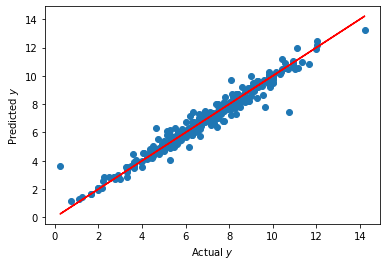

In [33]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

# Saving a model with Pickle

In [34]:
import pickle

model_save_path = "boostcat_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

# Restoring a model with Pickle

In [35]:
model_load_path = "boostcat_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

# Using the model files to make predictions

In [36]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

In [37]:

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 0.19358738304146494


In [83]:
unpickled_model.predict(test_nums_scaled)

array([10.78563253, 12.40008227,  9.99944811,  8.39349467,  8.17011805,
        4.5026685 ,  3.67484111,  7.6865539 ,  8.42715845,  9.60327136,
        5.10858645,  5.66042388,  8.93925767,  4.4189416 ,  4.51803191,
        6.22289988,  7.98901782,  4.5916676 , 11.18299982,  6.24562454,
        5.84764845,  4.96970159,  5.89123676,  7.81333441,  5.62422024,
        6.56998301,  7.64325986,  7.8707992 ,  7.42153676,  7.11672212,
        8.16166026,  5.40430042,  9.68454086,  7.72605347,  4.77724606,
        9.84368708, 10.94492832, 11.45969924,  6.32431324,  6.58392229,
        8.41821616,  8.06965551,  5.19461979,  6.46677245,  5.57669055,
        4.87463116,  4.9556482 ,  5.41169866,  6.27507556,  4.9836476 ,
        1.40513773,  6.49476755,  6.39642237, 13.60040324,  8.49021227,
        5.09045223, 11.36836606,  9.04511697,  8.03265829,  6.41454366,
        7.72871146, 11.24764861,  6.04686702,  9.15186903,  5.79146039,
        6.06143612,  6.91309157,  4.98298092,  5.92241644,  7.27